## 230968336
## SAMEER RAJ
## WEEK-10

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Flatten, MaxPooling2D, Conv2D, Conv2DTranspose, BatchNormalization, Reshape, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.preprocessing.image import save_img

import time
import os

from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

2025-08-29 16:38:54.886067: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-29 16:38:55.351037: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-29 16:38:57.391981: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [3]:
def build_generator(dim, depth, channels=1, inputdim=100, outputdim=512):
    inputshape=(dim,dim,depth)
    channel_index=-1
    model=Sequential([
        Dense(outputdim, input_shape=(inputdim,), activation='relu'),
        BatchNormalization(),
        Dense(dim*dim*depth, activation='relu'),
        BatchNormalization(),
        Reshape(inputshape),
        Conv2DTranspose(32,(5,5), strides=(2,2), padding='same', activation='relu'),
        BatchNormalization(axis=channel_index),
        Conv2DTranspose(channels,(5,5), strides=(2,2), padding='same', activation='tanh'),
        
    ])
    return model
    

In [4]:
def build_discriminator(width, height, depth, alpha=0.2):
    inputshape=(height, width, depth)
    channel_index=-1
    model=Sequential([
        Conv2D(32,(5,5) ,input_shape=inputshape,padding='same',strides=(2,2)),
        LeakyReLU(alpha),
        Conv2D(64,(5,5),padding='same',strides=(2,2)),
        LeakyReLU(alpha),
        Flatten(),
        Dense(512),
        LeakyReLU(alpha),
        Dense(1, activation='sigmoid')        
    ])
    return model

In [5]:
(xtrain,ytrain),(xtest,ytest)=fashion_mnist.load_data()

In [6]:
x=np.concatenate([xtrain,xtest])

In [7]:
x=np.expand_dims(x,axis=-1)

In [8]:
x=(x.astype(float)-255/2)/255*2

In [9]:
epochs=100
batch_size=512
rate=0.0002

In [10]:
gen=build_generator(7, 64, 1, 100,512)
disc=build_discriminator(28,28,1,0.2)

disc.trainable = True
disc.compile(optimizer=Adam(rate,beta_1=0.2), loss='binary_crossentropy')

/home/razerash/miniconda3/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1756485544.332099    1197 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5337 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9
/home/razerash/miniconda3/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
ganinput=Input(shape=(100,))
disc.trainable=False

ganInput=Input((100,))
ganOutput=disc(gen(ganInput))
gan=Model(ganInput, ganOutput)
gan.compile(optimizer=Adam(rate,beta_1=0.5), loss='binary_crossentropy')

In [12]:
noise_benchmark=np.random.uniform(-1,1, size=(256,100))

1 / 100


2025-08-29 16:39:11.756012: I external/local_xla/xla/service/service.cc:163] XLA service 0x765964015e50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-08-29 16:39:11.756051: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-08-29 16:39:11.816800: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-08-29 16:39:11.917066: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91200
2025-08-29 16:39:12.217743: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_60', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1756485554.116856  106935 device_compiler.h:196] Compiled cluster using XLA!  This line is l

Dloss:  0.708387


2025-08-29 16:39:21.613349: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1065', 80 bytes spill stores, 80 bytes spill loads

2025-08-29 16:39:21.613523: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1062', 776 bytes spill stores, 776 bytes spill loads

2025-08-29 16:39:21.677584: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_989', 1292 bytes spill stores, 1260 bytes spill loads

2025-08-29 16:39:22.085382: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1065', 1048 bytes spill stores, 1048 bytes spill loads



Gloss:  0.5978271
1 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


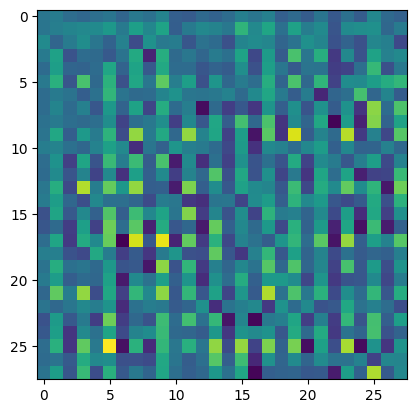

Dloss:  0.6553584
Gloss:  0.5567007
Dloss:  0.61144763
Gloss:  0.51654327
Dloss:  0.57490885
Gloss:  0.47698686
Dloss:  0.5445215
Gloss:  0.44118997
Dloss:  0.51939166
Gloss:  0.40874356
Dloss:  0.4988292
Gloss:  0.37961015
Dloss:  0.48197392
Gloss:  0.35382625
Dloss:  0.46796376
Gloss:  0.33079353
Dloss:  0.45613393
Gloss:  0.3103041
Dloss:  0.44603
Gloss:  0.29199088
Dloss:  0.43710148
Gloss:  0.27560586
Dloss:  0.42924482
Gloss:  0.2608362
Dloss:  0.42208055
Gloss:  0.2474975
Dloss:  0.41544056
Gloss:  0.23532286
Dloss:  0.40912604
Gloss:  0.22415902
Dloss:  0.4029577
Gloss:  0.21396652
Dloss:  0.39675772
Gloss:  0.20456782
Dloss:  0.39035627
Gloss:  0.19587713
Dloss:  0.3836139
Gloss:  0.18783537
Dloss:  0.37642476
Gloss:  0.18036565
Dloss:  0.36867976
Gloss:  0.17337652
Dloss:  0.36037928
Gloss:  0.16680656
Dloss:  0.35162103
Gloss:  0.16061369
Dloss:  0.34239817
Gloss:  0.15478024
Dloss:  0.33293277
Gloss:  0.14929643
Dloss:  0.32337534
Gloss:  0.14415094
Dloss:  0.31387803
Gloss

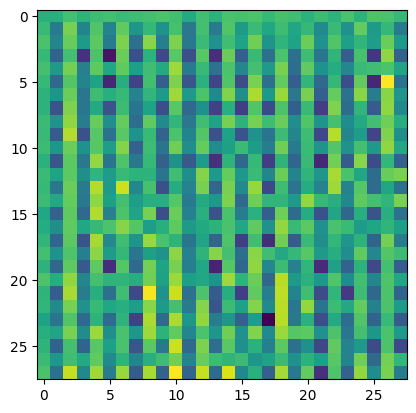

Dloss:  0.27850762
Gloss:  0.1226399
Dloss:  0.2705667
Gloss:  0.119063534
Dloss:  0.26300526
Gloss:  0.11568059
Dloss:  0.25579566
Gloss:  0.11248172
Dloss:  0.24893774
Gloss:  0.10945625
Dloss:  0.24242054
Gloss:  0.10658718
Dloss:  0.23621725
Gloss:  0.103860326
Dloss:  0.23031467
Gloss:  0.10126756
Dloss:  0.22468093
Gloss:  0.09880193
Dloss:  0.21930212
Gloss:  0.096451156
Dloss:  0.214174
Gloss:  0.09421107
Dloss:  0.2092656
Gloss:  0.09207032
Dloss:  0.20457171
Gloss:  0.090027094
Dloss:  0.20008054
Gloss:  0.08807304
Dloss:  0.19577993
Gloss:  0.08620167
Dloss:  0.19165598
Gloss:  0.08440943
Dloss:  0.18769962
Gloss:  0.08268899
Dloss:  0.1839033
Gloss:  0.0810382
Dloss:  0.18025596
Gloss:  0.07945143
Dloss:  0.17674853
Gloss:  0.077926256
Dloss:  0.1733742
Gloss:  0.07645749
Dloss:  0.17012298
Gloss:  0.075043835
Dloss:  0.16699313
Gloss:  0.07368218
Dloss:  0.16397642
Gloss:  0.07236836
Dloss:  0.16106597
Gloss:  0.07110056
Dloss:  0.1582549
Gloss:  0.06987744
Dloss:  0.15554

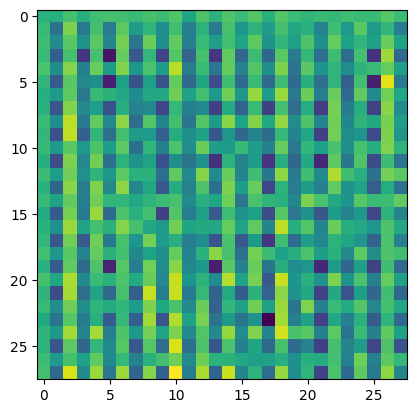

Dloss:  0.14554997
Gloss:  0.064342074
Dloss:  0.14324962
Gloss:  0.06333896
Dloss:  0.14101966
Gloss:  0.062367324
Dloss:  0.13885705
Gloss:  0.06142466
Dloss:  0.1367611
Gloss:  0.060510088
Dloss:  0.13472737
Gloss:  0.059622604
Dloss:  0.13275225
Gloss:  0.05876082
Dloss:  0.13083468
Gloss:  0.0579234
Dloss:  0.12897149
Gloss:  0.057110555
Dloss:  0.12716036
Gloss:  0.056319904
Dloss:  0.1253994
Gloss:  0.055550855
Dloss:  0.12368693
Gloss:  0.054802306
Dloss:  0.122019984
Gloss:  0.05407382
Dloss:  0.12039713
Gloss:  0.053364877
Dloss:  0.11881768
Gloss:  0.052674063
Dloss:  0.117278956
Gloss:  0.05200075
Dloss:  0.11577963
Gloss:  0.05134451
Dloss:  0.11431779
Gloss:  0.050704703
Dloss:  0.11289282
Gloss:  0.050080787
Dloss:  0.11150285
Gloss:  0.049472116
Dloss:  0.11014645
Gloss:  0.048878126
Dloss:  0.10882252
Gloss:  0.048298113
Dloss:  0.10753013
Gloss:  0.04773183
Dloss:  0.1062681
Gloss:  0.04717878
Dloss:  0.10503557
Gloss:  0.0466385
Dloss:  0.10383082
Gloss:  0.04611043


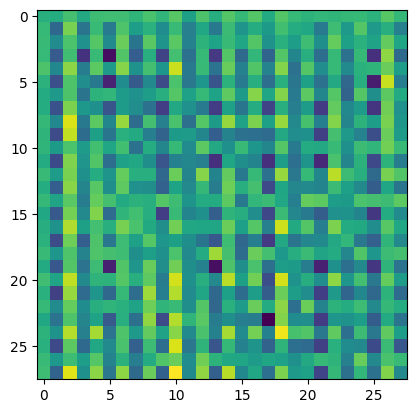

Dloss:  0.098199815
Gloss:  0.043639693
Dloss:  0.09714633
Gloss:  0.04317706
Dloss:  0.09611497
Gloss:  0.042724136
Dloss:  0.09510544
Gloss:  0.04228065
Dloss:  0.0941169
Gloss:  0.041846275
Dloss:  0.09314862
Gloss:  0.041420944
Dloss:  0.0922002
Gloss:  0.041003887
Dloss:  0.091270454
Gloss:  0.04059516
Dloss:  0.09036039
Gloss:  0.040194705
Dloss:  0.08946762
Gloss:  0.0398021
Dloss:  0.08859223
Gloss:  0.039417185
Dloss:  0.08773387
Gloss:  0.039039515
Dloss:  0.08689188
Gloss:  0.038669024
Dloss:  0.08606575
Gloss:  0.038305566
Dloss:  0.08525518
Gloss:  0.037949104
Dloss:  0.0844674
Gloss:  0.03759871
Dloss:  0.08368682
Gloss:  0.037254665
Dloss:  0.08292089
Gloss:  0.036916863
Dloss:  0.082168646
Gloss:  0.03658526
Dloss:  0.08142991
Gloss:  0.036259472
Dloss:  0.0807045
Gloss:  0.035939533
Dloss:  0.07999193
Gloss:  0.035625234
Dloss:  0.07929168
Gloss:  0.035316464
Dloss:  0.07860362
Gloss:  0.035012905
Dloss:  0.07792738
Gloss:  0.034714684
Dloss:  0.077262476
Gloss:  0.034

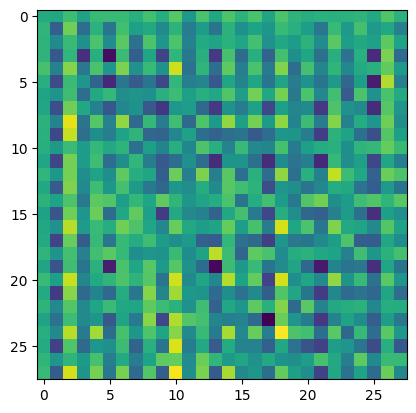

Dloss:  0.07411608
Gloss:  0.03302624
Dloss:  0.07351603
Gloss:  0.032760404
Dloss:  0.07292548
Gloss:  0.032498933
Dloss:  0.07234395
Gloss:  0.032241564
Dloss:  0.07177198
Gloss:  0.031988345
Dloss:  0.0712083
Gloss:  0.03173909
Dloss:  0.07065339
Gloss:  0.031493824
Dloss:  0.07010716
Gloss:  0.031252343
Dloss:  0.069569096
Gloss:  0.031014545
Dloss:  0.069039196
Gloss:  0.030780345
Dloss:  0.068518035
Gloss:  0.030549666
Dloss:  0.068004094
Gloss:  0.030322481
Dloss:  0.0674978
Gloss:  0.030098649
Dloss:  0.06699885
Gloss:  0.02987814
Dloss:  0.066507615
Gloss:  0.029660895
2 / 100
Dloss:  0.06602305
Gloss:  0.029446794
2 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


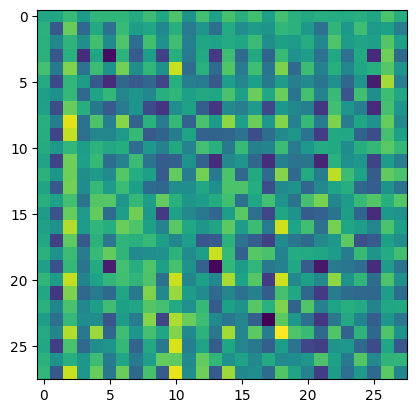

Dloss:  0.06554544
Gloss:  0.029235851
Dloss:  0.06507474
Gloss:  0.029027956
Dloss:  0.06461072
Gloss:  0.028823052
Dloss:  0.06415345
Gloss:  0.02862093
Dloss:  0.06370244
Gloss:  0.02842165
Dloss:  0.063257724
Gloss:  0.028225208
Dloss:  0.062820084
Gloss:  0.028031463
Dloss:  0.062387697
Gloss:  0.027840378
Dloss:  0.06196134
Gloss:  0.027651858
Dloss:  0.06154079
Gloss:  0.027465975
Dloss:  0.061125822
Gloss:  0.02728253
Dloss:  0.060722217
Gloss:  0.027101249
Dloss:  0.060319364
Gloss:  0.02692239
Dloss:  0.0599226
Gloss:  0.026745914
Dloss:  0.059529845
Gloss:  0.026571836
Dloss:  0.0591419
Gloss:  0.026400052
Dloss:  0.05875893
Gloss:  0.02623054
Dloss:  0.058380783
Gloss:  0.02606325
Dloss:  0.05800739
Gloss:  0.025898147
Dloss:  0.057638843
Gloss:  0.02573516
Dloss:  0.057275
Gloss:  0.025574172
Dloss:  0.05691549
Gloss:  0.02541527
Dloss:  0.056560617
Gloss:  0.02525838
Dloss:  0.056210034
Gloss:  0.025103416
Dloss:  0.055863827
Gloss:  0.024950368
Dloss:  0.055522088
Gloss:

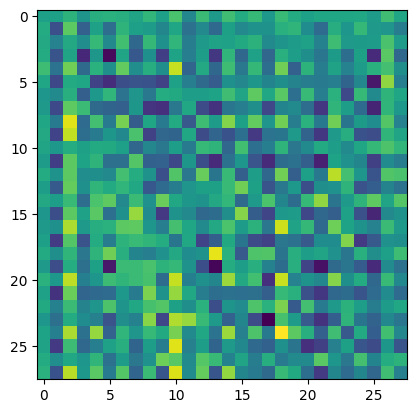

Dloss:  0.05387358
Gloss:  0.024070207
Dloss:  0.053555567
Gloss:  0.023929588
Dloss:  0.053241372
Gloss:  0.023790665
Dloss:  0.052930698
Gloss:  0.023653306
Dloss:  0.05262368
Gloss:  0.023517562
Dloss:  0.052320678
Gloss:  0.023383481
Dloss:  0.05202104
Gloss:  0.023250857
Dloss:  0.05172658
Gloss:  0.023119632
Dloss:  0.051434454
Gloss:  0.022989815
Dloss:  0.051144987
Gloss:  0.022861497
Dloss:  0.050859135
Gloss:  0.022734646
Dloss:  0.05057603
Gloss:  0.022609213
Dloss:  0.050295886
Gloss:  0.022485211
Dloss:  0.05001884
Gloss:  0.022362567
Dloss:  0.049744915
Gloss:  0.022241287
Dloss:  0.049473953
Gloss:  0.02212141
Dloss:  0.04920595
Gloss:  0.022002816
Dloss:  0.048941016
Gloss:  0.02188552
Dloss:  0.048678942
Gloss:  0.021769468
Dloss:  0.04841976
Gloss:  0.021654619
Dloss:  0.048163388
Gloss:  0.021541048
Dloss:  0.047909502
Gloss:  0.021428676
Dloss:  0.047658537
Gloss:  0.021317549
Dloss:  0.047411006
Gloss:  0.021207467
Dloss:  0.04716552
Gloss:  0.021098517
Dloss:  0.0

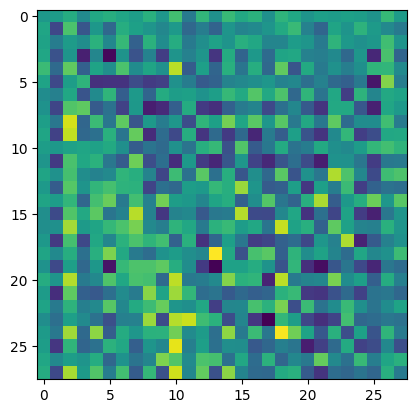

Dloss:  0.04574364
Gloss:  0.020468669
Dloss:  0.04551504
Gloss:  0.020367496
Dloss:  0.04528862
Gloss:  0.020267377
Dloss:  0.045064274
Gloss:  0.02016834
Dloss:  0.044842817
Gloss:  0.020070218
Dloss:  0.044623606
Gloss:  0.019973075
Dloss:  0.044406295
Gloss:  0.019876882
Dloss:  0.044191252
Gloss:  0.019781673
Dloss:  0.043978468
Gloss:  0.019687489
Dloss:  0.0437674
Gloss:  0.019594287
Dloss:  0.043558776
Gloss:  0.019501967
Dloss:  0.043352645
Gloss:  0.019410547
Dloss:  0.043147832
Gloss:  0.019320207
Dloss:  0.042945117
Gloss:  0.019230869
Dloss:  0.04274535
Gloss:  0.019142114
Dloss:  0.04254752
Gloss:  0.019054485
Dloss:  0.042352438
Gloss:  0.018967343
Dloss:  0.0421602
Gloss:  0.01888174
Dloss:  0.0419663
Gloss:  0.018797256
Dloss:  0.041774437
Gloss:  0.0187136
Dloss:  0.04158521
Gloss:  0.0186308
Dloss:  0.041397225
Gloss:  0.018548902
Dloss:  0.041211456
Gloss:  0.018467925
Dloss:  0.041028656
Gloss:  0.018388294
Dloss:  0.040847935
Gloss:  0.01830965
Dloss:  0.040668707

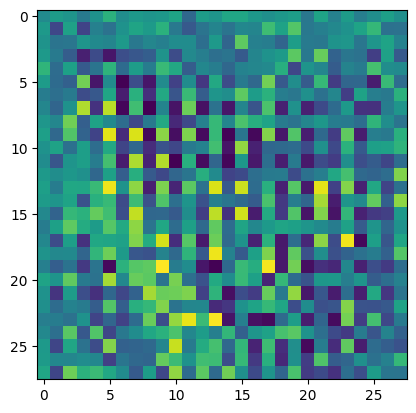

Dloss:  0.076490864
Gloss:  0.021856345
Dloss:  0.07816456
Gloss:  0.026684605
Dloss:  0.07945458
Gloss:  0.033157196
Dloss:  0.08049036
Gloss:  0.042222604
Dloss:  0.08142662
Gloss:  0.050082214
Dloss:  0.08201965
Gloss:  0.059451636
Dloss:  0.08237802
Gloss:  0.06670996
Dloss:  0.08268876
Gloss:  0.079368316
Dloss:  0.08356139
Gloss:  0.07955519
Dloss:  0.089466445
Gloss:  0.09196355
Dloss:  0.09000162
Gloss:  0.09861487
Dloss:  0.09043131
Gloss:  0.105856076
Dloss:  0.09080938
Gloss:  0.1104712
Dloss:  0.09126742
Gloss:  0.11576667
Dloss:  0.09191506
Gloss:  0.11644051
Dloss:  0.09366303
Gloss:  0.1270008
Dloss:  0.09765674
Gloss:  0.12667939
Dloss:  0.10230488
Gloss:  0.12793775
Dloss:  0.10321668
Gloss:  0.1310763
Dloss:  0.104130745
Gloss:  0.13291349
Dloss:  0.10491952
Gloss:  0.1345553
Dloss:  0.105699
Gloss:  0.13640636
Dloss:  0.10644964
Gloss:  0.13789952
Dloss:  0.10725489
Gloss:  0.13957757
Dloss:  0.10812821
Gloss:  0.14134847
Dloss:  0.109095715
Gloss:  0.14272901
Dloss:

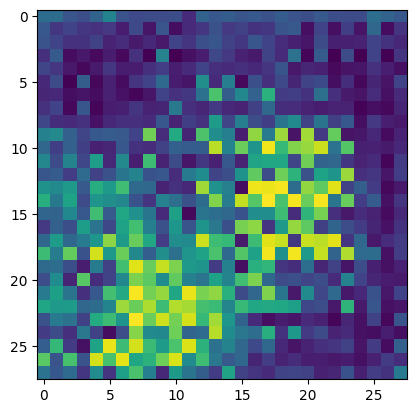

Dloss:  0.11597442
Gloss:  0.15961458
Dloss:  0.11855963
Gloss:  0.15937272
Dloss:  0.121845245
Gloss:  0.1639128
Dloss:  0.12302734
Gloss:  0.16771095
Dloss:  0.1243051
Gloss:  0.16979416
Dloss:  0.12554137
Gloss:  0.17367391
Dloss:  0.1267015
Gloss:  0.1766135
Dloss:  0.12791763
Gloss:  0.18036197
Dloss:  0.12909283
Gloss:  0.18407966
Dloss:  0.13027924
Gloss:  0.1879455
Dloss:  0.1315374
Gloss:  0.19117828
Dloss:  0.13278249
Gloss:  0.19629619
Dloss:  0.13404986
Gloss:  0.19821413
Dloss:  0.13545626
Gloss:  0.20608258
Dloss:  0.13722134
Gloss:  0.20642282
3 / 100
Dloss:  0.13921244
Gloss:  0.21423966
3 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


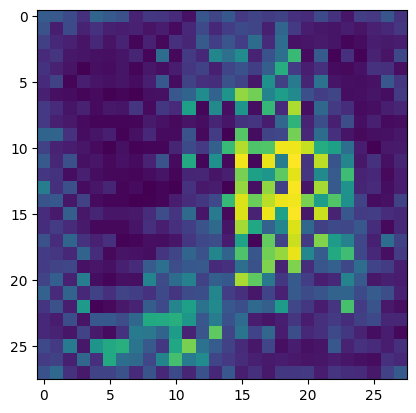

Dloss:  0.14104569
Gloss:  0.21551257
Dloss:  0.14259368
Gloss:  0.21972322
Dloss:  0.14385447
Gloss:  0.2221848
Dloss:  0.14512204
Gloss:  0.22531836
Dloss:  0.14641327
Gloss:  0.22741283
Dloss:  0.14774752
Gloss:  0.2307713
Dloss:  0.14909668
Gloss:  0.23223108
Dloss:  0.15050015
Gloss:  0.23635824
Dloss:  0.1518145
Gloss:  0.23772815
Dloss:  0.15313321
Gloss:  0.24228932
Dloss:  0.15440471
Gloss:  0.2437019
Dloss:  0.15568437
Gloss:  0.2478994
Dloss:  0.15685327
Gloss:  0.24957144
Dloss:  0.15812387
Gloss:  0.25298098
Dloss:  0.15927103
Gloss:  0.25448918
Dloss:  0.16046502
Gloss:  0.25834474
Dloss:  0.16165394
Gloss:  0.25940785
Dloss:  0.16300541
Gloss:  0.2640397
Dloss:  0.1642347
Gloss:  0.2647248
Dloss:  0.16564184
Gloss:  0.27032322
Dloss:  0.16724524
Gloss:  0.27104837
Dloss:  0.16858615
Gloss:  0.27505884
Dloss:  0.16970122
Gloss:  0.2765715
Dloss:  0.17079301
Gloss:  0.2793136
Dloss:  0.17182295
Gloss:  0.28119084
Dloss:  0.17278345
Gloss:  0.28402624
Dloss:  0.17370449
Glo

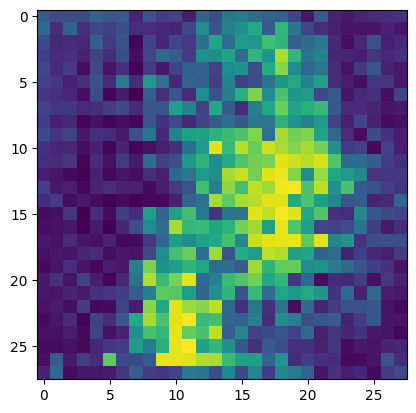

Dloss:  0.17758617
Gloss:  0.29552835
Dloss:  0.17862172
Gloss:  0.29860476
Dloss:  0.17960641
Gloss:  0.3001678
Dloss:  0.18058796
Gloss:  0.3030533
Dloss:  0.18156111
Gloss:  0.30451933
Dloss:  0.18250296
Gloss:  0.3079305
Dloss:  0.18353075
Gloss:  0.3089258
Dloss:  0.18456182
Gloss:  0.31309152
Dloss:  0.18564852
Gloss:  0.31379333
Dloss:  0.18687116
Gloss:  0.31812212
Dloss:  0.18811426
Gloss:  0.31857616
Dloss:  0.1893666
Gloss:  0.32277662
Dloss:  0.19045275
Gloss:  0.32354513
Dloss:  0.191545
Gloss:  0.3270522
Dloss:  0.19256254
Gloss:  0.328209
Dloss:  0.19350918
Gloss:  0.3310861
Dloss:  0.19449593
Gloss:  0.33240414
Dloss:  0.19544537
Gloss:  0.33473915
Dloss:  0.19640495
Gloss:  0.33605605
Dloss:  0.19734892
Gloss:  0.33870885
Dloss:  0.19831616
Gloss:  0.3398237
Dloss:  0.1993411
Gloss:  0.342895
Dloss:  0.20030735
Gloss:  0.34367797
Dloss:  0.20135719
Gloss:  0.3474103
Dloss:  0.20250458
Gloss:  0.34788185
Dloss:  0.20366521
Gloss:  0.35158062
Dloss:  0.20479967
Gloss:  0

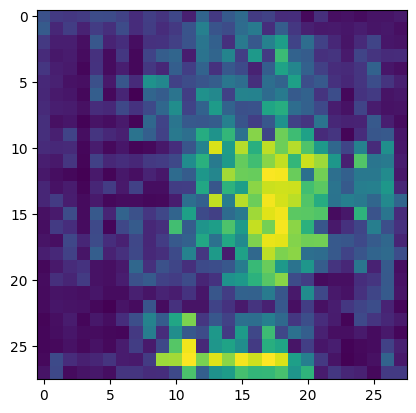

Dloss:  0.20901068
Gloss:  0.35948706
Dloss:  0.20995158
Gloss:  0.36221656
Dloss:  0.21095604
Gloss:  0.36309537
Dloss:  0.21202712
Gloss:  0.36583835
Dloss:  0.21308643
Gloss:  0.3665995
Dloss:  0.2141268
Gloss:  0.36951855
Dloss:  0.21514425
Gloss:  0.3700027
Dloss:  0.21629627
Gloss:  0.37322253
Dloss:  0.21738645
Gloss:  0.37374058
Dloss:  0.21848702
Gloss:  0.37637874
Dloss:  0.21954115
Gloss:  0.3769412
Dloss:  0.22059374
Gloss:  0.37960228
Dloss:  0.22160023
Gloss:  0.38016722
Dloss:  0.22267297
Gloss:  0.38267344
Dloss:  0.2236698
Gloss:  0.3835155
Dloss:  0.22460486
Gloss:  0.38557395
Dloss:  0.22554988
Gloss:  0.38652238
Dloss:  0.22648877
Gloss:  0.38858542
Dloss:  0.22740582
Gloss:  0.3894556
Dloss:  0.22833186
Gloss:  0.3918414
Dloss:  0.22931913
Gloss:  0.39227298
Dloss:  0.23032679
Gloss:  0.39549932
Dloss:  0.23150033
Gloss:  0.39545685
Dloss:  0.23278242
Gloss:  0.39855778
Dloss:  0.23387265
Gloss:  0.39906704
Dloss:  0.23484184
Gloss:  0.40105507
Dloss:  0.2357155
Gl

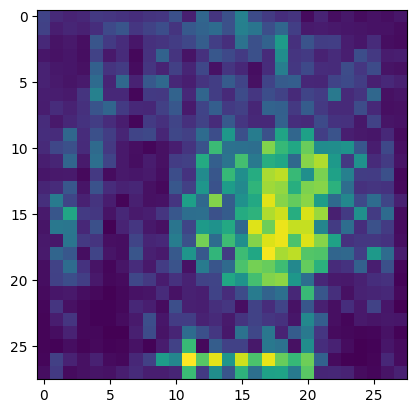

Dloss:  0.23911753
Gloss:  0.4075834
Dloss:  0.23991065
Gloss:  0.40928626
Dloss:  0.24075417
Gloss:  0.41005278
Dloss:  0.24156936
Gloss:  0.41219106
Dloss:  0.24242899
Gloss:  0.4127961
Dloss:  0.24327493
Gloss:  0.4151612
Dloss:  0.24417162
Gloss:  0.4154264
Dloss:  0.24514702
Gloss:  0.4182572
Dloss:  0.24614516
Gloss:  0.41842705
Dloss:  0.24719004
Gloss:  0.42091465
Dloss:  0.24809568
Gloss:  0.42132798
Dloss:  0.24895267
Gloss:  0.42337126
Dloss:  0.24978702
Gloss:  0.42396677
Dloss:  0.25059637
Gloss:  0.42603493
Dloss:  0.25145835
Gloss:  0.4264119
Dloss:  0.2523107
Gloss:  0.42875147
Dloss:  0.253198
Gloss:  0.42901117
Dloss:  0.2540836
Gloss:  0.4314349
Dloss:  0.254986
Gloss:  0.43179393
Dloss:  0.2558736
Gloss:  0.4338061
Dloss:  0.25672558
Gloss:  0.43432593
Dloss:  0.25752
Gloss:  0.43618804
Dloss:  0.25830755
Gloss:  0.43672195
Dloss:  0.25908858
Gloss:  0.4388065
Dloss:  0.25986618
Gloss:  0.439294
Dloss:  0.26067066
Gloss:  0.44118503
Dloss:  0.26142988
Gloss:  0.4415

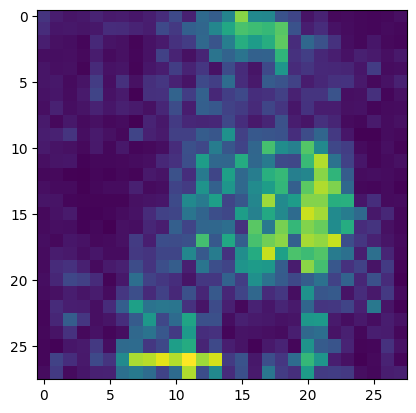

Dloss:  0.26486433
Gloss:  0.44691196
Dloss:  0.2656938
Gloss:  0.44897395
Dloss:  0.26650846
Gloss:  0.4495373
Dloss:  0.2672504
Gloss:  0.4512339
Dloss:  0.26797357
Gloss:  0.45186234
Dloss:  0.26869038
Gloss:  0.45348153
Dloss:  0.26935628
Gloss:  0.45427904
Dloss:  0.27004734
Gloss:  0.45577914
Dloss:  0.2707473
Gloss:  0.4564777
Dloss:  0.27143425
Gloss:  0.4582539
Dloss:  0.27214772
Gloss:  0.4588406
Dloss:  0.27281258
Gloss:  0.46091294
Dloss:  0.27355412
Gloss:  0.46129125
Dloss:  0.27428344
Gloss:  0.46357962
Dloss:  0.27508968
Gloss:  0.46373814
4 / 100
Dloss:  0.27589875
Gloss:  0.46613458
4 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


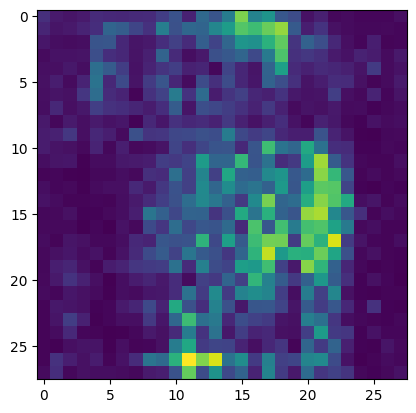

Dloss:  0.27667668
Gloss:  0.4663624
Dloss:  0.27745667
Gloss:  0.46846056
Dloss:  0.27817774
Gloss:  0.4689332
Dloss:  0.27890703
Gloss:  0.47070816
Dloss:  0.2796251
Gloss:  0.47107714
Dloss:  0.28032222
Gloss:  0.4728771
Dloss:  0.2810107
Gloss:  0.4733098
Dloss:  0.28170368
Gloss:  0.4749979
Dloss:  0.28238964
Gloss:  0.47544622
Dloss:  0.28306672
Gloss:  0.47710735
Dloss:  0.28374252
Gloss:  0.47759855
Dloss:  0.28442082
Gloss:  0.47943327
Dloss:  0.28506607
Gloss:  0.4799492
Dloss:  0.28574646
Gloss:  0.48141584
Dloss:  0.28637245
Gloss:  0.48199838
Dloss:  0.28702283
Gloss:  0.48352626
Dloss:  0.28764877
Gloss:  0.48394346
Dloss:  0.28829825
Gloss:  0.4857366
Dloss:  0.28894317
Gloss:  0.48594597
Dloss:  0.2896569
Gloss:  0.48818374
Dloss:  0.2904495
Gloss:  0.48815522
Dloss:  0.29124993
Gloss:  0.49047136
Dloss:  0.2920485
Gloss:  0.4905866
Dloss:  0.292812
Gloss:  0.49242756
Dloss:  0.29350585
Gloss:  0.49268505
Dloss:  0.2941876
Gloss:  0.49428138
Dloss:  0.29482344
Gloss:  0

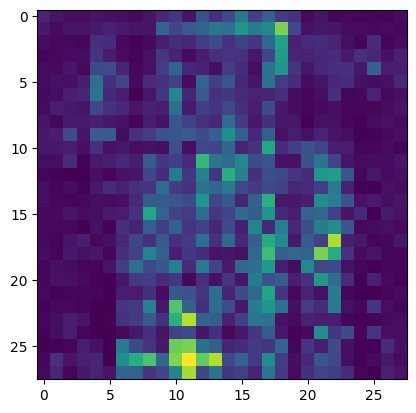

Dloss:  0.29716006
Gloss:  0.4990079
Dloss:  0.29775897
Gloss:  0.5003293
Dloss:  0.29834017
Gloss:  0.5010075
Dloss:  0.2989585
Gloss:  0.502219
Dloss:  0.29953107
Gloss:  0.502861
Dloss:  0.3000889
Gloss:  0.50426114
Dloss:  0.3006816
Gloss:  0.5046627
Dloss:  0.30128774
Gloss:  0.50642824
Dloss:  0.30193996
Gloss:  0.5065788
Dloss:  0.30263224
Gloss:  0.5088952
Dloss:  0.3033942
Gloss:  0.50872904
Dloss:  0.30419603
Gloss:  0.51092833
Dloss:  0.3049299
Gloss:  0.51105314
Dloss:  0.3056365
Gloss:  0.51271284
Dloss:  0.3062535
Gloss:  0.5131751
Dloss:  0.30685195
Gloss:  0.5144945
Dloss:  0.30741388
Gloss:  0.515047
Dloss:  0.30796704
Gloss:  0.516245
Dloss:  0.30853567
Gloss:  0.5168057
Dloss:  0.309102
Gloss:  0.51809084
Dloss:  0.30965665
Gloss:  0.518531
Dloss:  0.31022665
Gloss:  0.5199815
Dloss:  0.3107891
Gloss:  0.520356
Dloss:  0.31138256
Gloss:  0.52193654
Dloss:  0.31198326
Gloss:  0.52218527
Dloss:  0.3125694
Gloss:  0.5237161
Dloss:  0.31315097
Gloss:  0.524015
Dloss:  0.

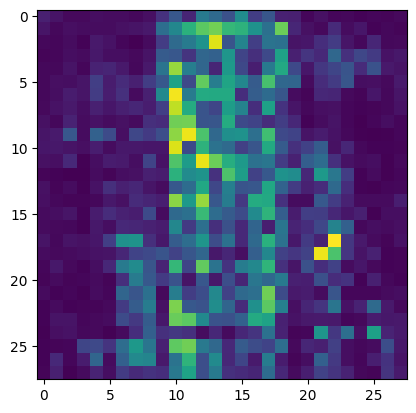

Dloss:  0.31558123
Gloss:  0.52747643
Dloss:  0.31619766
Gloss:  0.5292388
Dloss:  0.31682053
Gloss:  0.52940506
Dloss:  0.3174744
Gloss:  0.5309117
Dloss:  0.31808648
Gloss:  0.5311525
Dloss:  0.31864744
Gloss:  0.5325187
Dloss:  0.3191804
Gloss:  0.5329848
Dloss:  0.31973737
Gloss:  0.5341903
Dloss:  0.32027584
Gloss:  0.53464276
Dloss:  0.3208251
Gloss:  0.53591454
Dloss:  0.32135993
Gloss:  0.53620034
Dloss:  0.32189548
Gloss:  0.5375219
Dloss:  0.32245362
Gloss:  0.5379072
Dloss:  0.32300535
Gloss:  0.5392423
Dloss:  0.32353413
Gloss:  0.53952754
Dloss:  0.3240916
Gloss:  0.5409417
Dloss:  0.32465076
Gloss:  0.54111624
Dloss:  0.32521924
Gloss:  0.5427172
Dloss:  0.32579675
Gloss:  0.5428524
Dloss:  0.32638168
Gloss:  0.5443534
Dloss:  0.32695958
Gloss:  0.544417
Dloss:  0.32754058
Gloss:  0.5460281
Dloss:  0.32813296
Gloss:  0.54614764
Dloss:  0.3287041
Gloss:  0.5474914
Dloss:  0.32923114
Gloss:  0.5478445
Dloss:  0.3297394
Gloss:  0.5489927
Dloss:  0.33023384
Gloss:  0.54942966

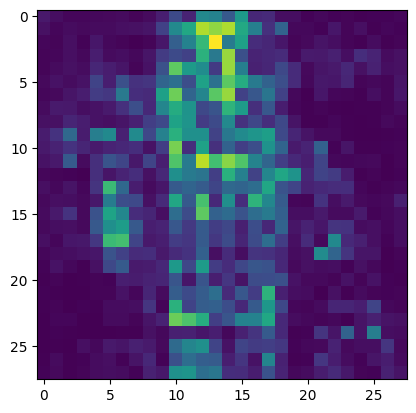

Dloss:  0.33223543
Gloss:  0.5524897
Dloss:  0.33275017
Gloss:  0.55367994
Dloss:  0.333259
Gloss:  0.55384105
Dloss:  0.3337852
Gloss:  0.5551527
Dloss:  0.33430114
Gloss:  0.55533123
Dloss:  0.3348237
Gloss:  0.5567193
Dloss:  0.3353732
Gloss:  0.5568123
Dloss:  0.33592716
Gloss:  0.55828106
Dloss:  0.3365112
Gloss:  0.5582453
Dloss:  0.3371351
Gloss:  0.55969965
Dloss:  0.33767673
Gloss:  0.55981225
Dloss:  0.33822632
Gloss:  0.56094253
Dloss:  0.3387304
Gloss:  0.5611934
Dloss:  0.3392228
Gloss:  0.56231254
Dloss:  0.33973494
Gloss:  0.56256217
Dloss:  0.34021142
Gloss:  0.5635826
Dloss:  0.3406799
Gloss:  0.56391484
Dloss:  0.34117308
Gloss:  0.5649802
Dloss:  0.34165752
Gloss:  0.56527084
Dloss:  0.3421547
Gloss:  0.56632
Dloss:  0.34267318
Gloss:  0.56649566
Dloss:  0.34315956
Gloss:  0.5677062
Dloss:  0.3436744
Gloss:  0.56779736
Dloss:  0.344172
Gloss:  0.56891495
Dloss:  0.34466726
Gloss:  0.5690891
Dloss:  0.34517992
Gloss:  0.57015365
Dloss:  0.3456746
Gloss:  0.5703406
Dlo

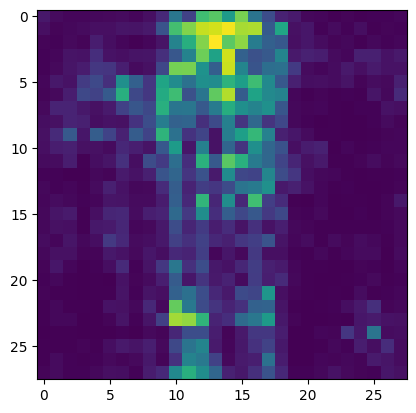

Dloss:  0.3477314
Gloss:  0.57303
Dloss:  0.34826243
Gloss:  0.5742028
Dloss:  0.34877154
Gloss:  0.57433283
Dloss:  0.34925187
Gloss:  0.5753471
Dloss:  0.34974355
Gloss:  0.57552654
Dloss:  0.3502164
Gloss:  0.57646024
Dloss:  0.35066533
Gloss:  0.5767848
Dloss:  0.35111573
Gloss:  0.57759476
Dloss:  0.35156462
Gloss:  0.57796496
Dloss:  0.3520257
Gloss:  0.578831
Dloss:  0.3524522
Gloss:  0.5790921
Dloss:  0.35289326
Gloss:  0.5801325
Dloss:  0.35335132
Gloss:  0.5802242
Dloss:  0.35383695
Gloss:  0.5813829
Dloss:  0.354335
Gloss:  0.5813812
5 / 100
Dloss:  0.35483354
Gloss:  0.5825989
5 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


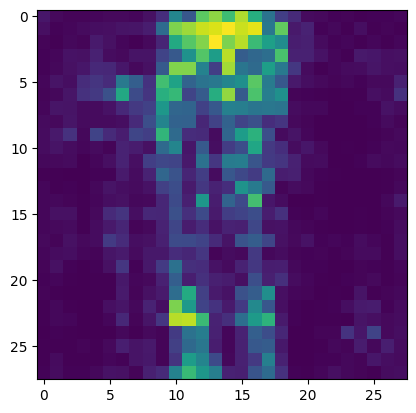

Dloss:  0.3553144
Gloss:  0.58265734
Dloss:  0.35578966
Gloss:  0.58362067
Dloss:  0.35624185
Gloss:  0.58382535
Dloss:  0.35669085
Gloss:  0.5848219
Dloss:  0.35714662
Gloss:  0.5849253
Dloss:  0.35761753
Gloss:  0.5860757
Dloss:  0.35809913
Gloss:  0.5860985
Dloss:  0.35860416
Gloss:  0.58722526
Dloss:  0.35908782
Gloss:  0.58723134
Dloss:  0.3595752
Gloss:  0.58845705
Dloss:  0.36003867
Gloss:  0.5884556
Dloss:  0.3605615
Gloss:  0.5897179
Dloss:  0.36103585
Gloss:  0.58978736
Dloss:  0.36149716
Gloss:  0.5906131
Dloss:  0.36192143
Gloss:  0.590911
Dloss:  0.36234394
Gloss:  0.59158784
Dloss:  0.36275104
Gloss:  0.5920156
Dloss:  0.3631533
Gloss:  0.59265435
Dloss:  0.36354178
Gloss:  0.59310544
Dloss:  0.363927
Gloss:  0.59372497
Dloss:  0.36434007
Gloss:  0.59410954
Dloss:  0.36474356
Gloss:  0.5948032
Dloss:  0.3651415
Gloss:  0.5952129
Dloss:  0.36553654
Gloss:  0.59577954
Dloss:  0.3659348
Gloss:  0.59623384
Dloss:  0.36632457
Gloss:  0.59708154
Dloss:  0.3667268
Gloss:  0.5972

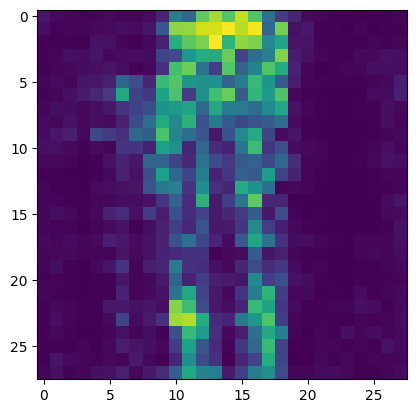

Dloss:  0.36857092
Gloss:  0.5997255
Dloss:  0.3691005
Gloss:  0.6009897
Dloss:  0.36957982
Gloss:  0.60099465
Dloss:  0.3700476
Gloss:  0.60198903
Dloss:  0.37047097
Gloss:  0.60213286
Dloss:  0.37088215
Gloss:  0.60296583
Dloss:  0.37129834
Gloss:  0.603142
Dloss:  0.37169388
Gloss:  0.60391474
Dloss:  0.3720741
Gloss:  0.60422575
Dloss:  0.37244648
Gloss:  0.60493207
Dloss:  0.37282068
Gloss:  0.60520303
Dloss:  0.3732016
Gloss:  0.6058818
Dloss:  0.37357578
Gloss:  0.6061033
Dloss:  0.37397143
Gloss:  0.6069383
Dloss:  0.37436703
Gloss:  0.6069533
Dloss:  0.37478098
Gloss:  0.6080084
Dloss:  0.37519026
Gloss:  0.6079738
Dloss:  0.3756241
Gloss:  0.60900456
Dloss:  0.37606004
Gloss:  0.6089505
Dloss:  0.37649736
Gloss:  0.6100205
Dloss:  0.3769382
Gloss:  0.6099644
Dloss:  0.3773739
Gloss:  0.61098915
Dloss:  0.37779313
Gloss:  0.6110955
Dloss:  0.3782029
Gloss:  0.61190474
Dloss:  0.37859252
Gloss:  0.61211264
Dloss:  0.37896377
Gloss:  0.612822
Dloss:  0.37934077
Gloss:  0.6130752

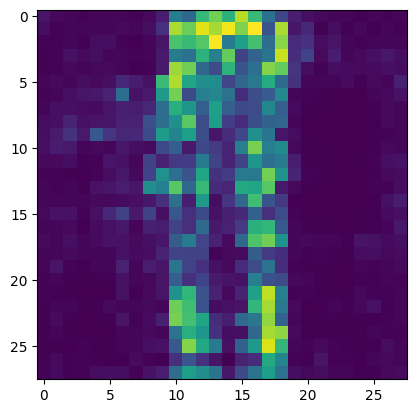

Dloss:  0.3808033
Gloss:  0.6147909
Dloss:  0.38116875
Gloss:  0.6155422
Dloss:  0.38155773
Gloss:  0.6157373
Dloss:  0.38194346
Gloss:  0.6164311
Dloss:  0.3823177
Gloss:  0.61648905
Dloss:  0.3826936
Gloss:  0.61749345
Dloss:  0.38308772
Gloss:  0.6174584
Dloss:  0.38349843
Gloss:  0.6184246
Dloss:  0.383911
Gloss:  0.6183785
Dloss:  0.38432994
Gloss:  0.61931825
Dloss:  0.38472825
Gloss:  0.6192758
Dloss:  0.38514307
Gloss:  0.62030786
Dloss:  0.38556114
Gloss:  0.62028456
Dloss:  0.38595706
Gloss:  0.62108064
Dloss:  0.3863361
Gloss:  0.6211729
Dloss:  0.38671416
Gloss:  0.62192273
Dloss:  0.3870851
Gloss:  0.6221015
Dloss:  0.38743237
Gloss:  0.6226927
Dloss:  0.3877852
Gloss:  0.6229861
Dloss:  0.3881307
Gloss:  0.6235422
Dloss:  0.38848254
Gloss:  0.6237095
Dloss:  0.3888382
Gloss:  0.62444043
Dloss:  0.38921395
Gloss:  0.624514
Dloss:  0.38959193
Gloss:  0.6252887
Dloss:  0.38996398
Gloss:  0.6252861
Dloss:  0.3903324
Gloss:  0.62613726
Dloss:  0.3907037
Gloss:  0.6261507
Dloss

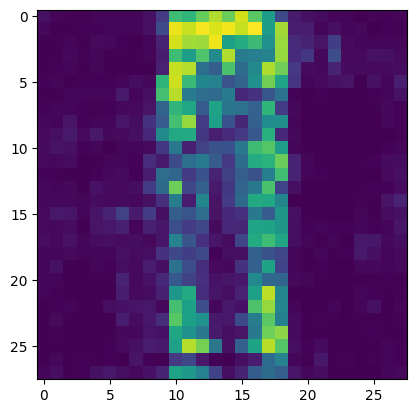

Dloss:  0.39219415
Gloss:  0.6278802
Dloss:  0.39258856
Gloss:  0.6287094
Dloss:  0.39296746
Gloss:  0.6287107
Dloss:  0.3933347
Gloss:  0.629528
Dloss:  0.39369258
Gloss:  0.62963855
Dloss:  0.39405918
Gloss:  0.63035583
Dloss:  0.39441884
Gloss:  0.63041145
Dloss:  0.39475566
Gloss:  0.6310959
Dloss:  0.39510828
Gloss:  0.631226
Dloss:  0.3954691
Gloss:  0.63189113
Dloss:  0.3958023
Gloss:  0.6319804
Dloss:  0.39613956
Gloss:  0.6325876
Dloss:  0.39647627
Gloss:  0.63275826
Dloss:  0.3968219
Gloss:  0.6333426
Dloss:  0.3971716
Gloss:  0.63340414
Dloss:  0.39752048
Gloss:  0.63418174
Dloss:  0.3978622
Gloss:  0.6341725
Dloss:  0.3982333
Gloss:  0.6350643
Dloss:  0.39861017
Gloss:  0.6349489
Dloss:  0.39900774
Gloss:  0.6357666
Dloss:  0.39940548
Gloss:  0.6356859
Dloss:  0.39979059
Gloss:  0.6364678
Dloss:  0.40015516
Gloss:  0.6364869
Dloss:  0.40049663
Gloss:  0.63710666
Dloss:  0.4008332
Gloss:  0.6372078
Dloss:  0.40116295
Gloss:  0.63775164
Dloss:  0.4014809
Gloss:  0.63790923
Dl

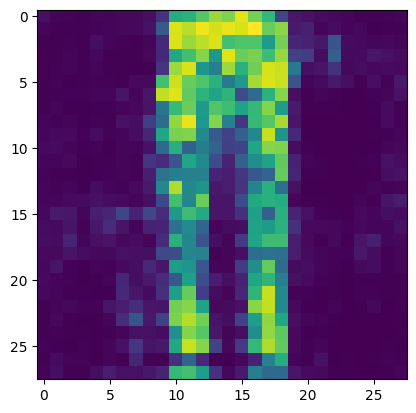

Dloss:  0.402754
Gloss:  0.63935226
Dloss:  0.40306932
Gloss:  0.63984936
Dloss:  0.40338477
Gloss:  0.64002204
Dloss:  0.40370095
Gloss:  0.64053625
Dloss:  0.40401956
Gloss:  0.6406354
Dloss:  0.4043413
Gloss:  0.6412498
Dloss:  0.4046471
Gloss:  0.6412808
Dloss:  0.4049643
Gloss:  0.64193624
Dloss:  0.40529314
Gloss:  0.6419965
Dloss:  0.4056351
Gloss:  0.642777
Dloss:  0.40597034
Gloss:  0.642667
Dloss:  0.40633488
Gloss:  0.64361924
Dloss:  0.40669686
Gloss:  0.6434995
Dloss:  0.4070587
Gloss:  0.6442386
Dloss:  0.4074093
Gloss:  0.6442388
6 / 100
Dloss:  0.40773258
Gloss:  0.64487964
6 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


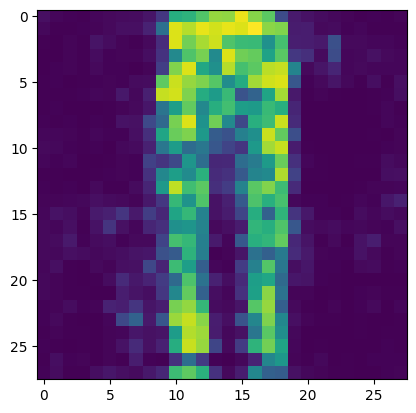

Dloss:  0.40803152
Gloss:  0.6450296
Dloss:  0.40833834
Gloss:  0.6454858
Dloss:  0.4086373
Gloss:  0.6457258
Dloss:  0.40892923
Gloss:  0.64618397
Dloss:  0.40922534
Gloss:  0.6463848
Dloss:  0.4095236
Gloss:  0.646864
Dloss:  0.40981436
Gloss:  0.64695054
Dloss:  0.41012138
Gloss:  0.64757013
Dloss:  0.41043255
Gloss:  0.64754385
Dloss:  0.4107658
Gloss:  0.64829427
Dloss:  0.4110962
Gloss:  0.64819235
Dloss:  0.41142926
Gloss:  0.6490746
Dloss:  0.41175318
Gloss:  0.64906245
Dloss:  0.4120823
Gloss:  0.6496209
Dloss:  0.41238487
Gloss:  0.64973223
Dloss:  0.4126882
Gloss:  0.6501884
Dloss:  0.41297323
Gloss:  0.65036196
Dloss:  0.41326085
Gloss:  0.65087575
Dloss:  0.41354126
Gloss:  0.6509181
Dloss:  0.41383073
Gloss:  0.6516129
Dloss:  0.4141454
Gloss:  0.6515258
Dloss:  0.41446406
Gloss:  0.65229315
Dloss:  0.41480002
Gloss:  0.6522118
Dloss:  0.41512886
Gloss:  0.65289074
Dloss:  0.41545218
Gloss:  0.6528226
Dloss:  0.41576836
Gloss:  0.65363836
Dloss:  0.41609836
Gloss:  0.6536

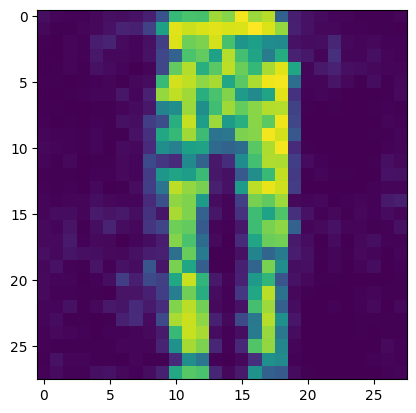

Dloss:  0.4172553
Gloss:  0.6549078
Dloss:  0.4175312
Gloss:  0.6553098
Dloss:  0.41780937
Gloss:  0.65556306
Dloss:  0.41809994
Gloss:  0.6558423
Dloss:  0.4183656
Gloss:  0.6561375
Dloss:  0.41863567
Gloss:  0.6563897
Dloss:  0.4189146
Gloss:  0.6566835
Dloss:  0.41919416
Gloss:  0.65696645
Dloss:  0.41946432
Gloss:  0.657301
Dloss:  0.41972542
Gloss:  0.65749174
Dloss:  0.41999853
Gloss:  0.65779394
Dloss:  0.42027378
Gloss:  0.6579636
Dloss:  0.4205389
Gloss:  0.6583441
Dloss:  0.4207973
Gloss:  0.6584501
Dloss:  0.4210495
Gloss:  0.6588551
Dloss:  0.42131543
Gloss:  0.6589301
Dloss:  0.4215954
Gloss:  0.65956366
Dloss:  0.42188412
Gloss:  0.65944076
Dloss:  0.4222065
Gloss:  0.6603417
Dloss:  0.42254844
Gloss:  0.660066
Dloss:  0.42292222
Gloss:  0.6610597
Dloss:  0.4233069
Gloss:  0.6607987
Dloss:  0.42367047
Gloss:  0.6615492
Dloss:  0.42398885
Gloss:  0.6615433
Dloss:  0.42426434
Gloss:  0.6620214
Dloss:  0.42453128
Gloss:  0.6621997
Dloss:  0.4247945
Gloss:  0.6625761
Dloss:  

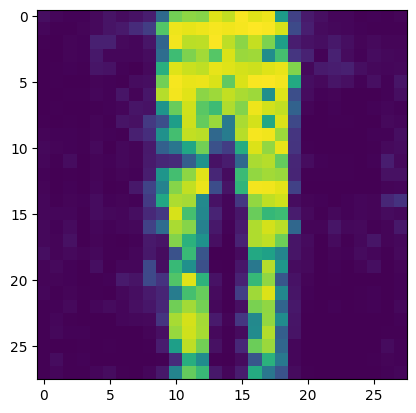

Dloss:  0.42579883
Gloss:  0.663553
Dloss:  0.42604622
Gloss:  0.663788
Dloss:  0.42629325
Gloss:  0.66414213
Dloss:  0.42654046
Gloss:  0.66425145
Dloss:  0.42680058
Gloss:  0.6646414
Dloss:  0.42705098
Gloss:  0.6647555
Dloss:  0.42729226
Gloss:  0.6652134
Dloss:  0.42755377
Gloss:  0.66522944
Dloss:  0.4278286
Gloss:  0.66583526
Dloss:  0.42811033
Gloss:  0.6656973
Dloss:  0.42841238
Gloss:  0.66654474
Dloss:  0.42874572
Gloss:  0.66626596
Dloss:  0.42909935
Gloss:  0.667206
Dloss:  0.42945328
Gloss:  0.66702276
Dloss:  0.4297753
Gloss:  0.6676275
Dloss:  0.430044
Gloss:  0.6676603
Dloss:  0.43029973
Gloss:  0.6680521
Dloss:  0.4305513
Gloss:  0.6681694
Dloss:  0.43079767
Gloss:  0.6685236
Dloss:  0.43103656
Gloss:  0.66868937
Dloss:  0.43129447
Gloss:  0.66899204
Dloss:  0.43154654
Gloss:  0.6691419
Dloss:  0.43179187
Gloss:  0.669465
Dloss:  0.43203852
Gloss:  0.6696107
Dloss:  0.43226844
Gloss:  0.6699715
Dloss:  0.43251103
Gloss:  0.66997725
Dloss:  0.43275487
Gloss:  0.6705154


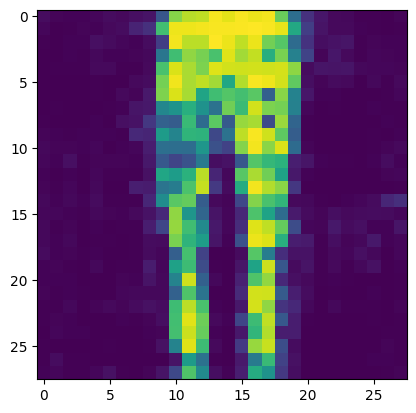

Dloss:  0.43385327
Gloss:  0.67170167
Dloss:  0.4341546
Gloss:  0.6715555
Dloss:  0.43444243
Gloss:  0.67218107
Dloss:  0.4347228
Gloss:  0.6721186
Dloss:  0.4349957
Gloss:  0.672679
Dloss:  0.4352539
Gloss:  0.67264813
Dloss:  0.43552837
Gloss:  0.6731599
Dloss:  0.43577972
Gloss:  0.6731533
Dloss:  0.4360305
Gloss:  0.6735329
Dloss:  0.43627363
Gloss:  0.6735942
Dloss:  0.43650225
Gloss:  0.6740019
Dloss:  0.43675593
Gloss:  0.6740486
Dloss:  0.43699688
Gloss:  0.67444545
Dloss:  0.43723238
Gloss:  0.6744342
Dloss:  0.4374823
Gloss:  0.67489886
Dloss:  0.43773407
Gloss:  0.6749032
Dloss:  0.4379875
Gloss:  0.67535377
Dloss:  0.4382306
Gloss:  0.6753785
Dloss:  0.43846694
Gloss:  0.6758044
Dloss:  0.43870753
Gloss:  0.6758221
Dloss:  0.43895212
Gloss:  0.67621833
Dloss:  0.43918693
Gloss:  0.67621255
Dloss:  0.43943396
Gloss:  0.67669994
Dloss:  0.43967333
Gloss:  0.67662627
Dloss:  0.43993738
Gloss:  0.677202
Dloss:  0.44019777
Gloss:  0.67705876
Dloss:  0.4404648
Gloss:  0.67761075


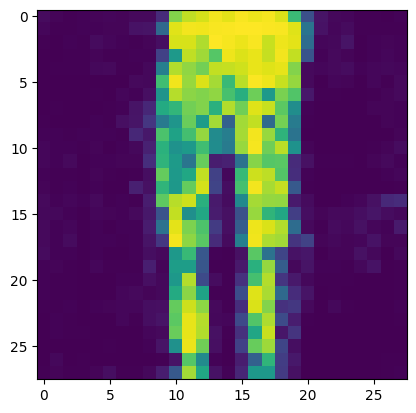

Dloss:  0.4414814
Gloss:  0.6783993
Dloss:  0.44171143
Gloss:  0.67850107
Dloss:  0.44194523
Gloss:  0.6788095
Dloss:  0.44216967
Gloss:  0.67889625
Dloss:  0.44240168
Gloss:  0.6791804
Dloss:  0.4426357
Gloss:  0.6792302
Dloss:  0.4428587
Gloss:  0.6796243
Dloss:  0.4430928
Gloss:  0.6795264
Dloss:  0.4433557
Gloss:  0.68011147
Dloss:  0.44362518
Gloss:  0.6800257
Dloss:  0.44390222
Gloss:  0.6805918
Dloss:  0.44415548
Gloss:  0.6804969
Dloss:  0.4444003
Gloss:  0.6810186
Dloss:  0.44465268
Gloss:  0.68094033
Dloss:  0.44489694
Gloss:  0.68136406
7 / 100
Dloss:  0.44514686
Gloss:  0.6813508
7 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


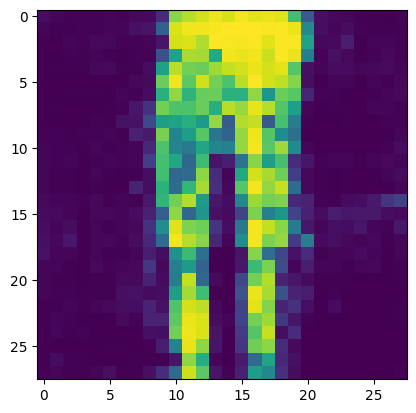

Dloss:  0.44536266
Gloss:  0.6817451
Dloss:  0.4455955
Gloss:  0.681702
Dloss:  0.44582516
Gloss:  0.6821275
Dloss:  0.44606248
Gloss:  0.68210673
Dloss:  0.44629884
Gloss:  0.6825603
Dloss:  0.44653308
Gloss:  0.68251467
Dloss:  0.44676802
Gloss:  0.68295723
Dloss:  0.4470047
Gloss:  0.6829316
Dloss:  0.44725084
Gloss:  0.6833275
Dloss:  0.44749174
Gloss:  0.6833448
Dloss:  0.44771636
Gloss:  0.6837275
Dloss:  0.44793946
Gloss:  0.6837253
Dloss:  0.4481509
Gloss:  0.68416435
Dloss:  0.44840252
Gloss:  0.6840844
Dloss:  0.4486426
Gloss:  0.68453574
Dloss:  0.44888732
Gloss:  0.6844558
Dloss:  0.44912136
Gloss:  0.6848845
Dloss:  0.4493503
Gloss:  0.6847999
Dloss:  0.44958794
Gloss:  0.68525994
Dloss:  0.44982126
Gloss:  0.68525106
Dloss:  0.4500554
Gloss:  0.6856303
Dloss:  0.4502737
Gloss:  0.6856082
Dloss:  0.45050025
Gloss:  0.68603283
Dloss:  0.45073745
Gloss:  0.6859777
Dloss:  0.45096046
Gloss:  0.68640524
Dloss:  0.45118374
Gloss:  0.68637913
Dloss:  0.45141315
Gloss:  0.6867409

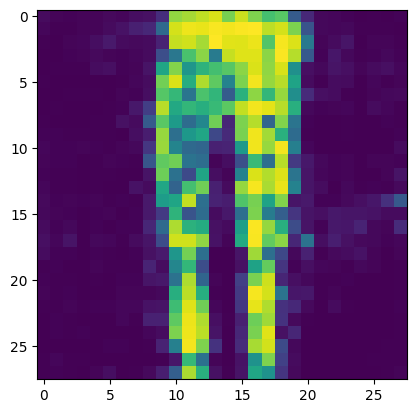

Dloss:  0.45229766
Gloss:  0.68747324
Dloss:  0.45252264
Gloss:  0.6874291
Dloss:  0.45274696
Gloss:  0.68782
Dloss:  0.45298204
Gloss:  0.6877414
Dloss:  0.4532122
Gloss:  0.68819577
Dloss:  0.45344758
Gloss:  0.6880981
Dloss:  0.45367682
Gloss:  0.6884918
Dloss:  0.45390168
Gloss:  0.68846977
Dloss:  0.45412996
Gloss:  0.68881786
Dloss:  0.45434022
Gloss:  0.6888332
Dloss:  0.4545519
Gloss:  0.6891391
Dloss:  0.4547653
Gloss:  0.6890925
Dloss:  0.45497763
Gloss:  0.68943644
Dloss:  0.45518383
Gloss:  0.689384
Dloss:  0.45539996
Gloss:  0.6897762
Dloss:  0.45561782
Gloss:  0.68973666
Dloss:  0.4558369
Gloss:  0.6901189
Dloss:  0.45604962
Gloss:  0.6900478
Dloss:  0.4562674
Gloss:  0.6904461
Dloss:  0.45648083
Gloss:  0.69035643
Dloss:  0.4567047
Gloss:  0.6907633
Dloss:  0.4569106
Gloss:  0.69066054
Dloss:  0.45714033
Gloss:  0.6911486
Dloss:  0.457366
Gloss:  0.6910146
Dloss:  0.45760342
Gloss:  0.6914691
Dloss:  0.4578221
Gloss:  0.69137895
Dloss:  0.4580486
Gloss:  0.69180286
Dloss

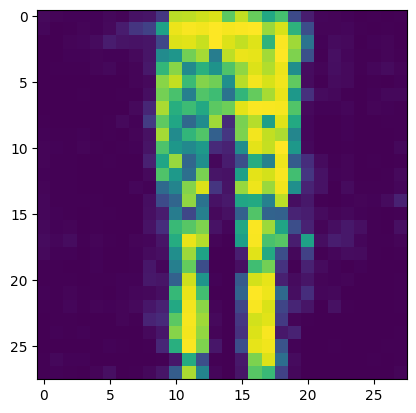

Dloss:  0.4588682
Gloss:  0.69238484
Dloss:  0.45905772
Gloss:  0.692402
Dloss:  0.45924658
Gloss:  0.6926793
Dloss:  0.45943043
Gloss:  0.69269294
Dloss:  0.45961788
Gloss:  0.69298124
Dloss:  0.45981455
Gloss:  0.69297713
Dloss:  0.46000645
Gloss:  0.69329125
Dloss:  0.46020064
Gloss:  0.69328475
Dloss:  0.4603912
Gloss:  0.6935888
Dloss:  0.46058547
Gloss:  0.69354814
Dloss:  0.4607764
Gloss:  0.6939141
Dloss:  0.4609706
Gloss:  0.6938349
Dloss:  0.46117768
Gloss:  0.6943248
Dloss:  0.46139562
Gloss:  0.6941581
Dloss:  0.4616169
Gloss:  0.69468075
Dloss:  0.46183714
Gloss:  0.6945058
Dloss:  0.46206293
Gloss:  0.6950332
Dloss:  0.46228778
Gloss:  0.69487303
Dloss:  0.4625132
Gloss:  0.69534045
Dloss:  0.46271846
Gloss:  0.6952754
Dloss:  0.46291783
Gloss:  0.6955656
Dloss:  0.46311292
Gloss:  0.69555146
Dloss:  0.4633037
Gloss:  0.6957996
Dloss:  0.4634935
Gloss:  0.69584954
Dloss:  0.46367356
Gloss:  0.696038
Dloss:  0.46385
Gloss:  0.69609624
Dloss:  0.4640219
Gloss:  0.6962876
Dl

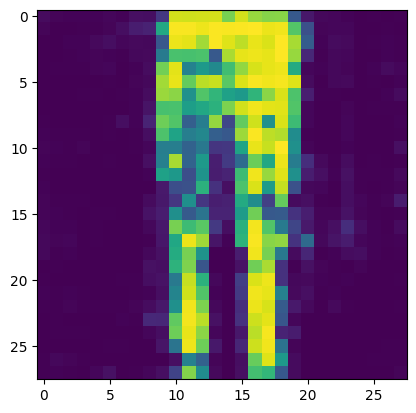

Dloss:  0.46472988
Gloss:  0.6969092
Dloss:  0.4649089
Gloss:  0.69685835
Dloss:  0.46508858
Gloss:  0.69722575
Dloss:  0.4652916
Gloss:  0.6971539
Dloss:  0.465489
Gloss:  0.69752353
Dloss:  0.4656802
Gloss:  0.69742143
Dloss:  0.46587554
Gloss:  0.6978408
Dloss:  0.46608332
Gloss:  0.697727
Dloss:  0.4662894
Gloss:  0.69807076
Dloss:  0.46648812
Gloss:  0.6980064
Dloss:  0.466666
Gloss:  0.69836533
Dloss:  0.46686202
Gloss:  0.69828486
Dloss:  0.4670538
Gloss:  0.6986686
Dloss:  0.46725658
Gloss:  0.6985469
Dloss:  0.46747604
Gloss:  0.69894266
Dloss:  0.46767563
Gloss:  0.69886416
Dloss:  0.46785483
Gloss:  0.69915366
Dloss:  0.46802732
Gloss:  0.69916284
Dloss:  0.46820897
Gloss:  0.69945306
Dloss:  0.4683851
Gloss:  0.69944715
Dloss:  0.46857747
Gloss:  0.6997626
Dloss:  0.46876097
Gloss:  0.6996898
Dloss:  0.46894318
Gloss:  0.7000025
Dloss:  0.4691234
Gloss:  0.6999711
Dloss:  0.46931264
Gloss:  0.70026416
Dloss:  0.46949536
Gloss:  0.70021254
Dloss:  0.46968213
Gloss:  0.700492

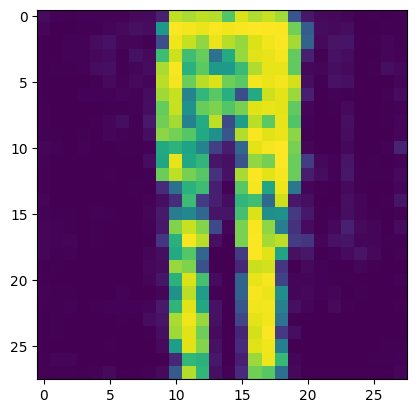

Dloss:  0.47043318
Gloss:  0.7010941
Dloss:  0.470619
Gloss:  0.701071
Dloss:  0.47079334
Gloss:  0.7013372
Dloss:  0.47096997
Gloss:  0.701283
Dloss:  0.47114298
Gloss:  0.70153123
Dloss:  0.4713154
Gloss:  0.7015023
Dloss:  0.47149092
Gloss:  0.70185715
Dloss:  0.4716742
Gloss:  0.7017195
Dloss:  0.4718693
Gloss:  0.7021648
Dloss:  0.47207546
Gloss:  0.7020488
Dloss:  0.47227484
Gloss:  0.7024285
Dloss:  0.4724692
Gloss:  0.7023177
Dloss:  0.4726564
Gloss:  0.70265496
Dloss:  0.4728394
Gloss:  0.70258176
Dloss:  0.47302708
Gloss:  0.70286757
8 / 100
Dloss:  0.47320724
Gloss:  0.70280665
8 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


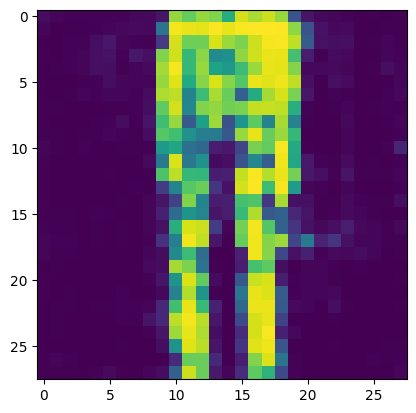

Dloss:  0.4733691
Gloss:  0.7030775
Dloss:  0.47354457
Gloss:  0.70303446
Dloss:  0.47372183
Gloss:  0.7033343
Dloss:  0.47389182
Gloss:  0.7032805
Dloss:  0.47406894
Gloss:  0.70357865
Dloss:  0.4742501
Gloss:  0.7035347
Dloss:  0.4744217
Gloss:  0.7037607
Dloss:  0.4745917
Gloss:  0.7037587
Dloss:  0.4747642
Gloss:  0.7039578
Dloss:  0.47493184
Gloss:  0.7039643
Dloss:  0.47509715
Gloss:  0.7042352
Dloss:  0.47526613
Gloss:  0.7042019
Dloss:  0.4754287
Gloss:  0.70450765
Dloss:  0.4756172
Gloss:  0.70439756
Dloss:  0.4757978
Gloss:  0.7047378
Dloss:  0.47598118
Gloss:  0.7046041
Dloss:  0.47616556
Gloss:  0.704974
Dloss:  0.47633815
Gloss:  0.7048491
Dloss:  0.47652152
Gloss:  0.7052246
Dloss:  0.47671053
Gloss:  0.70515484
Dloss:  0.47689405
Gloss:  0.7054608
Dloss:  0.47707042
Gloss:  0.7054072
Dloss:  0.47724274
Gloss:  0.70569867
Dloss:  0.47740674
Gloss:  0.7056243
Dloss:  0.4775648
Gloss:  0.70590717
Dloss:  0.4777255
Gloss:  0.70587987
Dloss:  0.4778948
Gloss:  0.7061104
Dloss

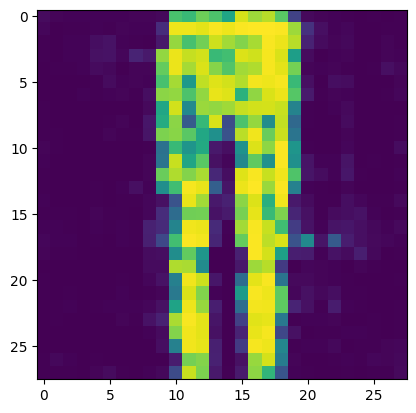

Dloss:  0.4785356
Gloss:  0.7065774
Dloss:  0.47870252
Gloss:  0.7065088
Dloss:  0.47886765
Gloss:  0.7068305
Dloss:  0.47905436
Gloss:  0.70670253
Dloss:  0.47923878
Gloss:  0.7071152
Dloss:  0.47942418
Gloss:  0.7069683
Dloss:  0.47961745
Gloss:  0.7073203
Dloss:  0.47980252
Gloss:  0.7072118
Dloss:  0.47998586
Gloss:  0.70749813
Dloss:  0.48014963
Gloss:  0.7074397
Dloss:  0.4803148
Gloss:  0.70768124
Dloss:  0.4804777
Gloss:  0.70761216
Dloss:  0.4806406
Gloss:  0.707851
Dloss:  0.48080117
Gloss:  0.7078177
Dloss:  0.48096335
Gloss:  0.7080198
Dloss:  0.48112175
Gloss:  0.7080159
Dloss:  0.48127908
Gloss:  0.70824504
Dloss:  0.48143536
Gloss:  0.70821416
Dloss:  0.48159653
Gloss:  0.70843023
Dloss:  0.4817525
Gloss:  0.7083968
Dloss:  0.48191643
Gloss:  0.7086191
Dloss:  0.4820618
Gloss:  0.7085665
Dloss:  0.4822292
Gloss:  0.7088613
Dloss:  0.4823943
Gloss:  0.70878965
Dloss:  0.48256552
Gloss:  0.7091024
Dloss:  0.48272976
Gloss:  0.70900023
Dloss:  0.48290718
Gloss:  0.7093439
D

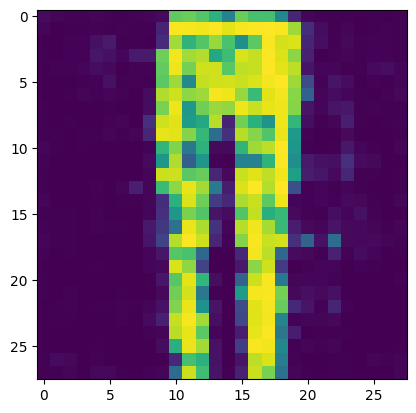

Dloss:  0.48360473
Gloss:  0.70973426
Dloss:  0.4837678
Gloss:  0.7096471
Dloss:  0.4839376
Gloss:  0.7099455
Dloss:  0.4841011
Gloss:  0.7098644
Dloss:  0.48426357
Gloss:  0.71008974
Dloss:  0.48442256
Gloss:  0.7100457
Dloss:  0.48456988
Gloss:  0.71032375
Dloss:  0.4847304
Gloss:  0.71022046
Dloss:  0.48489136
Gloss:  0.71046925
Dloss:  0.48505652
Gloss:  0.7104054
Dloss:  0.4852136
Gloss:  0.7106298
Dloss:  0.48536316
Gloss:  0.7105697
Dloss:  0.48550996
Gloss:  0.71080506
Dloss:  0.4856568
Gloss:  0.71077055
Dloss:  0.48581013
Gloss:  0.7110223
Dloss:  0.48596242
Gloss:  0.7109647
Dloss:  0.48611763
Gloss:  0.7112013
Dloss:  0.48626876
Gloss:  0.71111846
Dloss:  0.48642838
Gloss:  0.7114277
Dloss:  0.4865923
Gloss:  0.71132475
Dloss:  0.48675567
Gloss:  0.7115998
Dloss:  0.48691967
Gloss:  0.7115009
Dloss:  0.48707977
Gloss:  0.71179575
Dloss:  0.48724574
Gloss:  0.711705
Dloss:  0.48740375
Gloss:  0.71202993
Dloss:  0.4875692
Gloss:  0.7118539
Dloss:  0.48774076
Gloss:  0.7122427

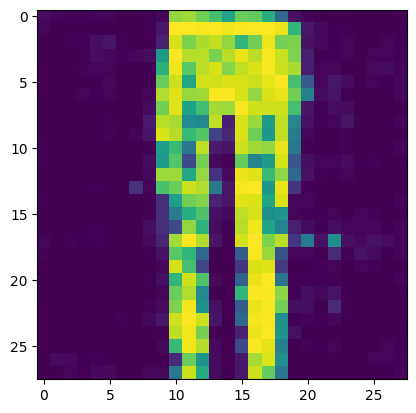

Dloss:  0.4884015
Gloss:  0.7125564
Dloss:  0.488553
Gloss:  0.71254724
Dloss:  0.48868763
Gloss:  0.7127145
Dloss:  0.48882502
Gloss:  0.7127061
Dloss:  0.48896936
Gloss:  0.7128461
Dloss:  0.4891083
Gloss:  0.71284187
Dloss:  0.4892517
Gloss:  0.7129942
Dloss:  0.48939422
Gloss:  0.7129945
Dloss:  0.4895335
Gloss:  0.7131399
Dloss:  0.48967576
Gloss:  0.7131558
Dloss:  0.48980442
Gloss:  0.7133117
Dloss:  0.4899503
Gloss:  0.71328986
Dloss:  0.49008715
Gloss:  0.71350956
Dloss:  0.49023876
Gloss:  0.71339333
Dloss:  0.49040297
Gloss:  0.7137458
Dloss:  0.49056813
Gloss:  0.7135669
Dloss:  0.49074093
Gloss:  0.713958
Dloss:  0.4909198
Gloss:  0.71380764
Dloss:  0.49107862
Gloss:  0.7141152
Dloss:  0.49123418
Gloss:  0.7140375
Dloss:  0.4913909
Gloss:  0.7142664
Dloss:  0.49153447
Gloss:  0.71417123
Dloss:  0.4916825
Gloss:  0.7143959
Dloss:  0.4918245
Gloss:  0.7143228
Dloss:  0.4919717
Gloss:  0.7145369
Dloss:  0.4921152
Gloss:  0.7144831
Dloss:  0.4922569
Gloss:  0.7146731
Dloss:  0

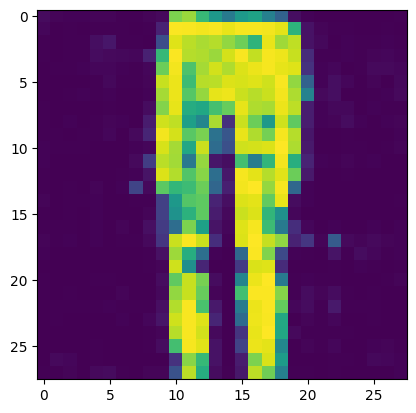

Dloss:  0.49280325
Gloss:  0.71500653
Dloss:  0.49294043
Gloss:  0.7150022
Dloss:  0.49307716
Gloss:  0.7151614
Dloss:  0.49321762
Gloss:  0.71512336
Dloss:  0.49335453
Gloss:  0.7153046
Dloss:  0.49349135
Gloss:  0.7152362
Dloss:  0.49362922
Gloss:  0.7155236
Dloss:  0.4937891
Gloss:  0.71538365
Dloss:  0.49395302
Gloss:  0.7156961
Dloss:  0.4941114
Gloss:  0.7155751
Dloss:  0.4942659
Gloss:  0.71585673
Dloss:  0.4944178
Gloss:  0.71575147
Dloss:  0.4945634
Gloss:  0.7160276
Dloss:  0.4947092
Gloss:  0.71592665
Dloss:  0.49485335
Gloss:  0.71611995
9 / 100
Dloss:  0.49499258
Gloss:  0.71606797
9 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


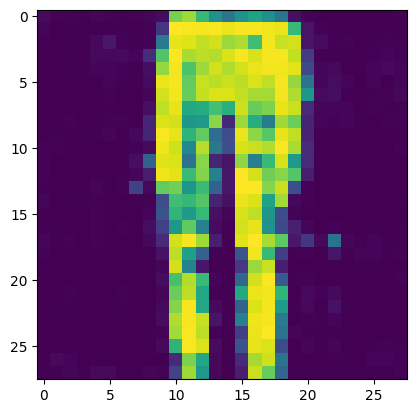

Dloss:  0.4951205
Gloss:  0.71624565
Dloss:  0.49525762
Gloss:  0.7161969
Dloss:  0.49538806
Gloss:  0.71639144
Dloss:  0.49552304
Gloss:  0.71633214
Dloss:  0.4956634
Gloss:  0.71653193
Dloss:  0.49580535
Gloss:  0.7164679
Dloss:  0.4959465
Gloss:  0.71666557
Dloss:  0.49608618
Gloss:  0.7166166
Dloss:  0.49622256
Gloss:  0.7168082
Dloss:  0.4963571
Gloss:  0.71673435
Dloss:  0.49648952
Gloss:  0.7169343
Dloss:  0.4966224
Gloss:  0.7168701
Dloss:  0.4967521
Gloss:  0.71705854
Dloss:  0.49688992
Gloss:  0.7169771
Dloss:  0.49702758
Gloss:  0.7172094
Dloss:  0.49717146
Gloss:  0.7171066
Dloss:  0.49731705
Gloss:  0.71741706
Dloss:  0.49746102
Gloss:  0.71725464
Dloss:  0.4976134
Gloss:  0.71756774
Dloss:  0.49776074
Gloss:  0.7174453
Dloss:  0.49791148
Gloss:  0.717732
Dloss:  0.49805278
Gloss:  0.7176076
Dloss:  0.4982056
Gloss:  0.7178861
Dloss:  0.49835008
Gloss:  0.7177507
Dloss:  0.4984967
Gloss:  0.71801317
Dloss:  0.4986417
Gloss:  0.71793866
Dloss:  0.49877548
Gloss:  0.71809417

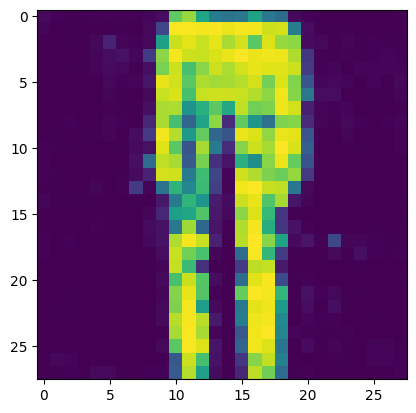

Dloss:  0.49929342
Gloss:  0.71836
Dloss:  0.4994231
Gloss:  0.71835184
Dloss:  0.49955124
Gloss:  0.7184964
Dloss:  0.49968278
Gloss:  0.71845746
Dloss:  0.4998083
Gloss:  0.71864986
Dloss:  0.49993855
Gloss:  0.71857995
Dloss:  0.5000768
Gloss:  0.7188013
Dloss:  0.5002141
Gloss:  0.71870804
Dloss:  0.50035745
Gloss:  0.7189518
Dloss:  0.5004971
Gloss:  0.71885914
Dloss:  0.50062925
Gloss:  0.71905226
Dloss:  0.50076145
Gloss:  0.71895856
Dloss:  0.50089025
Gloss:  0.71917176
Dloss:  0.5010276
Gloss:  0.71909666
Dloss:  0.50115925
Gloss:  0.71929324
Dloss:  0.50129175
Gloss:  0.7191805
Dloss:  0.5014311
Gloss:  0.71942276
Dloss:  0.50156355
Gloss:  0.719338
Dloss:  0.5016993
Gloss:  0.7195801
Dloss:  0.5018376
Gloss:  0.7194879
Dloss:  0.501968
Gloss:  0.71967155
Dloss:  0.5020903
Gloss:  0.71960044
Dloss:  0.5022238
Gloss:  0.7198169
Dloss:  0.50235564
Gloss:  0.7197276
Dloss:  0.50249356
Gloss:  0.7199534
Dloss:  0.5026229
Gloss:  0.7198597
Dloss:  0.50275564
Gloss:  0.72006214
Dlo

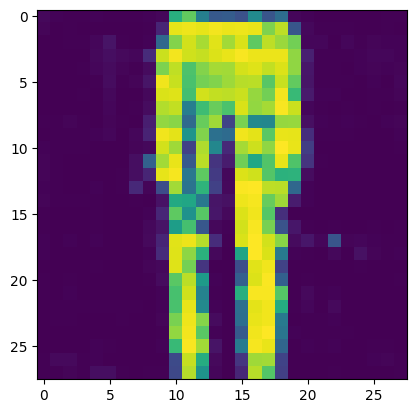

Dloss:  0.5032714
Gloss:  0.7203493
Dloss:  0.5034055
Gloss:  0.720244
Dloss:  0.50354505
Gloss:  0.7205288
Dloss:  0.50368357
Gloss:  0.720382
Dloss:  0.5038234
Gloss:  0.72062963
Dloss:  0.50396246
Gloss:  0.720535
Dloss:  0.5040888
Gloss:  0.7207802
Dloss:  0.50422156
Gloss:  0.7206902
Dloss:  0.5043486
Gloss:  0.720881
Dloss:  0.50447506
Gloss:  0.72081107
Dloss:  0.50460017
Gloss:  0.7209876
Dloss:  0.50471795
Gloss:  0.7209277
Dloss:  0.50484055
Gloss:  0.721116
Dloss:  0.50496644
Gloss:  0.7210538
Dloss:  0.50508904
Gloss:  0.7212863
Dloss:  0.50521815
Gloss:  0.7211733
Dloss:  0.5053507
Gloss:  0.72141737
Dloss:  0.5054772
Gloss:  0.72130483
Dloss:  0.5056096
Gloss:  0.72152495
Dloss:  0.5057402
Gloss:  0.7214528
Dloss:  0.5058627
Gloss:  0.7216097
Dloss:  0.5059879
Gloss:  0.7215566
Dloss:  0.50610536
Gloss:  0.7217246
Dloss:  0.50623184
Gloss:  0.72170156
Dloss:  0.50633806
Gloss:  0.72183186
Dloss:  0.50645643
Gloss:  0.7218039
Dloss:  0.5065681
Gloss:  0.72195876
Dloss:  0.

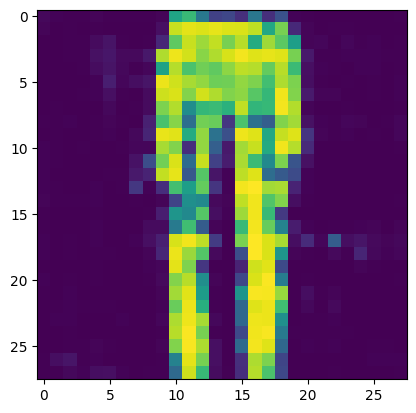

Dloss:  0.50703704
Gloss:  0.72219944
Dloss:  0.507156
Gloss:  0.7221214
Dloss:  0.507271
Gloss:  0.72236335
Dloss:  0.50739676
Gloss:  0.72222346
Dloss:  0.50753504
Gloss:  0.72254926
Dloss:  0.5076825
Gloss:  0.72237843
Dloss:  0.5078332
Gloss:  0.7226963
Dloss:  0.50798184
Gloss:  0.7225402
Dloss:  0.50812155
Gloss:  0.7228018
Dloss:  0.5082571
Gloss:  0.7227104
Dloss:  0.5083759
Gloss:  0.72286993
Dloss:  0.50849664
Gloss:  0.72280437
Dloss:  0.5086153
Gloss:  0.7229752
Dloss:  0.5087393
Gloss:  0.72287714
Dloss:  0.5088638
Gloss:  0.72306305
Dloss:  0.5089803
Gloss:  0.72300285
Dloss:  0.50910056
Gloss:  0.72318465
Dloss:  0.5092171
Gloss:  0.7231346
Dloss:  0.50933135
Gloss:  0.7233
Dloss:  0.5094461
Gloss:  0.7232512
Dloss:  0.509569
Gloss:  0.72338706
Dloss:  0.50967777
Gloss:  0.72333646
Dloss:  0.50979215
Gloss:  0.7234872
Dloss:  0.5099087
Gloss:  0.723435
Dloss:  0.51002526
Gloss:  0.7236285
Dloss:  0.51014346
Gloss:  0.7235494
Dloss:  0.51026285
Gloss:  0.72376287
Dloss:  

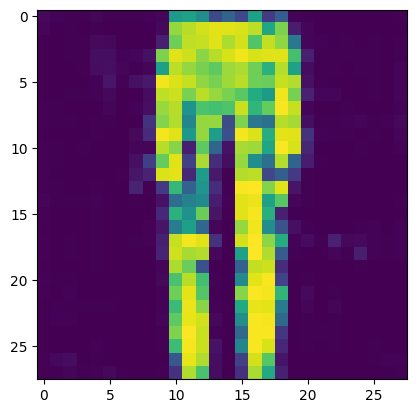

Dloss:  0.51074904
Gloss:  0.7240326
Dloss:  0.5108716
Gloss:  0.7239383
Dloss:  0.5109927
Gloss:  0.72412026
Dloss:  0.5111092
Gloss:  0.7240449
Dloss:  0.51122725
Gloss:  0.7242231
Dloss:  0.5113455
Gloss:  0.7241703
Dloss:  0.5114567
Gloss:  0.72435004
Dloss:  0.511572
Gloss:  0.72426075
Dloss:  0.5116875
Gloss:  0.7244557
Dloss:  0.5118089
Gloss:  0.72438204
Dloss:  0.5119201
Gloss:  0.72456104
Dloss:  0.51203895
Gloss:  0.72449034
Dloss:  0.5121484
Gloss:  0.72463703
Dloss:  0.51225644
Gloss:  0.7245571
Dloss:  0.51237434
Gloss:  0.72476006
10 / 100
Dloss:  0.51249826
Gloss:  0.7246383
10 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


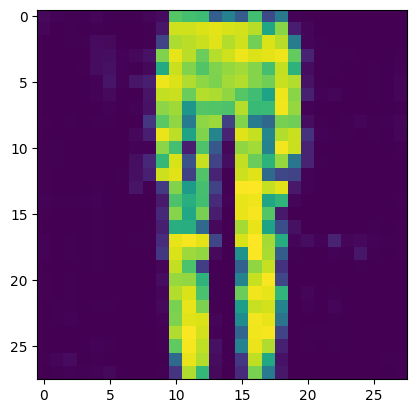

Dloss:  0.51261634
Gloss:  0.7248914
Dloss:  0.512748
Gloss:  0.72478193
Dloss:  0.5128709
Gloss:  0.724994
Dloss:  0.51299
Gloss:  0.7248881
Dloss:  0.51310736
Gloss:  0.72509086
Dloss:  0.5132206
Gloss:  0.7250142
Dloss:  0.5133316
Gloss:  0.7251645
Dloss:  0.513447
Gloss:  0.72513235
Dloss:  0.5135512
Gloss:  0.7252423
Dloss:  0.51365924
Gloss:  0.7252199
Dloss:  0.51376265
Gloss:  0.7253446
Dloss:  0.513866
Gloss:  0.7253341
Dloss:  0.5139684
Gloss:  0.7254281
Dloss:  0.5140768
Gloss:  0.72539765
Dloss:  0.51417834
Gloss:  0.7254836
Dloss:  0.514288
Gloss:  0.7255092
Dloss:  0.51438785
Gloss:  0.72558355
Dloss:  0.5144853
Gloss:  0.7255897
Dloss:  0.5145874
Gloss:  0.72569215
Dloss:  0.5146914
Gloss:  0.72571874
Dloss:  0.5147959
Gloss:  0.7257879
Dloss:  0.5148938
Gloss:  0.7257921
Dloss:  0.5149946
Gloss:  0.7259204
Dloss:  0.5151016
Gloss:  0.7258165
Dloss:  0.51520616
Gloss:  0.72604364
Dloss:  0.5153211
Gloss:  0.72590405
Dloss:  0.51545054
Gloss:  0.7262248
Dloss:  0.5155819


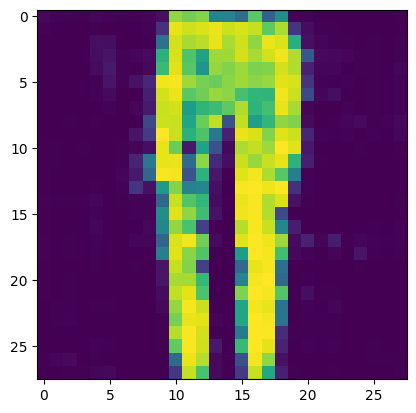

Dloss:  0.5160027
Gloss:  0.7265182
Dloss:  0.51613325
Gloss:  0.7263799
Dloss:  0.51625276
Gloss:  0.726571
Dloss:  0.5163712
Gloss:  0.7265052
Dloss:  0.5164716
Gloss:  0.7266248
Dloss:  0.5165743
Gloss:  0.7266112
Dloss:  0.51667607
Gloss:  0.726694
Dloss:  0.51677716
Gloss:  0.72669995
Dloss:  0.5168794
Gloss:  0.72676307
Dloss:  0.5169774
Gloss:  0.726796
Dloss:  0.51707345
Gloss:  0.72683746
Dloss:  0.5171701
Gloss:  0.7268652
Dloss:  0.5172643
Gloss:  0.72689116
Dloss:  0.51736146
Gloss:  0.7269807
Dloss:  0.517456
Gloss:  0.7269598
Dloss:  0.51755977
Gloss:  0.7271044
Dloss:  0.5176717
Gloss:  0.7270512
Dloss:  0.51778024
Gloss:  0.7272194
Dloss:  0.51788545
Gloss:  0.7271328
Dloss:  0.51798624
Gloss:  0.7273183
Dloss:  0.5180984
Gloss:  0.7272005
Dloss:  0.5182074
Gloss:  0.7274435
Dloss:  0.5183317
Gloss:  0.7273178
Dloss:  0.51844525
Gloss:  0.7275385
Dloss:  0.51856166
Gloss:  0.7274172
Dloss:  0.5186647
Gloss:  0.7276064
Dloss:  0.5187803
Gloss:  0.7275425
Dloss:  0.518884

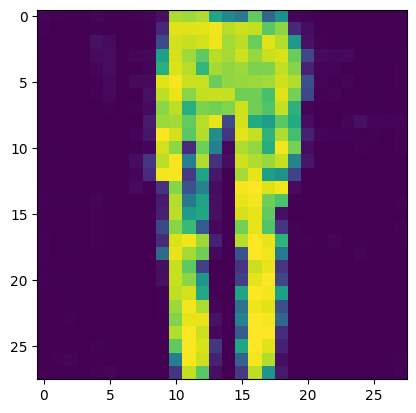

Dloss:  0.51917243
Gloss:  0.72772616
Dloss:  0.5192687
Gloss:  0.72787535
Dloss:  0.519363
Gloss:  0.72780144
Dloss:  0.5194599
Gloss:  0.7279586
Dloss:  0.51955867
Gloss:  0.7278895
Dloss:  0.5196595
Gloss:  0.728047
Dloss:  0.51975334
Gloss:  0.7279612
Dloss:  0.519858
Gloss:  0.72815007
Dloss:  0.5199612
Gloss:  0.7280446
Dloss:  0.5200673
Gloss:  0.728276
Dloss:  0.5201747
Gloss:  0.7281549
Dloss:  0.52028036
Gloss:  0.72838503
Dloss:  0.52038276
Gloss:  0.7282741
Dloss:  0.5204934
Gloss:  0.72850144
Dloss:  0.52060354
Gloss:  0.72840196
Dloss:  0.52071124
Gloss:  0.72858167
Dloss:  0.52081656
Gloss:  0.72851
Dloss:  0.52091885
Gloss:  0.728655
Dloss:  0.5210148
Gloss:  0.7286058
Dloss:  0.5211146
Gloss:  0.72871476
Dloss:  0.5212093
Gloss:  0.72867614
Dloss:  0.5213064
Gloss:  0.72877145
Dloss:  0.52139753
Gloss:  0.72876686
Dloss:  0.52149266
Gloss:  0.72884625
Dloss:  0.5215797
Gloss:  0.72883993
Dloss:  0.5216683
Gloss:  0.72890615
Dloss:  0.5217527
Gloss:  0.72890157
Dloss:  

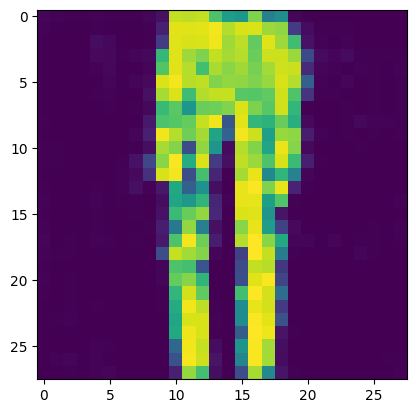

Dloss:  0.5221149
Gloss:  0.729015
Dloss:  0.5222129
Gloss:  0.7292393
Dloss:  0.5223154
Gloss:  0.7290985
Dloss:  0.5224293
Gloss:  0.7293947
Dloss:  0.5225481
Gloss:  0.7292211
Dloss:  0.52267176
Gloss:  0.72954196
Dloss:  0.5227982
Gloss:  0.72937715
Dloss:  0.5229202
Gloss:  0.7296248
Dloss:  0.5230321
Gloss:  0.72952044
Dloss:  0.52313787
Gloss:  0.729668
Dloss:  0.5232295
Gloss:  0.72962207
Dloss:  0.52332175
Gloss:  0.72969306
Dloss:  0.5234084
Gloss:  0.72969836
Dloss:  0.52349967
Gloss:  0.7297229
Dloss:  0.52359074
Gloss:  0.72980565
Dloss:  0.5236739
Gloss:  0.7298032
Dloss:  0.5237547
Gloss:  0.7298679
Dloss:  0.52384263
Gloss:  0.7299021
Dloss:  0.5239264
Gloss:  0.7299502
Dloss:  0.52401096
Gloss:  0.7299873
Dloss:  0.52410364
Gloss:  0.7300196
Dloss:  0.52419037
Gloss:  0.7300694
Dloss:  0.5242768
Gloss:  0.7300959
Dloss:  0.52435553
Gloss:  0.73016137
Dloss:  0.5244407
Gloss:  0.73017067
Dloss:  0.5245202
Gloss:  0.7302222
Dloss:  0.52460474
Gloss:  0.73024476
Dloss:  0

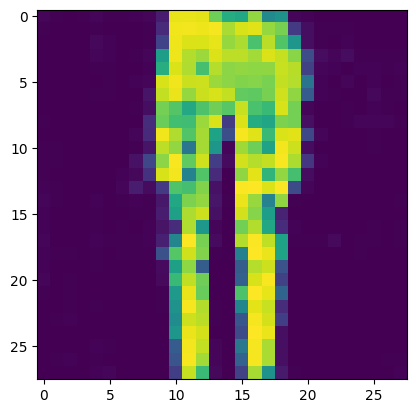

Dloss:  0.52498317
Gloss:  0.73033994
Dloss:  0.5250981
Gloss:  0.73067117
Dloss:  0.52522826
Gloss:  0.73046786
Dloss:  0.5253603
Gloss:  0.73081124
Dloss:  0.52549154
Gloss:  0.73065025
Dloss:  0.5256106
Gloss:  0.73089284
Dloss:  0.5257205
Gloss:  0.7308114
Dloss:  0.5258159
Gloss:  0.7309043
Dloss:  0.525904
Gloss:  0.73090804
Dloss:  0.525991
Gloss:  0.7309852
Dloss:  0.5260759
Gloss:  0.73097855
Dloss:  0.5261613
Gloss:  0.7310497
Dloss:  0.5262424
Gloss:  0.7310406
Dloss:  0.5263245
Gloss:  0.731126
Dloss:  0.52641016
Gloss:  0.73111176
11 / 100
Dloss:  0.52649385
Gloss:  0.73116565
11 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


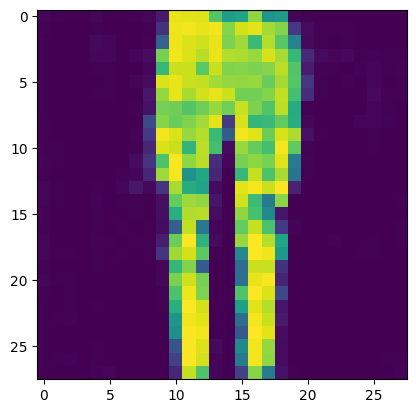

Dloss:  0.5265679
Gloss:  0.7311776
Dloss:  0.5266522
Gloss:  0.73124176
Dloss:  0.52673817
Gloss:  0.73123115
Dloss:  0.52682555
Gloss:  0.73133534
Dloss:  0.5269078
Gloss:  0.7312871
Dloss:  0.5269934
Gloss:  0.73144084
Dloss:  0.5270823
Gloss:  0.7313453
Dloss:  0.5271796
Gloss:  0.73156244
Dloss:  0.5272808
Gloss:  0.731418
Dloss:  0.52738947
Gloss:  0.7316861
Dloss:  0.52750015
Gloss:  0.7315254
Dloss:  0.52761203
Gloss:  0.73177755
Dloss:  0.52772397
Gloss:  0.7316315
Dloss:  0.52782595
Gloss:  0.7318025
Dloss:  0.52791756
Gloss:  0.73173976
Dloss:  0.52800864
Gloss:  0.7318629
Dloss:  0.5280957
Gloss:  0.73183197
Dloss:  0.52817637
Gloss:  0.7319223
Dloss:  0.52825946
Gloss:  0.73191893
Dloss:  0.52834356
Gloss:  0.7320065
Dloss:  0.52842486
Gloss:  0.7319826
Dloss:  0.5285088
Gloss:  0.73210657
Dloss:  0.52859485
Gloss:  0.73206997
Dloss:  0.52867573
Gloss:  0.7321154
Dloss:  0.5287514
Gloss:  0.7321137
Dloss:  0.5288315
Gloss:  0.7321926
Dloss:  0.5289213
Gloss:  0.7321898
Dlo

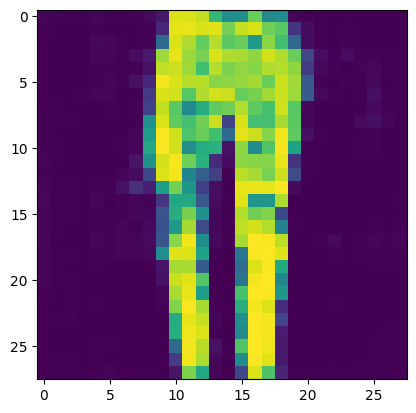

Dloss:  0.5292384
Gloss:  0.73234135
Dloss:  0.5293234
Gloss:  0.73236704
Dloss:  0.5293991
Gloss:  0.7324114
Dloss:  0.5294833
Gloss:  0.7324155
Dloss:  0.5295548
Gloss:  0.7324862
Dloss:  0.52963394
Gloss:  0.732486
Dloss:  0.52971286
Gloss:  0.73256594
Dloss:  0.52979255
Gloss:  0.7325569
Dloss:  0.529877
Gloss:  0.732692
Dloss:  0.52996105
Gloss:  0.7326026
Dloss:  0.5300458
Gloss:  0.7328225
Dloss:  0.5301462
Gloss:  0.7326853
Dloss:  0.53025293
Gloss:  0.73299474
Dloss:  0.5303605
Gloss:  0.7328223
Dloss:  0.5304806
Gloss:  0.7331492
Dloss:  0.53060144
Gloss:  0.73299825
Dloss:  0.5307075
Gloss:  0.7331804
Dloss:  0.5307978
Gloss:  0.73313195
Dloss:  0.5308838
Gloss:  0.7332468
Dloss:  0.53096616
Gloss:  0.7332017
Dloss:  0.531052
Gloss:  0.7333171
Dloss:  0.5311331
Gloss:  0.73326874
Dloss:  0.5312174
Gloss:  0.73337007
Dloss:  0.531295
Gloss:  0.7333231
Dloss:  0.53137517
Gloss:  0.7334241
Dloss:  0.5314536
Gloss:  0.73337924
Dloss:  0.5315408
Gloss:  0.73347884
Dloss:  0.53162

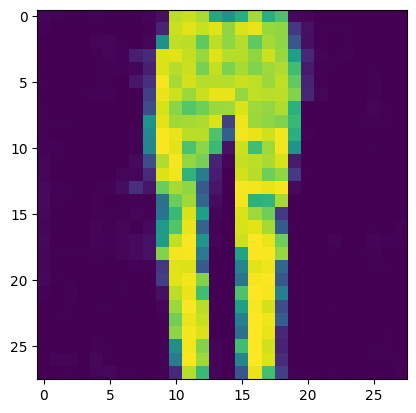

Dloss:  0.53184915
Gloss:  0.73362267
Dloss:  0.5319276
Gloss:  0.73358375
Dloss:  0.53200114
Gloss:  0.73369104
Dloss:  0.53207976
Gloss:  0.73364407
Dloss:  0.5321561
Gloss:  0.73376787
Dloss:  0.5322414
Gloss:  0.7337012
Dloss:  0.53232163
Gloss:  0.7338819
Dloss:  0.53241456
Gloss:  0.73377275
Dloss:  0.53250957
Gloss:  0.7339911
Dloss:  0.53260696
Gloss:  0.73385316
Dloss:  0.5326976
Gloss:  0.73408103
Dloss:  0.53279346
Gloss:  0.73396635
Dloss:  0.532883
Gloss:  0.7341847
Dloss:  0.5329831
Gloss:  0.73406535
Dloss:  0.5330802
Gloss:  0.734242
Dloss:  0.5331674
Gloss:  0.73415244
Dloss:  0.5332553
Gloss:  0.7342945
Dloss:  0.5333397
Gloss:  0.73421055
Dloss:  0.5334188
Gloss:  0.7343144
Dloss:  0.5335032
Gloss:  0.734283
Dloss:  0.53358376
Gloss:  0.73435426
Dloss:  0.53366625
Gloss:  0.7343299
Dloss:  0.53374326
Gloss:  0.7344136
Dloss:  0.53382444
Gloss:  0.734392
Dloss:  0.5338936
Gloss:  0.7344656
Dloss:  0.53397197
Gloss:  0.7344247
Dloss:  0.53404397
Gloss:  0.7345194
Dloss

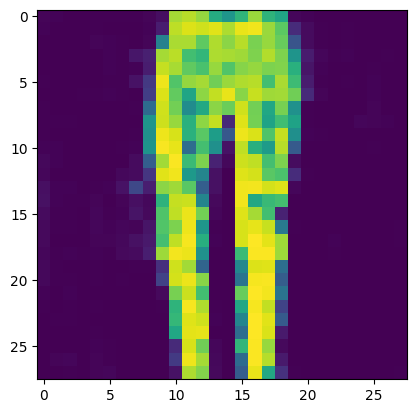

Dloss:  0.5343624
Gloss:  0.7346767
Dloss:  0.5344482
Gloss:  0.7345748
Dloss:  0.53452754
Gloss:  0.734762
Dloss:  0.53461885
Gloss:  0.7346451
Dloss:  0.5347101
Gloss:  0.73486406
Dloss:  0.5347998
Gloss:  0.7347407
Dloss:  0.53489697
Gloss:  0.734937
Dloss:  0.53498673
Gloss:  0.7348315
Dloss:  0.53508157
Gloss:  0.7350291
Dloss:  0.53517526
Gloss:  0.7349347
Dloss:  0.5352585
Gloss:  0.7350465
Dloss:  0.5353433
Gloss:  0.7349972
Dloss:  0.53542256
Gloss:  0.73508996
Dloss:  0.5355044
Gloss:  0.73503673
Dloss:  0.53558403
Gloss:  0.735136
Dloss:  0.5356573
Gloss:  0.73510396
Dloss:  0.53573287
Gloss:  0.735204
Dloss:  0.5358091
Gloss:  0.735171
Dloss:  0.5358834
Gloss:  0.73528373
Dloss:  0.535961
Gloss:  0.73522246
Dloss:  0.5360396
Gloss:  0.7353194
Dloss:  0.53611183
Gloss:  0.7352725
Dloss:  0.5361921
Gloss:  0.7353789
Dloss:  0.5362674
Gloss:  0.73531985
Dloss:  0.5363444
Gloss:  0.73543566
Dloss:  0.5364208
Gloss:  0.7353566
Dloss:  0.5364949
Gloss:  0.7354744
Dloss:  0.536572

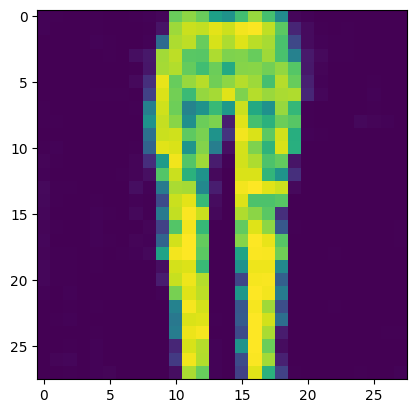

Dloss:  0.53679293
Gloss:  0.73555315
Dloss:  0.5368634
Gloss:  0.73556
Dloss:  0.5369355
Gloss:  0.7356062
Dloss:  0.53700596
Gloss:  0.73559797
Dloss:  0.53707665
Gloss:  0.7356405
Dloss:  0.5371496
Gloss:  0.73563516
Dloss:  0.5372181
Gloss:  0.73567915
Dloss:  0.5372915
Gloss:  0.73567605
Dloss:  0.53736186
Gloss:  0.73571485
Dloss:  0.5374313
Gloss:  0.7357238
Dloss:  0.5375057
Gloss:  0.7357429
Dloss:  0.53757554
Gloss:  0.7357468
Dloss:  0.53764236
Gloss:  0.73580176
Dloss:  0.53770715
Gloss:  0.735785
Dloss:  0.53778404
Gloss:  0.73588914
12 / 100
Dloss:  0.53785735
Gloss:  0.73580843
12 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


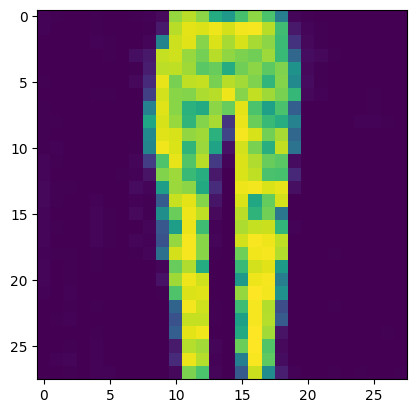

Dloss:  0.5379308
Gloss:  0.7360336
Dloss:  0.53802687
Gloss:  0.7358464
Dloss:  0.5381389
Gloss:  0.7362179
Dloss:  0.5382727
Gloss:  0.73599184
Dloss:  0.5384033
Gloss:  0.7363032
Dloss:  0.5385164
Gloss:  0.7361877
Dloss:  0.5385989
Gloss:  0.73628193
Dloss:  0.53867674
Gloss:  0.73627293
Dloss:  0.5387444
Gloss:  0.7363013
Dloss:  0.5388173
Gloss:  0.73632854
Dloss:  0.53888494
Gloss:  0.7363327
Dloss:  0.5389571
Gloss:  0.736382
Dloss:  0.53902745
Gloss:  0.7363812
Dloss:  0.5390966
Gloss:  0.7363963
Dloss:  0.53916645
Gloss:  0.73643327
Dloss:  0.5392376
Gloss:  0.7364449
Dloss:  0.5393117
Gloss:  0.7364787
Dloss:  0.53937775
Gloss:  0.73647845
Dloss:  0.53944683
Gloss:  0.73651946
Dloss:  0.5395169
Gloss:  0.7365278
Dloss:  0.53958476
Gloss:  0.736572
Dloss:  0.5396562
Gloss:  0.7365996
Dloss:  0.53972244
Gloss:  0.73662925
Dloss:  0.5397932
Gloss:  0.73659205
Dloss:  0.53985745
Gloss:  0.7366887
Dloss:  0.5399304
Gloss:  0.7366513
Dloss:  0.54000664
Gloss:  0.7367564
Dloss:  0.

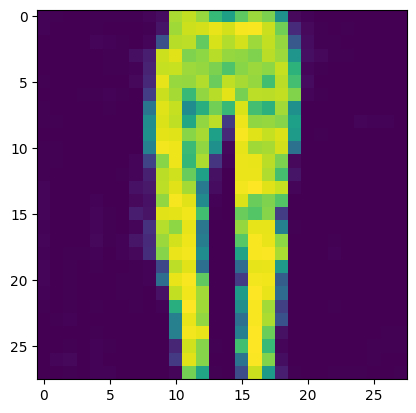

Dloss:  0.5403059
Gloss:  0.73693913
Dloss:  0.54039204
Gloss:  0.7368249
Dloss:  0.5404743
Gloss:  0.73699373
Dloss:  0.5405581
Gloss:  0.73687583
Dloss:  0.540641
Gloss:  0.7370802
Dloss:  0.5407313
Gloss:  0.7369524
Dloss:  0.54082
Gloss:  0.7371401
Dloss:  0.5409045
Gloss:  0.7370625
Dloss:  0.5409812
Gloss:  0.7371647
Dloss:  0.5410529
Gloss:  0.73711616
Dloss:  0.5411258
Gloss:  0.7372342
Dloss:  0.54119354
Gloss:  0.7371904
Dloss:  0.54127616
Gloss:  0.7373085
Dloss:  0.5413499
Gloss:  0.73724574
Dloss:  0.54142195
Gloss:  0.7373975
Dloss:  0.54149646
Gloss:  0.7373022
Dloss:  0.54157305
Gloss:  0.73743445
Dloss:  0.541653
Gloss:  0.7373677
Dloss:  0.5417328
Gloss:  0.7374734
Dloss:  0.5418046
Gloss:  0.73741907
Dloss:  0.5418791
Gloss:  0.7374955
Dloss:  0.54194695
Gloss:  0.7374415
Dloss:  0.5420232
Gloss:  0.7375499
Dloss:  0.54209536
Gloss:  0.7375005
Dloss:  0.5421662
Gloss:  0.7376056
Dloss:  0.5422354
Gloss:  0.7375438
Dloss:  0.54230434
Gloss:  0.737631
Dloss:  0.5423702

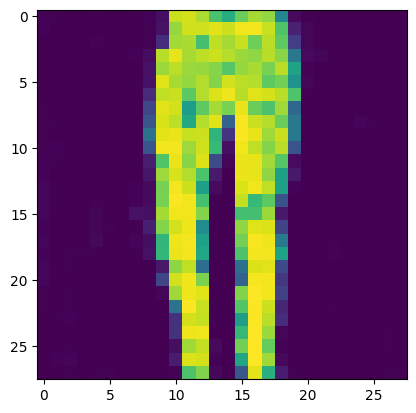

Dloss:  0.5425758
Gloss:  0.73777276
Dloss:  0.5426498
Gloss:  0.7376906
Dloss:  0.542726
Gloss:  0.7378397
Dloss:  0.54280454
Gloss:  0.73775387
Dloss:  0.5428787
Gloss:  0.7378929
Dloss:  0.5429556
Gloss:  0.7377925
Dloss:  0.5430334
Gloss:  0.73796374
Dloss:  0.5431152
Gloss:  0.73786247
Dloss:  0.54319215
Gloss:  0.7380129
Dloss:  0.54326904
Gloss:  0.7379172
Dloss:  0.54334813
Gloss:  0.73809206
Dloss:  0.54342663
Gloss:  0.7379916
Dloss:  0.54350114
Gloss:  0.73813266
Dloss:  0.54357547
Gloss:  0.73805434
Dloss:  0.543645
Gloss:  0.7381657
Dloss:  0.5437153
Gloss:  0.7381156
Dloss:  0.5437864
Gloss:  0.7382145
Dloss:  0.54385585
Gloss:  0.7381542
Dloss:  0.5439216
Gloss:  0.7382399
Dloss:  0.54399204
Gloss:  0.7382182
Dloss:  0.54405385
Gloss:  0.7382473
Dloss:  0.5441195
Gloss:  0.73823684
Dloss:  0.5441846
Gloss:  0.7383
Dloss:  0.54425967
Gloss:  0.73828554
Dloss:  0.5443172
Gloss:  0.73833483
Dloss:  0.54438245
Gloss:  0.7382998
Dloss:  0.5444479
Gloss:  0.7384065
Dloss:  0.5

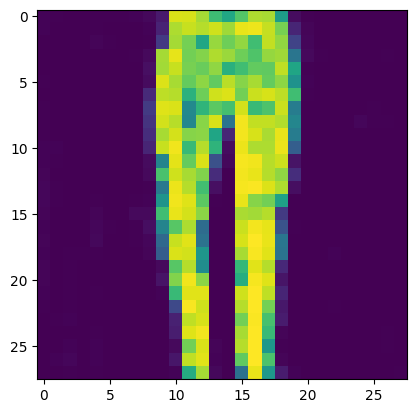

Dloss:  0.5447483
Gloss:  0.73857933
Dloss:  0.5448311
Gloss:  0.73846203
Dloss:  0.544905
Gloss:  0.7386213
Dloss:  0.5449845
Gloss:  0.73853356
Dloss:  0.54505867
Gloss:  0.7386673
Dloss:  0.5451294
Gloss:  0.73859125
Dloss:  0.54519755
Gloss:  0.73868054
Dloss:  0.54526544
Gloss:  0.73863685
Dloss:  0.5453292
Gloss:  0.73870283
Dloss:  0.5453953
Gloss:  0.73868185
Dloss:  0.5454589
Gloss:  0.73874134
Dloss:  0.5455285
Gloss:  0.73870134
Dloss:  0.5455943
Gloss:  0.73879063
Dloss:  0.54566646
Gloss:  0.7387156
Dloss:  0.54573846
Gloss:  0.7388418
Dloss:  0.54580814
Gloss:  0.7387754
Dloss:  0.54587984
Gloss:  0.73890656
Dloss:  0.5459488
Gloss:  0.73882747
Dloss:  0.5460194
Gloss:  0.73898005
Dloss:  0.5460905
Gloss:  0.73888654
Dloss:  0.5461656
Gloss:  0.7390218
Dloss:  0.54623544
Gloss:  0.73892033
Dloss:  0.546312
Gloss:  0.7390665
Dloss:  0.54638255
Gloss:  0.7389766
Dloss:  0.5464563
Gloss:  0.73911285
Dloss:  0.54652965
Gloss:  0.73903674
Dloss:  0.54660517
Gloss:  0.7391832
D

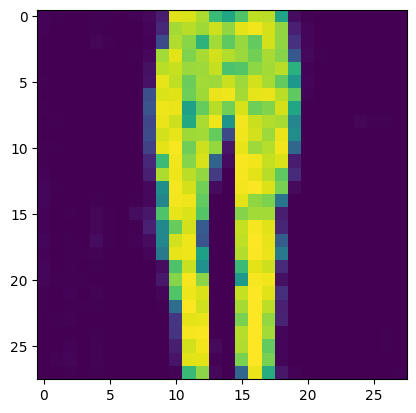

Dloss:  0.5468806
Gloss:  0.73922324
Dloss:  0.5469426
Gloss:  0.73920166
Dloss:  0.54700893
Gloss:  0.73924977
Dloss:  0.547071
Gloss:  0.7392276
Dloss:  0.5471327
Gloss:  0.7392826
Dloss:  0.5471976
Gloss:  0.7392633
Dloss:  0.5472574
Gloss:  0.7393223
Dloss:  0.54732025
Gloss:  0.739274
Dloss:  0.5473864
Gloss:  0.7393742
Dloss:  0.54745704
Gloss:  0.7393233
Dloss:  0.54752016
Gloss:  0.7394047
Dloss:  0.54758376
Gloss:  0.7393442
Dloss:  0.54764414
Gloss:  0.7394479
Dloss:  0.5477089
Gloss:  0.73936796
Dloss:  0.5477797
Gloss:  0.73952246
13 / 100
Dloss:  0.54785055
Gloss:  0.73940617
13 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


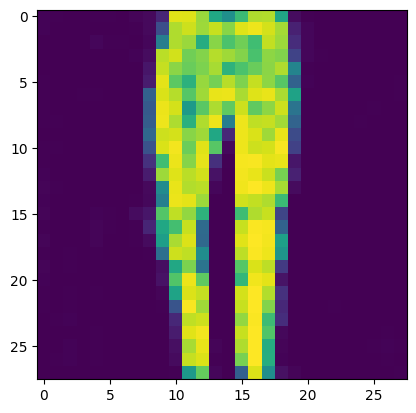

Dloss:  0.54792184
Gloss:  0.7395912
Dloss:  0.5480024
Gloss:  0.7394823
Dloss:  0.54807544
Gloss:  0.7396296
Dloss:  0.548151
Gloss:  0.7395367
Dloss:  0.5482179
Gloss:  0.7396465
Dloss:  0.5482815
Gloss:  0.73959035
Dloss:  0.54834604
Gloss:  0.7396727
Dloss:  0.54841214
Gloss:  0.73962873
Dloss:  0.5484721
Gloss:  0.7397158
Dloss:  0.5485366
Gloss:  0.7396948
Dloss:  0.5485961
Gloss:  0.7397377
Dloss:  0.5486557
Gloss:  0.73972404
Dloss:  0.54871726
Gloss:  0.7397657
Dloss:  0.54878163
Gloss:  0.7397604
Dloss:  0.5488421
Gloss:  0.7397985
Dloss:  0.5489038
Gloss:  0.7398008
Dloss:  0.54896265
Gloss:  0.7398357
Dloss:  0.5490203
Gloss:  0.73981595
Dloss:  0.5490784
Gloss:  0.7398733
Dloss:  0.5491398
Gloss:  0.73985523
Dloss:  0.5492022
Gloss:  0.7399327
Dloss:  0.549261
Gloss:  0.73987395
Dloss:  0.5493255
Gloss:  0.7400003
Dloss:  0.5493938
Gloss:  0.7398646
Dloss:  0.5494704
Gloss:  0.7401154
Dloss:  0.54956436
Gloss:  0.7399448
Dloss:  0.54966253
Gloss:  0.7401809
Dloss:  0.54974

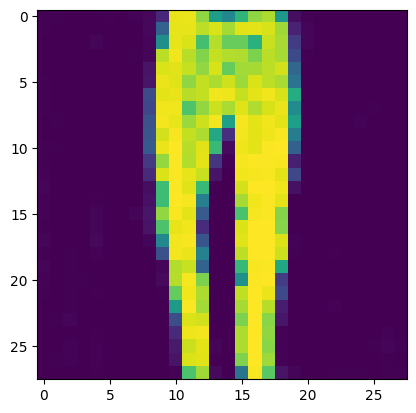

Dloss:  0.54996127
Gloss:  0.74021006
Dloss:  0.55002284
Gloss:  0.7401942
Dloss:  0.5500838
Gloss:  0.74024576
Dloss:  0.55014604
Gloss:  0.74021375
Dloss:  0.5502018
Gloss:  0.740275
Dloss:  0.5502608
Gloss:  0.740251
Dloss:  0.5503227
Gloss:  0.74031764
Dloss:  0.5503823
Gloss:  0.74029535
Dloss:  0.55044436
Gloss:  0.74036914
Dloss:  0.55050534
Gloss:  0.74030745
Dloss:  0.55056685
Gloss:  0.74042326
Dloss:  0.5506268
Gloss:  0.74035716
Dloss:  0.5506929
Gloss:  0.74046075
Dloss:  0.55076015
Gloss:  0.7404237
Dloss:  0.55082524
Gloss:  0.7404935
Dloss:  0.5508823
Gloss:  0.7404646
Dloss:  0.55094975
Gloss:  0.7405444
Dloss:  0.55101043
Gloss:  0.7405119
Dloss:  0.55107343
Gloss:  0.7405857
Dloss:  0.5511294
Gloss:  0.7405629
Dloss:  0.55119216
Gloss:  0.740624
Dloss:  0.5512501
Gloss:  0.7405681
Dloss:  0.5513133
Gloss:  0.74068785
Dloss:  0.5513761
Gloss:  0.74061334
Dloss:  0.5514383
Gloss:  0.74072725
Dloss:  0.55149907
Gloss:  0.7406446
Dloss:  0.55156606
Gloss:  0.74077266
Dlo

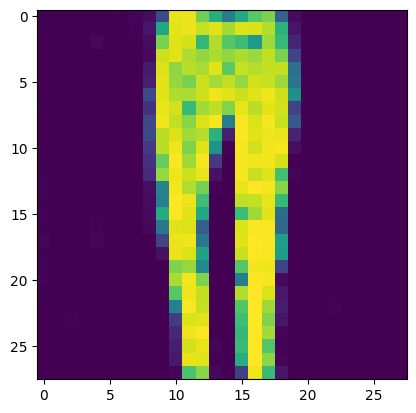

Dloss:  0.55182874
Gloss:  0.74087334
Dloss:  0.55190146
Gloss:  0.7407966
Dloss:  0.5519618
Gloss:  0.74088216
Dloss:  0.5520178
Gloss:  0.740828
Dloss:  0.5520757
Gloss:  0.7409071
Dloss:  0.55213976
Gloss:  0.7408494
Dloss:  0.55219704
Gloss:  0.7409368
Dloss:  0.55225646
Gloss:  0.74088085
Dloss:  0.55231535
Gloss:  0.7409752
Dloss:  0.55237603
Gloss:  0.740902
Dloss:  0.55243474
Gloss:  0.7410202
Dloss:  0.5524989
Gloss:  0.7409305
Dloss:  0.55256337
Gloss:  0.7410706
Dloss:  0.55263436
Gloss:  0.7410003
Dloss:  0.5527051
Gloss:  0.74111307
Dloss:  0.5527638
Gloss:  0.7410442
Dloss:  0.5528282
Gloss:  0.7411662
Dloss:  0.5528927
Gloss:  0.7410869
Dloss:  0.5529509
Gloss:  0.7411895
Dloss:  0.55301505
Gloss:  0.7411334
Dloss:  0.5530763
Gloss:  0.7412233
Dloss:  0.5531352
Gloss:  0.74116117
Dloss:  0.5531937
Gloss:  0.7412391
Dloss:  0.55325484
Gloss:  0.7411829
Dloss:  0.5533082
Gloss:  0.74127936
Dloss:  0.5533688
Gloss:  0.7412057
Dloss:  0.5534248
Gloss:  0.74131805
Dloss:  0.5

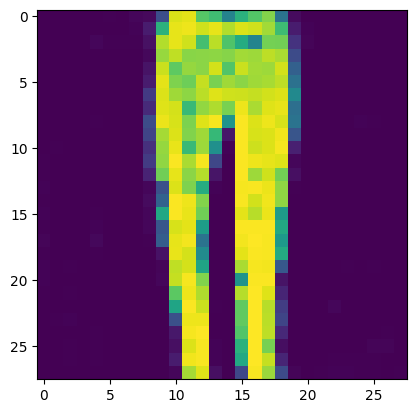

Dloss:  0.55366987
Gloss:  0.7414045
Dloss:  0.5537305
Gloss:  0.7413378
Dloss:  0.5537857
Gloss:  0.7414613
Dloss:  0.5538509
Gloss:  0.7413679
Dloss:  0.5539151
Gloss:  0.7415165
Dloss:  0.55398065
Gloss:  0.74142176
Dloss:  0.5540484
Gloss:  0.7415504
Dloss:  0.55411077
Gloss:  0.7414806
Dloss:  0.55417264
Gloss:  0.741595
Dloss:  0.5542341
Gloss:  0.74152845
Dloss:  0.5542922
Gloss:  0.7416221
Dloss:  0.55435055
Gloss:  0.74156034
Dloss:  0.5544114
Gloss:  0.7416761
Dloss:  0.55447835
Gloss:  0.7415858
Dloss:  0.5545438
Gloss:  0.7416892
Dloss:  0.55460113
Gloss:  0.74163866
Dloss:  0.55465454
Gloss:  0.74169403
Dloss:  0.55470794
Gloss:  0.74167806
Dloss:  0.55475795
Gloss:  0.7417293
Dloss:  0.5548129
Gloss:  0.74172115
Dloss:  0.554872
Gloss:  0.7417541
Dloss:  0.5549223
Gloss:  0.7417466
Dloss:  0.55498034
Gloss:  0.7418077
Dloss:  0.55503154
Gloss:  0.7417561
Dloss:  0.55508816
Gloss:  0.7418523
Dloss:  0.55514264
Gloss:  0.74177927
Dloss:  0.55520195
Gloss:  0.74190557
Dloss:

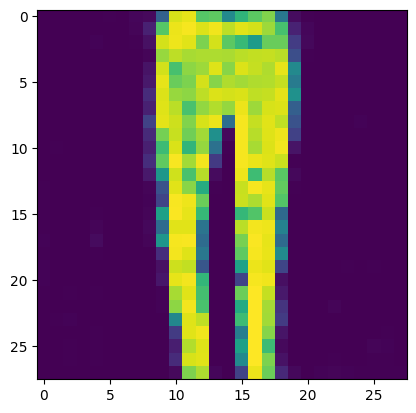

Dloss:  0.55544156
Gloss:  0.74197793
Dloss:  0.5555005
Gloss:  0.74191654
Dloss:  0.55555975
Gloss:  0.74202484
Dloss:  0.5556167
Gloss:  0.74193966
Dloss:  0.55567586
Gloss:  0.74207103
Dloss:  0.555739
Gloss:  0.74196404
Dloss:  0.5558026
Gloss:  0.7421194
Dloss:  0.5558659
Gloss:  0.742009
Dloss:  0.55593413
Gloss:  0.74216855
Dloss:  0.5560036
Gloss:  0.7420973
Dloss:  0.55606467
Gloss:  0.74218196
Dloss:  0.55612123
Gloss:  0.7421429
Dloss:  0.5561755
Gloss:  0.7422116
Dloss:  0.55623174
Gloss:  0.74215925
Dloss:  0.55629086
Gloss:  0.74225295
14 / 100
Dloss:  0.5563476
Gloss:  0.74220526
14 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


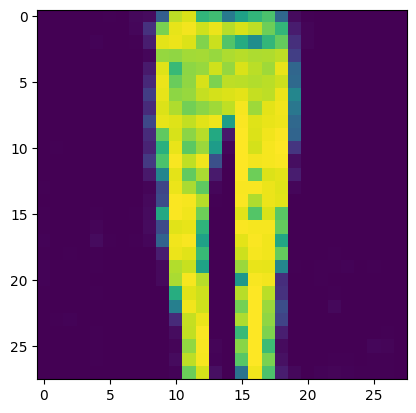

Dloss:  0.55639654
Gloss:  0.74225926
Dloss:  0.55645204
Gloss:  0.7422335
Dloss:  0.55650353
Gloss:  0.742282
Dloss:  0.5565577
Gloss:  0.7422591
Dloss:  0.5566113
Gloss:  0.74231815
Dloss:  0.55666155
Gloss:  0.7422816
Dloss:  0.5567119
Gloss:  0.74232984
Dloss:  0.5567656
Gloss:  0.7423082
Dloss:  0.55681336
Gloss:  0.7423564
Dloss:  0.55686456
Gloss:  0.7423556
Dloss:  0.5569145
Gloss:  0.7423663
Dloss:  0.55696803
Gloss:  0.7423917
Dloss:  0.5570189
Gloss:  0.7423822
Dloss:  0.5570757
Gloss:  0.7424271
Dloss:  0.5571281
Gloss:  0.7424013
Dloss:  0.5571811
Gloss:  0.7424592
Dloss:  0.5572341
Gloss:  0.74242043
Dloss:  0.55728203
Gloss:  0.7424886
Dloss:  0.5573349
Gloss:  0.7424554
Dloss:  0.5573864
Gloss:  0.7425523
Dloss:  0.5574442
Gloss:  0.7424683
Dloss:  0.5575041
Gloss:  0.74262315
Dloss:  0.557568
Gloss:  0.74250644
Dloss:  0.5576342
Gloss:  0.74267435
Dloss:  0.5576954
Gloss:  0.7425553
Dloss:  0.55776876
Gloss:  0.7427611
Dloss:  0.5578412
Gloss:  0.7426449
Dloss:  0.5579

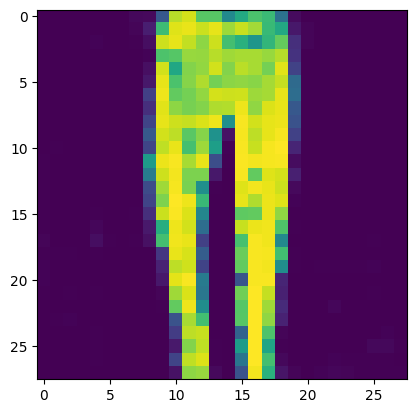

Dloss:  0.5581008
Gloss:  0.7427691
Dloss:  0.558161
Gloss:  0.74283
Dloss:  0.5582159
Gloss:  0.7428223
Dloss:  0.55826676
Gloss:  0.7428261
Dloss:  0.55831397
Gloss:  0.7428276
Dloss:  0.55836403
Gloss:  0.74283445
Dloss:  0.5584215
Gloss:  0.7428744
Dloss:  0.55847466
Gloss:  0.7428805
Dloss:  0.5585226
Gloss:  0.7429036
Dloss:  0.5585765
Gloss:  0.7428821
Dloss:  0.55862415
Gloss:  0.74292946
Dloss:  0.558672
Gloss:  0.742913
Dloss:  0.55872107
Gloss:  0.74295664
Dloss:  0.5587695
Gloss:  0.74295455
Dloss:  0.5588187
Gloss:  0.7429735
Dloss:  0.55886674
Gloss:  0.74299985
Dloss:  0.5589151
Gloss:  0.7429871
Dloss:  0.55896467
Gloss:  0.7430204
Dloss:  0.5590145
Gloss:  0.7429968
Dloss:  0.5590619
Gloss:  0.7430849
Dloss:  0.55911255
Gloss:  0.74302393
Dloss:  0.55916494
Gloss:  0.7431398
Dloss:  0.5592256
Gloss:  0.74306226
Dloss:  0.5592802
Gloss:  0.74315685
Dloss:  0.5593341
Gloss:  0.7430895
Dloss:  0.55938685
Gloss:  0.74319404
Dloss:  0.55944157
Gloss:  0.74311554
Dloss:  0.5

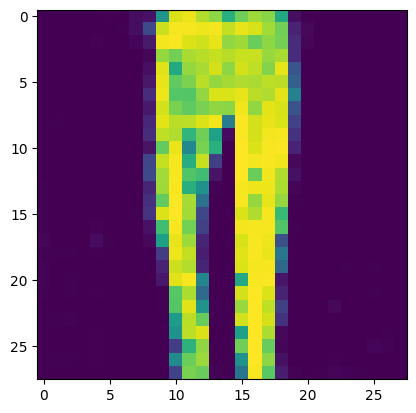

Dloss:  0.5596694
Gloss:  0.74319905
Dloss:  0.55973387
Gloss:  0.74337083
Dloss:  0.559798
Gloss:  0.7432617
Dloss:  0.55986047
Gloss:  0.7434074
Dloss:  0.559924
Gloss:  0.74332887
Dloss:  0.5599802
Gloss:  0.7434191
Dloss:  0.56003153
Gloss:  0.74336785
Dloss:  0.5600795
Gloss:  0.74343204
Dloss:  0.56013024
Gloss:  0.7434084
Dloss:  0.5601789
Gloss:  0.7434355
Dloss:  0.5602236
Gloss:  0.74343735
Dloss:  0.5602716
Gloss:  0.74346226
Dloss:  0.56032073
Gloss:  0.7434855
Dloss:  0.5603696
Gloss:  0.74348
Dloss:  0.5604172
Gloss:  0.7435172
Dloss:  0.5604653
Gloss:  0.74351054
Dloss:  0.56051356
Gloss:  0.7435461
Dloss:  0.56055987
Gloss:  0.74352294
Dloss:  0.5606097
Gloss:  0.7436006
Dloss:  0.56066406
Gloss:  0.7435588
Dloss:  0.560713
Gloss:  0.74362695
Dloss:  0.56076497
Gloss:  0.7435671
Dloss:  0.56081873
Gloss:  0.74369687
Dloss:  0.5608775
Gloss:  0.7435829
Dloss:  0.5609377
Gloss:  0.7437598
Dloss:  0.5610059
Gloss:  0.7436192
Dloss:  0.56108356
Gloss:  0.7438479
Dloss:  0.5

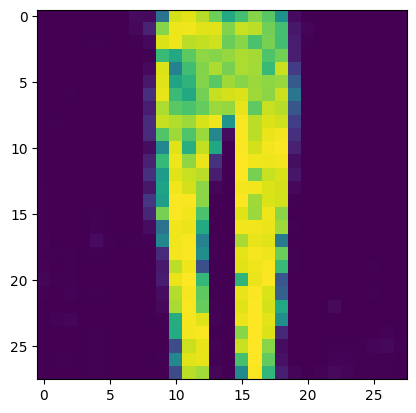

Dloss:  0.5613398
Gloss:  0.74386835
Dloss:  0.56139135
Gloss:  0.7438236
Dloss:  0.56143403
Gloss:  0.7438895
Dloss:  0.56148946
Gloss:  0.74386275
Dloss:  0.561535
Gloss:  0.7438853
Dloss:  0.5615838
Gloss:  0.74389374
Dloss:  0.5616322
Gloss:  0.74391645
Dloss:  0.561676
Gloss:  0.7439047
Dloss:  0.56172293
Gloss:  0.74394083
Dloss:  0.5617711
Gloss:  0.7439106
Dloss:  0.56181574
Gloss:  0.74395245
Dloss:  0.5618643
Gloss:  0.74390864
Dloss:  0.5619188
Gloss:  0.7440233
Dloss:  0.5619794
Gloss:  0.7439113
Dloss:  0.5620421
Gloss:  0.74406636
Dloss:  0.56210244
Gloss:  0.74398035
Dloss:  0.5621575
Gloss:  0.7440933
Dloss:  0.56221265
Gloss:  0.7440358
Dloss:  0.5622646
Gloss:  0.7441231
Dloss:  0.56231475
Gloss:  0.7440668
Dloss:  0.5623665
Gloss:  0.74413896
Dloss:  0.5624135
Gloss:  0.74408305
Dloss:  0.5624645
Gloss:  0.7441557
Dloss:  0.5625107
Gloss:  0.7441089
Dloss:  0.5625604
Gloss:  0.7441683
Dloss:  0.56260604
Gloss:  0.74412704
Dloss:  0.56265634
Gloss:  0.744225
Dloss:  0

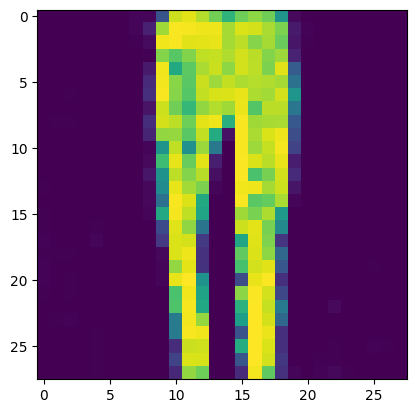

Dloss:  0.5628626
Gloss:  0.7442822
Dloss:  0.56291384
Gloss:  0.74423015
Dloss:  0.56296813
Gloss:  0.7443343
Dloss:  0.5630212
Gloss:  0.74425805
Dloss:  0.5630751
Gloss:  0.744372
Dloss:  0.5631301
Gloss:  0.74429667
Dloss:  0.5631824
Gloss:  0.7443919
Dloss:  0.56323457
Gloss:  0.74432087
Dloss:  0.5632883
Gloss:  0.74442095
Dloss:  0.5633426
Gloss:  0.74436307
Dloss:  0.5633901
Gloss:  0.7444211
Dloss:  0.5634392
Gloss:  0.7443973
Dloss:  0.56348455
Gloss:  0.7444349
Dloss:  0.5635375
Gloss:  0.74440974
Dloss:  0.56358397
Gloss:  0.7444567
15 / 100
Dloss:  0.5636283
Gloss:  0.7444437
15 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


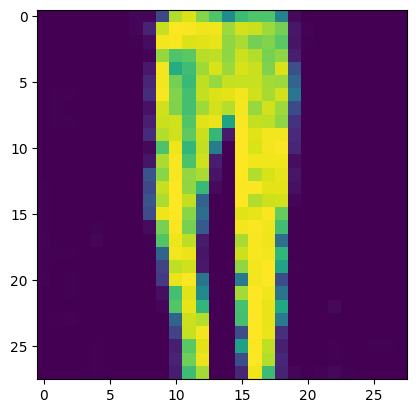

Dloss:  0.5636723
Gloss:  0.74448234
Dloss:  0.5637204
Gloss:  0.74447095
Dloss:  0.5637652
Gloss:  0.7445055
Dloss:  0.5638112
Gloss:  0.7444829
Dloss:  0.5638563
Gloss:  0.74451447
Dloss:  0.5638982
Gloss:  0.74449027
Dloss:  0.5639452
Gloss:  0.74454814
Dloss:  0.56399095
Gloss:  0.7445136
Dloss:  0.56403685
Gloss:  0.7445927
Dloss:  0.5640837
Gloss:  0.744555
Dloss:  0.5641283
Gloss:  0.744598
Dloss:  0.56417567
Gloss:  0.74456877
Dloss:  0.5642204
Gloss:  0.74463236
Dloss:  0.5642662
Gloss:  0.74457115
Dloss:  0.56431437
Gloss:  0.7446936
Dloss:  0.5643675
Gloss:  0.7445913
Dloss:  0.56442696
Gloss:  0.74476767
Dloss:  0.5644902
Gloss:  0.7446444
Dloss:  0.56455684
Gloss:  0.74484426
Dloss:  0.5646241
Gloss:  0.744721
Dloss:  0.5646864
Gloss:  0.7448675
Dloss:  0.564746
Gloss:  0.7447858
Dloss:  0.5648021
Gloss:  0.74488705
Dloss:  0.56485313
Gloss:  0.74483305
Dloss:  0.5648972
Gloss:  0.7449005
Dloss:  0.5649438
Gloss:  0.74487865
Dloss:  0.56498885
Gloss:  0.74493074
Dloss:  0.

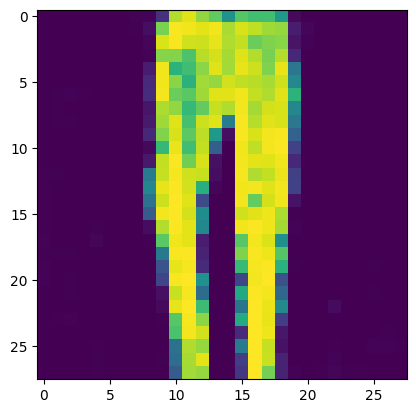

Dloss:  0.5651695
Gloss:  0.74500185
Dloss:  0.56522185
Gloss:  0.74496245
Dloss:  0.56526715
Gloss:  0.7450309
Dloss:  0.5653157
Gloss:  0.7449786
Dloss:  0.56535935
Gloss:  0.7450578
Dloss:  0.5654056
Gloss:  0.74500364
Dloss:  0.5654535
Gloss:  0.7450875
Dloss:  0.5655012
Gloss:  0.7450443
Dloss:  0.56555206
Gloss:  0.745125
Dloss:  0.5656013
Gloss:  0.74506027
Dloss:  0.5656461
Gloss:  0.74516183
Dloss:  0.56569105
Gloss:  0.74510515
Dloss:  0.5657381
Gloss:  0.7451811
Dloss:  0.5657827
Gloss:  0.74514717
Dloss:  0.5658254
Gloss:  0.74521863
Dloss:  0.5658701
Gloss:  0.7451921
Dloss:  0.56591606
Gloss:  0.7452362
Dloss:  0.56595993
Gloss:  0.74522233
Dloss:  0.56600404
Gloss:  0.7452499
Dloss:  0.5660453
Gloss:  0.7452546
Dloss:  0.5660877
Gloss:  0.7452629
Dloss:  0.5661276
Gloss:  0.7452572
Dloss:  0.5661731
Gloss:  0.7452937
Dloss:  0.5662172
Gloss:  0.745276
Dloss:  0.56625754
Gloss:  0.74530464
Dloss:  0.5662974
Gloss:  0.745297
Dloss:  0.56634337
Gloss:  0.7453267
Dloss:  0.5

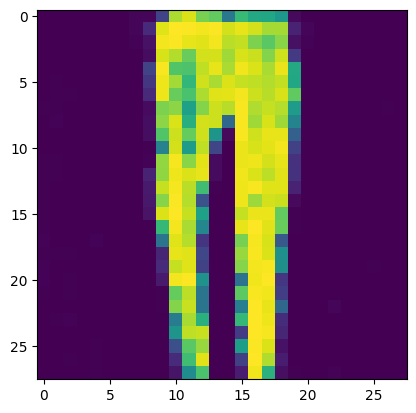

Dloss:  0.56652355
Gloss:  0.74546796
Dloss:  0.566582
Gloss:  0.7453332
Dloss:  0.5666515
Gloss:  0.7455844
Dloss:  0.5667328
Gloss:  0.7454447
Dloss:  0.5668
Gloss:  0.74562097
Dloss:  0.5668635
Gloss:  0.7455453
Dloss:  0.5669107
Gloss:  0.74562407
Dloss:  0.56696004
Gloss:  0.7455963
Dloss:  0.56700385
Gloss:  0.7456345
Dloss:  0.56704307
Gloss:  0.745619
Dloss:  0.5670818
Gloss:  0.7456737
Dloss:  0.567125
Gloss:  0.74564564
Dloss:  0.5671671
Gloss:  0.74569744
Dloss:  0.5672152
Gloss:  0.7456787
Dloss:  0.5672579
Gloss:  0.74570477
Dloss:  0.56729496
Gloss:  0.7457026
Dloss:  0.5673381
Gloss:  0.7457394
Dloss:  0.5673802
Gloss:  0.7457273
Dloss:  0.567423
Gloss:  0.7457738
Dloss:  0.5674675
Gloss:  0.7457582
Dloss:  0.5675077
Gloss:  0.74577796
Dloss:  0.56754863
Gloss:  0.74575436
Dloss:  0.5675931
Gloss:  0.7458137
Dloss:  0.56764
Gloss:  0.7457817
Dloss:  0.56767905
Gloss:  0.74584997
Dloss:  0.5677241
Gloss:  0.74579924
Dloss:  0.5677682
Gloss:  0.74589926
Dloss:  0.56781524


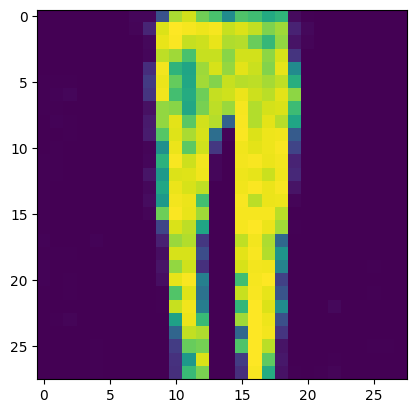

Dloss:  0.5679678
Gloss:  0.7459997
Dloss:  0.5680214
Gloss:  0.74590355
Dloss:  0.5680697
Gloss:  0.7460325
Dloss:  0.5681219
Gloss:  0.7459562
Dloss:  0.56816995
Gloss:  0.74605936
Dloss:  0.5682186
Gloss:  0.74598795
Dloss:  0.5682676
Gloss:  0.7460855
Dloss:  0.5683127
Gloss:  0.7460173
Dloss:  0.5683635
Gloss:  0.7461274
Dloss:  0.56841886
Gloss:  0.746056
Dloss:  0.56846815
Gloss:  0.74613285
Dloss:  0.5685132
Gloss:  0.7460767
Dloss:  0.56855917
Gloss:  0.7461451
Dloss:  0.56860477
Gloss:  0.7460747
Dloss:  0.568656
Gloss:  0.7461734
Dloss:  0.56870145
Gloss:  0.7461184
Dloss:  0.5687479
Gloss:  0.7461995
Dloss:  0.5687937
Gloss:  0.7461517
Dloss:  0.5688358
Gloss:  0.74621123
Dloss:  0.5688791
Gloss:  0.7461814
Dloss:  0.5689221
Gloss:  0.7462091
Dloss:  0.5689609
Gloss:  0.7461938
Dloss:  0.5690034
Gloss:  0.7462211
Dloss:  0.5690396
Gloss:  0.7462139
Dloss:  0.5690783
Gloss:  0.74623185
Dloss:  0.569119
Gloss:  0.7462442
Dloss:  0.5691612
Gloss:  0.7462618
Dloss:  0.56920177


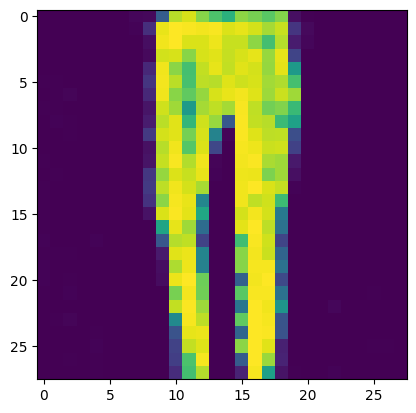

Dloss:  0.56932133
Gloss:  0.74629277
Dloss:  0.5693616
Gloss:  0.746277
Dloss:  0.5694045
Gloss:  0.74631524
Dloss:  0.5694447
Gloss:  0.7462808
Dloss:  0.56948394
Gloss:  0.74633574
Dloss:  0.5695264
Gloss:  0.74628896
Dloss:  0.56956667
Gloss:  0.7463731
Dloss:  0.5696075
Gloss:  0.7462931
Dloss:  0.5696548
Gloss:  0.7464343
Dloss:  0.56970924
Gloss:  0.74631524
Dloss:  0.5697686
Gloss:  0.7464864
Dloss:  0.56982964
Gloss:  0.7463755
Dloss:  0.5698811
Gloss:  0.7464917
Dloss:  0.5699302
Gloss:  0.74641615
Dloss:  0.56997836
Gloss:  0.74650073
16 / 100
Dloss:  0.570022
Gloss:  0.74644977
16 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


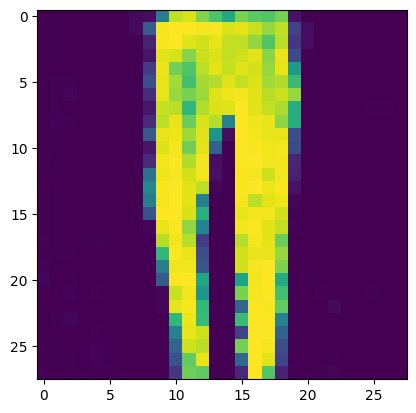

Dloss:  0.5700631
Gloss:  0.74652153
Dloss:  0.57010484
Gloss:  0.7464665
Dloss:  0.5701481
Gloss:  0.74654216
Dloss:  0.5701915
Gloss:  0.74649423
Dloss:  0.57023543
Gloss:  0.74657106
Dloss:  0.57027805
Gloss:  0.7465079
Dloss:  0.5703208
Gloss:  0.7465911
Dloss:  0.5703676
Gloss:  0.7465291
Dloss:  0.5704096
Gloss:  0.7466015
Dloss:  0.57045287
Gloss:  0.74656343
Dloss:  0.57049316
Gloss:  0.7466398
Dloss:  0.57053566
Gloss:  0.7465854
Dloss:  0.5705752
Gloss:  0.7466681
Dloss:  0.57062227
Gloss:  0.7466028
Dloss:  0.5706676
Gloss:  0.7466979
Dloss:  0.57071215
Gloss:  0.7466366
Dloss:  0.5707547
Gloss:  0.74672484
Dloss:  0.57079566
Gloss:  0.7466688
Dloss:  0.57083863
Gloss:  0.7467544
Dloss:  0.5708819
Gloss:  0.74669
Dloss:  0.5709229
Gloss:  0.7467873
Dloss:  0.5709672
Gloss:  0.7467094
Dloss:  0.57101494
Gloss:  0.74682266
Dloss:  0.57106626
Gloss:  0.746711
Dloss:  0.5711188
Gloss:  0.74686974
Dloss:  0.57117236
Gloss:  0.74676555
Dloss:  0.5712299
Gloss:  0.7468858
Dloss:  0

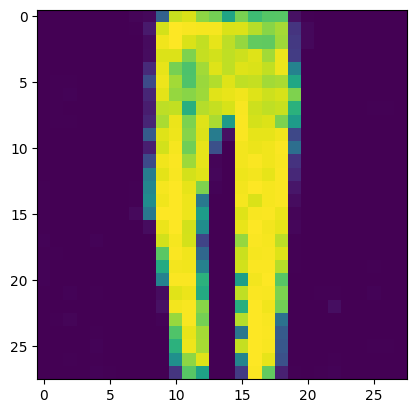

Dloss:  0.57140875
Gloss:  0.74692184
Dloss:  0.5714494
Gloss:  0.74689734
Dloss:  0.57148606
Gloss:  0.74692893
Dloss:  0.57152617
Gloss:  0.746912
Dloss:  0.57156676
Gloss:  0.74694145
Dloss:  0.5716066
Gloss:  0.74692816
Dloss:  0.571644
Gloss:  0.7469576
Dloss:  0.5716807
Gloss:  0.7469466
Dloss:  0.57172173
Gloss:  0.74700576
Dloss:  0.57176685
Gloss:  0.7469724
Dloss:  0.5718056
Gloss:  0.747042
Dloss:  0.5718451
Gloss:  0.74702334
Dloss:  0.57188314
Gloss:  0.7470667
Dloss:  0.5719197
Gloss:  0.7470494
Dloss:  0.57195574
Gloss:  0.7470882
Dloss:  0.57199574
Gloss:  0.7470628
Dloss:  0.5720338
Gloss:  0.74710435
Dloss:  0.57207185
Gloss:  0.7470805
Dloss:  0.5721115
Gloss:  0.7471352
Dloss:  0.5721467
Gloss:  0.7470922
Dloss:  0.5721882
Gloss:  0.7471618
Dloss:  0.5722284
Gloss:  0.747082
Dloss:  0.5722779
Gloss:  0.74720895
Dloss:  0.57232803
Gloss:  0.7471215
Dloss:  0.57237804
Gloss:  0.74724895
Dloss:  0.57242656
Gloss:  0.74716085
Dloss:  0.57247853
Gloss:  0.74728066
Dloss:

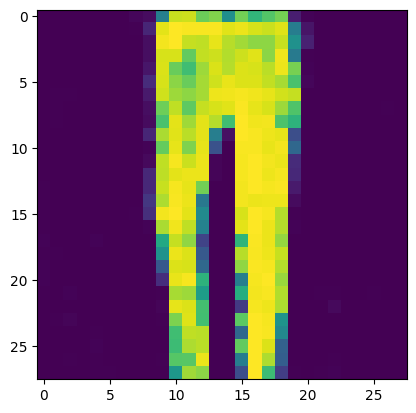

Dloss:  0.5726457
Gloss:  0.74730563
Dloss:  0.5726828
Gloss:  0.74728155
Dloss:  0.5727175
Gloss:  0.74733377
Dloss:  0.5727583
Gloss:  0.74730086
Dloss:  0.5727962
Gloss:  0.7473379
Dloss:  0.5728344
Gloss:  0.747306
Dloss:  0.57286954
Gloss:  0.7473506
Dloss:  0.5729094
Gloss:  0.7473468
Dloss:  0.5729461
Gloss:  0.74737734
Dloss:  0.5729809
Gloss:  0.7473522
Dloss:  0.57301843
Gloss:  0.7474177
Dloss:  0.5730593
Gloss:  0.7473886
Dloss:  0.57309747
Gloss:  0.74745214
Dloss:  0.5731372
Gloss:  0.7473921
Dloss:  0.5731806
Gloss:  0.7475004
Dloss:  0.5732229
Gloss:  0.7474209
Dloss:  0.57327056
Gloss:  0.74754333
Dloss:  0.5733173
Gloss:  0.74743825
Dloss:  0.57336795
Gloss:  0.74758434
Dloss:  0.57342076
Gloss:  0.74749947
Dloss:  0.57347035
Gloss:  0.7475977
Dloss:  0.5735145
Gloss:  0.74753964
Dloss:  0.5735573
Gloss:  0.7476301
Dloss:  0.57360286
Gloss:  0.74758786
Dloss:  0.57363623
Gloss:  0.74763983
Dloss:  0.5736737
Gloss:  0.7476241
Dloss:  0.5737108
Gloss:  0.74766856
Dloss:

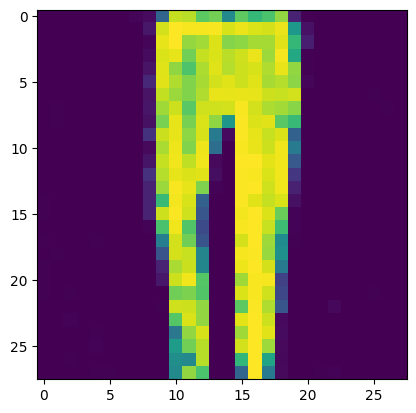

Dloss:  0.57385314
Gloss:  0.7477168
Dloss:  0.5738929
Gloss:  0.74767673
Dloss:  0.573927
Gloss:  0.7477388
Dloss:  0.5739661
Gloss:  0.74769527
Dloss:  0.5740047
Gloss:  0.7477843
Dloss:  0.5740433
Gloss:  0.7477063
Dloss:  0.57409
Gloss:  0.74782777
Dloss:  0.5741388
Gloss:  0.74774003
Dloss:  0.57418543
Gloss:  0.7478486
Dloss:  0.57423174
Gloss:  0.7477758
Dloss:  0.5742812
Gloss:  0.74788857
Dloss:  0.5743275
Gloss:  0.74781334
Dloss:  0.57437336
Gloss:  0.7479268
Dloss:  0.57442224
Gloss:  0.7478374
Dloss:  0.57447195
Gloss:  0.7479357
Dloss:  0.5745156
Gloss:  0.7478836
Dloss:  0.57455367
Gloss:  0.7479317
Dloss:  0.5745919
Gloss:  0.74791217
Dloss:  0.5746279
Gloss:  0.74795
Dloss:  0.57466334
Gloss:  0.7479408
Dloss:  0.57470006
Gloss:  0.74794596
Dloss:  0.5747351
Gloss:  0.74796134
Dloss:  0.5747742
Gloss:  0.7479597
Dloss:  0.57480615
Gloss:  0.7479689
Dloss:  0.5748423
Gloss:  0.74797595
Dloss:  0.57487416
Gloss:  0.7479776
Dloss:  0.5749116
Gloss:  0.7480062
Dloss:  0.57

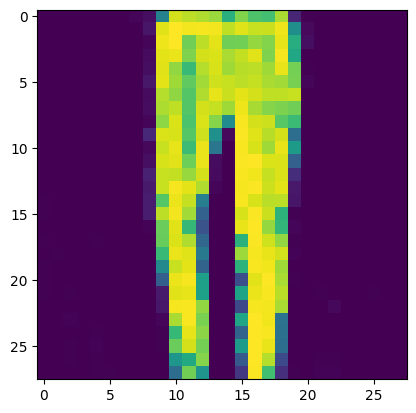

Dloss:  0.5750543
Gloss:  0.7480389
Dloss:  0.5750889
Gloss:  0.748015
Dloss:  0.57512754
Gloss:  0.74804646
Dloss:  0.57516325
Gloss:  0.7480131
Dloss:  0.57519907
Gloss:  0.7480563
Dloss:  0.5752315
Gloss:  0.7480219
Dloss:  0.57526904
Gloss:  0.74810034
Dloss:  0.5753079
Gloss:  0.7480303
Dloss:  0.5753525
Gloss:  0.7481458
Dloss:  0.5753967
Gloss:  0.7480622
Dloss:  0.57544166
Gloss:  0.7481803
Dloss:  0.5754869
Gloss:  0.7480923
Dloss:  0.5755314
Gloss:  0.74821234
Dloss:  0.5755772
Gloss:  0.7481296
Dloss:  0.5756201
Gloss:  0.74823236
17 / 100
Dloss:  0.5756622
Gloss:  0.7481744
17 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


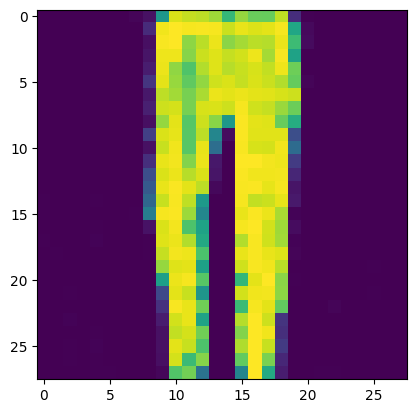

Dloss:  0.57570165
Gloss:  0.74825567
Dloss:  0.5757458
Gloss:  0.7482128
Dloss:  0.57578474
Gloss:  0.74828327
Dloss:  0.5758233
Gloss:  0.7482469
Dloss:  0.575858
Gloss:  0.748298
Dloss:  0.5758934
Gloss:  0.7482621
Dloss:  0.5759288
Gloss:  0.74830985
Dloss:  0.5759674
Gloss:  0.7482784
Dloss:  0.57600296
Gloss:  0.7483243
Dloss:  0.5760397
Gloss:  0.74831486
Dloss:  0.57607
Gloss:  0.7483357
Dloss:  0.5761043
Gloss:  0.7483343
Dloss:  0.5761365
Gloss:  0.74834746
Dloss:  0.5761689
Gloss:  0.7483394
Dloss:  0.5762014
Gloss:  0.7483658
Dloss:  0.5762379
Gloss:  0.74836916
Dloss:  0.5762732
Gloss:  0.7483705
Dloss:  0.57630426
Gloss:  0.7483729
Dloss:  0.5763363
Gloss:  0.74838567
Dloss:  0.57636845
Gloss:  0.7483959
Dloss:  0.5763993
Gloss:  0.74842906
Dloss:  0.5764311
Gloss:  0.7484238
Dloss:  0.5764665
Gloss:  0.74846923
Dloss:  0.576502
Gloss:  0.7484185
Dloss:  0.57653844
Gloss:  0.7485167
Dloss:  0.57658064
Gloss:  0.74842244
Dloss:  0.5766309
Gloss:  0.7485968
Dloss:  0.576683

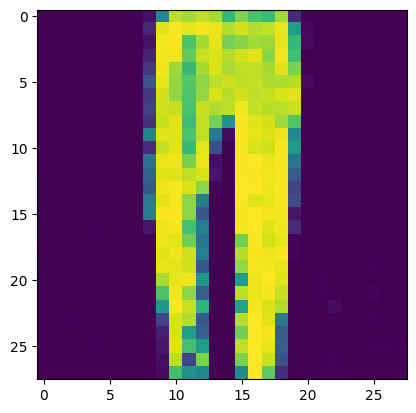

Dloss:  0.5768665
Gloss:  0.74867475
Dloss:  0.5769095
Gloss:  0.74862057
Dloss:  0.57694715
Gloss:  0.7486732
Dloss:  0.5769842
Gloss:  0.7486453
Dloss:  0.57701844
Gloss:  0.7486837
Dloss:  0.5770534
Gloss:  0.7486524
Dloss:  0.577089
Gloss:  0.7486927
Dloss:  0.57712376
Gloss:  0.7486756
Dloss:  0.57716167
Gloss:  0.7487216
Dloss:  0.5772009
Gloss:  0.7486934
Dloss:  0.5772302
Gloss:  0.7487358
Dloss:  0.57726485
Gloss:  0.74873006
Dloss:  0.5772984
Gloss:  0.7487394
Dloss:  0.577328
Gloss:  0.74874264
Dloss:  0.57735896
Gloss:  0.7487454
Dloss:  0.5773927
Gloss:  0.74874735
Dloss:  0.5774281
Gloss:  0.74875396
Dloss:  0.5774608
Gloss:  0.7487584
Dloss:  0.57749194
Gloss:  0.7487572
Dloss:  0.5775208
Gloss:  0.74877334
Dloss:  0.5775555
Gloss:  0.74876183
Dloss:  0.57758653
Gloss:  0.7487753
Dloss:  0.57761997
Gloss:  0.7487733
Dloss:  0.57765263
Gloss:  0.7488058
Dloss:  0.57768476
Gloss:  0.7487703
Dloss:  0.5777172
Gloss:  0.74884963
Dloss:  0.57775694
Gloss:  0.74878573
Dloss:  

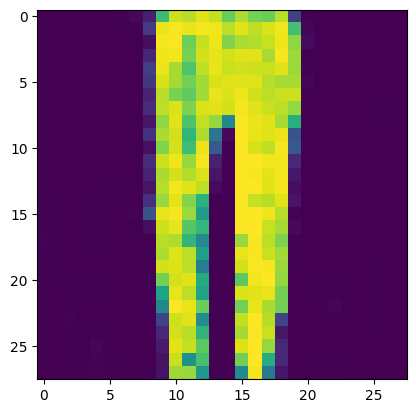

Dloss:  0.5779238
Gloss:  0.7488401
Dloss:  0.5779699
Gloss:  0.748962
Dloss:  0.57801116
Gloss:  0.74888897
Dloss:  0.57805026
Gloss:  0.7489746
Dloss:  0.57808924
Gloss:  0.74891376
Dloss:  0.5781278
Gloss:  0.7489838
Dloss:  0.5781613
Gloss:  0.7489414
Dloss:  0.57819766
Gloss:  0.749008
Dloss:  0.5782321
Gloss:  0.7489699
Dloss:  0.5782648
Gloss:  0.7490382
Dloss:  0.5782969
Gloss:  0.7490064
Dloss:  0.57832944
Gloss:  0.7490537
Dloss:  0.5783632
Gloss:  0.74902236
Dloss:  0.57839805
Gloss:  0.7490522
Dloss:  0.5784296
Gloss:  0.7490323
Dloss:  0.5784595
Gloss:  0.74907196
Dloss:  0.5784915
Gloss:  0.74904764
Dloss:  0.5785217
Gloss:  0.7490924
Dloss:  0.5785544
Gloss:  0.74906653
Dloss:  0.57858855
Gloss:  0.7491039
Dloss:  0.5786242
Gloss:  0.7490718
Dloss:  0.5786588
Gloss:  0.749119
Dloss:  0.5786894
Gloss:  0.74907094
Dloss:  0.57872725
Gloss:  0.7491641
Dloss:  0.5787642
Gloss:  0.7490781
Dloss:  0.5788095
Gloss:  0.74922645
Dloss:  0.5788568
Gloss:  0.74912
Dloss:  0.578907


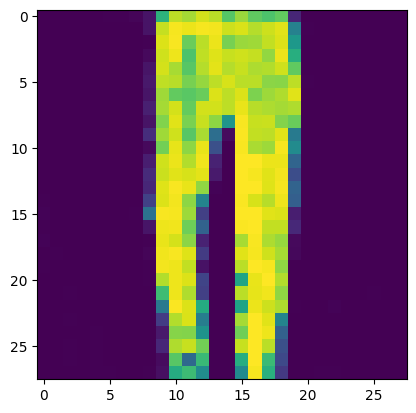

Dloss:  0.5790406
Gloss:  0.74922544
Dloss:  0.57907546
Gloss:  0.7492811
Dloss:  0.57911015
Gloss:  0.7492587
Dloss:  0.5791448
Gloss:  0.74928504
Dloss:  0.5791765
Gloss:  0.74927694
Dloss:  0.5792079
Gloss:  0.74930316
Dloss:  0.5792425
Gloss:  0.7492893
Dloss:  0.57927394
Gloss:  0.7493214
Dloss:  0.5793049
Gloss:  0.74929696
Dloss:  0.5793365
Gloss:  0.74933237
Dloss:  0.579369
Gloss:  0.7492954
Dloss:  0.5793998
Gloss:  0.7493331
Dloss:  0.57943183
Gloss:  0.74931747
Dloss:  0.57946754
Gloss:  0.74934
Dloss:  0.5795001
Gloss:  0.74931633
Dloss:  0.57953215
Gloss:  0.7493604
Dloss:  0.57956487
Gloss:  0.7493176
Dloss:  0.5796003
Gloss:  0.7494033
Dloss:  0.5796353
Gloss:  0.74932384
Dloss:  0.57967466
Gloss:  0.74946445
Dloss:  0.5797233
Gloss:  0.74934995
Dloss:  0.5797715
Gloss:  0.7494893
Dloss:  0.57982045
Gloss:  0.74941725
Dloss:  0.57985884
Gloss:  0.749504
Dloss:  0.5798973
Gloss:  0.7494509
Dloss:  0.57993335
Gloss:  0.7495123
Dloss:  0.57996595
Gloss:  0.7494756
Dloss:  

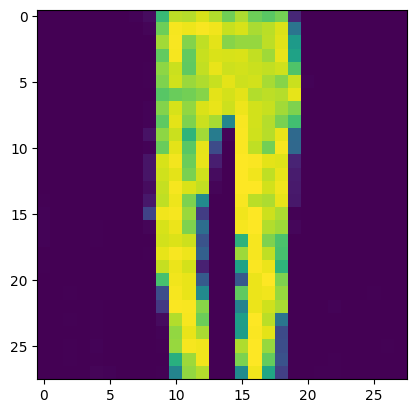

Dloss:  0.5801063
Gloss:  0.7495146
Dloss:  0.5801414
Gloss:  0.7495699
Dloss:  0.5801775
Gloss:  0.74954104
Dloss:  0.58020633
Gloss:  0.7495728
Dloss:  0.58023775
Gloss:  0.7495583
Dloss:  0.58027506
Gloss:  0.7496087
Dloss:  0.5803103
Gloss:  0.74957365
Dloss:  0.5803414
Gloss:  0.74964696
Dloss:  0.58037776
Gloss:  0.7495863
Dloss:  0.5804158
Gloss:  0.74968326
Dloss:  0.5804555
Gloss:  0.749604
Dloss:  0.58049923
Gloss:  0.7496873
Dloss:  0.58053833
Gloss:  0.7496364
Dloss:  0.5805729
Gloss:  0.74969584
Dloss:  0.5806034
Gloss:  0.74967384
18 / 100
Dloss:  0.5806374
Gloss:  0.7497217
18 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


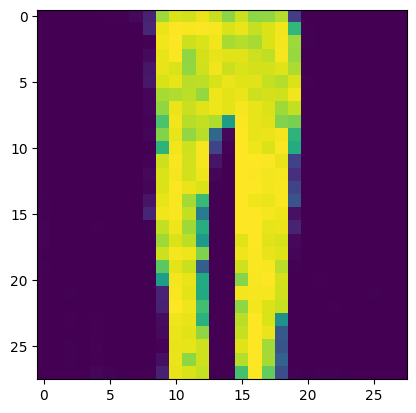

Dloss:  0.58066934
Gloss:  0.7496799
Dloss:  0.5807046
Gloss:  0.7497417
Dloss:  0.58073926
Gloss:  0.74969155
Dloss:  0.58077186
Gloss:  0.7497632
Dloss:  0.5808063
Gloss:  0.7497024
Dloss:  0.5808432
Gloss:  0.74978197
Dloss:  0.58088166
Gloss:  0.7497148
Dloss:  0.5809186
Gloss:  0.7497839
Dloss:  0.5809502
Gloss:  0.749746
Dloss:  0.5809882
Gloss:  0.7498343
Dloss:  0.581022
Gloss:  0.7497783
Dloss:  0.5810596
Gloss:  0.74986297
Dloss:  0.58109784
Gloss:  0.74980795
Dloss:  0.581133
Gloss:  0.74986625
Dloss:  0.58116704
Gloss:  0.7498297
Dloss:  0.58120173
Gloss:  0.74989516
Dloss:  0.58123416
Gloss:  0.74984884
Dloss:  0.5812656
Gloss:  0.7499069
Dloss:  0.5812977
Gloss:  0.74985665
Dloss:  0.5813307
Gloss:  0.74991584
Dloss:  0.5813641
Gloss:  0.7498889
Dloss:  0.58139503
Gloss:  0.7499394
Dloss:  0.58142734
Gloss:  0.74991167
Dloss:  0.58145654
Gloss:  0.7499469
Dloss:  0.58148694
Gloss:  0.7499254
Dloss:  0.5815202
Gloss:  0.74996644
Dloss:  0.5815526
Gloss:  0.7499455
Dloss:  

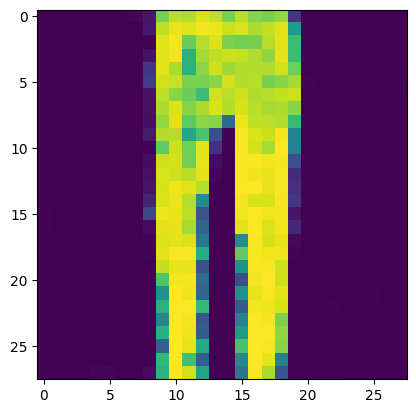

Dloss:  0.581676
Gloss:  0.7499922
Dloss:  0.5817085
Gloss:  0.750044
Dloss:  0.58174086
Gloss:  0.7500114
Dloss:  0.5817749
Gloss:  0.7500633
Dloss:  0.5818058
Gloss:  0.75001985
Dloss:  0.58183545
Gloss:  0.7500726
Dloss:  0.5818679
Gloss:  0.7500343
Dloss:  0.58189845
Gloss:  0.7500979
Dloss:  0.5819324
Gloss:  0.7500485
Dloss:  0.5819646
Gloss:  0.7501212
Dloss:  0.5819961
Gloss:  0.7500671
Dloss:  0.5820316
Gloss:  0.75018275
Dloss:  0.58207095
Gloss:  0.7500903
Dloss:  0.58211356
Gloss:  0.7502367
Dloss:  0.5821571
Gloss:  0.750145
Dloss:  0.582201
Gloss:  0.75022876
Dloss:  0.5822388
Gloss:  0.75017595
Dloss:  0.58227307
Gloss:  0.75022423
Dloss:  0.58230436
Gloss:  0.7501967
Dloss:  0.5823318
Gloss:  0.7502414
Dloss:  0.5823608
Gloss:  0.75020695
Dloss:  0.58239347
Gloss:  0.7502487
Dloss:  0.5824264
Gloss:  0.7502278
Dloss:  0.5824619
Gloss:  0.7502681
Dloss:  0.5824954
Gloss:  0.75025135
Dloss:  0.58252347
Gloss:  0.75028425
Dloss:  0.58255666
Gloss:  0.7502717
Dloss:  0.5825

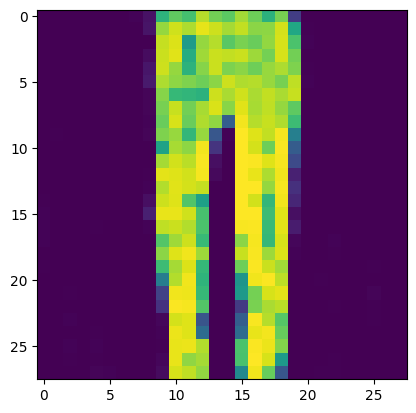

Dloss:  0.58267176
Gloss:  0.7502802
Dloss:  0.58270526
Gloss:  0.75034904
Dloss:  0.58273554
Gloss:  0.7502855
Dloss:  0.5827681
Gloss:  0.7503898
Dloss:  0.58280605
Gloss:  0.75031245
Dloss:  0.5828482
Gloss:  0.75042754
Dloss:  0.58288765
Gloss:  0.7503417
Dloss:  0.58292913
Gloss:  0.75045663
Dloss:  0.58297074
Gloss:  0.75038576
Dloss:  0.5830113
Gloss:  0.7504911
Dloss:  0.5830465
Gloss:  0.75042224
Dloss:  0.58308214
Gloss:  0.7504961
Dloss:  0.5831152
Gloss:  0.75046694
Dloss:  0.58314687
Gloss:  0.7504996
Dloss:  0.5831759
Gloss:  0.7504889
Dloss:  0.58320326
Gloss:  0.7505173
Dloss:  0.58323133
Gloss:  0.750496
Dloss:  0.58326
Gloss:  0.75053
Dloss:  0.58328736
Gloss:  0.7505164
Dloss:  0.5833158
Gloss:  0.7505344
Dloss:  0.5833462
Gloss:  0.7505144
Dloss:  0.58337605
Gloss:  0.75053453
Dloss:  0.5834068
Gloss:  0.750533
Dloss:  0.58343863
Gloss:  0.75054306
Dloss:  0.58346283
Gloss:  0.75055003
Dloss:  0.5834906
Gloss:  0.75056416
Dloss:  0.58352107
Gloss:  0.7505773
Dloss: 

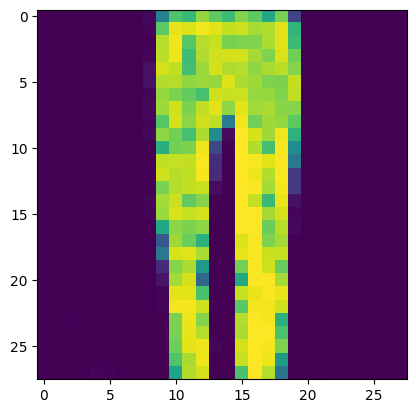

Dloss:  0.5836343
Gloss:  0.7506266
Dloss:  0.5836618
Gloss:  0.7505982
Dloss:  0.5836878
Gloss:  0.75066876
Dloss:  0.58371955
Gloss:  0.7506052
Dloss:  0.5837539
Gloss:  0.750725
Dloss:  0.583791
Gloss:  0.75063086
Dloss:  0.5838412
Gloss:  0.75080556
Dloss:  0.58390063
Gloss:  0.7507021
Dloss:  0.58395153
Gloss:  0.75084144
Dloss:  0.5839938
Gloss:  0.75076675
Dloss:  0.584028
Gloss:  0.7508451
Dloss:  0.58406526
Gloss:  0.75079244
Dloss:  0.5840972
Gloss:  0.7508375
Dloss:  0.5841292
Gloss:  0.750805
Dloss:  0.58416235
Gloss:  0.7508494
Dloss:  0.58419096
Gloss:  0.75082654
Dloss:  0.58421755
Gloss:  0.7508459
Dloss:  0.5842439
Gloss:  0.750842
Dloss:  0.58427143
Gloss:  0.7508706
Dloss:  0.58429974
Gloss:  0.7508486
Dloss:  0.5843301
Gloss:  0.75087094
Dloss:  0.5843585
Gloss:  0.7508491
Dloss:  0.58439225
Gloss:  0.75090826
Dloss:  0.5844203
Gloss:  0.7508549
Dloss:  0.5844518
Gloss:  0.75091285
Dloss:  0.584483
Gloss:  0.75087386
Dloss:  0.5845207
Gloss:  0.75095564
Dloss:  0.58

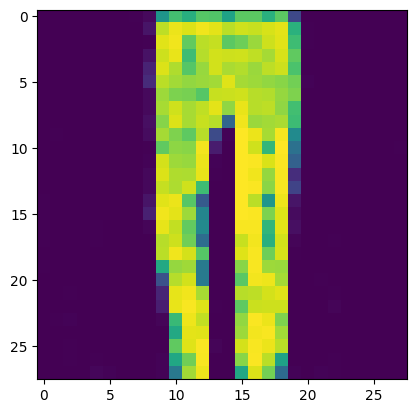

Dloss:  0.58465487
Gloss:  0.7509891
Dloss:  0.5846864
Gloss:  0.75096506
Dloss:  0.58471674
Gloss:  0.750993
Dloss:  0.58474314
Gloss:  0.7509751
Dloss:  0.58476835
Gloss:  0.75099266
Dloss:  0.584795
Gloss:  0.75098324
Dloss:  0.58482224
Gloss:  0.75100785
Dloss:  0.58485043
Gloss:  0.7509998
Dloss:  0.5848815
Gloss:  0.75102997
Dloss:  0.5849099
Gloss:  0.7510286
Dloss:  0.5849372
Gloss:  0.7510306
Dloss:  0.58496684
Gloss:  0.7510416
Dloss:  0.58499354
Gloss:  0.7510378
Dloss:  0.5850203
Gloss:  0.75105727
Dloss:  0.58504844
Gloss:  0.7510562
19 / 100
Dloss:  0.5850747
Gloss:  0.7510758
19 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


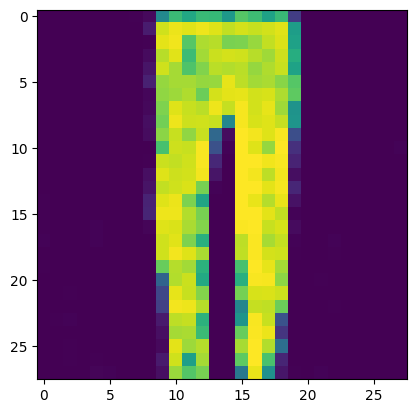

Dloss:  0.5851009
Gloss:  0.7510638
Dloss:  0.5851299
Gloss:  0.7510966
Dloss:  0.5851596
Gloss:  0.7510667
Dloss:  0.5851891
Gloss:  0.7511498
Dloss:  0.5852194
Gloss:  0.7510777
Dloss:  0.58525527
Gloss:  0.75119877
Dloss:  0.585299
Gloss:  0.75110567
Dloss:  0.5853433
Gloss:  0.75125223
Dloss:  0.5853889
Gloss:  0.75115544
Dloss:  0.5854309
Gloss:  0.75128454
Dloss:  0.5854707
Gloss:  0.751216
Dloss:  0.5855079
Gloss:  0.75128794
Dloss:  0.5855393
Gloss:  0.7512452
Dloss:  0.58556944
Gloss:  0.75130427
Dloss:  0.58559763
Gloss:  0.7512769
Dloss:  0.58562523
Gloss:  0.7513098
Dloss:  0.5856525
Gloss:  0.7512933
Dloss:  0.5856788
Gloss:  0.7513041
Dloss:  0.5857026
Gloss:  0.7513099
Dloss:  0.58573174
Gloss:  0.7513393
Dloss:  0.585761
Gloss:  0.751333
Dloss:  0.5857859
Gloss:  0.75136584
Dloss:  0.585813
Gloss:  0.7513633
Dloss:  0.585838
Gloss:  0.7513716
Dloss:  0.5858608
Gloss:  0.7513715
Dloss:  0.58588624
Gloss:  0.7513877
Dloss:  0.5859147
Gloss:  0.7513919
Dloss:  0.58593905
G

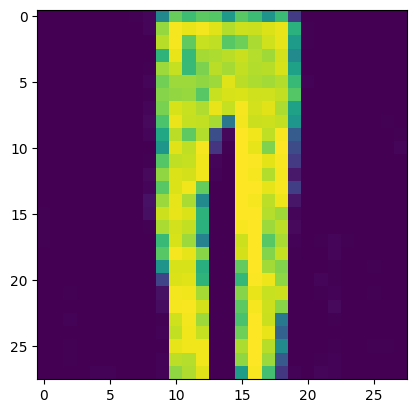

Dloss:  0.5860274
Gloss:  0.75141376
Dloss:  0.5860536
Gloss:  0.7514682
Dloss:  0.5860818
Gloss:  0.75144136
Dloss:  0.5861155
Gloss:  0.7514889
Dloss:  0.5861415
Gloss:  0.751456
Dloss:  0.5861707
Gloss:  0.75152624
Dloss:  0.5862073
Gloss:  0.7514709
Dloss:  0.5862357
Gloss:  0.7515563
Dloss:  0.5862735
Gloss:  0.75149345
Dloss:  0.5863064
Gloss:  0.75155866
Dloss:  0.5863389
Gloss:  0.7515214
Dloss:  0.58636826
Gloss:  0.7515975
Dloss:  0.5863993
Gloss:  0.75154364
Dloss:  0.58642995
Gloss:  0.7516475
Dloss:  0.58646286
Gloss:  0.7515821
Dloss:  0.5865045
Gloss:  0.7516933
Dloss:  0.5865429
Gloss:  0.7516135
Dloss:  0.58657795
Gloss:  0.75169915
Dloss:  0.5866095
Gloss:  0.7516562
Dloss:  0.5866395
Gloss:  0.7517263
Dloss:  0.586671
Gloss:  0.7516854
Dloss:  0.586699
Gloss:  0.7517292
Dloss:  0.58672816
Gloss:  0.7517067
Dloss:  0.58675593
Gloss:  0.75174254
Dloss:  0.5867831
Gloss:  0.7517297
Dloss:  0.5868075
Gloss:  0.7517584
Dloss:  0.58683586
Gloss:  0.75175256
Dloss:  0.58686

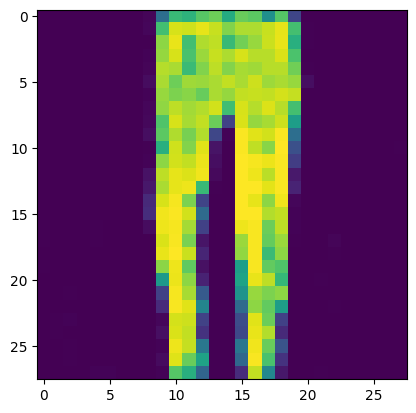

Dloss:  0.58693695
Gloss:  0.75178844
Dloss:  0.58696574
Gloss:  0.75177574
Dloss:  0.58698976
Gloss:  0.751808
Dloss:  0.5870184
Gloss:  0.75179505
Dloss:  0.58704644
Gloss:  0.75182694
Dloss:  0.5870716
Gloss:  0.7517902
Dloss:  0.58709896
Gloss:  0.7518569
Dloss:  0.58713156
Gloss:  0.751796
Dloss:  0.58716255
Gloss:  0.75190455
Dloss:  0.5871962
Gloss:  0.75181156
Dloss:  0.58723575
Gloss:  0.7519652
Dloss:  0.5872842
Gloss:  0.75185114
Dloss:  0.5873297
Gloss:  0.7519838
Dloss:  0.587372
Gloss:  0.7519077
Dloss:  0.58741003
Gloss:  0.75197935
Dloss:  0.5874411
Gloss:  0.75193876
Dloss:  0.58747005
Gloss:  0.75197667
Dloss:  0.5874975
Gloss:  0.75195897
Dloss:  0.5875239
Gloss:  0.7519911
Dloss:  0.58755136
Gloss:  0.7519761
Dloss:  0.5875774
Gloss:  0.75199336
Dloss:  0.5876063
Gloss:  0.7519707
Dloss:  0.5876317
Gloss:  0.75199085
Dloss:  0.5876589
Gloss:  0.75197583
Dloss:  0.5876803
Gloss:  0.75199527
Dloss:  0.5877059
Gloss:  0.75197804
Dloss:  0.5877311
Gloss:  0.75201666
Dlo

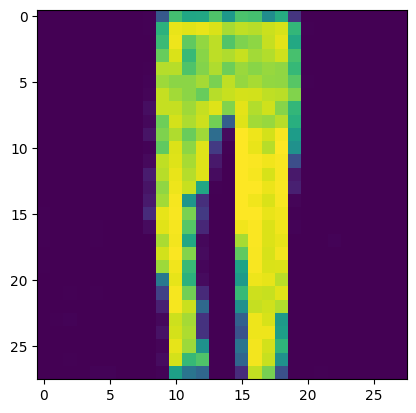

Dloss:  0.5878369
Gloss:  0.75203216
Dloss:  0.58786565
Gloss:  0.75200516
Dloss:  0.5878884
Gloss:  0.7520643
Dloss:  0.5879201
Gloss:  0.75201625
Dloss:  0.58794814
Gloss:  0.75210005
Dloss:  0.58797985
Gloss:  0.75203836
Dloss:  0.58801436
Gloss:  0.7521153
Dloss:  0.5880458
Gloss:  0.7520653
Dloss:  0.5880785
Gloss:  0.7521523
Dloss:  0.58811295
Gloss:  0.7520855
Dloss:  0.5881453
Gloss:  0.7521838
Dloss:  0.5881798
Gloss:  0.75210965
Dloss:  0.58821297
Gloss:  0.75219536
Dloss:  0.5882524
Gloss:  0.7521159
Dloss:  0.5882885
Gloss:  0.75219744
Dloss:  0.5883184
Gloss:  0.7521461
Dloss:  0.5883461
Gloss:  0.75219584
Dloss:  0.58837324
Gloss:  0.7521764
Dloss:  0.58839864
Gloss:  0.75220096
Dloss:  0.5884225
Gloss:  0.75218457
Dloss:  0.588447
Gloss:  0.7522033
Dloss:  0.58847034
Gloss:  0.75219464
Dloss:  0.5884981
Gloss:  0.7522117
Dloss:  0.5885214
Gloss:  0.75220263
Dloss:  0.5885461
Gloss:  0.75221014
Dloss:  0.58857095
Gloss:  0.75219226
Dloss:  0.5885958
Gloss:  0.7522228
Dlos

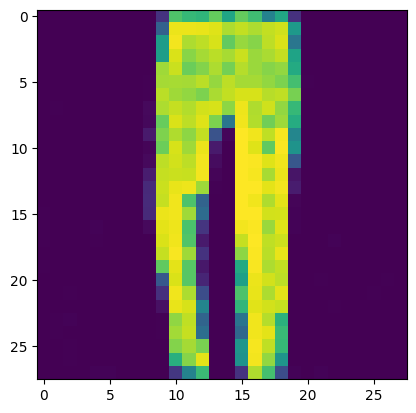

Dloss:  0.58869904
Gloss:  0.7522201
Dloss:  0.5887248
Gloss:  0.7522233
Dloss:  0.5887513
Gloss:  0.75222635
Dloss:  0.58877516
Gloss:  0.7522244
Dloss:  0.58879864
Gloss:  0.7522341
Dloss:  0.58882755
Gloss:  0.75223845
Dloss:  0.58885235
Gloss:  0.7522399
Dloss:  0.5888755
Gloss:  0.75224495
Dloss:  0.5889002
Gloss:  0.7522499
Dloss:  0.58892757
Gloss:  0.7522616
Dloss:  0.5889508
Gloss:  0.75223744
Dloss:  0.5889769
Gloss:  0.75229
Dloss:  0.5890032
Gloss:  0.75223655
Dloss:  0.5890311
Gloss:  0.75232196
Dloss:  0.58906394
Gloss:  0.75224763
20 / 100
Dloss:  0.5890981
Gloss:  0.7523733
20 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


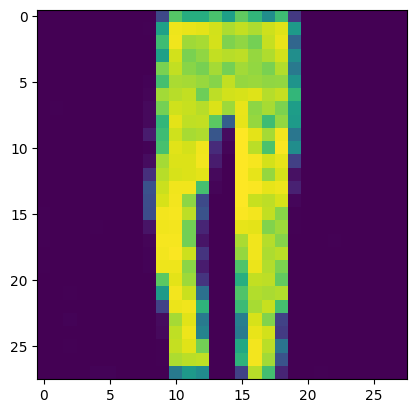

Dloss:  0.58913594
Gloss:  0.7522799
Dloss:  0.58917725
Gloss:  0.7524263
Dloss:  0.5892215
Gloss:  0.7523303
Dloss:  0.5892593
Gloss:  0.75243247
Dloss:  0.5892929
Gloss:  0.75237393
Dloss:  0.58932096
Gloss:  0.7524241
Dloss:  0.58934796
Gloss:  0.7523819
Dloss:  0.58937645
Gloss:  0.7524333
Dloss:  0.58940536
Gloss:  0.752391
Dloss:  0.5894353
Gloss:  0.7524488
Dloss:  0.58946264
Gloss:  0.75241196
Dloss:  0.58949125
Gloss:  0.7524658
Dloss:  0.5895174
Gloss:  0.75242645
Dloss:  0.5895425
Gloss:  0.7524755
Dloss:  0.5895662
Gloss:  0.7524452
Dloss:  0.58959436
Gloss:  0.7524942
Dloss:  0.58962125
Gloss:  0.75247365
Dloss:  0.589646
Gloss:  0.75248873
Dloss:  0.5896711
Gloss:  0.7524677
Dloss:  0.5896982
Gloss:  0.7525205
Dloss:  0.5897251
Gloss:  0.75248533
Dloss:  0.589752
Gloss:  0.7525424
Dloss:  0.5897771
Gloss:  0.752513
Dloss:  0.5898013
Gloss:  0.75255144
Dloss:  0.5898235
Gloss:  0.75253236
Dloss:  0.5898515
Gloss:  0.75258315
Dloss:  0.58987856
Gloss:  0.752547
Dloss:  0.58

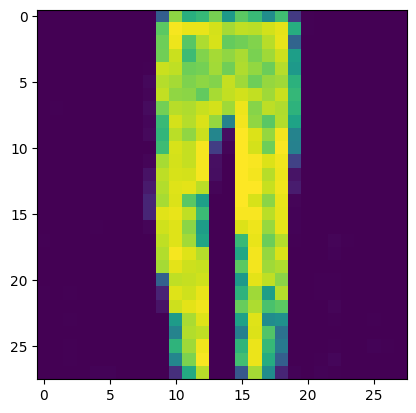

Dloss:  0.58999586
Gloss:  0.75260085
Dloss:  0.5900265
Gloss:  0.7526531
Dloss:  0.5900518
Gloss:  0.7526357
Dloss:  0.5900762
Gloss:  0.7526503
Dloss:  0.5900972
Gloss:  0.7526523
Dloss:  0.59012
Gloss:  0.7526473
Dloss:  0.590144
Gloss:  0.7526674
Dloss:  0.5901676
Gloss:  0.7526602
Dloss:  0.5901933
Gloss:  0.75268555
Dloss:  0.5902187
Gloss:  0.75266045
Dloss:  0.59024096
Gloss:  0.7527299
Dloss:  0.5902677
Gloss:  0.7526856
Dloss:  0.59029853
Gloss:  0.75276667
Dloss:  0.59032875
Gloss:  0.7527059
Dloss:  0.59035987
Gloss:  0.7528108
Dloss:  0.59039235
Gloss:  0.7527313
Dloss:  0.59042513
Gloss:  0.7528205
Dloss:  0.59045684
Gloss:  0.75277376
Dloss:  0.5904852
Gloss:  0.75285
Dloss:  0.5905111
Gloss:  0.7528116
Dloss:  0.59053737
Gloss:  0.75286186
Dloss:  0.5905605
Gloss:  0.75281703
Dloss:  0.5905896
Gloss:  0.7528856
Dloss:  0.59062386
Gloss:  0.75283784
Dloss:  0.59065145
Gloss:  0.75289446
Dloss:  0.5906755
Gloss:  0.752861
Dloss:  0.5907014
Gloss:  0.7529026
Dloss:  0.5907

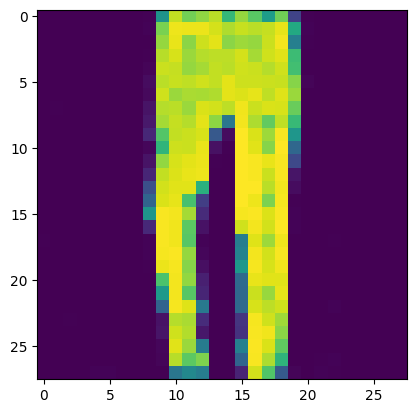

Dloss:  0.59080124
Gloss:  0.75294536
Dloss:  0.59082735
Gloss:  0.7529204
Dloss:  0.59084964
Gloss:  0.7529636
Dloss:  0.5908719
Gloss:  0.75293607
Dloss:  0.5908993
Gloss:  0.7529984
Dloss:  0.5909285
Gloss:  0.7529434
Dloss:  0.5909554
Gloss:  0.753025
Dloss:  0.5909854
Gloss:  0.75296414
Dloss:  0.5910136
Gloss:  0.75303805
Dloss:  0.59104294
Gloss:  0.75299656
Dloss:  0.59107
Gloss:  0.7530885
Dloss:  0.5910989
Gloss:  0.75303096
Dloss:  0.5911284
Gloss:  0.7531207
Dloss:  0.5911588
Gloss:  0.7530641
Dloss:  0.59118897
Gloss:  0.7531326
Dloss:  0.5912124
Gloss:  0.7530925
Dloss:  0.5912401
Gloss:  0.7531296
Dloss:  0.59126574
Gloss:  0.7531019
Dloss:  0.59128946
Gloss:  0.75313914
Dloss:  0.59131426
Gloss:  0.7531256
Dloss:  0.59133714
Gloss:  0.75315094
Dloss:  0.5913607
Gloss:  0.7531291
Dloss:  0.5913874
Gloss:  0.7531696
Dloss:  0.5914156
Gloss:  0.75312704
Dloss:  0.591439
Gloss:  0.7531957
Dloss:  0.5914628
Gloss:  0.7531365
Dloss:  0.591494
Gloss:  0.75324184
Dloss:  0.5915

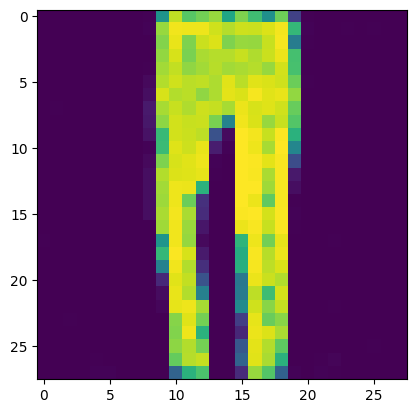

Dloss:  0.59162885
Gloss:  0.753291
Dloss:  0.59165984
Gloss:  0.75324166
Dloss:  0.59168744
Gloss:  0.75330055
Dloss:  0.5917158
Gloss:  0.7532597
Dloss:  0.5917403
Gloss:  0.7532879
Dloss:  0.5917621
Gloss:  0.7532791
Dloss:  0.59178686
Gloss:  0.7532856
Dloss:  0.59180903
Gloss:  0.753284
Dloss:  0.59183246
Gloss:  0.7532922
Dloss:  0.59185696
Gloss:  0.7532954
Dloss:  0.5918789
Gloss:  0.7533204
Dloss:  0.5919014
Gloss:  0.7533065
Dloss:  0.59192663
Gloss:  0.75333166
Dloss:  0.59195393
Gloss:  0.7532985
Dloss:  0.59198004
Gloss:  0.7533443
Dloss:  0.59200156
Gloss:  0.75328994
Dloss:  0.59202766
Gloss:  0.7533582
Dloss:  0.59205496
Gloss:  0.7533102
Dloss:  0.5920795
Gloss:  0.7533566
Dloss:  0.5921031
Gloss:  0.7533325
Dloss:  0.5921259
Gloss:  0.7533706
Dloss:  0.59214765
Gloss:  0.7533471
Dloss:  0.59217614
Gloss:  0.753398
Dloss:  0.5921998
Gloss:  0.7533548
Dloss:  0.59222233
Gloss:  0.7534
Dloss:  0.5922474
Gloss:  0.7533705
Dloss:  0.59227246
Gloss:  0.75342566
Dloss:  0.59

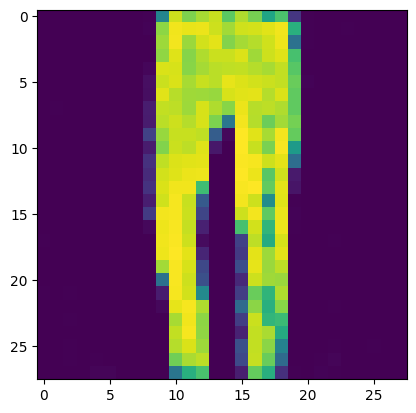

Dloss:  0.5923795
Gloss:  0.7534697
Dloss:  0.59240746
Gloss:  0.7534314
Dloss:  0.5924328
Gloss:  0.75347805
Dloss:  0.5924582
Gloss:  0.7534468
Dloss:  0.59248185
Gloss:  0.7534833
Dloss:  0.59250295
Gloss:  0.7534579
Dloss:  0.5925279
Gloss:  0.75350696
Dloss:  0.592553
Gloss:  0.7534602
Dloss:  0.5925806
Gloss:  0.7535494
Dloss:  0.5926103
Gloss:  0.75348806
Dloss:  0.59264135
Gloss:  0.7535734
Dloss:  0.5926699
Gloss:  0.75352454
Dloss:  0.59269774
Gloss:  0.7535882
Dloss:  0.5927245
Gloss:  0.75353855
Dloss:  0.5927516
Gloss:  0.75359195
21 / 100
Dloss:  0.59277666
Gloss:  0.7535575
21 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


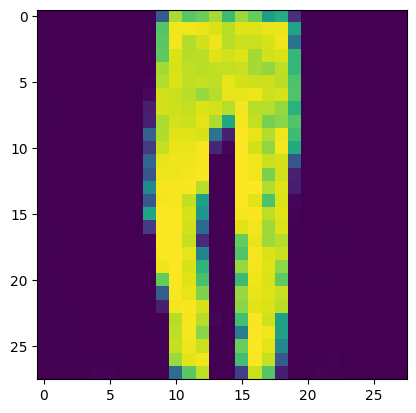

Dloss:  0.59280014
Gloss:  0.75359565
Dloss:  0.59282225
Gloss:  0.7535776
Dloss:  0.5928471
Gloss:  0.75361484
Dloss:  0.5928731
Gloss:  0.7535984
Dloss:  0.5928932
Gloss:  0.7536241
Dloss:  0.59291524
Gloss:  0.7536197
Dloss:  0.5929376
Gloss:  0.7536256
Dloss:  0.59295946
Gloss:  0.7536244
Dloss:  0.59298044
Gloss:  0.7536351
Dloss:  0.5930021
Gloss:  0.75363725
Dloss:  0.5930242
Gloss:  0.75364256
Dloss:  0.5930479
Gloss:  0.753632
Dloss:  0.5930694
Gloss:  0.7536492
Dloss:  0.5930927
Gloss:  0.75365186
Dloss:  0.5931142
Gloss:  0.75365883
Dloss:  0.59313864
Gloss:  0.753677
Dloss:  0.5931605
Gloss:  0.7536576
Dloss:  0.5931793
Gloss:  0.75368905
Dloss:  0.5932033
Gloss:  0.75366277
Dloss:  0.5932242
Gloss:  0.7537242
Dloss:  0.5932501
Gloss:  0.75366664
Dloss:  0.5932832
Gloss:  0.75380176
Dloss:  0.59332407
Gloss:  0.75369895
Dloss:  0.5933631
Gloss:  0.7538439
Dloss:  0.5934055
Gloss:  0.75375444
Dloss:  0.5934444
Gloss:  0.7538537
Dloss:  0.59347874
Gloss:  0.75381064
Dloss:  0

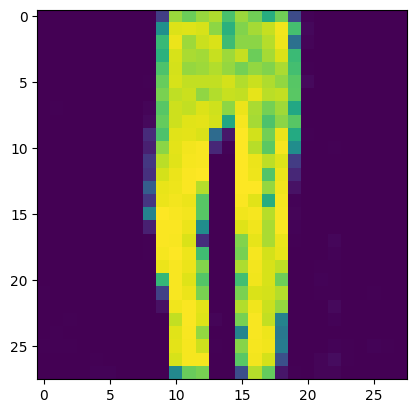

Dloss:  0.59357077
Gloss:  0.75384337
Dloss:  0.59359515
Gloss:  0.7538357
Dloss:  0.5936175
Gloss:  0.75386626
Dloss:  0.59364
Gloss:  0.7538466
Dloss:  0.59366095
Gloss:  0.7538875
Dloss:  0.59368604
Gloss:  0.75385314
Dloss:  0.59370846
Gloss:  0.7538932
Dloss:  0.5937323
Gloss:  0.7538653
Dloss:  0.5937531
Gloss:  0.7538883
Dloss:  0.5937772
Gloss:  0.75387526
Dloss:  0.59379685
Gloss:  0.753902
Dloss:  0.59382
Gloss:  0.75389975
Dloss:  0.5938433
Gloss:  0.753914
Dloss:  0.5938613
Gloss:  0.75390995
Dloss:  0.593884
Gloss:  0.75392675
Dloss:  0.5939082
Gloss:  0.7539238
Dloss:  0.59393144
Gloss:  0.75392926
Dloss:  0.59395474
Gloss:  0.7539398
Dloss:  0.5939778
Gloss:  0.75393635
Dloss:  0.5939957
Gloss:  0.7539472
Dloss:  0.59401715
Gloss:  0.7539427
Dloss:  0.5940358
Gloss:  0.75395
Dloss:  0.59405833
Gloss:  0.75394225
Dloss:  0.5940814
Gloss:  0.753969
Dloss:  0.59410685
Gloss:  0.75394976
Dloss:  0.5941284
Gloss:  0.75397956
Dloss:  0.5941509
Gloss:  0.7539465
Dloss:  0.59417

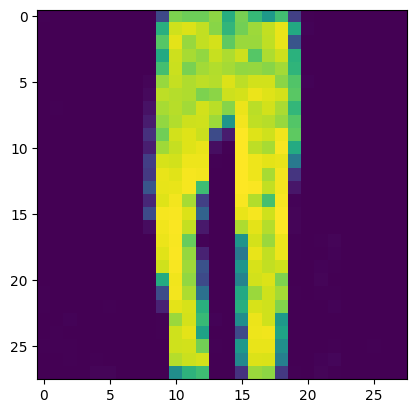

Dloss:  0.5942483
Gloss:  0.7539555
Dloss:  0.5942832
Gloss:  0.7540788
Dloss:  0.5943161
Gloss:  0.7539855
Dloss:  0.5943546
Gloss:  0.7541105
Dloss:  0.59438866
Gloss:  0.75404304
Dloss:  0.59441876
Gloss:  0.75410914
Dloss:  0.59444475
Gloss:  0.7540715
Dloss:  0.59446925
Gloss:  0.75411904
Dloss:  0.5944931
Gloss:  0.7541
Dloss:  0.59451467
Gloss:  0.75412583
Dloss:  0.59453493
Gloss:  0.7541211
Dloss:  0.5945554
Gloss:  0.75414294
Dloss:  0.5945759
Gloss:  0.75414723
Dloss:  0.5945957
Gloss:  0.7541642
Dloss:  0.5946187
Gloss:  0.7541639
Dloss:  0.59463716
Gloss:  0.7541739
Dloss:  0.59465647
Gloss:  0.75417346
Dloss:  0.5946776
Gloss:  0.7541837
Dloss:  0.5946983
Gloss:  0.7541898
Dloss:  0.594719
Gloss:  0.75419146
Dloss:  0.59473795
Gloss:  0.75419706
Dloss:  0.5947597
Gloss:  0.75418806
Dloss:  0.59478027
Gloss:  0.7542227
Dloss:  0.59480274
Gloss:  0.7541893
Dloss:  0.5948222
Gloss:  0.75424284
Dloss:  0.5948449
Gloss:  0.7541921
Dloss:  0.5948666
Gloss:  0.7542709
Dloss:  0.

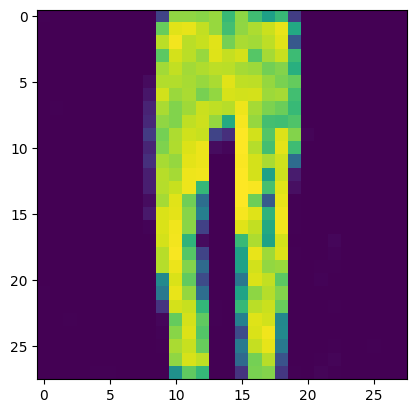

Dloss:  0.5949889
Gloss:  0.75433624
Dloss:  0.59502256
Gloss:  0.7542635
Dloss:  0.595051
Gloss:  0.754347
Dloss:  0.59508365
Gloss:  0.7543039
Dloss:  0.59510714
Gloss:  0.75433224
Dloss:  0.59512824
Gloss:  0.75432754
Dloss:  0.5951509
Gloss:  0.7543368
Dloss:  0.59517163
Gloss:  0.7543419
Dloss:  0.5951925
Gloss:  0.75434065
Dloss:  0.5952162
Gloss:  0.7543502
Dloss:  0.59523517
Gloss:  0.75434566
Dloss:  0.5952541
Gloss:  0.7543621
Dloss:  0.5952757
Gloss:  0.7543577
Dloss:  0.5953007
Gloss:  0.7543545
Dloss:  0.59532374
Gloss:  0.7543554
Dloss:  0.5953441
Gloss:  0.75436425
Dloss:  0.5953613
Gloss:  0.7543564
Dloss:  0.5953807
Gloss:  0.75438184
Dloss:  0.59540176
Gloss:  0.7543737
Dloss:  0.59542245
Gloss:  0.75440234
Dloss:  0.5954439
Gloss:  0.7543814
Dloss:  0.5954645
Gloss:  0.75442016
Dloss:  0.5954869
Gloss:  0.75438595
Dloss:  0.59550506
Gloss:  0.754446
Dloss:  0.5955294
Gloss:  0.75440514
Dloss:  0.59555155
Gloss:  0.75447893
Dloss:  0.59557885
Gloss:  0.7544146
Dloss: 

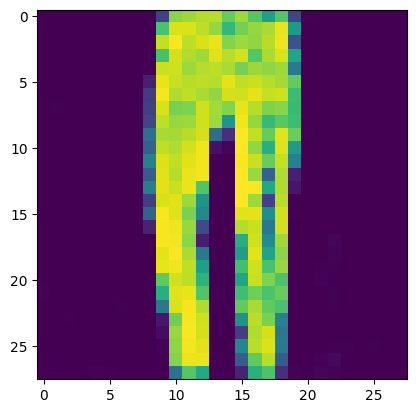

Dloss:  0.59569794
Gloss:  0.7544758
Dloss:  0.595727
Gloss:  0.75455916
Dloss:  0.5957573
Gloss:  0.754503
Dloss:  0.5957834
Gloss:  0.754566
Dloss:  0.5958069
Gloss:  0.75451756
Dloss:  0.5958333
Gloss:  0.7545912
Dloss:  0.59585816
Gloss:  0.7545295
Dloss:  0.59588426
Gloss:  0.7546032
Dloss:  0.59591436
Gloss:  0.754559
Dloss:  0.59593844
Gloss:  0.75462097
Dloss:  0.5959657
Gloss:  0.75458294
Dloss:  0.59598964
Gloss:  0.7546397
Dloss:  0.59601283
Gloss:  0.75461173
Dloss:  0.5960377
Gloss:  0.75463486
Dloss:  0.5960595
Gloss:  0.7546288
22 / 100
Dloss:  0.59607756
Gloss:  0.75464606
22 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


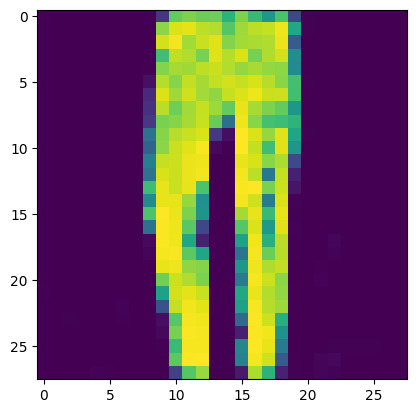

Dloss:  0.5960934
Gloss:  0.75464517
Dloss:  0.5961115
Gloss:  0.75466275
Dloss:  0.59613127
Gloss:  0.75464296
Dloss:  0.5961563
Gloss:  0.75469786
Dloss:  0.596181
Gloss:  0.754671
Dloss:  0.5962016
Gloss:  0.75474787
Dloss:  0.5962222
Gloss:  0.7546883
Dloss:  0.5962519
Gloss:  0.754797
Dloss:  0.59628475
Gloss:  0.7547166
Dloss:  0.5963216
Gloss:  0.75481826
Dloss:  0.5963504
Gloss:  0.7547696
Dloss:  0.59637463
Gloss:  0.75480944
Dloss:  0.5963933
Gloss:  0.75479954
Dloss:  0.5964144
Gloss:  0.7548217
Dloss:  0.5964355
Gloss:  0.75481266
Dloss:  0.59645957
Gloss:  0.7548443
Dloss:  0.596481
Gloss:  0.754826
Dloss:  0.59650105
Gloss:  0.75485003
Dloss:  0.5965208
Gloss:  0.7548426
Dloss:  0.59653807
Gloss:  0.754869
Dloss:  0.5965554
Gloss:  0.7548588
Dloss:  0.59657395
Gloss:  0.754895
Dloss:  0.5965943
Gloss:  0.75488096
Dloss:  0.59661746
Gloss:  0.754902
Dloss:  0.59663755
Gloss:  0.75491005
Dloss:  0.5966565
Gloss:  0.75492704
Dloss:  0.59667563
Gloss:  0.7549313
Dloss:  0.596

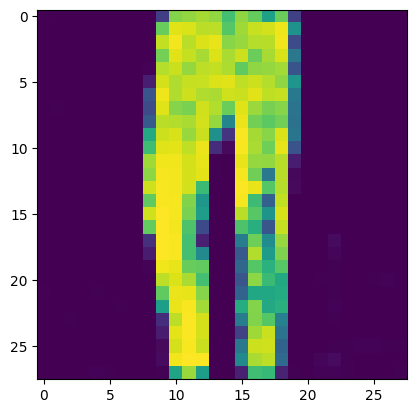

Dloss:  0.5967569
Gloss:  0.754985
Dloss:  0.59677833
Gloss:  0.7549741
Dloss:  0.5967978
Gloss:  0.7550221
Dloss:  0.59681845
Gloss:  0.7550001
Dloss:  0.5968355
Gloss:  0.7550754
Dloss:  0.59685695
Gloss:  0.7550359
Dloss:  0.59688246
Gloss:  0.7551164
Dloss:  0.5969103
Gloss:  0.75506186
Dloss:  0.5969348
Gloss:  0.7551399
Dloss:  0.5969584
Gloss:  0.7550909
Dloss:  0.5969814
Gloss:  0.75518113
Dloss:  0.5970059
Gloss:  0.75512177
Dloss:  0.59703124
Gloss:  0.75519615
Dloss:  0.59705603
Gloss:  0.7551561
Dloss:  0.5970811
Gloss:  0.75521904
Dloss:  0.5971054
Gloss:  0.7551828
Dloss:  0.59712756
Gloss:  0.7552299
Dloss:  0.59714687
Gloss:  0.75520355
Dloss:  0.5971668
Gloss:  0.755236
Dloss:  0.5971836
Gloss:  0.7552281
Dloss:  0.5972052
Gloss:  0.7552461
Dloss:  0.59722275
Gloss:  0.75522494
Dloss:  0.59724486
Gloss:  0.75526243
Dloss:  0.5972666
Gloss:  0.75524354
Dloss:  0.5972886
Gloss:  0.7552736
Dloss:  0.597304
Gloss:  0.75525403
Dloss:  0.59732586
Gloss:  0.75528395
Dloss:  0

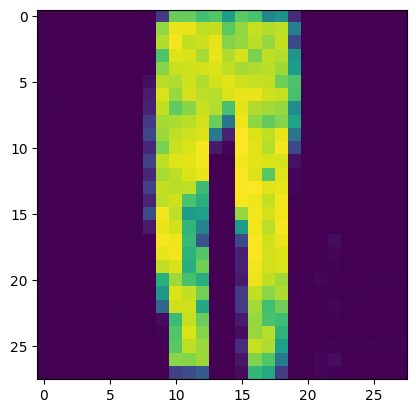

Dloss:  0.5974132
Gloss:  0.7553435
Dloss:  0.5974383
Gloss:  0.75527656
Dloss:  0.597464
Gloss:  0.7553819
Dloss:  0.5974959
Gloss:  0.7553186
Dloss:  0.59752256
Gloss:  0.75540745
Dloss:  0.59754884
Gloss:  0.75534445
Dloss:  0.5975726
Gloss:  0.7554227
Dloss:  0.5975969
Gloss:  0.7553719
Dloss:  0.59761935
Gloss:  0.7554177
Dloss:  0.59763974
Gloss:  0.75539166
Dloss:  0.5976587
Gloss:  0.7554318
Dloss:  0.5976768
Gloss:  0.75541127
Dloss:  0.5976957
Gloss:  0.7554601
Dloss:  0.5977203
Gloss:  0.7554315
Dloss:  0.59774566
Gloss:  0.7554776
Dloss:  0.5977659
Gloss:  0.75544953
Dloss:  0.59778535
Gloss:  0.7554902
Dloss:  0.59780204
Gloss:  0.7554689
Dloss:  0.5978198
Gloss:  0.75550395
Dloss:  0.5978391
Gloss:  0.7554778
Dloss:  0.597861
Gloss:  0.7555019
Dloss:  0.5978818
Gloss:  0.7554848
Dloss:  0.5978987
Gloss:  0.7555191
Dloss:  0.5979184
Gloss:  0.7554926
Dloss:  0.59793675
Gloss:  0.75552654
Dloss:  0.5979596
Gloss:  0.7554923
Dloss:  0.59798
Gloss:  0.7555464
Dloss:  0.598000

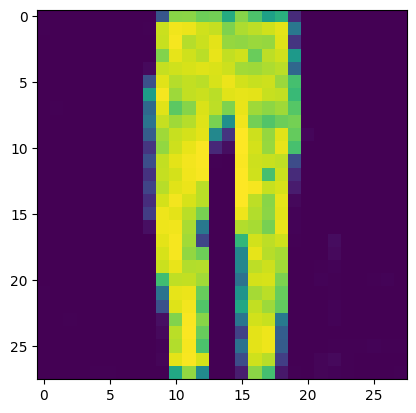

Dloss:  0.5980786
Gloss:  0.7555904
Dloss:  0.5981042
Gloss:  0.7555445
Dloss:  0.59812844
Gloss:  0.7556142
Dloss:  0.5981516
Gloss:  0.75557214
Dloss:  0.5981708
Gloss:  0.75562227
Dloss:  0.5981895
Gloss:  0.7556011
Dloss:  0.59821033
Gloss:  0.755629
Dloss:  0.59822893
Gloss:  0.75561637
Dloss:  0.5982493
Gloss:  0.75564873
Dloss:  0.59826964
Gloss:  0.75563216
Dloss:  0.5982857
Gloss:  0.7556659
Dloss:  0.59830505
Gloss:  0.75564307
Dloss:  0.5983269
Gloss:  0.75566894
Dloss:  0.59834886
Gloss:  0.75563556
Dloss:  0.598371
Gloss:  0.75569415
Dloss:  0.59839225
Gloss:  0.7556555
Dloss:  0.59841084
Gloss:  0.75572276
Dloss:  0.59843016
Gloss:  0.7556762
Dloss:  0.59845555
Gloss:  0.7557497
Dloss:  0.5984797
Gloss:  0.7556894
Dloss:  0.5985077
Gloss:  0.7557817
Dloss:  0.59853315
Gloss:  0.75572926
Dloss:  0.5985617
Gloss:  0.75581396
Dloss:  0.59858555
Gloss:  0.75575566
Dloss:  0.59861094
Gloss:  0.7558199
Dloss:  0.5986357
Gloss:  0.75577843
Dloss:  0.5986571
Gloss:  0.7558268
Dlo

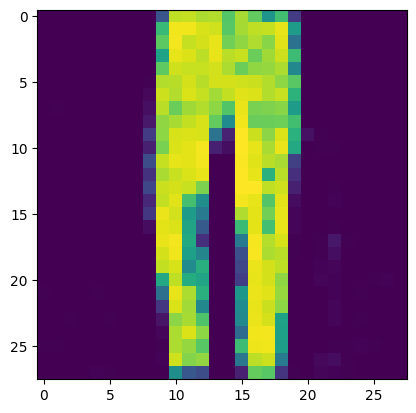

Dloss:  0.5987343
Gloss:  0.75583905
Dloss:  0.59875315
Gloss:  0.7558597
Dloss:  0.59877115
Gloss:  0.75584745
Dloss:  0.59878826
Gloss:  0.75586873
Dloss:  0.59880394
Gloss:  0.75585145
Dloss:  0.59882146
Gloss:  0.75588065
Dloss:  0.59884137
Gloss:  0.7558573
Dloss:  0.5988601
Gloss:  0.7558887
Dloss:  0.5988816
Gloss:  0.7558669
Dloss:  0.59890175
Gloss:  0.7559175
Dloss:  0.5989227
Gloss:  0.75587213
Dloss:  0.598944
Gloss:  0.75593585
Dloss:  0.59896636
Gloss:  0.7558907
Dloss:  0.5989884
Gloss:  0.7559471
Dloss:  0.59901
Gloss:  0.7559115
23 / 100
Dloss:  0.59903055
Gloss:  0.7559609
23 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


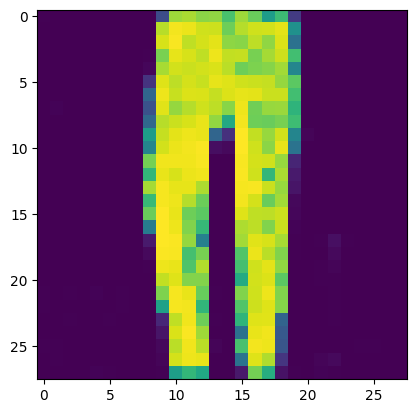

Dloss:  0.5990491
Gloss:  0.75591683
Dloss:  0.5990694
Gloss:  0.7559744
Dloss:  0.5990927
Gloss:  0.755934
Dloss:  0.59911585
Gloss:  0.75599736
Dloss:  0.59913826
Gloss:  0.75594753
Dloss:  0.59915966
Gloss:  0.7560179
Dloss:  0.5991844
Gloss:  0.7559598
Dloss:  0.5992133
Gloss:  0.75604147
Dloss:  0.59923995
Gloss:  0.7559812
Dloss:  0.5992667
Gloss:  0.7560501
Dloss:  0.59928906
Gloss:  0.7559965
Dloss:  0.59931034
Gloss:  0.7560349
Dloss:  0.59932995
Gloss:  0.7560171
Dloss:  0.5993479
Gloss:  0.75602907
Dloss:  0.5993662
Gloss:  0.75602305
Dloss:  0.59938437
Gloss:  0.7560426
Dloss:  0.599402
Gloss:  0.7560225
Dloss:  0.5994187
Gloss:  0.7560529
Dloss:  0.5994378
Gloss:  0.7560331
Dloss:  0.59945536
Gloss:  0.75606006
Dloss:  0.5994727
Gloss:  0.75603735
Dloss:  0.5994906
Gloss:  0.7560721
Dloss:  0.5995094
Gloss:  0.7560488
Dloss:  0.5995287
Gloss:  0.7560705
Dloss:  0.5995475
Gloss:  0.75606763
Dloss:  0.599563
Gloss:  0.7560655
Dloss:  0.5995826
Gloss:  0.75608736
Dloss:  0.59

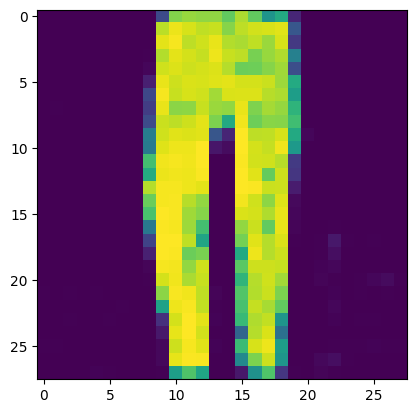

Dloss:  0.5996532
Gloss:  0.75613827
Dloss:  0.59967244
Gloss:  0.7561059
Dloss:  0.5996915
Gloss:  0.75617206
Dloss:  0.5997141
Gloss:  0.75610065
Dloss:  0.59974056
Gloss:  0.75622284
Dloss:  0.5997726
Gloss:  0.7561384
Dloss:  0.59980726
Gloss:  0.75624424
Dloss:  0.59983826
Gloss:  0.7561859
Dloss:  0.5998629
Gloss:  0.75623333
Dloss:  0.59988236
Gloss:  0.7562009
Dloss:  0.5999005
Gloss:  0.75623643
Dloss:  0.5999202
Gloss:  0.75622606
Dloss:  0.59993726
Gloss:  0.75623894
Dloss:  0.59995425
Gloss:  0.7562482
Dloss:  0.5999729
Gloss:  0.75626165
Dloss:  0.59998935
Gloss:  0.7562651
Dloss:  0.600006
Gloss:  0.7562698
Dloss:  0.6000223
Gloss:  0.75627685
Dloss:  0.6000397
Gloss:  0.7562708
Dloss:  0.6000556
Gloss:  0.75627553
Dloss:  0.6000737
Gloss:  0.75626534
Dloss:  0.60008764
Gloss:  0.7562748
Dloss:  0.6001046
Gloss:  0.75627226
Dloss:  0.60012096
Gloss:  0.7562799
Dloss:  0.60013765
Gloss:  0.75627273
Dloss:  0.60015327
Gloss:  0.75630265
Dloss:  0.6001732
Gloss:  0.7562744
D

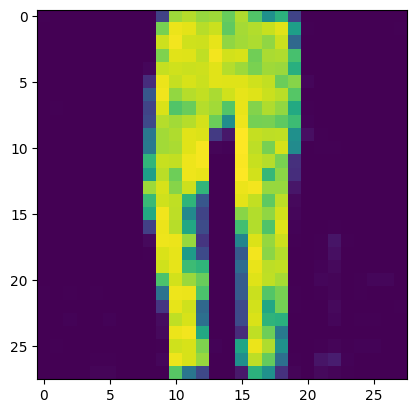

Dloss:  0.6002448
Gloss:  0.75630236
Dloss:  0.6002628
Gloss:  0.7563486
Dloss:  0.6002825
Gloss:  0.75630933
Dloss:  0.600304
Gloss:  0.75638646
Dloss:  0.6003272
Gloss:  0.7563155
Dloss:  0.6003542
Gloss:  0.7564094
Dloss:  0.60038006
Gloss:  0.756341
Dloss:  0.60040724
Gloss:  0.75642747
Dloss:  0.600435
Gloss:  0.75637335
Dloss:  0.6004575
Gloss:  0.7564304
Dloss:  0.6004757
Gloss:  0.75639945
Dloss:  0.6004939
Gloss:  0.75644714
Dloss:  0.6005109
Gloss:  0.75641793
Dloss:  0.60053045
Gloss:  0.7564588
Dloss:  0.6005515
Gloss:  0.7564279
Dloss:  0.6005709
Gloss:  0.75646406
Dloss:  0.6005904
Gloss:  0.7564362
Dloss:  0.60060847
Gloss:  0.7564755
Dloss:  0.6006252
Gloss:  0.75645584
Dloss:  0.6006409
Gloss:  0.756477
Dloss:  0.60065675
Gloss:  0.7564694
Dloss:  0.60067487
Gloss:  0.7564861
Dloss:  0.60069156
Gloss:  0.75648504
Dloss:  0.60071164
Gloss:  0.75650406
Dloss:  0.6007286
Gloss:  0.756494
Dloss:  0.60074526
Gloss:  0.75652003
Dloss:  0.60075957
Gloss:  0.7565094
Dloss:  0.

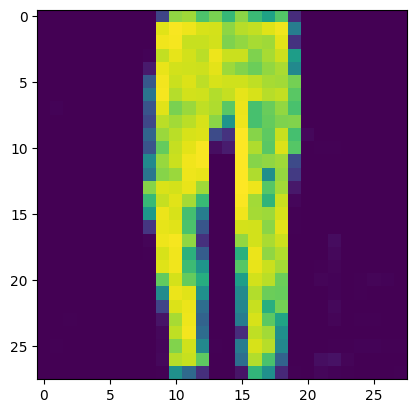

Dloss:  0.6008277
Gloss:  0.75653154
Dloss:  0.60084623
Gloss:  0.756563
Dloss:  0.6008617
Gloss:  0.7565392
Dloss:  0.6008806
Gloss:  0.756578
Dloss:  0.6008975
Gloss:  0.7565485
Dloss:  0.600915
Gloss:  0.75661105
Dloss:  0.60093623
Gloss:  0.7565476
Dloss:  0.60095775
Gloss:  0.75664765
Dloss:  0.60098493
Gloss:  0.756568
Dloss:  0.6010132
Gloss:  0.75667137
Dloss:  0.6010383
Gloss:  0.7566078
Dloss:  0.60106343
Gloss:  0.7566856
Dloss:  0.60108924
Gloss:  0.75663096
Dloss:  0.6011142
Gloss:  0.75668
Dloss:  0.6011412
Gloss:  0.75664395
Dloss:  0.6011624
Gloss:  0.7566944
Dloss:  0.6011794
Gloss:  0.75666547
Dloss:  0.6011955
Gloss:  0.7566989
Dloss:  0.6012118
Gloss:  0.7566799
Dloss:  0.60122955
Gloss:  0.7567055
Dloss:  0.601248
Gloss:  0.7566856
Dloss:  0.6012629
Gloss:  0.75670624
Dloss:  0.6012831
Gloss:  0.75670075
Dloss:  0.60129714
Gloss:  0.75670224
Dloss:  0.6013138
Gloss:  0.7567091
Dloss:  0.60132897
Gloss:  0.7567054
Dloss:  0.60134596
Gloss:  0.7567182
Dloss:  0.60136

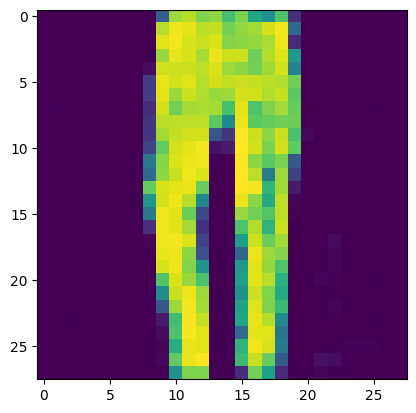

Dloss:  0.60141486
Gloss:  0.75672424
Dloss:  0.6014314
Gloss:  0.7567362
Dloss:  0.6014475
Gloss:  0.75672895
Dloss:  0.6014639
Gloss:  0.75673515
Dloss:  0.60147923
Gloss:  0.756733
Dloss:  0.6014956
Gloss:  0.75673527
Dloss:  0.6015125
Gloss:  0.7567412
Dloss:  0.60152763
Gloss:  0.75673974
Dloss:  0.6015442
Gloss:  0.7567555
Dloss:  0.6015606
Gloss:  0.756748
Dloss:  0.60157704
Gloss:  0.75675845
Dloss:  0.6015952
Gloss:  0.75675195
Dloss:  0.601611
Gloss:  0.75677806
Dloss:  0.6016267
Gloss:  0.75674343
Dloss:  0.60164577
Gloss:  0.7568039
24 / 100
Dloss:  0.60166514
Gloss:  0.7567459
24 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


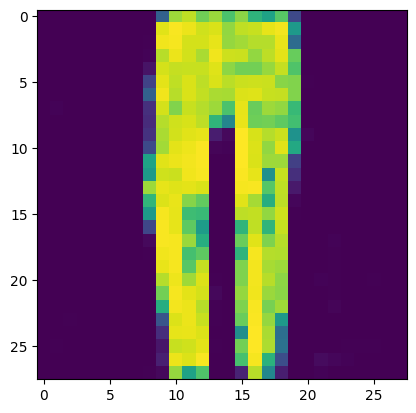

Dloss:  0.6016845
Gloss:  0.75683546
Dloss:  0.601712
Gloss:  0.75675935
Dloss:  0.6017393
Gloss:  0.7569027
Dloss:  0.6017666
Gloss:  0.75682044
Dloss:  0.60179466
Gloss:  0.7569528
Dloss:  0.60182416
Gloss:  0.75688076
Dloss:  0.6018489
Gloss:  0.7569689
Dloss:  0.6018724
Gloss:  0.75692743
Dloss:  0.60189164
Gloss:  0.7569708
Dloss:  0.6019105
Gloss:  0.7569507
Dloss:  0.60192716
Gloss:  0.75696886
Dloss:  0.60194373
Gloss:  0.75695693
Dloss:  0.60195816
Gloss:  0.756967
Dloss:  0.60197514
Gloss:  0.7569549
Dloss:  0.6019913
Gloss:  0.75698334
Dloss:  0.602008
Gloss:  0.7569686
Dloss:  0.6020247
Gloss:  0.7569954
Dloss:  0.6020393
Gloss:  0.7569663
Dloss:  0.6020587
Gloss:  0.75700766
Dloss:  0.6020755
Gloss:  0.7569726
Dloss:  0.60209316
Gloss:  0.7570076
Dloss:  0.6021083
Gloss:  0.7569757
Dloss:  0.6021268
Gloss:  0.7570174
Dloss:  0.602145
Gloss:  0.75697523
Dloss:  0.6021606
Gloss:  0.7570264
Dloss:  0.60217935
Gloss:  0.75698066
Dloss:  0.6022011
Gloss:  0.75704247
Dloss:  0.6

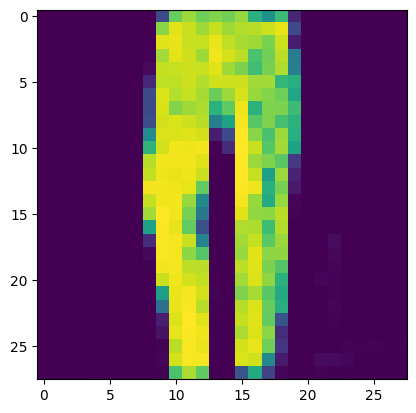

Dloss:  0.6022836
Gloss:  0.7570762
Dloss:  0.60230565
Gloss:  0.75702363
Dloss:  0.6023263
Gloss:  0.75709134
Dloss:  0.6023469
Gloss:  0.7570487
Dloss:  0.6023661
Gloss:  0.75709176
Dloss:  0.60238487
Gloss:  0.75705874
Dloss:  0.6024044
Gloss:  0.7570981
Dloss:  0.6024203
Gloss:  0.757069
Dloss:  0.6024359
Gloss:  0.75709194
Dloss:  0.6024512
Gloss:  0.75707155
Dloss:  0.60246783
Gloss:  0.7570965
Dloss:  0.6024864
Gloss:  0.75709116
Dloss:  0.60250264
Gloss:  0.7570961
Dloss:  0.6025161
Gloss:  0.75710505
Dloss:  0.6025311
Gloss:  0.75711375
Dloss:  0.6025473
Gloss:  0.75711477
Dloss:  0.6025645
Gloss:  0.7571152
Dloss:  0.6025795
Gloss:  0.7571188
Dloss:  0.602598
Gloss:  0.7571274
Dloss:  0.6026123
Gloss:  0.75711757
Dloss:  0.6026271
Gloss:  0.7571276
Dloss:  0.60264045
Gloss:  0.7571139
Dloss:  0.60265917
Gloss:  0.7571447
Dloss:  0.6026794
Gloss:  0.7571099
Dloss:  0.60269916
Gloss:  0.7571655
Dloss:  0.602716
Gloss:  0.7571249
Dloss:  0.60273135
Gloss:  0.7571713
Dloss:  0.60

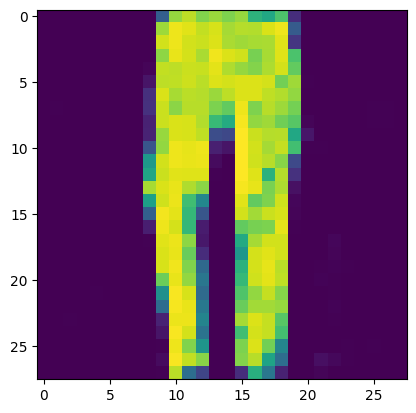

Dloss:  0.6028121
Gloss:  0.75724626
Dloss:  0.6028361
Gloss:  0.7571764
Dloss:  0.6028601
Gloss:  0.7572759
Dloss:  0.60288805
Gloss:  0.7572106
Dloss:  0.60291564
Gloss:  0.7572878
Dloss:  0.602941
Gloss:  0.75724727
Dloss:  0.60296094
Gloss:  0.7572998
Dloss:  0.6029802
Gloss:  0.75727826
Dloss:  0.603
Gloss:  0.7573132
Dloss:  0.60301834
Gloss:  0.75729316
Dloss:  0.60303426
Gloss:  0.7573262
Dloss:  0.6030517
Gloss:  0.7573118
Dloss:  0.603068
Gloss:  0.7573481
Dloss:  0.6030871
Gloss:  0.75731796
Dloss:  0.60310906
Gloss:  0.75735635
Dloss:  0.6031281
Gloss:  0.75733054
Dloss:  0.6031455
Gloss:  0.75736946
Dloss:  0.6031608
Gloss:  0.7573442
Dloss:  0.60317594
Gloss:  0.7573935
Dloss:  0.60319364
Gloss:  0.7573652
Dloss:  0.60321265
Gloss:  0.7574147
Dloss:  0.60323256
Gloss:  0.75737906
Dloss:  0.60325366
Gloss:  0.75743455
Dloss:  0.60327363
Gloss:  0.75740254
Dloss:  0.6032921
Gloss:  0.75744003
Dloss:  0.60330945
Gloss:  0.75740653
Dloss:  0.60332614
Gloss:  0.7574438
Dloss: 

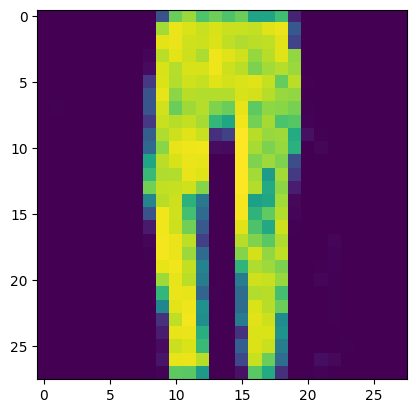

Dloss:  0.6033987
Gloss:  0.7574842
Dloss:  0.60342216
Gloss:  0.75744075
Dloss:  0.6034402
Gloss:  0.75749475
Dloss:  0.6034599
Gloss:  0.75745803
Dloss:  0.6034776
Gloss:  0.7575038
Dloss:  0.60349464
Gloss:  0.75748944
Dloss:  0.6035119
Gloss:  0.7575167
Dloss:  0.6035271
Gloss:  0.7575049
Dloss:  0.6035414
Gloss:  0.75751287
Dloss:  0.6035584
Gloss:  0.75751597
Dloss:  0.6035737
Gloss:  0.75752157
Dloss:  0.60359037
Gloss:  0.757518
Dloss:  0.6036039
Gloss:  0.75752014
Dloss:  0.6036214
Gloss:  0.7575195
Dloss:  0.60363823
Gloss:  0.75752485
Dloss:  0.6036537
Gloss:  0.7575257
Dloss:  0.60366875
Gloss:  0.7575313
Dloss:  0.6036842
Gloss:  0.7575379
Dloss:  0.6037005
Gloss:  0.75754607
Dloss:  0.60371596
Gloss:  0.75753665
Dloss:  0.6037314
Gloss:  0.7575546
Dloss:  0.6037449
Gloss:  0.7575422
Dloss:  0.60376376
Gloss:  0.7575716
Dloss:  0.6037782
Gloss:  0.75754106
Dloss:  0.603798
Gloss:  0.7575952
Dloss:  0.6038175
Gloss:  0.75754434
Dloss:  0.60384274
Gloss:  0.75762993
Dloss:  

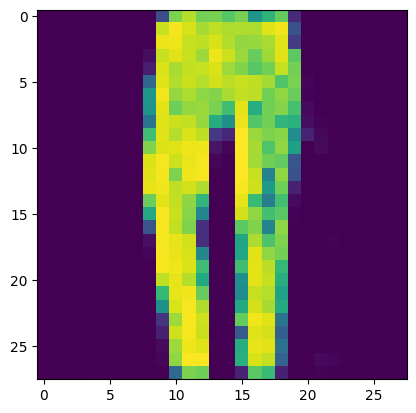

Dloss:  0.60393584
Gloss:  0.7576388
Dloss:  0.6039551
Gloss:  0.7576152
Dloss:  0.6039737
Gloss:  0.7576396
Dloss:  0.6039887
Gloss:  0.7576266
Dloss:  0.60400295
Gloss:  0.757653
Dloss:  0.60401756
Gloss:  0.7576384
Dloss:  0.6040339
Gloss:  0.7576606
Dloss:  0.6040496
Gloss:  0.75763786
Dloss:  0.6040661
Gloss:  0.7576593
Dloss:  0.60408235
Gloss:  0.7576495
Dloss:  0.6040963
Gloss:  0.7576625
Dloss:  0.604111
Gloss:  0.7576543
Dloss:  0.6041266
Gloss:  0.7576708
Dloss:  0.60414195
Gloss:  0.75765437
Dloss:  0.6041581
Gloss:  0.75769293
25 / 100
Dloss:  0.6041739
Gloss:  0.75766397
25 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


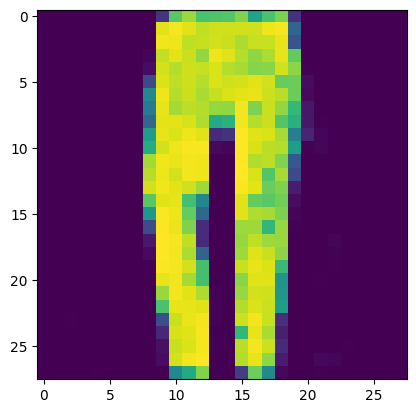

Dloss:  0.6041894
Gloss:  0.75770754
Dloss:  0.6042082
Gloss:  0.7576782
Dloss:  0.604228
Gloss:  0.75773454
Dloss:  0.6042477
Gloss:  0.7576886
Dloss:  0.60426587
Gloss:  0.75775963
Dloss:  0.6042839
Gloss:  0.7577057
Dloss:  0.6043038
Gloss:  0.75777346
Dloss:  0.6043261
Gloss:  0.7577282
Dloss:  0.60434544
Gloss:  0.75777596
Dloss:  0.6043631
Gloss:  0.7577404
Dloss:  0.60437816
Gloss:  0.75777894
Dloss:  0.6043963
Gloss:  0.75775695
Dloss:  0.6044118
Gloss:  0.75778365
Dloss:  0.60442847
Gloss:  0.7577661
Dloss:  0.6044457
Gloss:  0.7578095
Dloss:  0.6044604
Gloss:  0.7577932
Dloss:  0.60447407
Gloss:  0.75783277
Dloss:  0.60448974
Gloss:  0.7577979
Dloss:  0.6045082
Gloss:  0.7578614
Dloss:  0.60452664
Gloss:  0.757809
Dloss:  0.60454786
Gloss:  0.7578799
Dloss:  0.60456765
Gloss:  0.7578321
Dloss:  0.6045885
Gloss:  0.75791204
Dloss:  0.604614
Gloss:  0.75784415
Dloss:  0.6046389
Gloss:  0.7579422
Dloss:  0.60466313
Gloss:  0.7578932
Dloss:  0.60468686
Gloss:  0.7579517
Dloss:  0

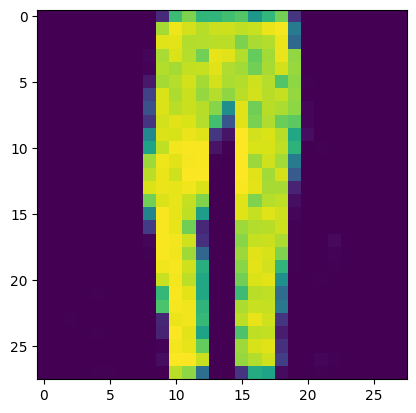

Dloss:  0.60475695
Gloss:  0.75798064
Dloss:  0.60477287
Gloss:  0.7579601
Dloss:  0.60479
Gloss:  0.758
Dloss:  0.6048081
Gloss:  0.7579761
Dloss:  0.6048254
Gloss:  0.7580072
Dloss:  0.6048438
Gloss:  0.75798196
Dloss:  0.60486186
Gloss:  0.75802815
Dloss:  0.6048781
Gloss:  0.7579847
Dloss:  0.6048964
Gloss:  0.75804335
Dloss:  0.60491806
Gloss:  0.7579994
Dloss:  0.60493785
Gloss:  0.75806844
Dloss:  0.6049578
Gloss:  0.7580295
Dloss:  0.60497326
Gloss:  0.7580652
Dloss:  0.604988
Gloss:  0.7580538
Dloss:  0.6050034
Gloss:  0.75808126
Dloss:  0.605019
Gloss:  0.7580717
Dloss:  0.60503423
Gloss:  0.7580865
Dloss:  0.60504997
Gloss:  0.75807935
Dloss:  0.60506666
Gloss:  0.75808847
Dloss:  0.60508126
Gloss:  0.7580831
Dloss:  0.6050977
Gloss:  0.7580969
Dloss:  0.6051123
Gloss:  0.7580892
Dloss:  0.6051271
Gloss:  0.7581143
Dloss:  0.6051425
Gloss:  0.7581012
Dloss:  0.6051576
Gloss:  0.7581208
Dloss:  0.60517323
Gloss:  0.75810534
Dloss:  0.6051913
Gloss:  0.75812393
Dloss:  0.60520

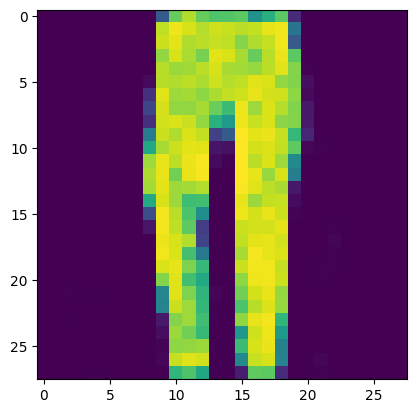

Dloss:  0.6052503
Gloss:  0.7581458
Dloss:  0.60526615
Gloss:  0.7581238
Dloss:  0.60528284
Gloss:  0.7581763
Dloss:  0.60529983
Gloss:  0.7581327
Dloss:  0.6053199
Gloss:  0.7582155
Dloss:  0.6053437
Gloss:  0.75814474
Dloss:  0.6053693
Gloss:  0.7582399
Dloss:  0.605393
Gloss:  0.7581729
Dloss:  0.60541725
Gloss:  0.7582533
Dloss:  0.6054395
Gloss:  0.75820565
Dloss:  0.6054635
Gloss:  0.75827897
Dloss:  0.6054859
Gloss:  0.75823206
Dloss:  0.6055072
Gloss:  0.7582901
Dloss:  0.6055238
Gloss:  0.7582608
Dloss:  0.605543
Gloss:  0.75830245
Dloss:  0.6055572
Gloss:  0.7582806
Dloss:  0.6055746
Gloss:  0.75831264
Dloss:  0.60559124
Gloss:  0.75829387
Dloss:  0.6056067
Gloss:  0.75832355
Dloss:  0.6056243
Gloss:  0.7583046
Dloss:  0.6056399
Gloss:  0.7583312
Dloss:  0.6056558
Gloss:  0.7583225
Dloss:  0.60567087
Gloss:  0.7583498
Dloss:  0.60568863
Gloss:  0.7583452
Dloss:  0.6057045
Gloss:  0.75836146
Dloss:  0.60571843
Gloss:  0.7583574
Dloss:  0.6057339
Gloss:  0.75838786
Dloss:  0.60

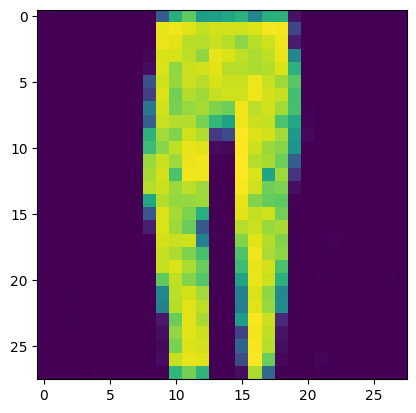

Dloss:  0.60579574
Gloss:  0.75840294
Dloss:  0.6058111
Gloss:  0.7583808
Dloss:  0.60582423
Gloss:  0.75841194
Dloss:  0.605841
Gloss:  0.7583905
Dloss:  0.6058573
Gloss:  0.7584238
Dloss:  0.6058722
Gloss:  0.75840974
Dloss:  0.60589033
Gloss:  0.7584478
Dloss:  0.60590523
Gloss:  0.7584187
Dloss:  0.605919
Gloss:  0.75846165
Dloss:  0.60593456
Gloss:  0.75843775
Dloss:  0.60595036
Gloss:  0.7584824
Dloss:  0.6059703
Gloss:  0.7584467
Dloss:  0.6059894
Gloss:  0.75849646
Dloss:  0.6060074
Gloss:  0.7584526
Dloss:  0.60602695
Gloss:  0.7585298
Dloss:  0.6060446
Gloss:  0.7584746
Dloss:  0.6060655
Gloss:  0.7585525
Dloss:  0.6060874
Gloss:  0.75850713
Dloss:  0.6061088
Gloss:  0.7585701
Dloss:  0.60612917
Gloss:  0.758528
Dloss:  0.6061481
Gloss:  0.7585927
Dloss:  0.606165
Gloss:  0.75855905
Dloss:  0.6061852
Gloss:  0.7586042
Dloss:  0.606203
Gloss:  0.75856113
Dloss:  0.60622305
Gloss:  0.7586148
Dloss:  0.6062426
Gloss:  0.7585744
Dloss:  0.6062626
Gloss:  0.7586421
Dloss:  0.60628

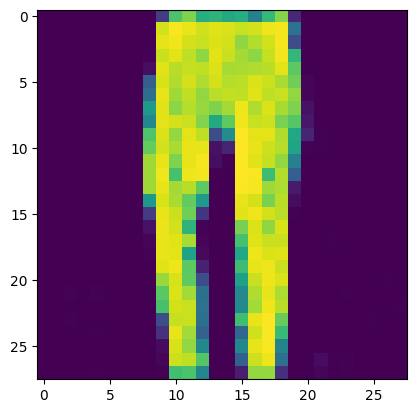

Dloss:  0.60633445
Gloss:  0.7586607
Dloss:  0.6063511
Gloss:  0.75865364
Dloss:  0.60636663
Gloss:  0.75866014
Dloss:  0.60638005
Gloss:  0.7586639
Dloss:  0.60639405
Gloss:  0.75866145
Dloss:  0.60640794
Gloss:  0.7586642
Dloss:  0.606422
Gloss:  0.75865924
Dloss:  0.6064345
Gloss:  0.75866425
Dloss:  0.6064494
Gloss:  0.7586645
Dloss:  0.6064643
Gloss:  0.7586738
Dloss:  0.60648
Gloss:  0.7586578
Dloss:  0.6064952
Gloss:  0.7586928
Dloss:  0.60651267
Gloss:  0.7586666
Dloss:  0.6065275
Gloss:  0.7587068
Dloss:  0.60654324
Gloss:  0.75868493
26 / 100
Dloss:  0.6065566
Gloss:  0.7587166
26 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


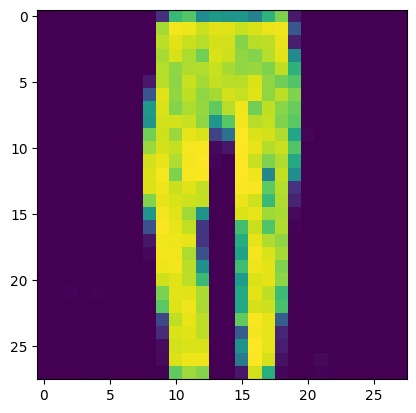

Dloss:  0.60657334
Gloss:  0.7587011
Dloss:  0.60658973
Gloss:  0.7587238
Dloss:  0.6066051
Gloss:  0.75870353
Dloss:  0.60662293
Gloss:  0.75875604
Dloss:  0.60663927
Gloss:  0.75871295
Dloss:  0.6066566
Gloss:  0.7587645
Dloss:  0.6066758
Gloss:  0.7587133
Dloss:  0.60669637
Gloss:  0.7587763
Dloss:  0.6067136
Gloss:  0.7587217
Dloss:  0.60673475
Gloss:  0.7587932
Dloss:  0.6067551
Gloss:  0.75874764
Dloss:  0.6067747
Gloss:  0.7587931
Dloss:  0.60679424
Gloss:  0.75876606
Dloss:  0.6068098
Gloss:  0.7588022
Dloss:  0.6068254
Gloss:  0.7587803
Dloss:  0.60683894
Gloss:  0.75880903
Dloss:  0.60685223
Gloss:  0.75879574
Dloss:  0.60686606
Gloss:  0.75881296
Dloss:  0.6068799
Gloss:  0.7588085
Dloss:  0.60689354
Gloss:  0.7588185
Dloss:  0.6069077
Gloss:  0.7588122
Dloss:  0.6069228
Gloss:  0.75883144
Dloss:  0.6069374
Gloss:  0.75882274
Dloss:  0.6069509
Gloss:  0.758831
Dloss:  0.60696256
Gloss:  0.75883496
Dloss:  0.606978
Gloss:  0.7588498
Dloss:  0.6069963
Gloss:  0.7588505
Dloss: 

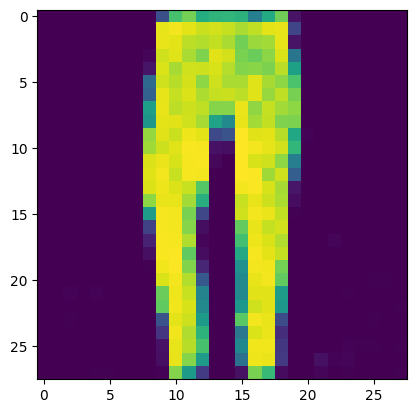

Dloss:  0.6070489
Gloss:  0.7588864
Dloss:  0.60706645
Gloss:  0.7588526
Dloss:  0.6070854
Gloss:  0.7589222
Dloss:  0.60710466
Gloss:  0.75885856
Dloss:  0.60712373
Gloss:  0.75895756
Dloss:  0.6071497
Gloss:  0.75888366
Dloss:  0.6071757
Gloss:  0.7589617
Dloss:  0.60719776
Gloss:  0.7589138
Dloss:  0.6072163
Gloss:  0.7589673
Dloss:  0.6072319
Gloss:  0.75893456
Dloss:  0.60724837
Gloss:  0.7589727
Dloss:  0.6072647
Gloss:  0.75895274
Dloss:  0.60727966
Gloss:  0.7589709
Dloss:  0.60729223
Gloss:  0.75897
Dloss:  0.6073069
Gloss:  0.75899184
Dloss:  0.60732055
Gloss:  0.7589907
Dloss:  0.6073351
Gloss:  0.75900733
Dloss:  0.607349
Gloss:  0.7589966
Dloss:  0.6073639
Gloss:  0.75901073
Dloss:  0.6073764
Gloss:  0.7590002
Dloss:  0.6073906
Gloss:  0.75900954
Dloss:  0.60740244
Gloss:  0.75899446
Dloss:  0.6074203
Gloss:  0.7590208
Dloss:  0.6074366
Gloss:  0.75899935
Dloss:  0.6074535
Gloss:  0.7590332
Dloss:  0.6074667
Gloss:  0.75901943
Dloss:  0.6074828
Gloss:  0.7590621
Dloss:  0.

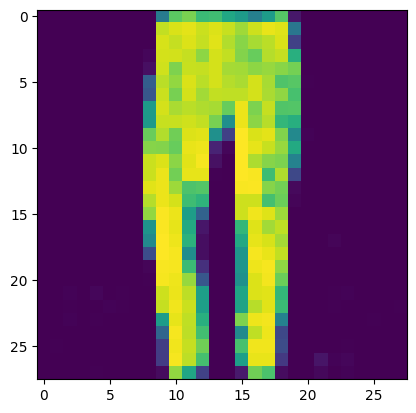

Dloss:  0.6075536
Gloss:  0.75909394
Dloss:  0.60757434
Gloss:  0.7590367
Dloss:  0.6075939
Gloss:  0.7591017
Dloss:  0.6076154
Gloss:  0.7590585
Dloss:  0.6076328
Gloss:  0.7591042
Dloss:  0.60764885
Gloss:  0.75907195
Dloss:  0.6076656
Gloss:  0.759112
Dloss:  0.60768324
Gloss:  0.759085
Dloss:  0.6076982
Gloss:  0.7591099
Dloss:  0.6077119
Gloss:  0.7590901
Dloss:  0.6077247
Gloss:  0.7591212
Dloss:  0.6077404
Gloss:  0.75909543
Dloss:  0.6077551
Gloss:  0.7591313
Dloss:  0.60777146
Gloss:  0.75910133
Dloss:  0.60778725
Gloss:  0.7591388
Dloss:  0.60780174
Gloss:  0.7591118
Dloss:  0.6078176
Gloss:  0.75915885
Dloss:  0.60783416
Gloss:  0.75911826
Dloss:  0.6078516
Gloss:  0.7591821
Dloss:  0.6078712
Gloss:  0.7591438
Dloss:  0.6078863
Gloss:  0.7591839
Dloss:  0.6079057
Gloss:  0.75915056
Dloss:  0.6079225
Gloss:  0.7591993
Dloss:  0.607941
Gloss:  0.75916547
Dloss:  0.6079573
Gloss:  0.75920904
Dloss:  0.6079709
Gloss:  0.75917023
Dloss:  0.60798496
Gloss:  0.75921834
Dloss:  0.60

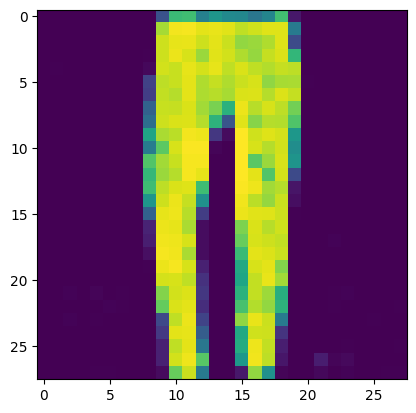

Dloss:  0.6080488
Gloss:  0.7592243
Dloss:  0.60806227
Gloss:  0.7592056
Dloss:  0.608074
Gloss:  0.7592414
Dloss:  0.60809064
Gloss:  0.75921285
Dloss:  0.60810924
Gloss:  0.75924766
Dloss:  0.60812855
Gloss:  0.75922346
Dloss:  0.6081429
Gloss:  0.7592628
Dloss:  0.6081565
Gloss:  0.7592369
Dloss:  0.608171
Gloss:  0.75927705
Dloss:  0.60818684
Gloss:  0.7592498
Dloss:  0.6082033
Gloss:  0.7592885
Dloss:  0.6082173
Gloss:  0.75926596
Dloss:  0.60823095
Gloss:  0.75930196
Dloss:  0.6082475
Gloss:  0.7592663
Dloss:  0.60826916
Gloss:  0.7593222
Dloss:  0.6082888
Gloss:  0.75927466
Dloss:  0.6083053
Gloss:  0.7593296
Dloss:  0.60832036
Gloss:  0.7592949
Dloss:  0.6083385
Gloss:  0.75934
Dloss:  0.60835594
Gloss:  0.7593092
Dloss:  0.608374
Gloss:  0.7593453
Dloss:  0.6083863
Gloss:  0.7593218
Dloss:  0.60840034
Gloss:  0.75935143
Dloss:  0.608414
Gloss:  0.75934565
Dloss:  0.6084283
Gloss:  0.75935423
Dloss:  0.608441
Gloss:  0.75933564
Dloss:  0.6084544
Gloss:  0.75935453
Dloss:  0.608

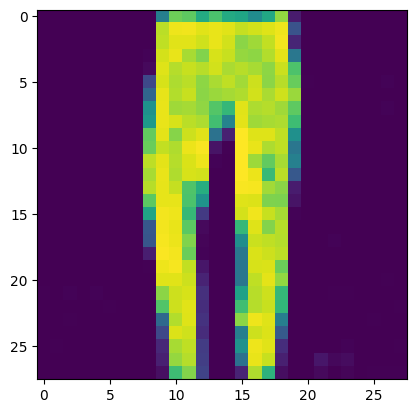

Dloss:  0.6085155
Gloss:  0.75938517
Dloss:  0.60853124
Gloss:  0.75937635
Dloss:  0.60854566
Gloss:  0.7594039
Dloss:  0.6085581
Gloss:  0.7593933
Dloss:  0.60857195
Gloss:  0.75941515
Dloss:  0.6085857
Gloss:  0.7594029
Dloss:  0.6086007
Gloss:  0.75941694
Dloss:  0.6086145
Gloss:  0.7594004
Dloss:  0.6086278
Gloss:  0.75942993
Dloss:  0.60864115
Gloss:  0.7594102
Dloss:  0.6086545
Gloss:  0.75944054
Dloss:  0.6086704
Gloss:  0.75941205
Dloss:  0.60868716
Gloss:  0.75945973
Dloss:  0.60870266
Gloss:  0.7594206
Dloss:  0.6087174
Gloss:  0.7594805
27 / 100
Dloss:  0.6087319
Gloss:  0.7594386
27 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


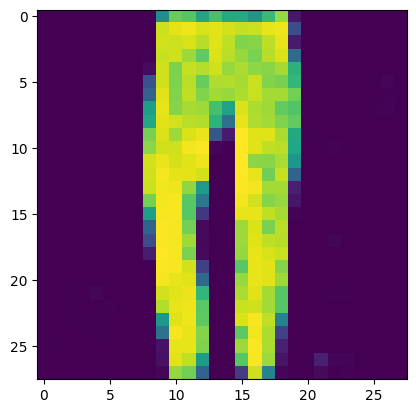

Dloss:  0.60874957
Gloss:  0.7595072
Dloss:  0.60876805
Gloss:  0.7594613
Dloss:  0.6087893
Gloss:  0.7595169
Dloss:  0.6088082
Gloss:  0.75947785
Dloss:  0.608825
Gloss:  0.75953054
Dloss:  0.60884
Gloss:  0.7594889
Dloss:  0.6088576
Gloss:  0.7595471
Dloss:  0.6088759
Gloss:  0.7595118
Dloss:  0.6088898
Gloss:  0.75954664
Dloss:  0.6089047
Gloss:  0.75953853
Dloss:  0.6089169
Gloss:  0.75955975
Dloss:  0.6089335
Gloss:  0.7595472
Dloss:  0.6089492
Gloss:  0.75955963
Dloss:  0.6089633
Gloss:  0.75955445
Dloss:  0.6089773
Gloss:  0.759576
Dloss:  0.6089889
Gloss:  0.7595634
Dloss:  0.60899955
Gloss:  0.7595851
Dloss:  0.6090138
Gloss:  0.7595713
Dloss:  0.6090281
Gloss:  0.7595951
Dloss:  0.60904163
Gloss:  0.7595825
Dloss:  0.6090553
Gloss:  0.75960916
Dloss:  0.6090661
Gloss:  0.75959325
Dloss:  0.60907924
Gloss:  0.7596345
Dloss:  0.6090955
Gloss:  0.75958186
Dloss:  0.60911167
Gloss:  0.7596618
Dloss:  0.6091334
Gloss:  0.75959694
Dloss:  0.6091583
Gloss:  0.759685
Dloss:  0.609179

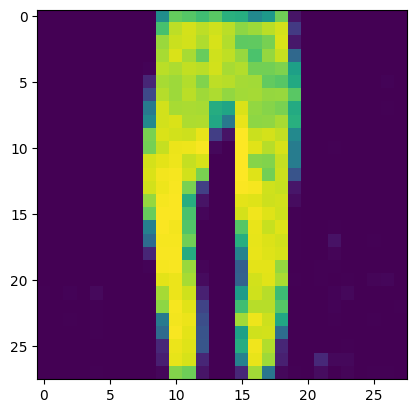

Dloss:  0.609229
Gloss:  0.75970984
Dloss:  0.60924643
Gloss:  0.75967795
Dloss:  0.6092619
Gloss:  0.7597295
Dloss:  0.6092778
Gloss:  0.75970405
Dloss:  0.6092897
Gloss:  0.7597426
Dloss:  0.60930294
Gloss:  0.7597191
Dloss:  0.6093177
Gloss:  0.7597436
Dloss:  0.6093324
Gloss:  0.75973153
Dloss:  0.6093455
Gloss:  0.7597463
Dloss:  0.6093559
Gloss:  0.75973415
Dloss:  0.60936844
Gloss:  0.75975674
Dloss:  0.6093828
Gloss:  0.75974494
Dloss:  0.6093962
Gloss:  0.75977415
Dloss:  0.6094096
Gloss:  0.759771
Dloss:  0.6094233
Gloss:  0.7598031
Dloss:  0.60943544
Gloss:  0.75979817
Dloss:  0.6094484
Gloss:  0.7598273
Dloss:  0.6094625
Gloss:  0.7598127
Dloss:  0.6094759
Gloss:  0.7598371
Dloss:  0.6094884
Gloss:  0.75982636
Dloss:  0.6095022
Gloss:  0.7598445
Dloss:  0.6095135
Gloss:  0.75983036
Dloss:  0.6095268
Gloss:  0.7598568
Dloss:  0.6095397
Gloss:  0.75983894
Dloss:  0.60955495
Gloss:  0.7598812
Dloss:  0.60956895
Gloss:  0.7598505
Dloss:  0.60958344
Gloss:  0.75990546
Dloss:  0.

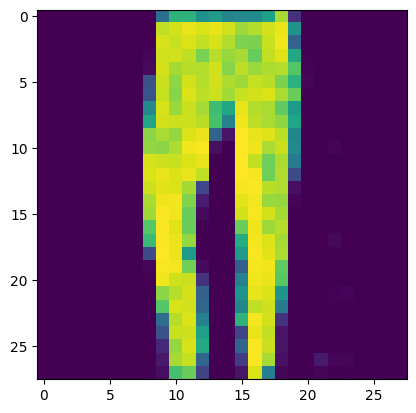

Dloss:  0.60965836
Gloss:  0.759958
Dloss:  0.60967684
Gloss:  0.75991076
Dloss:  0.6096926
Gloss:  0.75996715
Dloss:  0.6097055
Gloss:  0.75993454
Dloss:  0.60971946
Gloss:  0.7599723
Dloss:  0.60973483
Gloss:  0.7599477
Dloss:  0.6097477
Gloss:  0.75998724
Dloss:  0.6097632
Gloss:  0.759972
Dloss:  0.6097758
Gloss:  0.76000404
Dloss:  0.60978717
Gloss:  0.75998825
Dloss:  0.60979986
Gloss:  0.76001614
Dloss:  0.6098144
Gloss:  0.7599942
Dloss:  0.60982615
Gloss:  0.76001996
Dloss:  0.6098398
Gloss:  0.76000136
Dloss:  0.6098533
Gloss:  0.7600315
Dloss:  0.6098663
Gloss:  0.75999755
Dloss:  0.6098792
Gloss:  0.760042
Dloss:  0.60989296
Gloss:  0.76000684
Dloss:  0.6099108
Gloss:  0.7600723
Dloss:  0.6099286
Gloss:  0.7600225
Dloss:  0.6099472
Gloss:  0.7600966
Dloss:  0.6099685
Gloss:  0.7600377
Dloss:  0.60998625
Gloss:  0.7601029
Dloss:  0.6100058
Gloss:  0.760059
Dloss:  0.6100215
Gloss:  0.7601054
Dloss:  0.61003786
Gloss:  0.76007104
Dloss:  0.6100534
Gloss:  0.7601097
Dloss:  0.

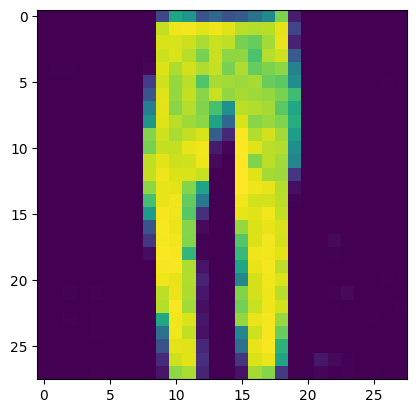

Dloss:  0.6101037
Gloss:  0.7601305
Dloss:  0.61011714
Gloss:  0.76011324
Dloss:  0.61012805
Gloss:  0.76014
Dloss:  0.6101403
Gloss:  0.76012427
Dloss:  0.6101509
Gloss:  0.7601557
Dloss:  0.61016387
Gloss:  0.7601299
Dloss:  0.6101807
Gloss:  0.7601644
Dloss:  0.61019415
Gloss:  0.7601299
Dloss:  0.61020833
Gloss:  0.76018405
Dloss:  0.6102227
Gloss:  0.7601416
Dloss:  0.61023676
Gloss:  0.7601988
Dloss:  0.6102516
Gloss:  0.7601569
Dloss:  0.6102714
Gloss:  0.7602096
Dloss:  0.6102907
Gloss:  0.76016647
Dloss:  0.6103095
Gloss:  0.7602254
Dloss:  0.61032414
Gloss:  0.7601906
Dloss:  0.6103359
Gloss:  0.76023585
Dloss:  0.6103474
Gloss:  0.7602151
Dloss:  0.61036134
Gloss:  0.76024264
Dloss:  0.6103744
Gloss:  0.7602225
Dloss:  0.6103873
Gloss:  0.7602468
Dloss:  0.6103983
Gloss:  0.7602317
Dloss:  0.610411
Gloss:  0.7602584
Dloss:  0.6104216
Gloss:  0.7602335
Dloss:  0.61043453
Gloss:  0.76025844
Dloss:  0.61044747
Gloss:  0.76023406
Dloss:  0.6104637
Gloss:  0.7602656
Dloss:  0.610

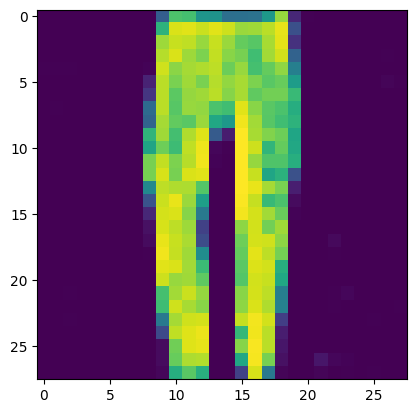

Dloss:  0.61051327
Gloss:  0.7602818
Dloss:  0.61052907
Gloss:  0.7602597
Dloss:  0.6105449
Gloss:  0.760285
Dloss:  0.61055666
Gloss:  0.7602709
Dloss:  0.610566
Gloss:  0.7602919
Dloss:  0.61057746
Gloss:  0.76028043
Dloss:  0.6105901
Gloss:  0.7603004
Dloss:  0.6106027
Gloss:  0.76028043
Dloss:  0.61061853
Gloss:  0.7603147
Dloss:  0.6106313
Gloss:  0.76030153
Dloss:  0.6106419
Gloss:  0.7603253
Dloss:  0.6106527
Gloss:  0.76031023
Dloss:  0.6106646
Gloss:  0.7603377
Dloss:  0.6106785
Gloss:  0.76031035
Dloss:  0.61069447
Gloss:  0.7603658
28 / 100
Dloss:  0.6107097
Gloss:  0.760312
28 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


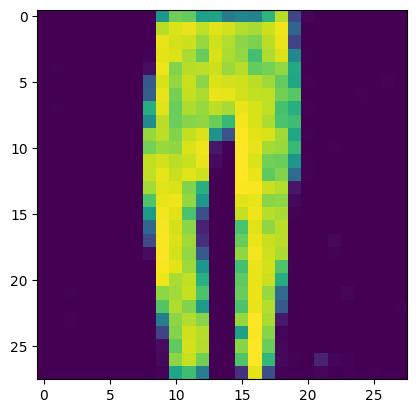

Dloss:  0.6107245
Gloss:  0.7603819
Dloss:  0.6107424
Gloss:  0.76033777
Dloss:  0.6107574
Gloss:  0.7603833
Dloss:  0.61077505
Gloss:  0.7603532
Dloss:  0.61078954
Gloss:  0.7603829
Dloss:  0.61080325
Gloss:  0.7603611
Dloss:  0.6108155
Gloss:  0.76039237
Dloss:  0.61082643
Gloss:  0.7603775
Dloss:  0.61083716
Gloss:  0.76040095
Dloss:  0.6108506
Gloss:  0.76039517
Dloss:  0.61086416
Gloss:  0.7604113
Dloss:  0.6108792
Gloss:  0.7603961
Dloss:  0.6108899
Gloss:  0.76041484
Dloss:  0.61090153
Gloss:  0.76040345
Dloss:  0.6109138
Gloss:  0.7604288
Dloss:  0.610925
Gloss:  0.7604236
Dloss:  0.61093634
Gloss:  0.76044095
Dloss:  0.6109463
Gloss:  0.7604309
Dloss:  0.61095935
Gloss:  0.7604606
Dloss:  0.6109707
Gloss:  0.76045156
Dloss:  0.6109811
Gloss:  0.76047856
Dloss:  0.61099154
Gloss:  0.7604583
Dloss:  0.61100405
Gloss:  0.7605088
Dloss:  0.61102074
Gloss:  0.76045424
Dloss:  0.6110409
Gloss:  0.7605744
Dloss:  0.6110717
Gloss:  0.760486
Dloss:  0.6111064
Gloss:  0.7606131
Dloss:  

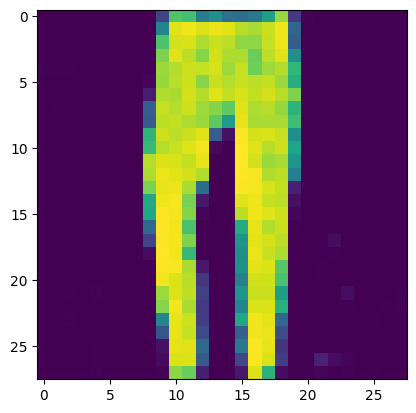

Dloss:  0.61118454
Gloss:  0.76060706
Dloss:  0.6112005
Gloss:  0.7606078
Dloss:  0.611213
Gloss:  0.76061976
Dloss:  0.611228
Gloss:  0.76061857
Dloss:  0.6112388
Gloss:  0.76062757
Dloss:  0.61125237
Gloss:  0.7606337
Dloss:  0.6112643
Gloss:  0.7606352
Dloss:  0.6112752
Gloss:  0.76063895
Dloss:  0.611285
Gloss:  0.7606477
Dloss:  0.61129445
Gloss:  0.7606449
Dloss:  0.61130404
Gloss:  0.7606545
Dloss:  0.6113148
Gloss:  0.76065564
Dloss:  0.6113264
Gloss:  0.7606665
Dloss:  0.61133754
Gloss:  0.7606701
Dloss:  0.61135006
Gloss:  0.76068276
Dloss:  0.61136144
Gloss:  0.7606849
Dloss:  0.6113741
Gloss:  0.7606966
Dloss:  0.61138606
Gloss:  0.76069844
Dloss:  0.6113973
Gloss:  0.7607065
Dloss:  0.6114078
Gloss:  0.7607103
Dloss:  0.6114209
Gloss:  0.76070875
Dloss:  0.61143017
Gloss:  0.7607151
Dloss:  0.61144227
Gloss:  0.7607203
Dloss:  0.6114516
Gloss:  0.76072276
Dloss:  0.611463
Gloss:  0.76072806
Dloss:  0.61147255
Gloss:  0.7607331
Dloss:  0.61148626
Gloss:  0.76075405
Dloss:  

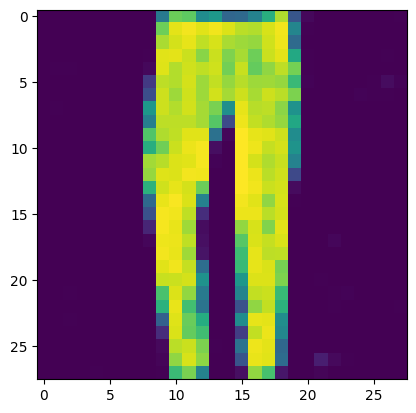

Dloss:  0.6115317
Gloss:  0.7608025
Dloss:  0.61155087
Gloss:  0.76075333
Dloss:  0.61157125
Gloss:  0.76082337
Dloss:  0.6115901
Gloss:  0.760773
Dloss:  0.6116074
Gloss:  0.76084834
Dloss:  0.6116227
Gloss:  0.76080436
Dloss:  0.6116369
Gloss:  0.7608733
Dloss:  0.6116539
Gloss:  0.7608287
Dloss:  0.61167395
Gloss:  0.76088846
Dloss:  0.61169106
Gloss:  0.7608551
Dloss:  0.61170506
Gloss:  0.76090455
Dloss:  0.6117181
Gloss:  0.7608829
Dloss:  0.611731
Gloss:  0.7609123
Dloss:  0.6117437
Gloss:  0.7608895
Dloss:  0.61175746
Gloss:  0.76091194
Dloss:  0.611769
Gloss:  0.7608912
Dloss:  0.6117823
Gloss:  0.7609281
Dloss:  0.6117928
Gloss:  0.7609033
Dloss:  0.61180437
Gloss:  0.76095206
Dloss:  0.61181885
Gloss:  0.76091784
Dloss:  0.6118321
Gloss:  0.76096344
Dloss:  0.61184776
Gloss:  0.7609353
Dloss:  0.6118605
Gloss:  0.7609722
Dloss:  0.6118736
Gloss:  0.7609512
Dloss:  0.61188495
Gloss:  0.7609779
Dloss:  0.61189747
Gloss:  0.7609622
Dloss:  0.6119082
Gloss:  0.760988
Dloss:  0.6

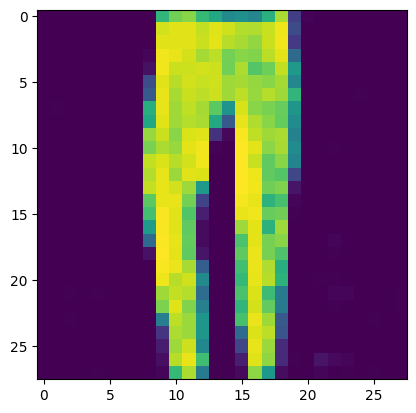

Dloss:  0.6119554
Gloss:  0.7610128
Dloss:  0.61197096
Gloss:  0.76097184
Dloss:  0.6119858
Gloss:  0.7610294
Dloss:  0.61200225
Gloss:  0.7609886
Dloss:  0.61201775
Gloss:  0.7610498
Dloss:  0.6120318
Gloss:  0.76100856
Dloss:  0.6120484
Gloss:  0.76105165
Dloss:  0.6120613
Gloss:  0.7610215
Dloss:  0.61207306
Gloss:  0.7610524
Dloss:  0.6120856
Gloss:  0.761029
Dloss:  0.6120951
Gloss:  0.7610574
Dloss:  0.6121058
Gloss:  0.76103425
Dloss:  0.6121169
Gloss:  0.76105773
Dloss:  0.612129
Gloss:  0.76104045
Dloss:  0.6121415
Gloss:  0.76106364
Dloss:  0.61215305
Gloss:  0.7610381
Dloss:  0.61216444
Gloss:  0.7610673
Dloss:  0.6121752
Gloss:  0.76104236
Dloss:  0.6121865
Gloss:  0.76107043
Dloss:  0.6121984
Gloss:  0.76104975
Dloss:  0.6122133
Gloss:  0.7610864
Dloss:  0.61222476
Gloss:  0.7610609
Dloss:  0.6122378
Gloss:  0.76109195
Dloss:  0.61224973
Gloss:  0.76106125
Dloss:  0.6122619
Gloss:  0.7611035
Dloss:  0.61227375
Gloss:  0.7610744
Dloss:  0.6122893
Gloss:  0.7611217
Dloss:  0

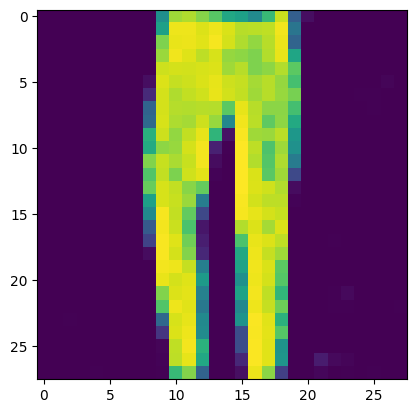

Dloss:  0.6123418
Gloss:  0.76113546
Dloss:  0.6123532
Gloss:  0.7611136
Dloss:  0.6123677
Gloss:  0.7611474
Dloss:  0.61237955
Gloss:  0.76111525
Dloss:  0.6123915
Gloss:  0.76114374
Dloss:  0.6124044
Gloss:  0.7611142
Dloss:  0.61241764
Gloss:  0.7611473
Dloss:  0.61242986
Gloss:  0.76111996
Dloss:  0.6124414
Gloss:  0.76115537
Dloss:  0.61245567
Gloss:  0.7611355
Dloss:  0.612468
Gloss:  0.7611642
Dloss:  0.6124787
Gloss:  0.76114845
Dloss:  0.6124923
Gloss:  0.7611771
Dloss:  0.61250556
Gloss:  0.761155
Dloss:  0.61251867
Gloss:  0.7611992
29 / 100
Dloss:  0.6125333
Gloss:  0.761162
29 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


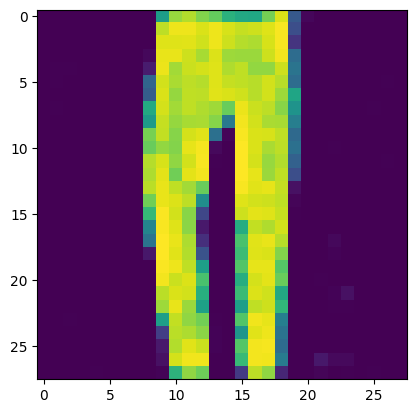

Dloss:  0.6125474
Gloss:  0.76121014
Dloss:  0.6125617
Gloss:  0.76117027
Dloss:  0.612574
Gloss:  0.7612185
Dloss:  0.6125872
Gloss:  0.76118755
Dloss:  0.61260164
Gloss:  0.76122266
Dloss:  0.61261463
Gloss:  0.7611965
Dloss:  0.6126264
Gloss:  0.7612243
Dloss:  0.61264074
Gloss:  0.76121694
Dloss:  0.6126487
Gloss:  0.7612339
Dloss:  0.6126581
Gloss:  0.761229
Dloss:  0.61266756
Gloss:  0.76124513
Dloss:  0.61268157
Gloss:  0.76122826
Dloss:  0.61269456
Gloss:  0.76124185
Dloss:  0.6127051
Gloss:  0.7612222
Dloss:  0.6127153
Gloss:  0.76125115
Dloss:  0.61272615
Gloss:  0.7612279
Dloss:  0.6127365
Gloss:  0.76126444
Dloss:  0.6127488
Gloss:  0.76122767
Dloss:  0.6127683
Gloss:  0.7612887
Dloss:  0.61278516
Gloss:  0.76124686
Dloss:  0.6127975
Gloss:  0.7613103
Dloss:  0.6128107
Gloss:  0.7612671
Dloss:  0.6128262
Gloss:  0.7613409
Dloss:  0.612843
Gloss:  0.76129335
Dloss:  0.6128601
Gloss:  0.7613617
Dloss:  0.61287826
Gloss:  0.7613117
Dloss:  0.61289555
Gloss:  0.7613731
Dloss:  

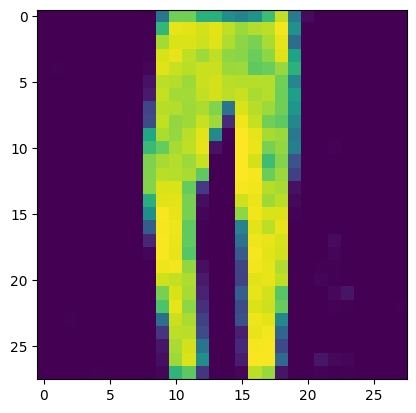

Dloss:  0.6129423
Gloss:  0.76137924
Dloss:  0.61295533
Gloss:  0.7613549
Dloss:  0.6129705
Gloss:  0.7613993
Dloss:  0.6129853
Gloss:  0.76137424
Dloss:  0.6129959
Gloss:  0.76140296
Dloss:  0.6130082
Gloss:  0.7613898
Dloss:  0.6130204
Gloss:  0.76140064
Dloss:  0.61303204
Gloss:  0.7613953
Dloss:  0.61304283
Gloss:  0.76140404
Dloss:  0.6130521
Gloss:  0.76139855
Dloss:  0.61305964
Gloss:  0.76142067
Dloss:  0.6130693
Gloss:  0.76140904
Dloss:  0.61307985
Gloss:  0.76143116
Dloss:  0.6130903
Gloss:  0.76141715
Dloss:  0.6131037
Gloss:  0.76144755
Dloss:  0.6131159
Gloss:  0.7614327
Dloss:  0.6131276
Gloss:  0.7614648
Dloss:  0.61313725
Gloss:  0.7614389
Dloss:  0.6131485
Gloss:  0.76148283
Dloss:  0.613161
Gloss:  0.76144254
Dloss:  0.6131784
Gloss:  0.7614919
Dloss:  0.613194
Gloss:  0.76145095
Dloss:  0.6132105
Gloss:  0.76150024
Dloss:  0.61322224
Gloss:  0.76147294
Dloss:  0.6132328
Gloss:  0.76150995
Dloss:  0.613243
Gloss:  0.7614977
Dloss:  0.6132564
Gloss:  0.7615161
Dloss: 

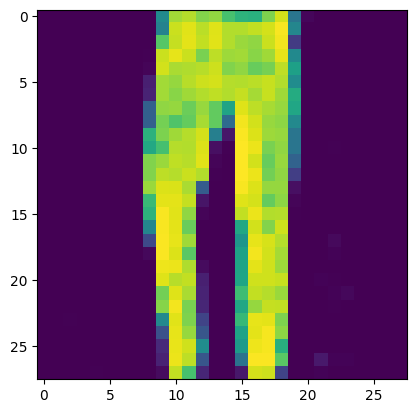

Dloss:  0.61329985
Gloss:  0.7615379
Dloss:  0.6133088
Gloss:  0.7615302
Dloss:  0.6133219
Gloss:  0.7615462
Dloss:  0.613336
Gloss:  0.7615379
Dloss:  0.6133462
Gloss:  0.76155335
Dloss:  0.61335707
Gloss:  0.76154333
Dloss:  0.61336553
Gloss:  0.76157254
Dloss:  0.61337644
Gloss:  0.76155275
Dloss:  0.6133894
Gloss:  0.76160014
Dloss:  0.6134021
Gloss:  0.7615581
Dloss:  0.6134211
Gloss:  0.7616448
Dloss:  0.61344117
Gloss:  0.76158726
Dloss:  0.6134572
Gloss:  0.7616577
Dloss:  0.6134734
Gloss:  0.7616158
Dloss:  0.61348903
Gloss:  0.7616554
Dloss:  0.6135027
Gloss:  0.7616278
Dloss:  0.6135183
Gloss:  0.76165545
Dloss:  0.61353093
Gloss:  0.7616319
Dloss:  0.61354065
Gloss:  0.7616592
Dloss:  0.6135511
Gloss:  0.7616493
Dloss:  0.61356026
Gloss:  0.76165926
Dloss:  0.6135714
Gloss:  0.7616605
Dloss:  0.61358225
Gloss:  0.76167697
Dloss:  0.6135943
Gloss:  0.76166874
Dloss:  0.61360526
Gloss:  0.7616883
Dloss:  0.6136169
Gloss:  0.76166844
Dloss:  0.61362785
Gloss:  0.76168865
Dloss

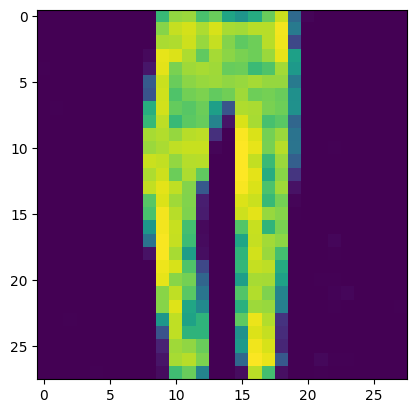

Dloss:  0.61367434
Gloss:  0.761723
Dloss:  0.6136864
Gloss:  0.7616936
Dloss:  0.61369795
Gloss:  0.761738
Dloss:  0.61371064
Gloss:  0.7617059
Dloss:  0.6137226
Gloss:  0.7617573
Dloss:  0.6137348
Gloss:  0.76172876
Dloss:  0.6137489
Gloss:  0.76177186
Dloss:  0.6137621
Gloss:  0.7617474
Dloss:  0.61377084
Gloss:  0.7617757
Dloss:  0.61378425
Gloss:  0.76175725
Dloss:  0.61379504
Gloss:  0.7617749
Dloss:  0.6138062
Gloss:  0.7617577
Dloss:  0.6138166
Gloss:  0.7617718
Dloss:  0.6138277
Gloss:  0.7617545
Dloss:  0.61383784
Gloss:  0.7617774
Dloss:  0.6138483
Gloss:  0.7617677
Dloss:  0.61385876
Gloss:  0.7617826
Dloss:  0.6138675
Gloss:  0.76177603
Dloss:  0.6138766
Gloss:  0.7617978
Dloss:  0.6138845
Gloss:  0.7617712
Dloss:  0.6138968
Gloss:  0.76181823
Dloss:  0.61390984
Gloss:  0.7617787
Dloss:  0.61392725
Gloss:  0.7618474
Dloss:  0.6139434
Gloss:  0.7617862
Dloss:  0.61396307
Gloss:  0.761867
Dloss:  0.6139799
Gloss:  0.7618141
Dloss:  0.6139969
Gloss:  0.76186687
Dloss:  0.6140

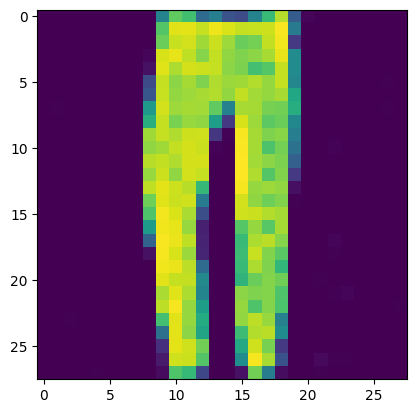

Dloss:  0.61405104
Gloss:  0.76186883
Dloss:  0.61406267
Gloss:  0.7618665
Dloss:  0.61407375
Gloss:  0.76187754
Dloss:  0.6140844
Gloss:  0.7618705
Dloss:  0.6140937
Gloss:  0.76187813
Dloss:  0.6141059
Gloss:  0.7618688
Dloss:  0.6141165
Gloss:  0.7618688
Dloss:  0.6141236
Gloss:  0.76187676
Dloss:  0.61413276
Gloss:  0.76187485
Dloss:  0.61414254
Gloss:  0.7618928
Dloss:  0.6141523
Gloss:  0.7618754
Dloss:  0.61416465
Gloss:  0.761912
Dloss:  0.6141759
Gloss:  0.7618829
Dloss:  0.61418885
Gloss:  0.76192427
Dloss:  0.61420214
Gloss:  0.7618969
30 / 100
Dloss:  0.61421424
Gloss:  0.7619315
30 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


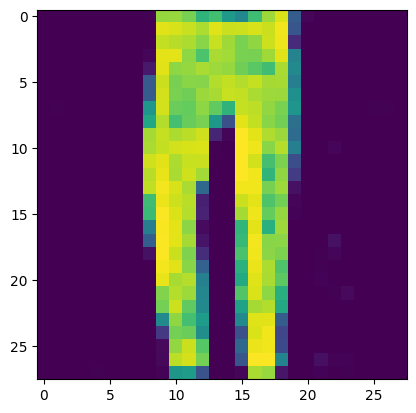

Dloss:  0.61422586
Gloss:  0.76190674
Dloss:  0.6142379
Gloss:  0.7619355
Dloss:  0.614249
Gloss:  0.7619146
Dloss:  0.61426145
Gloss:  0.76194465
Dloss:  0.61427176
Gloss:  0.76192456
Dloss:  0.6142813
Gloss:  0.76195884
Dloss:  0.61429125
Gloss:  0.7619311
Dloss:  0.6143033
Gloss:  0.76196665
Dloss:  0.6143146
Gloss:  0.7619406
Dloss:  0.61432743
Gloss:  0.76199037
Dloss:  0.6143387
Gloss:  0.76195204
Dloss:  0.61435544
Gloss:  0.76201266
Dloss:  0.6143711
Gloss:  0.761968
Dloss:  0.61438626
Gloss:  0.7620248
Dloss:  0.61439985
Gloss:  0.7619868
Dloss:  0.6144131
Gloss:  0.76203656
Dloss:  0.61442244
Gloss:  0.76201004
Dloss:  0.61443174
Gloss:  0.76203126
Dloss:  0.61444336
Gloss:  0.7620262
Dloss:  0.61445385
Gloss:  0.76203895
Dloss:  0.61446583
Gloss:  0.7620316
Dloss:  0.61447805
Gloss:  0.76205784
Dloss:  0.6144867
Gloss:  0.7620449
Dloss:  0.6144944
Gloss:  0.7620647
Dloss:  0.61450374
Gloss:  0.7620651
Dloss:  0.6145145
Gloss:  0.76207304
Dloss:  0.614527
Gloss:  0.7620784
Dl

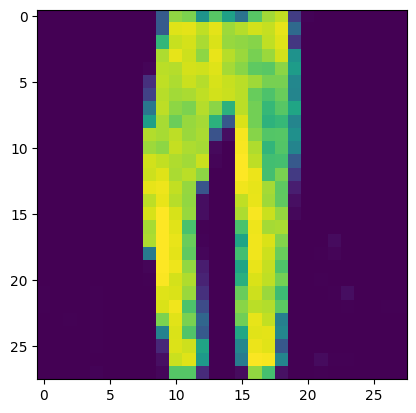

Dloss:  0.61456305
Gloss:  0.76212335
Dloss:  0.6145744
Gloss:  0.7621155
Dloss:  0.6145891
Gloss:  0.76214206
Dloss:  0.6146042
Gloss:  0.7621149
Dloss:  0.6146143
Gloss:  0.7621694
Dloss:  0.61462337
Gloss:  0.7621411
Dloss:  0.6146347
Gloss:  0.76219875
Dloss:  0.6146499
Gloss:  0.76215094
Dloss:  0.6146653
Gloss:  0.76221293
Dloss:  0.6146816
Gloss:  0.76216346
Dloss:  0.6146978
Gloss:  0.7622386
Dloss:  0.61471194
Gloss:  0.76219434
Dloss:  0.6147251
Gloss:  0.7622468
Dloss:  0.61473703
Gloss:  0.76222754
Dloss:  0.61475027
Gloss:  0.76225466
Dloss:  0.61476433
Gloss:  0.762244
Dloss:  0.61477685
Gloss:  0.7622651
Dloss:  0.61478627
Gloss:  0.7622617
Dloss:  0.6147931
Gloss:  0.76227456
Dloss:  0.6147999
Gloss:  0.76228154
Dloss:  0.61481047
Gloss:  0.76227766
Dloss:  0.6148228
Gloss:  0.76228166
Dloss:  0.6148347
Gloss:  0.762283
Dloss:  0.61484385
Gloss:  0.76228344
Dloss:  0.6148516
Gloss:  0.76228845
Dloss:  0.6148576
Gloss:  0.76229614
Dloss:  0.61486596
Gloss:  0.7622989
Dlo

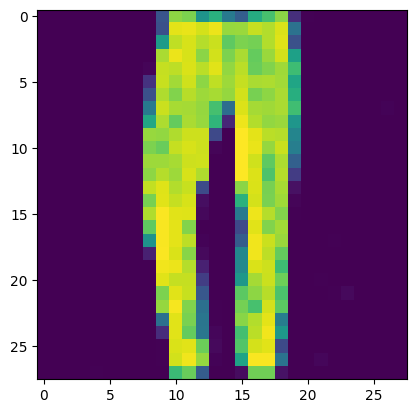

Dloss:  0.6149063
Gloss:  0.7623171
Dloss:  0.6149149
Gloss:  0.76231927
Dloss:  0.6149239
Gloss:  0.76233286
Dloss:  0.6149328
Gloss:  0.7623193
Dloss:  0.6149439
Gloss:  0.762347
Dloss:  0.61495507
Gloss:  0.7623183
Dloss:  0.6149655
Gloss:  0.7623673
Dloss:  0.61497855
Gloss:  0.7623243
Dloss:  0.6149907
Gloss:  0.7623917
Dloss:  0.61500496
Gloss:  0.76233786
Dloss:  0.6150243
Gloss:  0.7624247
Dloss:  0.6150447
Gloss:  0.76236457
Dloss:  0.61506504
Gloss:  0.7624562
Dloss:  0.6150845
Gloss:  0.762402
Dloss:  0.6151016
Gloss:  0.76245344
Dloss:  0.6151131
Gloss:  0.7624261
Dloss:  0.61512405
Gloss:  0.7624468
Dloss:  0.6151348
Gloss:  0.762443
Dloss:  0.615145
Gloss:  0.76245123
Dloss:  0.6151546
Gloss:  0.76244783
Dloss:  0.6151636
Gloss:  0.76245373
Dloss:  0.615173
Gloss:  0.76244396
Dloss:  0.61518055
Gloss:  0.7624594
Dloss:  0.6151904
Gloss:  0.7624503
Dloss:  0.61519986
Gloss:  0.76246876
Dloss:  0.6152113
Gloss:  0.7624554
Dloss:  0.615221
Gloss:  0.76247543
Dloss:  0.615230

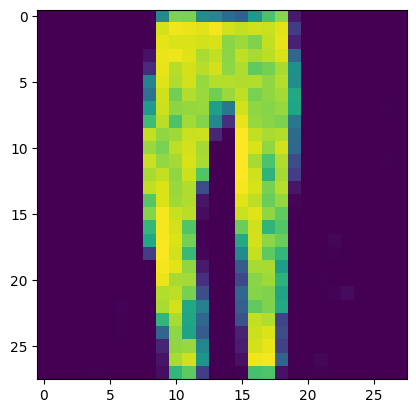

Dloss:  0.6152648
Gloss:  0.7625163
Dloss:  0.61527884
Gloss:  0.7624767
Dloss:  0.6152888
Gloss:  0.76252395
Dloss:  0.6152998
Gloss:  0.7624868
Dloss:  0.6153118
Gloss:  0.7625363
Dloss:  0.61532384
Gloss:  0.762505
Dloss:  0.6153361
Gloss:  0.76253664
Dloss:  0.6153474
Gloss:  0.76251954
Dloss:  0.61535704
Gloss:  0.76254666
Dloss:  0.6153684
Gloss:  0.7625272
Dloss:  0.6153776
Gloss:  0.7625563
Dloss:  0.6153886
Gloss:  0.7625413
Dloss:  0.61539984
Gloss:  0.76255655
Dloss:  0.6154096
Gloss:  0.762541
Dloss:  0.6154206
Gloss:  0.762555
Dloss:  0.61542976
Gloss:  0.76254404
Dloss:  0.6154373
Gloss:  0.76256186
Dloss:  0.61544627
Gloss:  0.7625514
Dloss:  0.6154554
Gloss:  0.76257426
Dloss:  0.6154665
Gloss:  0.76255506
Dloss:  0.61547905
Gloss:  0.7625913
Dloss:  0.6154875
Gloss:  0.7625643
Dloss:  0.6155032
Gloss:  0.7626258
Dloss:  0.615516
Gloss:  0.7625776
Dloss:  0.6155305
Gloss:  0.7626421
Dloss:  0.6155444
Gloss:  0.7626053
Dloss:  0.61555946
Gloss:  0.76265436
Dloss:  0.6155

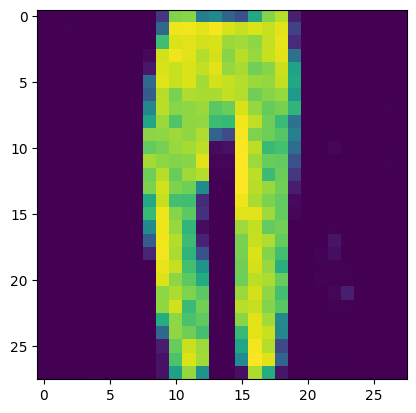

Dloss:  0.61560386
Gloss:  0.7626583
Dloss:  0.6156132
Gloss:  0.7626533
Dloss:  0.6156223
Gloss:  0.7626658
Dloss:  0.61563027
Gloss:  0.7626564
Dloss:  0.61563903
Gloss:  0.7626731
Dloss:  0.61564773
Gloss:  0.762654
Dloss:  0.6156568
Gloss:  0.7626801
Dloss:  0.6156657
Gloss:  0.76266116
Dloss:  0.61567503
Gloss:  0.7626873
Dloss:  0.6156856
Gloss:  0.7626723
Dloss:  0.6156951
Gloss:  0.76268786
Dloss:  0.6157042
Gloss:  0.76267415
Dloss:  0.61571515
Gloss:  0.7626979
Dloss:  0.6157247
Gloss:  0.7626759
Dloss:  0.61573535
Gloss:  0.76271033
31 / 100
Dloss:  0.61574686
Gloss:  0.7626856
31 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


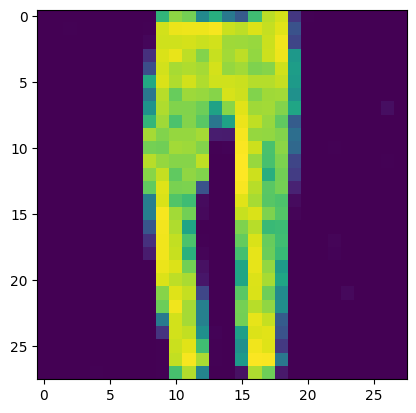

Dloss:  0.6157556
Gloss:  0.76271504
Dloss:  0.61576515
Gloss:  0.7626958
Dloss:  0.61577564
Gloss:  0.7627203
Dloss:  0.6157868
Gloss:  0.76269865
Dloss:  0.61579806
Gloss:  0.7627247
Dloss:  0.6158078
Gloss:  0.7627084
Dloss:  0.6158165
Gloss:  0.7627336
Dloss:  0.6158256
Gloss:  0.76270986
Dloss:  0.61583465
Gloss:  0.7627398
Dloss:  0.6158445
Gloss:  0.76271826
Dloss:  0.6158545
Gloss:  0.76274425
Dloss:  0.615867
Gloss:  0.7627212
Dloss:  0.61587816
Gloss:  0.76276034
Dloss:  0.6158899
Gloss:  0.76272094
Dloss:  0.6159017
Gloss:  0.76278013
Dloss:  0.6159145
Gloss:  0.7627384
Dloss:  0.6159269
Gloss:  0.76279545
Dloss:  0.61594224
Gloss:  0.76275265
Dloss:  0.6159572
Gloss:  0.7628055
Dloss:  0.6159689
Gloss:  0.7627624
Dloss:  0.6159839
Gloss:  0.7628176
Dloss:  0.6159963
Gloss:  0.7627842
Dloss:  0.61600757
Gloss:  0.76282465
Dloss:  0.616021
Gloss:  0.7627937
Dloss:  0.61603016
Gloss:  0.76284117
Dloss:  0.61604017
Gloss:  0.76281637
Dloss:  0.61605054
Gloss:  0.76285374
Dloss:

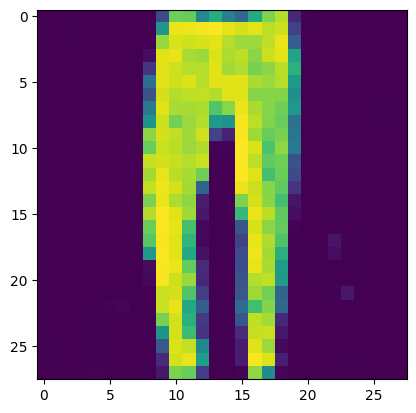

Dloss:  0.6160933
Gloss:  0.7628681
Dloss:  0.6161027
Gloss:  0.7628491
Dloss:  0.61611086
Gloss:  0.76287585
Dloss:  0.61612195
Gloss:  0.76285434
Dloss:  0.6161303
Gloss:  0.7628809
Dloss:  0.6161401
Gloss:  0.7628643
Dloss:  0.6161473
Gloss:  0.7628827
Dloss:  0.616156
Gloss:  0.7628728
Dloss:  0.6161639
Gloss:  0.7628941
Dloss:  0.61617297
Gloss:  0.76288354
Dloss:  0.6161809
Gloss:  0.76289713
Dloss:  0.61618996
Gloss:  0.76288563
Dloss:  0.61620003
Gloss:  0.76290405
Dloss:  0.61620784
Gloss:  0.762892
Dloss:  0.61621606
Gloss:  0.76291305
Dloss:  0.61622685
Gloss:  0.7629006
Dloss:  0.61623734
Gloss:  0.76292217
Dloss:  0.6162476
Gloss:  0.76290536
Dloss:  0.61625797
Gloss:  0.76294386
Dloss:  0.61626655
Gloss:  0.7629131
Dloss:  0.6162801
Gloss:  0.7629693
Dloss:  0.61629313
Gloss:  0.76292056
Dloss:  0.61630905
Gloss:  0.7629848
Dloss:  0.61632425
Gloss:  0.7629388
Dloss:  0.61633795
Gloss:  0.7629969
Dloss:  0.61634874
Gloss:  0.7629596
Dloss:  0.6163591
Gloss:  0.76299745
Dl

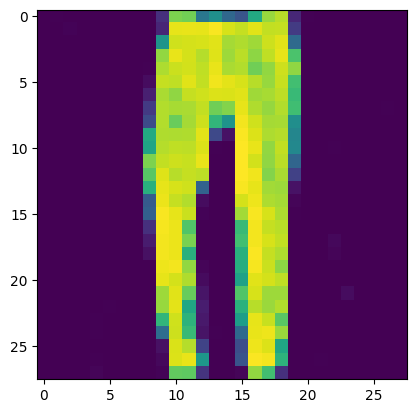

Dloss:  0.61640376
Gloss:  0.7630268
Dloss:  0.61641514
Gloss:  0.76299495
Dloss:  0.61642694
Gloss:  0.76303536
Dloss:  0.61643666
Gloss:  0.7630121
Dloss:  0.61644554
Gloss:  0.76303273
Dloss:  0.6164545
Gloss:  0.7630227
Dloss:  0.6164618
Gloss:  0.76303697
Dloss:  0.61646914
Gloss:  0.76302695
Dloss:  0.616478
Gloss:  0.76305366
Dloss:  0.61648583
Gloss:  0.76303387
Dloss:  0.6164945
Gloss:  0.7630658
Dloss:  0.61650467
Gloss:  0.76304054
Dloss:  0.61651635
Gloss:  0.76309335
Dloss:  0.6165279
Gloss:  0.76305395
Dloss:  0.6165428
Gloss:  0.7631243
Dloss:  0.6165566
Gloss:  0.7630825
Dloss:  0.616569
Gloss:  0.7631334
Dloss:  0.6165793
Gloss:  0.76309764
Dloss:  0.61659133
Gloss:  0.76314765
Dloss:  0.6166037
Gloss:  0.7631228
Dloss:  0.61661655
Gloss:  0.763158
Dloss:  0.61662793
Gloss:  0.76313317
Dloss:  0.6166386
Gloss:  0.7631735
Dloss:  0.6166493
Gloss:  0.7631468
Dloss:  0.61665916
Gloss:  0.76317656
Dloss:  0.6166682
Gloss:  0.7631598
Dloss:  0.6166776
Gloss:  0.7631877
Dlos

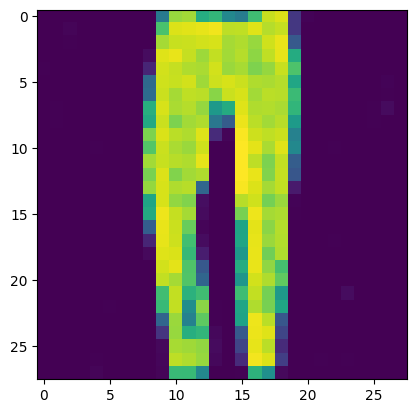

Dloss:  0.61671674
Gloss:  0.76321465
Dloss:  0.616728
Gloss:  0.7631944
Dloss:  0.61673594
Gloss:  0.7632244
Dloss:  0.6167459
Gloss:  0.763205
Dloss:  0.6167544
Gloss:  0.76323366
Dloss:  0.6167627
Gloss:  0.76320916
Dloss:  0.61677593
Gloss:  0.7632545
Dloss:  0.61678785
Gloss:  0.76321894
Dloss:  0.61679906
Gloss:  0.7632654
Dloss:  0.6168102
Gloss:  0.7632366
Dloss:  0.6168208
Gloss:  0.7632732
Dloss:  0.61683106
Gloss:  0.76324993
Dloss:  0.6168397
Gloss:  0.76327276
Dloss:  0.6168488
Gloss:  0.763268
Dloss:  0.61685926
Gloss:  0.76327306
Dloss:  0.61686856
Gloss:  0.76327467
Dloss:  0.6168756
Gloss:  0.76327807
Dloss:  0.61688256
Gloss:  0.7632821
Dloss:  0.6168887
Gloss:  0.76327705
Dloss:  0.6168978
Gloss:  0.76328456
Dloss:  0.6169091
Gloss:  0.7632869
Dloss:  0.61691684
Gloss:  0.76329553
Dloss:  0.6169274
Gloss:  0.7632914
Dloss:  0.61693585
Gloss:  0.76331705
Dloss:  0.6169437
Gloss:  0.7632968
Dloss:  0.61695194
Gloss:  0.7633406
Dloss:  0.6169616
Gloss:  0.7633053
Dloss:

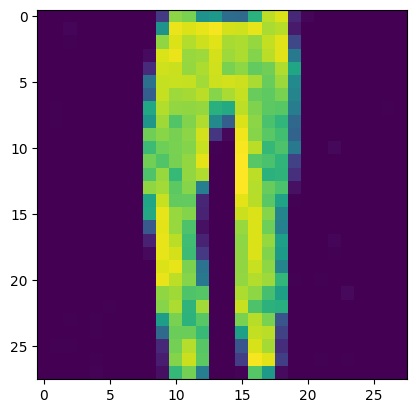

Dloss:  0.6170205
Gloss:  0.7633349
Dloss:  0.617033
Gloss:  0.76338476
Dloss:  0.6170455
Gloss:  0.7633593
Dloss:  0.61705303
Gloss:  0.7633798
Dloss:  0.6170609
Gloss:  0.7633667
Dloss:  0.6170712
Gloss:  0.76338995
Dloss:  0.6170825
Gloss:  0.76337653
Dloss:  0.61709213
Gloss:  0.76340735
Dloss:  0.6170998
Gloss:  0.7633864
Dloss:  0.6171088
Gloss:  0.76342773
Dloss:  0.61711884
Gloss:  0.76339865
Dloss:  0.61713034
Gloss:  0.76344365
Dloss:  0.6171414
Gloss:  0.7634113
Dloss:  0.6171543
Gloss:  0.76345295
Dloss:  0.6171646
Gloss:  0.7634234
32 / 100
Dloss:  0.6171743
Gloss:  0.76346695
32 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


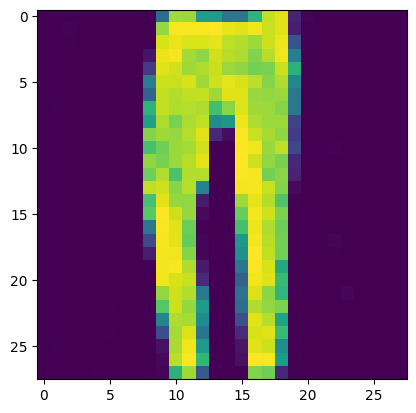

Dloss:  0.61718214
Gloss:  0.76343477
Dloss:  0.6171946
Gloss:  0.76348364
Dloss:  0.6172072
Gloss:  0.76344156
Dloss:  0.6172225
Gloss:  0.763492
Dloss:  0.617235
Gloss:  0.7634665
Dloss:  0.6172454
Gloss:  0.76351285
Dloss:  0.6172556
Gloss:  0.7634822
Dloss:  0.6172662
Gloss:  0.76351446
Dloss:  0.61727667
Gloss:  0.7635009
Dloss:  0.6172866
Gloss:  0.7635225
Dloss:  0.61729544
Gloss:  0.76351553
Dloss:  0.617305
Gloss:  0.7635279
Dloss:  0.6173138
Gloss:  0.7635205
Dloss:  0.6173216
Gloss:  0.763534
Dloss:  0.6173317
Gloss:  0.7635282
Dloss:  0.61734
Gloss:  0.76354647
Dloss:  0.6173503
Gloss:  0.7635329
Dloss:  0.6173586
Gloss:  0.76355433
Dloss:  0.61736757
Gloss:  0.7635409
Dloss:  0.61737597
Gloss:  0.76356375
Dloss:  0.6173842
Gloss:  0.7635419
Dloss:  0.6173945
Gloss:  0.76358044
Dloss:  0.61740386
Gloss:  0.7635544
Dloss:  0.61741316
Gloss:  0.7635891
Dloss:  0.6174204
Gloss:  0.76356715
Dloss:  0.6174313
Gloss:  0.7636119
Dloss:  0.6174426
Gloss:  0.76358587
Dloss:  0.61745

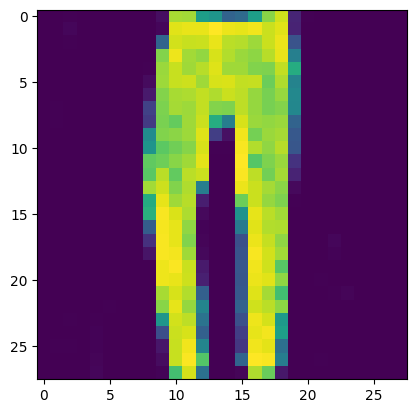

Dloss:  0.61748666
Gloss:  0.7636106
Dloss:  0.6175014
Gloss:  0.7636551
Dloss:  0.6175119
Gloss:  0.76363075
Dloss:  0.61752236
Gloss:  0.76366365
Dloss:  0.6175315
Gloss:  0.76364195
Dloss:  0.6175402
Gloss:  0.7636649
Dloss:  0.6175485
Gloss:  0.7636529
Dloss:  0.6175574
Gloss:  0.7636743
Dloss:  0.61756635
Gloss:  0.7636639
Dloss:  0.61757374
Gloss:  0.7636748
Dloss:  0.61758137
Gloss:  0.76367843
Dloss:  0.6175898
Gloss:  0.76369625
Dloss:  0.61759806
Gloss:  0.7636816
Dloss:  0.6176058
Gloss:  0.7637109
Dloss:  0.6176139
Gloss:  0.7636885
Dloss:  0.61762625
Gloss:  0.763736
Dloss:  0.6176376
Gloss:  0.7636975
Dloss:  0.6176493
Gloss:  0.7637516
Dloss:  0.61766076
Gloss:  0.76371324
Dloss:  0.61767143
Gloss:  0.7637713
Dloss:  0.61768526
Gloss:  0.76372886
Dloss:  0.61769813
Gloss:  0.76378095
Dloss:  0.6177124
Gloss:  0.76374453
Dloss:  0.61772406
Gloss:  0.76378065
Dloss:  0.61773455
Gloss:  0.7637625
Dloss:  0.61774117
Gloss:  0.76378214
Dloss:  0.6177497
Gloss:  0.76378083
Dlo

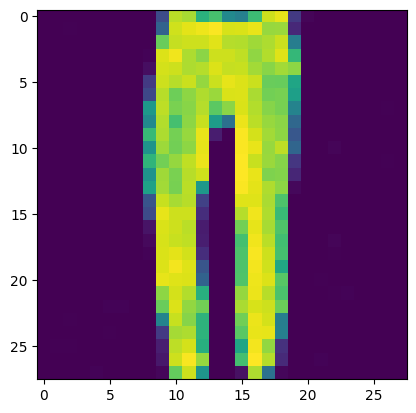

Dloss:  0.6177802
Gloss:  0.7637914
Dloss:  0.61778724
Gloss:  0.7637991
Dloss:  0.61779535
Gloss:  0.76379627
Dloss:  0.61780334
Gloss:  0.7638056
Dloss:  0.617812
Gloss:  0.7638015
Dloss:  0.6178193
Gloss:  0.7638083
Dloss:  0.617826
Gloss:  0.76380515
Dloss:  0.61783504
Gloss:  0.76381636
Dloss:  0.61784494
Gloss:  0.76382065
Dloss:  0.61785185
Gloss:  0.7638162
Dloss:  0.61785984
Gloss:  0.76384103
Dloss:  0.617867
Gloss:  0.7638133
Dloss:  0.61787534
Gloss:  0.7638713
Dloss:  0.61788845
Gloss:  0.7638264
Dloss:  0.61790526
Gloss:  0.7639012
Dloss:  0.61791974
Gloss:  0.76383966
Dloss:  0.6179409
Gloss:  0.7639198
Dloss:  0.617958
Gloss:  0.76387376
Dloss:  0.617971
Gloss:  0.763912
Dloss:  0.61798084
Gloss:  0.76389533
Dloss:  0.61799127
Gloss:  0.76391506
Dloss:  0.61799854
Gloss:  0.7639055
Dloss:  0.61800665
Gloss:  0.76392823
Dloss:  0.61801517
Gloss:  0.76391715
Dloss:  0.6180252
Gloss:  0.7639306
Dloss:  0.61803436
Gloss:  0.76392764
Dloss:  0.6180423
Gloss:  0.76394325
Dlos

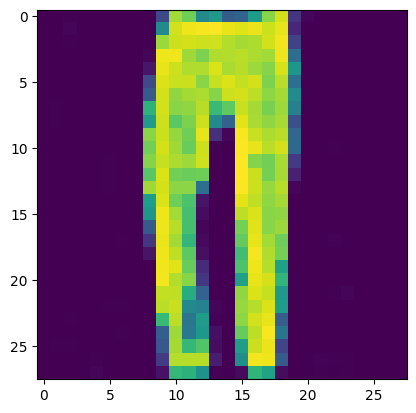

Dloss:  0.6180736
Gloss:  0.76396304
Dloss:  0.6180845
Gloss:  0.76395446
Dloss:  0.6180902
Gloss:  0.7639766
Dloss:  0.6180974
Gloss:  0.76396155
Dloss:  0.6181053
Gloss:  0.76400787
Dloss:  0.61811364
Gloss:  0.76396894
Dloss:  0.6181274
Gloss:  0.764022
Dloss:  0.6181402
Gloss:  0.7639856
Dloss:  0.6181518
Gloss:  0.76403487
Dloss:  0.6181643
Gloss:  0.76400423
Dloss:  0.6181729
Gloss:  0.76404065
Dloss:  0.61818296
Gloss:  0.7640172
Dloss:  0.61819404
Gloss:  0.76405
Dloss:  0.6182024
Gloss:  0.76402354
Dloss:  0.61821306
Gloss:  0.7640575
Dloss:  0.61822367
Gloss:  0.76404077
Dloss:  0.61823183
Gloss:  0.7640626
Dloss:  0.61824006
Gloss:  0.7640529
Dloss:  0.6182476
Gloss:  0.76407164
Dloss:  0.61825436
Gloss:  0.76406616
Dloss:  0.6182646
Gloss:  0.7640797
Dloss:  0.6182716
Gloss:  0.7640716
Dloss:  0.6182806
Gloss:  0.764086
Dloss:  0.6182864
Gloss:  0.76408184
Dloss:  0.61829436
Gloss:  0.76409405
Dloss:  0.61830074
Gloss:  0.76409256
Dloss:  0.61830944
Gloss:  0.7641105
Dloss:

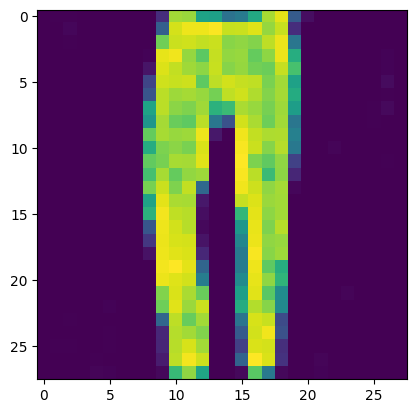

Dloss:  0.6183428
Gloss:  0.7641418
Dloss:  0.6183539
Gloss:  0.7641176
Dloss:  0.618365
Gloss:  0.76414895
Dloss:  0.6183753
Gloss:  0.76412845
Dloss:  0.6183821
Gloss:  0.7641702
Dloss:  0.6183917
Gloss:  0.7641344
Dloss:  0.6184045
Gloss:  0.76419073
Dloss:  0.6184179
Gloss:  0.7641483
Dloss:  0.6184307
Gloss:  0.7641934
Dloss:  0.61844283
Gloss:  0.76417065
Dloss:  0.6184522
Gloss:  0.76419765
Dloss:  0.6184607
Gloss:  0.76418597
Dloss:  0.6184683
Gloss:  0.7642111
Dloss:  0.61847705
Gloss:  0.7641944
Dloss:  0.6184858
Gloss:  0.76422817
33 / 100
Dloss:  0.6184948
Gloss:  0.76420426
33 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


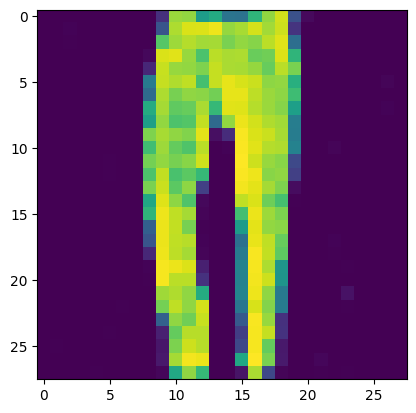

Dloss:  0.6185031
Gloss:  0.7642379
Dloss:  0.6185125
Gloss:  0.7642101
Dloss:  0.6185232
Gloss:  0.76424325
Dloss:  0.61853373
Gloss:  0.7642147
Dloss:  0.6185422
Gloss:  0.7642539
Dloss:  0.6185481
Gloss:  0.7642316
Dloss:  0.6185544
Gloss:  0.76425385
Dloss:  0.61856395
Gloss:  0.76425296
Dloss:  0.6185729
Gloss:  0.764256
Dloss:  0.6185824
Gloss:  0.7642663
Dloss:  0.6185903
Gloss:  0.7642697
Dloss:  0.61859715
Gloss:  0.76428425
Dloss:  0.618605
Gloss:  0.7642862
Dloss:  0.6186111
Gloss:  0.7643007
Dloss:  0.61861867
Gloss:  0.76429147
Dloss:  0.61862963
Gloss:  0.76432896
Dloss:  0.6186407
Gloss:  0.7643
Dloss:  0.6186497
Gloss:  0.7643497
Dloss:  0.61866033
Gloss:  0.76431435
Dloss:  0.61866754
Gloss:  0.7643703
Dloss:  0.61867636
Gloss:  0.76434493
Dloss:  0.6186874
Gloss:  0.764389
Dloss:  0.61870134
Gloss:  0.76436394
Dloss:  0.61871266
Gloss:  0.7644045
Dloss:  0.6187182
Gloss:  0.76439214
Dloss:  0.6187261
Gloss:  0.7644434
Dloss:  0.61873513
Gloss:  0.7644251
Dloss:  0.618

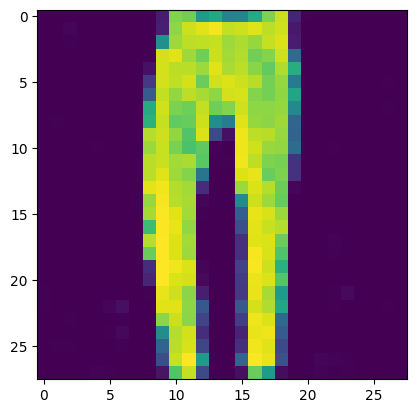

Dloss:  0.618769
Gloss:  0.76445556
Dloss:  0.6187749
Gloss:  0.76447594
Dloss:  0.6187818
Gloss:  0.7644835
Dloss:  0.61879164
Gloss:  0.7644892
Dloss:  0.61880064
Gloss:  0.7645058
Dloss:  0.6188113
Gloss:  0.7645074
Dloss:  0.6188182
Gloss:  0.7645219
Dloss:  0.6188246
Gloss:  0.76452386
Dloss:  0.61883074
Gloss:  0.7645403
Dloss:  0.6188368
Gloss:  0.7645253
Dloss:  0.61884445
Gloss:  0.76456106
Dloss:  0.6188557
Gloss:  0.76453197
Dloss:  0.6188654
Gloss:  0.7645785
Dloss:  0.61887187
Gloss:  0.764546
Dloss:  0.6188802
Gloss:  0.7646112
Dloss:  0.6188919
Gloss:  0.76457155
Dloss:  0.6189041
Gloss:  0.7646323
Dloss:  0.6189169
Gloss:  0.7645945
Dloss:  0.6189308
Gloss:  0.764645
Dloss:  0.6189435
Gloss:  0.76462024
Dloss:  0.61895466
Gloss:  0.7646522
Dloss:  0.6189633
Gloss:  0.76463354
Dloss:  0.6189714
Gloss:  0.7646612
Dloss:  0.6189798
Gloss:  0.7646585
Dloss:  0.6189908
Gloss:  0.76466763
Dloss:  0.61899877
Gloss:  0.76467127
Dloss:  0.6190072
Gloss:  0.7646811
Dloss:  0.6190

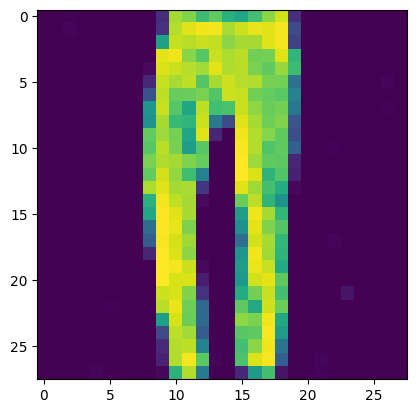

Dloss:  0.619031
Gloss:  0.7647189
Dloss:  0.6190384
Gloss:  0.7647067
Dloss:  0.6190458
Gloss:  0.7647368
Dloss:  0.6190536
Gloss:  0.7647195
Dloss:  0.61906147
Gloss:  0.7647598
Dloss:  0.6190723
Gloss:  0.7647265
Dloss:  0.61908245
Gloss:  0.76478875
Dloss:  0.6190941
Gloss:  0.7647373
Dloss:  0.6191065
Gloss:  0.7648031
Dloss:  0.61911905
Gloss:  0.76476383
Dloss:  0.6191312
Gloss:  0.76480246
Dloss:  0.61914074
Gloss:  0.76478076
Dloss:  0.6191503
Gloss:  0.7648127
Dloss:  0.61915714
Gloss:  0.7647974
Dloss:  0.6191651
Gloss:  0.7648301
Dloss:  0.6191733
Gloss:  0.76482344
Dloss:  0.61918044
Gloss:  0.76485205
Dloss:  0.6191862
Gloss:  0.7648341
Dloss:  0.61919326
Gloss:  0.7648793
Dloss:  0.61920303
Gloss:  0.76485854
Dloss:  0.61921537
Gloss:  0.7649004
Dloss:  0.6192252
Gloss:  0.7648711
Dloss:  0.6192323
Gloss:  0.7649063
Dloss:  0.6192407
Gloss:  0.7648828
Dloss:  0.6192503
Gloss:  0.76491576
Dloss:  0.6192598
Gloss:  0.7648948
Dloss:  0.61926913
Gloss:  0.7649381
Dloss:  0.6

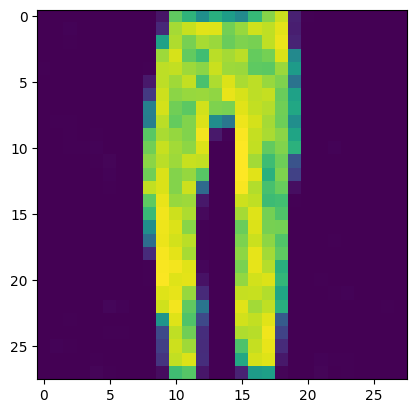

Dloss:  0.61930215
Gloss:  0.76495457
Dloss:  0.61931175
Gloss:  0.7649333
Dloss:  0.61931926
Gloss:  0.7649633
Dloss:  0.6193281
Gloss:  0.76494557
Dloss:  0.6193368
Gloss:  0.7649792
Dloss:  0.6193419
Gloss:  0.764957
Dloss:  0.61935055
Gloss:  0.7649911
Dloss:  0.61935866
Gloss:  0.76496553
Dloss:  0.6193694
Gloss:  0.76500064
Dloss:  0.6193796
Gloss:  0.7649748
Dloss:  0.6193896
Gloss:  0.7650096
Dloss:  0.61939865
Gloss:  0.76498854
Dloss:  0.6194075
Gloss:  0.76501423
Dloss:  0.61941695
Gloss:  0.7650001
Dloss:  0.6194262
Gloss:  0.7650187
Dloss:  0.6194336
Gloss:  0.76501036
Dloss:  0.6194403
Gloss:  0.76503766
Dloss:  0.61944616
Gloss:  0.7650247
Dloss:  0.6194529
Gloss:  0.7650488
Dloss:  0.61946034
Gloss:  0.7650304
Dloss:  0.61946875
Gloss:  0.7650619
Dloss:  0.6194748
Gloss:  0.7650493
Dloss:  0.6194861
Gloss:  0.7650905
Dloss:  0.6194928
Gloss:  0.7650602
Dloss:  0.6195054
Gloss:  0.7651152
Dloss:  0.6195154
Gloss:  0.76507676
Dloss:  0.61952657
Gloss:  0.7651222
Dloss:  0

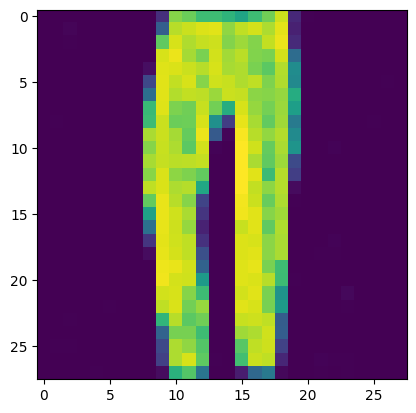

Dloss:  0.61956453
Gloss:  0.76513726
Dloss:  0.6195739
Gloss:  0.76513195
Dloss:  0.61958355
Gloss:  0.7651589
Dloss:  0.6195916
Gloss:  0.76514494
Dloss:  0.6195998
Gloss:  0.76517355
Dloss:  0.6196097
Gloss:  0.76515085
Dloss:  0.6196175
Gloss:  0.76517916
Dloss:  0.6196264
Gloss:  0.76515484
Dloss:  0.6196355
Gloss:  0.76519525
Dloss:  0.6196448
Gloss:  0.7651648
Dloss:  0.6196542
Gloss:  0.76520044
Dloss:  0.6196618
Gloss:  0.76517576
Dloss:  0.61967075
Gloss:  0.76521003
Dloss:  0.61967933
Gloss:  0.76518387
Dloss:  0.61968833
Gloss:  0.76521736
34 / 100
Dloss:  0.6196985
Gloss:  0.7651927
34 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


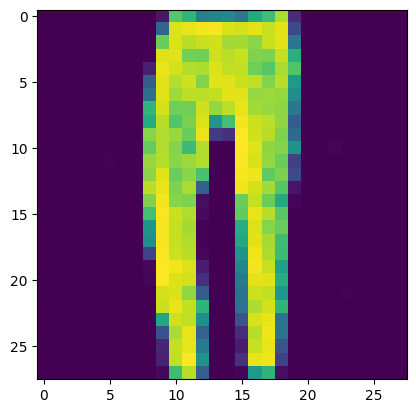

Dloss:  0.6197076
Gloss:  0.76522285
Dloss:  0.61971647
Gloss:  0.7652044
Dloss:  0.61972374
Gloss:  0.7652235
Dloss:  0.6197311
Gloss:  0.7652135
Dloss:  0.61973697
Gloss:  0.76523346
Dloss:  0.6197418
Gloss:  0.76522195
Dloss:  0.6197482
Gloss:  0.76524246
Dloss:  0.6197565
Gloss:  0.76522756
Dloss:  0.6197661
Gloss:  0.76525307
Dloss:  0.6197741
Gloss:  0.765241
Dloss:  0.61978185
Gloss:  0.7652702
Dloss:  0.61978954
Gloss:  0.7652505
Dloss:  0.61979806
Gloss:  0.7652889
Dloss:  0.6198098
Gloss:  0.76526225
Dloss:  0.6198214
Gloss:  0.7653071
Dloss:  0.6198333
Gloss:  0.76527435
Dloss:  0.6198435
Gloss:  0.76531434
Dloss:  0.6198527
Gloss:  0.7652775
Dloss:  0.61986285
Gloss:  0.76532567
Dloss:  0.61987215
Gloss:  0.76528883
Dloss:  0.61988056
Gloss:  0.7653301
Dloss:  0.6198895
Gloss:  0.7652977
Dloss:  0.6199001
Gloss:  0.765336
Dloss:  0.61991084
Gloss:  0.7653011
Dloss:  0.6199189
Gloss:  0.76534945
Dloss:  0.61992776
Gloss:  0.7653242
Dloss:  0.61993814
Gloss:  0.7653594
Dloss:

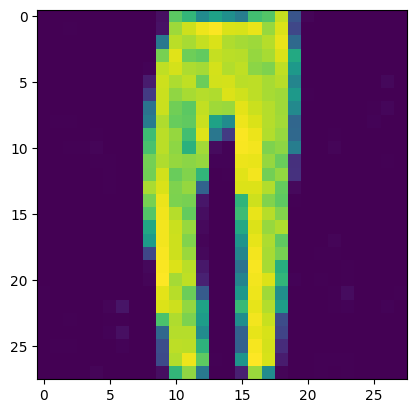

Dloss:  0.61997116
Gloss:  0.7653684
Dloss:  0.6199789
Gloss:  0.76535493
Dloss:  0.6199855
Gloss:  0.7653824
Dloss:  0.6199937
Gloss:  0.76536906
Dloss:  0.62000024
Gloss:  0.7653934
Dloss:  0.6200082
Gloss:  0.7653737
Dloss:  0.62001616
Gloss:  0.7653998
Dloss:  0.6200239
Gloss:  0.76538306
Dloss:  0.6200321
Gloss:  0.7654054
Dloss:  0.620039
Gloss:  0.76538867
Dloss:  0.6200429
Gloss:  0.7654106
Dloss:  0.6200495
Gloss:  0.76539624
Dloss:  0.62005615
Gloss:  0.7654175
Dloss:  0.6200626
Gloss:  0.7654101
Dloss:  0.62006795
Gloss:  0.7654279
Dloss:  0.62007433
Gloss:  0.7654143
Dloss:  0.6200814
Gloss:  0.765439
Dloss:  0.6200908
Gloss:  0.7654163
Dloss:  0.6200996
Gloss:  0.7654498
Dloss:  0.62010825
Gloss:  0.7654131
Dloss:  0.6201186
Gloss:  0.76546735
Dloss:  0.62012976
Gloss:  0.7654255
Dloss:  0.62014395
Gloss:  0.7654831
Dloss:  0.6201559
Gloss:  0.7654475
Dloss:  0.6201689
Gloss:  0.7654976
Dloss:  0.62017715
Gloss:  0.76546013
Dloss:  0.62018687
Gloss:  0.765495
Dloss:  0.620

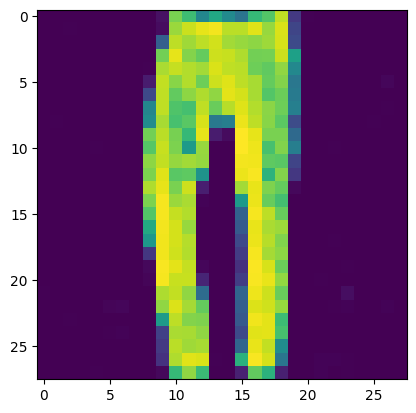

Dloss:  0.620217
Gloss:  0.76550186
Dloss:  0.6202246
Gloss:  0.7654927
Dloss:  0.6202305
Gloss:  0.765512
Dloss:  0.62023675
Gloss:  0.7655008
Dloss:  0.62024313
Gloss:  0.7655239
Dloss:  0.6202497
Gloss:  0.765506
Dloss:  0.62025696
Gloss:  0.76554275
Dloss:  0.62026596
Gloss:  0.7655106
Dloss:  0.6202764
Gloss:  0.7655589
Dloss:  0.62028724
Gloss:  0.7655159
Dloss:  0.62029916
Gloss:  0.7655714
Dloss:  0.62031025
Gloss:  0.76553065
Dloss:  0.62032086
Gloss:  0.76559365
Dloss:  0.6203317
Gloss:  0.7655533
Dloss:  0.6203438
Gloss:  0.7656039
Dloss:  0.62035507
Gloss:  0.76557523
Dloss:  0.62036467
Gloss:  0.76561487
Dloss:  0.6203749
Gloss:  0.7655914
Dloss:  0.62038165
Gloss:  0.7656228
Dloss:  0.62038875
Gloss:  0.7656092
Dloss:  0.6203974
Gloss:  0.7656258
Dloss:  0.6204066
Gloss:  0.76561624
Dloss:  0.62041265
Gloss:  0.7656251
Dloss:  0.6204186
Gloss:  0.7656224
Dloss:  0.6204238
Gloss:  0.7656251
Dloss:  0.6204301
Gloss:  0.7656239
Dloss:  0.620437
Gloss:  0.76563436
Dloss:  0.6

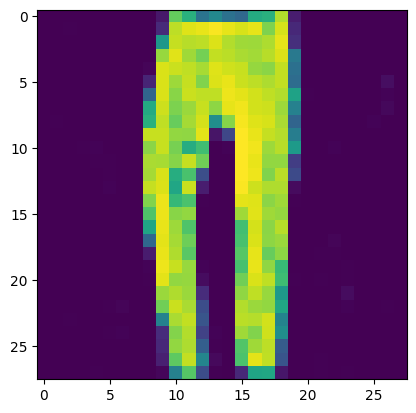

Dloss:  0.6204616
Gloss:  0.7656462
Dloss:  0.6204674
Gloss:  0.7656356
Dloss:  0.62047356
Gloss:  0.76566154
Dloss:  0.62048143
Gloss:  0.765641
Dloss:  0.6204897
Gloss:  0.7656781
Dloss:  0.62049776
Gloss:  0.7656384
Dloss:  0.62050956
Gloss:  0.7656976
Dloss:  0.6205221
Gloss:  0.76564974
Dloss:  0.6205349
Gloss:  0.76571864
Dloss:  0.62055
Gloss:  0.7656799
Dloss:  0.6205632
Gloss:  0.7657356
Dloss:  0.6205754
Gloss:  0.7657026
Dloss:  0.6205846
Gloss:  0.7657362
Dloss:  0.620594
Gloss:  0.7657185
Dloss:  0.62060237
Gloss:  0.765745
Dloss:  0.6206117
Gloss:  0.76573324
Dloss:  0.62061787
Gloss:  0.76574403
Dloss:  0.62062395
Gloss:  0.76573914
Dloss:  0.6206315
Gloss:  0.7657517
Dloss:  0.6206383
Gloss:  0.76574033
Dloss:  0.6206452
Gloss:  0.7657596
Dloss:  0.6206496
Gloss:  0.765747
Dloss:  0.62065727
Gloss:  0.76575994
Dloss:  0.6206627
Gloss:  0.7657486
Dloss:  0.6206699
Gloss:  0.76576936
Dloss:  0.6206754
Gloss:  0.7657568
Dloss:  0.6206822
Gloss:  0.76578003
Dloss:  0.620689

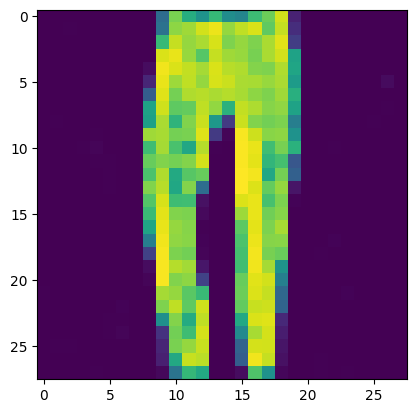

Dloss:  0.6207188
Gloss:  0.7658084
Dloss:  0.6207265
Gloss:  0.7657881
Dloss:  0.6207348
Gloss:  0.76582825
Dloss:  0.6207412
Gloss:  0.76580596
Dloss:  0.62074566
Gloss:  0.76584345
Dloss:  0.62075394
Gloss:  0.76581395
Dloss:  0.6207644
Gloss:  0.76586175
Dloss:  0.6207748
Gloss:  0.76582813
Dloss:  0.6207854
Gloss:  0.76588035
Dloss:  0.6207938
Gloss:  0.76585805
Dloss:  0.6208005
Gloss:  0.7658905
Dloss:  0.62080836
Gloss:  0.76588845
Dloss:  0.62081605
Gloss:  0.76590353
Dloss:  0.620826
Gloss:  0.76590556
Dloss:  0.620834
Gloss:  0.76591957
35 / 100
Dloss:  0.6208419
Gloss:  0.76592827
35 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


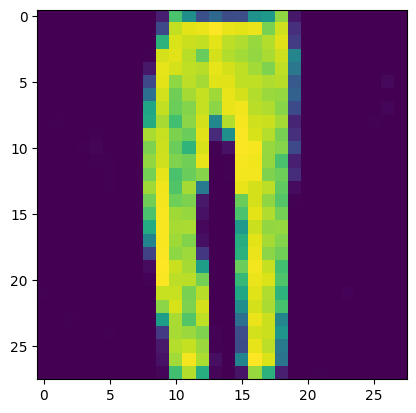

Dloss:  0.62084603
Gloss:  0.7659303
Dloss:  0.62085223
Gloss:  0.76595044
Dloss:  0.6208573
Gloss:  0.7659458
Dloss:  0.62086254
Gloss:  0.7659623
Dloss:  0.62086976
Gloss:  0.7659543
Dloss:  0.62087655
Gloss:  0.7659847
Dloss:  0.62088376
Gloss:  0.7659634
Dloss:  0.620894
Gloss:  0.76602536
Dloss:  0.62090373
Gloss:  0.76597935
Dloss:  0.620916
Gloss:  0.7660688
Dloss:  0.6209304
Gloss:  0.7660223
Dloss:  0.620947
Gloss:  0.7660768
Dloss:  0.62096083
Gloss:  0.7660506
Dloss:  0.6209719
Gloss:  0.76608396
Dloss:  0.6209792
Gloss:  0.7660739
Dloss:  0.62098426
Gloss:  0.7661002
Dloss:  0.62098897
Gloss:  0.7661002
Dloss:  0.6209937
Gloss:  0.76611406
Dloss:  0.6209997
Gloss:  0.76611465
Dloss:  0.62100446
Gloss:  0.76612914
Dloss:  0.6210106
Gloss:  0.7661373
Dloss:  0.62101626
Gloss:  0.7661449
Dloss:  0.6210222
Gloss:  0.76615536
Dloss:  0.6210291
Gloss:  0.7661565
Dloss:  0.6210352
Gloss:  0.76618266
Dloss:  0.62104213
Gloss:  0.76618034
Dloss:  0.62104845
Gloss:  0.7662084
Dloss: 

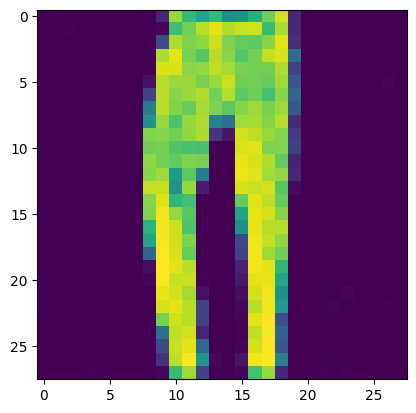

Dloss:  0.6210759
Gloss:  0.7662542
Dloss:  0.62108374
Gloss:  0.7662299
Dloss:  0.6210931
Gloss:  0.7662761
Dloss:  0.6211045
Gloss:  0.7662507
Dloss:  0.6211127
Gloss:  0.76630265
Dloss:  0.62112105
Gloss:  0.76627254
Dloss:  0.62112945
Gloss:  0.7663195
Dloss:  0.62113655
Gloss:  0.7663031
Dloss:  0.6211435
Gloss:  0.76633245
Dloss:  0.62115145
Gloss:  0.76631474
Dloss:  0.6211565
Gloss:  0.7663429
Dloss:  0.62116313
Gloss:  0.7663361
Dloss:  0.62117106
Gloss:  0.76636297
Dloss:  0.6211752
Gloss:  0.76635337
Dloss:  0.62118214
Gloss:  0.7663808
Dloss:  0.6211878
Gloss:  0.76637226
Dloss:  0.621193
Gloss:  0.76639694
Dloss:  0.6211988
Gloss:  0.7663883
Dloss:  0.6212049
Gloss:  0.76641625
Dloss:  0.62121207
Gloss:  0.766402
Dloss:  0.6212194
Gloss:  0.766437
Dloss:  0.6212265
Gloss:  0.76641977
Dloss:  0.62123567
Gloss:  0.7664581
Dloss:  0.6212437
Gloss:  0.7664304
Dloss:  0.6212533
Gloss:  0.76647794
Dloss:  0.62126
Gloss:  0.76644576
Dloss:  0.62126917
Gloss:  0.7664992
Dloss:  0.

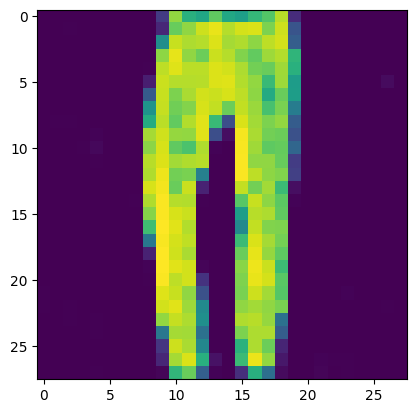

Dloss:  0.62130326
Gloss:  0.7665296
Dloss:  0.62131363
Gloss:  0.7665084
Dloss:  0.62132126
Gloss:  0.76655
Dloss:  0.6213281
Gloss:  0.7665318
Dloss:  0.6213353
Gloss:  0.76656425
Dloss:  0.6213451
Gloss:  0.7665438
Dloss:  0.6213515
Gloss:  0.766583
Dloss:  0.62135893
Gloss:  0.76655483
Dloss:  0.6213663
Gloss:  0.76659834
Dloss:  0.6213739
Gloss:  0.7665722
Dloss:  0.6213836
Gloss:  0.7666174
Dloss:  0.6213941
Gloss:  0.7665893
Dloss:  0.6214025
Gloss:  0.76663107
Dloss:  0.6214103
Gloss:  0.76661074
Dloss:  0.6214201
Gloss:  0.7666506
Dloss:  0.6214269
Gloss:  0.7666317
Dloss:  0.6214333
Gloss:  0.766667
Dloss:  0.6214406
Gloss:  0.7666478
Dloss:  0.6214458
Gloss:  0.76668376
Dloss:  0.6214528
Gloss:  0.7666593
Dloss:  0.6214614
Gloss:  0.7666882
Dloss:  0.6214735
Gloss:  0.76666415
Dloss:  0.62148094
Gloss:  0.76669246
Dloss:  0.6214888
Gloss:  0.7666732
Dloss:  0.6214944
Gloss:  0.7666978
Dloss:  0.62150025
Gloss:  0.76668656
Dloss:  0.62150633
Gloss:  0.76670957
Dloss:  0.62151

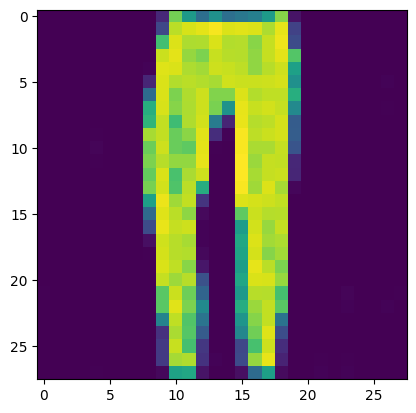

Dloss:  0.621534
Gloss:  0.76672524
Dloss:  0.6215414
Gloss:  0.76671076
Dloss:  0.62154806
Gloss:  0.7667329
Dloss:  0.62155503
Gloss:  0.76671636
Dloss:  0.6215609
Gloss:  0.76675415
Dloss:  0.6215662
Gloss:  0.7667267
Dloss:  0.6215738
Gloss:  0.76677334
Dloss:  0.6215816
Gloss:  0.7667406
Dloss:  0.62159115
Gloss:  0.76679015
Dloss:  0.6216029
Gloss:  0.76675844
Dloss:  0.621612
Gloss:  0.7667977
Dloss:  0.6216212
Gloss:  0.76677585
Dloss:  0.6216292
Gloss:  0.7668024
Dloss:  0.62163675
Gloss:  0.7667889
Dloss:  0.62164253
Gloss:  0.7668111
Dloss:  0.621648
Gloss:  0.7667911
Dloss:  0.621654
Gloss:  0.7668297
Dloss:  0.6216615
Gloss:  0.7668032
Dloss:  0.6216704
Gloss:  0.7668466
Dloss:  0.62167966
Gloss:  0.76681876
Dloss:  0.62168825
Gloss:  0.76685184
Dloss:  0.6216933
Gloss:  0.76682967
Dloss:  0.62170273
Gloss:  0.76686585
Dloss:  0.6217091
Gloss:  0.76684725
Dloss:  0.6217158
Gloss:  0.7668694
Dloss:  0.62172115
Gloss:  0.7668505
Dloss:  0.6217287
Gloss:  0.76687944
Dloss:  0

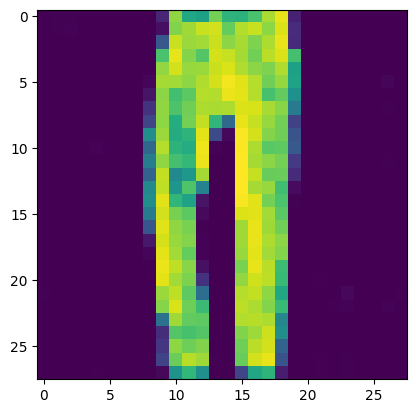

Dloss:  0.6217589
Gloss:  0.7668885
Dloss:  0.6217652
Gloss:  0.76687425
Dloss:  0.62177366
Gloss:  0.76689744
Dloss:  0.621779
Gloss:  0.7668796
Dloss:  0.62178457
Gloss:  0.76690555
Dloss:  0.6217919
Gloss:  0.7668893
Dloss:  0.6217985
Gloss:  0.7669124
Dloss:  0.62180376
Gloss:  0.7668902
Dloss:  0.6218121
Gloss:  0.7669298
Dloss:  0.6218198
Gloss:  0.7669083
Dloss:  0.62182677
Gloss:  0.7669362
Dloss:  0.62183285
Gloss:  0.7669214
Dloss:  0.6218393
Gloss:  0.76694053
Dloss:  0.62184656
Gloss:  0.766923
Dloss:  0.62185407
Gloss:  0.76695156
36 / 100
Dloss:  0.621861
Gloss:  0.7669284
36 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


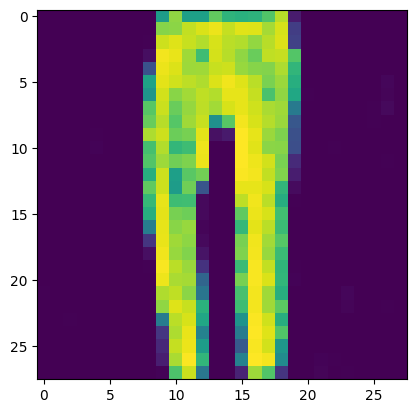

Dloss:  0.62186694
Gloss:  0.7669581
Dloss:  0.6218742
Gloss:  0.76693135
Dloss:  0.62188125
Gloss:  0.7669633
Dloss:  0.6218895
Gloss:  0.76693195
Dloss:  0.62189865
Gloss:  0.7669723
Dloss:  0.6219043
Gloss:  0.76694494
Dloss:  0.62191236
Gloss:  0.7669827
Dloss:  0.62191963
Gloss:  0.7669505
Dloss:  0.62192804
Gloss:  0.76699203
Dloss:  0.62193704
Gloss:  0.76696897
Dloss:  0.6219448
Gloss:  0.76699966
Dloss:  0.62195426
Gloss:  0.7669835
Dloss:  0.62196136
Gloss:  0.76700073
Dloss:  0.6219691
Gloss:  0.7669886
Dloss:  0.6219745
Gloss:  0.7670001
Dloss:  0.6219808
Gloss:  0.7670004
Dloss:  0.6219869
Gloss:  0.76700574
Dloss:  0.6219924
Gloss:  0.7670005
Dloss:  0.6219975
Gloss:  0.7670025
Dloss:  0.62200207
Gloss:  0.76700526
Dloss:  0.62200683
Gloss:  0.7670086
Dloss:  0.6220126
Gloss:  0.76701206
Dloss:  0.6220182
Gloss:  0.76702195
Dloss:  0.62202305
Gloss:  0.7670152
Dloss:  0.6220293
Gloss:  0.7670467
Dloss:  0.6220362
Gloss:  0.76702607
Dloss:  0.6220457
Gloss:  0.76707506
Dlo

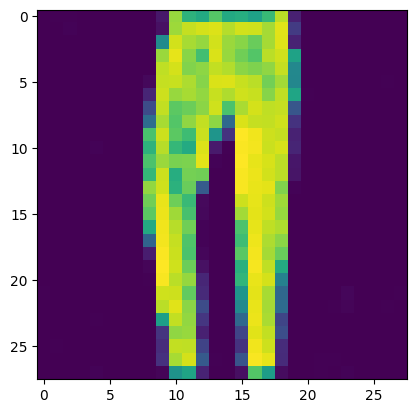

Dloss:  0.6220875
Gloss:  0.76712036
Dloss:  0.62210107
Gloss:  0.7670756
Dloss:  0.62211436
Gloss:  0.76712865
Dloss:  0.6221272
Gloss:  0.7671004
Dloss:  0.6221348
Gloss:  0.76713187
Dloss:  0.6221422
Gloss:  0.7671147
Dloss:  0.6221488
Gloss:  0.76714414
Dloss:  0.6221537
Gloss:  0.76712966
Dloss:  0.6221608
Gloss:  0.7671563
Dloss:  0.6221664
Gloss:  0.76714206
Dloss:  0.6221701
Gloss:  0.76716834
Dloss:  0.6221748
Gloss:  0.7671575
Dloss:  0.6221808
Gloss:  0.7671776
Dloss:  0.6221853
Gloss:  0.76716995
Dloss:  0.6221932
Gloss:  0.7671909
Dloss:  0.6222
Gloss:  0.7671811
Dloss:  0.6222079
Gloss:  0.76720446
Dloss:  0.6222148
Gloss:  0.7671829
Dloss:  0.62222207
Gloss:  0.7672178
Dloss:  0.6222278
Gloss:  0.7671929
Dloss:  0.6222357
Gloss:  0.7672358
Dloss:  0.62224233
Gloss:  0.76720417
Dloss:  0.62225455
Gloss:  0.7672588
Dloss:  0.622264
Gloss:  0.76722395
Dloss:  0.622274
Gloss:  0.76726896
Dloss:  0.6222807
Gloss:  0.7672427
Dloss:  0.6222874
Gloss:  0.7672773
Dloss:  0.622294

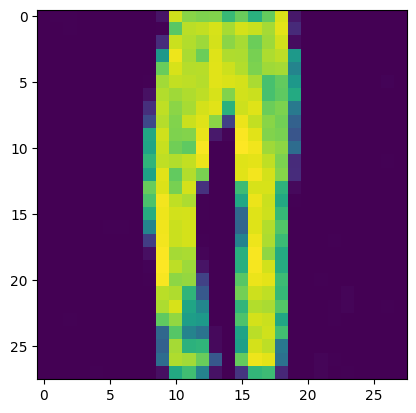

Dloss:  0.6223137
Gloss:  0.7673061
Dloss:  0.6223196
Gloss:  0.7672922
Dloss:  0.62232536
Gloss:  0.76732105
Dloss:  0.6223299
Gloss:  0.7672986
Dloss:  0.6223372
Gloss:  0.76733595
Dloss:  0.62234557
Gloss:  0.7673032
Dloss:  0.62235403
Gloss:  0.76735026
Dloss:  0.6223631
Gloss:  0.7673237
Dloss:  0.62237006
Gloss:  0.76736057
Dloss:  0.622377
Gloss:  0.76733494
Dloss:  0.6223849
Gloss:  0.76737523
Dloss:  0.6223931
Gloss:  0.7673468
Dloss:  0.62240094
Gloss:  0.7673935
Dloss:  0.6224098
Gloss:  0.7673631
Dloss:  0.62241864
Gloss:  0.76740015
Dloss:  0.6224243
Gloss:  0.7673751
Dloss:  0.6224308
Gloss:  0.76741004
Dloss:  0.62243855
Gloss:  0.7673891
Dloss:  0.6224459
Gloss:  0.7674303
Dloss:  0.6224545
Gloss:  0.7673985
Dloss:  0.6224637
Gloss:  0.76743877
Dloss:  0.62247217
Gloss:  0.76741326
Dloss:  0.62247777
Gloss:  0.76744395
Dloss:  0.62248516
Gloss:  0.7674276
Dloss:  0.62249005
Gloss:  0.76744527
Dloss:  0.62249637
Gloss:  0.767431
Dloss:  0.6225028
Gloss:  0.7674528
Dloss:

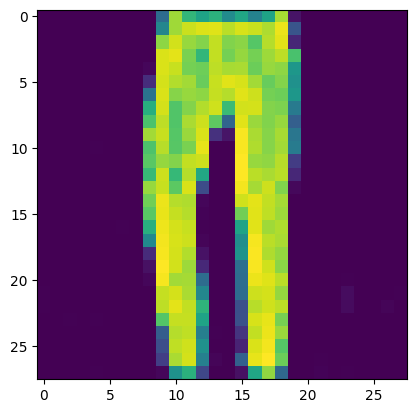

Dloss:  0.62252915
Gloss:  0.7674638
Dloss:  0.62253577
Gloss:  0.76744586
Dloss:  0.62254065
Gloss:  0.7674679
Dloss:  0.6225464
Gloss:  0.7674516
Dloss:  0.6225538
Gloss:  0.76748407
Dloss:  0.62255967
Gloss:  0.76746297
Dloss:  0.62256694
Gloss:  0.76748705
Dloss:  0.6225739
Gloss:  0.76746964
Dloss:  0.62257946
Gloss:  0.7674978
Dloss:  0.62258613
Gloss:  0.7674742
Dloss:  0.62259316
Gloss:  0.7675145
Dloss:  0.62260115
Gloss:  0.76747984
Dloss:  0.62261
Gloss:  0.76752746
Dloss:  0.6226183
Gloss:  0.7674913
Dloss:  0.6226288
Gloss:  0.7675415
Dloss:  0.6226368
Gloss:  0.7675081
Dloss:  0.62264425
Gloss:  0.76754946
Dloss:  0.6226534
Gloss:  0.7675253
Dloss:  0.6226626
Gloss:  0.7675558
Dloss:  0.622671
Gloss:  0.76753753
Dloss:  0.62267834
Gloss:  0.76755863
Dloss:  0.6226819
Gloss:  0.7675482
Dloss:  0.62268925
Gloss:  0.7675662
Dloss:  0.62269384
Gloss:  0.76756346
Dloss:  0.6226993
Gloss:  0.76756924
Dloss:  0.6227031
Gloss:  0.7675718
Dloss:  0.6227094
Gloss:  0.76757497
Dloss

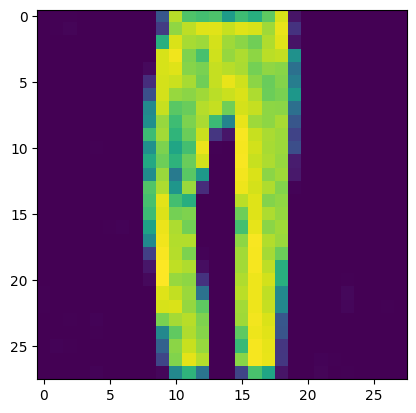

Dloss:  0.62273395
Gloss:  0.7675882
Dloss:  0.6227386
Gloss:  0.76758015
Dloss:  0.62274456
Gloss:  0.7675978
Dloss:  0.6227504
Gloss:  0.76758134
Dloss:  0.6227567
Gloss:  0.7676112
Dloss:  0.6227636
Gloss:  0.7675849
Dloss:  0.6227706
Gloss:  0.76763105
Dloss:  0.6227776
Gloss:  0.76759714
Dloss:  0.62278616
Gloss:  0.767649
Dloss:  0.62279415
Gloss:  0.76760983
Dloss:  0.6228037
Gloss:  0.7676629
Dloss:  0.6228134
Gloss:  0.7676276
Dloss:  0.6228245
Gloss:  0.76767546
Dloss:  0.6228359
Gloss:  0.7676472
Dloss:  0.62284565
Gloss:  0.76768816
37 / 100
Dloss:  0.62285364
Gloss:  0.7676671
37 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


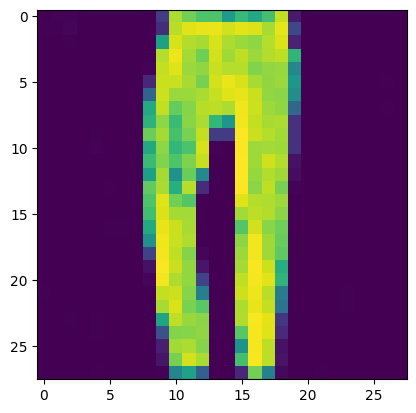

Dloss:  0.6228577
Gloss:  0.7676913
Dloss:  0.6228639
Gloss:  0.7676799
Dloss:  0.6228695
Gloss:  0.76769304
Dloss:  0.62287647
Gloss:  0.7676889
Dloss:  0.62288225
Gloss:  0.76769483
Dloss:  0.6228867
Gloss:  0.76770175
Dloss:  0.6228913
Gloss:  0.7677045
Dloss:  0.6228967
Gloss:  0.76770264
Dloss:  0.6229004
Gloss:  0.76770663
Dloss:  0.6229062
Gloss:  0.76771283
Dloss:  0.6229115
Gloss:  0.7677138
Dloss:  0.62291783
Gloss:  0.7677147
Dloss:  0.62292445
Gloss:  0.7677199
Dloss:  0.62292993
Gloss:  0.76772076
Dloss:  0.6229332
Gloss:  0.76772875
Dloss:  0.6229371
Gloss:  0.7677299
Dloss:  0.62294036
Gloss:  0.7677343
Dloss:  0.622945
Gloss:  0.76773536
Dloss:  0.62295115
Gloss:  0.76774
Dloss:  0.622957
Gloss:  0.76773185
Dloss:  0.6229618
Gloss:  0.7677527
Dloss:  0.62296563
Gloss:  0.76773757
Dloss:  0.62297165
Gloss:  0.7677763
Dloss:  0.6229804
Gloss:  0.7677367
Dloss:  0.62299067
Gloss:  0.76781243
Dloss:  0.6230057
Gloss:  0.7677508
Dloss:  0.6230256
Gloss:  0.7678467
Dloss:  0.

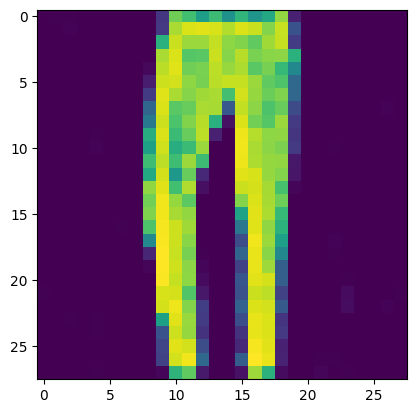

Dloss:  0.62307614
Gloss:  0.7678491
Dloss:  0.62308407
Gloss:  0.7678301
Dloss:  0.6230909
Gloss:  0.7678421
Dloss:  0.62309784
Gloss:  0.7678414
Dloss:  0.6231014
Gloss:  0.767841
Dloss:  0.6231058
Gloss:  0.76784605
Dloss:  0.6231107
Gloss:  0.7678505
Dloss:  0.62311524
Gloss:  0.7678519
Dloss:  0.62312114
Gloss:  0.7678629
Dloss:  0.62312585
Gloss:  0.7678605
Dloss:  0.6231316
Gloss:  0.7678691
Dloss:  0.62313795
Gloss:  0.7678701
Dloss:  0.62314475
Gloss:  0.76787114
Dloss:  0.62314934
Gloss:  0.7678798
Dloss:  0.6231548
Gloss:  0.76788515
Dloss:  0.62316
Gloss:  0.767888
Dloss:  0.6231652
Gloss:  0.7678888
Dloss:  0.6231714
Gloss:  0.7678931
Dloss:  0.6231779
Gloss:  0.7678949
Dloss:  0.6231824
Gloss:  0.7678977
Dloss:  0.623188
Gloss:  0.7678969
Dloss:  0.6231921
Gloss:  0.767907
Dloss:  0.6231987
Gloss:  0.7679048
Dloss:  0.62320304
Gloss:  0.7679233
Dloss:  0.62320834
Gloss:  0.7679029
Dloss:  0.62321424
Gloss:  0.76794094
Dloss:  0.62322253
Gloss:  0.7679042
Dloss:  0.6232309

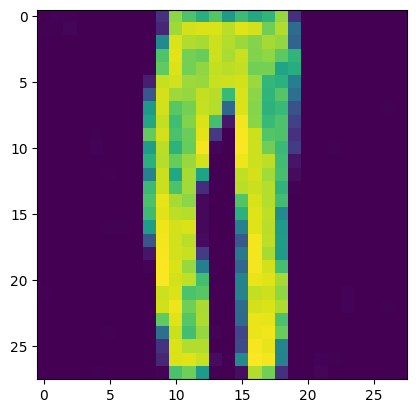

Dloss:  0.62326294
Gloss:  0.76794475
Dloss:  0.62327284
Gloss:  0.7679849
Dloss:  0.6232818
Gloss:  0.7679583
Dloss:  0.62329036
Gloss:  0.76799196
Dloss:  0.62329656
Gloss:  0.7679714
Dloss:  0.62330306
Gloss:  0.76799786
Dloss:  0.62330776
Gloss:  0.76797754
Dloss:  0.6233145
Gloss:  0.7680169
Dloss:  0.623322
Gloss:  0.76798767
Dloss:  0.62332976
Gloss:  0.76801926
Dloss:  0.6233388
Gloss:  0.76800483
Dloss:  0.6233456
Gloss:  0.7680217
Dloss:  0.62334925
Gloss:  0.76801324
Dloss:  0.6233532
Gloss:  0.76803416
Dloss:  0.62335783
Gloss:  0.76801723
Dloss:  0.62336236
Gloss:  0.7680525
Dloss:  0.62336934
Gloss:  0.7680307
Dloss:  0.62337756
Gloss:  0.76805425
Dloss:  0.62338525
Gloss:  0.7680393
Dloss:  0.6233914
Gloss:  0.7680629
Dloss:  0.623397
Gloss:  0.76804394
Dloss:  0.6234022
Gloss:  0.7680715
Dloss:  0.62340635
Gloss:  0.7680531
Dloss:  0.6234119
Gloss:  0.768083
Dloss:  0.62341934
Gloss:  0.7680606
Dloss:  0.6234276
Gloss:  0.7680897
Dloss:  0.623435
Gloss:  0.76806873
Dlos

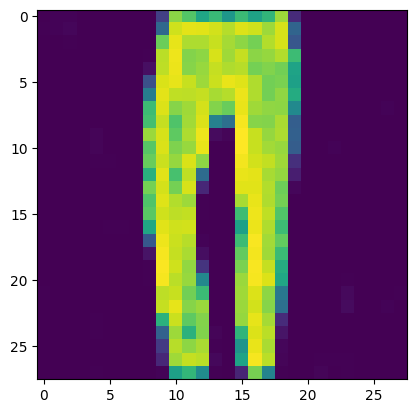

Dloss:  0.62345594
Gloss:  0.76809734
Dloss:  0.6234618
Gloss:  0.76812446
Dloss:  0.6234686
Gloss:  0.7681111
Dloss:  0.6234761
Gloss:  0.76813644
Dloss:  0.6234826
Gloss:  0.7681199
Dloss:  0.6234877
Gloss:  0.76815456
Dloss:  0.6234932
Gloss:  0.76811916
Dloss:  0.62350243
Gloss:  0.7681783
Dloss:  0.62351257
Gloss:  0.7681337
Dloss:  0.6235253
Gloss:  0.76818645
Dloss:  0.6235372
Gloss:  0.7681511
Dloss:  0.6235471
Gloss:  0.7681844
Dloss:  0.6235546
Gloss:  0.76816934
Dloss:  0.623559
Gloss:  0.7681921
Dloss:  0.62356395
Gloss:  0.7681816
Dloss:  0.6235705
Gloss:  0.7682122
Dloss:  0.62357587
Gloss:  0.76819587
Dloss:  0.62358105
Gloss:  0.7682233
Dloss:  0.623588
Gloss:  0.7682063
Dloss:  0.62359595
Gloss:  0.7682285
Dloss:  0.6236038
Gloss:  0.7682058
Dloss:  0.6236095
Gloss:  0.76824063
Dloss:  0.6236178
Gloss:  0.7682223
Dloss:  0.623621
Gloss:  0.76824814
Dloss:  0.62362504
Gloss:  0.7682384
Dloss:  0.62363183
Gloss:  0.7682619
Dloss:  0.6236381
Gloss:  0.7682466
Dloss:  0.62

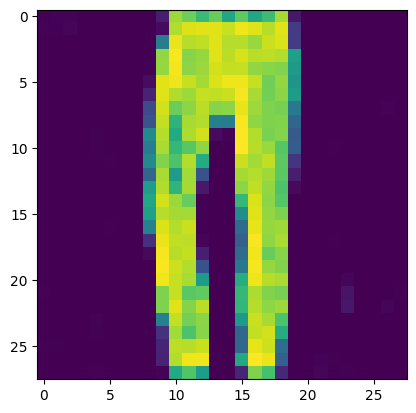

Dloss:  0.6236632
Gloss:  0.7682679
Dloss:  0.6236693
Gloss:  0.7683027
Dloss:  0.6236759
Gloss:  0.7682814
Dloss:  0.6236823
Gloss:  0.7683207
Dloss:  0.623689
Gloss:  0.7682914
Dloss:  0.6236982
Gloss:  0.7683289
Dloss:  0.62370604
Gloss:  0.76830214
Dloss:  0.6237133
Gloss:  0.7683302
Dloss:  0.6237204
Gloss:  0.768313
Dloss:  0.6237252
Gloss:  0.768343
Dloss:  0.6237296
Gloss:  0.7683221
Dloss:  0.6237344
Gloss:  0.76835495
Dloss:  0.62374073
Gloss:  0.76834065
Dloss:  0.6237488
Gloss:  0.7683625
Dloss:  0.6237543
Gloss:  0.76835066
38 / 100
Dloss:  0.62375945
Gloss:  0.76836973
38 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


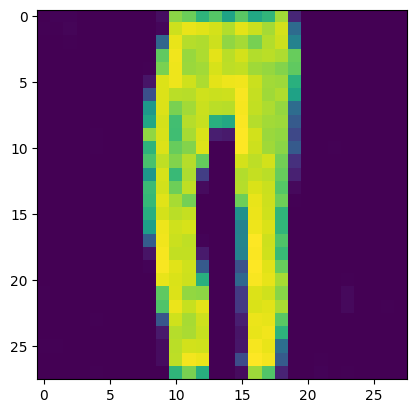

Dloss:  0.62376434
Gloss:  0.7683662
Dloss:  0.6237705
Gloss:  0.76837826
Dloss:  0.6237764
Gloss:  0.7683755
Dloss:  0.62378365
Gloss:  0.7683837
Dloss:  0.62378865
Gloss:  0.7683799
Dloss:  0.6237917
Gloss:  0.76839316
Dloss:  0.6237965
Gloss:  0.7683871
Dloss:  0.6238029
Gloss:  0.7684071
Dloss:  0.6238106
Gloss:  0.76839644
Dloss:  0.62381715
Gloss:  0.7684281
Dloss:  0.62382334
Gloss:  0.76840085
Dloss:  0.6238301
Gloss:  0.7684425
Dloss:  0.62383753
Gloss:  0.7684124
Dloss:  0.62384534
Gloss:  0.76846516
Dloss:  0.62385315
Gloss:  0.7684229
Dloss:  0.6238672
Gloss:  0.7684945
Dloss:  0.623881
Gloss:  0.76845586
Dloss:  0.6238916
Gloss:  0.76850814
Dloss:  0.6239003
Gloss:  0.76847756
Dloss:  0.62390774
Gloss:  0.7685127
Dloss:  0.623915
Gloss:  0.7684959
Dloss:  0.6239199
Gloss:  0.7685144
Dloss:  0.62392867
Gloss:  0.76851887
Dloss:  0.6239341
Gloss:  0.76851565
Dloss:  0.6239385
Gloss:  0.76853174
Dloss:  0.62394345
Gloss:  0.76852715
Dloss:  0.6239493
Gloss:  0.76854694
Dloss:

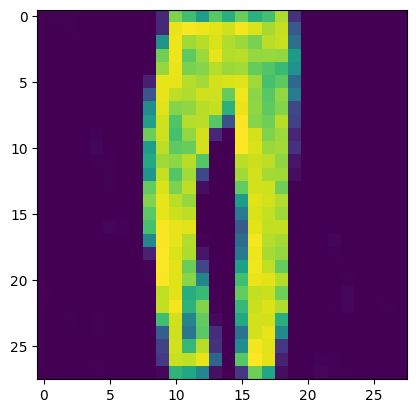

Dloss:  0.62396896
Gloss:  0.7685715
Dloss:  0.6239764
Gloss:  0.7685752
Dloss:  0.62398195
Gloss:  0.7685803
Dloss:  0.6239888
Gloss:  0.7685833
Dloss:  0.6239913
Gloss:  0.7685904
Dloss:  0.62399614
Gloss:  0.76860213
Dloss:  0.6239996
Gloss:  0.7686011
Dloss:  0.6240031
Gloss:  0.76861405
Dloss:  0.62400806
Gloss:  0.7686094
Dloss:  0.6240138
Gloss:  0.7686145
Dloss:  0.6240173
Gloss:  0.76862746
Dloss:  0.6240223
Gloss:  0.7686337
Dloss:  0.62402433
Gloss:  0.768641
Dloss:  0.6240268
Gloss:  0.76864815
Dloss:  0.6240313
Gloss:  0.7686509
Dloss:  0.62403727
Gloss:  0.7686675
Dloss:  0.62404424
Gloss:  0.76865774
Dloss:  0.6240494
Gloss:  0.76868826
Dloss:  0.6240535
Gloss:  0.7686695
Dloss:  0.6240572
Gloss:  0.76872414
Dloss:  0.62406415
Gloss:  0.76868594
Dloss:  0.6240742
Gloss:  0.7687554
Dloss:  0.62408763
Gloss:  0.7687092
Dloss:  0.6241006
Gloss:  0.76877326
Dloss:  0.6241135
Gloss:  0.7687294
Dloss:  0.62412375
Gloss:  0.7687835
Dloss:  0.6241327
Gloss:  0.76875657
Dloss:  0

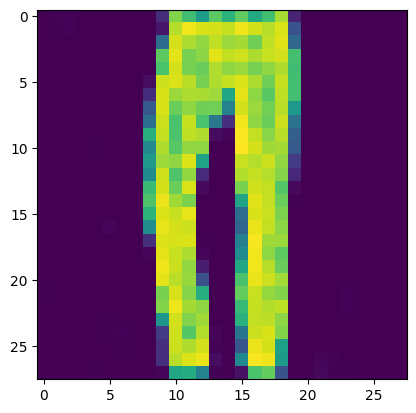

Dloss:  0.624156
Gloss:  0.76879686
Dloss:  0.62415916
Gloss:  0.76880795
Dloss:  0.62416303
Gloss:  0.7688143
Dloss:  0.62416714
Gloss:  0.7688225
Dloss:  0.62417185
Gloss:  0.7688277
Dloss:  0.6241769
Gloss:  0.76882577
Dloss:  0.62417996
Gloss:  0.76884115
Dloss:  0.6241846
Gloss:  0.768839
Dloss:  0.62418973
Gloss:  0.76886237
Dloss:  0.6241952
Gloss:  0.7688521
Dloss:  0.6242014
Gloss:  0.7688821
Dloss:  0.6242088
Gloss:  0.7688563
Dloss:  0.62421626
Gloss:  0.76890355
Dloss:  0.62422395
Gloss:  0.76887023
Dloss:  0.62423265
Gloss:  0.76892394
Dloss:  0.62424
Gloss:  0.76889396
Dloss:  0.6242485
Gloss:  0.76893634
Dloss:  0.62425625
Gloss:  0.7689031
Dloss:  0.624263
Gloss:  0.7689367
Dloss:  0.6242703
Gloss:  0.768926
Dloss:  0.6242746
Gloss:  0.7689362
Dloss:  0.6242784
Gloss:  0.76893693
Dloss:  0.62428206
Gloss:  0.7689496
Dloss:  0.62428606
Gloss:  0.76895463
Dloss:  0.6242901
Gloss:  0.7689639
Dloss:  0.62429655
Gloss:  0.7689713
Dloss:  0.6243026
Gloss:  0.7689791
Dloss:  0

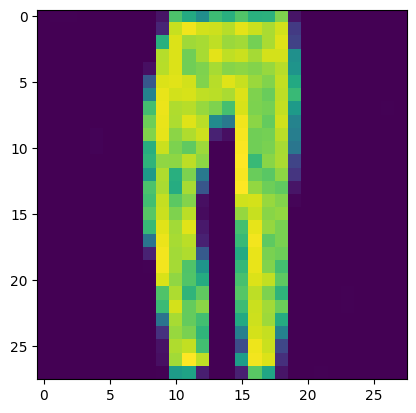

Dloss:  0.6243176
Gloss:  0.7690197
Dloss:  0.62432337
Gloss:  0.76901156
Dloss:  0.62432724
Gloss:  0.7690259
Dloss:  0.62433094
Gloss:  0.76902044
Dloss:  0.62433565
Gloss:  0.76904124
Dloss:  0.62433994
Gloss:  0.7690273
Dloss:  0.62434554
Gloss:  0.7690542
Dloss:  0.62435156
Gloss:  0.769034
Dloss:  0.62435824
Gloss:  0.76907396
Dloss:  0.6243653
Gloss:  0.7690489
Dloss:  0.62437123
Gloss:  0.7690932
Dloss:  0.62437737
Gloss:  0.7690588
Dloss:  0.62438715
Gloss:  0.7691137
Dloss:  0.6243971
Gloss:  0.76906985
Dloss:  0.62441117
Gloss:  0.76912946
Dloss:  0.62442225
Gloss:  0.7690945
Dloss:  0.6244304
Gloss:  0.76914716
Dloss:  0.624435
Gloss:  0.7691231
Dloss:  0.62443906
Gloss:  0.76915526
Dloss:  0.62444425
Gloss:  0.7691455
Dloss:  0.6244516
Gloss:  0.7691606
Dloss:  0.6244564
Gloss:  0.7691585
Dloss:  0.6244636
Gloss:  0.76916546
Dloss:  0.62446696
Gloss:  0.7691677
Dloss:  0.6244691
Gloss:  0.76917
Dloss:  0.62447166
Gloss:  0.76917684
Dloss:  0.6244766
Gloss:  0.76917464
Dlos

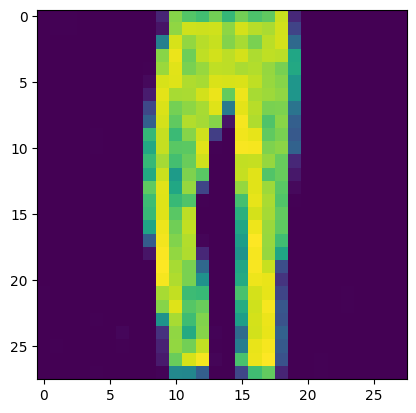

Dloss:  0.6244954
Gloss:  0.7691779
Dloss:  0.62450147
Gloss:  0.76921165
Dloss:  0.62450725
Gloss:  0.76918536
Dloss:  0.62451357
Gloss:  0.76923007
Dloss:  0.6245202
Gloss:  0.7691897
Dloss:  0.62452966
Gloss:  0.76925176
Dloss:  0.6245387
Gloss:  0.7692116
Dloss:  0.6245476
Gloss:  0.7692662
Dloss:  0.624557
Gloss:  0.7692399
Dloss:  0.6245638
Gloss:  0.7692696
Dloss:  0.6245731
Gloss:  0.769248
Dloss:  0.624579
Gloss:  0.769269
Dloss:  0.62458414
Gloss:  0.7692627
Dloss:  0.62459075
Gloss:  0.7692735
Dloss:  0.6245946
Gloss:  0.7692717
39 / 100
Dloss:  0.6246
Gloss:  0.7692809
39 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


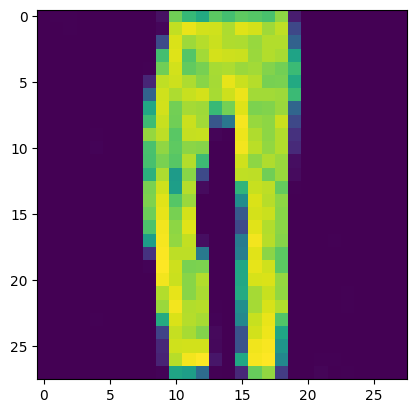

Dloss:  0.62460417
Gloss:  0.76928055
Dloss:  0.6246074
Gloss:  0.76928675
Dloss:  0.6246115
Gloss:  0.7692879
Dloss:  0.6246174
Gloss:  0.7692943
Dloss:  0.62462133
Gloss:  0.7692917
Dloss:  0.6246263
Gloss:  0.76930344
Dloss:  0.6246292
Gloss:  0.7692876
Dloss:  0.6246356
Gloss:  0.76930875
Dloss:  0.6246399
Gloss:  0.7692862
Dloss:  0.62464756
Gloss:  0.7693219
Dloss:  0.6246534
Gloss:  0.769293
Dloss:  0.62466073
Gloss:  0.7693394
Dloss:  0.62466806
Gloss:  0.76930785
Dloss:  0.6246781
Gloss:  0.76935196
Dloss:  0.6246866
Gloss:  0.76931757
Dloss:  0.62469655
Gloss:  0.76936334
Dloss:  0.6247047
Gloss:  0.7693365
Dloss:  0.6247101
Gloss:  0.76936036
Dloss:  0.62471557
Gloss:  0.7693427
Dloss:  0.62472045
Gloss:  0.7693647
Dloss:  0.62472516
Gloss:  0.76934785
Dloss:  0.6247293
Gloss:  0.7693692
Dloss:  0.62473404
Gloss:  0.7693605
Dloss:  0.6247388
Gloss:  0.7693707
Dloss:  0.624742
Gloss:  0.7693691
Dloss:  0.62474495
Gloss:  0.76938057
Dloss:  0.6247497
Gloss:  0.7693809
Dloss:  

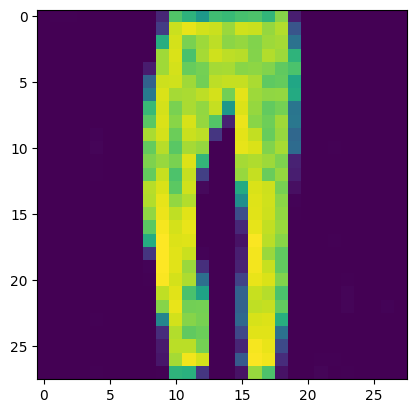

Dloss:  0.6247684
Gloss:  0.76940113
Dloss:  0.6247731
Gloss:  0.7693957
Dloss:  0.62478024
Gloss:  0.7694137
Dloss:  0.6247879
Gloss:  0.7693977
Dloss:  0.6247927
Gloss:  0.76943064
Dloss:  0.624798
Gloss:  0.7694012
Dloss:  0.62480533
Gloss:  0.76944685
Dloss:  0.62481153
Gloss:  0.7694207
Dloss:  0.6248181
Gloss:  0.76945734
Dloss:  0.62482584
Gloss:  0.76943
Dloss:  0.6248318
Gloss:  0.76947016
Dloss:  0.6248382
Gloss:  0.769447
Dloss:  0.62484455
Gloss:  0.7694816
Dloss:  0.6248498
Gloss:  0.7694625
Dloss:  0.6248549
Gloss:  0.76949525
Dloss:  0.62486184
Gloss:  0.76947314
Dloss:  0.62486917
Gloss:  0.76950294
Dloss:  0.62487596
Gloss:  0.769478
Dloss:  0.62488186
Gloss:  0.7695131
Dloss:  0.62488645
Gloss:  0.7694914
Dloss:  0.624892
Gloss:  0.76952034
Dloss:  0.6248971
Gloss:  0.76949877
Dloss:  0.6249049
Gloss:  0.76953316
Dloss:  0.6249108
Gloss:  0.7695109
Dloss:  0.6249181
Gloss:  0.76953924
Dloss:  0.6249227
Gloss:  0.76951855
Dloss:  0.62492937
Gloss:  0.7695505
Dloss:  0.

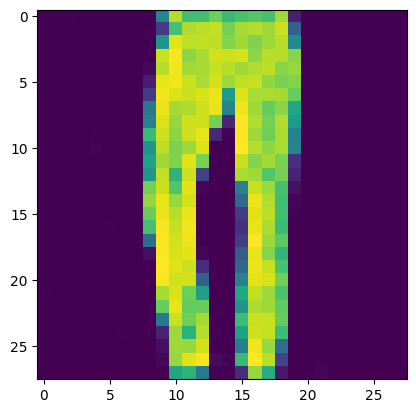

Dloss:  0.6249521
Gloss:  0.76956964
Dloss:  0.62495595
Gloss:  0.7695477
Dloss:  0.6249615
Gloss:  0.76958907
Dloss:  0.6249689
Gloss:  0.7695697
Dloss:  0.6249758
Gloss:  0.76959884
Dloss:  0.6249829
Gloss:  0.7695757
Dloss:  0.6249896
Gloss:  0.7696134
Dloss:  0.6249958
Gloss:  0.769588
Dloss:  0.6250017
Gloss:  0.7696258
Dloss:  0.62500733
Gloss:  0.7695989
Dloss:  0.6250138
Gloss:  0.76963484
Dloss:  0.6250198
Gloss:  0.7696123
Dloss:  0.625025
Gloss:  0.7696421
Dloss:  0.62503076
Gloss:  0.7696218
Dloss:  0.6250372
Gloss:  0.7696512
Dloss:  0.6250422
Gloss:  0.7696293
Dloss:  0.6250484
Gloss:  0.76966196
Dloss:  0.6250548
Gloss:  0.76964307
Dloss:  0.6250599
Gloss:  0.7696702
Dloss:  0.6250659
Gloss:  0.76964945
Dloss:  0.6250711
Gloss:  0.7696711
Dloss:  0.6250769
Gloss:  0.7696572
Dloss:  0.62508297
Gloss:  0.7696808
Dloss:  0.6250878
Gloss:  0.7696631
Dloss:  0.6250924
Gloss:  0.7696909
Dloss:  0.6250978
Gloss:  0.76967525
Dloss:  0.62510264
Gloss:  0.7697061
Dloss:  0.6251067

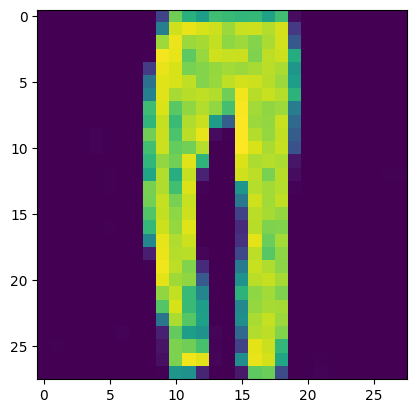

Dloss:  0.62512636
Gloss:  0.76974565
Dloss:  0.6251335
Gloss:  0.7697098
Dloss:  0.62514013
Gloss:  0.76975423
Dloss:  0.6251471
Gloss:  0.76972884
Dloss:  0.62515277
Gloss:  0.76975983
Dloss:  0.6251573
Gloss:  0.7697406
Dloss:  0.6251622
Gloss:  0.76976067
Dloss:  0.62516665
Gloss:  0.76974964
Dloss:  0.6251711
Gloss:  0.769766
Dloss:  0.6251777
Gloss:  0.76975596
Dloss:  0.6251834
Gloss:  0.76977074
Dloss:  0.6251878
Gloss:  0.7697688
Dloss:  0.6251924
Gloss:  0.7697728
Dloss:  0.6251972
Gloss:  0.76977336
Dloss:  0.6252023
Gloss:  0.7697737
Dloss:  0.62520605
Gloss:  0.7697765
Dloss:  0.6252099
Gloss:  0.76978946
Dloss:  0.62521374
Gloss:  0.76978546
Dloss:  0.625219
Gloss:  0.7697973
Dloss:  0.62522185
Gloss:  0.769791
Dloss:  0.6252261
Gloss:  0.76980555
Dloss:  0.6252288
Gloss:  0.7697996
Dloss:  0.6252365
Gloss:  0.76981753
Dloss:  0.6252408
Gloss:  0.7697988
Dloss:  0.6252477
Gloss:  0.76983905
Dloss:  0.6252531
Gloss:  0.7698083
Dloss:  0.6252612
Gloss:  0.76985854
Dloss:  0

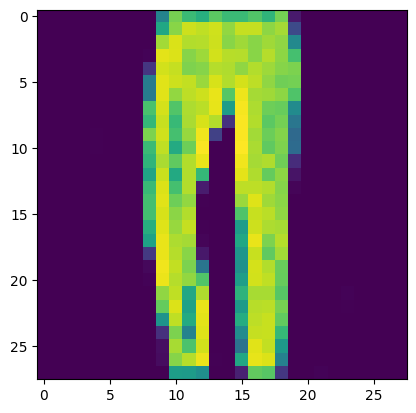

Dloss:  0.62529796
Gloss:  0.769886
Dloss:  0.6253061
Gloss:  0.7698545
Dloss:  0.62531596
Gloss:  0.76990163
Dloss:  0.62532383
Gloss:  0.7698771
Dloss:  0.6253281
Gloss:  0.7699063
Dloss:  0.6253335
Gloss:  0.76988965
Dloss:  0.6253386
Gloss:  0.7699132
Dloss:  0.6253431
Gloss:  0.76990324
Dloss:  0.6253485
Gloss:  0.7699219
Dloss:  0.62535375
Gloss:  0.7699156
Dloss:  0.6253605
Gloss:  0.7699236
Dloss:  0.6253656
Gloss:  0.769925
Dloss:  0.6253694
Gloss:  0.76992744
Dloss:  0.625373
Gloss:  0.76993674
Dloss:  0.6253745
Gloss:  0.7699346
40 / 100
Dloss:  0.62537813
Gloss:  0.76994747
40 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


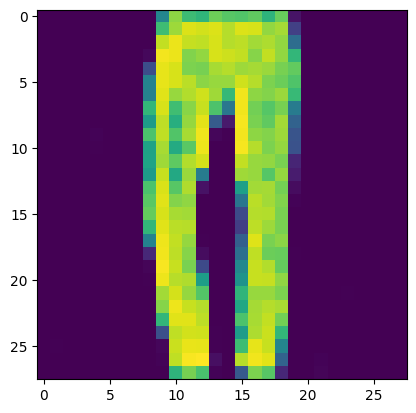

Dloss:  0.6253819
Gloss:  0.76993644
Dloss:  0.62538725
Gloss:  0.7699535
Dloss:  0.62539214
Gloss:  0.7699373
Dloss:  0.6253973
Gloss:  0.7699611
Dloss:  0.62540317
Gloss:  0.76994884
Dloss:  0.6254058
Gloss:  0.7699701
Dloss:  0.6254091
Gloss:  0.76995504
Dloss:  0.6254134
Gloss:  0.7699905
Dloss:  0.62541914
Gloss:  0.769964
Dloss:  0.62542576
Gloss:  0.7700066
Dloss:  0.6254315
Gloss:  0.7699733
Dloss:  0.62544036
Gloss:  0.7700236
Dloss:  0.6254499
Gloss:  0.7699823
Dloss:  0.6254624
Gloss:  0.7700356
Dloss:  0.6254723
Gloss:  0.7700007
Dloss:  0.6254831
Gloss:  0.7700477
Dloss:  0.62549067
Gloss:  0.77002376
Dloss:  0.6254945
Gloss:  0.7700505
Dloss:  0.625498
Gloss:  0.77003694
Dloss:  0.6255025
Gloss:  0.7700628
Dloss:  0.6255068
Gloss:  0.7700526
Dloss:  0.6255114
Gloss:  0.7700728
Dloss:  0.625516
Gloss:  0.7700722
Dloss:  0.62552136
Gloss:  0.7700776
Dloss:  0.62552476
Gloss:  0.77009237
Dloss:  0.6255283
Gloss:  0.77009016
Dloss:  0.6255315
Gloss:  0.7701095
Dloss:  0.62553

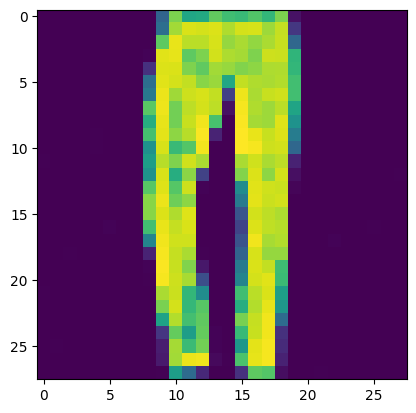

Dloss:  0.62555206
Gloss:  0.77013403
Dloss:  0.6255574
Gloss:  0.7701252
Dloss:  0.6255601
Gloss:  0.7701407
Dloss:  0.62556416
Gloss:  0.77012855
Dloss:  0.6255673
Gloss:  0.7701515
Dloss:  0.6255733
Gloss:  0.7701272
Dloss:  0.6255785
Gloss:  0.77016366
Dloss:  0.6255827
Gloss:  0.7701351
Dloss:  0.62559134
Gloss:  0.77018905
Dloss:  0.62559927
Gloss:  0.7701512
Dloss:  0.6256089
Gloss:  0.7702152
Dloss:  0.6256188
Gloss:  0.7701805
Dloss:  0.62562925
Gloss:  0.77023274
Dloss:  0.6256378
Gloss:  0.77020925
Dloss:  0.6256443
Gloss:  0.77023894
Dloss:  0.62564933
Gloss:  0.7702279
Dloss:  0.6256541
Gloss:  0.77024937
Dloss:  0.62565887
Gloss:  0.7702427
Dloss:  0.62566364
Gloss:  0.7702576
Dloss:  0.6256673
Gloss:  0.770252
Dloss:  0.6256714
Gloss:  0.77026296
Dloss:  0.62567335
Gloss:  0.77025753
Dloss:  0.62567806
Gloss:  0.7702719
Dloss:  0.6256805
Gloss:  0.7702721
Dloss:  0.6256831
Gloss:  0.7702821
Dloss:  0.62568444
Gloss:  0.77028215
Dloss:  0.625688
Gloss:  0.77029043
Dloss: 

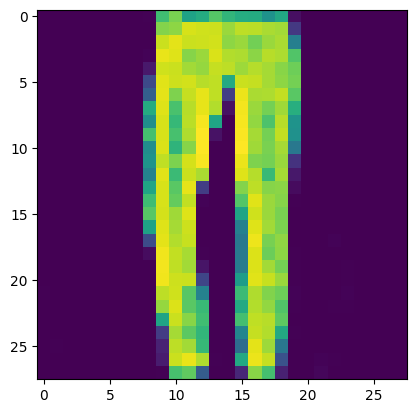

Dloss:  0.62570447
Gloss:  0.77030885
Dloss:  0.62571025
Gloss:  0.7703051
Dloss:  0.62571394
Gloss:  0.77032363
Dloss:  0.62571824
Gloss:  0.77032197
Dloss:  0.62572175
Gloss:  0.77033913
Dloss:  0.6257253
Gloss:  0.77032375
Dloss:  0.6257288
Gloss:  0.77035886
Dloss:  0.62573427
Gloss:  0.7703389
Dloss:  0.6257401
Gloss:  0.7703798
Dloss:  0.625748
Gloss:  0.7703452
Dloss:  0.62575746
Gloss:  0.7704091
Dloss:  0.62576914
Gloss:  0.7703652
Dloss:  0.62577707
Gloss:  0.7704336
Dloss:  0.6257863
Gloss:  0.7703968
Dloss:  0.6257947
Gloss:  0.77043784
Dloss:  0.6258
Gloss:  0.7704168
Dloss:  0.62580675
Gloss:  0.77043396
Dloss:  0.62581253
Gloss:  0.7704192
Dloss:  0.62581664
Gloss:  0.77044076
Dloss:  0.6258212
Gloss:  0.7704255
Dloss:  0.62582517
Gloss:  0.7704413
Dloss:  0.6258295
Gloss:  0.7704342
Dloss:  0.6258327
Gloss:  0.77045274
Dloss:  0.62583584
Gloss:  0.77043813
Dloss:  0.62583905
Gloss:  0.7704627
Dloss:  0.6258454
Gloss:  0.770447
Dloss:  0.6258512
Gloss:  0.770477
Dloss:  

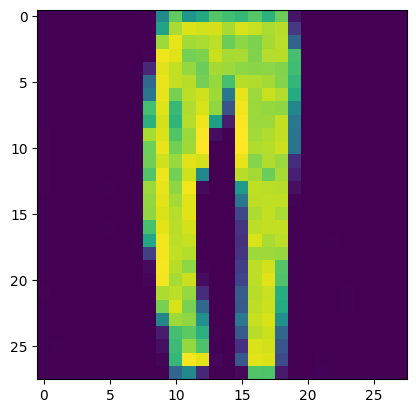

Dloss:  0.6258674
Gloss:  0.7705121
Dloss:  0.62587106
Gloss:  0.7704879
Dloss:  0.62587565
Gloss:  0.7705296
Dloss:  0.62588143
Gloss:  0.7704991
Dloss:  0.6258899
Gloss:  0.7705524
Dloss:  0.62589955
Gloss:  0.7705153
Dloss:  0.6259085
Gloss:  0.77055144
Dloss:  0.6259159
Gloss:  0.77052724
Dloss:  0.62592167
Gloss:  0.77054924
Dloss:  0.6259254
Gloss:  0.7705391
Dloss:  0.62592894
Gloss:  0.770556
Dloss:  0.6259316
Gloss:  0.7705501
Dloss:  0.62593496
Gloss:  0.7705601
Dloss:  0.62593967
Gloss:  0.77055407
Dloss:  0.62594444
Gloss:  0.7705675
Dloss:  0.6259488
Gloss:  0.770561
Dloss:  0.6259514
Gloss:  0.7705855
Dloss:  0.62595636
Gloss:  0.77057743
Dloss:  0.6259603
Gloss:  0.77060235
Dloss:  0.6259636
Gloss:  0.77059
Dloss:  0.6259692
Gloss:  0.7706202
Dloss:  0.62597144
Gloss:  0.7705983
Dloss:  0.62597895
Gloss:  0.7706338
Dloss:  0.62598497
Gloss:  0.7706033
Dloss:  0.625993
Gloss:  0.7706498
Dloss:  0.6260004
Gloss:  0.77061445
Dloss:  0.626009
Gloss:  0.77065784
Dloss:  0.626

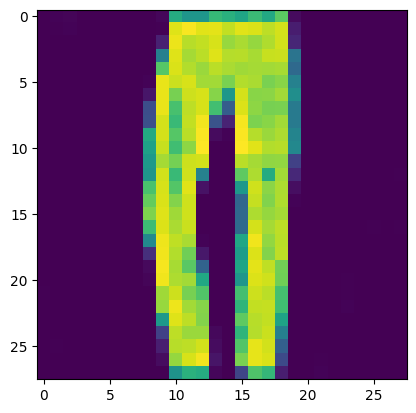

Dloss:  0.62602764
Gloss:  0.7706732
Dloss:  0.62603176
Gloss:  0.7706698
Dloss:  0.6260353
Gloss:  0.7706836
Dloss:  0.6260401
Gloss:  0.7706822
Dloss:  0.6260436
Gloss:  0.77069485
Dloss:  0.6260474
Gloss:  0.7706823
Dloss:  0.6260514
Gloss:  0.7707042
Dloss:  0.6260544
Gloss:  0.77069014
Dloss:  0.62605983
Gloss:  0.7707154
Dloss:  0.6260636
Gloss:  0.7707054
Dloss:  0.6260675
Gloss:  0.77073437
Dloss:  0.62607133
Gloss:  0.77071196
Dloss:  0.6260773
Gloss:  0.77075154
Dloss:  0.6260824
Gloss:  0.770722
Dloss:  0.6260895
Gloss:  0.7707759
41 / 100
Dloss:  0.62609947
Gloss:  0.7707357
41 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


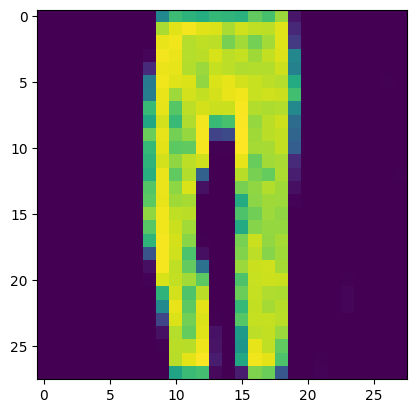

Dloss:  0.6261092
Gloss:  0.7707889
Dloss:  0.6261182
Gloss:  0.7707538
Dloss:  0.62612534
Gloss:  0.77078694
Dloss:  0.62613124
Gloss:  0.77077264
Dloss:  0.6261343
Gloss:  0.7707945
Dloss:  0.62613595
Gloss:  0.77079153
Dloss:  0.62613773
Gloss:  0.7707991
Dloss:  0.6261417
Gloss:  0.770802
Dloss:  0.6261456
Gloss:  0.77080435
Dloss:  0.6261499
Gloss:  0.7708109
Dloss:  0.626154
Gloss:  0.77081966
Dloss:  0.62615776
Gloss:  0.77082
Dloss:  0.6261607
Gloss:  0.77082413
Dloss:  0.62616426
Gloss:  0.7708314
Dloss:  0.6261676
Gloss:  0.7708303
Dloss:  0.6261736
Gloss:  0.77084607
Dloss:  0.62617886
Gloss:  0.77084655
Dloss:  0.6261821
Gloss:  0.7708559
Dloss:  0.62618273
Gloss:  0.7708597
Dloss:  0.6261864
Gloss:  0.77087975
Dloss:  0.62618965
Gloss:  0.7708754
Dloss:  0.62619317
Gloss:  0.77089936
Dloss:  0.6261982
Gloss:  0.7708943
Dloss:  0.6262014
Gloss:  0.770916
Dloss:  0.6262009
Gloss:  0.7709139
Dloss:  0.6262023
Gloss:  0.77094656
Dloss:  0.62620664
Gloss:  0.7709326
Dloss:  0.6

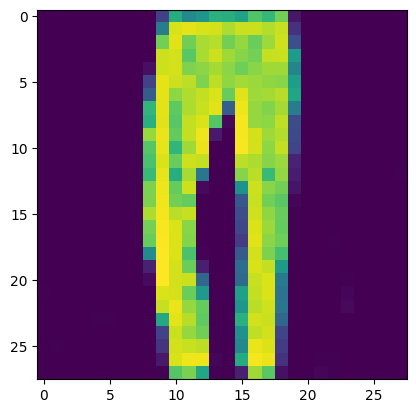

Dloss:  0.6262361
Gloss:  0.77096266
Dloss:  0.6262419
Gloss:  0.7710156
Dloss:  0.62624836
Gloss:  0.77099353
Dloss:  0.626256
Gloss:  0.77102965
Dloss:  0.62626064
Gloss:  0.77101415
Dloss:  0.6262649
Gloss:  0.77104324
Dloss:  0.6262694
Gloss:  0.77102846
Dloss:  0.62627083
Gloss:  0.7710667
Dloss:  0.6262729
Gloss:  0.77104783
Dloss:  0.62627673
Gloss:  0.7710839
Dloss:  0.6262818
Gloss:  0.77106774
Dloss:  0.6262886
Gloss:  0.7711048
Dloss:  0.6262946
Gloss:  0.7710763
Dloss:  0.62630093
Gloss:  0.7711394
Dloss:  0.62630725
Gloss:  0.7711057
Dloss:  0.6263154
Gloss:  0.77116287
Dloss:  0.62632275
Gloss:  0.77113074
Dloss:  0.6263313
Gloss:  0.77117103
Dloss:  0.62633884
Gloss:  0.7711482
Dloss:  0.62634534
Gloss:  0.77118194
Dloss:  0.62635005
Gloss:  0.7711625
Dloss:  0.6263525
Gloss:  0.77117646
Dloss:  0.62635726
Gloss:  0.77117497
Dloss:  0.6263601
Gloss:  0.7711828
Dloss:  0.6263658
Gloss:  0.7711846
Dloss:  0.6263708
Gloss:  0.77119184
Dloss:  0.62637794
Gloss:  0.77119166
D

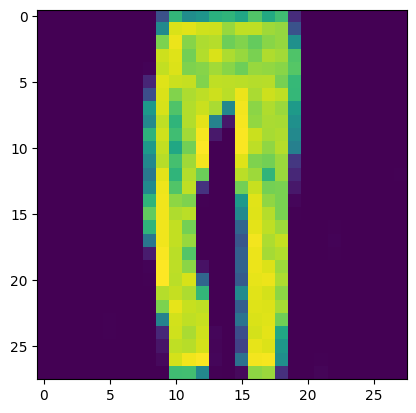

Dloss:  0.6263853
Gloss:  0.7712203
Dloss:  0.62639034
Gloss:  0.7712379
Dloss:  0.62639564
Gloss:  0.7712326
Dloss:  0.6264012
Gloss:  0.77125055
Dloss:  0.62640554
Gloss:  0.77124095
Dloss:  0.6264093
Gloss:  0.77126795
Dloss:  0.62641186
Gloss:  0.771255
Dloss:  0.6264145
Gloss:  0.7712909
Dloss:  0.6264192
Gloss:  0.7712671
Dloss:  0.6264254
Gloss:  0.771307
Dloss:  0.6264308
Gloss:  0.7712825
Dloss:  0.62643415
Gloss:  0.7713207
Dloss:  0.62643707
Gloss:  0.77130866
Dloss:  0.6264401
Gloss:  0.7713345
Dloss:  0.62644565
Gloss:  0.7713218
Dloss:  0.6264498
Gloss:  0.7713499
Dloss:  0.6264553
Gloss:  0.771346
Dloss:  0.62645906
Gloss:  0.7713618
Dloss:  0.62646157
Gloss:  0.7713621
Dloss:  0.62646455
Gloss:  0.7713742
Dloss:  0.6264674
Gloss:  0.7713752
Dloss:  0.62647223
Gloss:  0.7713816
Dloss:  0.6264749
Gloss:  0.7713855
Dloss:  0.62647915
Gloss:  0.771392
Dloss:  0.62648225
Gloss:  0.7713959
Dloss:  0.62648374
Gloss:  0.771397
Dloss:  0.6264872
Gloss:  0.77142465
Dloss:  0.6264

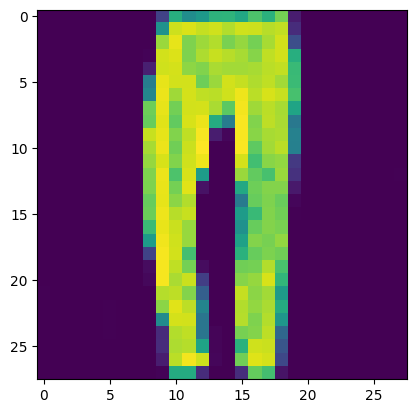

Dloss:  0.6265072
Gloss:  0.7714865
Dloss:  0.62651664
Gloss:  0.7714425
Dloss:  0.6265275
Gloss:  0.7715153
Dloss:  0.6265375
Gloss:  0.7714779
Dloss:  0.62654454
Gloss:  0.7715212
Dloss:  0.62655056
Gloss:  0.771499
Dloss:  0.6265558
Gloss:  0.77152675
Dloss:  0.62656003
Gloss:  0.7715133
Dloss:  0.626564
Gloss:  0.7715317
Dloss:  0.6265682
Gloss:  0.77152455
Dloss:  0.6265731
Gloss:  0.7715447
Dloss:  0.6265772
Gloss:  0.77154094
Dloss:  0.6265819
Gloss:  0.7715598
Dloss:  0.626587
Gloss:  0.7715487
Dloss:  0.62659186
Gloss:  0.7715683
Dloss:  0.62659585
Gloss:  0.77155745
Dloss:  0.6265997
Gloss:  0.77157354
Dloss:  0.62660354
Gloss:  0.7715696
Dloss:  0.62660617
Gloss:  0.77158004
Dloss:  0.62660915
Gloss:  0.77157974
Dloss:  0.6266124
Gloss:  0.7715875
Dloss:  0.62661344
Gloss:  0.77159226
Dloss:  0.62661856
Gloss:  0.7715999
Dloss:  0.62662
Gloss:  0.771601
Dloss:  0.626624
Gloss:  0.7716118
Dloss:  0.62662506
Gloss:  0.77160966
Dloss:  0.62662745
Gloss:  0.77162004
Dloss:  0.62

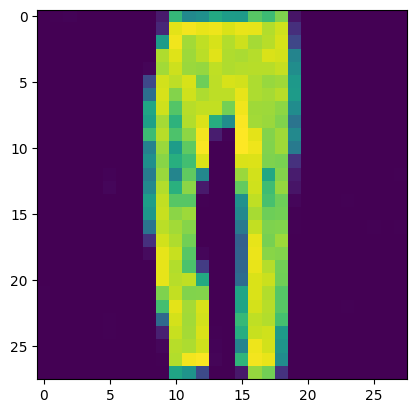

Dloss:  0.6266445
Gloss:  0.77164656
Dloss:  0.62665075
Gloss:  0.77161765
Dloss:  0.62665856
Gloss:  0.77166796
Dloss:  0.62666565
Gloss:  0.7716299
Dloss:  0.626673
Gloss:  0.77169144
Dloss:  0.6266839
Gloss:  0.7716509
Dloss:  0.6266925
Gloss:  0.7716984
Dloss:  0.626698
Gloss:  0.7716751
Dloss:  0.6267056
Gloss:  0.7717117
Dloss:  0.6267106
Gloss:  0.7716995
Dloss:  0.6267168
Gloss:  0.77172
Dloss:  0.6267198
Gloss:  0.77172047
Dloss:  0.62672246
Gloss:  0.7717343
Dloss:  0.6267268
Gloss:  0.77173746
Dloss:  0.6267293
Gloss:  0.77175367
42 / 100
Dloss:  0.6267329
Gloss:  0.77175194
42 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


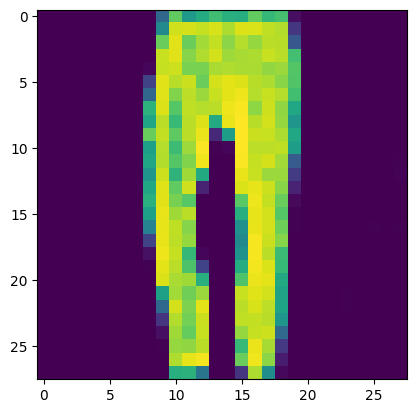

Dloss:  0.6267338
Gloss:  0.77176183
Dloss:  0.6267361
Gloss:  0.77176297
Dloss:  0.62673795
Gloss:  0.77177215
Dloss:  0.6267419
Gloss:  0.7717718
Dloss:  0.6267453
Gloss:  0.77177715
Dloss:  0.6267484
Gloss:  0.7717872
Dloss:  0.6267516
Gloss:  0.7717843
Dloss:  0.62675536
Gloss:  0.77180094
Dloss:  0.626759
Gloss:  0.77178615
Dloss:  0.62676245
Gloss:  0.77180725
Dloss:  0.6267662
Gloss:  0.7717987
Dloss:  0.6267695
Gloss:  0.7718228
Dloss:  0.62677616
Gloss:  0.77180517
Dloss:  0.62678117
Gloss:  0.7718355
Dloss:  0.62678623
Gloss:  0.771813
Dloss:  0.6267902
Gloss:  0.7718508
Dloss:  0.6267945
Gloss:  0.77183264
Dloss:  0.62679625
Gloss:  0.7718611
Dloss:  0.62680036
Gloss:  0.7718428
Dloss:  0.62680495
Gloss:  0.77187365
Dloss:  0.6268089
Gloss:  0.77185076
Dloss:  0.62681466
Gloss:  0.7718892
Dloss:  0.6268213
Gloss:  0.7718626
Dloss:  0.62682855
Gloss:  0.77189714
Dloss:  0.6268332
Gloss:  0.7718771
Dloss:  0.6268389
Gloss:  0.7719205
Dloss:  0.626845
Gloss:  0.77190036
Dloss: 

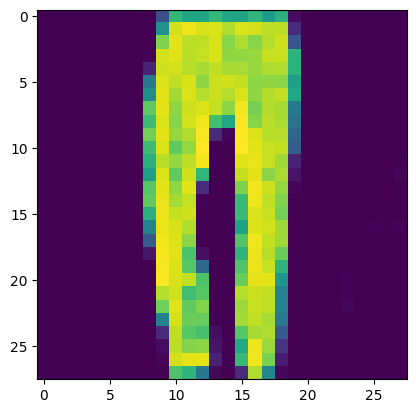

Dloss:  0.6268651
Gloss:  0.7719265
Dloss:  0.6268691
Gloss:  0.7719603
Dloss:  0.62687427
Gloss:  0.77193904
Dloss:  0.62688035
Gloss:  0.7719651
Dloss:  0.62688345
Gloss:  0.77194756
Dloss:  0.62688816
Gloss:  0.77197284
Dloss:  0.62689286
Gloss:  0.77195853
Dloss:  0.62689567
Gloss:  0.77199054
Dloss:  0.6269002
Gloss:  0.7719745
Dloss:  0.6269043
Gloss:  0.77199095
Dloss:  0.6269069
Gloss:  0.77198416
Dloss:  0.62690973
Gloss:  0.7720008
Dloss:  0.62691367
Gloss:  0.7719833
Dloss:  0.62691647
Gloss:  0.7720052
Dloss:  0.6269201
Gloss:  0.77198935
Dloss:  0.6269246
Gloss:  0.77201504
Dloss:  0.62692815
Gloss:  0.7720053
Dloss:  0.62693214
Gloss:  0.77202415
Dloss:  0.6269358
Gloss:  0.7720123
Dloss:  0.6269376
Gloss:  0.77203125
Dloss:  0.6269429
Gloss:  0.77202064
Dloss:  0.6269477
Gloss:  0.7720387
Dloss:  0.62695616
Gloss:  0.7720302
Dloss:  0.6269626
Gloss:  0.7720492
Dloss:  0.6269663
Gloss:  0.7720329
Dloss:  0.6269679
Gloss:  0.772064
Dloss:  0.6269709
Gloss:  0.7720443
Dloss

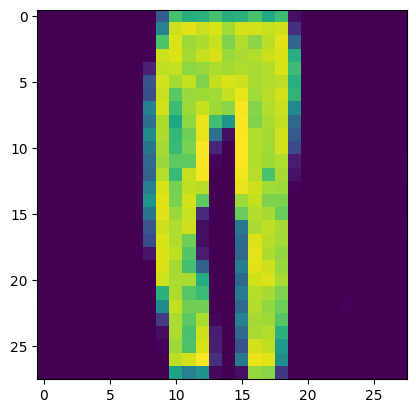

Dloss:  0.62698925
Gloss:  0.7720657
Dloss:  0.6269972
Gloss:  0.7721146
Dloss:  0.62700456
Gloss:  0.77207786
Dloss:  0.6270133
Gloss:  0.7721349
Dloss:  0.627021
Gloss:  0.77210236
Dloss:  0.62702745
Gloss:  0.77215236
Dloss:  0.6270331
Gloss:  0.7721249
Dloss:  0.62703913
Gloss:  0.77215314
Dloss:  0.6270447
Gloss:  0.7721376
Dloss:  0.6270507
Gloss:  0.7721623
Dloss:  0.62705547
Gloss:  0.7721496
Dloss:  0.6270587
Gloss:  0.77217066
Dloss:  0.6270603
Gloss:  0.7721575
Dloss:  0.6270634
Gloss:  0.7721767
Dloss:  0.6270667
Gloss:  0.7721611
Dloss:  0.62707
Gloss:  0.7721851
Dloss:  0.6270734
Gloss:  0.7721719
Dloss:  0.6270766
Gloss:  0.7721956
Dloss:  0.62707925
Gloss:  0.77218884
Dloss:  0.62708294
Gloss:  0.77220666
Dloss:  0.627087
Gloss:  0.7721916
Dloss:  0.6270932
Gloss:  0.77221334
Dloss:  0.62709725
Gloss:  0.77220243
Dloss:  0.62710094
Gloss:  0.772222
Dloss:  0.62710327
Gloss:  0.7722097
Dloss:  0.6271074
Gloss:  0.7722375
Dloss:  0.62711245
Gloss:  0.772216
Dloss:  0.6271

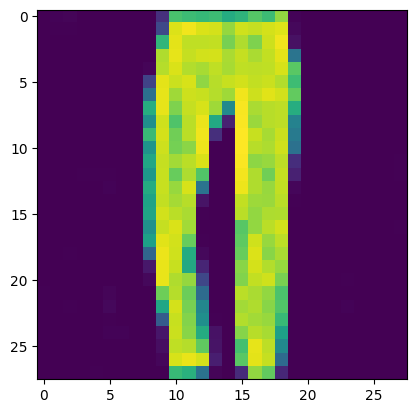

Dloss:  0.627128
Gloss:  0.772239
Dloss:  0.6271323
Gloss:  0.7722568
Dloss:  0.6271346
Gloss:  0.7722493
Dloss:  0.62713796
Gloss:  0.7722667
Dloss:  0.6271401
Gloss:  0.772263
Dloss:  0.6271421
Gloss:  0.7722802
Dloss:  0.62714654
Gloss:  0.7722662
Dloss:  0.6271504
Gloss:  0.772296
Dloss:  0.6271555
Gloss:  0.77227336
Dloss:  0.62716275
Gloss:  0.7723083
Dloss:  0.6271703
Gloss:  0.77228045
Dloss:  0.6271769
Gloss:  0.7723206
Dloss:  0.62718254
Gloss:  0.7722929
Dloss:  0.6271878
Gloss:  0.7723295
Dloss:  0.62719375
Gloss:  0.7723073
Dloss:  0.62719744
Gloss:  0.7723408
Dloss:  0.62720174
Gloss:  0.7723228
Dloss:  0.6272087
Gloss:  0.77236503
Dloss:  0.6272155
Gloss:  0.7723364
Dloss:  0.62722075
Gloss:  0.772381
Dloss:  0.62722754
Gloss:  0.7723501
Dloss:  0.6272324
Gloss:  0.77240175
Dloss:  0.62724096
Gloss:  0.77237743
Dloss:  0.6272455
Gloss:  0.77241606
Dloss:  0.6272525
Gloss:  0.77239925
Dloss:  0.6272563
Gloss:  0.7724255
Dloss:  0.627261
Gloss:  0.7724155
Dloss:  0.6272656

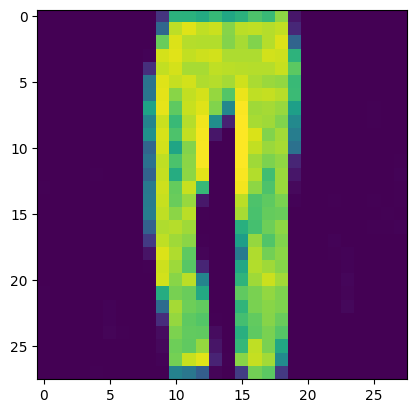

Dloss:  0.6272778
Gloss:  0.7724258
Dloss:  0.62728006
Gloss:  0.7724415
Dloss:  0.6272832
Gloss:  0.772432
Dloss:  0.627286
Gloss:  0.77245194
Dloss:  0.6272871
Gloss:  0.7724384
Dloss:  0.62728965
Gloss:  0.77246183
Dloss:  0.6272938
Gloss:  0.77244294
Dloss:  0.6272981
Gloss:  0.7724757
Dloss:  0.62730354
Gloss:  0.7724505
Dloss:  0.6273093
Gloss:  0.7724945
Dloss:  0.62731695
Gloss:  0.77246284
Dloss:  0.62732315
Gloss:  0.7725109
Dloss:  0.62732905
Gloss:  0.7724791
Dloss:  0.6273381
Gloss:  0.7725238
Dloss:  0.6273453
Gloss:  0.7724943
43 / 100
Dloss:  0.6273515
Gloss:  0.7725287
43 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


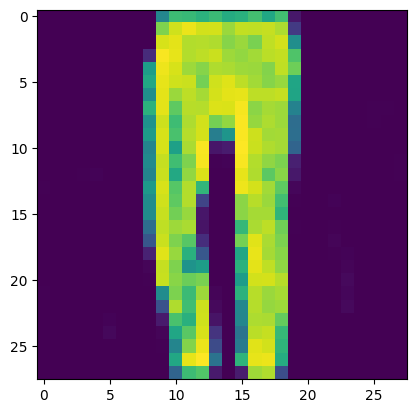

Dloss:  0.6273557
Gloss:  0.772511
Dloss:  0.6273601
Gloss:  0.7725327
Dloss:  0.62736255
Gloss:  0.7725203
Dloss:  0.6273668
Gloss:  0.7725418
Dloss:  0.62737125
Gloss:  0.7725392
Dloss:  0.6273742
Gloss:  0.7725527
Dloss:  0.62737757
Gloss:  0.7725488
Dloss:  0.62738115
Gloss:  0.772565
Dloss:  0.6273839
Gloss:  0.7725573
Dloss:  0.6273877
Gloss:  0.7725787
Dloss:  0.62738925
Gloss:  0.77257454
Dloss:  0.6273926
Gloss:  0.77259237
Dloss:  0.6273964
Gloss:  0.7725836
Dloss:  0.6274006
Gloss:  0.772598
Dloss:  0.6274061
Gloss:  0.7725889
Dloss:  0.62741256
Gloss:  0.772614
Dloss:  0.62741584
Gloss:  0.77260035
Dloss:  0.62741745
Gloss:  0.7726237
Dloss:  0.6274195
Gloss:  0.7726083
Dloss:  0.6274234
Gloss:  0.7726377
Dloss:  0.6274285
Gloss:  0.77262
Dloss:  0.6274336
Gloss:  0.7726497
Dloss:  0.62743884
Gloss:  0.77263385
Dloss:  0.6274433
Gloss:  0.7726582
Dloss:  0.62744427
Gloss:  0.7726522
Dloss:  0.62744737
Gloss:  0.77268475
Dloss:  0.6274523
Gloss:  0.7726762
Dloss:  0.627457
G

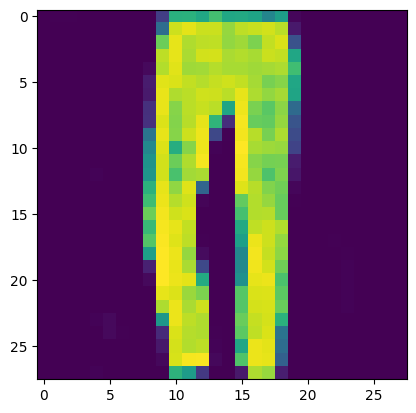

Dloss:  0.6274692
Gloss:  0.7726992
Dloss:  0.62747264
Gloss:  0.7727295
Dloss:  0.6274782
Gloss:  0.77271324
Dloss:  0.62748295
Gloss:  0.7727364
Dloss:  0.6274855
Gloss:  0.77272147
Dloss:  0.62748975
Gloss:  0.77276176
Dloss:  0.6274943
Gloss:  0.7727379
Dloss:  0.6274982
Gloss:  0.7727876
Dloss:  0.627502
Gloss:  0.77276146
Dloss:  0.62750846
Gloss:  0.77279764
Dloss:  0.62751395
Gloss:  0.77277863
Dloss:  0.62752044
Gloss:  0.7728202
Dloss:  0.62752557
Gloss:  0.7727905
Dloss:  0.6275312
Gloss:  0.77284366
Dloss:  0.6275359
Gloss:  0.7728077
Dloss:  0.62754256
Gloss:  0.7728557
Dloss:  0.627548
Gloss:  0.77282953
Dloss:  0.62755257
Gloss:  0.7728618
Dloss:  0.6275574
Gloss:  0.7728439
Dloss:  0.62756133
Gloss:  0.772874
Dloss:  0.62756586
Gloss:  0.77285826
Dloss:  0.62757075
Gloss:  0.7728823
Dloss:  0.62757635
Gloss:  0.7728689
Dloss:  0.62758124
Gloss:  0.772896
Dloss:  0.6275858
Gloss:  0.7728781
Dloss:  0.62758994
Gloss:  0.7729131
Dloss:  0.6275927
Gloss:  0.77289516
Dloss: 

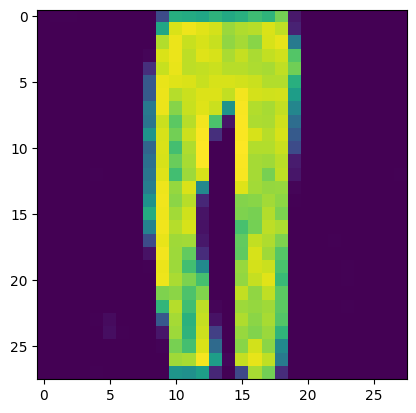

Dloss:  0.6276099
Gloss:  0.77292365
Dloss:  0.6276134
Gloss:  0.77293986
Dloss:  0.62761587
Gloss:  0.7729459
Dloss:  0.62761956
Gloss:  0.7729625
Dloss:  0.6276218
Gloss:  0.7729545
Dloss:  0.6276254
Gloss:  0.77297616
Dloss:  0.6276278
Gloss:  0.77296686
Dloss:  0.6276323
Gloss:  0.7729916
Dloss:  0.6276357
Gloss:  0.77297944
Dloss:  0.62763864
Gloss:  0.7730056
Dloss:  0.62764144
Gloss:  0.7729875
Dloss:  0.627646
Gloss:  0.77302265
Dloss:  0.62764853
Gloss:  0.77299845
Dloss:  0.62765265
Gloss:  0.7730332
Dloss:  0.62765867
Gloss:  0.77300745
Dloss:  0.62766397
Gloss:  0.7730436
Dloss:  0.6276688
Gloss:  0.7730209
Dloss:  0.6276732
Gloss:  0.77305543
Dloss:  0.62767464
Gloss:  0.77304524
Dloss:  0.62767684
Gloss:  0.773066
Dloss:  0.627681
Gloss:  0.7730554
Dloss:  0.62768567
Gloss:  0.7730691
Dloss:  0.6276881
Gloss:  0.7730659
Dloss:  0.6276916
Gloss:  0.7730752
Dloss:  0.62769264
Gloss:  0.77307606
Dloss:  0.6276938
Gloss:  0.77308726
Dloss:  0.627697
Gloss:  0.7730916
Dloss:  

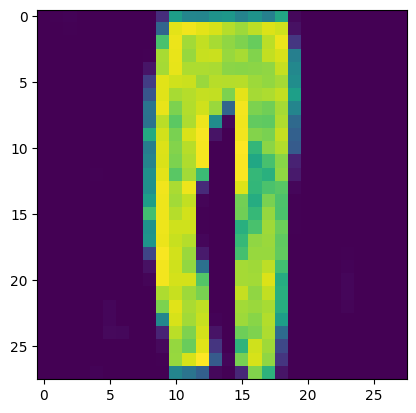

Dloss:  0.62770593
Gloss:  0.7731167
Dloss:  0.6277078
Gloss:  0.77310985
Dloss:  0.6277102
Gloss:  0.7731333
Dloss:  0.6277139
Gloss:  0.773117
Dloss:  0.62771755
Gloss:  0.7731507
Dloss:  0.62772197
Gloss:  0.7731226
Dloss:  0.62772804
Gloss:  0.77317
Dloss:  0.6277342
Gloss:  0.7731316
Dloss:  0.62774044
Gloss:  0.7731869
Dloss:  0.62774765
Gloss:  0.7731489
Dloss:  0.6277556
Gloss:  0.77321154
Dloss:  0.6277626
Gloss:  0.77318275
Dloss:  0.6277681
Gloss:  0.77321386
Dloss:  0.6277728
Gloss:  0.7731955
Dloss:  0.6277796
Gloss:  0.7732253
Dloss:  0.62778383
Gloss:  0.7732094
Dloss:  0.6277867
Gloss:  0.7732346
Dloss:  0.6277891
Gloss:  0.77322346
Dloss:  0.6277912
Gloss:  0.7732405
Dloss:  0.62779504
Gloss:  0.77323157
Dloss:  0.6277994
Gloss:  0.7732525
Dloss:  0.62780184
Gloss:  0.7732383
Dloss:  0.6278071
Gloss:  0.7732615
Dloss:  0.6278102
Gloss:  0.7732453
Dloss:  0.6278145
Gloss:  0.7732668
Dloss:  0.6278166
Gloss:  0.77324605
Dloss:  0.6278207
Gloss:  0.77328
Dloss:  0.6278268

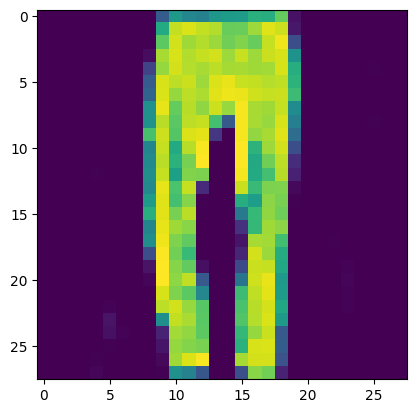

Dloss:  0.62783784
Gloss:  0.77328974
Dloss:  0.6278412
Gloss:  0.77327293
Dloss:  0.6278458
Gloss:  0.77330333
Dloss:  0.62785035
Gloss:  0.7732746
Dloss:  0.6278541
Gloss:  0.7733157
Dloss:  0.62786037
Gloss:  0.7732843
Dloss:  0.62786734
Gloss:  0.77332735
Dloss:  0.6278726
Gloss:  0.77330166
Dloss:  0.62787837
Gloss:  0.7733339
Dloss:  0.62788165
Gloss:  0.7733163
Dloss:  0.6278855
Gloss:  0.7733393
Dloss:  0.62789065
Gloss:  0.77333015
Dloss:  0.62789375
Gloss:  0.7733426
Dloss:  0.62789696
Gloss:  0.7733309
Dloss:  0.6279004
Gloss:  0.7733522
44 / 100
Dloss:  0.62790656
Gloss:  0.77334297
44 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


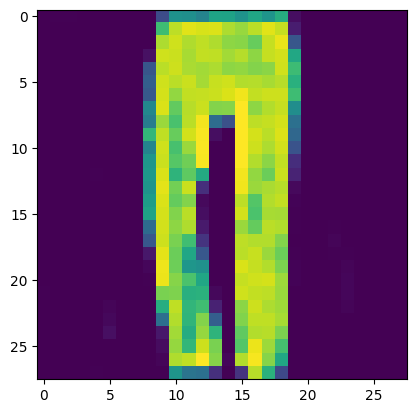

Dloss:  0.6279084
Gloss:  0.77335477
Dloss:  0.6279104
Gloss:  0.7733535
Dloss:  0.627913
Gloss:  0.7733636
Dloss:  0.62791574
Gloss:  0.7733646
Dloss:  0.62791854
Gloss:  0.773371
Dloss:  0.62791884
Gloss:  0.77337164
Dloss:  0.62792104
Gloss:  0.77337426
Dloss:  0.6279253
Gloss:  0.7733831
Dloss:  0.62792826
Gloss:  0.7733779
Dloss:  0.6279317
Gloss:  0.7733912
Dloss:  0.6279342
Gloss:  0.77338916
Dloss:  0.6279377
Gloss:  0.773402
Dloss:  0.62794036
Gloss:  0.773397
Dloss:  0.6279429
Gloss:  0.77341795
Dloss:  0.62794566
Gloss:  0.7734036
Dloss:  0.62794924
Gloss:  0.7734336
Dloss:  0.62795436
Gloss:  0.7734086
Dloss:  0.6279585
Gloss:  0.77344865
Dloss:  0.62796456
Gloss:  0.77342093
Dloss:  0.6279691
Gloss:  0.7734659
Dloss:  0.62797344
Gloss:  0.7734357
Dloss:  0.62797916
Gloss:  0.7734823
Dloss:  0.6279847
Gloss:  0.773455
Dloss:  0.6279899
Gloss:  0.77349675
Dloss:  0.6279937
Gloss:  0.7734729
Dloss:  0.62800056
Gloss:  0.7735202
Dloss:  0.62800854
Gloss:  0.77349895
Dloss:  0.

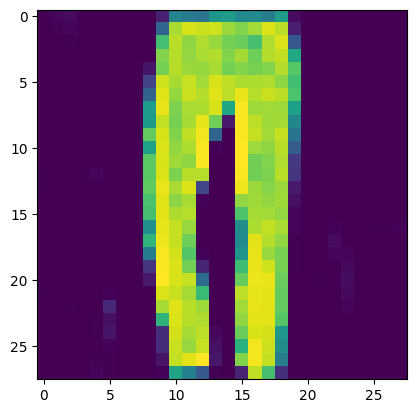

Dloss:  0.6280237
Gloss:  0.7735276
Dloss:  0.6280268
Gloss:  0.7735475
Dloss:  0.62802833
Gloss:  0.77353793
Dloss:  0.62803197
Gloss:  0.7735528
Dloss:  0.6280338
Gloss:  0.7735434
Dloss:  0.6280377
Gloss:  0.77357084
Dloss:  0.62804127
Gloss:  0.7735526
Dloss:  0.6280452
Gloss:  0.7735891
Dloss:  0.628049
Gloss:  0.77356523
Dloss:  0.6280539
Gloss:  0.77360237
Dloss:  0.62805694
Gloss:  0.773581
Dloss:  0.62805957
Gloss:  0.77361757
Dloss:  0.6280647
Gloss:  0.77359414
Dloss:  0.6280703
Gloss:  0.77363294
Dloss:  0.6280782
Gloss:  0.7736126
Dloss:  0.6280866
Gloss:  0.77364284
Dloss:  0.62809193
Gloss:  0.7736283
Dloss:  0.62809455
Gloss:  0.77364445
Dloss:  0.6280956
Gloss:  0.77364033
Dloss:  0.62809676
Gloss:  0.7736574
Dloss:  0.6280981
Gloss:  0.77365077
Dloss:  0.62810224
Gloss:  0.77366304
Dloss:  0.6281064
Gloss:  0.7736607
Dloss:  0.62810993
Gloss:  0.77367115
Dloss:  0.62811285
Gloss:  0.77366924
Dloss:  0.62811553
Gloss:  0.77368087
Dloss:  0.628117
Gloss:  0.7736752
Dlos

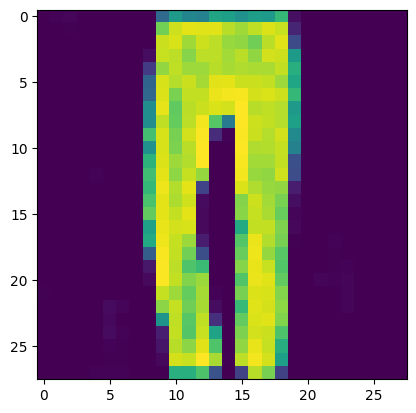

Dloss:  0.6281299
Gloss:  0.77369475
Dloss:  0.6281341
Gloss:  0.7737329
Dloss:  0.6281374
Gloss:  0.7737055
Dloss:  0.628143
Gloss:  0.7737652
Dloss:  0.6281494
Gloss:  0.7737248
Dloss:  0.6281587
Gloss:  0.77378976
Dloss:  0.6281674
Gloss:  0.77375853
Dloss:  0.6281755
Gloss:  0.773805
Dloss:  0.62818176
Gloss:  0.77378213
Dloss:  0.62818664
Gloss:  0.773808
Dloss:  0.62819225
Gloss:  0.77379334
Dloss:  0.6281971
Gloss:  0.7738147
Dloss:  0.6281997
Gloss:  0.773804
Dloss:  0.6282022
Gloss:  0.7738148
Dloss:  0.6282055
Gloss:  0.77381295
Dloss:  0.6282066
Gloss:  0.773818
Dloss:  0.62820756
Gloss:  0.7738264
Dloss:  0.62821096
Gloss:  0.7738356
Dloss:  0.62821454
Gloss:  0.77382845
Dloss:  0.62821794
Gloss:  0.77383417
Dloss:  0.628221
Gloss:  0.7738333
Dloss:  0.62822425
Gloss:  0.7738348
Dloss:  0.6282255
Gloss:  0.7738435
Dloss:  0.62822825
Gloss:  0.7738465
Dloss:  0.62823117
Gloss:  0.77384835
Dloss:  0.62823254
Gloss:  0.77385825
Dloss:  0.62823534
Gloss:  0.77386355
Dloss:  0.6

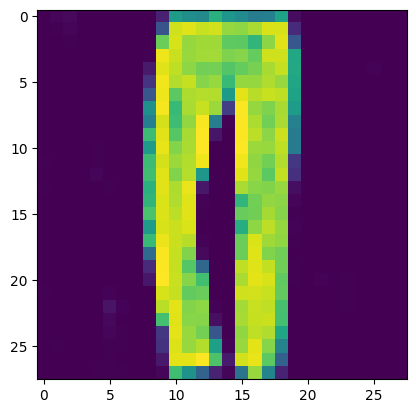

Dloss:  0.6282452
Gloss:  0.77388865
Dloss:  0.628249
Gloss:  0.7738883
Dloss:  0.6282517
Gloss:  0.7738992
Dloss:  0.6282546
Gloss:  0.7738956
Dloss:  0.62825626
Gloss:  0.77391666
Dloss:  0.6282576
Gloss:  0.77389914
Dloss:  0.6282619
Gloss:  0.7739434
Dloss:  0.6282673
Gloss:  0.7739028
Dloss:  0.628274
Gloss:  0.7739674
Dloss:  0.6282829
Gloss:  0.7739241
Dloss:  0.6282917
Gloss:  0.773975
Dloss:  0.6282977
Gloss:  0.77395004
Dloss:  0.6283037
Gloss:  0.77397186
Dloss:  0.6283094
Gloss:  0.7739673
Dloss:  0.62831336
Gloss:  0.7739823
Dloss:  0.6283154
Gloss:  0.77397746
Dloss:  0.62831634
Gloss:  0.77398866
Dloss:  0.62831765
Gloss:  0.7739924
Dloss:  0.6283183
Gloss:  0.77400464
Dloss:  0.6283199
Gloss:  0.774007
Dloss:  0.6283237
Gloss:  0.77401525
Dloss:  0.6283251
Gloss:  0.774019
Dloss:  0.6283292
Gloss:  0.7740231
Dloss:  0.62833154
Gloss:  0.77402645
Dloss:  0.6283342
Gloss:  0.7740423
Dloss:  0.62833494
Gloss:  0.7740363
Dloss:  0.62833834
Gloss:  0.7740587
Dloss:  0.628342

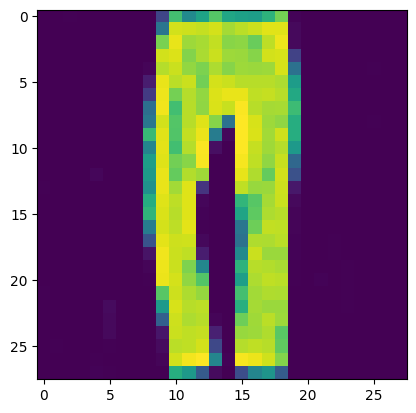

Dloss:  0.6283535
Gloss:  0.7740972
Dloss:  0.6283588
Gloss:  0.77406836
Dloss:  0.6283644
Gloss:  0.77411693
Dloss:  0.62837017
Gloss:  0.77408874
Dloss:  0.628374
Gloss:  0.7741327
Dloss:  0.6283807
Gloss:  0.7741077
Dloss:  0.6283875
Gloss:  0.77415246
Dloss:  0.62839353
Gloss:  0.7741229
Dloss:  0.6284001
Gloss:  0.7741688
Dloss:  0.628404
Gloss:  0.7741444
Dloss:  0.62840647
Gloss:  0.7741773
Dloss:  0.6284089
Gloss:  0.7741672
Dloss:  0.6284138
Gloss:  0.77418387
Dloss:  0.6284189
Gloss:  0.77417696
Dloss:  0.62842333
Gloss:  0.7741982
45 / 100
Dloss:  0.62842757
Gloss:  0.7741928
45 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


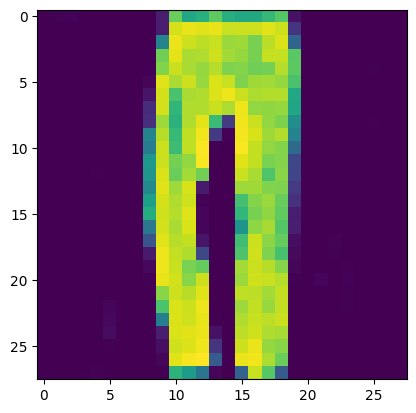

Dloss:  0.6284285
Gloss:  0.7742157
Dloss:  0.6284301
Gloss:  0.7742029
Dloss:  0.6284335
Gloss:  0.7742304
Dloss:  0.6284369
Gloss:  0.77421814
Dloss:  0.6284413
Gloss:  0.77424085
Dloss:  0.62844497
Gloss:  0.77422875
Dloss:  0.6284476
Gloss:  0.7742477
Dloss:  0.6284506
Gloss:  0.7742403
Dloss:  0.6284542
Gloss:  0.774259
Dloss:  0.628459
Gloss:  0.77424854
Dloss:  0.6284608
Gloss:  0.77427477
Dloss:  0.62846434
Gloss:  0.77426064
Dloss:  0.6284691
Gloss:  0.774291
Dloss:  0.6284733
Gloss:  0.7742747
Dloss:  0.6284775
Gloss:  0.7743083
Dloss:  0.62848127
Gloss:  0.77428335
Dloss:  0.6284863
Gloss:  0.77432686
Dloss:  0.6284917
Gloss:  0.7742936
Dloss:  0.6284983
Gloss:  0.7743504
Dloss:  0.6285056
Gloss:  0.7743152
Dloss:  0.62851155
Gloss:  0.7743729
Dloss:  0.6285177
Gloss:  0.77434266
Dloss:  0.6285251
Gloss:  0.7743853
Dloss:  0.6285334
Gloss:  0.77436286
Dloss:  0.628538
Gloss:  0.7743913
Dloss:  0.6285407
Gloss:  0.77438825
Dloss:  0.6285457
Gloss:  0.77441144
Dloss:  0.628547

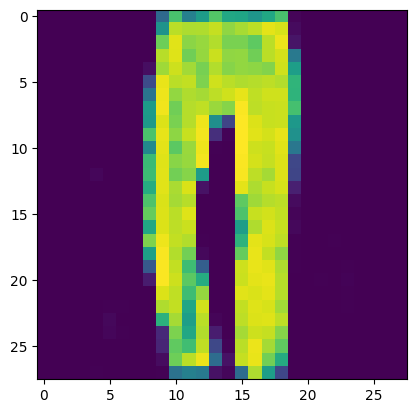

Dloss:  0.62855655
Gloss:  0.7744406
Dloss:  0.6285601
Gloss:  0.77443355
Dloss:  0.6285626
Gloss:  0.7744593
Dloss:  0.62856644
Gloss:  0.7744453
Dloss:  0.6285701
Gloss:  0.7744749
Dloss:  0.6285748
Gloss:  0.7744623
Dloss:  0.62857825
Gloss:  0.7744821
Dloss:  0.6285808
Gloss:  0.7744766
Dloss:  0.6285846
Gloss:  0.7745026
Dloss:  0.6285869
Gloss:  0.77449125
Dloss:  0.62858963
Gloss:  0.7745191
Dloss:  0.62859285
Gloss:  0.7745091
Dloss:  0.6285974
Gloss:  0.77452874
Dloss:  0.62860006
Gloss:  0.77451277
Dloss:  0.6286029
Gloss:  0.77453786
Dloss:  0.6286048
Gloss:  0.7745203
Dloss:  0.62860745
Gloss:  0.77454317
Dloss:  0.6286109
Gloss:  0.77452546
Dloss:  0.62861395
Gloss:  0.77455103
Dloss:  0.62861884
Gloss:  0.77454376
Dloss:  0.62862206
Gloss:  0.7745546
Dloss:  0.6286251
Gloss:  0.77455115
Dloss:  0.62862915
Gloss:  0.77456903
Dloss:  0.6286325
Gloss:  0.7745565
Dloss:  0.62863535
Gloss:  0.77457756
Dloss:  0.6286376
Gloss:  0.7745694
Dloss:  0.6286405
Gloss:  0.77458453
Dlo

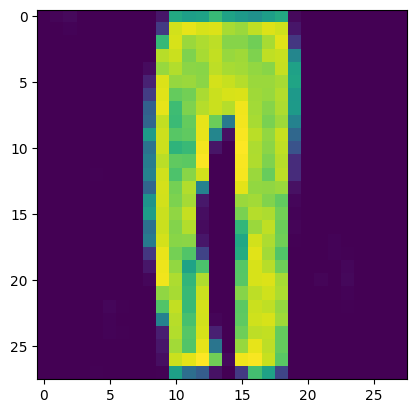

Dloss:  0.6286519
Gloss:  0.7746058
Dloss:  0.62865466
Gloss:  0.7745919
Dloss:  0.6286568
Gloss:  0.774622
Dloss:  0.6286603
Gloss:  0.774593
Dloss:  0.6286653
Gloss:  0.7746544
Dloss:  0.62867415
Gloss:  0.77460474
Dloss:  0.6286848
Gloss:  0.7746902
Dloss:  0.6286989
Gloss:  0.77464473
Dloss:  0.62871116
Gloss:  0.77469444
Dloss:  0.6287184
Gloss:  0.77467364
Dloss:  0.6287239
Gloss:  0.77469426
Dloss:  0.62872726
Gloss:  0.77468634
Dloss:  0.6287296
Gloss:  0.77470505
Dloss:  0.62873304
Gloss:  0.7747025
Dloss:  0.62873656
Gloss:  0.7747103
Dloss:  0.62873805
Gloss:  0.7747071
Dloss:  0.6287405
Gloss:  0.77471536
Dloss:  0.62874335
Gloss:  0.7747133
Dloss:  0.6287445
Gloss:  0.77472305
Dloss:  0.6287469
Gloss:  0.774724
Dloss:  0.62874943
Gloss:  0.774725
Dloss:  0.6287519
Gloss:  0.7747256
Dloss:  0.62875414
Gloss:  0.77473366
Dloss:  0.6287564
Gloss:  0.774728
Dloss:  0.6287596
Gloss:  0.77473664
Dloss:  0.62876165
Gloss:  0.7747396
Dloss:  0.6287627
Gloss:  0.7747466
Dloss:  0.6

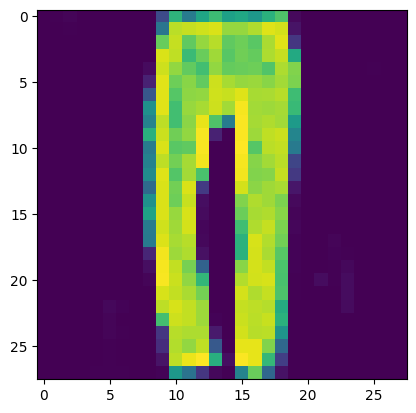

Dloss:  0.62876964
Gloss:  0.7747625
Dloss:  0.62877244
Gloss:  0.7747639
Dloss:  0.62877494
Gloss:  0.7747719
Dloss:  0.6287779
Gloss:  0.7747683
Dloss:  0.6287799
Gloss:  0.77478504
Dloss:  0.6287808
Gloss:  0.77477604
Dloss:  0.6287826
Gloss:  0.7747943
Dloss:  0.6287852
Gloss:  0.77478224
Dloss:  0.62878704
Gloss:  0.7748036
Dloss:  0.6287912
Gloss:  0.77478325
Dloss:  0.6287954
Gloss:  0.77481157
Dloss:  0.6287991
Gloss:  0.7747909
Dloss:  0.62880254
Gloss:  0.7748223
Dloss:  0.6288085
Gloss:  0.7747994
Dloss:  0.62881714
Gloss:  0.77484
Dloss:  0.6288241
Gloss:  0.7748112
Dloss:  0.6288285
Gloss:  0.7748562
Dloss:  0.62883294
Gloss:  0.7748298
Dloss:  0.628839
Gloss:  0.7748734
Dloss:  0.6288439
Gloss:  0.77484876
Dloss:  0.628849
Gloss:  0.7748807
Dloss:  0.6288511
Gloss:  0.7748664
Dloss:  0.6288568
Gloss:  0.7748943
Dloss:  0.6288595
Gloss:  0.7748747
Dloss:  0.6288623
Gloss:  0.7749007
Dloss:  0.6288631
Gloss:  0.77488685
Dloss:  0.6288651
Gloss:  0.7749069
Dloss:  0.6288692


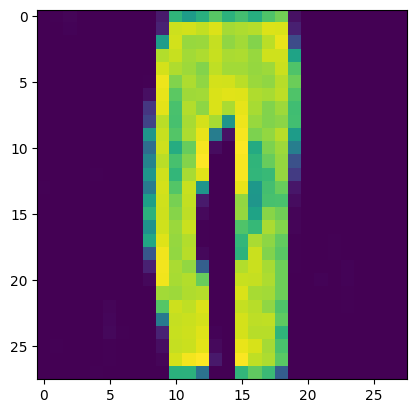

Dloss:  0.62888163
Gloss:  0.7749206
Dloss:  0.62888515
Gloss:  0.77490854
Dloss:  0.6288889
Gloss:  0.7749272
Dloss:  0.6288919
Gloss:  0.7749186
Dloss:  0.62889236
Gloss:  0.7749326
Dloss:  0.628894
Gloss:  0.77492505
Dloss:  0.62889665
Gloss:  0.7749383
Dloss:  0.62889856
Gloss:  0.7749297
Dloss:  0.6289021
Gloss:  0.7749497
Dloss:  0.6289056
Gloss:  0.77494025
Dloss:  0.62890816
Gloss:  0.7749626
Dloss:  0.62891144
Gloss:  0.7749491
Dloss:  0.62891597
Gloss:  0.77497494
Dloss:  0.62891877
Gloss:  0.7749569
Dloss:  0.628923
Gloss:  0.7749984
46 / 100
Dloss:  0.62892824
Gloss:  0.7749733
46 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


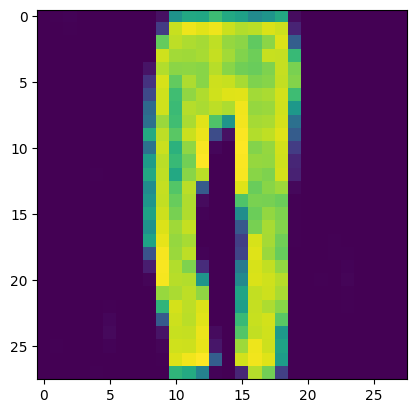

Dloss:  0.62893254
Gloss:  0.7750119
Dloss:  0.62893784
Gloss:  0.77498895
Dloss:  0.6289419
Gloss:  0.7750207
Dloss:  0.6289466
Gloss:  0.7749944
Dloss:  0.6289515
Gloss:  0.7750286
Dloss:  0.62895423
Gloss:  0.7750072
Dloss:  0.62895685
Gloss:  0.7750365
Dloss:  0.62896043
Gloss:  0.77502334
Dloss:  0.6289644
Gloss:  0.775047
Dloss:  0.628969
Gloss:  0.7750325
Dloss:  0.62897134
Gloss:  0.7750551
Dloss:  0.6289749
Gloss:  0.7750381
Dloss:  0.6289785
Gloss:  0.77505696
Dloss:  0.6289816
Gloss:  0.7750533
Dloss:  0.62898535
Gloss:  0.77507156
Dloss:  0.62898874
Gloss:  0.7750619
Dloss:  0.6289906
Gloss:  0.7750789
Dloss:  0.62899053
Gloss:  0.77506894
Dloss:  0.628993
Gloss:  0.77508986
Dloss:  0.62899566
Gloss:  0.77507347
Dloss:  0.62899905
Gloss:  0.7751083
Dloss:  0.6290049
Gloss:  0.77508444
Dloss:  0.6290111
Gloss:  0.7751272
Dloss:  0.6290187
Gloss:  0.77509207
Dloss:  0.62902457
Gloss:  0.7751555
Dloss:  0.62903106
Gloss:  0.77511454
Dloss:  0.6290413
Gloss:  0.7751747
Dloss:  

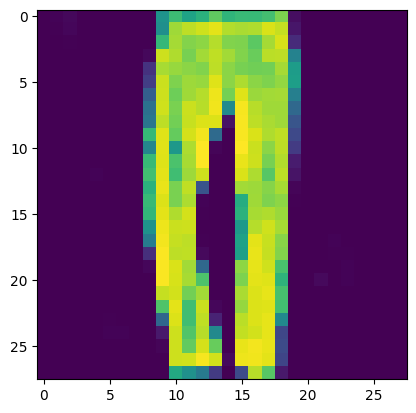

Dloss:  0.6290633
Gloss:  0.77517945
Dloss:  0.62906516
Gloss:  0.77517027
Dloss:  0.6290666
Gloss:  0.7751869
Dloss:  0.62907016
Gloss:  0.775181
Dloss:  0.6290725
Gloss:  0.77519584
Dloss:  0.62907606
Gloss:  0.7751898
Dloss:  0.6290788
Gloss:  0.7752027
Dloss:  0.62907994
Gloss:  0.7752054
Dloss:  0.6290802
Gloss:  0.7752117
Dloss:  0.6290815
Gloss:  0.7752121
Dloss:  0.62908274
Gloss:  0.77522546
Dloss:  0.6290852
Gloss:  0.775225
Dloss:  0.62908804
Gloss:  0.77523
Dloss:  0.6290897
Gloss:  0.775239
Dloss:  0.6290916
Gloss:  0.77523977
Dloss:  0.6290931
Gloss:  0.7752478
Dloss:  0.6290948
Gloss:  0.77525294
Dloss:  0.6290973
Gloss:  0.7752644
Dloss:  0.6291005
Gloss:  0.77525973
Dloss:  0.62910354
Gloss:  0.7752759
Dloss:  0.6291063
Gloss:  0.7752645
Dloss:  0.62910914
Gloss:  0.7752929
Dloss:  0.6291138
Gloss:  0.7752737
Dloss:  0.62911683
Gloss:  0.7753103
Dloss:  0.6291205
Gloss:  0.7752829
Dloss:  0.6291238
Gloss:  0.77532375
Dloss:  0.62912977
Gloss:  0.7753005
Dloss:  0.62913

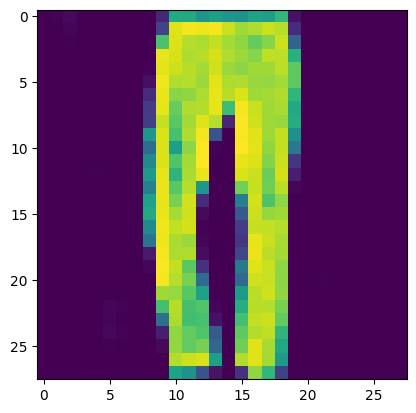

Dloss:  0.6291473
Gloss:  0.7753301
Dloss:  0.6291526
Gloss:  0.77536565
Dloss:  0.62915653
Gloss:  0.7753505
Dloss:  0.62916046
Gloss:  0.7753841
Dloss:  0.6291629
Gloss:  0.77536947
Dloss:  0.6291667
Gloss:  0.775405
Dloss:  0.6291692
Gloss:  0.775389
Dloss:  0.62917125
Gloss:  0.77542555
Dloss:  0.62917566
Gloss:  0.7754074
Dloss:  0.6291814
Gloss:  0.7754353
Dloss:  0.62918615
Gloss:  0.77541786
Dloss:  0.6291923
Gloss:  0.775447
Dloss:  0.6291955
Gloss:  0.77543736
Dloss:  0.62919706
Gloss:  0.77545846
Dloss:  0.629199
Gloss:  0.775444
Dloss:  0.62920105
Gloss:  0.7754776
Dloss:  0.6292031
Gloss:  0.77546185
Dloss:  0.62920696
Gloss:  0.77548754
Dloss:  0.6292076
Gloss:  0.7754787
Dloss:  0.62921
Gloss:  0.7754959
Dloss:  0.62921214
Gloss:  0.775492
Dloss:  0.62921494
Gloss:  0.7755038
Dloss:  0.6292171
Gloss:  0.77550787
Dloss:  0.62922084
Gloss:  0.77552223
Dloss:  0.62922215
Gloss:  0.77551246
Dloss:  0.6292261
Gloss:  0.7755428
Dloss:  0.62922925
Gloss:  0.7755265
Dloss:  0.62

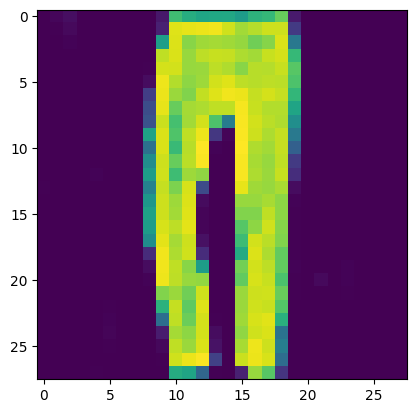

Dloss:  0.62923795
Gloss:  0.7755492
Dloss:  0.62924254
Gloss:  0.7755978
Dloss:  0.6292497
Gloss:  0.77556336
Dloss:  0.62925607
Gloss:  0.7756094
Dloss:  0.62926203
Gloss:  0.77558184
Dloss:  0.629267
Gloss:  0.7756221
Dloss:  0.6292715
Gloss:  0.7756003
Dloss:  0.62927294
Gloss:  0.7756213
Dloss:  0.6292752
Gloss:  0.77561826
Dloss:  0.62927955
Gloss:  0.7756333
Dloss:  0.6292827
Gloss:  0.7756306
Dloss:  0.62928444
Gloss:  0.7756384
Dloss:  0.6292865
Gloss:  0.77563584
Dloss:  0.62928814
Gloss:  0.7756491
Dloss:  0.6292912
Gloss:  0.7756468
Dloss:  0.6292934
Gloss:  0.77566135
Dloss:  0.62929374
Gloss:  0.77565914
Dloss:  0.6292951
Gloss:  0.775677
Dloss:  0.62929654
Gloss:  0.7756708
Dloss:  0.6292971
Gloss:  0.7756811
Dloss:  0.6292986
Gloss:  0.775675
Dloss:  0.62930006
Gloss:  0.77569604
Dloss:  0.62930477
Gloss:  0.7756805
Dloss:  0.62930655
Gloss:  0.7757085
Dloss:  0.6293102
Gloss:  0.7756908
Dloss:  0.6293124
Gloss:  0.7757227
Dloss:  0.62931687
Gloss:  0.7756993
Dloss:  0.

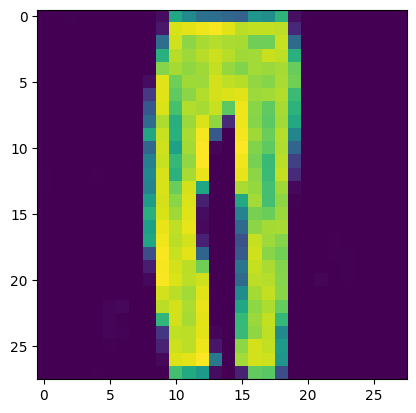

Dloss:  0.6293322
Gloss:  0.77571964
Dloss:  0.629338
Gloss:  0.77576756
Dloss:  0.62934375
Gloss:  0.77574146
Dloss:  0.6293506
Gloss:  0.7757774
Dloss:  0.6293549
Gloss:  0.77576095
Dloss:  0.629359
Gloss:  0.77579063
Dloss:  0.62936264
Gloss:  0.7757727
Dloss:  0.629365
Gloss:  0.7758083
Dloss:  0.62936735
Gloss:  0.77579105
Dloss:  0.629369
Gloss:  0.7758247
Dloss:  0.6293726
Gloss:  0.7758087
Dloss:  0.6293772
Gloss:  0.7758347
Dloss:  0.6293821
Gloss:  0.7758192
Dloss:  0.62938505
Gloss:  0.77584165
Dloss:  0.6293869
Gloss:  0.77583563
47 / 100
Dloss:  0.62938756
Gloss:  0.77585083
47 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


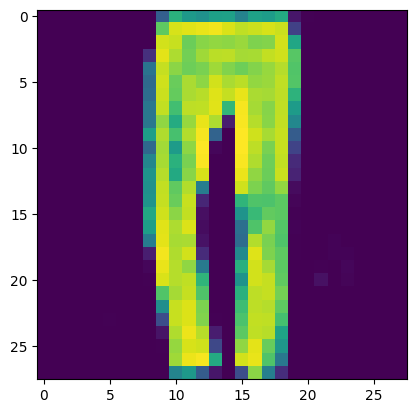

Dloss:  0.62938756
Gloss:  0.7758452
Dloss:  0.6293907
Gloss:  0.77586234
Dloss:  0.62939376
Gloss:  0.77585554
Dloss:  0.62939674
Gloss:  0.77587426
Dloss:  0.6293998
Gloss:  0.77586585
Dloss:  0.62940085
Gloss:  0.7758855
Dloss:  0.62940335
Gloss:  0.77586937
Dloss:  0.62940603
Gloss:  0.77589625
Dloss:  0.62941
Gloss:  0.7758786
Dloss:  0.6294147
Gloss:  0.7759104
Dloss:  0.62941664
Gloss:  0.77588797
Dloss:  0.6294197
Gloss:  0.77593184
Dloss:  0.6294243
Gloss:  0.7759123
Dloss:  0.62943083
Gloss:  0.7759434
Dloss:  0.6294344
Gloss:  0.7759239
Dloss:  0.62943906
Gloss:  0.7759536
Dloss:  0.62944376
Gloss:  0.77593833
Dloss:  0.62944514
Gloss:  0.77596474
Dloss:  0.6294456
Gloss:  0.7759559
Dloss:  0.6294463
Gloss:  0.7759796
Dloss:  0.6294467
Gloss:  0.7759686
Dloss:  0.62945014
Gloss:  0.77599627
Dloss:  0.62945443
Gloss:  0.7759869
Dloss:  0.62945855
Gloss:  0.7759992
Dloss:  0.6294577
Gloss:  0.7759965
Dloss:  0.62945867
Gloss:  0.7760166
Dloss:  0.6294597
Gloss:  0.77601516
Dlo

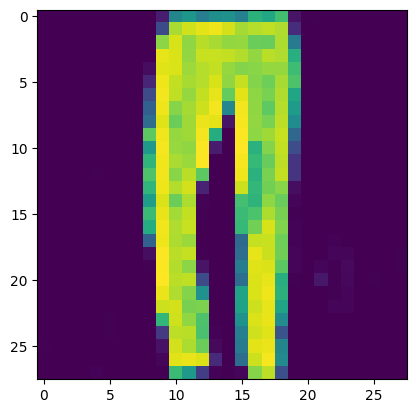

Dloss:  0.62946856
Gloss:  0.7760426
Dloss:  0.62947005
Gloss:  0.7760453
Dloss:  0.6294739
Gloss:  0.77605504
Dloss:  0.6294774
Gloss:  0.7760518
Dloss:  0.6294795
Gloss:  0.7760617
Dloss:  0.62948126
Gloss:  0.7760558
Dloss:  0.6294833
Gloss:  0.7760716
Dloss:  0.6294838
Gloss:  0.77606225
Dloss:  0.6294853
Gloss:  0.7760889
Dloss:  0.6294875
Gloss:  0.7760768
Dloss:  0.6294891
Gloss:  0.776118
Dloss:  0.6294913
Gloss:  0.7760907
Dloss:  0.6294979
Gloss:  0.7761392
Dloss:  0.6295057
Gloss:  0.7761061
Dloss:  0.6295136
Gloss:  0.7761591
Dloss:  0.6295217
Gloss:  0.7761257
Dloss:  0.6295286
Gloss:  0.7761697
Dloss:  0.6295338
Gloss:  0.7761424
Dloss:  0.6295401
Gloss:  0.77618396
Dloss:  0.629544
Gloss:  0.77615845
Dloss:  0.62954736
Gloss:  0.7761906
Dloss:  0.62954956
Gloss:  0.77617383
Dloss:  0.6295532
Gloss:  0.7762018
Dloss:  0.62955534
Gloss:  0.77619016
Dloss:  0.6295581
Gloss:  0.7762067
Dloss:  0.62955916
Gloss:  0.77620023
Dloss:  0.6295618
Gloss:  0.77621216
Dloss:  0.62956

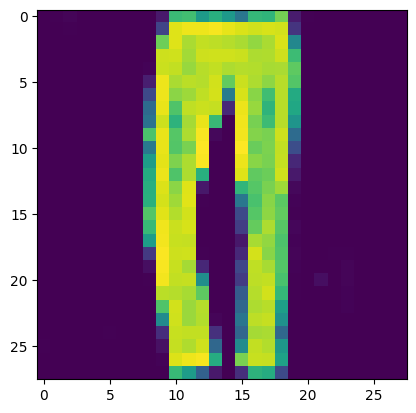

Dloss:  0.6295703
Gloss:  0.7762356
Dloss:  0.62957084
Gloss:  0.7762205
Dloss:  0.62957263
Gloss:  0.77625036
Dloss:  0.6295744
Gloss:  0.7762328
Dloss:  0.62957555
Gloss:  0.7762589
Dloss:  0.6295779
Gloss:  0.7762413
Dloss:  0.62958014
Gloss:  0.77627426
Dloss:  0.62958366
Gloss:  0.7762617
Dloss:  0.6295881
Gloss:  0.77628833
Dloss:  0.6295916
Gloss:  0.77627057
Dloss:  0.6295949
Gloss:  0.7762981
Dloss:  0.629598
Gloss:  0.7762809
Dloss:  0.6295992
Gloss:  0.7763104
Dloss:  0.62960154
Gloss:  0.77629584
Dloss:  0.62960494
Gloss:  0.7763159
Dloss:  0.62960845
Gloss:  0.7763033
Dloss:  0.62960976
Gloss:  0.77632815
Dloss:  0.62961274
Gloss:  0.77631426
Dloss:  0.6296164
Gloss:  0.77634305
Dloss:  0.6296204
Gloss:  0.7763229
Dloss:  0.6296238
Gloss:  0.7763576
Dloss:  0.629629
Gloss:  0.77632976
Dloss:  0.6296342
Gloss:  0.7763717
Dloss:  0.62963957
Gloss:  0.77634305
Dloss:  0.6296448
Gloss:  0.77639073
Dloss:  0.6296515
Gloss:  0.7763649
Dloss:  0.6296579
Gloss:  0.7763994
Dloss:  

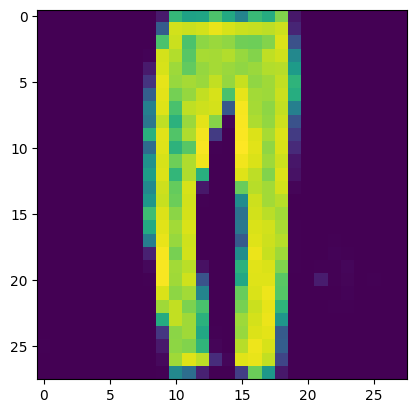

Dloss:  0.62967396
Gloss:  0.7764118
Dloss:  0.6296771
Gloss:  0.7763993
Dloss:  0.6296782
Gloss:  0.77641016
Dloss:  0.6296798
Gloss:  0.7764062
Dloss:  0.6296808
Gloss:  0.77641976
Dloss:  0.6296815
Gloss:  0.77641493
Dloss:  0.62968284
Gloss:  0.7764289
Dloss:  0.62968415
Gloss:  0.7764223
Dloss:  0.6296844
Gloss:  0.7764342
Dloss:  0.62968695
Gloss:  0.7764247
Dloss:  0.6296888
Gloss:  0.77644736
Dloss:  0.6296912
Gloss:  0.7764342
Dloss:  0.6296948
Gloss:  0.77646375
Dloss:  0.6296977
Gloss:  0.7764389
Dloss:  0.62970275
Gloss:  0.77647793
Dloss:  0.62970746
Gloss:  0.77645624
Dloss:  0.6297096
Gloss:  0.7764886
Dloss:  0.6297121
Gloss:  0.77647036
Dloss:  0.62971693
Gloss:  0.77650297
Dloss:  0.6297208
Gloss:  0.77647895
Dloss:  0.6297267
Gloss:  0.77651227
Dloss:  0.6297304
Gloss:  0.77649426
Dloss:  0.6297349
Gloss:  0.776521
Dloss:  0.62973773
Gloss:  0.7765047
Dloss:  0.6297411
Gloss:  0.7765284
Dloss:  0.6297431
Gloss:  0.77651685
Dloss:  0.62974524
Gloss:  0.7765269
Dloss: 

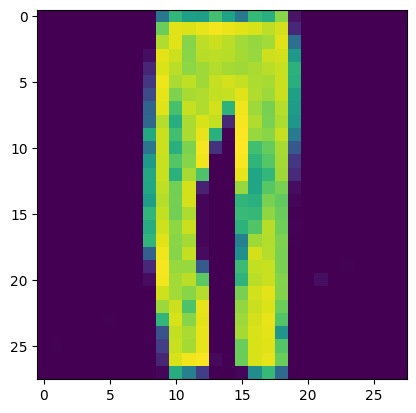

Dloss:  0.6297535
Gloss:  0.776543
Dloss:  0.62975585
Gloss:  0.7765417
Dloss:  0.62975734
Gloss:  0.7765523
Dloss:  0.629758
Gloss:  0.7765522
Dloss:  0.62975854
Gloss:  0.77656096
Dloss:  0.6297601
Gloss:  0.77655804
Dloss:  0.6297617
Gloss:  0.77656615
Dloss:  0.62976474
Gloss:  0.776568
Dloss:  0.62976825
Gloss:  0.77658
Dloss:  0.62976867
Gloss:  0.7765761
Dloss:  0.62976927
Gloss:  0.7765977
Dloss:  0.62977004
Gloss:  0.7765869
Dloss:  0.62977237
Gloss:  0.77661616
Dloss:  0.6297755
Gloss:  0.7765898
Dloss:  0.62978005
Gloss:  0.77663976
48 / 100
Dloss:  0.62978536
Gloss:  0.7766045
48 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


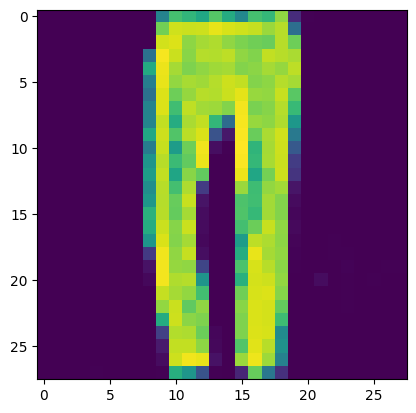

Dloss:  0.6297915
Gloss:  0.77666646
Dloss:  0.6297992
Gloss:  0.7766295
Dloss:  0.6298059
Gloss:  0.77667737
Dloss:  0.6298123
Gloss:  0.7766519
Dloss:  0.62981623
Gloss:  0.7766779
Dloss:  0.6298173
Gloss:  0.7766715
Dloss:  0.62981915
Gloss:  0.7766891
Dloss:  0.6298208
Gloss:  0.77668613
Dloss:  0.62982416
Gloss:  0.77669746
Dloss:  0.6298275
Gloss:  0.7766922
Dloss:  0.6298269
Gloss:  0.776706
Dloss:  0.62982947
Gloss:  0.7767093
Dloss:  0.6298305
Gloss:  0.77671456
Dloss:  0.62983173
Gloss:  0.77672386
Dloss:  0.62983274
Gloss:  0.77672917
Dloss:  0.62983274
Gloss:  0.7767347
Dloss:  0.62983364
Gloss:  0.77674365
Dloss:  0.62983394
Gloss:  0.7767486
Dloss:  0.6298362
Gloss:  0.77675605
Dloss:  0.62983775
Gloss:  0.77677155
Dloss:  0.62983876
Gloss:  0.7767784
Dloss:  0.6298406
Gloss:  0.77678293
Dloss:  0.62984186
Gloss:  0.77679485
Dloss:  0.62984127
Gloss:  0.7767934
Dloss:  0.62983936
Gloss:  0.77681774
Dloss:  0.6298398
Gloss:  0.7768158
Dloss:  0.6298419
Gloss:  0.77683455
D

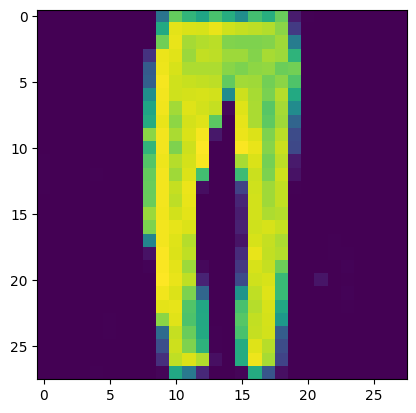

Dloss:  0.6298509
Gloss:  0.7768714
Dloss:  0.6298516
Gloss:  0.77686334
Dloss:  0.629853
Gloss:  0.77688885
Dloss:  0.6298558
Gloss:  0.7768661
Dloss:  0.6298597
Gloss:  0.7769137
Dloss:  0.62986535
Gloss:  0.7768786
Dloss:  0.6298711
Gloss:  0.77694017
Dloss:  0.6298777
Gloss:  0.7769111
Dloss:  0.62988466
Gloss:  0.7769588
Dloss:  0.6298903
Gloss:  0.77693313
Dloss:  0.6298939
Gloss:  0.7769761
Dloss:  0.6298976
Gloss:  0.77695334
Dloss:  0.62990224
Gloss:  0.77699196
Dloss:  0.62990636
Gloss:  0.7769739
Dloss:  0.62990963
Gloss:  0.777008
Dloss:  0.6299138
Gloss:  0.7769905
Dloss:  0.62991774
Gloss:  0.7770193
Dloss:  0.6299203
Gloss:  0.7770011
Dloss:  0.6299233
Gloss:  0.7770305
Dloss:  0.62992525
Gloss:  0.7770138
Dloss:  0.6299276
Gloss:  0.7770409
Dloss:  0.62992895
Gloss:  0.77702737
Dloss:  0.62993217
Gloss:  0.7770476
Dloss:  0.62993413
Gloss:  0.77704626
Dloss:  0.6299369
Gloss:  0.7770563
Dloss:  0.62993735
Gloss:  0.77705306
Dloss:  0.6299382
Gloss:  0.77706504
Dloss:  0

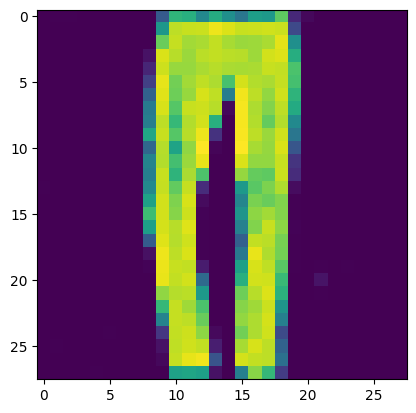

Dloss:  0.6299456
Gloss:  0.77708936
Dloss:  0.62994856
Gloss:  0.7770836
Dloss:  0.6299491
Gloss:  0.7771096
Dloss:  0.6299501
Gloss:  0.777096
Dloss:  0.6299507
Gloss:  0.77713203
Dloss:  0.6299547
Gloss:  0.77710694
Dloss:  0.6299595
Gloss:  0.77715534
Dloss:  0.62996525
Gloss:  0.77712214
Dloss:  0.62997115
Gloss:  0.77717096
Dloss:  0.62997746
Gloss:  0.7771422
Dloss:  0.6299837
Gloss:  0.777182
Dloss:  0.62998825
Gloss:  0.77716434
Dloss:  0.6299903
Gloss:  0.7771883
Dloss:  0.629994
Gloss:  0.7771801
Dloss:  0.6299978
Gloss:  0.77719265
Dloss:  0.62999964
Gloss:  0.7771907
Dloss:  0.6300009
Gloss:  0.7772004
Dloss:  0.63000256
Gloss:  0.77720183
Dloss:  0.6300031
Gloss:  0.7772098
Dloss:  0.630005
Gloss:  0.7772076
Dloss:  0.6300072
Gloss:  0.77721417
Dloss:  0.63000965
Gloss:  0.7772118
Dloss:  0.63001025
Gloss:  0.7772292
Dloss:  0.63001174
Gloss:  0.77721953
Dloss:  0.6300147
Gloss:  0.7772516
Dloss:  0.63001704
Gloss:  0.777229
Dloss:  0.6300215
Gloss:  0.77727455
Dloss:  0.

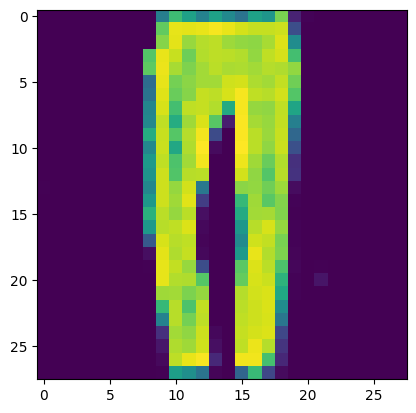

Dloss:  0.6300439
Gloss:  0.77730554
Dloss:  0.6300494
Gloss:  0.7772837
Dloss:  0.6300521
Gloss:  0.77731013
Dloss:  0.63005453
Gloss:  0.7772967
Dloss:  0.6300568
Gloss:  0.7773157
Dloss:  0.6300593
Gloss:  0.77730656
Dloss:  0.6300613
Gloss:  0.77732366
Dloss:  0.6300621
Gloss:  0.7773177
Dloss:  0.63006157
Gloss:  0.77733094
Dloss:  0.63006413
Gloss:  0.7773261
Dloss:  0.6300644
Gloss:  0.77734345
Dloss:  0.6300654
Gloss:  0.7773372
Dloss:  0.6300672
Gloss:  0.77735007
Dloss:  0.6300696
Gloss:  0.77734494
Dloss:  0.63007456
Gloss:  0.77736396
Dloss:  0.630077
Gloss:  0.77734923
Dloss:  0.63007915
Gloss:  0.77737767
Dloss:  0.630081
Gloss:  0.77736443
Dloss:  0.6300825
Gloss:  0.7773888
Dloss:  0.6300851
Gloss:  0.7773752
Dloss:  0.6300877
Gloss:  0.77739906
Dloss:  0.6300886
Gloss:  0.77738726
Dloss:  0.63009244
Gloss:  0.7774212
Dloss:  0.6300935
Gloss:  0.7773995
Dloss:  0.6300987
Gloss:  0.7774444
Dloss:  0.63010263
Gloss:  0.77741414
Dloss:  0.63010997
Gloss:  0.77745724
Dloss:

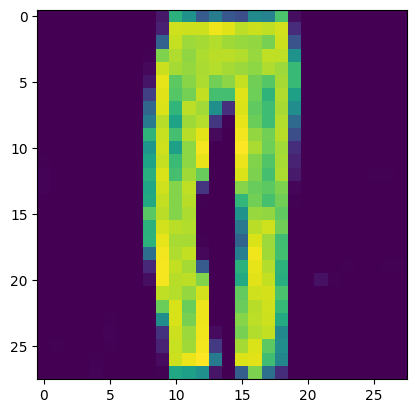

Dloss:  0.63012755
Gloss:  0.77746737
Dloss:  0.63012856
Gloss:  0.7774649
Dloss:  0.6301289
Gloss:  0.7774772
Dloss:  0.63013154
Gloss:  0.7774781
Dloss:  0.6301331
Gloss:  0.7774887
Dloss:  0.63013494
Gloss:  0.7774848
Dloss:  0.6301361
Gloss:  0.7775023
Dloss:  0.6301359
Gloss:  0.7774992
Dloss:  0.63013685
Gloss:  0.7775188
Dloss:  0.6301366
Gloss:  0.7775212
Dloss:  0.6301384
Gloss:  0.7775361
Dloss:  0.63014144
Gloss:  0.7775392
Dloss:  0.6301431
Gloss:  0.77754563
Dloss:  0.63014483
Gloss:  0.7775436
Dloss:  0.63014734
Gloss:  0.7775611
49 / 100
Dloss:  0.6301493
Gloss:  0.7775525
49 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


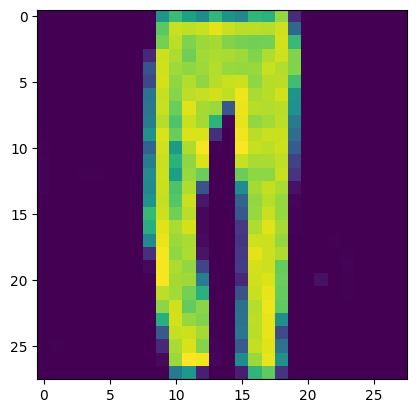

Dloss:  0.63015
Gloss:  0.7775778
Dloss:  0.63015175
Gloss:  0.7775633
Dloss:  0.6301541
Gloss:  0.7775942
Dloss:  0.63015705
Gloss:  0.7775763
Dloss:  0.63015974
Gloss:  0.77760684
Dloss:  0.6301613
Gloss:  0.77758735
Dloss:  0.6301631
Gloss:  0.7776194
Dloss:  0.63016504
Gloss:  0.77760583
Dloss:  0.63016707
Gloss:  0.7776402
Dloss:  0.6301705
Gloss:  0.77762246
Dloss:  0.6301746
Gloss:  0.7776679
Dloss:  0.63017905
Gloss:  0.7776443
Dloss:  0.6301853
Gloss:  0.77769184
Dloss:  0.6301913
Gloss:  0.7776663
Dloss:  0.630196
Gloss:  0.7777088
Dloss:  0.63020104
Gloss:  0.7776921
Dloss:  0.6302037
Gloss:  0.7777244
Dloss:  0.63020587
Gloss:  0.7777069
Dloss:  0.63020843
Gloss:  0.77773696
Dloss:  0.63020974
Gloss:  0.777723
Dloss:  0.63021183
Gloss:  0.7777557
Dloss:  0.6302144
Gloss:  0.7777414
Dloss:  0.6302165
Gloss:  0.7777716
Dloss:  0.6302196
Gloss:  0.77775663
Dloss:  0.6302218
Gloss:  0.77778643
Dloss:  0.63022333
Gloss:  0.77777606
Dloss:  0.6302258
Gloss:  0.77780616
Dloss:  0.

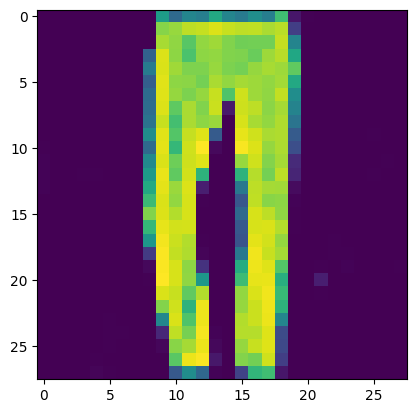

Dloss:  0.6302347
Gloss:  0.77783144
Dloss:  0.6302382
Gloss:  0.77782667
Dloss:  0.63024175
Gloss:  0.7778381
Dloss:  0.6302423
Gloss:  0.77783
Dloss:  0.6302418
Gloss:  0.7778493
Dloss:  0.6302435
Gloss:  0.7778389
Dloss:  0.6302453
Gloss:  0.7778652
Dloss:  0.630246
Gloss:  0.77784824
Dloss:  0.6302486
Gloss:  0.7778792
Dloss:  0.6302514
Gloss:  0.7778599
Dloss:  0.6302531
Gloss:  0.7778968
Dloss:  0.63025606
Gloss:  0.77787805
Dloss:  0.6302594
Gloss:  0.77791303
Dloss:  0.63026273
Gloss:  0.7778919
Dloss:  0.6302668
Gloss:  0.7779258
Dloss:  0.63027155
Gloss:  0.77791065
Dloss:  0.6302748
Gloss:  0.777935
Dloss:  0.6302774
Gloss:  0.7779224
Dloss:  0.63027936
Gloss:  0.77794945
Dloss:  0.6302805
Gloss:  0.77793723
Dloss:  0.63028157
Gloss:  0.77795696
Dloss:  0.6302822
Gloss:  0.77794856
Dloss:  0.6302844
Gloss:  0.77796936
Dloss:  0.63028646
Gloss:  0.77796185
Dloss:  0.6302881
Gloss:  0.77797735
Dloss:  0.6302874
Gloss:  0.77797157
Dloss:  0.6302877
Gloss:  0.7779889
Dloss:  0.6

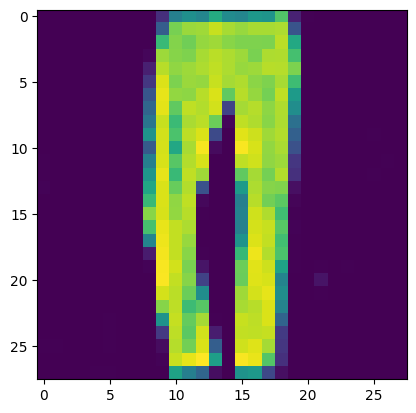

Dloss:  0.63029706
Gloss:  0.77800906
Dloss:  0.6303006
Gloss:  0.7780041
Dloss:  0.6303014
Gloss:  0.778033
Dloss:  0.6303007
Gloss:  0.7780187
Dloss:  0.6303014
Gloss:  0.7780536
Dloss:  0.63030356
Gloss:  0.77803254
Dloss:  0.63030666
Gloss:  0.7780761
Dloss:  0.63031286
Gloss:  0.7780481
Dloss:  0.6303184
Gloss:  0.77809733
Dloss:  0.63032377
Gloss:  0.7780674
Dloss:  0.6303284
Gloss:  0.77811205
Dloss:  0.6303338
Gloss:  0.77808446
Dloss:  0.6303365
Gloss:  0.7781237
Dloss:  0.63033783
Gloss:  0.7781063
Dloss:  0.6303411
Gloss:  0.7781296
Dloss:  0.63034236
Gloss:  0.77812535
Dloss:  0.63034374
Gloss:  0.7781423
Dloss:  0.6303448
Gloss:  0.7781348
Dloss:  0.63034606
Gloss:  0.778155
Dloss:  0.6303488
Gloss:  0.7781494
Dloss:  0.63035005
Gloss:  0.7781628
Dloss:  0.6303518
Gloss:  0.77816373
Dloss:  0.630351
Gloss:  0.7781789
Dloss:  0.63035065
Gloss:  0.77817297
Dloss:  0.6303522
Gloss:  0.77819043
Dloss:  0.63035494
Gloss:  0.77818006
Dloss:  0.6303577
Gloss:  0.7782041
Dloss:  0

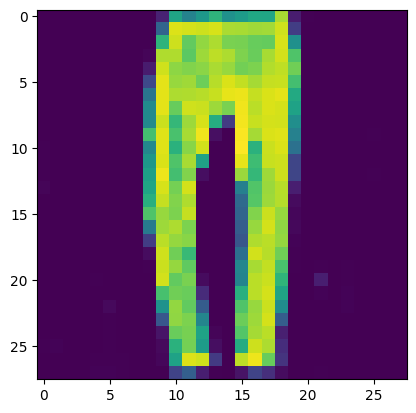

Dloss:  0.6303653
Gloss:  0.7782415
Dloss:  0.63036793
Gloss:  0.7782215
Dloss:  0.63036984
Gloss:  0.778263
Dloss:  0.6303737
Gloss:  0.77823097
Dloss:  0.6303783
Gloss:  0.77828276
Dloss:  0.63038474
Gloss:  0.77824616
Dloss:  0.63039273
Gloss:  0.7782986
Dloss:  0.6303981
Gloss:  0.77827346
Dloss:  0.6304005
Gloss:  0.77830315
Dloss:  0.6304035
Gloss:  0.7782942
Dloss:  0.6304052
Gloss:  0.77830976
Dloss:  0.63040715
Gloss:  0.7783135
Dloss:  0.6304093
Gloss:  0.7783226
Dloss:  0.63041043
Gloss:  0.77831876
Dloss:  0.6304137
Gloss:  0.7783338
Dloss:  0.63041466
Gloss:  0.7783329
Dloss:  0.6304141
Gloss:  0.77835023
Dloss:  0.63041365
Gloss:  0.7783491
Dloss:  0.6304138
Gloss:  0.7783705
Dloss:  0.63041437
Gloss:  0.7783613
Dloss:  0.6304186
Gloss:  0.77839255
Dloss:  0.63042194
Gloss:  0.77837396
Dloss:  0.630427
Gloss:  0.778404
Dloss:  0.6304281
Gloss:  0.77838695
Dloss:  0.63043195
Gloss:  0.7784182
Dloss:  0.6304332
Gloss:  0.778401
Dloss:  0.63043654
Gloss:  0.77843136
Dloss:  

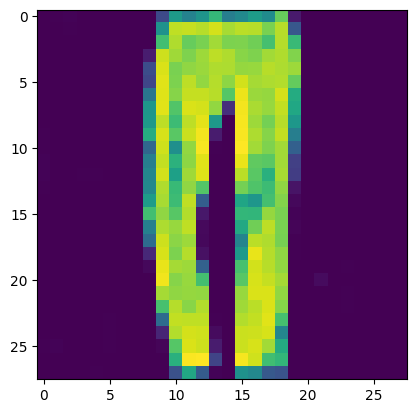

Dloss:  0.63044727
Gloss:  0.7784463
Dloss:  0.6304483
Gloss:  0.77843696
Dloss:  0.63044834
Gloss:  0.77845794
Dloss:  0.6304498
Gloss:  0.77845126
Dloss:  0.63045055
Gloss:  0.77846724
Dloss:  0.6304522
Gloss:  0.7784542
Dloss:  0.63045466
Gloss:  0.77847946
Dloss:  0.6304563
Gloss:  0.77846897
Dloss:  0.6304577
Gloss:  0.7784884
Dloss:  0.63045883
Gloss:  0.77848667
Dloss:  0.6304608
Gloss:  0.7785041
Dloss:  0.6304617
Gloss:  0.7785037
Dloss:  0.6304633
Gloss:  0.77851754
Dloss:  0.63046557
Gloss:  0.7785216
Dloss:  0.63046634
Gloss:  0.77853715
50 / 100
Dloss:  0.63046736
Gloss:  0.77853686
50 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


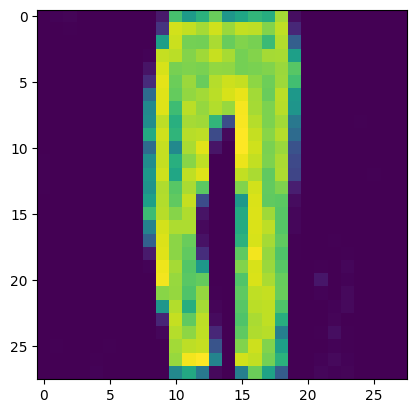

Dloss:  0.63046664
Gloss:  0.7785497
Dloss:  0.6304674
Gloss:  0.7785467
Dloss:  0.6304695
Gloss:  0.77855974
Dloss:  0.6304722
Gloss:  0.7785552
Dloss:  0.63047373
Gloss:  0.77857196
Dloss:  0.63047355
Gloss:  0.77856934
Dloss:  0.6304755
Gloss:  0.7785887
Dloss:  0.6304788
Gloss:  0.77857864
Dloss:  0.63048315
Gloss:  0.7786007
Dloss:  0.63048756
Gloss:  0.77858454
Dloss:  0.63048977
Gloss:  0.77861553
Dloss:  0.6304923
Gloss:  0.77859265
Dloss:  0.6304955
Gloss:  0.77863234
Dloss:  0.630498
Gloss:  0.7786062
Dloss:  0.63050306
Gloss:  0.7786508
Dloss:  0.63050854
Gloss:  0.77862275
Dloss:  0.6305149
Gloss:  0.7786669
Dloss:  0.630518
Gloss:  0.7786449
Dloss:  0.63052106
Gloss:  0.7786824
Dloss:  0.6305236
Gloss:  0.7786675
Dloss:  0.63052475
Gloss:  0.7786893
Dloss:  0.6305268
Gloss:  0.7786839
Dloss:  0.6305274
Gloss:  0.77869755
Dloss:  0.6305291
Gloss:  0.7786978
Dloss:  0.6305277
Gloss:  0.7787076
Dloss:  0.63052744
Gloss:  0.7787156
Dloss:  0.63052785
Gloss:  0.77872056
Dloss: 

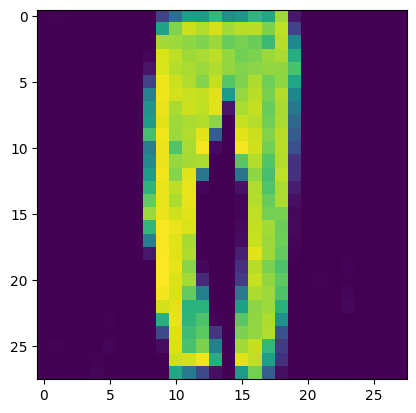

Dloss:  0.63053304
Gloss:  0.7787434
Dloss:  0.630533
Gloss:  0.77874756
Dloss:  0.63053393
Gloss:  0.7787579
Dloss:  0.6305358
Gloss:  0.77875733
Dloss:  0.6305356
Gloss:  0.7787672
Dloss:  0.63053745
Gloss:  0.7787656
Dloss:  0.630538
Gloss:  0.77877545
Dloss:  0.6305372
Gloss:  0.7787724
Dloss:  0.63053834
Gloss:  0.77879506
Dloss:  0.6305393
Gloss:  0.77878654
Dloss:  0.63053894
Gloss:  0.778821
Dloss:  0.6305397
Gloss:  0.77879757
Dloss:  0.6305426
Gloss:  0.7788485
Dloss:  0.6305471
Gloss:  0.7788112
Dloss:  0.63055515
Gloss:  0.7788926
Dloss:  0.6305691
Gloss:  0.7788427
Dloss:  0.630582
Gloss:  0.7789197
Dloss:  0.63059294
Gloss:  0.77888346
Dloss:  0.6306005
Gloss:  0.7789175
Dloss:  0.6306025
Gloss:  0.778913
Dloss:  0.63060397
Gloss:  0.7789216
Dloss:  0.6306048
Gloss:  0.77892303
Dloss:  0.6306064
Gloss:  0.77892953
Dloss:  0.63060826
Gloss:  0.7789354
Dloss:  0.63060945
Gloss:  0.7789388
Dloss:  0.6306096
Gloss:  0.77894825
Dloss:  0.63061017
Gloss:  0.7789519
Dloss:  0.63

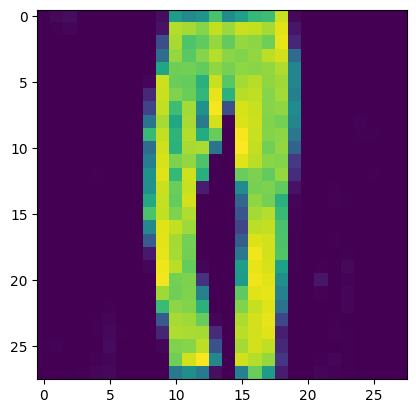

Dloss:  0.63061035
Gloss:  0.77897257
Dloss:  0.6306142
Gloss:  0.7789758
Dloss:  0.6306145
Gloss:  0.77898747
Dloss:  0.6306159
Gloss:  0.7789896
Dloss:  0.63061684
Gloss:  0.778999
Dloss:  0.63061774
Gloss:  0.778997
Dloss:  0.63061804
Gloss:  0.77900946
Dloss:  0.63061833
Gloss:  0.7790097
Dloss:  0.63061816
Gloss:  0.77902275
Dloss:  0.6306191
Gloss:  0.7790301
Dloss:  0.63061875
Gloss:  0.7790345
Dloss:  0.63061976
Gloss:  0.77903986
Dloss:  0.6306188
Gloss:  0.77904457
Dloss:  0.6306198
Gloss:  0.77905774
Dloss:  0.6306224
Gloss:  0.77904606
Dloss:  0.63062394
Gloss:  0.77907956
Dloss:  0.6306258
Gloss:  0.7790604
Dloss:  0.63062716
Gloss:  0.7790988
Dloss:  0.63062876
Gloss:  0.7790709
Dloss:  0.63063097
Gloss:  0.779118
Dloss:  0.63063633
Gloss:  0.7790857
Dloss:  0.6306435
Gloss:  0.7791429
Dloss:  0.6306506
Gloss:  0.7791054
Dloss:  0.6306579
Gloss:  0.779154
Dloss:  0.6306648
Gloss:  0.77912456
Dloss:  0.6306706
Gloss:  0.7791663
Dloss:  0.63067555
Gloss:  0.7791444
Dloss:  

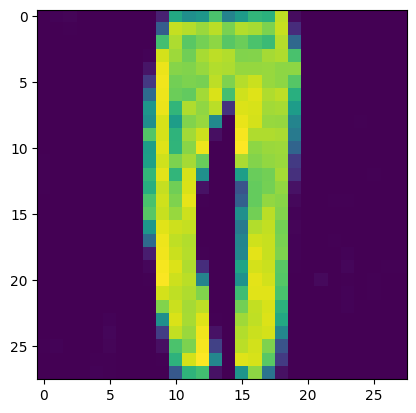

Dloss:  0.63068044
Gloss:  0.77918565
Dloss:  0.63068056
Gloss:  0.7791969
Dloss:  0.63068014
Gloss:  0.7791945
Dloss:  0.63067955
Gloss:  0.7792068
Dloss:  0.6306795
Gloss:  0.7792096
Dloss:  0.63068
Gloss:  0.7792153
Dloss:  0.63068134
Gloss:  0.7792212
Dloss:  0.6306817
Gloss:  0.779229
Dloss:  0.6306808
Gloss:  0.77923375
Dloss:  0.6306812
Gloss:  0.77924097
Dloss:  0.6306812
Gloss:  0.77924114
Dloss:  0.63068265
Gloss:  0.7792581
Dloss:  0.630684
Gloss:  0.77924085
Dloss:  0.6306864
Gloss:  0.7792711
Dloss:  0.6306902
Gloss:  0.7792517
Dloss:  0.6306917
Gloss:  0.7792853
Dloss:  0.63069177
Gloss:  0.7792652
Dloss:  0.6306934
Gloss:  0.7793062
Dloss:  0.63069695
Gloss:  0.77927953
Dloss:  0.63070136
Gloss:  0.77933013
Dloss:  0.6307073
Gloss:  0.7792969
Dloss:  0.63071305
Gloss:  0.7793472
Dloss:  0.6307194
Gloss:  0.77932
Dloss:  0.6307226
Gloss:  0.77935797
Dloss:  0.6307251
Gloss:  0.77934194
Dloss:  0.63072616
Gloss:  0.7793684
Dloss:  0.6307282
Gloss:  0.77935475
Dloss:  0.630

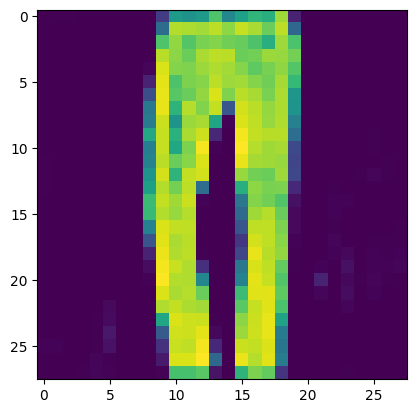

Dloss:  0.63073653
Gloss:  0.7793719
Dloss:  0.63073784
Gloss:  0.77938294
Dloss:  0.6307385
Gloss:  0.77937704
Dloss:  0.63073885
Gloss:  0.7793886
Dloss:  0.63073766
Gloss:  0.7793866
Dloss:  0.6307368
Gloss:  0.7793981
Dloss:  0.63073695
Gloss:  0.7793913
Dloss:  0.63073784
Gloss:  0.77941173
Dloss:  0.63073957
Gloss:  0.7793999
Dloss:  0.6307415
Gloss:  0.77943057
Dloss:  0.63074386
Gloss:  0.7794144
Dloss:  0.6307452
Gloss:  0.7794476
Dloss:  0.63074785
Gloss:  0.77943027
Dloss:  0.63075
Gloss:  0.77946216
Dloss:  0.63075125
Gloss:  0.77943933
51 / 100
Dloss:  0.6307537
Gloss:  0.7794743
51 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


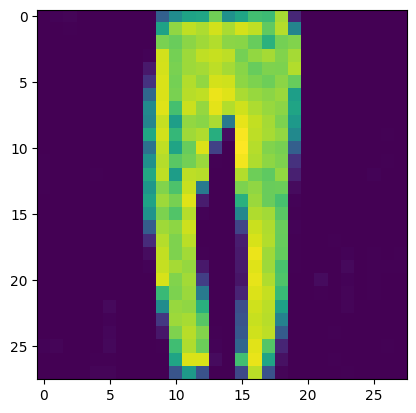

Dloss:  0.63075656
Gloss:  0.7794541
Dloss:  0.63076067
Gloss:  0.779491
Dloss:  0.63076526
Gloss:  0.7794682
Dloss:  0.6307696
Gloss:  0.7795065
Dloss:  0.63077295
Gloss:  0.77948517
Dloss:  0.630774
Gloss:  0.77951574
Dloss:  0.630778
Gloss:  0.77950144
Dloss:  0.63078123
Gloss:  0.77952266
Dloss:  0.6307833
Gloss:  0.7795127
Dloss:  0.6307859
Gloss:  0.77952796
Dloss:  0.6307868
Gloss:  0.779523
Dloss:  0.6307889
Gloss:  0.7795417
Dloss:  0.6307891
Gloss:  0.7795341
Dloss:  0.63078916
Gloss:  0.77955335
Dloss:  0.63079
Gloss:  0.77954566
Dloss:  0.6307912
Gloss:  0.77956694
Dloss:  0.63079196
Gloss:  0.779561
Dloss:  0.63079286
Gloss:  0.77957904
Dloss:  0.63079387
Gloss:  0.7795648
Dloss:  0.63079596
Gloss:  0.7795973
Dloss:  0.6307962
Gloss:  0.7795836
Dloss:  0.6307973
Gloss:  0.77961254
Dloss:  0.6307999
Gloss:  0.77959794
Dloss:  0.63080263
Gloss:  0.7796149
Dloss:  0.63080347
Gloss:  0.7796116
Dloss:  0.63080615
Gloss:  0.77962685
Dloss:  0.6308061
Gloss:  0.77962124
Dloss:  0

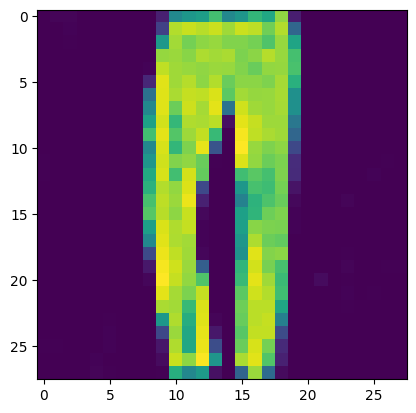

Dloss:  0.63080794
Gloss:  0.7796469
Dloss:  0.63080883
Gloss:  0.779655
Dloss:  0.6308094
Gloss:  0.77965397
Dloss:  0.63081056
Gloss:  0.7796641
Dloss:  0.6308106
Gloss:  0.7796658
Dloss:  0.6308116
Gloss:  0.7796748
Dloss:  0.6308128
Gloss:  0.7796761
Dloss:  0.63081276
Gloss:  0.7796866
Dloss:  0.6308121
Gloss:  0.77967966
Dloss:  0.6308138
Gloss:  0.7797001
Dloss:  0.63081354
Gloss:  0.7796897
Dloss:  0.6308132
Gloss:  0.779727
Dloss:  0.63081706
Gloss:  0.779697
Dloss:  0.6308204
Gloss:  0.7797552
Dloss:  0.6308273
Gloss:  0.7797194
Dloss:  0.63083535
Gloss:  0.7797807
Dloss:  0.63084424
Gloss:  0.77974683
Dloss:  0.6308508
Gloss:  0.7797865
Dloss:  0.63085365
Gloss:  0.7797674
Dloss:  0.6308548
Gloss:  0.77979124
Dloss:  0.63085467
Gloss:  0.7797786
Dloss:  0.6308555
Gloss:  0.7797979
Dloss:  0.6308575
Gloss:  0.77979183
Dloss:  0.6308602
Gloss:  0.7798107
Dloss:  0.63086176
Gloss:  0.77979976
Dloss:  0.6308621
Gloss:  0.7798286
Dloss:  0.6308625
Gloss:  0.77981555
Dloss:  0.630

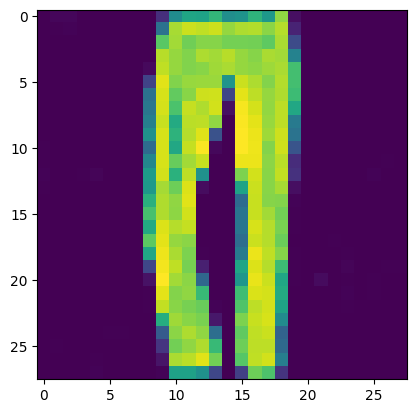

Dloss:  0.6308719
Gloss:  0.7798394
Dloss:  0.6308755
Gloss:  0.7798692
Dloss:  0.63087654
Gloss:  0.77985424
Dloss:  0.63087827
Gloss:  0.7798784
Dloss:  0.63087994
Gloss:  0.7798639
Dloss:  0.63088185
Gloss:  0.77988344
Dloss:  0.6308829
Gloss:  0.7798711
Dloss:  0.63088405
Gloss:  0.7798931
Dloss:  0.6308846
Gloss:  0.77988374
Dloss:  0.6308839
Gloss:  0.7799005
Dloss:  0.6308853
Gloss:  0.7799019
Dloss:  0.6308868
Gloss:  0.7799121
Dloss:  0.63088626
Gloss:  0.7799139
Dloss:  0.6308855
Gloss:  0.7799191
Dloss:  0.63088775
Gloss:  0.77992624
Dloss:  0.6308869
Gloss:  0.77992976
Dloss:  0.630887
Gloss:  0.7799368
Dloss:  0.6308869
Gloss:  0.77993774
Dloss:  0.6308862
Gloss:  0.77994657
Dloss:  0.63088626
Gloss:  0.77994394
Dloss:  0.630886
Gloss:  0.7799489
Dloss:  0.6308872
Gloss:  0.7799555
Dloss:  0.63088673
Gloss:  0.77995783
Dloss:  0.6308883
Gloss:  0.779968
Dloss:  0.63089025
Gloss:  0.77997404
Dloss:  0.63089144
Gloss:  0.7799785
Dloss:  0.6308936
Gloss:  0.77998865
Dloss:  0

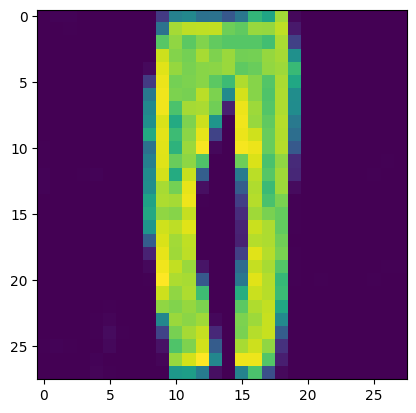

Dloss:  0.63089716
Gloss:  0.78003055
Dloss:  0.63089985
Gloss:  0.77999914
Dloss:  0.6309048
Gloss:  0.78006375
Dloss:  0.63091105
Gloss:  0.78002304
Dloss:  0.63091904
Gloss:  0.7800933
Dloss:  0.63092697
Gloss:  0.7800508
Dloss:  0.63094014
Gloss:  0.7801105
Dloss:  0.630948
Gloss:  0.78008264
Dloss:  0.6309515
Gloss:  0.7801091
Dloss:  0.6309546
Gloss:  0.78010106
Dloss:  0.6309558
Gloss:  0.7801151
Dloss:  0.630958
Gloss:  0.7801175
Dloss:  0.63095886
Gloss:  0.7801288
Dloss:  0.6309592
Gloss:  0.78013396
Dloss:  0.6309606
Gloss:  0.78014004
Dloss:  0.6309609
Gloss:  0.78014076
Dloss:  0.6309611
Gloss:  0.7801492
Dloss:  0.630962
Gloss:  0.7801585
Dloss:  0.6309614
Gloss:  0.7801628
Dloss:  0.63096225
Gloss:  0.78016925
Dloss:  0.63096327
Gloss:  0.7801779
Dloss:  0.6309623
Gloss:  0.7801807
Dloss:  0.63096434
Gloss:  0.78019214
Dloss:  0.63096374
Gloss:  0.78018886
Dloss:  0.630965
Gloss:  0.78020686
Dloss:  0.63096493
Gloss:  0.7801989
Dloss:  0.63096625
Gloss:  0.7802192
Dloss:

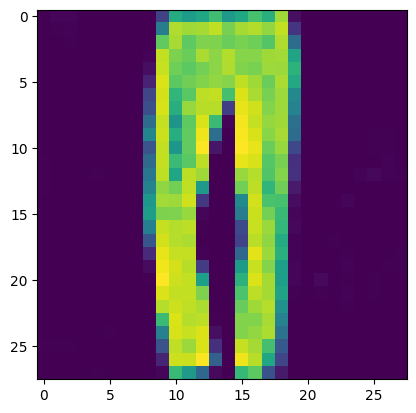

Dloss:  0.6309721
Gloss:  0.7802396
Dloss:  0.63097334
Gloss:  0.7802302
Dloss:  0.6309754
Gloss:  0.7802513
Dloss:  0.6309767
Gloss:  0.7802401
Dloss:  0.6309766
Gloss:  0.7802643
Dloss:  0.6309778
Gloss:  0.7802464
Dloss:  0.6309789
Gloss:  0.7802819
Dloss:  0.63098145
Gloss:  0.780262
Dloss:  0.630984
Gloss:  0.7802961
Dloss:  0.6309854
Gloss:  0.78028375
Dloss:  0.63098663
Gloss:  0.780312
Dloss:  0.63098836
Gloss:  0.78030145
Dloss:  0.6309893
Gloss:  0.7803225
Dloss:  0.63099134
Gloss:  0.78031623
Dloss:  0.6309938
Gloss:  0.7803411
52 / 100
Dloss:  0.63099533
Gloss:  0.7803314
52 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


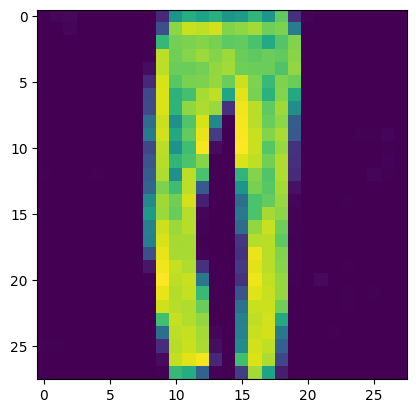

Dloss:  0.63099647
Gloss:  0.7803565
Dloss:  0.6309976
Gloss:  0.7803446
Dloss:  0.630998
Gloss:  0.78037333
Dloss:  0.63099974
Gloss:  0.7803611
Dloss:  0.6310011
Gloss:  0.7803795
Dloss:  0.6310006
Gloss:  0.7803771
Dloss:  0.6310022
Gloss:  0.78038925
Dloss:  0.63100374
Gloss:  0.7803908
Dloss:  0.6310043
Gloss:  0.7803963
Dloss:  0.6310044
Gloss:  0.7804023
Dloss:  0.6310038
Gloss:  0.78040963
Dloss:  0.63100463
Gloss:  0.7804209
Dloss:  0.6310077
Gloss:  0.7804198
Dloss:  0.6310088
Gloss:  0.7804382
Dloss:  0.63101125
Gloss:  0.7804287
Dloss:  0.63101315
Gloss:  0.78046155
Dloss:  0.6310152
Gloss:  0.7804398
Dloss:  0.6310178
Gloss:  0.7804799
Dloss:  0.63102126
Gloss:  0.78045136
Dloss:  0.631025
Gloss:  0.78050107
Dloss:  0.6310299
Gloss:  0.7804684
Dloss:  0.63103503
Gloss:  0.7805141
Dloss:  0.6310392
Gloss:  0.7804942
Dloss:  0.6310396
Gloss:  0.78051686
Dloss:  0.63104194
Gloss:  0.78051704
Dloss:  0.6310425
Gloss:  0.7805277
Dloss:  0.63104385
Gloss:  0.780533
Dloss:  0.631

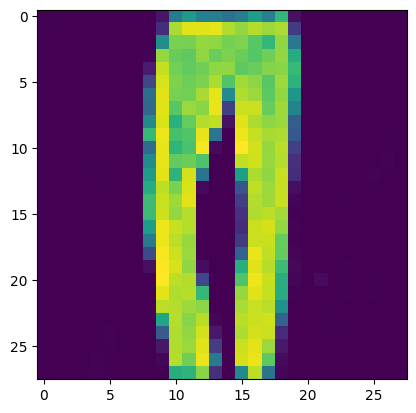

Dloss:  0.6310467
Gloss:  0.7805631
Dloss:  0.63104624
Gloss:  0.7805662
Dloss:  0.63104653
Gloss:  0.7805762
Dloss:  0.63104707
Gloss:  0.780578
Dloss:  0.6310465
Gloss:  0.7806031
Dloss:  0.6310471
Gloss:  0.7805993
Dloss:  0.63104707
Gloss:  0.7806147
Dloss:  0.63104707
Gloss:  0.7806115
Dloss:  0.63104755
Gloss:  0.7806285
Dloss:  0.631049
Gloss:  0.78061396
Dloss:  0.63104975
Gloss:  0.78066117
Dloss:  0.6310517
Gloss:  0.7806303
Dloss:  0.63105696
Gloss:  0.7806928
Dloss:  0.6310635
Gloss:  0.78065234
Dloss:  0.6310729
Gloss:  0.7807151
Dloss:  0.6310813
Gloss:  0.7806851
Dloss:  0.631086
Gloss:  0.78072065
Dloss:  0.63108885
Gloss:  0.78070325
Dloss:  0.6310907
Gloss:  0.78072715
Dloss:  0.6310913
Gloss:  0.7807189
Dloss:  0.63109344
Gloss:  0.78074086
Dloss:  0.6310956
Gloss:  0.7807311
Dloss:  0.63109773
Gloss:  0.7807477
Dloss:  0.63109815
Gloss:  0.7807443
Dloss:  0.63109845
Gloss:  0.78075755
Dloss:  0.63109636
Gloss:  0.7807596
Dloss:  0.6310964
Gloss:  0.7807744
Dloss:  0

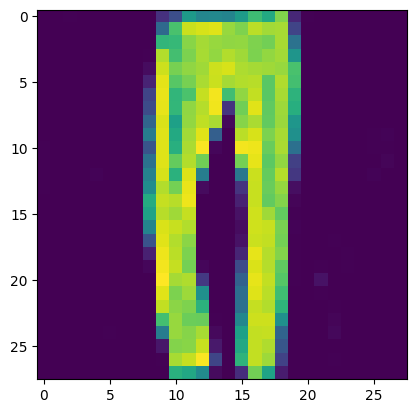

Dloss:  0.6311022
Gloss:  0.78081596
Dloss:  0.63110286
Gloss:  0.7808066
Dloss:  0.6311039
Gloss:  0.78083986
Dloss:  0.63110596
Gloss:  0.7808255
Dloss:  0.631108
Gloss:  0.78085977
Dloss:  0.6311105
Gloss:  0.7808382
Dloss:  0.63111347
Gloss:  0.7808818
Dloss:  0.63111883
Gloss:  0.78085303
Dloss:  0.6311233
Gloss:  0.7808948
Dloss:  0.6311268
Gloss:  0.7808717
Dloss:  0.63113004
Gloss:  0.78089994
Dloss:  0.63113195
Gloss:  0.78088605
Dloss:  0.6311333
Gloss:  0.78091204
Dloss:  0.63113374
Gloss:  0.7808994
Dloss:  0.63113517
Gloss:  0.7809189
Dloss:  0.63113475
Gloss:  0.7809151
Dloss:  0.631134
Gloss:  0.78093094
Dloss:  0.6311337
Gloss:  0.78093463
Dloss:  0.6311342
Gloss:  0.78094715
Dloss:  0.6311341
Gloss:  0.7809494
Dloss:  0.63113636
Gloss:  0.7809622
Dloss:  0.63113964
Gloss:  0.7809583
Dloss:  0.63114226
Gloss:  0.78097963
Dloss:  0.6311439
Gloss:  0.78096753
Dloss:  0.63114583
Gloss:  0.7809987
Dloss:  0.63114566
Gloss:  0.78097486
Dloss:  0.63115007
Gloss:  0.7810271
Dl

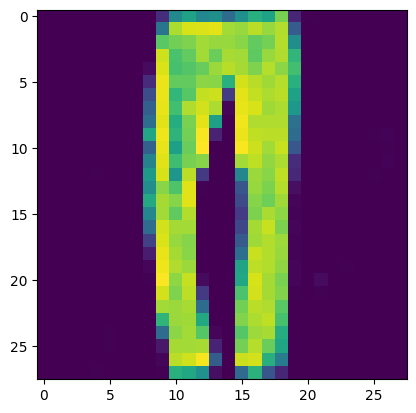

Dloss:  0.6311765
Gloss:  0.78105223
Dloss:  0.6311802
Gloss:  0.78104115
Dloss:  0.6311827
Gloss:  0.7810585
Dloss:  0.6311842
Gloss:  0.781055
Dloss:  0.63118386
Gloss:  0.7810613
Dloss:  0.63118374
Gloss:  0.7810697
Dloss:  0.6311844
Gloss:  0.78107184
Dloss:  0.6311829
Gloss:  0.78108144
Dloss:  0.6311835
Gloss:  0.78108263
Dloss:  0.6311837
Gloss:  0.78109044
Dloss:  0.63118404
Gloss:  0.781101
Dloss:  0.63118446
Gloss:  0.7810989
Dloss:  0.63118553
Gloss:  0.7811095
Dloss:  0.6311876
Gloss:  0.7811083
Dloss:  0.6311883
Gloss:  0.7811177
Dloss:  0.6311898
Gloss:  0.7811195
Dloss:  0.6311887
Gloss:  0.7811267
Dloss:  0.63118756
Gloss:  0.78113335
Dloss:  0.6311868
Gloss:  0.7811356
Dloss:  0.63118625
Gloss:  0.78114164
Dloss:  0.63118696
Gloss:  0.781141
Dloss:  0.6311879
Gloss:  0.7811543
Dloss:  0.6311896
Gloss:  0.7811508
Dloss:  0.6311903
Gloss:  0.78117216
Dloss:  0.63119024
Gloss:  0.7811589
Dloss:  0.6311894
Gloss:  0.7811901
Dloss:  0.63119084
Gloss:  0.7811699
Dloss:  0.63

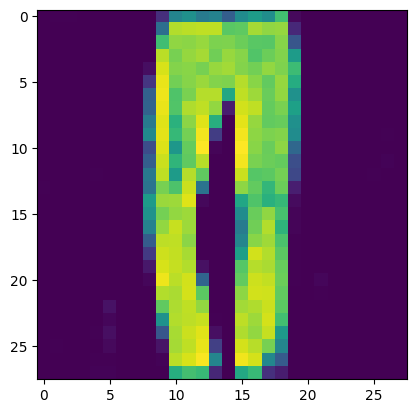

Dloss:  0.6312048
Gloss:  0.7811997
Dloss:  0.6312091
Gloss:  0.7812408
Dloss:  0.6312121
Gloss:  0.7812173
Dloss:  0.63121444
Gloss:  0.78125334
Dloss:  0.6312161
Gloss:  0.78123766
Dloss:  0.63121873
Gloss:  0.781273
Dloss:  0.6312201
Gloss:  0.78125864
Dloss:  0.6312197
Gloss:  0.7812856
Dloss:  0.63122207
Gloss:  0.78127813
Dloss:  0.6312234
Gloss:  0.78130776
Dloss:  0.63122594
Gloss:  0.78129566
Dloss:  0.63122755
Gloss:  0.7813211
Dloss:  0.6312294
Gloss:  0.7813128
Dloss:  0.6312311
Gloss:  0.7813354
Dloss:  0.6312314
Gloss:  0.78132224
53 / 100
Dloss:  0.6312323
Gloss:  0.7813453
53 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


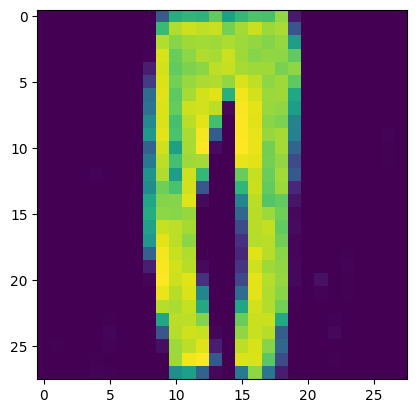

Dloss:  0.63123304
Gloss:  0.781339
Dloss:  0.63123494
Gloss:  0.78135955
Dloss:  0.63123757
Gloss:  0.78135484
Dloss:  0.6312396
Gloss:  0.7813749
Dloss:  0.63124084
Gloss:  0.78136486
Dloss:  0.6312402
Gloss:  0.78138536
Dloss:  0.63124174
Gloss:  0.78137326
Dloss:  0.63124466
Gloss:  0.78140515
Dloss:  0.63124865
Gloss:  0.7813824
Dloss:  0.6312525
Gloss:  0.78142196
Dloss:  0.6312531
Gloss:  0.78140336
Dloss:  0.631254
Gloss:  0.7814379
Dloss:  0.6312567
Gloss:  0.78142023
Dloss:  0.63126004
Gloss:  0.7814471
Dloss:  0.6312627
Gloss:  0.78143215
Dloss:  0.6312657
Gloss:  0.78145707
Dloss:  0.63126695
Gloss:  0.7814422
Dloss:  0.63126725
Gloss:  0.78146404
Dloss:  0.63126785
Gloss:  0.7814551
Dloss:  0.6312678
Gloss:  0.7814781
Dloss:  0.63126796
Gloss:  0.78146833
Dloss:  0.63126934
Gloss:  0.78149045
Dloss:  0.6312709
Gloss:  0.78148466
Dloss:  0.6312715
Gloss:  0.78150666
Dloss:  0.63127035
Gloss:  0.78150016
Dloss:  0.6312704
Gloss:  0.7815222
Dloss:  0.63127095
Gloss:  0.781522

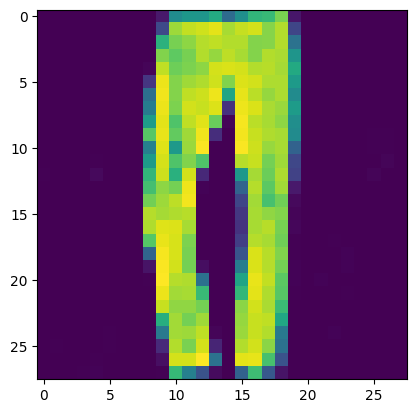

Dloss:  0.6312765
Gloss:  0.7815537
Dloss:  0.63127714
Gloss:  0.7815579
Dloss:  0.63127834
Gloss:  0.7815675
Dloss:  0.6312808
Gloss:  0.7815694
Dloss:  0.63127935
Gloss:  0.78157544
Dloss:  0.63127875
Gloss:  0.78158724
Dloss:  0.631278
Gloss:  0.78158617
Dloss:  0.6312779
Gloss:  0.78160745
Dloss:  0.63127655
Gloss:  0.78159386
Dloss:  0.6312785
Gloss:  0.7816347
Dloss:  0.6312822
Gloss:  0.7816087
Dloss:  0.6312862
Gloss:  0.7816621
Dloss:  0.6312925
Gloss:  0.781626
Dloss:  0.6312982
Gloss:  0.7816868
Dloss:  0.6313043
Gloss:  0.78165376
Dloss:  0.6313083
Gloss:  0.7816901
Dloss:  0.63131106
Gloss:  0.7816734
Dloss:  0.6313142
Gloss:  0.7816971
Dloss:  0.63131464
Gloss:  0.781683
Dloss:  0.6313141
Gloss:  0.7817049
Dloss:  0.63131535
Gloss:  0.78169805
Dloss:  0.631316
Gloss:  0.78171635
Dloss:  0.6313177
Gloss:  0.7817143
Dloss:  0.63131845
Gloss:  0.781733
Dloss:  0.63132036
Gloss:  0.78172433
Dloss:  0.63132
Gloss:  0.7817503
Dloss:  0.6313207
Gloss:  0.78173786
Dloss:  0.63132

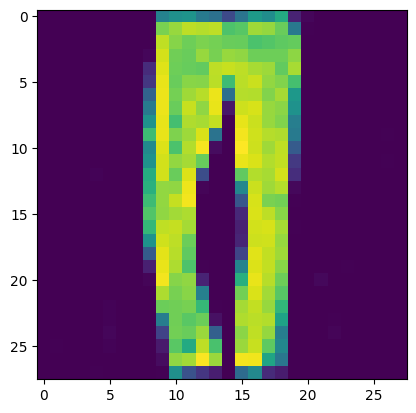

Dloss:  0.63132364
Gloss:  0.78176665
Dloss:  0.6313257
Gloss:  0.78178686
Dloss:  0.6313259
Gloss:  0.7817812
Dloss:  0.6313249
Gloss:  0.7818066
Dloss:  0.6313251
Gloss:  0.7817936
Dloss:  0.63132685
Gloss:  0.7818182
Dloss:  0.63132805
Gloss:  0.7818041
Dloss:  0.63133
Gloss:  0.7818366
Dloss:  0.6313315
Gloss:  0.7818232
Dloss:  0.6313326
Gloss:  0.7818465
Dloss:  0.6313345
Gloss:  0.7818305
Dloss:  0.6313367
Gloss:  0.7818634
Dloss:  0.6313387
Gloss:  0.7818462
Dloss:  0.6313387
Gloss:  0.7818664
Dloss:  0.631341
Gloss:  0.7818574
Dloss:  0.631342
Gloss:  0.78187674
Dloss:  0.63134325
Gloss:  0.781869
Dloss:  0.6313429
Gloss:  0.7818905
Dloss:  0.631344
Gloss:  0.7818908
Dloss:  0.6313462
Gloss:  0.78190154
Dloss:  0.6313474
Gloss:  0.7819026
Dloss:  0.631351
Gloss:  0.7819134
Dloss:  0.63135093
Gloss:  0.78191286
Dloss:  0.63135123
Gloss:  0.78192407
Dloss:  0.63135034
Gloss:  0.7819228
Dloss:  0.6313515
Gloss:  0.7819396
Dloss:  0.63135284
Gloss:  0.78193015
Dloss:  0.6313534
Gl

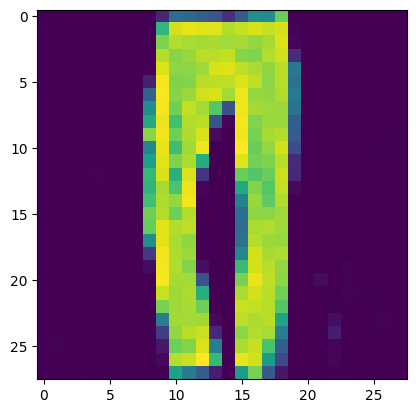

Dloss:  0.63135445
Gloss:  0.7819491
Dloss:  0.6313566
Gloss:  0.7819865
Dloss:  0.6313588
Gloss:  0.7819572
Dloss:  0.63136303
Gloss:  0.78200763
Dloss:  0.6313678
Gloss:  0.7819745
Dloss:  0.6313729
Gloss:  0.78202814
Dloss:  0.63137937
Gloss:  0.78199875
Dloss:  0.6313851
Gloss:  0.7820393
Dloss:  0.6313888
Gloss:  0.7820159
Dloss:  0.6313936
Gloss:  0.7820488
Dloss:  0.6313953
Gloss:  0.7820363
Dloss:  0.63139653
Gloss:  0.7820665
Dloss:  0.6313983
Gloss:  0.78205484
Dloss:  0.63139945
Gloss:  0.7820773
Dloss:  0.6314029
Gloss:  0.78206724
Dloss:  0.6314049
Gloss:  0.7820829
Dloss:  0.6314048
Gloss:  0.7820752
Dloss:  0.6314046
Gloss:  0.7820884
Dloss:  0.63140434
Gloss:  0.7820883
Dloss:  0.6314038
Gloss:  0.7821013
Dloss:  0.6314046
Gloss:  0.78209865
Dloss:  0.63140494
Gloss:  0.78211045
Dloss:  0.631407
Gloss:  0.7821078
Dloss:  0.63140726
Gloss:  0.7821229
Dloss:  0.6314069
Gloss:  0.78211427
Dloss:  0.631406
Gloss:  0.7821349
Dloss:  0.6314066
Gloss:  0.782128
Dloss:  0.63140

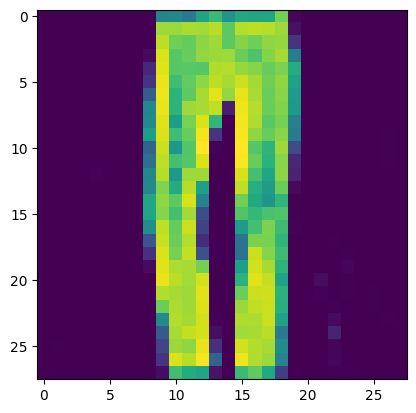

Dloss:  0.6314109
Gloss:  0.7821496
Dloss:  0.631412
Gloss:  0.7821639
Dloss:  0.6314132
Gloss:  0.7821642
Dloss:  0.6314144
Gloss:  0.78217745
Dloss:  0.6314144
Gloss:  0.7821767
Dloss:  0.63141465
Gloss:  0.7821874
Dloss:  0.6314152
Gloss:  0.7821895
Dloss:  0.6314145
Gloss:  0.7822079
Dloss:  0.6314145
Gloss:  0.7821967
Dloss:  0.6314158
Gloss:  0.78223735
Dloss:  0.6314169
Gloss:  0.7822152
Dloss:  0.63142097
Gloss:  0.7822726
Dloss:  0.63142693
Gloss:  0.78224075
Dloss:  0.63143176
Gloss:  0.7822958
Dloss:  0.63143766
Gloss:  0.78227264
54 / 100
Dloss:  0.63144195
Gloss:  0.782309
54 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


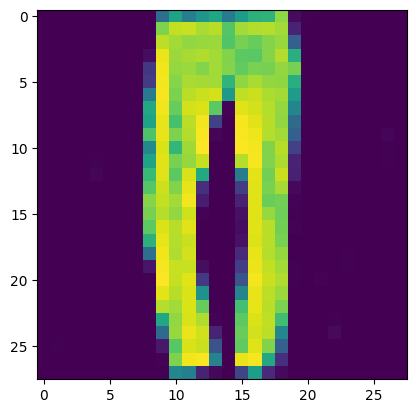

Dloss:  0.6314443
Gloss:  0.78229225
Dloss:  0.6314464
Gloss:  0.7823153
Dloss:  0.63144785
Gloss:  0.7823041
Dloss:  0.6314498
Gloss:  0.7823237
Dloss:  0.6314512
Gloss:  0.7823156
Dloss:  0.6314509
Gloss:  0.78233194
Dloss:  0.6314516
Gloss:  0.7823213
Dloss:  0.6314524
Gloss:  0.7823475
Dloss:  0.63145477
Gloss:  0.78232896
Dloss:  0.6314572
Gloss:  0.78235656
Dloss:  0.63145787
Gloss:  0.7823505
Dloss:  0.6314592
Gloss:  0.78237677
Dloss:  0.63145995
Gloss:  0.7823641
Dloss:  0.6314617
Gloss:  0.78239006
Dloss:  0.63146365
Gloss:  0.78237736
Dloss:  0.631465
Gloss:  0.7824041
Dloss:  0.63146496
Gloss:  0.7823905
Dloss:  0.631466
Gloss:  0.7824216
Dloss:  0.63146603
Gloss:  0.78240603
Dloss:  0.6314671
Gloss:  0.78243554
Dloss:  0.6314671
Gloss:  0.78242016
Dloss:  0.63146853
Gloss:  0.78245074
Dloss:  0.63147134
Gloss:  0.7824372
Dloss:  0.6314734
Gloss:  0.78245634
Dloss:  0.6314734
Gloss:  0.78245604
Dloss:  0.63147265
Gloss:  0.78247005
Dloss:  0.63147265
Gloss:  0.7824676
Dloss

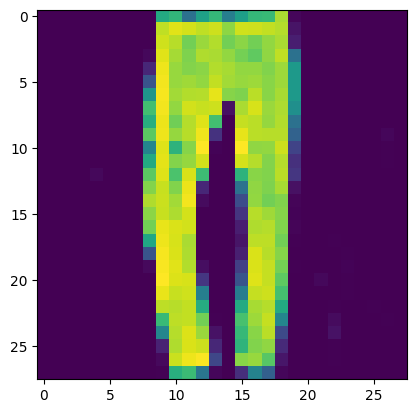

Dloss:  0.6314717
Gloss:  0.78249186
Dloss:  0.63147265
Gloss:  0.78250295
Dloss:  0.63147235
Gloss:  0.78249866
Dloss:  0.63147515
Gloss:  0.7825208
Dloss:  0.6314765
Gloss:  0.78250563
Dloss:  0.63147926
Gloss:  0.78253496
Dloss:  0.63148075
Gloss:  0.7825185
Dloss:  0.6314806
Gloss:  0.7825533
Dloss:  0.6314804
Gloss:  0.7825355
Dloss:  0.631482
Gloss:  0.78257424
Dloss:  0.63148385
Gloss:  0.7825514
Dloss:  0.6314875
Gloss:  0.782597
Dloss:  0.6314929
Gloss:  0.78256315
Dloss:  0.6314985
Gloss:  0.7826136
Dloss:  0.6315036
Gloss:  0.7825891
Dloss:  0.63150626
Gloss:  0.7826196
Dloss:  0.6315083
Gloss:  0.7826068
Dloss:  0.6315093
Gloss:  0.78262526
Dloss:  0.63150865
Gloss:  0.7826164
Dloss:  0.6315095
Gloss:  0.78263783
Dloss:  0.63150984
Gloss:  0.78263116
Dloss:  0.6315099
Gloss:  0.7826525
Dloss:  0.63151157
Gloss:  0.7826459
Dloss:  0.631513
Gloss:  0.78266454
Dloss:  0.6315141
Gloss:  0.78265285
Dloss:  0.63151467
Gloss:  0.78267753
Dloss:  0.6315157
Gloss:  0.7826662
Dloss: 

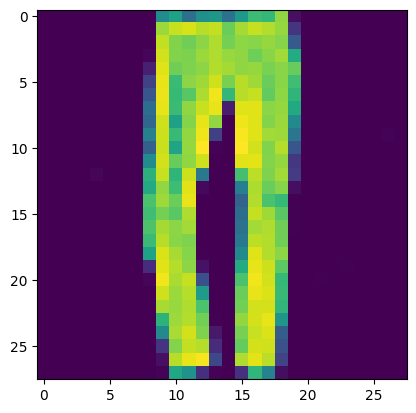

Dloss:  0.6315153
Gloss:  0.7826922
Dloss:  0.6315156
Gloss:  0.782708
Dloss:  0.63151413
Gloss:  0.7826972
Dloss:  0.6315151
Gloss:  0.782728
Dloss:  0.6315175
Gloss:  0.78270227
Dloss:  0.631523
Gloss:  0.78274447
Dloss:  0.6315258
Gloss:  0.7827154
Dloss:  0.6315302
Gloss:  0.7827551
Dloss:  0.63153344
Gloss:  0.7827345
Dloss:  0.63153446
Gloss:  0.78276306
Dloss:  0.63153577
Gloss:  0.7827552
Dloss:  0.6315368
Gloss:  0.7827685
Dloss:  0.6315351
Gloss:  0.7827707
Dloss:  0.6315363
Gloss:  0.78278196
Dloss:  0.6315403
Gloss:  0.78277785
Dloss:  0.6315416
Gloss:  0.7827943
Dloss:  0.63154274
Gloss:  0.7827921
Dloss:  0.63154376
Gloss:  0.7828056
Dloss:  0.63154256
Gloss:  0.7828044
Dloss:  0.631543
Gloss:  0.7828175
Dloss:  0.631544
Gloss:  0.7828146
Dloss:  0.63154405
Gloss:  0.78282624
Dloss:  0.6315433
Gloss:  0.7828271
Dloss:  0.63154393
Gloss:  0.78283477
Dloss:  0.6315439
Gloss:  0.78283644
Dloss:  0.63154316
Gloss:  0.78284556
Dloss:  0.6315439
Gloss:  0.78284407
Dloss:  0.631

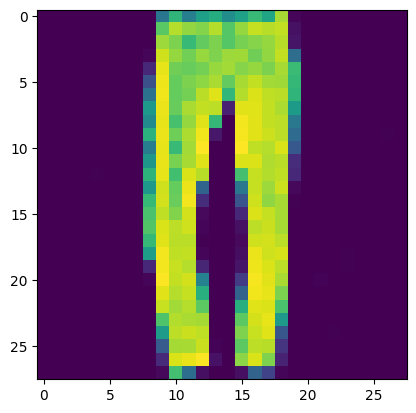

Dloss:  0.631548
Gloss:  0.78287816
Dloss:  0.63154745
Gloss:  0.78287166
Dloss:  0.63154787
Gloss:  0.7828874
Dloss:  0.63154817
Gloss:  0.7828819
Dloss:  0.63154936
Gloss:  0.78290087
Dloss:  0.63154984
Gloss:  0.7828893
Dloss:  0.6315515
Gloss:  0.78292
Dloss:  0.63155293
Gloss:  0.7828997
Dloss:  0.63155454
Gloss:  0.7829408
Dloss:  0.6315575
Gloss:  0.7829137
Dloss:  0.6315611
Gloss:  0.78297085
Dloss:  0.63156575
Gloss:  0.782939
Dloss:  0.6315722
Gloss:  0.78299206
Dloss:  0.63157827
Gloss:  0.782957
Dloss:  0.6315852
Gloss:  0.78300065
Dloss:  0.63159
Gloss:  0.78297997
Dloss:  0.63159245
Gloss:  0.7830165
Dloss:  0.6315947
Gloss:  0.78300214
Dloss:  0.6315941
Gloss:  0.78301907
Dloss:  0.63159436
Gloss:  0.78301704
Dloss:  0.6315949
Gloss:  0.7830298
Dloss:  0.6315935
Gloss:  0.78302765
Dloss:  0.63159543
Gloss:  0.78303957
Dloss:  0.6315943
Gloss:  0.7830393
Dloss:  0.6315935
Gloss:  0.78304935
Dloss:  0.63159215
Gloss:  0.783048
Dloss:  0.6315922
Gloss:  0.7830586
Dloss:  0.

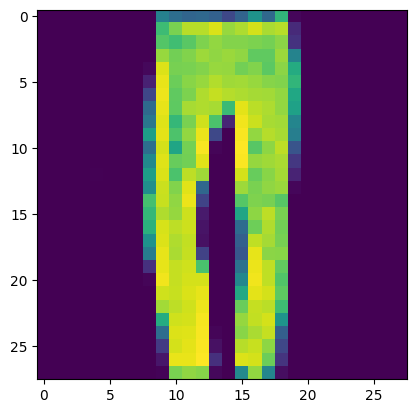

Dloss:  0.6315919
Gloss:  0.7830788
Dloss:  0.63159245
Gloss:  0.783076
Dloss:  0.6315932
Gloss:  0.7830944
Dloss:  0.6315941
Gloss:  0.7830835
Dloss:  0.6315939
Gloss:  0.78311676
Dloss:  0.6315954
Gloss:  0.7830922
Dloss:  0.6315992
Gloss:  0.78313947
Dloss:  0.6316031
Gloss:  0.78311366
Dloss:  0.63160694
Gloss:  0.7831515
Dloss:  0.63160807
Gloss:  0.78313607
Dloss:  0.63161045
Gloss:  0.7831602
Dloss:  0.63161236
Gloss:  0.7831526
Dloss:  0.6316118
Gloss:  0.7831659
Dloss:  0.63161266
Gloss:  0.7831618
Dloss:  0.63161314
Gloss:  0.7831795
55 / 100
Dloss:  0.63161284
Gloss:  0.7831724
55 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


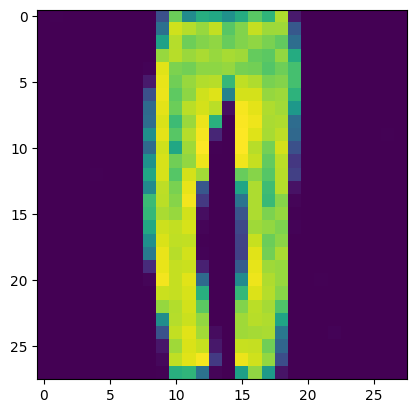

Dloss:  0.6316131
Gloss:  0.78319234
Dloss:  0.6316147
Gloss:  0.78318805
Dloss:  0.6316159
Gloss:  0.7832051
Dloss:  0.6316163
Gloss:  0.783199
Dloss:  0.6316172
Gloss:  0.78322387
Dloss:  0.6316176
Gloss:  0.78320825
Dloss:  0.63161993
Gloss:  0.7832356
Dloss:  0.63162255
Gloss:  0.7832178
Dloss:  0.6316252
Gloss:  0.7832434
Dloss:  0.6316265
Gloss:  0.78322417
Dloss:  0.63162917
Gloss:  0.78326106
Dloss:  0.6316314
Gloss:  0.7832392
Dloss:  0.6316333
Gloss:  0.78327644
Dloss:  0.6316352
Gloss:  0.7832548
Dloss:  0.631638
Gloss:  0.78329563
Dloss:  0.6316422
Gloss:  0.78326994
Dloss:  0.63164586
Gloss:  0.7833094
Dloss:  0.63164896
Gloss:  0.7832851
Dloss:  0.631651
Gloss:  0.7833152
Dloss:  0.6316521
Gloss:  0.7833022
Dloss:  0.63165504
Gloss:  0.78332734
Dloss:  0.6316557
Gloss:  0.7833166
Dloss:  0.6316557
Gloss:  0.78333485
Dloss:  0.6316585
Gloss:  0.78332907
Dloss:  0.6316588
Gloss:  0.78334934
Dloss:  0.63165975
Gloss:  0.7833481
Dloss:  0.63165975
Gloss:  0.7833657
Dloss:  0.

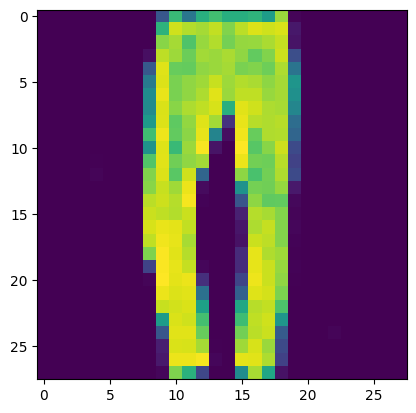

Dloss:  0.63166076
Gloss:  0.7833933
Dloss:  0.6316614
Gloss:  0.78338885
Dloss:  0.6316622
Gloss:  0.78340334
Dloss:  0.63166285
Gloss:  0.7833952
Dloss:  0.6316623
Gloss:  0.7834211
Dloss:  0.6316631
Gloss:  0.7834025
Dloss:  0.6316643
Gloss:  0.7834359
Dloss:  0.63166666
Gloss:  0.7834195
Dloss:  0.63166845
Gloss:  0.78345627
Dloss:  0.63167197
Gloss:  0.78343344
Dloss:  0.63167316
Gloss:  0.78347105
Dloss:  0.63167495
Gloss:  0.783451
Dloss:  0.63167864
Gloss:  0.78349084
Dloss:  0.6316813
Gloss:  0.7834733
Dloss:  0.63168406
Gloss:  0.78350127
Dloss:  0.6316877
Gloss:  0.7834876
Dloss:  0.6316901
Gloss:  0.7835094
Dloss:  0.63169146
Gloss:  0.78349787
Dloss:  0.6316925
Gloss:  0.78352094
Dloss:  0.63169295
Gloss:  0.78351116
Dloss:  0.6316936
Gloss:  0.7835297
Dloss:  0.63169485
Gloss:  0.7835244
Dloss:  0.63169855
Gloss:  0.78354305
Dloss:  0.6316989
Gloss:  0.78354007
Dloss:  0.6316989
Gloss:  0.7835535
Dloss:  0.63169783
Gloss:  0.7835536
Dloss:  0.6316983
Gloss:  0.78356785
Dl

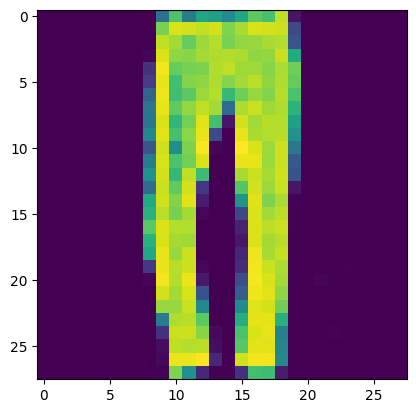

Dloss:  0.63170046
Gloss:  0.783606
Dloss:  0.63170373
Gloss:  0.78358364
Dloss:  0.6317064
Gloss:  0.7836293
Dloss:  0.6317077
Gloss:  0.7836017
Dloss:  0.63171065
Gloss:  0.7836524
Dloss:  0.6317151
Gloss:  0.7836224
Dloss:  0.63171875
Gloss:  0.7836669
Dloss:  0.63172394
Gloss:  0.78364396
Dloss:  0.631729
Gloss:  0.78367496
Dloss:  0.63173175
Gloss:  0.7836589
Dloss:  0.631734
Gloss:  0.783682
Dloss:  0.6317338
Gloss:  0.7836717
Dloss:  0.63173246
Gloss:  0.7836896
Dloss:  0.6317307
Gloss:  0.78368783
Dloss:  0.6317318
Gloss:  0.7837014
Dloss:  0.63173133
Gloss:  0.7836995
Dloss:  0.6317326
Gloss:  0.78371453
Dloss:  0.6317351
Gloss:  0.7837171
Dloss:  0.63173616
Gloss:  0.7837264
Dloss:  0.6317356
Gloss:  0.7837297
Dloss:  0.6317346
Gloss:  0.78374016
Dloss:  0.6317354
Gloss:  0.7837393
Dloss:  0.6317339
Gloss:  0.7837561
Dloss:  0.63173413
Gloss:  0.7837457
Dloss:  0.6317353
Gloss:  0.7837759
Dloss:  0.63173765
Gloss:  0.78374666
Dloss:  0.631744
Gloss:  0.7837995
Dloss:  0.63175

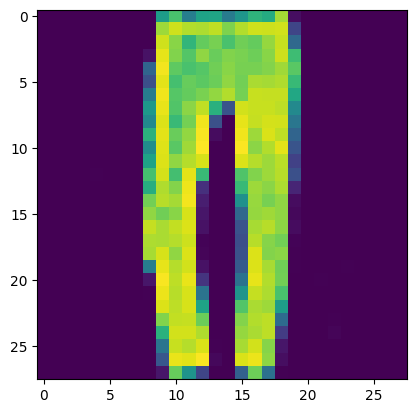

Dloss:  0.6317607
Gloss:  0.78382474
Dloss:  0.631762
Gloss:  0.7838175
Dloss:  0.6317619
Gloss:  0.78383374
Dloss:  0.6317622
Gloss:  0.7838324
Dloss:  0.63176286
Gloss:  0.7838447
Dloss:  0.63176316
Gloss:  0.7838408
Dloss:  0.6317628
Gloss:  0.78385407
Dloss:  0.63176244
Gloss:  0.78385293
Dloss:  0.63176125
Gloss:  0.7838655
Dloss:  0.6317617
Gloss:  0.7838637
Dloss:  0.6317602
Gloss:  0.78387386
Dloss:  0.631761
Gloss:  0.7838776
Dloss:  0.6317605
Gloss:  0.78388226
Dloss:  0.63176024
Gloss:  0.7838958
Dloss:  0.63176125
Gloss:  0.7838915
Dloss:  0.63176185
Gloss:  0.7839086
Dloss:  0.63175994
Gloss:  0.7839015
Dloss:  0.6317595
Gloss:  0.7839276
Dloss:  0.63175917
Gloss:  0.78391445
Dloss:  0.63176125
Gloss:  0.7839513
Dloss:  0.63176453
Gloss:  0.7839257
Dloss:  0.6317673
Gloss:  0.7839769
Dloss:  0.6317724
Gloss:  0.7839439
Dloss:  0.63177556
Gloss:  0.7839861
Dloss:  0.6317775
Gloss:  0.7839671
Dloss:  0.63177776
Gloss:  0.7839919
Dloss:  0.63178
Gloss:  0.78399444
Dloss:  0.6

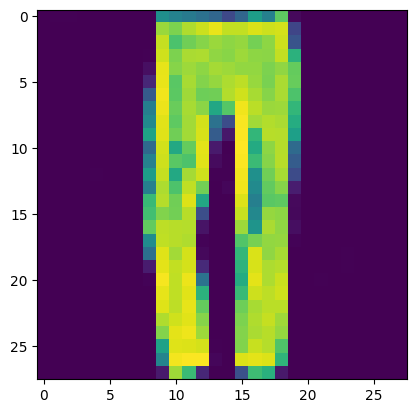

Dloss:  0.63178444
Gloss:  0.7840138
Dloss:  0.631785
Gloss:  0.78402394
Dloss:  0.63178486
Gloss:  0.7840256
Dloss:  0.63178384
Gloss:  0.7840408
Dloss:  0.63178277
Gloss:  0.78403455
Dloss:  0.63178366
Gloss:  0.7840583
Dloss:  0.63178456
Gloss:  0.7840453
Dloss:  0.63178474
Gloss:  0.78406596
Dloss:  0.63178504
Gloss:  0.7840504
Dloss:  0.6317868
Gloss:  0.78407544
Dloss:  0.6317887
Gloss:  0.7840642
Dloss:  0.6317902
Gloss:  0.78409344
Dloss:  0.631791
Gloss:  0.7840773
Dloss:  0.6317929
Gloss:  0.784104
Dloss:  0.63179415
Gloss:  0.7840963
56 / 100
Dloss:  0.63179487
Gloss:  0.7841159
56 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


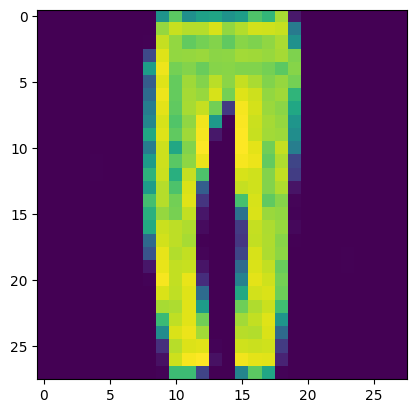

Dloss:  0.63179415
Gloss:  0.7841103
Dloss:  0.63179404
Gloss:  0.7841275
Dloss:  0.63179564
Gloss:  0.78412396
Dloss:  0.6317963
Gloss:  0.78414196
Dloss:  0.6317967
Gloss:  0.78413624
Dloss:  0.6317951
Gloss:  0.7841589
Dloss:  0.6317954
Gloss:  0.78414506
Dloss:  0.63179666
Gloss:  0.78417856
Dloss:  0.631799
Gloss:  0.7841539
Dloss:  0.6318026
Gloss:  0.78419197
Dloss:  0.6318044
Gloss:  0.7841762
Dloss:  0.6318055
Gloss:  0.7842012
Dloss:  0.6318073
Gloss:  0.7841879
Dloss:  0.63180894
Gloss:  0.7842159
Dloss:  0.6318115
Gloss:  0.78419656
Dloss:  0.6318136
Gloss:  0.78423
Dloss:  0.6318153
Gloss:  0.7842155
Dloss:  0.63181597
Gloss:  0.7842402
Dloss:  0.63181734
Gloss:  0.78423196
Dloss:  0.6318176
Gloss:  0.7842547
Dloss:  0.6318177
Gloss:  0.7842468
Dloss:  0.6318181
Gloss:  0.78426355
Dloss:  0.63181776
Gloss:  0.78426206
Dloss:  0.63181704
Gloss:  0.78427523
Dloss:  0.6318153
Gloss:  0.7842743
Dloss:  0.6318145
Gloss:  0.7842891
Dloss:  0.63181466
Gloss:  0.78429514
Dloss:  0

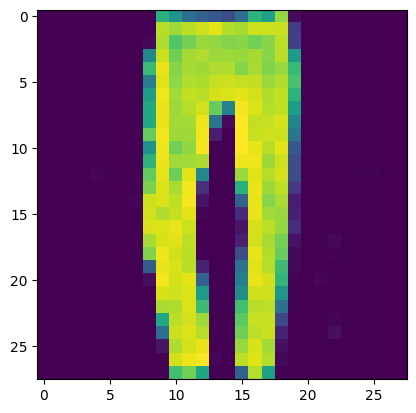

Dloss:  0.6318162
Gloss:  0.78432536
Dloss:  0.6318167
Gloss:  0.78432167
Dloss:  0.63181615
Gloss:  0.7843417
Dloss:  0.63181764
Gloss:  0.7843331
Dloss:  0.63181716
Gloss:  0.7843572
Dloss:  0.63181853
Gloss:  0.7843391
Dloss:  0.63182044
Gloss:  0.78437585
Dloss:  0.63182175
Gloss:  0.78435105
Dloss:  0.6318235
Gloss:  0.7843946
Dloss:  0.6318269
Gloss:  0.78437275
Dloss:  0.6318301
Gloss:  0.78441447
Dloss:  0.63183326
Gloss:  0.7843906
Dloss:  0.63183457
Gloss:  0.7844202
Dloss:  0.6318352
Gloss:  0.7844063
Dloss:  0.63183546
Gloss:  0.7844289
Dloss:  0.63183665
Gloss:  0.7844194
Dloss:  0.6318365
Gloss:  0.78443795
Dloss:  0.6318366
Gloss:  0.78443146
Dloss:  0.6318375
Gloss:  0.78445303
Dloss:  0.6318381
Gloss:  0.7844492
Dloss:  0.6318385
Gloss:  0.7844581
Dloss:  0.63183886
Gloss:  0.78446305
Dloss:  0.6318423
Gloss:  0.7844711
Dloss:  0.63184345
Gloss:  0.7844809
Dloss:  0.6318438
Gloss:  0.7844785
Dloss:  0.6318437
Gloss:  0.78449744
Dloss:  0.6318423
Gloss:  0.7844889
Dloss

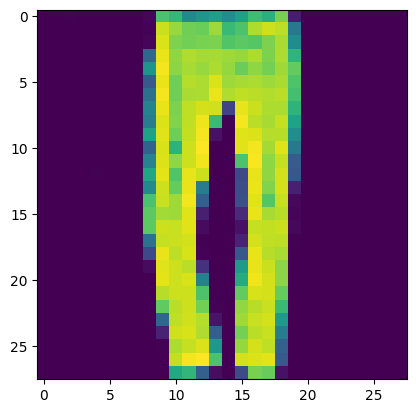

Dloss:  0.6318468
Gloss:  0.7845166
Dloss:  0.6318509
Gloss:  0.784565
Dloss:  0.6318541
Gloss:  0.7845364
Dloss:  0.63185954
Gloss:  0.78458536
Dloss:  0.63186437
Gloss:  0.78455865
Dloss:  0.63186735
Gloss:  0.7845885
Dloss:  0.631868
Gloss:  0.7845773
Dloss:  0.6318677
Gloss:  0.7845934
Dloss:  0.63186836
Gloss:  0.78459436
Dloss:  0.6318663
Gloss:  0.7845959
Dloss:  0.63186693
Gloss:  0.7846098
Dloss:  0.6318676
Gloss:  0.7846077
Dloss:  0.6318674
Gloss:  0.784625
Dloss:  0.63186556
Gloss:  0.78462076
Dloss:  0.63186795
Gloss:  0.78463584
Dloss:  0.6318678
Gloss:  0.7846317
Dloss:  0.6318692
Gloss:  0.784655
Dloss:  0.6318701
Gloss:  0.78464586
Dloss:  0.63186914
Gloss:  0.7846678
Dloss:  0.63186914
Gloss:  0.7846596
Dloss:  0.6318681
Gloss:  0.78468114
Dloss:  0.63186836
Gloss:  0.78466976
Dloss:  0.63186914
Gloss:  0.7847032
Dloss:  0.6318715
Gloss:  0.7846821
Dloss:  0.6318733
Gloss:  0.78472257
Dloss:  0.63187635
Gloss:  0.7847031
Dloss:  0.63187975
Gloss:  0.78473884
Dloss:  0

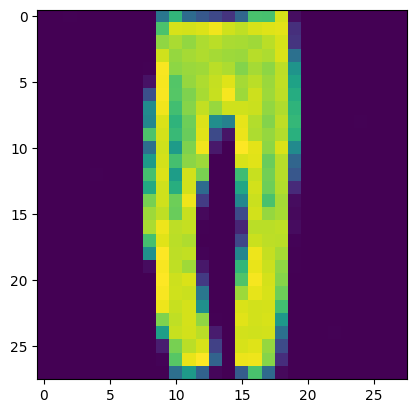

Dloss:  0.6318882
Gloss:  0.78476155
Dloss:  0.6318893
Gloss:  0.7847513
Dloss:  0.6318899
Gloss:  0.7847717
Dloss:  0.6318897
Gloss:  0.78476673
Dloss:  0.6318892
Gloss:  0.78478175
Dloss:  0.63188887
Gloss:  0.78478515
Dloss:  0.6318881
Gloss:  0.7847927
Dloss:  0.6318869
Gloss:  0.784799
Dloss:  0.631885
Gloss:  0.7848011
Dloss:  0.6318875
Gloss:  0.7848149
Dloss:  0.63188833
Gloss:  0.78481674
Dloss:  0.6318876
Gloss:  0.78482705
Dloss:  0.6318877
Gloss:  0.7848309
Dloss:  0.6318874
Gloss:  0.7848384
Dloss:  0.63188785
Gloss:  0.7848417
Dloss:  0.63188845
Gloss:  0.7848454
Dloss:  0.63188857
Gloss:  0.78485364
Dloss:  0.6318885
Gloss:  0.7848559
Dloss:  0.6318884
Gloss:  0.7848655
Dloss:  0.6318862
Gloss:  0.78486377
Dloss:  0.63188577
Gloss:  0.78487873
Dloss:  0.6318858
Gloss:  0.7848762
Dloss:  0.63188946
Gloss:  0.784895
Dloss:  0.6318888
Gloss:  0.7848894
Dloss:  0.63188815
Gloss:  0.7849127
Dloss:  0.6318866
Gloss:  0.78489614
Dloss:  0.6318899
Gloss:  0.7849557
Dloss:  0.631

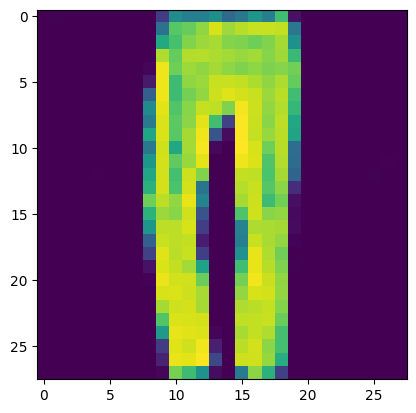

Dloss:  0.631916
Gloss:  0.7849935
Dloss:  0.63192034
Gloss:  0.7849777
Dloss:  0.6319229
Gloss:  0.78500164
Dloss:  0.6319239
Gloss:  0.78499097
Dloss:  0.6319236
Gloss:  0.785006
Dloss:  0.63192266
Gloss:  0.78500617
Dloss:  0.6319229
Gloss:  0.78502095
Dloss:  0.63192147
Gloss:  0.7850159
Dloss:  0.6319225
Gloss:  0.78503984
Dloss:  0.6319228
Gloss:  0.78504026
Dloss:  0.6319216
Gloss:  0.78504384
Dloss:  0.6319215
Gloss:  0.78505224
Dloss:  0.6319215
Gloss:  0.7850551
Dloss:  0.63192046
Gloss:  0.7850615
Dloss:  0.6319195
Gloss:  0.7850706
57 / 100
Dloss:  0.63191825
Gloss:  0.78506833
57 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


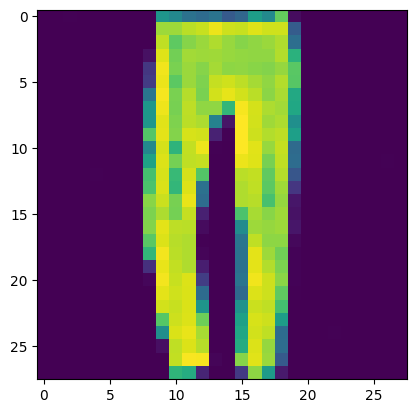

Dloss:  0.6319171
Gloss:  0.78509086
Dloss:  0.63191766
Gloss:  0.78507626
Dloss:  0.6319193
Gloss:  0.7851068
Dloss:  0.63192016
Gloss:  0.78508973
Dloss:  0.63192135
Gloss:  0.7851192
Dloss:  0.63192165
Gloss:  0.7851017
Dloss:  0.6319234
Gloss:  0.7851292
Dloss:  0.6319248
Gloss:  0.7851118
Dloss:  0.63192683
Gloss:  0.7851334
Dloss:  0.6319274
Gloss:  0.78512365
Dloss:  0.6319264
Gloss:  0.78514695
Dloss:  0.63192725
Gloss:  0.7851374
Dloss:  0.63192606
Gloss:  0.78515863
Dloss:  0.63192654
Gloss:  0.78515184
Dloss:  0.63192695
Gloss:  0.78517497
Dloss:  0.63192785
Gloss:  0.7851614
Dloss:  0.6319291
Gloss:  0.7851929
Dloss:  0.63193077
Gloss:  0.78517485
Dloss:  0.631933
Gloss:  0.78521556
Dloss:  0.63193446
Gloss:  0.78519
Dloss:  0.6319378
Gloss:  0.78524184
Dloss:  0.631941
Gloss:  0.7852149
Dloss:  0.63194495
Gloss:  0.78525513
Dloss:  0.63194823
Gloss:  0.7852319
Dloss:  0.6319496
Gloss:  0.7852741
Dloss:  0.63195264
Gloss:  0.785255
Dloss:  0.6319561
Gloss:  0.78528726
Dloss

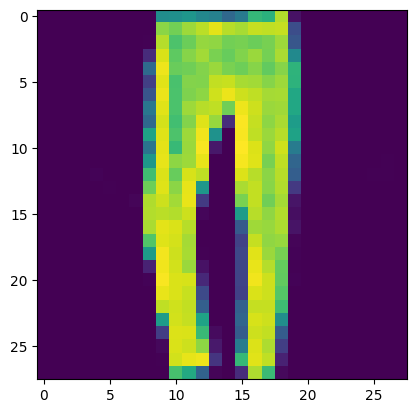

Dloss:  0.6319586
Gloss:  0.785302
Dloss:  0.63195926
Gloss:  0.7852961
Dloss:  0.6319593
Gloss:  0.7853123
Dloss:  0.6319597
Gloss:  0.7853114
Dloss:  0.63195896
Gloss:  0.78532684
Dloss:  0.6319584
Gloss:  0.7853182
Dloss:  0.63195807
Gloss:  0.7853375
Dloss:  0.6319562
Gloss:  0.7853292
Dloss:  0.6319555
Gloss:  0.7853525
Dloss:  0.63195586
Gloss:  0.78533626
Dloss:  0.63195544
Gloss:  0.78536516
Dloss:  0.6319554
Gloss:  0.78535104
Dloss:  0.631956
Gloss:  0.78537256
Dloss:  0.6319558
Gloss:  0.78536296
Dloss:  0.6319587
Gloss:  0.78539085
Dloss:  0.63196105
Gloss:  0.78537506
Dloss:  0.6319617
Gloss:  0.7854068
Dloss:  0.6319623
Gloss:  0.78538305
Dloss:  0.63196445
Gloss:  0.78542054
Dloss:  0.63196486
Gloss:  0.78540033
Dloss:  0.631968
Gloss:  0.7854328
Dloss:  0.6319695
Gloss:  0.7854143
Dloss:  0.6319726
Gloss:  0.7854421
Dloss:  0.6319746
Gloss:  0.7854316
Dloss:  0.6319748
Gloss:  0.7854499
Dloss:  0.63197327
Gloss:  0.7854448
Dloss:  0.631972
Gloss:  0.7854577
Dloss:  0.63

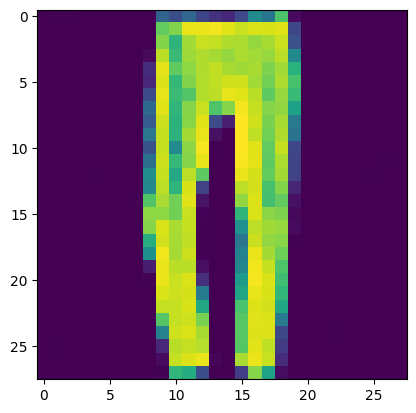

Dloss:  0.6319683
Gloss:  0.7854798
Dloss:  0.6319683
Gloss:  0.7854752
Dloss:  0.6319682
Gloss:  0.78549904
Dloss:  0.6319673
Gloss:  0.7854797
Dloss:  0.63196844
Gloss:  0.7855194
Dloss:  0.63197154
Gloss:  0.7854891
Dloss:  0.63197625
Gloss:  0.785543
Dloss:  0.63198304
Gloss:  0.7855107
Dloss:  0.6319881
Gloss:  0.7855608
Dloss:  0.6319916
Gloss:  0.7855393
Dloss:  0.63199264
Gloss:  0.7855609
Dloss:  0.63199246
Gloss:  0.7855532
Dloss:  0.6319945
Gloss:  0.78557265
Dloss:  0.6319947
Gloss:  0.78556496
Dloss:  0.6319961
Gloss:  0.78557664
Dloss:  0.6319953
Gloss:  0.7855793
Dloss:  0.63199466
Gloss:  0.7855847
Dloss:  0.63199365
Gloss:  0.7855951
Dloss:  0.6319928
Gloss:  0.78559875
Dloss:  0.63199276
Gloss:  0.78560346
Dloss:  0.63199306
Gloss:  0.78560966
Dloss:  0.6319946
Gloss:  0.7856132
Dloss:  0.6319949
Gloss:  0.7856189
Dloss:  0.63199455
Gloss:  0.78562415
Dloss:  0.63199323
Gloss:  0.7856332
Dloss:  0.63199395
Gloss:  0.7856419
Dloss:  0.63199353
Gloss:  0.7856459
Dloss: 

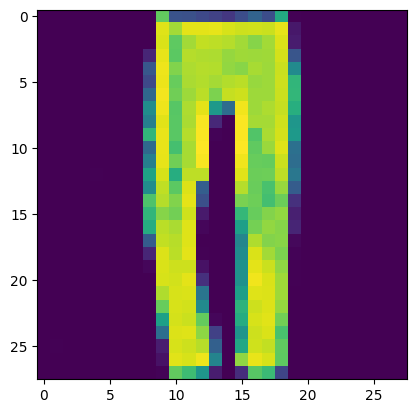

Dloss:  0.63199013
Gloss:  0.78566605
Dloss:  0.6319885
Gloss:  0.7856674
Dloss:  0.63198715
Gloss:  0.7856735
Dloss:  0.63198656
Gloss:  0.78567594
Dloss:  0.6319871
Gloss:  0.7856897
Dloss:  0.63198847
Gloss:  0.78567946
Dloss:  0.6319923
Gloss:  0.78571767
Dloss:  0.63199496
Gloss:  0.78568697
Dloss:  0.6319995
Gloss:  0.7857505
Dloss:  0.6320065
Gloss:  0.7857164
Dloss:  0.6320124
Gloss:  0.785763
Dloss:  0.63201725
Gloss:  0.78574276
Dloss:  0.6320195
Gloss:  0.78576785
Dloss:  0.6320215
Gloss:  0.78575486
Dloss:  0.6320225
Gloss:  0.7857709
Dloss:  0.63202286
Gloss:  0.7857705
Dloss:  0.632023
Gloss:  0.78577924
Dloss:  0.6320219
Gloss:  0.78578174
Dloss:  0.63202065
Gloss:  0.7857917
Dloss:  0.6320199
Gloss:  0.78579015
Dloss:  0.63202053
Gloss:  0.78580993
Dloss:  0.63202107
Gloss:  0.7858011
Dloss:  0.63202244
Gloss:  0.7858199
Dloss:  0.63202167
Gloss:  0.7858099
Dloss:  0.6320206
Gloss:  0.78582317
Dloss:  0.632018
Gloss:  0.7858209
Dloss:  0.63201785
Gloss:  0.7858369
Dloss

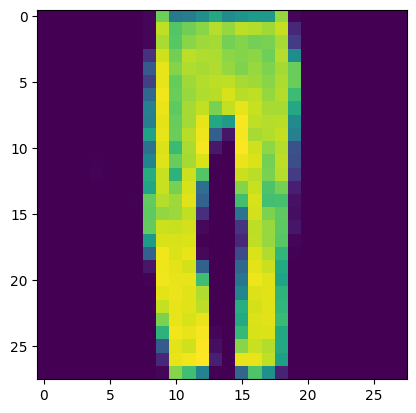

Dloss:  0.6320181
Gloss:  0.7858631
Dloss:  0.63201874
Gloss:  0.7858596
Dloss:  0.63201845
Gloss:  0.7858794
Dloss:  0.6320181
Gloss:  0.78586495
Dloss:  0.63201725
Gloss:  0.7858968
Dloss:  0.6320184
Gloss:  0.7858672
Dloss:  0.6320235
Gloss:  0.78593254
Dloss:  0.632031
Gloss:  0.7858963
Dloss:  0.6320394
Gloss:  0.78595454
Dloss:  0.6320446
Gloss:  0.78592825
Dloss:  0.6320485
Gloss:  0.7859644
Dloss:  0.6320517
Gloss:  0.7859553
Dloss:  0.6320519
Gloss:  0.7859685
Dloss:  0.63205194
Gloss:  0.78596765
Dloss:  0.6320521
Gloss:  0.7859824
58 / 100
Dloss:  0.63205326
Gloss:  0.78597736
58 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


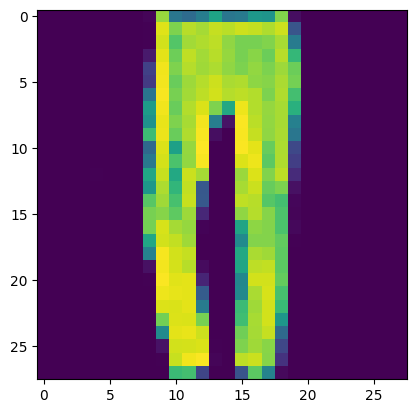

Dloss:  0.63205314
Gloss:  0.78598934
Dloss:  0.63205427
Gloss:  0.7859904
Dloss:  0.6320541
Gloss:  0.7859977
Dloss:  0.63205296
Gloss:  0.7860058
Dloss:  0.63205105
Gloss:  0.7860074
Dloss:  0.6320501
Gloss:  0.7860206
Dloss:  0.6320501
Gloss:  0.7860148
Dloss:  0.6320495
Gloss:  0.7860338
Dloss:  0.6320501
Gloss:  0.7860248
Dloss:  0.63205105
Gloss:  0.7860474
Dloss:  0.63205016
Gloss:  0.7860394
Dloss:  0.63205
Gloss:  0.78606284
Dloss:  0.6320517
Gloss:  0.78605276
Dloss:  0.63205165
Gloss:  0.78607875
Dloss:  0.6320521
Gloss:  0.78606176
Dloss:  0.6320531
Gloss:  0.7860909
Dloss:  0.6320538
Gloss:  0.78607684
Dloss:  0.6320533
Gloss:  0.78609914
Dloss:  0.63205403
Gloss:  0.7860864
Dloss:  0.6320551
Gloss:  0.78612256
Dloss:  0.63205534
Gloss:  0.78610116
Dloss:  0.6320572
Gloss:  0.78613406
Dloss:  0.6320589
Gloss:  0.7861192
Dloss:  0.6320608
Gloss:  0.7861431
Dloss:  0.63205993
Gloss:  0.78613585
Dloss:  0.6320599
Gloss:  0.78615797
Dloss:  0.6320607
Gloss:  0.7861501
Dloss:  

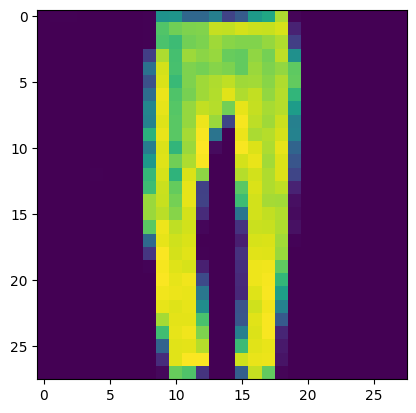

Dloss:  0.63206184
Gloss:  0.7861769
Dloss:  0.63206327
Gloss:  0.78619087
Dloss:  0.632063
Gloss:  0.7861848
Dloss:  0.6320621
Gloss:  0.7862016
Dloss:  0.63206136
Gloss:  0.7861976
Dloss:  0.63205934
Gloss:  0.78621507
Dloss:  0.6320585
Gloss:  0.78620905
Dloss:  0.6320575
Gloss:  0.7862367
Dloss:  0.63205713
Gloss:  0.7862207
Dloss:  0.63205963
Gloss:  0.7862562
Dloss:  0.6320594
Gloss:  0.78623843
Dloss:  0.6320603
Gloss:  0.7862779
Dloss:  0.63206327
Gloss:  0.78625476
Dloss:  0.6320664
Gloss:  0.7862895
Dloss:  0.63206905
Gloss:  0.78627205
Dloss:  0.6320724
Gloss:  0.78629977
Dloss:  0.63207453
Gloss:  0.7862848
Dloss:  0.6320751
Gloss:  0.78630906
Dloss:  0.63207465
Gloss:  0.7862944
Dloss:  0.63207453
Gloss:  0.78632474
Dloss:  0.63207656
Gloss:  0.78631103
Dloss:  0.6320773
Gloss:  0.78633946
Dloss:  0.63207906
Gloss:  0.7863315
Dloss:  0.6320794
Gloss:  0.78635395
Dloss:  0.63208
Gloss:  0.7863463
Dloss:  0.6320782
Gloss:  0.78636205
Dloss:  0.6320774
Gloss:  0.7863582
Dloss

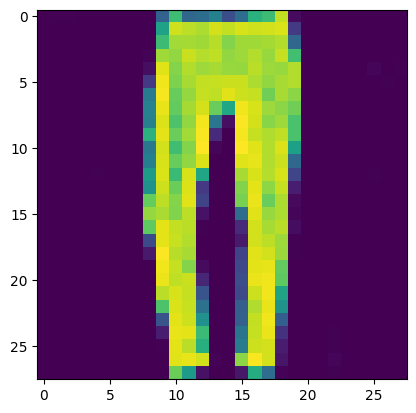

Dloss:  0.63207656
Gloss:  0.7863829
Dloss:  0.63207835
Gloss:  0.78639394
Dloss:  0.6320774
Gloss:  0.7863952
Dloss:  0.6320755
Gloss:  0.7863995
Dloss:  0.6320731
Gloss:  0.78640467
Dloss:  0.63207144
Gloss:  0.7864109
Dloss:  0.6320697
Gloss:  0.78642124
Dloss:  0.6320692
Gloss:  0.7864255
Dloss:  0.6320681
Gloss:  0.7864305
Dloss:  0.6320669
Gloss:  0.7864395
Dloss:  0.6320666
Gloss:  0.78643936
Dloss:  0.63206655
Gloss:  0.7864554
Dloss:  0.63206536
Gloss:  0.7864536
Dloss:  0.63206416
Gloss:  0.7864708
Dloss:  0.6320641
Gloss:  0.78646046
Dloss:  0.63206285
Gloss:  0.786498
Dloss:  0.6320639
Gloss:  0.7864716
Dloss:  0.6320677
Gloss:  0.7865329
Dloss:  0.6320736
Gloss:  0.7864953
Dloss:  0.63208145
Gloss:  0.78655523
Dloss:  0.63208973
Gloss:  0.7865256
Dloss:  0.63209546
Gloss:  0.78656596
Dloss:  0.6320962
Gloss:  0.7865533
Dloss:  0.6320968
Gloss:  0.7865735
Dloss:  0.63209784
Gloss:  0.78657204
Dloss:  0.6320986
Gloss:  0.78658843
Dloss:  0.6320998
Gloss:  0.7865835
Dloss:  0

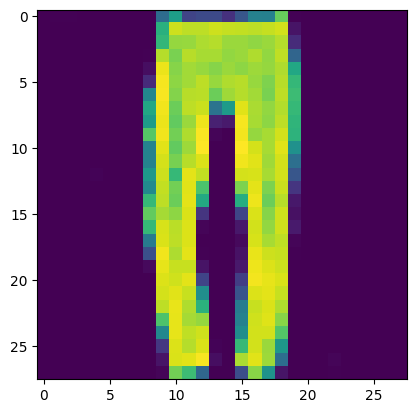

Dloss:  0.63209844
Gloss:  0.78662187
Dloss:  0.6320962
Gloss:  0.7866309
Dloss:  0.63209444
Gloss:  0.78663427
Dloss:  0.6320938
Gloss:  0.7866431
Dloss:  0.63209313
Gloss:  0.7866427
Dloss:  0.63209367
Gloss:  0.7866506
Dloss:  0.63209397
Gloss:  0.78665304
Dloss:  0.63209283
Gloss:  0.7866588
Dloss:  0.63209134
Gloss:  0.78666073
Dloss:  0.63209194
Gloss:  0.7866704
Dloss:  0.63209164
Gloss:  0.78667045
Dloss:  0.63208926
Gloss:  0.78668416
Dloss:  0.63208896
Gloss:  0.786684
Dloss:  0.6320889
Gloss:  0.7867038
Dloss:  0.6320913
Gloss:  0.7866914
Dloss:  0.63209265
Gloss:  0.78672725
Dloss:  0.6320936
Gloss:  0.7867057
Dloss:  0.63209504
Gloss:  0.78675604
Dloss:  0.6320988
Gloss:  0.7867261
Dloss:  0.6321034
Gloss:  0.7867768
Dloss:  0.63210934
Gloss:  0.786752
Dloss:  0.6321116
Gloss:  0.786795
Dloss:  0.63211673
Gloss:  0.7867708
Dloss:  0.6321183
Gloss:  0.78681105
Dloss:  0.63212055
Gloss:  0.7867974
Dloss:  0.6321198
Gloss:  0.78681934
Dloss:  0.6321207
Gloss:  0.78681254
Dlos

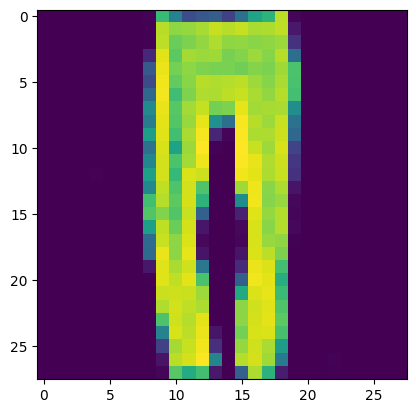

Dloss:  0.63212436
Gloss:  0.7868427
Dloss:  0.6321244
Gloss:  0.78686047
Dloss:  0.6321237
Gloss:  0.78685963
Dloss:  0.6321242
Gloss:  0.7868719
Dloss:  0.6321228
Gloss:  0.78687435
Dloss:  0.6321219
Gloss:  0.7868873
Dloss:  0.632122
Gloss:  0.786887
Dloss:  0.6321218
Gloss:  0.7869056
Dloss:  0.6321221
Gloss:  0.78689647
Dloss:  0.6321212
Gloss:  0.7869268
Dloss:  0.6321216
Gloss:  0.7869184
Dloss:  0.63212144
Gloss:  0.78694427
Dloss:  0.6321209
Gloss:  0.7869363
Dloss:  0.632121
Gloss:  0.78696
Dloss:  0.63211954
Gloss:  0.78695095
59 / 100
Dloss:  0.6321193
Gloss:  0.78697234
59 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


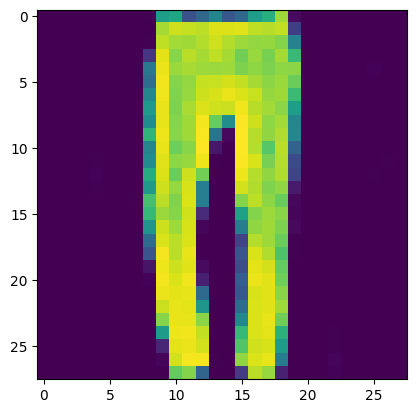

Dloss:  0.63211846
Gloss:  0.7869675
Dloss:  0.6321218
Gloss:  0.7869968
Dloss:  0.632125
Gloss:  0.7869781
Dloss:  0.63212585
Gloss:  0.78701705
Dloss:  0.63212645
Gloss:  0.7869985
Dloss:  0.6321271
Gloss:  0.7870389
Dloss:  0.6321302
Gloss:  0.7870177
Dloss:  0.63213366
Gloss:  0.78705406
Dloss:  0.6321376
Gloss:  0.7870333
Dloss:  0.6321401
Gloss:  0.7870641
Dloss:  0.63213986
Gloss:  0.78705543
Dloss:  0.6321394
Gloss:  0.78707427
Dloss:  0.6321397
Gloss:  0.7870722
Dloss:  0.63213974
Gloss:  0.78708655
Dloss:  0.63214093
Gloss:  0.7870913
Dloss:  0.6321407
Gloss:  0.7870925
Dloss:  0.63213956
Gloss:  0.78710616
Dloss:  0.632137
Gloss:  0.7871008
Dloss:  0.6321349
Gloss:  0.78711826
Dloss:  0.63213456
Gloss:  0.7871222
Dloss:  0.63213545
Gloss:  0.78713924
Dloss:  0.63213587
Gloss:  0.78713745
Dloss:  0.6321353
Gloss:  0.7871499
Dloss:  0.6321352
Gloss:  0.78714466
Dloss:  0.6321332
Gloss:  0.7871709
Dloss:  0.6321316
Gloss:  0.7871586
Dloss:  0.6321323
Gloss:  0.78718996
Dloss:  

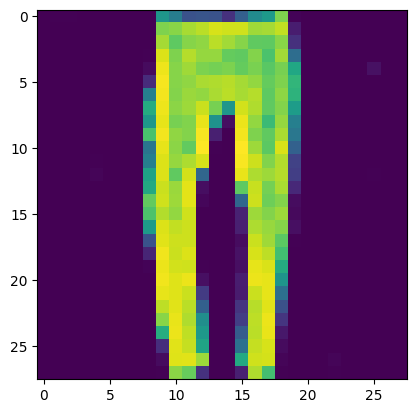

Dloss:  0.6321325
Gloss:  0.787228
Dloss:  0.6321336
Gloss:  0.7872146
Dloss:  0.63213533
Gloss:  0.78725445
Dloss:  0.63213724
Gloss:  0.78723353
Dloss:  0.63213813
Gloss:  0.7872765
Dloss:  0.6321408
Gloss:  0.7872499
Dloss:  0.6321467
Gloss:  0.78730094
Dloss:  0.63214964
Gloss:  0.7872764
Dloss:  0.63215184
Gloss:  0.78731304
Dloss:  0.63215405
Gloss:  0.7872968
Dloss:  0.6321539
Gloss:  0.78732675
Dloss:  0.63215363
Gloss:  0.7873137
Dloss:  0.63215446
Gloss:  0.7873357
Dloss:  0.6321542
Gloss:  0.78732747
Dloss:  0.6321547
Gloss:  0.78734833
Dloss:  0.6321563
Gloss:  0.78734356
Dloss:  0.6321561
Gloss:  0.78735703
Dloss:  0.63215506
Gloss:  0.78735554
Dloss:  0.63215375
Gloss:  0.78736466
Dloss:  0.63215196
Gloss:  0.78736746
Dloss:  0.6321519
Gloss:  0.7873729
Dloss:  0.63215035
Gloss:  0.7873745
Dloss:  0.6321502
Gloss:  0.78738284
Dloss:  0.6321487
Gloss:  0.78739214
Dloss:  0.6321484
Gloss:  0.7873948
Dloss:  0.63214606
Gloss:  0.78739893
Dloss:  0.63214564
Gloss:  0.7874059


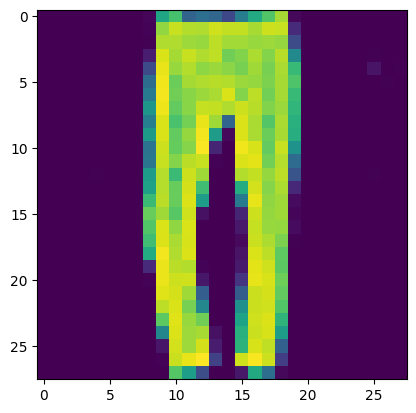

Dloss:  0.6321428
Gloss:  0.7874249
Dloss:  0.6321419
Gloss:  0.78744274
Dloss:  0.63214225
Gloss:  0.78743577
Dloss:  0.6321449
Gloss:  0.7874596
Dloss:  0.63214636
Gloss:  0.78743917
Dloss:  0.63214964
Gloss:  0.78748184
Dloss:  0.63215137
Gloss:  0.78745466
Dloss:  0.63215566
Gloss:  0.78749937
Dloss:  0.63215786
Gloss:  0.7874765
Dloss:  0.6321602
Gloss:  0.78751445
Dloss:  0.6321626
Gloss:  0.78749734
Dloss:  0.6321643
Gloss:  0.787525
Dloss:  0.6321655
Gloss:  0.7875148
Dloss:  0.632165
Gloss:  0.78753626
Dloss:  0.6321665
Gloss:  0.78752726
Dloss:  0.6321655
Gloss:  0.78754926
Dloss:  0.632165
Gloss:  0.787541
Dloss:  0.63216496
Gloss:  0.7875616
Dloss:  0.6321663
Gloss:  0.78755486
Dloss:  0.63216734
Gloss:  0.78757477
Dloss:  0.632168
Gloss:  0.7875667
Dloss:  0.6321687
Gloss:  0.7875809
Dloss:  0.6321673
Gloss:  0.7875814
Dloss:  0.6321666
Gloss:  0.7875896
Dloss:  0.6321664
Gloss:  0.7875956
Dloss:  0.6321655
Gloss:  0.78759915
Dloss:  0.63216555
Gloss:  0.7876063
Dloss:  0.

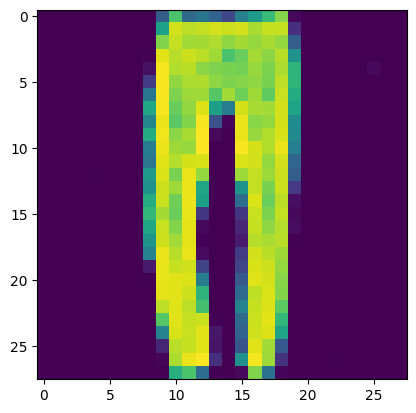

Dloss:  0.63216275
Gloss:  0.78763914
Dloss:  0.63216287
Gloss:  0.7876244
Dloss:  0.6321622
Gloss:  0.7876534
Dloss:  0.63216364
Gloss:  0.7876362
Dloss:  0.63216555
Gloss:  0.78767216
Dloss:  0.63216734
Gloss:  0.78764725
Dloss:  0.63216954
Gloss:  0.7876884
Dloss:  0.63217175
Gloss:  0.78766924
Dloss:  0.6321725
Gloss:  0.7877017
Dloss:  0.6321745
Gloss:  0.7876835
Dloss:  0.63217705
Gloss:  0.7877128
Dloss:  0.63217884
Gloss:  0.78769976
Dloss:  0.63217974
Gloss:  0.78772223
Dloss:  0.63218284
Gloss:  0.7877108
Dloss:  0.6321857
Gloss:  0.78772515
Dloss:  0.6321852
Gloss:  0.78772044
Dloss:  0.6321822
Gloss:  0.78773355
Dloss:  0.63218045
Gloss:  0.78773344
Dloss:  0.6321785
Gloss:  0.7877467
Dloss:  0.632178
Gloss:  0.787746
Dloss:  0.6321786
Gloss:  0.7877625
Dloss:  0.63217723
Gloss:  0.7877587
Dloss:  0.6321768
Gloss:  0.7877703
Dloss:  0.632175
Gloss:  0.78776336
Dloss:  0.6321748
Gloss:  0.7877801
Dloss:  0.6321733
Gloss:  0.7877682
Dloss:  0.6321733
Gloss:  0.7877904
Dloss: 

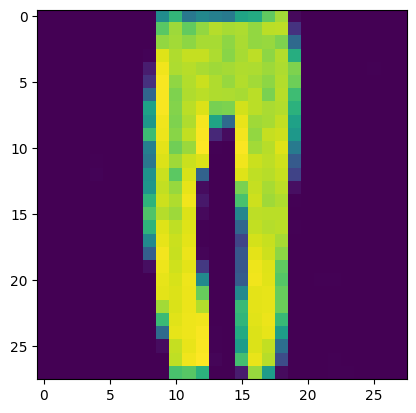

Dloss:  0.63217545
Gloss:  0.78782487
Dloss:  0.6321778
Gloss:  0.7878085
Dloss:  0.63217956
Gloss:  0.787843
Dloss:  0.6321816
Gloss:  0.7878268
Dloss:  0.6321829
Gloss:  0.7878614
Dloss:  0.63218385
Gloss:  0.7878428
Dloss:  0.6321852
Gloss:  0.78787875
Dloss:  0.63218623
Gloss:  0.7878589
Dloss:  0.6321887
Gloss:  0.787897
Dloss:  0.6321914
Gloss:  0.7878878
Dloss:  0.6321925
Gloss:  0.78790957
Dloss:  0.6321927
Gloss:  0.7879065
Dloss:  0.63219184
Gloss:  0.7879176
Dloss:  0.63219017
Gloss:  0.78792065
Dloss:  0.6321882
Gloss:  0.7879299
60 / 100
Dloss:  0.6321875
Gloss:  0.7879346
60 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


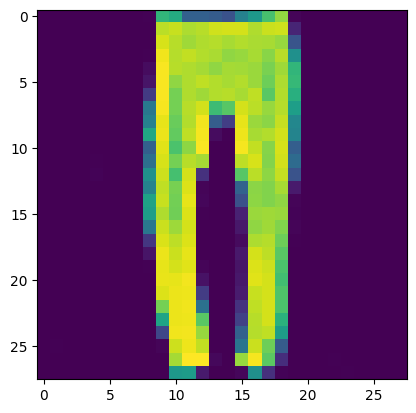

Dloss:  0.6321866
Gloss:  0.78794247
Dloss:  0.63218635
Gloss:  0.78794736
Dloss:  0.63218635
Gloss:  0.7879544
Dloss:  0.6321847
Gloss:  0.7879681
Dloss:  0.6321841
Gloss:  0.78797346
Dloss:  0.6321833
Gloss:  0.78798586
Dloss:  0.63218325
Gloss:  0.7879813
Dloss:  0.63218445
Gloss:  0.7880041
Dloss:  0.63218606
Gloss:  0.7879923
Dloss:  0.6321873
Gloss:  0.78802055
Dloss:  0.63218653
Gloss:  0.7880156
Dloss:  0.63218546
Gloss:  0.7880342
Dloss:  0.6321843
Gloss:  0.78802913
Dloss:  0.6321837
Gloss:  0.7880513
Dloss:  0.63218397
Gloss:  0.7880433
Dloss:  0.6321845
Gloss:  0.7880736
Dloss:  0.6321863
Gloss:  0.78806055
Dloss:  0.632187
Gloss:  0.7880986
Dloss:  0.63218915
Gloss:  0.78807205
Dloss:  0.6321923
Gloss:  0.7881292
Dloss:  0.63219666
Gloss:  0.78810394
Dloss:  0.63219815
Gloss:  0.78814095
Dloss:  0.63220036
Gloss:  0.788125
Dloss:  0.632201
Gloss:  0.7881511
Dloss:  0.6322003
Gloss:  0.78814214
Dloss:  0.6322015
Gloss:  0.78816706
Dloss:  0.63220257
Gloss:  0.78815526
Dloss

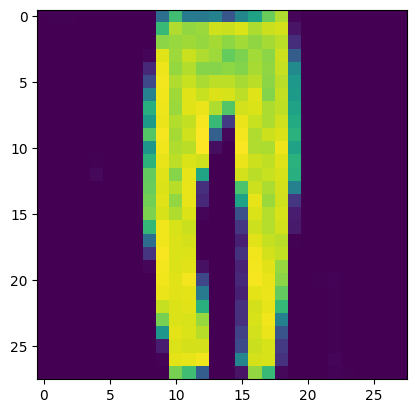

Dloss:  0.6322045
Gloss:  0.7881891
Dloss:  0.6322034
Gloss:  0.7881941
Dloss:  0.6322032
Gloss:  0.7881964
Dloss:  0.632203
Gloss:  0.7882046
Dloss:  0.6322018
Gloss:  0.7882051
Dloss:  0.6322005
Gloss:  0.78821635
Dloss:  0.6321995
Gloss:  0.78821665
Dloss:  0.63219744
Gloss:  0.78823066
Dloss:  0.6321944
Gloss:  0.7882264
Dloss:  0.6321939
Gloss:  0.7882418
Dloss:  0.63219166
Gloss:  0.7882437
Dloss:  0.63219
Gloss:  0.788269
Dloss:  0.63218945
Gloss:  0.7882509
Dloss:  0.6321911
Gloss:  0.7883074
Dloss:  0.6321974
Gloss:  0.78826874
Dloss:  0.63220865
Gloss:  0.7883445
Dloss:  0.63222015
Gloss:  0.78830725
Dloss:  0.6322284
Gloss:  0.7883485
Dloss:  0.63223356
Gloss:  0.7883351
Dloss:  0.6322342
Gloss:  0.7883559
Dloss:  0.63223475
Gloss:  0.78834903
Dloss:  0.6322333
Gloss:  0.7883634
Dloss:  0.6322331
Gloss:  0.7883624
Dloss:  0.6322325
Gloss:  0.7883804
Dloss:  0.63223106
Gloss:  0.78837645
Dloss:  0.63223004
Gloss:  0.7883942
Dloss:  0.6322304
Gloss:  0.7883935
Dloss:  0.632230

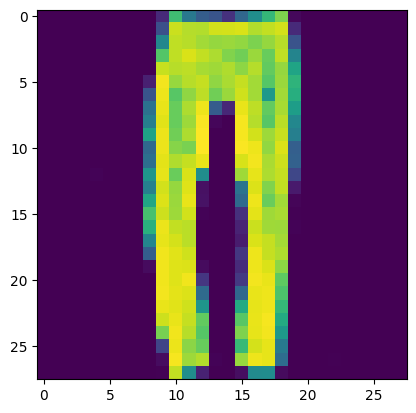

Dloss:  0.63223034
Gloss:  0.788425
Dloss:  0.6322304
Gloss:  0.7884347
Dloss:  0.6322281
Gloss:  0.788447
Dloss:  0.6322259
Gloss:  0.7884508
Dloss:  0.6322256
Gloss:  0.78846633
Dloss:  0.63222593
Gloss:  0.7884602
Dloss:  0.6322252
Gloss:  0.7884797
Dloss:  0.63222516
Gloss:  0.78846955
Dloss:  0.6322263
Gloss:  0.7884995
Dloss:  0.63222635
Gloss:  0.7884833
Dloss:  0.6322263
Gloss:  0.7885115
Dloss:  0.6322267
Gloss:  0.7884971
Dloss:  0.63222605
Gloss:  0.78852564
Dloss:  0.63222754
Gloss:  0.7885112
Dloss:  0.63222927
Gloss:  0.78853536
Dloss:  0.63222915
Gloss:  0.78852004
Dloss:  0.6322307
Gloss:  0.7885526
Dloss:  0.6322323
Gloss:  0.78853446
Dloss:  0.632235
Gloss:  0.78857523
Dloss:  0.6322358
Gloss:  0.78854895
Dloss:  0.6322394
Gloss:  0.78859466
Dloss:  0.63224405
Gloss:  0.78857094
Dloss:  0.63224554
Gloss:  0.788605
Dloss:  0.6322477
Gloss:  0.78859663
Dloss:  0.63224846
Gloss:  0.78861386
Dloss:  0.6322479
Gloss:  0.7886121
Dloss:  0.63225067
Gloss:  0.78863055
Dloss: 

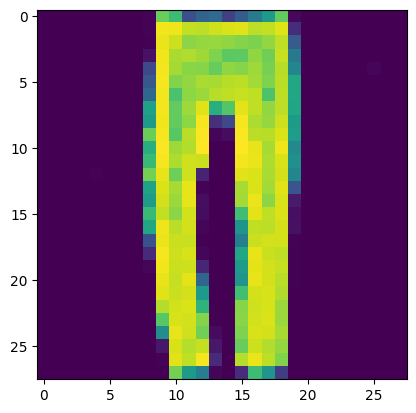

Dloss:  0.6322485
Gloss:  0.7886575
Dloss:  0.63224894
Gloss:  0.7886596
Dloss:  0.6322476
Gloss:  0.78867
Dloss:  0.63224673
Gloss:  0.7886732
Dloss:  0.63224465
Gloss:  0.78868127
Dloss:  0.6322421
Gloss:  0.7886855
Dloss:  0.6322409
Gloss:  0.7886904
Dloss:  0.63223875
Gloss:  0.7887002
Dloss:  0.6322361
Gloss:  0.7887039
Dloss:  0.6322336
Gloss:  0.78870946
Dloss:  0.6322329
Gloss:  0.78871673
Dloss:  0.63223237
Gloss:  0.78871435
Dloss:  0.6322327
Gloss:  0.78872544
Dloss:  0.63223267
Gloss:  0.7887234
Dloss:  0.6322344
Gloss:  0.7887392
Dloss:  0.6322342
Gloss:  0.78873456
Dloss:  0.63223296
Gloss:  0.7887543
Dloss:  0.63223106
Gloss:  0.7887442
Dloss:  0.63223076
Gloss:  0.7887709
Dloss:  0.63223076
Gloss:  0.78875244
Dloss:  0.63223124
Gloss:  0.78878534
Dloss:  0.6322317
Gloss:  0.78876925
Dloss:  0.63223493
Gloss:  0.7888067
Dloss:  0.6322375
Gloss:  0.7887802
Dloss:  0.63224286
Gloss:  0.788824
Dloss:  0.6322454
Gloss:  0.7887971
Dloss:  0.6322501
Gloss:  0.7888358
Dloss:  0

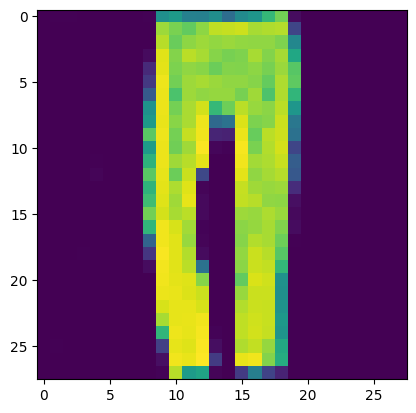

Dloss:  0.6322565
Gloss:  0.7888524
Dloss:  0.63225716
Gloss:  0.7888458
Dloss:  0.6322571
Gloss:  0.78886384
Dloss:  0.6322575
Gloss:  0.78886014
Dloss:  0.6322564
Gloss:  0.7888722
Dloss:  0.6322561
Gloss:  0.78886974
Dloss:  0.63225555
Gloss:  0.7888802
Dloss:  0.632254
Gloss:  0.7888747
Dloss:  0.6322535
Gloss:  0.78888816
Dloss:  0.6322507
Gloss:  0.78888875
Dloss:  0.63224757
Gloss:  0.7888974
Dloss:  0.63224536
Gloss:  0.788902
Dloss:  0.63224477
Gloss:  0.7889068
Dloss:  0.63224494
Gloss:  0.7889079
Dloss:  0.6322443
Gloss:  0.788922
61 / 100
Dloss:  0.6322443
Gloss:  0.78891855
61 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


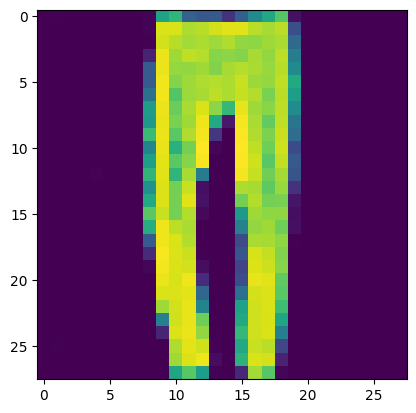

Dloss:  0.6322435
Gloss:  0.78893363
Dloss:  0.6322432
Gloss:  0.7889328
Dloss:  0.63224286
Gloss:  0.7889439
Dloss:  0.63224334
Gloss:  0.788947
Dloss:  0.6322427
Gloss:  0.7889572
Dloss:  0.632241
Gloss:  0.7889606
Dloss:  0.63223964
Gloss:  0.7889676
Dloss:  0.6322404
Gloss:  0.7889749
Dloss:  0.63224113
Gloss:  0.78898764
Dloss:  0.63224065
Gloss:  0.788987
Dloss:  0.63223857
Gloss:  0.7890139
Dloss:  0.6322375
Gloss:  0.78900784
Dloss:  0.63223696
Gloss:  0.78903174
Dloss:  0.6322377
Gloss:  0.7890149
Dloss:  0.63223827
Gloss:  0.789052
Dloss:  0.6322394
Gloss:  0.78902346
Dloss:  0.632242
Gloss:  0.78907615
Dloss:  0.6322463
Gloss:  0.7890399
Dloss:  0.6322526
Gloss:  0.78909826
Dloss:  0.63225716
Gloss:  0.78906983
Dloss:  0.63225967
Gloss:  0.78910893
Dloss:  0.6322611
Gloss:  0.7890948
Dloss:  0.63226163
Gloss:  0.7891111
Dloss:  0.6322625
Gloss:  0.7891063
Dloss:  0.6322606
Gloss:  0.78913
Dloss:  0.63225996
Gloss:  0.7891202
Dloss:  0.6322603
Gloss:  0.7891453
Dloss:  0.6322

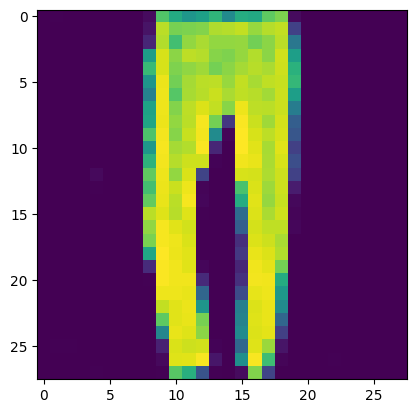

Dloss:  0.63225967
Gloss:  0.7891761
Dloss:  0.63225883
Gloss:  0.789167
Dloss:  0.6322591
Gloss:  0.7891914
Dloss:  0.632259
Gloss:  0.7891788
Dloss:  0.63225806
Gloss:  0.78920054
Dloss:  0.63225776
Gloss:  0.7891851
Dloss:  0.632259
Gloss:  0.7892161
Dloss:  0.6322592
Gloss:  0.78920305
Dloss:  0.6322595
Gloss:  0.78923273
Dloss:  0.63226
Gloss:  0.7892182
Dloss:  0.63225967
Gloss:  0.7892544
Dloss:  0.6322607
Gloss:  0.7892382
Dloss:  0.6322617
Gloss:  0.78926367
Dloss:  0.63226146
Gloss:  0.7892617
Dloss:  0.63226074
Gloss:  0.7892718
Dloss:  0.6322608
Gloss:  0.78927076
Dloss:  0.63226014
Gloss:  0.78928065
Dloss:  0.632259
Gloss:  0.78927785
Dloss:  0.6322582
Gloss:  0.78929394
Dloss:  0.6322562
Gloss:  0.78928524
Dloss:  0.6322567
Gloss:  0.78930795
Dloss:  0.63225645
Gloss:  0.78929764
Dloss:  0.6322569
Gloss:  0.78931725
Dloss:  0.6322573
Gloss:  0.7893091
Dloss:  0.6322583
Gloss:  0.7893308
Dloss:  0.6322581
Gloss:  0.7893172
Dloss:  0.63226044
Gloss:  0.7893546
Dloss:  0.63

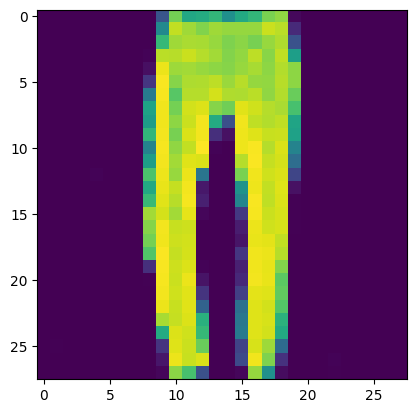

Dloss:  0.63226604
Gloss:  0.7893859
Dloss:  0.6322674
Gloss:  0.78936774
Dloss:  0.63226837
Gloss:  0.78940773
Dloss:  0.63227046
Gloss:  0.7893904
Dloss:  0.63227403
Gloss:  0.7894304
Dloss:  0.6322787
Gloss:  0.7894155
Dloss:  0.63228095
Gloss:  0.78944546
Dloss:  0.63228345
Gloss:  0.7894319
Dloss:  0.63228506
Gloss:  0.7894567
Dloss:  0.63228494
Gloss:  0.7894472
Dloss:  0.6322842
Gloss:  0.789463
Dloss:  0.6322831
Gloss:  0.78945905
Dloss:  0.63228124
Gloss:  0.78947616
Dloss:  0.6322805
Gloss:  0.78947544
Dloss:  0.63228184
Gloss:  0.78948087
Dloss:  0.6322812
Gloss:  0.7894907
Dloss:  0.63228166
Gloss:  0.78949106
Dloss:  0.63228047
Gloss:  0.78950334
Dloss:  0.632279
Gloss:  0.7895054
Dloss:  0.63227814
Gloss:  0.7895132
Dloss:  0.6322776
Gloss:  0.78951687
Dloss:  0.6322775
Gloss:  0.78952706
Dloss:  0.6322766
Gloss:  0.7895341
Dloss:  0.6322767
Gloss:  0.7895392
Dloss:  0.6322766
Gloss:  0.789546
Dloss:  0.63227516
Gloss:  0.78954655
Dloss:  0.6322748
Gloss:  0.7895566
Dloss

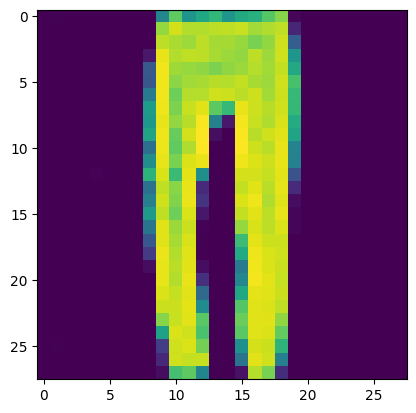

Dloss:  0.6322689
Gloss:  0.78958654
Dloss:  0.63226825
Gloss:  0.7895738
Dloss:  0.63226783
Gloss:  0.7896
Dloss:  0.63226724
Gloss:  0.78958535
Dloss:  0.6322684
Gloss:  0.7896221
Dloss:  0.6322702
Gloss:  0.7895967
Dloss:  0.63227594
Gloss:  0.78964144
Dloss:  0.63227916
Gloss:  0.7896178
Dloss:  0.6322815
Gloss:  0.7896631
Dloss:  0.63228333
Gloss:  0.7896407
Dloss:  0.63228387
Gloss:  0.78967047
Dloss:  0.6322842
Gloss:  0.78965616
Dloss:  0.6322862
Gloss:  0.789679
Dloss:  0.6322864
Gloss:  0.7896722
Dloss:  0.6322878
Gloss:  0.78968906
Dloss:  0.63228714
Gloss:  0.7896836
Dloss:  0.63228524
Gloss:  0.7896993
Dloss:  0.63228285
Gloss:  0.7896963
Dloss:  0.63228154
Gloss:  0.7897059
Dloss:  0.63228065
Gloss:  0.78970695
Dloss:  0.63228166
Gloss:  0.7897155
Dloss:  0.6322809
Gloss:  0.78971595
Dloss:  0.632282
Gloss:  0.7897324
Dloss:  0.6322811
Gloss:  0.78973025
Dloss:  0.6322805
Gloss:  0.78974634
Dloss:  0.63227904
Gloss:  0.7897396
Dloss:  0.6322787
Gloss:  0.7897622
Dloss:  0

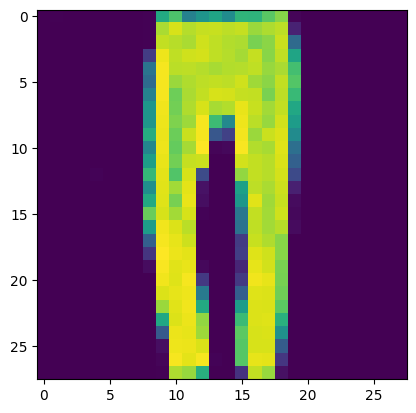

Dloss:  0.6322798
Gloss:  0.78979355
Dloss:  0.63228214
Gloss:  0.78977555
Dloss:  0.6322842
Gloss:  0.7898151
Dloss:  0.6322855
Gloss:  0.7897936
Dloss:  0.6322874
Gloss:  0.7898348
Dloss:  0.63228947
Gloss:  0.7898152
Dloss:  0.6322906
Gloss:  0.78984636
Dloss:  0.6322916
Gloss:  0.7898318
Dloss:  0.6322931
Gloss:  0.78986305
Dloss:  0.63229203
Gloss:  0.7898536
Dloss:  0.6322909
Gloss:  0.7898768
Dloss:  0.63228947
Gloss:  0.7898708
Dloss:  0.6322885
Gloss:  0.7898879
Dloss:  0.6322887
Gloss:  0.78988487
Dloss:  0.63228804
Gloss:  0.7899031
62 / 100
Dloss:  0.63228816
Gloss:  0.7898956
62 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


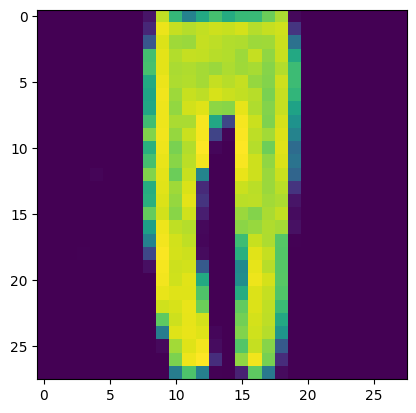

Dloss:  0.632287
Gloss:  0.78991485
Dloss:  0.6322866
Gloss:  0.78990704
Dloss:  0.63228637
Gloss:  0.7899223
Dloss:  0.6322847
Gloss:  0.7899174
Dloss:  0.632284
Gloss:  0.789932
Dloss:  0.63228244
Gloss:  0.7899298
Dloss:  0.63228035
Gloss:  0.7899465
Dloss:  0.63227975
Gloss:  0.7899432
Dloss:  0.6322814
Gloss:  0.78996086
Dloss:  0.6322818
Gloss:  0.7899509
Dloss:  0.6322815
Gloss:  0.7899796
Dloss:  0.63228196
Gloss:  0.78996426
Dloss:  0.63228166
Gloss:  0.78999233
Dloss:  0.63228256
Gloss:  0.78997624
Dloss:  0.6322845
Gloss:  0.79000527
Dloss:  0.63228536
Gloss:  0.78999203
Dloss:  0.6322851
Gloss:  0.7900146
Dloss:  0.6322833
Gloss:  0.790004
Dloss:  0.63228387
Gloss:  0.7900356
Dloss:  0.6322831
Gloss:  0.79001623
Dloss:  0.63228405
Gloss:  0.7900524
Dloss:  0.63228554
Gloss:  0.7900318
Dloss:  0.63228774
Gloss:  0.7900736
Dloss:  0.6322905
Gloss:  0.7900496
Dloss:  0.6322918
Gloss:  0.790095
Dloss:  0.6322956
Gloss:  0.79007274
Dloss:  0.63229835
Gloss:  0.79010254
Dloss:  0

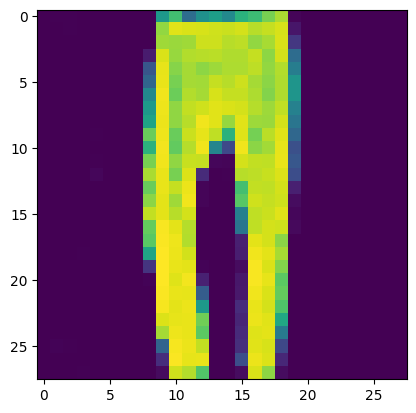

Dloss:  0.6323027
Gloss:  0.7901316
Dloss:  0.63230234
Gloss:  0.79012233
Dloss:  0.63230187
Gloss:  0.7901467
Dloss:  0.6323031
Gloss:  0.790138
Dloss:  0.63230205
Gloss:  0.7901583
Dloss:  0.63230145
Gloss:  0.7901489
Dloss:  0.63230133
Gloss:  0.79016995
Dloss:  0.6323003
Gloss:  0.79016215
Dloss:  0.6322999
Gloss:  0.7901861
Dloss:  0.6322999
Gloss:  0.79017425
Dloss:  0.63229954
Gloss:  0.7901998
Dloss:  0.63229895
Gloss:  0.7901903
Dloss:  0.63229865
Gloss:  0.7902045
Dloss:  0.63229704
Gloss:  0.7902044
Dloss:  0.6322962
Gloss:  0.7902141
Dloss:  0.63229716
Gloss:  0.7902184
Dloss:  0.63229847
Gloss:  0.79023117
Dloss:  0.6322971
Gloss:  0.7902251
Dloss:  0.6322962
Gloss:  0.79024607
Dloss:  0.63229394
Gloss:  0.79023725
Dloss:  0.63229287
Gloss:  0.7902579
Dloss:  0.6322925
Gloss:  0.790247
Dloss:  0.6322933
Gloss:  0.7902719
Dloss:  0.6322934
Gloss:  0.79026234
Dloss:  0.63229406
Gloss:  0.7902887
Dloss:  0.6322928
Gloss:  0.79027605
Dloss:  0.6322931
Gloss:  0.7903065
Dloss: 

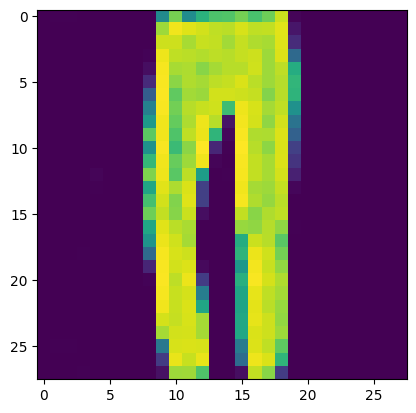

Dloss:  0.63229185
Gloss:  0.7903337
Dloss:  0.63229287
Gloss:  0.79032016
Dloss:  0.6322917
Gloss:  0.7903478
Dloss:  0.6322915
Gloss:  0.79033107
Dloss:  0.632292
Gloss:  0.7903617
Dloss:  0.63229436
Gloss:  0.7903435
Dloss:  0.63229555
Gloss:  0.79037845
Dloss:  0.63229746
Gloss:  0.79035985
Dloss:  0.63229865
Gloss:  0.7903974
Dloss:  0.63229996
Gloss:  0.7903763
Dloss:  0.63230294
Gloss:  0.79041195
Dloss:  0.6323047
Gloss:  0.7903906
Dloss:  0.6323061
Gloss:  0.7904227
Dloss:  0.63230735
Gloss:  0.7904069
Dloss:  0.63230777
Gloss:  0.7904271
Dloss:  0.63230574
Gloss:  0.79042214
Dloss:  0.63230413
Gloss:  0.7904329
Dloss:  0.63230306
Gloss:  0.790432
Dloss:  0.6323025
Gloss:  0.79044926
Dloss:  0.6323022
Gloss:  0.7904437
Dloss:  0.63230276
Gloss:  0.7904587
Dloss:  0.63230264
Gloss:  0.7904546
Dloss:  0.6323009
Gloss:  0.7904762
Dloss:  0.63229984
Gloss:  0.790461
Dloss:  0.6322996
Gloss:  0.79048645
Dloss:  0.63230145
Gloss:  0.7904739
Dloss:  0.63230246
Gloss:  0.7905029
Dloss

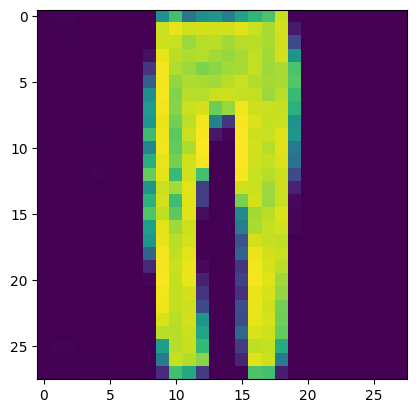

Dloss:  0.63230574
Gloss:  0.79053307
Dloss:  0.6323063
Gloss:  0.7905238
Dloss:  0.63230544
Gloss:  0.7905418
Dloss:  0.6323041
Gloss:  0.7905415
Dloss:  0.63230306
Gloss:  0.79055387
Dloss:  0.63230157
Gloss:  0.79055196
Dloss:  0.63230205
Gloss:  0.79056984
Dloss:  0.6323014
Gloss:  0.7905651
Dloss:  0.6323002
Gloss:  0.7905801
Dloss:  0.63229984
Gloss:  0.7905763
Dloss:  0.6322998
Gloss:  0.79059
Dloss:  0.6322989
Gloss:  0.790588
Dloss:  0.6322981
Gloss:  0.7906023
Dloss:  0.63229847
Gloss:  0.7905967
Dloss:  0.6322992
Gloss:  0.7906152
Dloss:  0.6322984
Gloss:  0.7906066
Dloss:  0.6322969
Gloss:  0.7906315
Dloss:  0.6322965
Gloss:  0.79061913
Dloss:  0.6322976
Gloss:  0.790655
Dloss:  0.6322979
Gloss:  0.7906323
Dloss:  0.63229924
Gloss:  0.7906747
Dloss:  0.6323006
Gloss:  0.7906555
Dloss:  0.63230366
Gloss:  0.7906934
Dloss:  0.63230574
Gloss:  0.7906689
Dloss:  0.63230973
Gloss:  0.79070944
Dloss:  0.6323101
Gloss:  0.7906908
Dloss:  0.6323113
Gloss:  0.79071254
Dloss:  0.6323

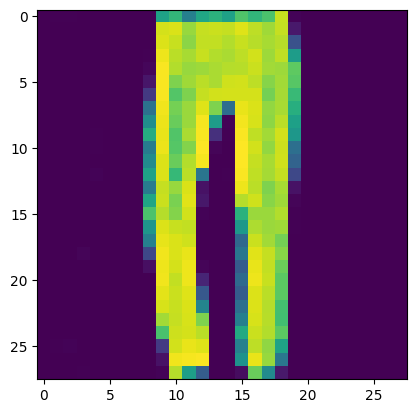

Dloss:  0.6323083
Gloss:  0.7907286
Dloss:  0.6323089
Gloss:  0.7907216
Dloss:  0.6323084
Gloss:  0.7907404
Dloss:  0.63231015
Gloss:  0.7907404
Dloss:  0.63230723
Gloss:  0.7907475
Dloss:  0.63230556
Gloss:  0.7907552
Dloss:  0.6323041
Gloss:  0.7907569
Dloss:  0.63230276
Gloss:  0.79077
Dloss:  0.63230324
Gloss:  0.7907671
Dloss:  0.6323023
Gloss:  0.7907857
Dloss:  0.6323007
Gloss:  0.7907795
Dloss:  0.6323011
Gloss:  0.790799
Dloss:  0.63229996
Gloss:  0.79079044
Dloss:  0.632299
Gloss:  0.7908074
Dloss:  0.6322983
Gloss:  0.7908044
63 / 100
Dloss:  0.63229716
Gloss:  0.7908178
63 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


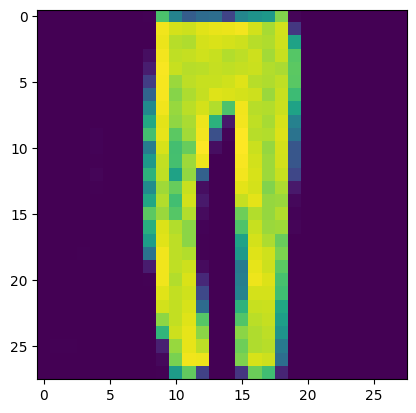

Dloss:  0.6322951
Gloss:  0.79081666
Dloss:  0.63229483
Gloss:  0.7908301
Dloss:  0.6322944
Gloss:  0.79082483
Dloss:  0.632294
Gloss:  0.7908516
Dloss:  0.63229454
Gloss:  0.7908362
Dloss:  0.6322945
Gloss:  0.7908709
Dloss:  0.6322971
Gloss:  0.79084533
Dloss:  0.6323017
Gloss:  0.7908981
Dloss:  0.63230693
Gloss:  0.7908654
Dloss:  0.6323131
Gloss:  0.7909178
Dloss:  0.632317
Gloss:  0.7908948
Dloss:  0.6323192
Gloss:  0.79092795
Dloss:  0.6323196
Gloss:  0.7909135
Dloss:  0.63232124
Gloss:  0.7909403
Dloss:  0.6323219
Gloss:  0.7909312
Dloss:  0.63232297
Gloss:  0.7909494
Dloss:  0.6323232
Gloss:  0.790947
Dloss:  0.632321
Gloss:  0.7909565
Dloss:  0.6323201
Gloss:  0.79095805
Dloss:  0.6323176
Gloss:  0.79096997
Dloss:  0.63231725
Gloss:  0.7909664
Dloss:  0.6323164
Gloss:  0.7909823
Dloss:  0.6323171
Gloss:  0.7909766
Dloss:  0.6323177
Gloss:  0.79098916
Dloss:  0.63231695
Gloss:  0.7909966
Dloss:  0.6323154
Gloss:  0.79100275
Dloss:  0.63231397
Gloss:  0.7910119
Dloss:  0.632312

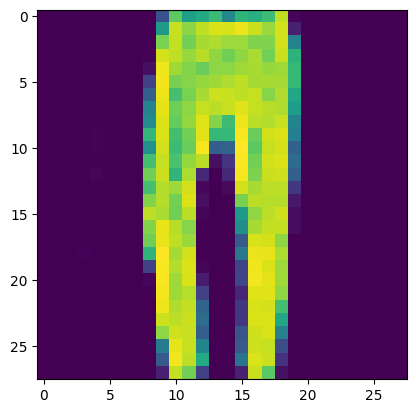

Dloss:  0.63231117
Gloss:  0.79103875
Dloss:  0.632312
Gloss:  0.79103535
Dloss:  0.63231194
Gloss:  0.7910506
Dloss:  0.6323113
Gloss:  0.791047
Dloss:  0.63230973
Gloss:  0.7910688
Dloss:  0.6323072
Gloss:  0.7910585
Dloss:  0.6323083
Gloss:  0.79108584
Dloss:  0.6323071
Gloss:  0.79107034
Dloss:  0.6323072
Gloss:  0.79110545
Dloss:  0.6323084
Gloss:  0.7910831
Dloss:  0.63230795
Gloss:  0.79112536
Dloss:  0.63230926
Gloss:  0.7911108
Dloss:  0.6323116
Gloss:  0.7911364
Dloss:  0.6323118
Gloss:  0.791128
Dloss:  0.6323133
Gloss:  0.7911471
Dloss:  0.63231397
Gloss:  0.79113436
Dloss:  0.6323153
Gloss:  0.7911565
Dloss:  0.63231486
Gloss:  0.79114527
Dloss:  0.632315
Gloss:  0.79117316
Dloss:  0.63231415
Gloss:  0.79115945
Dloss:  0.63231486
Gloss:  0.79118454
Dloss:  0.632315
Gloss:  0.7911723
Dloss:  0.6323168
Gloss:  0.7911987
Dloss:  0.63231754
Gloss:  0.79118043
Dloss:  0.6323194
Gloss:  0.79121035
Dloss:  0.6323191
Gloss:  0.791195
Dloss:  0.63231856
Gloss:  0.7912307
Dloss:  0.

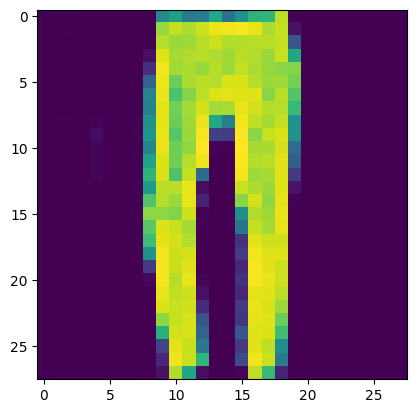

Dloss:  0.6323178
Gloss:  0.7912585
Dloss:  0.6323186
Gloss:  0.79125226
Dloss:  0.63231665
Gloss:  0.7912743
Dloss:  0.63231736
Gloss:  0.79126805
Dloss:  0.63231814
Gloss:  0.791283
Dloss:  0.6323191
Gloss:  0.79127204
Dloss:  0.6323195
Gloss:  0.791297
Dloss:  0.63232034
Gloss:  0.79128695
Dloss:  0.6323199
Gloss:  0.7913179
Dloss:  0.63231987
Gloss:  0.7913036
Dloss:  0.63232076
Gloss:  0.79133993
Dloss:  0.63232195
Gloss:  0.79132366
Dloss:  0.6323229
Gloss:  0.7913584
Dloss:  0.6323251
Gloss:  0.79134166
Dloss:  0.6323275
Gloss:  0.79137367
Dloss:  0.63232744
Gloss:  0.79135484
Dloss:  0.63232887
Gloss:  0.79138887
Dloss:  0.6323307
Gloss:  0.7913749
Dloss:  0.63233113
Gloss:  0.79140294
Dloss:  0.6323309
Gloss:  0.7913953
Dloss:  0.6323304
Gloss:  0.7914131
Dloss:  0.6323294
Gloss:  0.7914066
Dloss:  0.6323287
Gloss:  0.7914293
Dloss:  0.63232905
Gloss:  0.79141754
Dloss:  0.6323304
Gloss:  0.79144293
Dloss:  0.63233113
Gloss:  0.79143196
Dloss:  0.6323314
Gloss:  0.7914565
Dlos

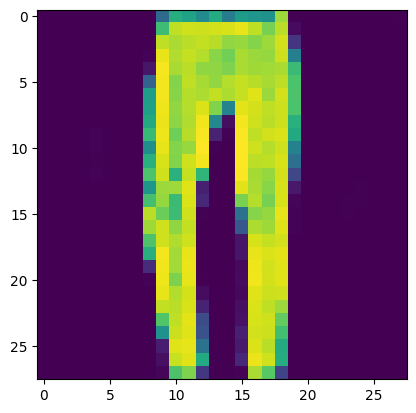

Dloss:  0.632331
Gloss:  0.7914911
Dloss:  0.63233024
Gloss:  0.7914852
Dloss:  0.6323285
Gloss:  0.79150254
Dloss:  0.6323271
Gloss:  0.7914968
Dloss:  0.6323264
Gloss:  0.79151726
Dloss:  0.6323257
Gloss:  0.7915031
Dloss:  0.6323263
Gloss:  0.7915327
Dloss:  0.6323256
Gloss:  0.7915202
Dloss:  0.6323259
Gloss:  0.79154927
Dloss:  0.6323264
Gloss:  0.79153425
Dloss:  0.63232636
Gloss:  0.79156154
Dloss:  0.63232714
Gloss:  0.79155153
Dloss:  0.63232785
Gloss:  0.7915758
Dloss:  0.6323279
Gloss:  0.79156744
Dloss:  0.63232887
Gloss:  0.79158604
Dloss:  0.6323289
Gloss:  0.7915778
Dloss:  0.63232845
Gloss:  0.7915957
Dloss:  0.63232774
Gloss:  0.7915952
Dloss:  0.63232803
Gloss:  0.7916091
Dloss:  0.63232607
Gloss:  0.7916055
Dloss:  0.63232535
Gloss:  0.7916246
Dloss:  0.63232315
Gloss:  0.7916188
Dloss:  0.63232434
Gloss:  0.791641
Dloss:  0.63232327
Gloss:  0.7916316
Dloss:  0.632324
Gloss:  0.79165787
Dloss:  0.6323236
Gloss:  0.79164594
Dloss:  0.6323238
Gloss:  0.79167175
Dloss: 

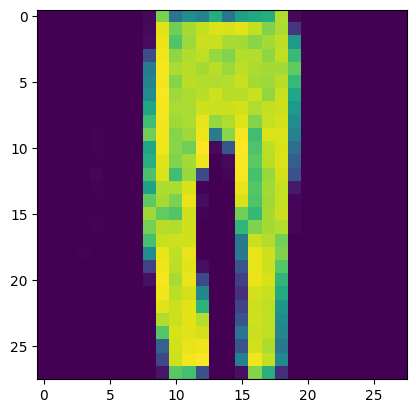

Dloss:  0.6323283
Gloss:  0.7916979
Dloss:  0.6323302
Gloss:  0.7916821
Dloss:  0.63232994
Gloss:  0.79170275
Dloss:  0.6323311
Gloss:  0.7916914
Dloss:  0.6323306
Gloss:  0.7917157
Dloss:  0.6323302
Gloss:  0.7917002
Dloss:  0.63233095
Gloss:  0.7917292
Dloss:  0.6323308
Gloss:  0.79171455
Dloss:  0.6323326
Gloss:  0.7917493
Dloss:  0.632332
Gloss:  0.79173297
Dloss:  0.6323321
Gloss:  0.79176027
Dloss:  0.6323307
Gloss:  0.7917511
Dloss:  0.6323308
Gloss:  0.791775
Dloss:  0.6323328
Gloss:  0.79176867
Dloss:  0.63233274
Gloss:  0.79178447
64 / 100
Dloss:  0.63233185
Gloss:  0.7917795
64 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


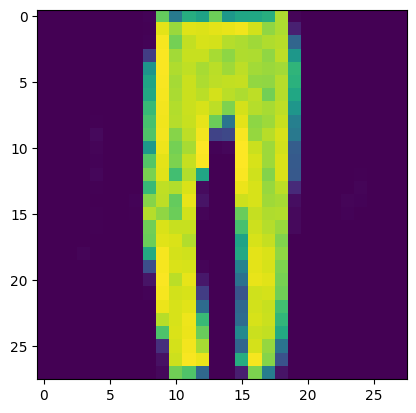

Dloss:  0.63233125
Gloss:  0.7917966
Dloss:  0.63233227
Gloss:  0.7917913
Dloss:  0.6323315
Gloss:  0.7918045
Dloss:  0.6323306
Gloss:  0.79180795
Dloss:  0.6323298
Gloss:  0.79181576
Dloss:  0.6323274
Gloss:  0.79182094
Dloss:  0.6323265
Gloss:  0.7918266
Dloss:  0.63232446
Gloss:  0.7918341
Dloss:  0.632323
Gloss:  0.79183686
Dloss:  0.6323232
Gloss:  0.79184765
Dloss:  0.6323218
Gloss:  0.7918522
Dloss:  0.63232064
Gloss:  0.7918618
Dloss:  0.6323198
Gloss:  0.7918723
Dloss:  0.6323201
Gloss:  0.79187495
Dloss:  0.63232136
Gloss:  0.79188746
Dloss:  0.63232136
Gloss:  0.7918917
Dloss:  0.63231957
Gloss:  0.7918978
Dloss:  0.63231707
Gloss:  0.79190433
Dloss:  0.6323162
Gloss:  0.79191154
Dloss:  0.6323139
Gloss:  0.7919195
Dloss:  0.63231224
Gloss:  0.7919196
Dloss:  0.63231045
Gloss:  0.7919289
Dloss:  0.63231015
Gloss:  0.79192746
Dloss:  0.6323107
Gloss:  0.7919378
Dloss:  0.6323091
Gloss:  0.7919442
Dloss:  0.63230836
Gloss:  0.79194736
Dloss:  0.6323073
Gloss:  0.7919578
Dloss:

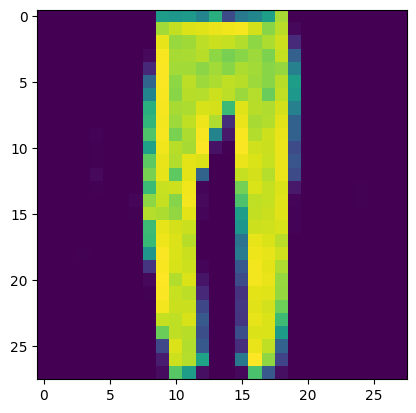

Dloss:  0.6323064
Gloss:  0.7920053
Dloss:  0.63230884
Gloss:  0.7919743
Dloss:  0.6323132
Gloss:  0.7920386
Dloss:  0.6323195
Gloss:  0.79200673
Dloss:  0.63232434
Gloss:  0.7920561
Dloss:  0.632329
Gloss:  0.79203534
Dloss:  0.63233197
Gloss:  0.79207313
Dloss:  0.6323331
Gloss:  0.7920603
Dloss:  0.63233405
Gloss:  0.79208577
Dloss:  0.6323341
Gloss:  0.7920734
Dloss:  0.6323327
Gloss:  0.79209614
Dloss:  0.63233125
Gloss:  0.7920881
Dloss:  0.63233143
Gloss:  0.7921076
Dloss:  0.63233024
Gloss:  0.7921027
Dloss:  0.63232964
Gloss:  0.79212147
Dloss:  0.6323298
Gloss:  0.79212135
Dloss:  0.6323289
Gloss:  0.79213095
Dloss:  0.6323275
Gloss:  0.7921356
Dloss:  0.63232535
Gloss:  0.79214376
Dloss:  0.6323233
Gloss:  0.7921534
Dloss:  0.6323215
Gloss:  0.7921518
Dloss:  0.6323208
Gloss:  0.7921777
Dloss:  0.6323228
Gloss:  0.7921636
Dloss:  0.6323233
Gloss:  0.7921945
Dloss:  0.632324
Gloss:  0.7921816
Dloss:  0.6323227
Gloss:  0.79221284
Dloss:  0.63232267
Gloss:  0.7922023
Dloss:  0.

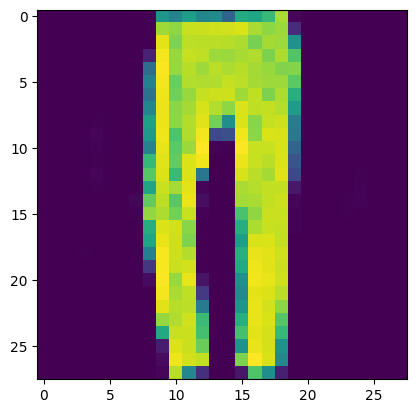

Dloss:  0.6323216
Gloss:  0.79223484
Dloss:  0.63232255
Gloss:  0.792253
Dloss:  0.6323218
Gloss:  0.7922493
Dloss:  0.63232124
Gloss:  0.7922713
Dloss:  0.6323205
Gloss:  0.7922599
Dloss:  0.6323202
Gloss:  0.7922887
Dloss:  0.63231957
Gloss:  0.7922734
Dloss:  0.6323196
Gloss:  0.7923038
Dloss:  0.6323205
Gloss:  0.7922939
Dloss:  0.6323208
Gloss:  0.79232347
Dloss:  0.6323217
Gloss:  0.79231006
Dloss:  0.6323214
Gloss:  0.7923351
Dloss:  0.63232017
Gloss:  0.79232836
Dloss:  0.6323191
Gloss:  0.792346
Dloss:  0.6323201
Gloss:  0.79234225
Dloss:  0.63231945
Gloss:  0.79236114
Dloss:  0.6323185
Gloss:  0.7923562
Dloss:  0.6323179
Gloss:  0.79238343
Dloss:  0.63231796
Gloss:  0.79237384
Dloss:  0.6323177
Gloss:  0.7923952
Dloss:  0.6323182
Gloss:  0.7923864
Dloss:  0.6323192
Gloss:  0.79240763
Dloss:  0.6323187
Gloss:  0.79240173
Dloss:  0.63231826
Gloss:  0.7924206
Dloss:  0.63231784
Gloss:  0.79241955
Dloss:  0.632316
Gloss:  0.79243726
Dloss:  0.63231534
Gloss:  0.79243255
Dloss:  0

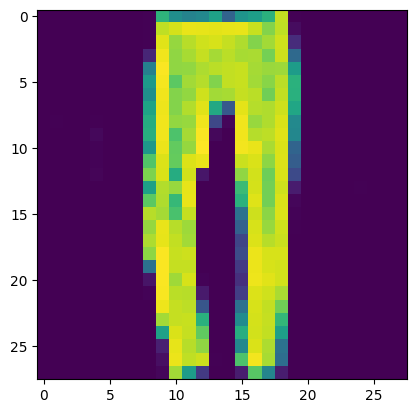

Dloss:  0.6323132
Gloss:  0.792455
Dloss:  0.6323132
Gloss:  0.79248095
Dloss:  0.63231206
Gloss:  0.79246527
Dloss:  0.63231254
Gloss:  0.7925028
Dloss:  0.6323129
Gloss:  0.79248357
Dloss:  0.6323151
Gloss:  0.7925197
Dloss:  0.6323177
Gloss:  0.79250246
Dloss:  0.6323178
Gloss:  0.79253596
Dloss:  0.63231826
Gloss:  0.7925206
Dloss:  0.6323188
Gloss:  0.792551
Dloss:  0.6323203
Gloss:  0.79253525
Dloss:  0.6323213
Gloss:  0.79256326
Dloss:  0.63232195
Gloss:  0.7925504
Dloss:  0.6323215
Gloss:  0.79257184
Dloss:  0.6323219
Gloss:  0.7925628
Dloss:  0.63232225
Gloss:  0.79258627
Dloss:  0.6323224
Gloss:  0.79257643
Dloss:  0.6323218
Gloss:  0.7926079
Dloss:  0.63232255
Gloss:  0.79259276
Dloss:  0.63232327
Gloss:  0.79262143
Dloss:  0.63232374
Gloss:  0.79260623
Dloss:  0.63232243
Gloss:  0.7926362
Dloss:  0.63232315
Gloss:  0.7926198
Dloss:  0.6323223
Gloss:  0.7926489
Dloss:  0.6323226
Gloss:  0.7926366
Dloss:  0.6323204
Gloss:  0.7926583
Dloss:  0.63232017
Gloss:  0.7926553
Dloss:

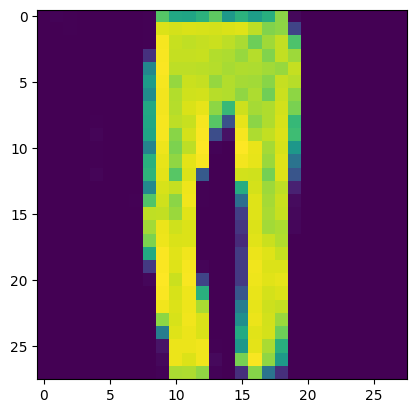

Dloss:  0.63231945
Gloss:  0.792683
Dloss:  0.63231874
Gloss:  0.79270345
Dloss:  0.6323182
Gloss:  0.7927019
Dloss:  0.6323177
Gloss:  0.79271996
Dloss:  0.63231623
Gloss:  0.7927167
Dloss:  0.6323141
Gloss:  0.7927319
Dloss:  0.632313
Gloss:  0.79272676
Dloss:  0.6323141
Gloss:  0.7927508
Dloss:  0.6323144
Gloss:  0.79274076
Dloss:  0.6323139
Gloss:  0.7927754
Dloss:  0.63231623
Gloss:  0.7927566
Dloss:  0.6323181
Gloss:  0.7927949
Dloss:  0.6323196
Gloss:  0.7927766
Dloss:  0.632321
Gloss:  0.7928046
Dloss:  0.6323214
Gloss:  0.79279286
65 / 100
Dloss:  0.63232213
Gloss:  0.7928159
65 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


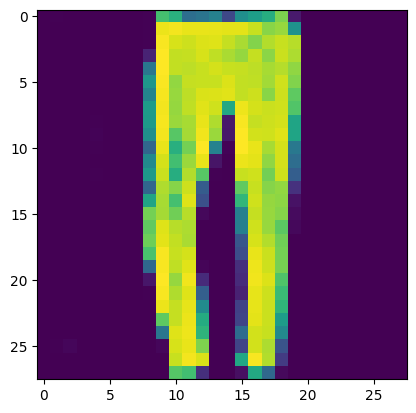

Dloss:  0.6323215
Gloss:  0.79280394
Dloss:  0.6323216
Gloss:  0.7928295
Dloss:  0.6323228
Gloss:  0.79281944
Dloss:  0.63232195
Gloss:  0.79284465
Dloss:  0.6323215
Gloss:  0.79283184
Dloss:  0.63232
Gloss:  0.7928608
Dloss:  0.6323209
Gloss:  0.79284805
Dloss:  0.6323218
Gloss:  0.7928812
Dloss:  0.6323235
Gloss:  0.79286104
Dloss:  0.6323237
Gloss:  0.79288995
Dloss:  0.6323227
Gloss:  0.79287726
Dloss:  0.6323236
Gloss:  0.7929043
Dloss:  0.632323
Gloss:  0.79289407
Dloss:  0.6323243
Gloss:  0.7929129
Dloss:  0.6323238
Gloss:  0.7929126
Dloss:  0.6323225
Gloss:  0.7929251
Dloss:  0.63232017
Gloss:  0.7929251
Dloss:  0.63231784
Gloss:  0.7929352
Dloss:  0.6323163
Gloss:  0.79293793
Dloss:  0.63231397
Gloss:  0.7929448
Dloss:  0.6323119
Gloss:  0.7929522
Dloss:  0.63231075
Gloss:  0.7929602
Dloss:  0.6323093
Gloss:  0.79296994
Dloss:  0.63230807
Gloss:  0.7929642
Dloss:  0.6323063
Gloss:  0.79299206
Dloss:  0.63230675
Gloss:  0.7929772
Dloss:  0.6323084
Gloss:  0.79301494
Dloss:  0.6

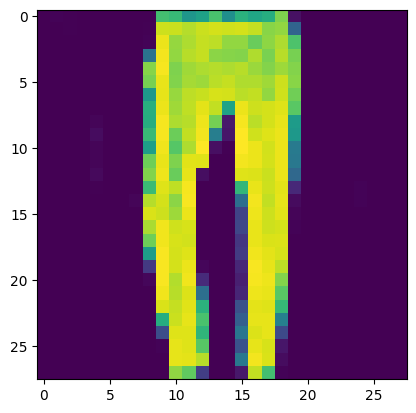

Dloss:  0.63231975
Gloss:  0.79305667
Dloss:  0.6323215
Gloss:  0.7930383
Dloss:  0.6323233
Gloss:  0.79306513
Dloss:  0.632322
Gloss:  0.7930552
Dloss:  0.6323198
Gloss:  0.79307586
Dloss:  0.6323185
Gloss:  0.7930662
Dloss:  0.632318
Gloss:  0.7930854
Dloss:  0.63231623
Gloss:  0.79307926
Dloss:  0.6323146
Gloss:  0.7930983
Dloss:  0.63231444
Gloss:  0.79309344
Dloss:  0.6323133
Gloss:  0.79311895
Dloss:  0.63231176
Gloss:  0.7931051
Dloss:  0.63231236
Gloss:  0.7931326
Dloss:  0.63231146
Gloss:  0.7931248
Dloss:  0.63231146
Gloss:  0.79314643
Dloss:  0.6323113
Gloss:  0.7931404
Dloss:  0.632311
Gloss:  0.7931608
Dloss:  0.63230956
Gloss:  0.7931515
Dloss:  0.6323079
Gloss:  0.79317963
Dloss:  0.6323068
Gloss:  0.79316884
Dloss:  0.6323086
Gloss:  0.79319817
Dloss:  0.6323082
Gloss:  0.79318
Dloss:  0.63231075
Gloss:  0.7932108
Dloss:  0.6323112
Gloss:  0.79319406
Dloss:  0.6323125
Gloss:  0.79322344
Dloss:  0.63231194
Gloss:  0.79320794
Dloss:  0.6323119
Gloss:  0.7932343
Dloss:  0.

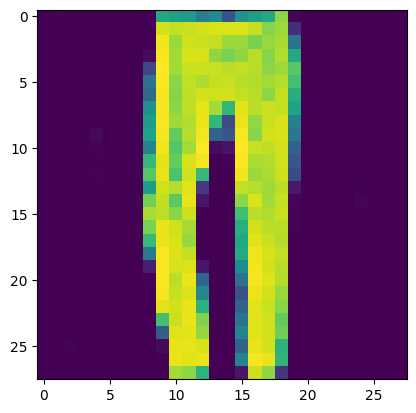

Dloss:  0.6323084
Gloss:  0.79326296
Dloss:  0.6323086
Gloss:  0.7932532
Dloss:  0.63230735
Gloss:  0.7932761
Dloss:  0.63230765
Gloss:  0.7932688
Dloss:  0.63230747
Gloss:  0.7932903
Dloss:  0.6323087
Gloss:  0.7932779
Dloss:  0.6323098
Gloss:  0.79330987
Dloss:  0.6323107
Gloss:  0.7932917
Dloss:  0.6323116
Gloss:  0.7933259
Dloss:  0.63231176
Gloss:  0.79330987
Dloss:  0.63231105
Gloss:  0.7933385
Dloss:  0.63231075
Gloss:  0.7933239
Dloss:  0.63231045
Gloss:  0.79335487
Dloss:  0.63231033
Gloss:  0.7933401
Dloss:  0.63231164
Gloss:  0.7933604
Dloss:  0.6323099
Gloss:  0.7933495
Dloss:  0.63230956
Gloss:  0.793378
Dloss:  0.6323099
Gloss:  0.7933661
Dloss:  0.63230956
Gloss:  0.7933932
Dloss:  0.63231015
Gloss:  0.7933798
Dloss:  0.63231075
Gloss:  0.7934068
Dloss:  0.6323128
Gloss:  0.793391
Dloss:  0.6323143
Gloss:  0.7934203
Dloss:  0.63231605
Gloss:  0.7934043
Dloss:  0.63231593
Gloss:  0.79343116
Dloss:  0.63231593
Gloss:  0.79341835
Dloss:  0.6323154
Gloss:  0.7934435
Dloss:  

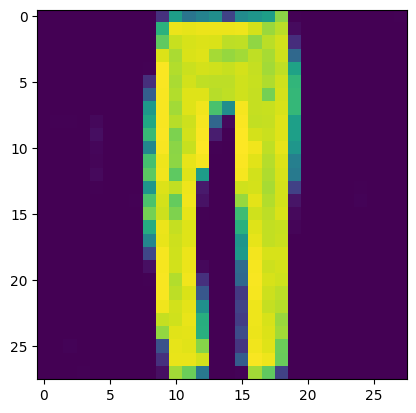

Dloss:  0.63231045
Gloss:  0.7934679
Dloss:  0.63231
Gloss:  0.7934612
Dloss:  0.6323088
Gloss:  0.7934769
Dloss:  0.6323076
Gloss:  0.793471
Dloss:  0.632307
Gloss:  0.79348785
Dloss:  0.63230616
Gloss:  0.7934783
Dloss:  0.6323066
Gloss:  0.7935029
Dloss:  0.6323051
Gloss:  0.79349244
Dloss:  0.6323039
Gloss:  0.7935176
Dloss:  0.63230336
Gloss:  0.7935069
Dloss:  0.6323048
Gloss:  0.7935363
Dloss:  0.63230574
Gloss:  0.7935212
Dloss:  0.63230646
Gloss:  0.79355127
Dloss:  0.6323078
Gloss:  0.7935361
Dloss:  0.63231075
Gloss:  0.79356706
Dloss:  0.632311
Gloss:  0.79355615
Dloss:  0.6323106
Gloss:  0.7935795
Dloss:  0.63230884
Gloss:  0.7935711
Dloss:  0.63230896
Gloss:  0.7935955
Dloss:  0.6323077
Gloss:  0.79358447
Dloss:  0.6323077
Gloss:  0.79360926
Dloss:  0.6323049
Gloss:  0.7936022
Dloss:  0.6323061
Gloss:  0.79362595
Dloss:  0.63230497
Gloss:  0.7936115
Dloss:  0.63230497
Gloss:  0.79363024
Dloss:  0.632303
Gloss:  0.7936231
Dloss:  0.63230413
Gloss:  0.7936433
Dloss:  0.6323

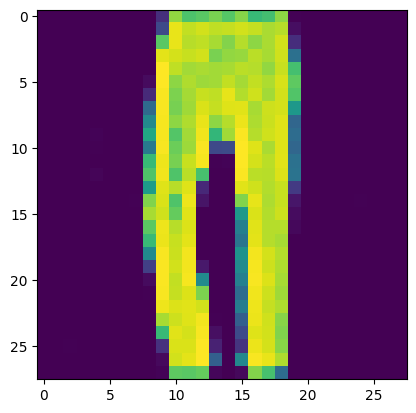

Dloss:  0.6323034
Gloss:  0.7936757
Dloss:  0.63230413
Gloss:  0.79366326
Dloss:  0.63230383
Gloss:  0.7936876
Dloss:  0.6323035
Gloss:  0.7936788
Dloss:  0.6323013
Gloss:  0.79370236
Dloss:  0.632299
Gloss:  0.79369307
Dloss:  0.63229805
Gloss:  0.79371476
Dloss:  0.6322972
Gloss:  0.7937067
Dloss:  0.6322967
Gloss:  0.79372007
Dloss:  0.63229525
Gloss:  0.7937232
Dloss:  0.632294
Gloss:  0.79373455
Dloss:  0.6322938
Gloss:  0.79373807
Dloss:  0.6322929
Gloss:  0.79374385
Dloss:  0.63229287
Gloss:  0.79374534
Dloss:  0.6322908
Gloss:  0.7937587
66 / 100
Dloss:  0.6322888
Gloss:  0.793755
66 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


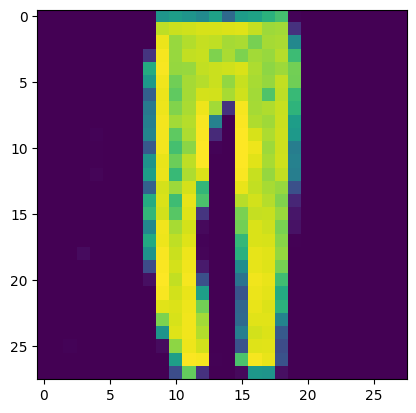

Dloss:  0.6322864
Gloss:  0.7937772
Dloss:  0.6322863
Gloss:  0.7937702
Dloss:  0.6322869
Gloss:  0.7937959
Dloss:  0.6322862
Gloss:  0.79378295
Dloss:  0.63228637
Gloss:  0.79380864
Dloss:  0.6322854
Gloss:  0.7937936
Dloss:  0.63228494
Gloss:  0.7938207
Dloss:  0.63228506
Gloss:  0.79380864
Dloss:  0.63228506
Gloss:  0.7938308
Dloss:  0.6322854
Gloss:  0.7938192
Dloss:  0.6322854
Gloss:  0.79384834
Dloss:  0.6322848
Gloss:  0.79383147
Dloss:  0.6322844
Gloss:  0.7938695
Dloss:  0.6322841
Gloss:  0.79385066
Dloss:  0.6322847
Gloss:  0.7938858
Dloss:  0.63228625
Gloss:  0.79387003
Dloss:  0.63228667
Gloss:  0.793896
Dloss:  0.63228637
Gloss:  0.7938797
Dloss:  0.632285
Gloss:  0.7938999
Dloss:  0.63228416
Gloss:  0.7938938
Dloss:  0.6322825
Gloss:  0.7939105
Dloss:  0.6322797
Gloss:  0.7939078
Dloss:  0.63227826
Gloss:  0.7939255
Dloss:  0.63227737
Gloss:  0.7939217
Dloss:  0.63227683
Gloss:  0.7939481
Dloss:  0.6322761
Gloss:  0.7939353
Dloss:  0.6322775
Gloss:  0.7939658
Dloss:  0.63

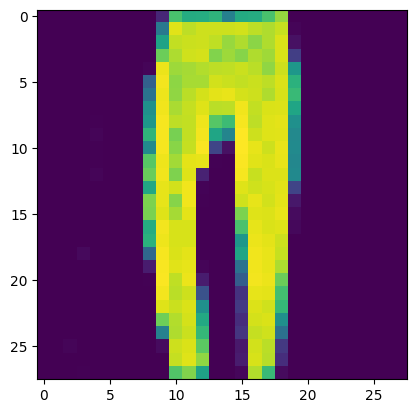

Dloss:  0.63228136
Gloss:  0.7940075
Dloss:  0.6322831
Gloss:  0.79398525
Dloss:  0.63228303
Gloss:  0.79402137
Dloss:  0.63228333
Gloss:  0.79400796
Dloss:  0.63228256
Gloss:  0.794036
Dloss:  0.6322817
Gloss:  0.7940274
Dloss:  0.63228136
Gloss:  0.79404896
Dloss:  0.63228
Gloss:  0.794043
Dloss:  0.63228005
Gloss:  0.79406744
Dloss:  0.63228
Gloss:  0.7940608
Dloss:  0.6322787
Gloss:  0.794088
Dloss:  0.63227856
Gloss:  0.7940747
Dloss:  0.6322801
Gloss:  0.7941045
Dloss:  0.6322806
Gloss:  0.7940904
Dloss:  0.63227975
Gloss:  0.7941146
Dloss:  0.6322787
Gloss:  0.79410017
Dloss:  0.6322782
Gloss:  0.7941248
Dloss:  0.63227636
Gloss:  0.7941142
Dloss:  0.6322753
Gloss:  0.79413676
Dloss:  0.6322736
Gloss:  0.79413074
Dloss:  0.63227415
Gloss:  0.79414964
Dloss:  0.63227326
Gloss:  0.7941428
Dloss:  0.6322742
Gloss:  0.79416585
Dloss:  0.63227266
Gloss:  0.7941582
Dloss:  0.63227147
Gloss:  0.79418135
Dloss:  0.6322685
Gloss:  0.7941747
Dloss:  0.6322679
Gloss:  0.7941996
Dloss:  0.6

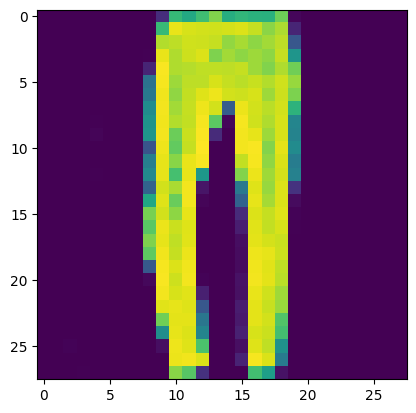

Dloss:  0.6322646
Gloss:  0.79423237
Dloss:  0.6322644
Gloss:  0.79421663
Dloss:  0.6322641
Gloss:  0.7942556
Dloss:  0.63226527
Gloss:  0.7942333
Dloss:  0.6322668
Gloss:  0.79428005
Dloss:  0.63227075
Gloss:  0.7942538
Dloss:  0.6322751
Gloss:  0.794299
Dloss:  0.63227737
Gloss:  0.7942784
Dloss:  0.6322784
Gloss:  0.7943021
Dloss:  0.6322772
Gloss:  0.79429406
Dloss:  0.63227636
Gloss:  0.79431194
Dloss:  0.6322755
Gloss:  0.79430735
Dloss:  0.6322747
Gloss:  0.7943298
Dloss:  0.63227284
Gloss:  0.7943208
Dloss:  0.632273
Gloss:  0.79434127
Dloss:  0.63227093
Gloss:  0.79433525
Dloss:  0.6322704
Gloss:  0.79435074
Dloss:  0.6322686
Gloss:  0.7943518
Dloss:  0.63226855
Gloss:  0.7943702
Dloss:  0.63226813
Gloss:  0.79436725
Dloss:  0.6322664
Gloss:  0.79437727
Dloss:  0.632266
Gloss:  0.7943754
Dloss:  0.63226515
Gloss:  0.794395
Dloss:  0.63226426
Gloss:  0.7943852
Dloss:  0.63226384
Gloss:  0.7944118
Dloss:  0.63226354
Gloss:  0.7944008
Dloss:  0.6322633
Gloss:  0.79443157
Dloss:  

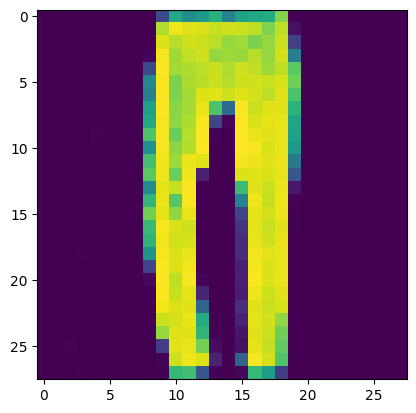

Dloss:  0.6322638
Gloss:  0.7944565
Dloss:  0.63226414
Gloss:  0.7944454
Dloss:  0.63226426
Gloss:  0.79447335
Dloss:  0.6322637
Gloss:  0.79445875
Dloss:  0.63226414
Gloss:  0.7944917
Dloss:  0.6322646
Gloss:  0.79447407
Dloss:  0.63226616
Gloss:  0.7945045
Dloss:  0.632266
Gloss:  0.7944929
Dloss:  0.63226545
Gloss:  0.7945162
Dloss:  0.63226646
Gloss:  0.7945117
Dloss:  0.6322647
Gloss:  0.79452634
Dloss:  0.6322638
Gloss:  0.79452896
Dloss:  0.6322639
Gloss:  0.7945434
Dloss:  0.63226295
Gloss:  0.79454017
Dloss:  0.6322619
Gloss:  0.7945553
Dloss:  0.6322603
Gloss:  0.794552
Dloss:  0.63225824
Gloss:  0.79457086
Dloss:  0.6322555
Gloss:  0.794568
Dloss:  0.6322542
Gloss:  0.7945891
Dloss:  0.6322527
Gloss:  0.7945819
Dloss:  0.6322533
Gloss:  0.7946081
Dloss:  0.6322536
Gloss:  0.7945986
Dloss:  0.6322551
Gloss:  0.7946255
Dloss:  0.6322547
Gloss:  0.7946113
Dloss:  0.63225704
Gloss:  0.7946518
Dloss:  0.63225806
Gloss:  0.7946281
Dloss:  0.6322602
Gloss:  0.7946663
Dloss:  0.6322

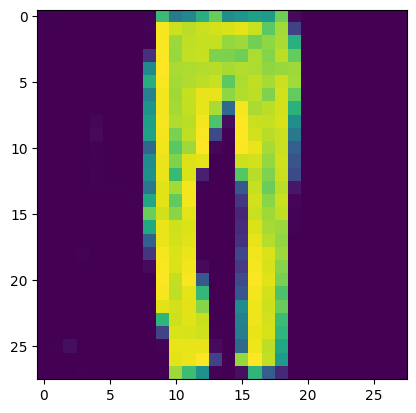

Dloss:  0.63226444
Gloss:  0.794685
Dloss:  0.6322655
Gloss:  0.7946811
Dloss:  0.6322669
Gloss:  0.7947011
Dloss:  0.6322659
Gloss:  0.7946976
Dloss:  0.63226396
Gloss:  0.79471713
Dloss:  0.63226116
Gloss:  0.7947125
Dloss:  0.6322595
Gloss:  0.7947325
Dloss:  0.6322578
Gloss:  0.79472226
Dloss:  0.63225716
Gloss:  0.7947404
Dloss:  0.6322565
Gloss:  0.7947395
Dloss:  0.632254
Gloss:  0.79475206
Dloss:  0.6322523
Gloss:  0.7947552
Dloss:  0.63225
Gloss:  0.79476166
Dloss:  0.63224965
Gloss:  0.7947726
Dloss:  0.6322486
Gloss:  0.79477155
67 / 100
Dloss:  0.6322482
Gloss:  0.7947874
67 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


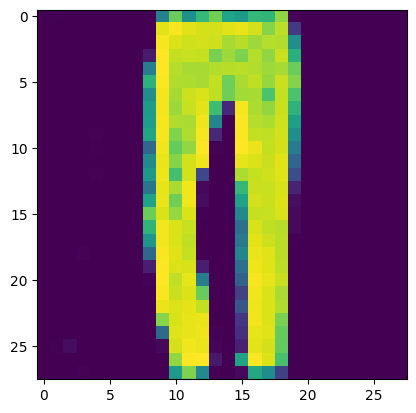

Dloss:  0.63224655
Gloss:  0.79478264
Dloss:  0.63224566
Gloss:  0.7948012
Dloss:  0.6322443
Gloss:  0.79479015
Dloss:  0.6322441
Gloss:  0.79482144
Dloss:  0.63224554
Gloss:  0.79480326
Dloss:  0.63224643
Gloss:  0.7948433
Dloss:  0.6322496
Gloss:  0.79481816
Dloss:  0.6322526
Gloss:  0.7948669
Dloss:  0.63225806
Gloss:  0.7948453
Dloss:  0.6322615
Gloss:  0.79487735
Dloss:  0.6322607
Gloss:  0.79486936
Dloss:  0.6322598
Gloss:  0.7948872
Dloss:  0.6322582
Gloss:  0.79488426
Dloss:  0.6322563
Gloss:  0.7948953
Dloss:  0.63225526
Gloss:  0.7948956
Dloss:  0.63225406
Gloss:  0.79490477
Dloss:  0.63225394
Gloss:  0.79490894
Dloss:  0.63225317
Gloss:  0.79491186
Dloss:  0.6322525
Gloss:  0.79492176
Dloss:  0.632251
Gloss:  0.7949208
Dloss:  0.63224846
Gloss:  0.79493624
Dloss:  0.6322458
Gloss:  0.79493594
Dloss:  0.63224304
Gloss:  0.7949527
Dloss:  0.6322426
Gloss:  0.79495054
Dloss:  0.6322431
Gloss:  0.79497325
Dloss:  0.6322429
Gloss:  0.79497063
Dloss:  0.6322412
Gloss:  0.79498905


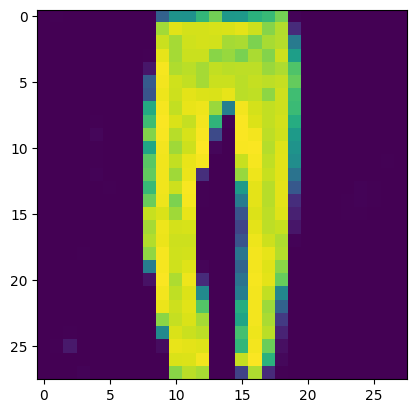

Dloss:  0.63223773
Gloss:  0.7950219
Dloss:  0.6322375
Gloss:  0.79500824
Dloss:  0.6322373
Gloss:  0.79503626
Dloss:  0.6322383
Gloss:  0.7950278
Dloss:  0.6322375
Gloss:  0.79504484
Dloss:  0.6322369
Gloss:  0.79503644
Dloss:  0.6322367
Gloss:  0.7950572
Dloss:  0.632235
Gloss:  0.7950495
Dloss:  0.63223284
Gloss:  0.79507613
Dloss:  0.6322322
Gloss:  0.7950653
Dloss:  0.6322304
Gloss:  0.7950942
Dloss:  0.63222885
Gloss:  0.7950769
Dloss:  0.6322304
Gloss:  0.7951114
Dloss:  0.63223064
Gloss:  0.7950904
Dloss:  0.6322344
Gloss:  0.79512376
Dloss:  0.63223666
Gloss:  0.7951047
Dloss:  0.63223803
Gloss:  0.79513484
Dloss:  0.6322378
Gloss:  0.7951164
Dloss:  0.63223785
Gloss:  0.7951478
Dloss:  0.6322373
Gloss:  0.79513335
Dloss:  0.6322371
Gloss:  0.7951577
Dloss:  0.6322361
Gloss:  0.79514986
Dloss:  0.63223654
Gloss:  0.79516613
Dloss:  0.63223624
Gloss:  0.7951634
Dloss:  0.632235
Gloss:  0.7951721
Dloss:  0.6322337
Gloss:  0.7951805
Dloss:  0.6322325
Gloss:  0.7951857
Dloss:  0.6

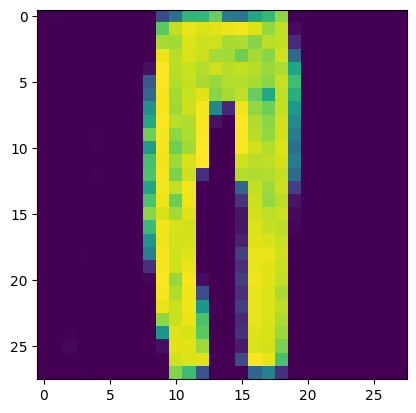

Dloss:  0.6322258
Gloss:  0.7952076
Dloss:  0.6322252
Gloss:  0.79522973
Dloss:  0.63222337
Gloss:  0.7952238
Dloss:  0.632222
Gloss:  0.79524714
Dloss:  0.6322217
Gloss:  0.7952351
Dloss:  0.63222265
Gloss:  0.7952613
Dloss:  0.6322222
Gloss:  0.7952415
Dloss:  0.6322222
Gloss:  0.795273
Dloss:  0.6322227
Gloss:  0.795259
Dloss:  0.6322221
Gloss:  0.79528844
Dloss:  0.63222307
Gloss:  0.7952738
Dloss:  0.6322242
Gloss:  0.7952992
Dloss:  0.6322241
Gloss:  0.7952881
Dloss:  0.632223
Gloss:  0.79531753
Dloss:  0.6322242
Gloss:  0.7953025
Dloss:  0.63222456
Gloss:  0.79533786
Dloss:  0.632226
Gloss:  0.795321
Dloss:  0.6322285
Gloss:  0.7953532
Dloss:  0.63222826
Gloss:  0.7953426
Dloss:  0.63222826
Gloss:  0.79536927
Dloss:  0.63222784
Gloss:  0.7953593
Dloss:  0.6322284
Gloss:  0.79538316
Dloss:  0.63222754
Gloss:  0.79537475
Dloss:  0.6322281
Gloss:  0.79539376
Dloss:  0.63222784
Gloss:  0.7953872
Dloss:  0.63222736
Gloss:  0.7954082
Dloss:  0.63222706
Gloss:  0.7954034
Dloss:  0.6322

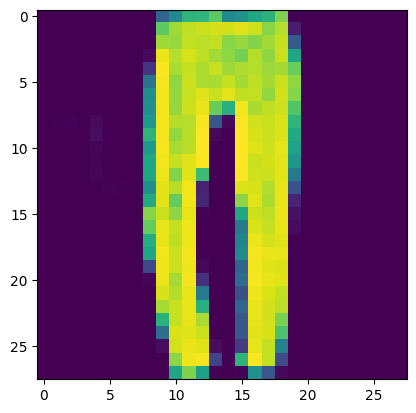

Dloss:  0.6322218
Gloss:  0.79543716
Dloss:  0.6322204
Gloss:  0.79545903
Dloss:  0.6322186
Gloss:  0.7954529
Dloss:  0.6322169
Gloss:  0.79547775
Dloss:  0.6322156
Gloss:  0.79546773
Dloss:  0.6322157
Gloss:  0.79549974
Dloss:  0.6322166
Gloss:  0.7954796
Dloss:  0.6322178
Gloss:  0.79551536
Dloss:  0.63221896
Gloss:  0.79549307
Dloss:  0.6322195
Gloss:  0.7955281
Dloss:  0.63221836
Gloss:  0.7955169
Dloss:  0.632219
Gloss:  0.79555184
Dloss:  0.63222146
Gloss:  0.7955376
Dloss:  0.6322234
Gloss:  0.7955629
Dloss:  0.6322244
Gloss:  0.7955496
Dloss:  0.63222474
Gloss:  0.7955779
Dloss:  0.6322232
Gloss:  0.79556686
Dloss:  0.6322209
Gloss:  0.7955922
Dloss:  0.6322195
Gloss:  0.7955818
Dloss:  0.63221884
Gloss:  0.79560643
Dloss:  0.63221943
Gloss:  0.7956
Dloss:  0.6322174
Gloss:  0.7956243
Dloss:  0.63221765
Gloss:  0.7956121
Dloss:  0.6322151
Gloss:  0.7956326
Dloss:  0.6322148
Gloss:  0.79562664
Dloss:  0.63221335
Gloss:  0.7956432
Dloss:  0.6322133
Gloss:  0.79563814
Dloss:  0.63

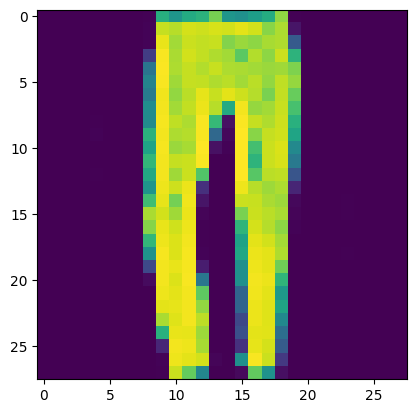

Dloss:  0.6322098
Gloss:  0.7956664
Dloss:  0.63221014
Gloss:  0.79569
Dloss:  0.6322098
Gloss:  0.7956762
Dloss:  0.6322115
Gloss:  0.7957075
Dloss:  0.6322117
Gloss:  0.795689
Dloss:  0.63221276
Gloss:  0.7957334
Dloss:  0.6322142
Gloss:  0.7957129
Dloss:  0.63221365
Gloss:  0.7957481
Dloss:  0.6322139
Gloss:  0.79573566
Dloss:  0.63221323
Gloss:  0.79576373
Dloss:  0.6322144
Gloss:  0.79575366
Dloss:  0.63221633
Gloss:  0.7957785
Dloss:  0.6322163
Gloss:  0.7957732
Dloss:  0.632215
Gloss:  0.79579127
Dloss:  0.63221383
Gloss:  0.7957901
68 / 100
Dloss:  0.6322132
Gloss:  0.7958086
68 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


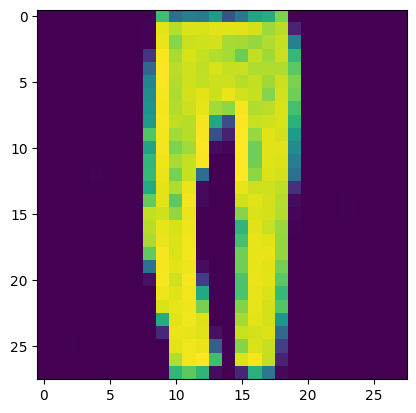

Dloss:  0.6322109
Gloss:  0.79580116
Dloss:  0.63221115
Gloss:  0.7958213
Dloss:  0.63221115
Gloss:  0.795815
Dloss:  0.6322103
Gloss:  0.79583716
Dloss:  0.6322094
Gloss:  0.79583246
Dloss:  0.63220763
Gloss:  0.79585224
Dloss:  0.6322062
Gloss:  0.79584724
Dloss:  0.6322051
Gloss:  0.79586476
Dloss:  0.63220483
Gloss:  0.7958595
Dloss:  0.6322049
Gloss:  0.79587454
Dloss:  0.63220227
Gloss:  0.79588056
Dloss:  0.63219994
Gloss:  0.79588836
Dloss:  0.63219845
Gloss:  0.7958953
Dloss:  0.632197
Gloss:  0.79589784
Dloss:  0.6321966
Gloss:  0.795906
Dloss:  0.6321945
Gloss:  0.79590905
Dloss:  0.6321926
Gloss:  0.7959236
Dloss:  0.63219
Gloss:  0.7959185
Dloss:  0.63218987
Gloss:  0.79594976
Dloss:  0.63218987
Gloss:  0.7959331
Dloss:  0.6321912
Gloss:  0.79597515
Dloss:  0.63219297
Gloss:  0.7959541
Dloss:  0.6321941
Gloss:  0.7959984
Dloss:  0.6321971
Gloss:  0.79597217
Dloss:  0.63219994
Gloss:  0.7960232
Dloss:  0.6322055
Gloss:  0.7959984
Dloss:  0.63220924
Gloss:  0.79603493
Dloss:

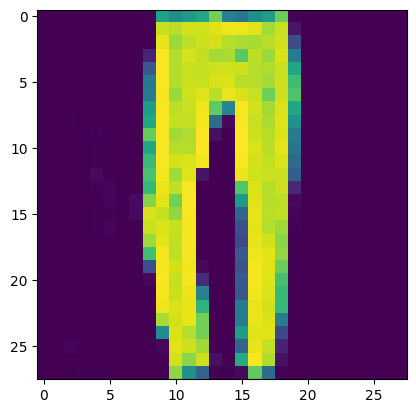

Dloss:  0.6322103
Gloss:  0.79605424
Dloss:  0.63220984
Gloss:  0.796056
Dloss:  0.63220763
Gloss:  0.7960617
Dloss:  0.63220555
Gloss:  0.79606533
Dloss:  0.6322025
Gloss:  0.79607004
Dloss:  0.6322006
Gloss:  0.7960758
Dloss:  0.6321993
Gloss:  0.7960784
Dloss:  0.63219744
Gloss:  0.7960874
Dloss:  0.6321957
Gloss:  0.79609215
Dloss:  0.63219523
Gloss:  0.7961003
Dloss:  0.63219285
Gloss:  0.79610574
Dloss:  0.63219017
Gloss:  0.7961182
Dloss:  0.6321887
Gloss:  0.7961143
Dloss:  0.6321869
Gloss:  0.79613256
Dloss:  0.63218564
Gloss:  0.79612666
Dloss:  0.6321854
Gloss:  0.7961472
Dloss:  0.6321858
Gloss:  0.7961395
Dloss:  0.6321845
Gloss:  0.7961608
Dloss:  0.63218355
Gloss:  0.79614764
Dloss:  0.63218516
Gloss:  0.79617935
Dloss:  0.6321884
Gloss:  0.79616004
Dloss:  0.63218915
Gloss:  0.79619646
Dloss:  0.6321904
Gloss:  0.7961796
Dloss:  0.63219047
Gloss:  0.796208
Dloss:  0.63219094
Gloss:  0.79619545
Dloss:  0.63218904
Gloss:  0.7962179
Dloss:  0.63218755
Gloss:  0.796211
Dlos

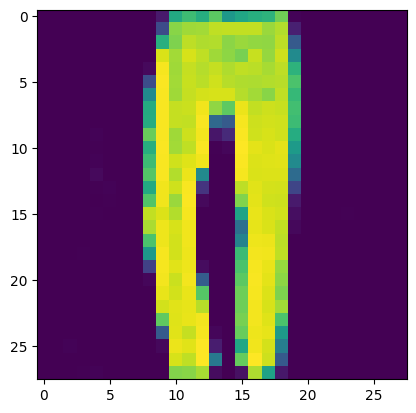

Dloss:  0.63218296
Gloss:  0.7962382
Dloss:  0.63218176
Gloss:  0.79625684
Dloss:  0.63218015
Gloss:  0.79625404
Dloss:  0.6321781
Gloss:  0.7962709
Dloss:  0.63217604
Gloss:  0.79626787
Dloss:  0.63217515
Gloss:  0.7962818
Dloss:  0.63217455
Gloss:  0.7962845
Dloss:  0.6321737
Gloss:  0.79629594
Dloss:  0.6321728
Gloss:  0.79630095
Dloss:  0.6321707
Gloss:  0.7963098
Dloss:  0.63216853
Gloss:  0.7963125
Dloss:  0.63216645
Gloss:  0.7963177
Dloss:  0.6321636
Gloss:  0.7963289
Dloss:  0.6321619
Gloss:  0.7963305
Dloss:  0.6321619
Gloss:  0.79633695
Dloss:  0.6321595
Gloss:  0.7963444
Dloss:  0.6321582
Gloss:  0.7963509
Dloss:  0.6321575
Gloss:  0.7963597
Dloss:  0.6321567
Gloss:  0.79636437
Dloss:  0.63215655
Gloss:  0.7963719
Dloss:  0.63215464
Gloss:  0.7963778
Dloss:  0.6321555
Gloss:  0.79638183
Dloss:  0.6321543
Gloss:  0.79638773
Dloss:  0.63215256
Gloss:  0.7963851
Dloss:  0.6321505
Gloss:  0.79639864
Dloss:  0.6321492
Gloss:  0.7963947
Dloss:  0.63214874
Gloss:  0.7964196
Dloss:

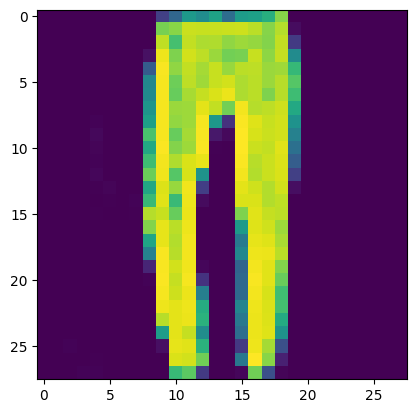

Dloss:  0.6321473
Gloss:  0.79646796
Dloss:  0.6321503
Gloss:  0.7964424
Dloss:  0.6321533
Gloss:  0.7964914
Dloss:  0.63215667
Gloss:  0.79646415
Dloss:  0.6321595
Gloss:  0.7965021
Dloss:  0.63216096
Gloss:  0.7964853
Dloss:  0.63216287
Gloss:  0.7965151
Dloss:  0.63216245
Gloss:  0.79650515
Dloss:  0.6321614
Gloss:  0.796528
Dloss:  0.6321608
Gloss:  0.7965244
Dloss:  0.6321604
Gloss:  0.7965438
Dloss:  0.63215876
Gloss:  0.79653853
Dloss:  0.632157
Gloss:  0.7965556
Dloss:  0.632156
Gloss:  0.79655296
Dloss:  0.63215446
Gloss:  0.79656476
Dloss:  0.6321532
Gloss:  0.79656863
Dloss:  0.6321501
Gloss:  0.796576
Dloss:  0.6321491
Gloss:  0.7965858
Dloss:  0.63214564
Gloss:  0.7965868
Dloss:  0.63214344
Gloss:  0.79659986
Dloss:  0.63214284
Gloss:  0.7966
Dloss:  0.6321406
Gloss:  0.79661775
Dloss:  0.63214034
Gloss:  0.79660714
Dloss:  0.6321387
Gloss:  0.79663473
Dloss:  0.6321384
Gloss:  0.7966221
Dloss:  0.6321375
Gloss:  0.79665357
Dloss:  0.6321378
Gloss:  0.7966333
Dloss:  0.632

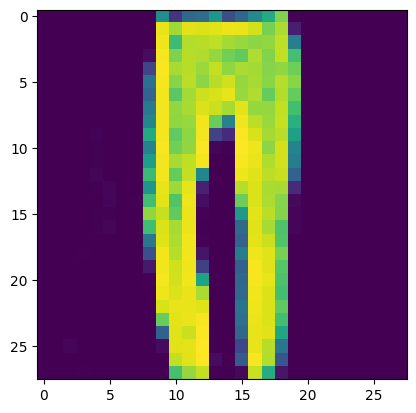

Dloss:  0.63214165
Gloss:  0.7966679
Dloss:  0.63214326
Gloss:  0.7966988
Dloss:  0.63214475
Gloss:  0.79668295
Dloss:  0.632146
Gloss:  0.7967101
Dloss:  0.63214487
Gloss:  0.7967018
Dloss:  0.63214475
Gloss:  0.7967264
Dloss:  0.6321452
Gloss:  0.79671395
Dloss:  0.6321441
Gloss:  0.7967412
Dloss:  0.63214403
Gloss:  0.7967299
Dloss:  0.63214236
Gloss:  0.79676014
Dloss:  0.6321418
Gloss:  0.79674995
Dloss:  0.632142
Gloss:  0.7967719
Dloss:  0.63214153
Gloss:  0.79676867
Dloss:  0.6321401
Gloss:  0.7967865
Dloss:  0.6321388
Gloss:  0.79678667
69 / 100
Dloss:  0.6321374
Gloss:  0.7968039
69 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


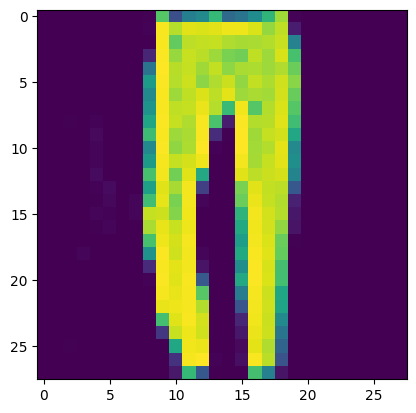

Dloss:  0.63213587
Gloss:  0.79680175
Dloss:  0.63213426
Gloss:  0.7968116
Dloss:  0.6321333
Gloss:  0.79681796
Dloss:  0.63213253
Gloss:  0.79682744
Dloss:  0.63213056
Gloss:  0.7968222
Dloss:  0.63212955
Gloss:  0.79684556
Dloss:  0.6321297
Gloss:  0.79683083
Dloss:  0.6321297
Gloss:  0.796865
Dloss:  0.6321316
Gloss:  0.79684335
Dloss:  0.6321349
Gloss:  0.7968811
Dloss:  0.6321352
Gloss:  0.7968619
Dloss:  0.6321355
Gloss:  0.7968929
Dloss:  0.63213605
Gloss:  0.79688203
Dloss:  0.6321365
Gloss:  0.79690367
Dloss:  0.6321367
Gloss:  0.79690003
Dloss:  0.6321362
Gloss:  0.7969141
Dloss:  0.6321347
Gloss:  0.7969128
Dloss:  0.63213277
Gloss:  0.7969267
Dloss:  0.63213086
Gloss:  0.7969254
Dloss:  0.6321273
Gloss:  0.79693323
Dloss:  0.632124
Gloss:  0.79693764
Dloss:  0.63212276
Gloss:  0.7969519
Dloss:  0.6321208
Gloss:  0.79695
Dloss:  0.6321192
Gloss:  0.7969637
Dloss:  0.63211715
Gloss:  0.7969726
Dloss:  0.63211524
Gloss:  0.7969788
Dloss:  0.63211375
Gloss:  0.7969898
Dloss:  0

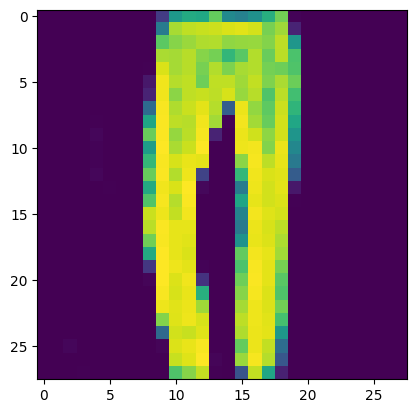

Dloss:  0.6321062
Gloss:  0.79702127
Dloss:  0.63210505
Gloss:  0.7970071
Dloss:  0.6321054
Gloss:  0.79704434
Dloss:  0.63210565
Gloss:  0.7970204
Dloss:  0.63210535
Gloss:  0.7970655
Dloss:  0.63210726
Gloss:  0.7970412
Dloss:  0.6321102
Gloss:  0.79708093
Dloss:  0.6321107
Gloss:  0.7970637
Dloss:  0.63211066
Gloss:  0.7970911
Dloss:  0.6321105
Gloss:  0.79707867
Dloss:  0.63210917
Gloss:  0.7971069
Dloss:  0.6321075
Gloss:  0.7970929
Dloss:  0.63210666
Gloss:  0.79711646
Dloss:  0.63210493
Gloss:  0.79711175
Dloss:  0.6321041
Gloss:  0.79712534
Dloss:  0.6321045
Gloss:  0.7971257
Dloss:  0.6321045
Gloss:  0.79713655
Dloss:  0.6321024
Gloss:  0.7971339
Dloss:  0.63210016
Gloss:  0.7971481
Dloss:  0.6320982
Gloss:  0.79714924
Dloss:  0.6320964
Gloss:  0.79715556
Dloss:  0.6320937
Gloss:  0.7971575
Dloss:  0.63209313
Gloss:  0.79716426
Dloss:  0.6320911
Gloss:  0.79716814
Dloss:  0.63208926
Gloss:  0.79717964
Dloss:  0.6320864
Gloss:  0.79718137
Dloss:  0.6320838
Gloss:  0.7971969
Dlo

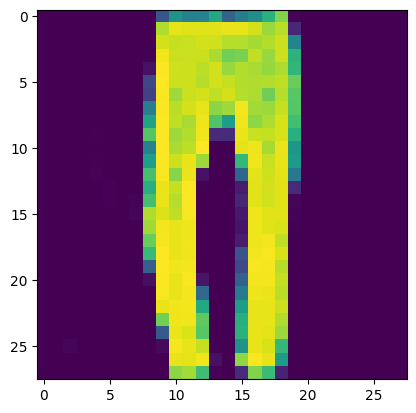

Dloss:  0.6320769
Gloss:  0.797239
Dloss:  0.632078
Gloss:  0.7972131
Dloss:  0.63208
Gloss:  0.797265
Dloss:  0.63208336
Gloss:  0.7972393
Dloss:  0.6320866
Gloss:  0.79728305
Dloss:  0.6320905
Gloss:  0.79726034
Dloss:  0.6320943
Gloss:  0.7972942
Dloss:  0.6320964
Gloss:  0.7972787
Dloss:  0.6320979
Gloss:  0.7973106
Dloss:  0.6320986
Gloss:  0.7972987
Dloss:  0.6320997
Gloss:  0.79732686
Dloss:  0.6320999
Gloss:  0.79731345
Dloss:  0.63209903
Gloss:  0.79734063
Dloss:  0.6320984
Gloss:  0.7973321
Dloss:  0.632099
Gloss:  0.79734397
Dloss:  0.63209784
Gloss:  0.7973441
Dloss:  0.63209635
Gloss:  0.7973505
Dloss:  0.63209546
Gloss:  0.79735756
Dloss:  0.6320946
Gloss:  0.79736906
Dloss:  0.6320932
Gloss:  0.79736483
Dloss:  0.63209057
Gloss:  0.79737866
Dloss:  0.63209015
Gloss:  0.7973762
Dloss:  0.63208807
Gloss:  0.79739225
Dloss:  0.63208663
Gloss:  0.79737955
Dloss:  0.6320853
Gloss:  0.7974008
Dloss:  0.63208413
Gloss:  0.797395
Dloss:  0.6320838
Gloss:  0.79741955
Dloss:  0.63

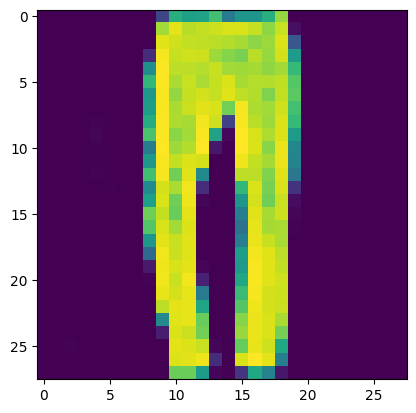

Dloss:  0.6320832
Gloss:  0.7974519
Dloss:  0.632084
Gloss:  0.7974386
Dloss:  0.6320836
Gloss:  0.7974595
Dloss:  0.63208246
Gloss:  0.79745877
Dloss:  0.6320809
Gloss:  0.7974721
Dloss:  0.6320792
Gloss:  0.79747146
Dloss:  0.6320792
Gloss:  0.79748553
Dloss:  0.6320776
Gloss:  0.7974869
Dloss:  0.63207525
Gloss:  0.7974957
Dloss:  0.63207346
Gloss:  0.7974971
Dloss:  0.63207096
Gloss:  0.79751265
Dloss:  0.63206977
Gloss:  0.79750615
Dloss:  0.6320691
Gloss:  0.7975202
Dloss:  0.6320672
Gloss:  0.7975186
Dloss:  0.63206816
Gloss:  0.79752856
Dloss:  0.63206655
Gloss:  0.797529
Dloss:  0.63206315
Gloss:  0.7975441
Dloss:  0.6320617
Gloss:  0.7975444
Dloss:  0.6320593
Gloss:  0.7975569
Dloss:  0.6320592
Gloss:  0.79755723
Dloss:  0.6320585
Gloss:  0.7975698
Dloss:  0.6320557
Gloss:  0.7975729
Dloss:  0.6320538
Gloss:  0.7975788
Dloss:  0.63205093
Gloss:  0.79758745
Dloss:  0.632048
Gloss:  0.7975832
Dloss:  0.6320467
Gloss:  0.79760605
Dloss:  0.6320468
Gloss:  0.79758894
Dloss:  0.63

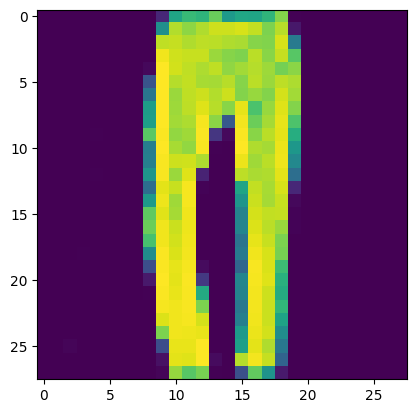

Dloss:  0.6320549
Gloss:  0.79761946
Dloss:  0.6320571
Gloss:  0.79766095
Dloss:  0.6320602
Gloss:  0.7976422
Dloss:  0.6320622
Gloss:  0.79767925
Dloss:  0.63206136
Gloss:  0.79766965
Dloss:  0.6320594
Gloss:  0.79769486
Dloss:  0.6320583
Gloss:  0.79768944
Dloss:  0.6320569
Gloss:  0.79770595
Dloss:  0.6320559
Gloss:  0.7976995
Dloss:  0.6320543
Gloss:  0.79772264
Dloss:  0.63205236
Gloss:  0.7977146
Dloss:  0.6320515
Gloss:  0.79774016
Dloss:  0.63205165
Gloss:  0.7977294
Dloss:  0.63205117
Gloss:  0.7977482
Dloss:  0.63205004
Gloss:  0.7977436
70 / 100
Dloss:  0.63204914
Gloss:  0.7977569
70 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


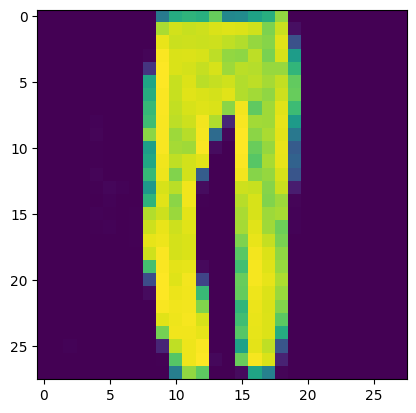

Dloss:  0.63204765
Gloss:  0.79776144
Dloss:  0.6320466
Gloss:  0.79777056
Dloss:  0.63204473
Gloss:  0.797774
Dloss:  0.6320432
Gloss:  0.797789
Dloss:  0.63204265
Gloss:  0.7977852
Dloss:  0.63204044
Gloss:  0.7977956
Dloss:  0.63203824
Gloss:  0.7977939
Dloss:  0.63203675
Gloss:  0.79781437
Dloss:  0.63203806
Gloss:  0.7978067
Dloss:  0.6320395
Gloss:  0.7978248
Dloss:  0.6320379
Gloss:  0.79781806
Dloss:  0.63203585
Gloss:  0.79783565
Dloss:  0.6320343
Gloss:  0.79783225
Dloss:  0.63203347
Gloss:  0.7978543
Dloss:  0.6320341
Gloss:  0.7978443
Dloss:  0.6320328
Gloss:  0.79786694
Dloss:  0.63203275
Gloss:  0.79786074
Dloss:  0.63202965
Gloss:  0.7978794
Dloss:  0.6320278
Gloss:  0.797869
Dloss:  0.63202566
Gloss:  0.7978944
Dloss:  0.6320236
Gloss:  0.7978834
Dloss:  0.6320229
Gloss:  0.7979166
Dloss:  0.63202226
Gloss:  0.7979078
Dloss:  0.63202125
Gloss:  0.79793197
Dloss:  0.6320202
Gloss:  0.7979262
Dloss:  0.6320203
Gloss:  0.79795605
Dloss:  0.6320202
Gloss:  0.7979403
Dloss: 

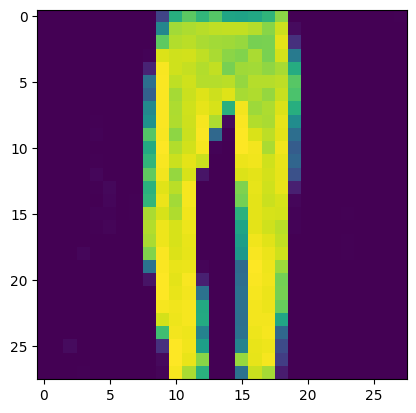

Dloss:  0.6320236
Gloss:  0.79798174
Dloss:  0.63202477
Gloss:  0.79801244
Dloss:  0.6320255
Gloss:  0.79799885
Dloss:  0.6320266
Gloss:  0.7980278
Dloss:  0.63202626
Gloss:  0.79802036
Dloss:  0.6320258
Gloss:  0.7980499
Dloss:  0.63202536
Gloss:  0.7980358
Dloss:  0.6320248
Gloss:  0.798064
Dloss:  0.6320241
Gloss:  0.7980544
Dloss:  0.6320236
Gloss:  0.79808086
Dloss:  0.6320211
Gloss:  0.7980748
Dloss:  0.63201946
Gloss:  0.79809934
Dloss:  0.632019
Gloss:  0.798091
Dloss:  0.6320184
Gloss:  0.79811674
Dloss:  0.63201976
Gloss:  0.79810727
Dloss:  0.6320203
Gloss:  0.7981253
Dloss:  0.6320198
Gloss:  0.7981225
Dloss:  0.6320182
Gloss:  0.7981401
Dloss:  0.6320146
Gloss:  0.7981349
Dloss:  0.6320122
Gloss:  0.7981581
Dloss:  0.6320118
Gloss:  0.7981494
Dloss:  0.63200957
Gloss:  0.7981726
Dloss:  0.6320086
Gloss:  0.7981654
Dloss:  0.6320075
Gloss:  0.7981945
Dloss:  0.6320073
Gloss:  0.79818016
Dloss:  0.63200665
Gloss:  0.79821295
Dloss:  0.6320054
Gloss:  0.7982014
Dloss:  0.6320

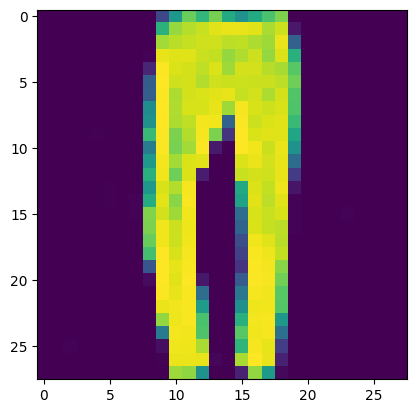

Dloss:  0.63200355
Gloss:  0.798235
Dloss:  0.6320047
Gloss:  0.7982705
Dloss:  0.6320048
Gloss:  0.79825556
Dloss:  0.632006
Gloss:  0.7982882
Dloss:  0.6320062
Gloss:  0.7982721
Dloss:  0.63200885
Gloss:  0.79829895
Dloss:  0.6320092
Gloss:  0.798291
Dloss:  0.6320079
Gloss:  0.7983094
Dloss:  0.6320056
Gloss:  0.7983064
Dloss:  0.6320033
Gloss:  0.7983258
Dloss:  0.63200253
Gloss:  0.79832196
Dloss:  0.632003
Gloss:  0.7983373
Dloss:  0.63200086
Gloss:  0.79833513
Dloss:  0.6320002
Gloss:  0.79835075
Dloss:  0.63200116
Gloss:  0.79834723
Dloss:  0.63199943
Gloss:  0.7983658
Dloss:  0.6319997
Gloss:  0.7983633
Dloss:  0.631998
Gloss:  0.79838103
Dloss:  0.6319958
Gloss:  0.7983857
Dloss:  0.63199425
Gloss:  0.79839784
Dloss:  0.631993
Gloss:  0.7984007
Dloss:  0.63199306
Gloss:  0.79840773
Dloss:  0.6319926
Gloss:  0.7984199
Dloss:  0.63199145
Gloss:  0.7984179
Dloss:  0.63198996
Gloss:  0.79843324
Dloss:  0.631988
Gloss:  0.7984322
Dloss:  0.631987
Gloss:  0.7984462
Dloss:  0.631984

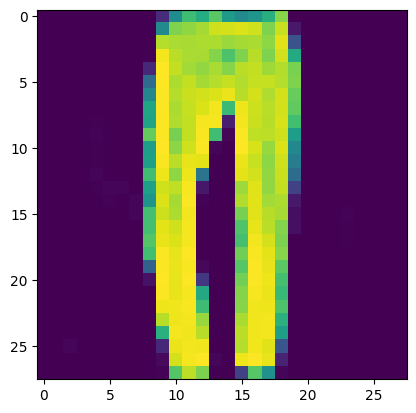

Dloss:  0.63197696
Gloss:  0.7984759
Dloss:  0.6319755
Gloss:  0.7984686
Dloss:  0.63197345
Gloss:  0.7984907
Dloss:  0.6319717
Gloss:  0.798481
Dloss:  0.6319713
Gloss:  0.7985109
Dloss:  0.63197094
Gloss:  0.79849744
Dloss:  0.63197285
Gloss:  0.7985356
Dloss:  0.6319744
Gloss:  0.7985163
Dloss:  0.63197577
Gloss:  0.79855734
Dloss:  0.6319774
Gloss:  0.7985365
Dloss:  0.631979
Gloss:  0.7985829
Dloss:  0.6319809
Gloss:  0.7985622
Dloss:  0.63198256
Gloss:  0.7985956
Dloss:  0.63198406
Gloss:  0.7985827
Dloss:  0.6319868
Gloss:  0.7986055
Dloss:  0.6319871
Gloss:  0.79860085
Dloss:  0.6319861
Gloss:  0.798619
Dloss:  0.6319847
Gloss:  0.7986207
Dloss:  0.6319827
Gloss:  0.7986326
Dloss:  0.63198054
Gloss:  0.7986375
Dloss:  0.63197875
Gloss:  0.79864466
Dloss:  0.63197595
Gloss:  0.7986569
Dloss:  0.63197446
Gloss:  0.79865706
Dloss:  0.63197243
Gloss:  0.79867506
Dloss:  0.6319707
Gloss:  0.79866624
Dloss:  0.6319689
Gloss:  0.79869294
Dloss:  0.63196933
Gloss:  0.7986831
Dloss:  0.

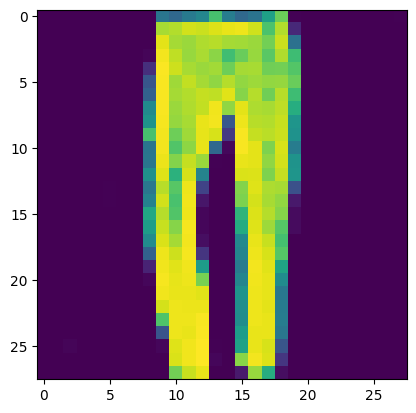

Dloss:  0.6319681
Gloss:  0.7987131
Dloss:  0.6319671
Gloss:  0.79873616
Dloss:  0.631966
Gloss:  0.79872715
Dloss:  0.631965
Gloss:  0.7987478
Dloss:  0.6319634
Gloss:  0.7987451
Dloss:  0.63196295
Gloss:  0.7987663
Dloss:  0.6319616
Gloss:  0.79876304
Dloss:  0.6319604
Gloss:  0.7987815
Dloss:  0.63195974
Gloss:  0.7987732
Dloss:  0.63195825
Gloss:  0.7988076
Dloss:  0.63195735
Gloss:  0.7987954
Dloss:  0.6319588
Gloss:  0.7988286
Dloss:  0.6319591
Gloss:  0.79881346
Dloss:  0.63196033
Gloss:  0.79884267
Dloss:  0.63195914
Gloss:  0.79883736
71 / 100
Dloss:  0.6319589
Gloss:  0.7988645
71 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


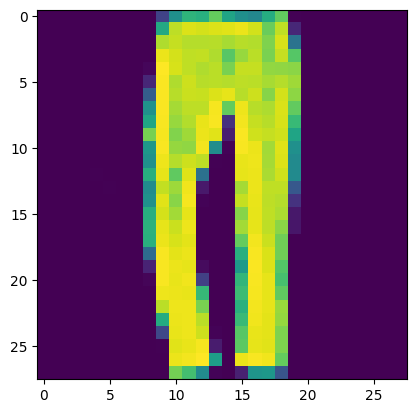

Dloss:  0.6319572
Gloss:  0.79885614
Dloss:  0.6319593
Gloss:  0.79888386
Dloss:  0.63195986
Gloss:  0.7988707
Dloss:  0.6319597
Gloss:  0.7989025
Dloss:  0.6319603
Gloss:  0.7988904
Dloss:  0.63195837
Gloss:  0.79891866
Dloss:  0.63195705
Gloss:  0.79890716
Dloss:  0.63195693
Gloss:  0.7989358
Dloss:  0.6319577
Gloss:  0.7989286
Dloss:  0.6319594
Gloss:  0.79894674
Dloss:  0.6319574
Gloss:  0.7989451
Dloss:  0.6319555
Gloss:  0.79896045
Dloss:  0.63195395
Gloss:  0.7989585
Dloss:  0.6319541
Gloss:  0.7989761
Dloss:  0.63195324
Gloss:  0.79897386
Dloss:  0.6319528
Gloss:  0.79899174
Dloss:  0.63195086
Gloss:  0.79899055
Dloss:  0.6319491
Gloss:  0.7990062
Dloss:  0.63194907
Gloss:  0.7990121
Dloss:  0.6319477
Gloss:  0.799027
Dloss:  0.6319459
Gloss:  0.79902947
Dloss:  0.6319434
Gloss:  0.79904044
Dloss:  0.6319409
Gloss:  0.799051
Dloss:  0.6319389
Gloss:  0.7990473
Dloss:  0.63193625
Gloss:  0.79906905
Dloss:  0.631936
Gloss:  0.7990652
Dloss:  0.63193464
Gloss:  0.79908866
Dloss:  

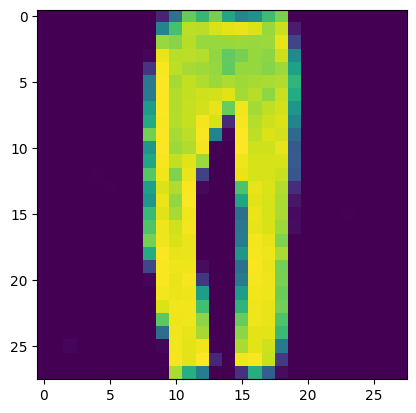

Dloss:  0.63193226
Gloss:  0.7991241
Dloss:  0.6319319
Gloss:  0.7991078
Dloss:  0.6319313
Gloss:  0.7991426
Dloss:  0.63193434
Gloss:  0.7991287
Dloss:  0.6319334
Gloss:  0.79915875
Dloss:  0.6319325
Gloss:  0.7991443
Dloss:  0.63193387
Gloss:  0.7991765
Dloss:  0.6319333
Gloss:  0.79916424
Dloss:  0.6319326
Gloss:  0.7991972
Dloss:  0.6319339
Gloss:  0.7991824
Dloss:  0.6319322
Gloss:  0.79921967
Dloss:  0.63193154
Gloss:  0.7992058
Dloss:  0.6319312
Gloss:  0.7992291
Dloss:  0.63192904
Gloss:  0.7992236
Dloss:  0.6319286
Gloss:  0.79924005
Dloss:  0.63192815
Gloss:  0.79923505
Dloss:  0.6319281
Gloss:  0.79925686
Dloss:  0.63192713
Gloss:  0.7992488
Dloss:  0.63192487
Gloss:  0.7992772
Dloss:  0.6319233
Gloss:  0.7992708
Dloss:  0.6319216
Gloss:  0.799292
Dloss:  0.63192016
Gloss:  0.7992841
Dloss:  0.63192075
Gloss:  0.7993044
Dloss:  0.6319188
Gloss:  0.79929477
Dloss:  0.6319208
Gloss:  0.7993244
Dloss:  0.63192105
Gloss:  0.79931074
Dloss:  0.63192093
Gloss:  0.7993415
Dloss:  0

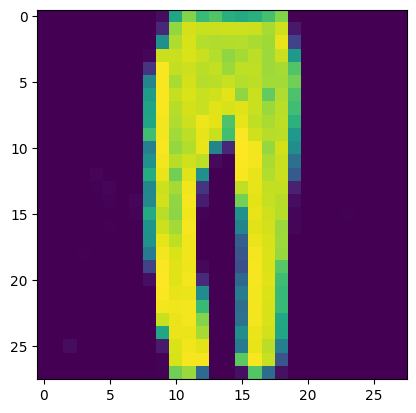

Dloss:  0.6319153
Gloss:  0.7993697
Dloss:  0.6319142
Gloss:  0.7993586
Dloss:  0.63191384
Gloss:  0.79939556
Dloss:  0.6319148
Gloss:  0.79938036
Dloss:  0.6319145
Gloss:  0.7994167
Dloss:  0.63191676
Gloss:  0.7993946
Dloss:  0.6319184
Gloss:  0.79943293
Dloss:  0.63191956
Gloss:  0.79941845
Dloss:  0.63191944
Gloss:  0.799449
Dloss:  0.63191867
Gloss:  0.79943854
Dloss:  0.63191676
Gloss:  0.79945433
Dloss:  0.6319156
Gloss:  0.7994545
Dloss:  0.6319128
Gloss:  0.7994679
Dloss:  0.6319113
Gloss:  0.7994706
Dloss:  0.63191116
Gloss:  0.7994831
Dloss:  0.63190955
Gloss:  0.79948896
Dloss:  0.63190734
Gloss:  0.79949105
Dloss:  0.6319055
Gloss:  0.79950535
Dloss:  0.6319039
Gloss:  0.79949987
Dloss:  0.6319039
Gloss:  0.79951984
Dloss:  0.63190293
Gloss:  0.79950815
Dloss:  0.6319029
Gloss:  0.7995298
Dloss:  0.6319002
Gloss:  0.79952276
Dloss:  0.63189995
Gloss:  0.79954505
Dloss:  0.6318998
Gloss:  0.7995398
Dloss:  0.6318999
Gloss:  0.7995683
Dloss:  0.6319031
Gloss:  0.79956216
Dlo

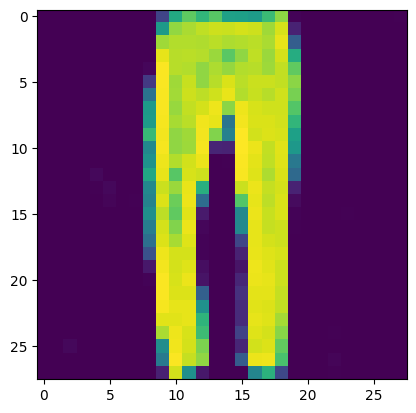

Dloss:  0.63189965
Gloss:  0.79960346
Dloss:  0.63189757
Gloss:  0.7996211
Dloss:  0.6318948
Gloss:  0.7996234
Dloss:  0.63189137
Gloss:  0.79963696
Dloss:  0.6318892
Gloss:  0.7996392
Dloss:  0.6318863
Gloss:  0.7996468
Dloss:  0.63188523
Gloss:  0.7996537
Dloss:  0.6318823
Gloss:  0.79966325
Dloss:  0.6318809
Gloss:  0.799664
Dloss:  0.63187957
Gloss:  0.79967827
Dloss:  0.63187987
Gloss:  0.7996773
Dloss:  0.63187844
Gloss:  0.79969347
Dloss:  0.63187695
Gloss:  0.79969317
Dloss:  0.6318746
Gloss:  0.7997125
Dloss:  0.6318746
Gloss:  0.7997042
Dloss:  0.6318735
Gloss:  0.79972667
Dloss:  0.63187194
Gloss:  0.7997188
Dloss:  0.631871
Gloss:  0.7997522
Dloss:  0.6318695
Gloss:  0.7997383
Dloss:  0.6318698
Gloss:  0.79977745
Dloss:  0.6318713
Gloss:  0.79975593
Dloss:  0.631872
Gloss:  0.79980433
Dloss:  0.6318757
Gloss:  0.7997803
Dloss:  0.63187724
Gloss:  0.79982305
Dloss:  0.6318789
Gloss:  0.7998023
Dloss:  0.6318795
Gloss:  0.79983896
Dloss:  0.63188034
Gloss:  0.79982585
Dloss: 

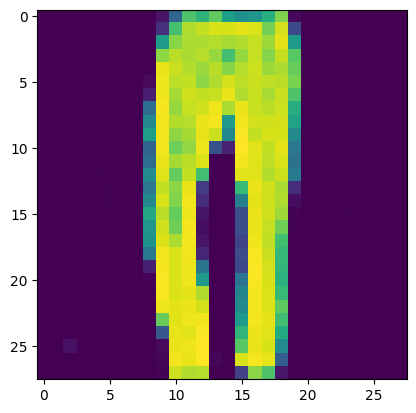

Dloss:  0.63187975
Gloss:  0.79986525
Dloss:  0.63187885
Gloss:  0.7998793
Dloss:  0.63187885
Gloss:  0.79988194
Dloss:  0.6318779
Gloss:  0.79989964
Dloss:  0.6318759
Gloss:  0.79989964
Dloss:  0.6318744
Gloss:  0.7999214
Dloss:  0.6318731
Gloss:  0.7999184
Dloss:  0.6318699
Gloss:  0.79993623
Dloss:  0.6318681
Gloss:  0.79993516
Dloss:  0.6318652
Gloss:  0.79995733
Dloss:  0.6318637
Gloss:  0.7999566
Dloss:  0.63186216
Gloss:  0.7999766
Dloss:  0.6318611
Gloss:  0.799975
Dloss:  0.63185793
Gloss:  0.7999861
Dloss:  0.63185513
Gloss:  0.7999919
72 / 100
Dloss:  0.63185424
Gloss:  0.80000234
72 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


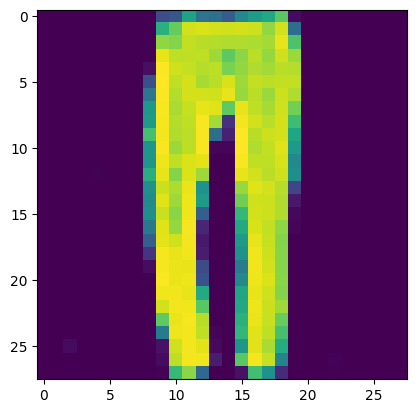

Dloss:  0.63185424
Gloss:  0.800008
Dloss:  0.6318543
Gloss:  0.8000139
Dloss:  0.63185346
Gloss:  0.800018
Dloss:  0.63185024
Gloss:  0.8000266
Dloss:  0.63184774
Gloss:  0.80002666
Dloss:  0.63184476
Gloss:  0.80004686
Dloss:  0.63184404
Gloss:  0.8000374
Dloss:  0.6318441
Gloss:  0.800066
Dloss:  0.63184637
Gloss:  0.80005413
Dloss:  0.63184786
Gloss:  0.80008256
Dloss:  0.6318471
Gloss:  0.80007315
Dloss:  0.6318458
Gloss:  0.80009586
Dloss:  0.6318446
Gloss:  0.8000843
Dloss:  0.631846
Gloss:  0.8001062
Dloss:  0.63184506
Gloss:  0.8000976
Dloss:  0.6318455
Gloss:  0.8001285
Dloss:  0.6318461
Gloss:  0.8001141
Dloss:  0.63184565
Gloss:  0.8001491
Dloss:  0.63184613
Gloss:  0.80013233
Dloss:  0.6318463
Gloss:  0.8001669
Dloss:  0.63184583
Gloss:  0.8001497
Dloss:  0.63184565
Gloss:  0.8001802
Dloss:  0.6318447
Gloss:  0.8001707
Dloss:  0.6318438
Gloss:  0.8001902
Dloss:  0.63184124
Gloss:  0.80018544
Dloss:  0.6318405
Gloss:  0.8002133
Dloss:  0.6318409
Gloss:  0.8002034
Dloss:  0.

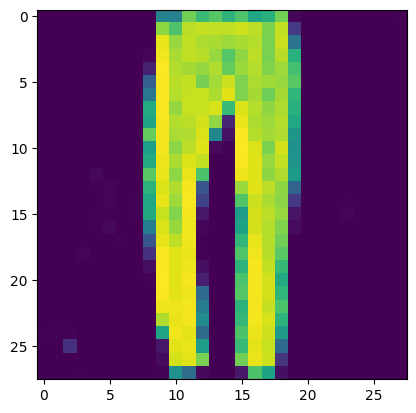

Dloss:  0.6318367
Gloss:  0.800236
Dloss:  0.6318367
Gloss:  0.80026233
Dloss:  0.63183576
Gloss:  0.800247
Dloss:  0.6318356
Gloss:  0.80027336
Dloss:  0.631834
Gloss:  0.800265
Dloss:  0.63183326
Gloss:  0.800291
Dloss:  0.6318341
Gloss:  0.800276
Dloss:  0.6318336
Gloss:  0.80030733
Dloss:  0.63183314
Gloss:  0.80029607
Dloss:  0.6318336
Gloss:  0.8003171
Dloss:  0.6318317
Gloss:  0.80030495
Dloss:  0.63183117
Gloss:  0.800333
Dloss:  0.6318302
Gloss:  0.8003204
Dloss:  0.63182914
Gloss:  0.80035233
Dloss:  0.63182855
Gloss:  0.8003412
Dloss:  0.631829
Gloss:  0.80036306
Dloss:  0.6318294
Gloss:  0.8003604
Dloss:  0.63182855
Gloss:  0.80037504
Dloss:  0.63182634
Gloss:  0.8003736
Dloss:  0.63182503
Gloss:  0.8003974
Dloss:  0.6318239
Gloss:  0.8003855
Dloss:  0.6318229
Gloss:  0.8004168
Dloss:  0.63182366
Gloss:  0.80040085
Dloss:  0.6318246
Gloss:  0.80043274
Dloss:  0.63182485
Gloss:  0.80041856
Dloss:  0.6318235
Gloss:  0.8004413
Dloss:  0.63182175
Gloss:  0.80043316
Dloss:  0.63

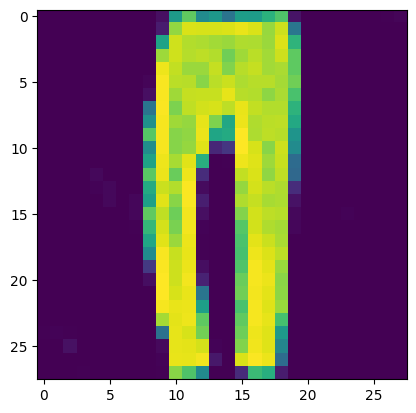

Dloss:  0.6318153
Gloss:  0.80046064
Dloss:  0.6318142
Gloss:  0.8004682
Dloss:  0.63181126
Gloss:  0.80047655
Dloss:  0.6318075
Gloss:  0.8004789
Dloss:  0.6318041
Gloss:  0.8004893
Dloss:  0.6318029
Gloss:  0.80049175
Dloss:  0.6318021
Gloss:  0.8005013
Dloss:  0.6318014
Gloss:  0.8005017
Dloss:  0.63179946
Gloss:  0.8005136
Dloss:  0.6317968
Gloss:  0.80051315
Dloss:  0.6317939
Gloss:  0.8005284
Dloss:  0.6317919
Gloss:  0.80052865
Dloss:  0.63178855
Gloss:  0.80055225
Dloss:  0.6317874
Gloss:  0.80054384
Dloss:  0.63178813
Gloss:  0.80056614
Dloss:  0.6317853
Gloss:  0.80055666
Dloss:  0.6317844
Gloss:  0.8005862
Dloss:  0.63178355
Gloss:  0.8005697
Dloss:  0.6317831
Gloss:  0.8006095
Dloss:  0.631784
Gloss:  0.8005849
Dloss:  0.631786
Gloss:  0.80062586
Dloss:  0.63178897
Gloss:  0.8006057
Dloss:  0.63179165
Gloss:  0.80064565
Dloss:  0.63179374
Gloss:  0.80062824
Dloss:  0.6317943
Gloss:  0.8006553
Dloss:  0.6317934
Gloss:  0.8006492
Dloss:  0.63179237
Gloss:  0.80066544
Dloss:  

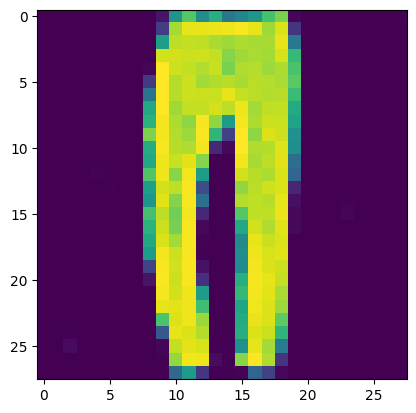

Dloss:  0.6317842
Gloss:  0.80069035
Dloss:  0.63178176
Gloss:  0.8006875
Dloss:  0.63177925
Gloss:  0.8007088
Dloss:  0.6317766
Gloss:  0.80070347
Dloss:  0.6317752
Gloss:  0.80072474
Dloss:  0.63177425
Gloss:  0.800717
Dloss:  0.63177365
Gloss:  0.800736
Dloss:  0.63177097
Gloss:  0.8007292
Dloss:  0.63176906
Gloss:  0.8007494
Dloss:  0.6317686
Gloss:  0.80074686
Dloss:  0.63176894
Gloss:  0.8007708
Dloss:  0.631769
Gloss:  0.8007625
Dloss:  0.6317685
Gloss:  0.8007904
Dloss:  0.6317677
Gloss:  0.80077505
Dloss:  0.6317699
Gloss:  0.800806
Dloss:  0.63177145
Gloss:  0.8007995
Dloss:  0.63177115
Gloss:  0.8008256
Dloss:  0.6317692
Gloss:  0.8008188
Dloss:  0.63176817
Gloss:  0.8008442
Dloss:  0.63176835
Gloss:  0.8008363
Dloss:  0.6317683
Gloss:  0.800856
Dloss:  0.63176745
Gloss:  0.80085087
Dloss:  0.63176787
Gloss:  0.800866
Dloss:  0.631766
Gloss:  0.80085915
Dloss:  0.63176435
Gloss:  0.8008774
Dloss:  0.631762
Gloss:  0.8008752
Dloss:  0.63175946
Gloss:  0.8008909
Dloss:  0.6317

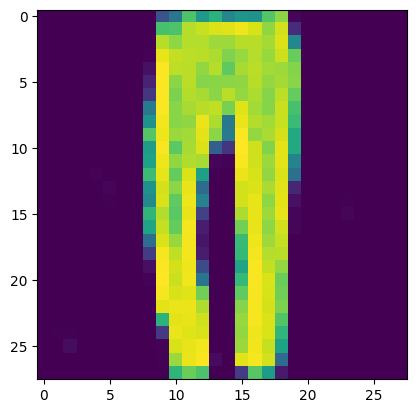

Dloss:  0.6317511
Gloss:  0.8009132
Dloss:  0.6317503
Gloss:  0.8009156
Dloss:  0.6317484
Gloss:  0.8009251
Dloss:  0.63174605
Gloss:  0.8009326
Dloss:  0.6317443
Gloss:  0.8009441
Dloss:  0.63174146
Gloss:  0.8009469
Dloss:  0.63173854
Gloss:  0.8009592
Dloss:  0.63173646
Gloss:  0.80096024
Dloss:  0.63173455
Gloss:  0.8009738
Dloss:  0.63173205
Gloss:  0.8009779
Dloss:  0.63172877
Gloss:  0.8009883
Dloss:  0.6317257
Gloss:  0.80099183
Dloss:  0.6317242
Gloss:  0.801007
Dloss:  0.63172203
Gloss:  0.8010026
Dloss:  0.6317207
Gloss:  0.8010328
73 / 100
Dloss:  0.6317226
Gloss:  0.8010151
73 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


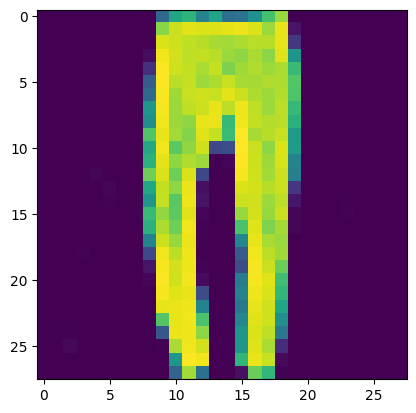

Dloss:  0.6317234
Gloss:  0.8010573
Dloss:  0.63172567
Gloss:  0.80103546
Dloss:  0.6317265
Gloss:  0.80108017
Dloss:  0.63172734
Gloss:  0.8010601
Dloss:  0.6317298
Gloss:  0.8011021
Dloss:  0.631731
Gloss:  0.8010839
Dloss:  0.631732
Gloss:  0.8011154
Dloss:  0.631732
Gloss:  0.8011049
Dloss:  0.6317321
Gloss:  0.80112755
Dloss:  0.63173205
Gloss:  0.8011196
Dloss:  0.6317303
Gloss:  0.80114245
Dloss:  0.6317288
Gloss:  0.8011343
Dloss:  0.6317261
Gloss:  0.8011559
Dloss:  0.6317237
Gloss:  0.8011499
Dloss:  0.63172185
Gloss:  0.8011745
Dloss:  0.6317207
Gloss:  0.8011665
Dloss:  0.63171995
Gloss:  0.80119395
Dloss:  0.63171947
Gloss:  0.8011839
Dloss:  0.6317177
Gloss:  0.80120337
Dloss:  0.63171506
Gloss:  0.80119604
Dloss:  0.63171375
Gloss:  0.8012222
Dloss:  0.63171196
Gloss:  0.80121565
Dloss:  0.6317107
Gloss:  0.80124766
Dloss:  0.63171107
Gloss:  0.8012334
Dloss:  0.6317103
Gloss:  0.8012723
Dloss:  0.6317101
Gloss:  0.80125654
Dloss:  0.6317134
Gloss:  0.80129737
Dloss:  0.

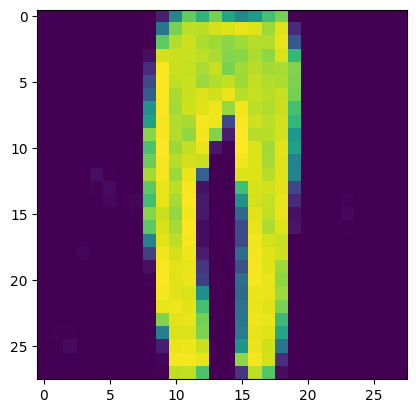

Dloss:  0.6317188
Gloss:  0.8013257
Dloss:  0.6317174
Gloss:  0.80131626
Dloss:  0.6317151
Gloss:  0.80134094
Dloss:  0.63171333
Gloss:  0.8013334
Dloss:  0.63171154
Gloss:  0.80135685
Dloss:  0.63170946
Gloss:  0.8013473
Dloss:  0.63170904
Gloss:  0.8013677
Dloss:  0.63170666
Gloss:  0.80136037
Dloss:  0.63170534
Gloss:  0.801382
Dloss:  0.631705
Gloss:  0.8013776
Dloss:  0.63170165
Gloss:  0.8013977
Dloss:  0.6316987
Gloss:  0.80139595
Dloss:  0.6316962
Gloss:  0.8014124
Dloss:  0.6316941
Gloss:  0.80141383
Dloss:  0.6316928
Gloss:  0.8014252
Dloss:  0.6316934
Gloss:  0.8014311
Dloss:  0.63169235
Gloss:  0.80143785
Dloss:  0.6316913
Gloss:  0.80144763
Dloss:  0.6316888
Gloss:  0.80144835
Dloss:  0.6316861
Gloss:  0.80146456
Dloss:  0.6316853
Gloss:  0.8014585
Dloss:  0.63168484
Gloss:  0.80148137
Dloss:  0.6316859
Gloss:  0.80147254
Dloss:  0.6316848
Gloss:  0.8015006
Dloss:  0.6316837
Gloss:  0.80148757
Dloss:  0.6316834
Gloss:  0.80151695
Dloss:  0.63168275
Gloss:  0.8015055
Dloss:

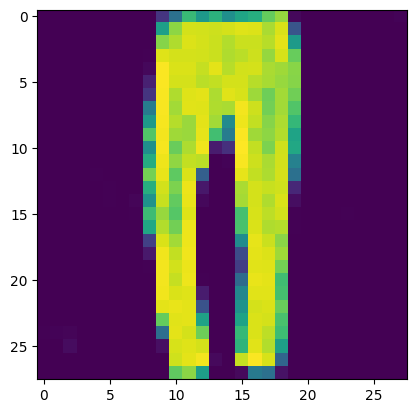

Dloss:  0.6316767
Gloss:  0.8015434
Dloss:  0.6316772
Gloss:  0.8015584
Dloss:  0.63167405
Gloss:  0.80156565
Dloss:  0.6316723
Gloss:  0.8015725
Dloss:  0.63167053
Gloss:  0.80157983
Dloss:  0.6316697
Gloss:  0.80159134
Dloss:  0.6316687
Gloss:  0.8015946
Dloss:  0.6316671
Gloss:  0.80160624
Dloss:  0.6316642
Gloss:  0.80161536
Dloss:  0.6316604
Gloss:  0.80161834
Dloss:  0.63165724
Gloss:  0.801626
Dloss:  0.6316544
Gloss:  0.80163383
Dloss:  0.6316517
Gloss:  0.8016428
Dloss:  0.6316498
Gloss:  0.8016492
Dloss:  0.63164926
Gloss:  0.8016555
Dloss:  0.6316465
Gloss:  0.8016666
Dloss:  0.63164407
Gloss:  0.80166805
Dloss:  0.6316419
Gloss:  0.80168504
Dloss:  0.63163847
Gloss:  0.80169034
Dloss:  0.6316363
Gloss:  0.80170494
Dloss:  0.6316334
Gloss:  0.80171114
Dloss:  0.6316328
Gloss:  0.80172074
Dloss:  0.6316292
Gloss:  0.8017276
Dloss:  0.6316282
Gloss:  0.8017399
Dloss:  0.631626
Gloss:  0.801743
Dloss:  0.6316241
Gloss:  0.80176294
Dloss:  0.6316218
Gloss:  0.8017621
Dloss:  0.6

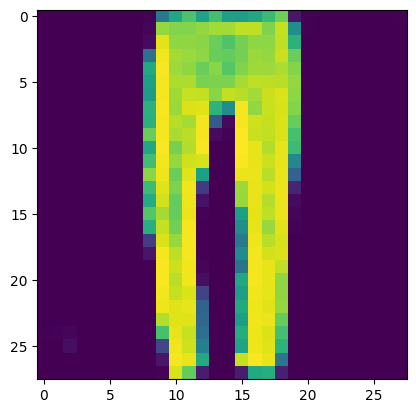

Dloss:  0.63161814
Gloss:  0.80180305
Dloss:  0.63161814
Gloss:  0.8018468
Dloss:  0.6316186
Gloss:  0.80182576
Dloss:  0.63162154
Gloss:  0.8018843
Dloss:  0.63162374
Gloss:  0.80185777
Dloss:  0.63162804
Gloss:  0.8019106
Dloss:  0.63163376
Gloss:  0.8018882
Dloss:  0.63163763
Gloss:  0.8019305
Dloss:  0.6316385
Gloss:  0.80191797
Dloss:  0.6316377
Gloss:  0.80194026
Dloss:  0.63163525
Gloss:  0.8019426
Dloss:  0.63163435
Gloss:  0.8019604
Dloss:  0.6316343
Gloss:  0.80196047
Dloss:  0.6316322
Gloss:  0.8019786
Dloss:  0.63163173
Gloss:  0.8019744
Dloss:  0.6316304
Gloss:  0.801996
Dloss:  0.6316288
Gloss:  0.80199987
Dloss:  0.6316268
Gloss:  0.80201846
Dloss:  0.6316256
Gloss:  0.80201906
Dloss:  0.6316236
Gloss:  0.8020343
Dloss:  0.63162136
Gloss:  0.80203694
Dloss:  0.6316177
Gloss:  0.8020528
Dloss:  0.63161594
Gloss:  0.80204743
Dloss:  0.63161427
Gloss:  0.802073
Dloss:  0.6316133
Gloss:  0.80206203
Dloss:  0.63161206
Gloss:  0.80208904
Dloss:  0.6316125
Gloss:  0.80207676
Dl

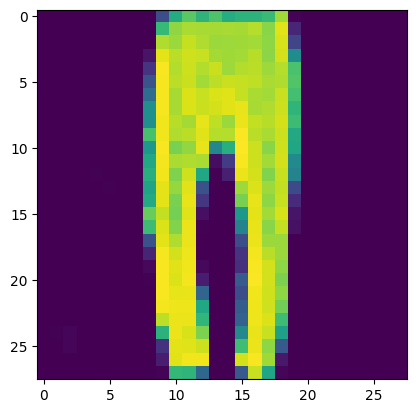

Dloss:  0.6316086
Gloss:  0.8021102
Dloss:  0.6316088
Gloss:  0.80213666
Dloss:  0.6316078
Gloss:  0.8021321
Dloss:  0.63160753
Gloss:  0.80215585
Dloss:  0.63160604
Gloss:  0.8021482
Dloss:  0.6316055
Gloss:  0.80217457
Dloss:  0.6316046
Gloss:  0.8021602
Dloss:  0.63160336
Gloss:  0.80218935
Dloss:  0.6316033
Gloss:  0.80217624
Dloss:  0.6316042
Gloss:  0.8022133
Dloss:  0.6316042
Gloss:  0.80219764
Dloss:  0.6316033
Gloss:  0.8022316
Dloss:  0.6316027
Gloss:  0.8022232
Dloss:  0.631601
Gloss:  0.8022507
Dloss:  0.63159925
Gloss:  0.802246
74 / 100
Dloss:  0.6315992
Gloss:  0.80226576
74 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


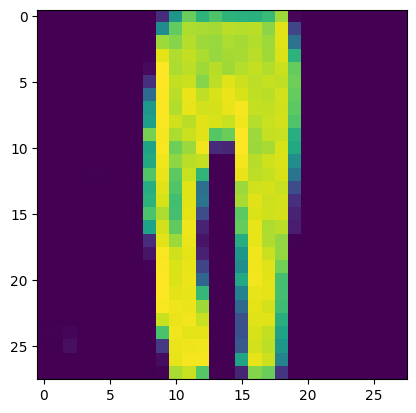

Dloss:  0.6315979
Gloss:  0.80226016
Dloss:  0.63159704
Gloss:  0.8022699
Dloss:  0.63159597
Gloss:  0.80227506
Dloss:  0.63159287
Gloss:  0.802287
Dloss:  0.631591
Gloss:  0.80229074
Dloss:  0.6315891
Gloss:  0.8023084
Dloss:  0.6315881
Gloss:  0.80230266
Dloss:  0.6315862
Gloss:  0.8023231
Dloss:  0.6315845
Gloss:  0.80231714
Dloss:  0.63158315
Gloss:  0.80233485
Dloss:  0.6315801
Gloss:  0.8023385
Dloss:  0.63157845
Gloss:  0.80234706
Dloss:  0.63157606
Gloss:  0.8023511
Dloss:  0.6315758
Gloss:  0.80236655
Dloss:  0.63157374
Gloss:  0.8023649
Dloss:  0.63157237
Gloss:  0.8023857
Dloss:  0.63157094
Gloss:  0.80238235
Dloss:  0.6315696
Gloss:  0.80240726
Dloss:  0.6315675
Gloss:  0.8024004
Dloss:  0.63156444
Gloss:  0.802425
Dloss:  0.6315619
Gloss:  0.80241454
Dloss:  0.6315615
Gloss:  0.8024422
Dloss:  0.63155997
Gloss:  0.8024354
Dloss:  0.63155866
Gloss:  0.8024514
Dloss:  0.6315572
Gloss:  0.8024487
Dloss:  0.6315552
Gloss:  0.80246985
Dloss:  0.6315533
Gloss:  0.80246025
Dloss:

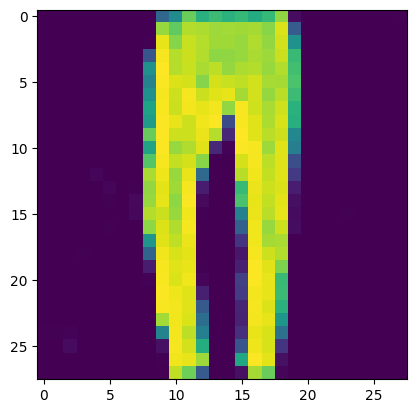

Dloss:  0.63154906
Gloss:  0.8024909
Dloss:  0.63154614
Gloss:  0.80251163
Dloss:  0.6315442
Gloss:  0.80250293
Dloss:  0.6315431
Gloss:  0.80251944
Dloss:  0.6315405
Gloss:  0.8025165
Dloss:  0.63153857
Gloss:  0.8025433
Dloss:  0.631537
Gloss:  0.80252254
Dloss:  0.631538
Gloss:  0.8025674
Dloss:  0.6315395
Gloss:  0.80254644
Dloss:  0.63154256
Gloss:  0.8025872
Dloss:  0.6315433
Gloss:  0.8025743
Dloss:  0.63154143
Gloss:  0.8026042
Dloss:  0.6315405
Gloss:  0.8025953
Dloss:  0.63153934
Gloss:  0.8026183
Dloss:  0.63153887
Gloss:  0.8026078
Dloss:  0.63153875
Gloss:  0.8026345
Dloss:  0.631538
Gloss:  0.8026235
Dloss:  0.63153756
Gloss:  0.8026518
Dloss:  0.63153654
Gloss:  0.80264056
Dloss:  0.6315357
Gloss:  0.8026708
Dloss:  0.63153553
Gloss:  0.80265427
Dloss:  0.6315349
Gloss:  0.802683
Dloss:  0.63153505
Gloss:  0.80267316
Dloss:  0.63153434
Gloss:  0.80270195
Dloss:  0.6315333
Gloss:  0.8026918
Dloss:  0.6315313
Gloss:  0.8027134
Dloss:  0.6315301
Gloss:  0.8027082
Dloss:  0.

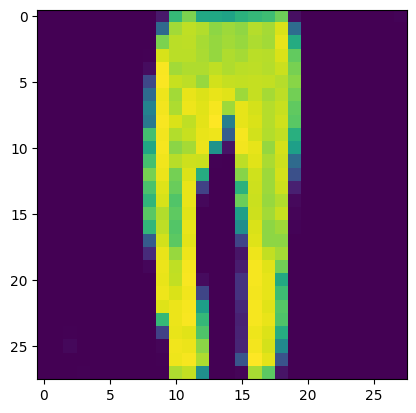

Dloss:  0.6315233
Gloss:  0.80273885
Dloss:  0.6315209
Gloss:  0.8027595
Dloss:  0.6315178
Gloss:  0.80275863
Dloss:  0.6315145
Gloss:  0.80277795
Dloss:  0.63151157
Gloss:  0.8027768
Dloss:  0.6315113
Gloss:  0.8027896
Dloss:  0.63151026
Gloss:  0.80278933
Dloss:  0.63150746
Gloss:  0.80280143
Dloss:  0.6315058
Gloss:  0.80280757
Dloss:  0.6315041
Gloss:  0.802811
Dloss:  0.63150126
Gloss:  0.80281806
Dloss:  0.6314988
Gloss:  0.80282545
Dloss:  0.63149476
Gloss:  0.8028313
Dloss:  0.63149285
Gloss:  0.8028433
Dloss:  0.6314923
Gloss:  0.8028437
Dloss:  0.63149
Gloss:  0.8028584
Dloss:  0.63148856
Gloss:  0.8028566
Dloss:  0.631487
Gloss:  0.80287576
Dloss:  0.6314848
Gloss:  0.8028679
Dloss:  0.6314836
Gloss:  0.8028912
Dloss:  0.6314821
Gloss:  0.80288476
Dloss:  0.6314815
Gloss:  0.8029049
Dloss:  0.63147867
Gloss:  0.8028937
Dloss:  0.6314782
Gloss:  0.8029242
Dloss:  0.63147795
Gloss:  0.8029061
Dloss:  0.6314784
Gloss:  0.80295026
Dloss:  0.6314805
Gloss:  0.802924
Dloss:  0.631

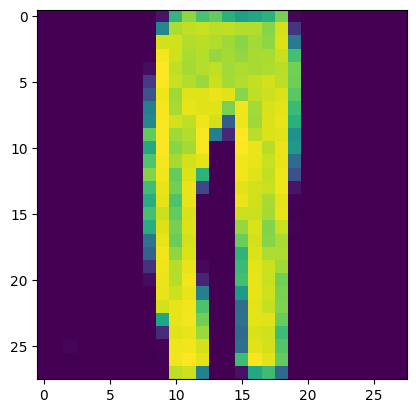

Dloss:  0.63148785
Gloss:  0.8029721
Dloss:  0.6314873
Gloss:  0.8029966
Dloss:  0.6314865
Gloss:  0.80299336
Dloss:  0.63148487
Gloss:  0.8030148
Dloss:  0.6314826
Gloss:  0.80301046
Dloss:  0.6314809
Gloss:  0.80303067
Dloss:  0.6314799
Gloss:  0.80302554
Dloss:  0.6314772
Gloss:  0.80304855
Dloss:  0.6314747
Gloss:  0.8030356
Dloss:  0.6314737
Gloss:  0.8030629
Dloss:  0.63147205
Gloss:  0.8030525
Dloss:  0.63147205
Gloss:  0.803079
Dloss:  0.63147193
Gloss:  0.8030663
Dloss:  0.6314704
Gloss:  0.8030932
Dloss:  0.6314703
Gloss:  0.80308396
Dloss:  0.63147074
Gloss:  0.80310994
Dloss:  0.63146967
Gloss:  0.80309653
Dloss:  0.6314692
Gloss:  0.80312926
Dloss:  0.6314686
Gloss:  0.80311507
Dloss:  0.6314688
Gloss:  0.8031458
Dloss:  0.6314682
Gloss:  0.8031362
Dloss:  0.631466
Gloss:  0.8031628
Dloss:  0.6314654
Gloss:  0.803158
Dloss:  0.6314621
Gloss:  0.80317515
Dloss:  0.6314608
Gloss:  0.80317765
Dloss:  0.6314579
Gloss:  0.8031893
Dloss:  0.63145685
Gloss:  0.8031888
Dloss:  0.6

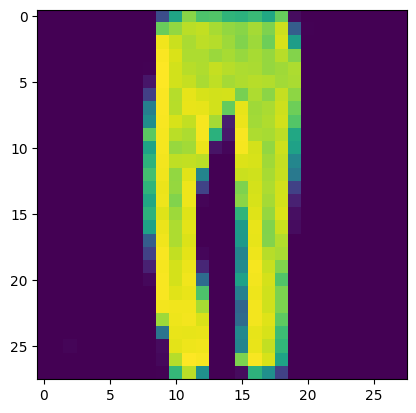

Dloss:  0.63145024
Gloss:  0.8032172
Dloss:  0.63144886
Gloss:  0.80323523
Dloss:  0.6314468
Gloss:  0.8032357
Dloss:  0.6314461
Gloss:  0.8032598
Dloss:  0.63144374
Gloss:  0.80325466
Dloss:  0.6314419
Gloss:  0.80327374
Dloss:  0.6314403
Gloss:  0.80326676
Dloss:  0.63143784
Gloss:  0.8032867
Dloss:  0.6314368
Gloss:  0.80327934
Dloss:  0.6314354
Gloss:  0.8033101
Dloss:  0.63143456
Gloss:  0.8032994
Dloss:  0.63143575
Gloss:  0.803333
Dloss:  0.6314357
Gloss:  0.80332285
Dloss:  0.6314337
Gloss:  0.8033483
Dloss:  0.63143337
Gloss:  0.80334777
75 / 100
Dloss:  0.63143176
Gloss:  0.8033598
75 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


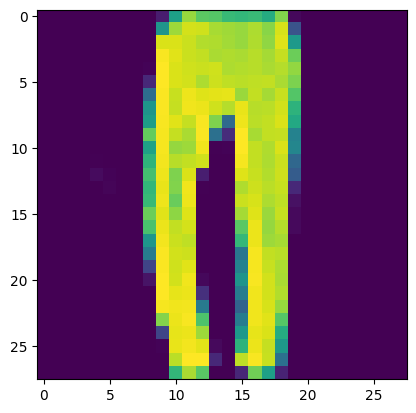

Dloss:  0.6314295
Gloss:  0.8033628
Dloss:  0.63143
Gloss:  0.80337274
Dloss:  0.63142926
Gloss:  0.8033727
Dloss:  0.63142675
Gloss:  0.8033852
Dloss:  0.6314246
Gloss:  0.8033906
Dloss:  0.6314222
Gloss:  0.8034049
Dloss:  0.6314198
Gloss:  0.80339646
Dloss:  0.63141763
Gloss:  0.80342007
Dloss:  0.6314177
Gloss:  0.8034089
Dloss:  0.63141674
Gloss:  0.8034364
Dloss:  0.6314148
Gloss:  0.8034279
Dloss:  0.6314138
Gloss:  0.80345297
Dloss:  0.6314132
Gloss:  0.80343914
Dloss:  0.6314141
Gloss:  0.80346966
Dloss:  0.6314135
Gloss:  0.80345625
Dloss:  0.6314139
Gloss:  0.8034887
Dloss:  0.63141316
Gloss:  0.80347675
Dloss:  0.63141197
Gloss:  0.8035019
Dloss:  0.6314112
Gloss:  0.803491
Dloss:  0.6314108
Gloss:  0.80351806
Dloss:  0.6314094
Gloss:  0.80350804
Dloss:  0.6314076
Gloss:  0.8035372
Dloss:  0.63140595
Gloss:  0.80352855
Dloss:  0.6314041
Gloss:  0.8035469
Dloss:  0.6314009
Gloss:  0.80354625
Dloss:  0.6313986
Gloss:  0.80356413
Dloss:  0.6313964
Gloss:  0.80356324
Dloss:  0.

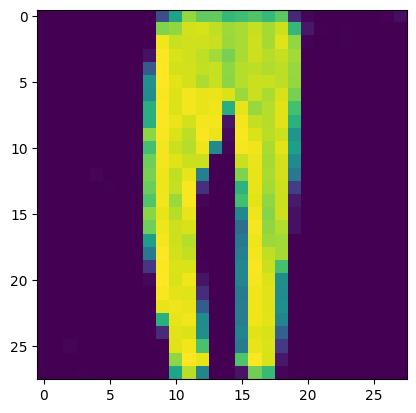

Dloss:  0.63138956
Gloss:  0.8035839
Dloss:  0.63138926
Gloss:  0.80361515
Dloss:  0.63138765
Gloss:  0.8035991
Dloss:  0.63138837
Gloss:  0.80362976
Dloss:  0.63138646
Gloss:  0.80361784
Dloss:  0.631385
Gloss:  0.80364573
Dloss:  0.6313851
Gloss:  0.80363464
Dloss:  0.63138384
Gloss:  0.8036623
Dloss:  0.63138115
Gloss:  0.80364895
Dloss:  0.6313803
Gloss:  0.80367565
Dloss:  0.63137746
Gloss:  0.8036692
Dloss:  0.6313745
Gloss:  0.8036912
Dloss:  0.6313729
Gloss:  0.803682
Dloss:  0.63137233
Gloss:  0.8037108
Dloss:  0.63137305
Gloss:  0.8037019
Dloss:  0.63137275
Gloss:  0.8037266
Dloss:  0.63137305
Gloss:  0.80372006
Dloss:  0.63137263
Gloss:  0.8037401
Dloss:  0.63137156
Gloss:  0.8037377
Dloss:  0.63136935
Gloss:  0.8037515
Dloss:  0.6313679
Gloss:  0.8037516
Dloss:  0.63136494
Gloss:  0.8037648
Dloss:  0.6313632
Gloss:  0.80376613
Dloss:  0.6313611
Gloss:  0.80377966
Dloss:  0.63135886
Gloss:  0.8037778
Dloss:  0.63135535
Gloss:  0.8037903
Dloss:  0.6313528
Gloss:  0.8037895
Dl

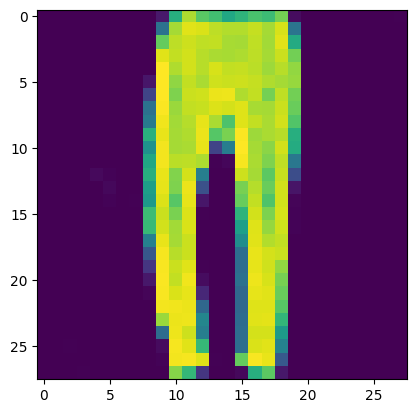

Dloss:  0.631347
Gloss:  0.8038149
Dloss:  0.63134617
Gloss:  0.8038479
Dloss:  0.6313447
Gloss:  0.8038334
Dloss:  0.63134456
Gloss:  0.80387044
Dloss:  0.63134557
Gloss:  0.80385613
Dloss:  0.63134587
Gloss:  0.80387676
Dloss:  0.6313442
Gloss:  0.8038688
Dloss:  0.6313433
Gloss:  0.8038863
Dloss:  0.6313422
Gloss:  0.80388725
Dloss:  0.6313392
Gloss:  0.8038982
Dloss:  0.6313369
Gloss:  0.8039044
Dloss:  0.63133544
Gloss:  0.80391896
Dloss:  0.6313324
Gloss:  0.8039225
Dloss:  0.63133025
Gloss:  0.8039343
Dloss:  0.6313295
Gloss:  0.803938
Dloss:  0.63132733
Gloss:  0.80395615
Dloss:  0.63132685
Gloss:  0.8039577
Dloss:  0.6313257
Gloss:  0.803973
Dloss:  0.63132364
Gloss:  0.80397236
Dloss:  0.63132167
Gloss:  0.8039818
Dloss:  0.6313192
Gloss:  0.80398446
Dloss:  0.6313196
Gloss:  0.8039981
Dloss:  0.63131696
Gloss:  0.8039992
Dloss:  0.63131464
Gloss:  0.8040111
Dloss:  0.6313125
Gloss:  0.8040079
Dloss:  0.63131076
Gloss:  0.8040316
Dloss:  0.63131166
Gloss:  0.8040197
Dloss:  0

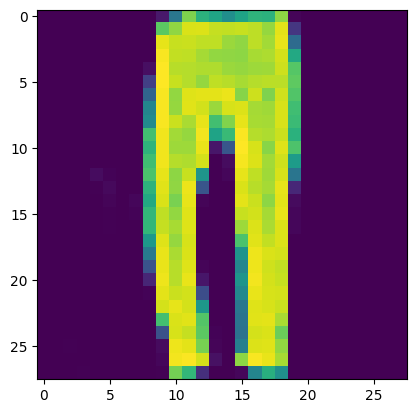

Dloss:  0.6313071
Gloss:  0.80404913
Dloss:  0.63130695
Gloss:  0.80408055
Dloss:  0.63130546
Gloss:  0.8040646
Dloss:  0.6313054
Gloss:  0.80410385
Dloss:  0.63130635
Gloss:  0.804083
Dloss:  0.6313076
Gloss:  0.80412525
Dloss:  0.6313095
Gloss:  0.8041035
Dloss:  0.63131064
Gloss:  0.80415064
Dloss:  0.6313114
Gloss:  0.80413085
Dloss:  0.6313127
Gloss:  0.8041658
Dloss:  0.6313136
Gloss:  0.804153
Dloss:  0.6313134
Gloss:  0.8041772
Dloss:  0.6313132
Gloss:  0.80416805
Dloss:  0.6313113
Gloss:  0.8041886
Dloss:  0.6313104
Gloss:  0.80418086
Dloss:  0.6313092
Gloss:  0.8042034
Dloss:  0.6313072
Gloss:  0.80419946
Dloss:  0.63130444
Gloss:  0.8042184
Dloss:  0.631302
Gloss:  0.8042167
Dloss:  0.63129884
Gloss:  0.8042316
Dloss:  0.63129616
Gloss:  0.80423045
Dloss:  0.63129264
Gloss:  0.8042472
Dloss:  0.63129246
Gloss:  0.8042521
Dloss:  0.63128984
Gloss:  0.80425173
Dloss:  0.6312876
Gloss:  0.80426383
Dloss:  0.6312842
Gloss:  0.80426055
Dloss:  0.63128287
Gloss:  0.80427796
Dloss:

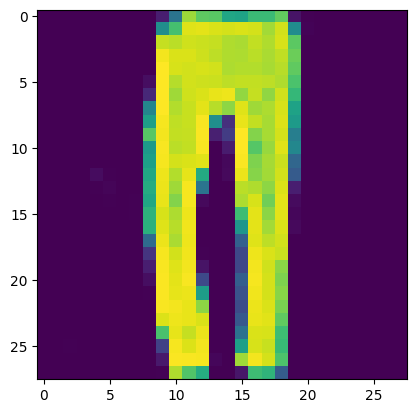

Dloss:  0.63128227
Gloss:  0.8043079
Dloss:  0.6312827
Gloss:  0.8043059
Dloss:  0.63128096
Gloss:  0.80432993
Dloss:  0.6312793
Gloss:  0.8043223
Dloss:  0.63127637
Gloss:  0.80434567
Dloss:  0.6312754
Gloss:  0.80433583
Dloss:  0.6312736
Gloss:  0.804365
Dloss:  0.63127196
Gloss:  0.804354
Dloss:  0.6312712
Gloss:  0.80438316
Dloss:  0.63126963
Gloss:  0.80437267
Dloss:  0.63126844
Gloss:  0.8044029
Dloss:  0.6312671
Gloss:  0.8043923
Dloss:  0.6312668
Gloss:  0.8044192
Dloss:  0.6312665
Gloss:  0.8044095
Dloss:  0.63126755
Gloss:  0.80444854
76 / 100
Dloss:  0.6312722
Gloss:  0.804439
76 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


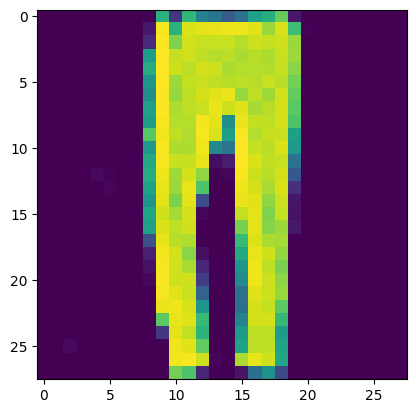

Dloss:  0.63127244
Gloss:  0.80446565
Dloss:  0.63127166
Gloss:  0.80445725
Dloss:  0.631271
Gloss:  0.80448574
Dloss:  0.63126963
Gloss:  0.80448085
Dloss:  0.63126796
Gloss:  0.8045016
Dloss:  0.6312654
Gloss:  0.80450296
Dloss:  0.631263
Gloss:  0.8045195
Dloss:  0.63126117
Gloss:  0.8045225
Dloss:  0.63126004
Gloss:  0.8045386
Dloss:  0.6312584
Gloss:  0.8045373
Dloss:  0.6312549
Gloss:  0.8045569
Dloss:  0.631252
Gloss:  0.80455315
Dloss:  0.631251
Gloss:  0.80457467
Dloss:  0.63124925
Gloss:  0.8045686
Dloss:  0.63124853
Gloss:  0.804592
Dloss:  0.63124716
Gloss:  0.80458415
Dloss:  0.6312463
Gloss:  0.80461365
Dloss:  0.63124555
Gloss:  0.8045998
Dloss:  0.6312457
Gloss:  0.80463094
Dloss:  0.63124454
Gloss:  0.8046151
Dloss:  0.6312444
Gloss:  0.80465364
Dloss:  0.6312442
Gloss:  0.8046387
Dloss:  0.6312458
Gloss:  0.8046861
Dloss:  0.6312492
Gloss:  0.8046657
Dloss:  0.6312505
Gloss:  0.8047089
Dloss:  0.6312518
Gloss:  0.8046964
Dloss:  0.63125324
Gloss:  0.80472696
Dloss:  0

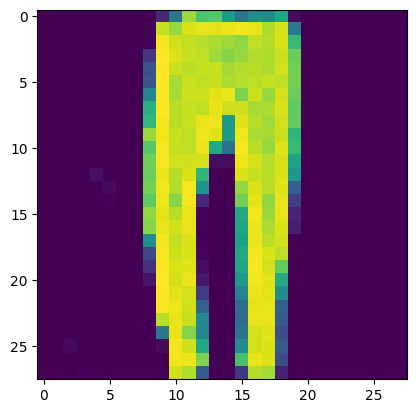

Dloss:  0.6312493
Gloss:  0.8047486
Dloss:  0.6312473
Gloss:  0.80474514
Dloss:  0.6312445
Gloss:  0.8047628
Dloss:  0.6312423
Gloss:  0.80476034
Dloss:  0.6312395
Gloss:  0.80477756
Dloss:  0.63123757
Gloss:  0.8047705
Dloss:  0.63123757
Gloss:  0.8047912
Dloss:  0.6312357
Gloss:  0.8047844
Dloss:  0.631233
Gloss:  0.80480766
Dloss:  0.6312317
Gloss:  0.8048018
Dloss:  0.63122964
Gloss:  0.804826
Dloss:  0.6312278
Gloss:  0.8048158
Dloss:  0.6312269
Gloss:  0.80483794
Dloss:  0.6312254
Gloss:  0.8048331
Dloss:  0.631224
Gloss:  0.8048499
Dloss:  0.63122296
Gloss:  0.80484825
Dloss:  0.63122034
Gloss:  0.80486447
Dloss:  0.63121736
Gloss:  0.8048595
Dloss:  0.6312167
Gloss:  0.8048817
Dloss:  0.63121533
Gloss:  0.8048782
Dloss:  0.6312147
Gloss:  0.804894
Dloss:  0.63121235
Gloss:  0.8048906
Dloss:  0.63121206
Gloss:  0.8049102
Dloss:  0.63121
Gloss:  0.804908
Dloss:  0.6312083
Gloss:  0.8049259
Dloss:  0.6312053
Gloss:  0.8049209
Dloss:  0.63120234
Gloss:  0.8049451
Dloss:  0.63120055

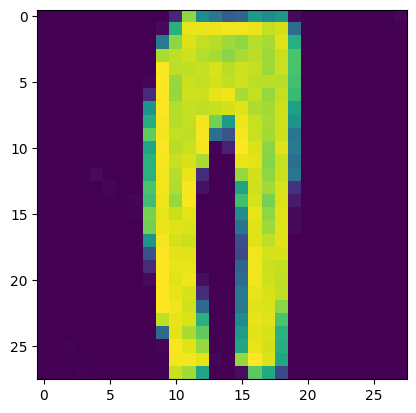

Dloss:  0.6311976
Gloss:  0.80497146
Dloss:  0.63119733
Gloss:  0.80495554
Dloss:  0.63119555
Gloss:  0.80498946
Dloss:  0.6311949
Gloss:  0.80497694
Dloss:  0.63119304
Gloss:  0.80500776
Dloss:  0.63119394
Gloss:  0.80500144
Dloss:  0.6311923
Gloss:  0.805021
Dloss:  0.63119024
Gloss:  0.8050175
Dloss:  0.6311884
Gloss:  0.80503905
Dloss:  0.63118684
Gloss:  0.8050308
Dloss:  0.6311842
Gloss:  0.8050516
Dloss:  0.6311831
Gloss:  0.8050419
Dloss:  0.63118243
Gloss:  0.80507267
Dloss:  0.631182
Gloss:  0.80505735
Dloss:  0.6311833
Gloss:  0.8050877
Dloss:  0.63118166
Gloss:  0.8050796
Dloss:  0.6311792
Gloss:  0.8051031
Dloss:  0.6311772
Gloss:  0.80509806
Dloss:  0.63117474
Gloss:  0.8051228
Dloss:  0.6311735
Gloss:  0.80511314
Dloss:  0.6311715
Gloss:  0.8051369
Dloss:  0.6311718
Gloss:  0.80512494
Dloss:  0.63117135
Gloss:  0.8051561
Dloss:  0.63117146
Gloss:  0.80513954
Dloss:  0.6311713
Gloss:  0.80517
Dloss:  0.63117075
Gloss:  0.80515957
Dloss:  0.6311698
Gloss:  0.8051993
Dloss:

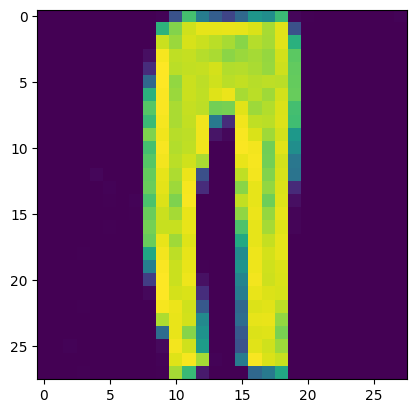

Dloss:  0.6311631
Gloss:  0.80523235
Dloss:  0.6311615
Gloss:  0.80522144
Dloss:  0.6311593
Gloss:  0.8052467
Dloss:  0.6311566
Gloss:  0.8052405
Dloss:  0.6311551
Gloss:  0.8052662
Dloss:  0.6311546
Gloss:  0.8052577
Dloss:  0.6311566
Gloss:  0.80528504
Dloss:  0.63115484
Gloss:  0.8052759
Dloss:  0.63115185
Gloss:  0.80529773
Dloss:  0.6311494
Gloss:  0.80528796
Dloss:  0.63114804
Gloss:  0.80531514
Dloss:  0.6311463
Gloss:  0.8053066
Dloss:  0.63114643
Gloss:  0.80532783
Dloss:  0.63114476
Gloss:  0.80532193
Dloss:  0.63114506
Gloss:  0.8053391
Dloss:  0.6311426
Gloss:  0.80533653
Dloss:  0.63114005
Gloss:  0.8053571
Dloss:  0.6311373
Gloss:  0.80535215
Dloss:  0.63113487
Gloss:  0.80537456
Dloss:  0.6311331
Gloss:  0.805368
Dloss:  0.6311312
Gloss:  0.8053918
Dloss:  0.6311284
Gloss:  0.8053897
Dloss:  0.6311285
Gloss:  0.80541027
Dloss:  0.631126
Gloss:  0.8054041
Dloss:  0.63112545
Gloss:  0.8054293
Dloss:  0.63112473
Gloss:  0.80541754
Dloss:  0.63112444
Gloss:  0.80544555
Dloss

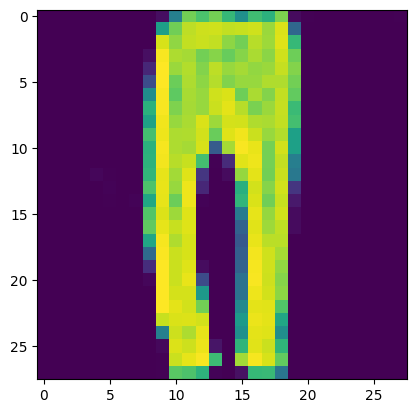

Dloss:  0.6311217
Gloss:  0.8054846
Dloss:  0.63112235
Gloss:  0.80547136
Dloss:  0.63112056
Gloss:  0.8054934
Dloss:  0.63111824
Gloss:  0.80548644
Dloss:  0.6311154
Gloss:  0.8055049
Dloss:  0.63111246
Gloss:  0.80550253
Dloss:  0.6311108
Gloss:  0.8055178
Dloss:  0.63110846
Gloss:  0.805516
Dloss:  0.6311074
Gloss:  0.80553085
Dloss:  0.6311039
Gloss:  0.8055325
Dloss:  0.63110036
Gloss:  0.80555224
Dloss:  0.63109845
Gloss:  0.80554676
Dloss:  0.63109726
Gloss:  0.80557305
Dloss:  0.63109475
Gloss:  0.8055654
Dloss:  0.6310934
Gloss:  0.80559534
77 / 100
Dloss:  0.631093
Gloss:  0.8055865
77 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


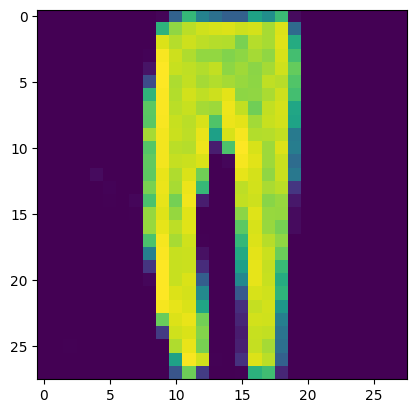

Dloss:  0.6310929
Gloss:  0.8056158
Dloss:  0.63109326
Gloss:  0.80560267
Dloss:  0.6310935
Gloss:  0.805627
Dloss:  0.6310922
Gloss:  0.80562025
Dloss:  0.6310902
Gloss:  0.8056387
Dloss:  0.6310876
Gloss:  0.8056335
Dloss:  0.6310853
Gloss:  0.80564827
Dloss:  0.63108325
Gloss:  0.8056532
Dloss:  0.6310819
Gloss:  0.80566067
Dloss:  0.63108176
Gloss:  0.80567
Dloss:  0.6310801
Gloss:  0.8056764
Dloss:  0.6310775
Gloss:  0.80568075
Dloss:  0.63107455
Gloss:  0.805688
Dloss:  0.63107276
Gloss:  0.8056951
Dloss:  0.63106984
Gloss:  0.8057061
Dloss:  0.6310668
Gloss:  0.8057082
Dloss:  0.63106346
Gloss:  0.80571926
Dloss:  0.6310613
Gloss:  0.80571926
Dloss:  0.6310591
Gloss:  0.80573064
Dloss:  0.6310566
Gloss:  0.8057328
Dloss:  0.63105434
Gloss:  0.8057422
Dloss:  0.6310524
Gloss:  0.8057507
Dloss:  0.6310502
Gloss:  0.8057618
Dloss:  0.63104826
Gloss:  0.80576754
Dloss:  0.6310458
Gloss:  0.8057788
Dloss:  0.6310433
Gloss:  0.80578256
Dloss:  0.63104063
Gloss:  0.80579567
Dloss:  0.6

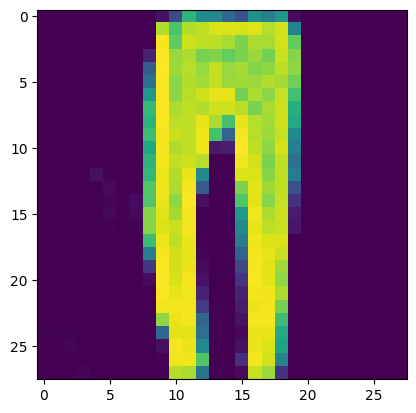

Dloss:  0.631033
Gloss:  0.8058417
Dloss:  0.6310332
Gloss:  0.8058208
Dloss:  0.6310347
Gloss:  0.8058765
Dloss:  0.6310387
Gloss:  0.8058455
Dloss:  0.63104355
Gloss:  0.8059058
Dloss:  0.6310499
Gloss:  0.80587924
Dloss:  0.63105476
Gloss:  0.8059171
Dloss:  0.6310554
Gloss:  0.8059017
Dloss:  0.631054
Gloss:  0.80592906
Dloss:  0.63105416
Gloss:  0.80592316
Dloss:  0.6310512
Gloss:  0.8059448
Dloss:  0.63104963
Gloss:  0.80594534
Dloss:  0.63104767
Gloss:  0.80595523
Dloss:  0.631046
Gloss:  0.8059558
Dloss:  0.6310452
Gloss:  0.80596334
Dloss:  0.631044
Gloss:  0.8059687
Dloss:  0.63104135
Gloss:  0.80597925
Dloss:  0.631039
Gloss:  0.8059859
Dloss:  0.6310372
Gloss:  0.8059981
Dloss:  0.63103414
Gloss:  0.8060057
Dloss:  0.6310311
Gloss:  0.8060095
Dloss:  0.63102746
Gloss:  0.80602497
Dloss:  0.6310269
Gloss:  0.8060233
Dloss:  0.63102436
Gloss:  0.80604005
Dloss:  0.63102275
Gloss:  0.8060372
Dloss:  0.63102007
Gloss:  0.8060564
Dloss:  0.6310177
Gloss:  0.80605006
Dloss:  0.63

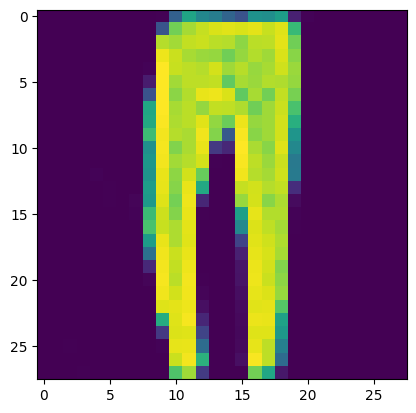

Dloss:  0.6310129
Gloss:  0.8060773
Dloss:  0.6310123
Gloss:  0.80610377
Dloss:  0.6310094
Gloss:  0.8060973
Dloss:  0.63100684
Gloss:  0.806121
Dloss:  0.63100445
Gloss:  0.80611247
Dloss:  0.6310043
Gloss:  0.80613655
Dloss:  0.6310028
Gloss:  0.80613124
Dloss:  0.63100207
Gloss:  0.8061514
Dloss:  0.6310006
Gloss:  0.80615056
Dloss:  0.63099855
Gloss:  0.80616856
Dloss:  0.6309957
Gloss:  0.80616516
Dloss:  0.63099325
Gloss:  0.80617976
Dloss:  0.63099086
Gloss:  0.80618733
Dloss:  0.6309889
Gloss:  0.806198
Dloss:  0.63098717
Gloss:  0.80620056
Dloss:  0.6309845
Gloss:  0.8062138
Dloss:  0.63098264
Gloss:  0.8062199
Dloss:  0.6309789
Gloss:  0.8062291
Dloss:  0.63097644
Gloss:  0.806244
Dloss:  0.6309745
Gloss:  0.8062399
Dloss:  0.63097286
Gloss:  0.8062682
Dloss:  0.63097286
Gloss:  0.8062493
Dloss:  0.6309737
Gloss:  0.80629605
Dloss:  0.63097644
Gloss:  0.8062727
Dloss:  0.63097835
Gloss:  0.8063135
Dloss:  0.63097984
Gloss:  0.80629504
Dloss:  0.630983
Gloss:  0.8063352
Dloss:

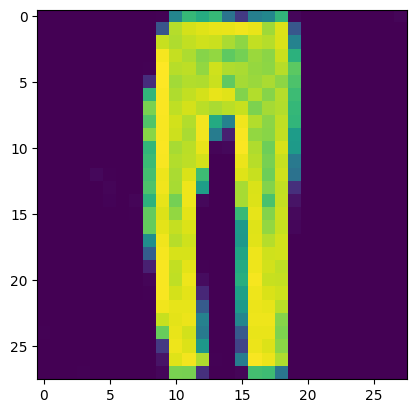

Dloss:  0.63098735
Gloss:  0.80636567
Dloss:  0.6309856
Gloss:  0.8063554
Dloss:  0.6309833
Gloss:  0.8063749
Dloss:  0.6309805
Gloss:  0.80637443
Dloss:  0.63097906
Gloss:  0.80638844
Dloss:  0.6309763
Gloss:  0.8063903
Dloss:  0.6309739
Gloss:  0.80640084
Dloss:  0.63097143
Gloss:  0.80640686
Dloss:  0.63096964
Gloss:  0.8064185
Dloss:  0.6309693
Gloss:  0.8064228
Dloss:  0.6309683
Gloss:  0.8064378
Dloss:  0.6309651
Gloss:  0.80643314
Dloss:  0.6309639
Gloss:  0.8064492
Dloss:  0.63096243
Gloss:  0.8064482
Dloss:  0.6309621
Gloss:  0.8064593
Dloss:  0.6309596
Gloss:  0.8064606
Dloss:  0.6309562
Gloss:  0.8064737
Dloss:  0.6309527
Gloss:  0.80647534
Dloss:  0.63095003
Gloss:  0.8064909
Dloss:  0.63094705
Gloss:  0.8064876
Dloss:  0.6309451
Gloss:  0.80650777
Dloss:  0.63094205
Gloss:  0.806503
Dloss:  0.63094056
Gloss:  0.80652606
Dloss:  0.63093776
Gloss:  0.8065125
Dloss:  0.6309383
Gloss:  0.8065422
Dloss:  0.630938
Gloss:  0.8065276
Dloss:  0.6309385
Gloss:  0.80655265
Dloss:  0.

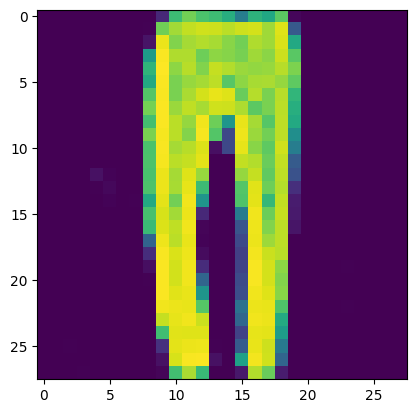

Dloss:  0.6309349
Gloss:  0.8065929
Dloss:  0.630934
Gloss:  0.8065773
Dloss:  0.63093436
Gloss:  0.8066165
Dloss:  0.630935
Gloss:  0.8066022
Dloss:  0.63093305
Gloss:  0.80663335
Dloss:  0.6309312
Gloss:  0.8066227
Dloss:  0.63093126
Gloss:  0.80665576
Dloss:  0.63093007
Gloss:  0.8066389
Dloss:  0.63093114
Gloss:  0.806686
Dloss:  0.63093054
Gloss:  0.80667263
Dloss:  0.63092977
Gloss:  0.8066977
Dloss:  0.6309284
Gloss:  0.8066932
Dloss:  0.6309268
Gloss:  0.806706
Dloss:  0.63092464
Gloss:  0.8067089
Dloss:  0.6309217
Gloss:  0.8067242
78 / 100
Dloss:  0.63091946
Gloss:  0.8067232
78 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


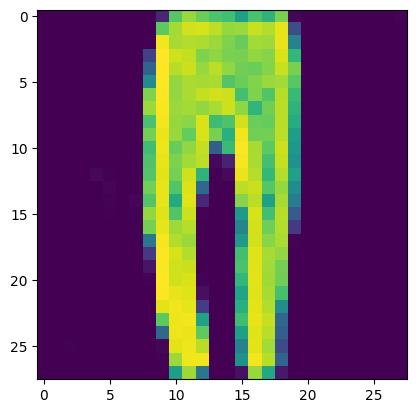

Dloss:  0.63091713
Gloss:  0.80674005
Dloss:  0.63091695
Gloss:  0.80674005
Dloss:  0.6309153
Gloss:  0.8067464
Dloss:  0.6309128
Gloss:  0.8067565
Dloss:  0.63091135
Gloss:  0.80675703
Dloss:  0.6309097
Gloss:  0.8067662
Dloss:  0.6309083
Gloss:  0.8067698
Dloss:  0.6309059
Gloss:  0.80678654
Dloss:  0.63090456
Gloss:  0.806787
Dloss:  0.630906
Gloss:  0.80680275
Dloss:  0.6309037
Gloss:  0.80680424
Dloss:  0.6309015
Gloss:  0.8068151
Dloss:  0.63089955
Gloss:  0.8068225
Dloss:  0.63089675
Gloss:  0.80682564
Dloss:  0.6308938
Gloss:  0.8068325
Dloss:  0.6308913
Gloss:  0.8068386
Dloss:  0.63088834
Gloss:  0.80685073
Dloss:  0.63088524
Gloss:  0.8068491
Dloss:  0.630882
Gloss:  0.80686957
Dloss:  0.6308805
Gloss:  0.8068661
Dloss:  0.6308783
Gloss:  0.80688953
Dloss:  0.63087684
Gloss:  0.8068789
Dloss:  0.63087696
Gloss:  0.8069155
Dloss:  0.63087755
Gloss:  0.80689377
Dloss:  0.63087815
Gloss:  0.80694574
Dloss:  0.63087994
Gloss:  0.8069221
Dloss:  0.6308817
Gloss:  0.80696416
Dloss

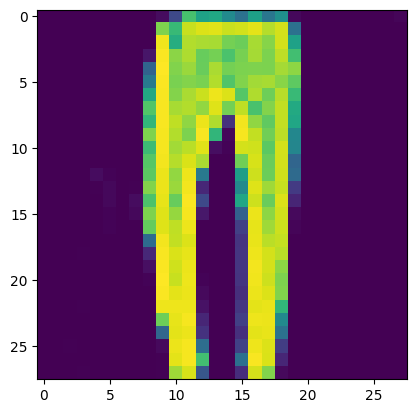

Dloss:  0.6308863
Gloss:  0.80698705
Dloss:  0.63088495
Gloss:  0.8069817
Dloss:  0.6308829
Gloss:  0.80700356
Dloss:  0.63088095
Gloss:  0.80699897
Dloss:  0.6308791
Gloss:  0.80702215
Dloss:  0.6308781
Gloss:  0.80701613
Dloss:  0.6308768
Gloss:  0.80703294
Dloss:  0.6308732
Gloss:  0.8070303
Dloss:  0.63086987
Gloss:  0.80704707
Dloss:  0.6308674
Gloss:  0.807044
Dloss:  0.6308648
Gloss:  0.80706567
Dloss:  0.63086164
Gloss:  0.80706257
Dloss:  0.6308593
Gloss:  0.8070841
Dloss:  0.63085634
Gloss:  0.80707926
Dloss:  0.6308539
Gloss:  0.80709404
Dloss:  0.6308523
Gloss:  0.80709386
Dloss:  0.63084984
Gloss:  0.807107
Dloss:  0.63084763
Gloss:  0.8071084
Dloss:  0.6308459
Gloss:  0.8071221
Dloss:  0.6308435
Gloss:  0.8071258
Dloss:  0.6308418
Gloss:  0.8071389
Dloss:  0.63083744
Gloss:  0.8071416
Dloss:  0.630836
Gloss:  0.8071544
Dloss:  0.63083476
Gloss:  0.8071573
Dloss:  0.6308325
Gloss:  0.80717057
Dloss:  0.6308292
Gloss:  0.8071714
Dloss:  0.6308267
Gloss:  0.80718285
Dloss:  

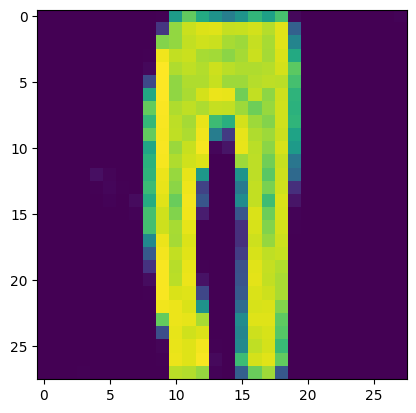

Dloss:  0.63081837
Gloss:  0.80721736
Dloss:  0.63081646
Gloss:  0.80721563
Dloss:  0.6308146
Gloss:  0.80724317
Dloss:  0.6308127
Gloss:  0.80723125
Dloss:  0.6308111
Gloss:  0.8072723
Dloss:  0.63081324
Gloss:  0.8072455
Dloss:  0.6308169
Gloss:  0.80729717
Dloss:  0.6308213
Gloss:  0.80727404
Dloss:  0.6308237
Gloss:  0.8073173
Dloss:  0.63082504
Gloss:  0.8072938
Dloss:  0.6308272
Gloss:  0.80734015
Dloss:  0.63082975
Gloss:  0.8073208
Dloss:  0.6308294
Gloss:  0.8073543
Dloss:  0.6308299
Gloss:  0.80734354
Dloss:  0.63083154
Gloss:  0.8073648
Dloss:  0.6308296
Gloss:  0.807364
Dloss:  0.6308277
Gloss:  0.80737466
Dloss:  0.6308245
Gloss:  0.8073778
Dloss:  0.6308209
Gloss:  0.80739564
Dloss:  0.630818
Gloss:  0.80739415
Dloss:  0.63081557
Gloss:  0.807411
Dloss:  0.63081455
Gloss:  0.8074049
Dloss:  0.63081294
Gloss:  0.80742836
Dloss:  0.6308114
Gloss:  0.8074219
Dloss:  0.63080996
Gloss:  0.8074444
Dloss:  0.6308087
Gloss:  0.8074372
Dloss:  0.6308084
Gloss:  0.8074628
Dloss:  0

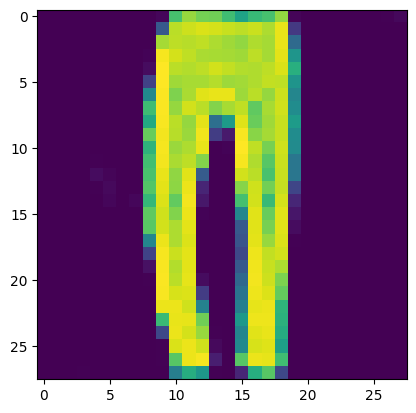

Dloss:  0.630803
Gloss:  0.8074913
Dloss:  0.63080084
Gloss:  0.8074828
Dloss:  0.6307979
Gloss:  0.8075039
Dloss:  0.6307953
Gloss:  0.80749995
Dloss:  0.63079315
Gloss:  0.80751723
Dloss:  0.6307905
Gloss:  0.8075105
Dloss:  0.6307885
Gloss:  0.807532
Dloss:  0.6307855
Gloss:  0.8075278
Dloss:  0.6307833
Gloss:  0.80754673
Dloss:  0.6307817
Gloss:  0.8075436
Dloss:  0.63078016
Gloss:  0.80756015
Dloss:  0.6307777
Gloss:  0.80756116
Dloss:  0.6307766
Gloss:  0.80757546
Dloss:  0.63077366
Gloss:  0.8075753
Dloss:  0.6307732
Gloss:  0.80759287
Dloss:  0.630771
Gloss:  0.8075896
Dloss:  0.6307685
Gloss:  0.8076127
Dloss:  0.6307674
Gloss:  0.80760837
Dloss:  0.63076633
Gloss:  0.80762696
Dloss:  0.6307628
Gloss:  0.8076208
Dloss:  0.63076085
Gloss:  0.807641
Dloss:  0.6307583
Gloss:  0.80763423
Dloss:  0.63075703
Gloss:  0.8076547
Dloss:  0.63075364
Gloss:  0.8076464
Dloss:  0.6307529
Gloss:  0.8076705
Dloss:  0.6307509
Gloss:  0.8076614
Dloss:  0.63074976
Gloss:  0.80767834
Dloss:  0.63

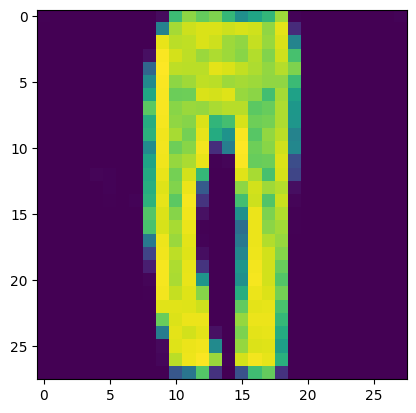

Dloss:  0.6307471
Gloss:  0.80770725
Dloss:  0.63074654
Gloss:  0.80770487
Dloss:  0.6307458
Gloss:  0.80772513
Dloss:  0.6307438
Gloss:  0.8077206
Dloss:  0.6307406
Gloss:  0.80774194
Dloss:  0.6307385
Gloss:  0.80773586
Dloss:  0.6307365
Gloss:  0.80775785
Dloss:  0.6307339
Gloss:  0.80774856
Dloss:  0.6307331
Gloss:  0.80777717
Dloss:  0.63073057
Gloss:  0.8077691
Dloss:  0.6307307
Gloss:  0.8078031
Dloss:  0.63073117
Gloss:  0.80778855
Dloss:  0.63073087
Gloss:  0.80781996
Dloss:  0.63073003
Gloss:  0.8078049
Dloss:  0.63072926
Gloss:  0.807833
79 / 100
Dloss:  0.63072884
Gloss:  0.8078204
79 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


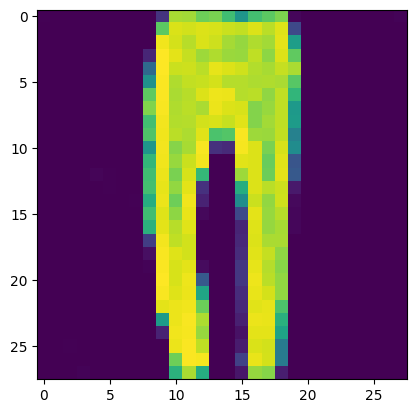

Dloss:  0.630729
Gloss:  0.80785424
Dloss:  0.63073003
Gloss:  0.8078396
Dloss:  0.6307304
Gloss:  0.8078732
Dloss:  0.6307302
Gloss:  0.80785984
Dloss:  0.6307293
Gloss:  0.80788285
Dloss:  0.6307278
Gloss:  0.8078779
Dloss:  0.63072646
Gloss:  0.8078936
Dloss:  0.6307265
Gloss:  0.80790144
Dloss:  0.6307266
Gloss:  0.80790085
Dloss:  0.6307253
Gloss:  0.8079127
Dloss:  0.6307233
Gloss:  0.8079167
Dloss:  0.63072145
Gloss:  0.8079269
Dloss:  0.63071954
Gloss:  0.8079349
Dloss:  0.6307167
Gloss:  0.80793506
Dloss:  0.63071424
Gloss:  0.80794823
Dloss:  0.63071144
Gloss:  0.8079519
Dloss:  0.6307089
Gloss:  0.80796057
Dloss:  0.630706
Gloss:  0.8079615
Dloss:  0.63070536
Gloss:  0.80797714
Dloss:  0.63070315
Gloss:  0.8079747
Dloss:  0.6307006
Gloss:  0.8079949
Dloss:  0.6306974
Gloss:  0.8079904
Dloss:  0.63069415
Gloss:  0.8080152
Dloss:  0.630693
Gloss:  0.80800784
Dloss:  0.630692
Gloss:  0.80804026
Dloss:  0.630691
Gloss:  0.80802727
Dloss:  0.63069177
Gloss:  0.8080575
Dloss:  0.6

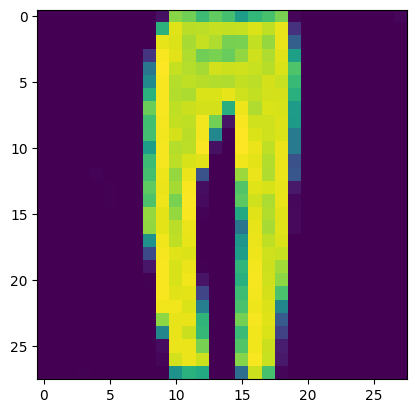

Dloss:  0.6306902
Gloss:  0.8080929
Dloss:  0.6306898
Gloss:  0.80807984
Dloss:  0.63068914
Gloss:  0.80810744
Dloss:  0.6306886
Gloss:  0.8081032
Dloss:  0.63068616
Gloss:  0.8081232
Dloss:  0.6306838
Gloss:  0.8081181
Dloss:  0.6306824
Gloss:  0.8081414
Dloss:  0.63067895
Gloss:  0.80813575
Dloss:  0.6306759
Gloss:  0.8081549
Dloss:  0.63067365
Gloss:  0.80814713
Dloss:  0.63067085
Gloss:  0.8081734
Dloss:  0.6306694
Gloss:  0.8081656
Dloss:  0.63066864
Gloss:  0.80818945
Dloss:  0.63066643
Gloss:  0.808182
Dloss:  0.6306651
Gloss:  0.80820584
Dloss:  0.6306651
Gloss:  0.80820054
Dloss:  0.6306632
Gloss:  0.8082212
Dloss:  0.6306613
Gloss:  0.80821055
Dloss:  0.6306595
Gloss:  0.80824095
Dloss:  0.6306576
Gloss:  0.8082312
Dloss:  0.6306576
Gloss:  0.80825645
Dloss:  0.63065606
Gloss:  0.8082466
Dloss:  0.6306566
Gloss:  0.8082698
Dloss:  0.63065434
Gloss:  0.80826277
Dloss:  0.6306529
Gloss:  0.80828613
Dloss:  0.6306504
Gloss:  0.8082878
Dloss:  0.63064724
Gloss:  0.80829954
Dloss:

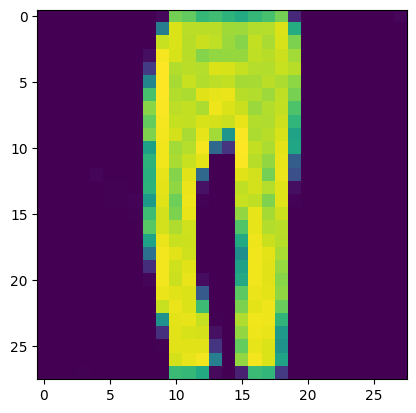

Dloss:  0.63063765
Gloss:  0.8083297
Dloss:  0.63063467
Gloss:  0.8083275
Dloss:  0.63063174
Gloss:  0.80834746
Dloss:  0.63062906
Gloss:  0.80834275
Dloss:  0.630628
Gloss:  0.8083687
Dloss:  0.6306276
Gloss:  0.80835515
Dloss:  0.630626
Gloss:  0.80838597
Dloss:  0.6306259
Gloss:  0.8083711
Dloss:  0.63062555
Gloss:  0.80840385
Dloss:  0.6306243
Gloss:  0.80838984
Dloss:  0.6306241
Gloss:  0.8084222
Dloss:  0.63062364
Gloss:  0.8084069
Dloss:  0.6306223
Gloss:  0.8084426
Dloss:  0.63062125
Gloss:  0.8084278
Dloss:  0.63062143
Gloss:  0.80846184
Dloss:  0.63062096
Gloss:  0.8084464
Dloss:  0.63062096
Gloss:  0.80847514
Dloss:  0.6306206
Gloss:  0.8084645
Dloss:  0.6306197
Gloss:  0.80849445
Dloss:  0.6306193
Gloss:  0.80848604
Dloss:  0.63061845
Gloss:  0.80851054
Dloss:  0.6306193
Gloss:  0.8084994
Dloss:  0.6306176
Gloss:  0.8085215
Dloss:  0.6306166
Gloss:  0.80851305
Dloss:  0.63061535
Gloss:  0.80853575
Dloss:  0.630615
Gloss:  0.80853176
Dloss:  0.6306144
Gloss:  0.80854636
Dlos

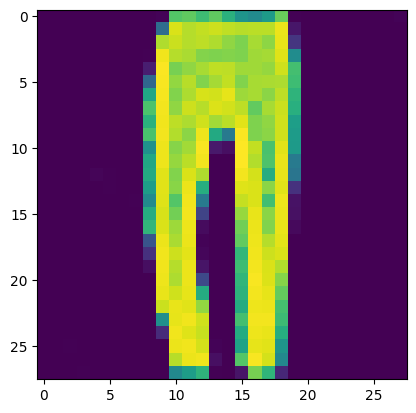

Dloss:  0.63060135
Gloss:  0.80857813
Dloss:  0.6305986
Gloss:  0.808575
Dloss:  0.63059705
Gloss:  0.80859333
Dloss:  0.6305937
Gloss:  0.80858964
Dloss:  0.63059264
Gloss:  0.80860937
Dloss:  0.6305914
Gloss:  0.80860037
Dloss:  0.6305908
Gloss:  0.80863273
Dloss:  0.63058925
Gloss:  0.8086205
Dloss:  0.6305874
Gloss:  0.8086452
Dloss:  0.63058573
Gloss:  0.80863833
Dloss:  0.6305849
Gloss:  0.8086662
Dloss:  0.6305844
Gloss:  0.8086577
Dloss:  0.63058424
Gloss:  0.80868167
Dloss:  0.6305831
Gloss:  0.80867225
Dloss:  0.63058376
Gloss:  0.80869365
Dloss:  0.63058174
Gloss:  0.8086891
Dloss:  0.6305788
Gloss:  0.8087029
Dloss:  0.6305762
Gloss:  0.80870193
Dloss:  0.63057345
Gloss:  0.8087193
Dloss:  0.6305699
Gloss:  0.8087151
Dloss:  0.6305677
Gloss:  0.80873334
Dloss:  0.6305649
Gloss:  0.8087333
Dloss:  0.6305626
Gloss:  0.8087447
Dloss:  0.63055956
Gloss:  0.80874854
Dloss:  0.6305575
Gloss:  0.8087568
Dloss:  0.63055336
Gloss:  0.808762
Dloss:  0.6305508
Gloss:  0.8087696
Dloss:

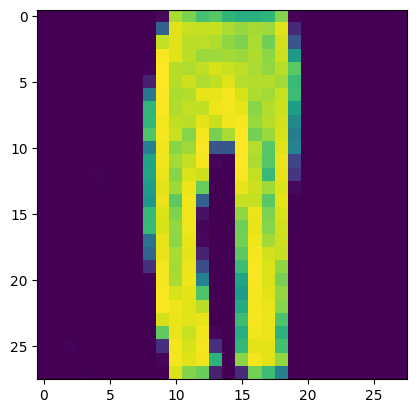

Dloss:  0.63054156
Gloss:  0.8088004
Dloss:  0.63053983
Gloss:  0.8087993
Dloss:  0.63053685
Gloss:  0.80881387
Dloss:  0.63053334
Gloss:  0.80881476
Dloss:  0.63052946
Gloss:  0.8088302
Dloss:  0.6305265
Gloss:  0.8088268
Dloss:  0.63052416
Gloss:  0.8088531
Dloss:  0.6305215
Gloss:  0.80883944
Dloss:  0.6305219
Gloss:  0.808881
Dloss:  0.6305218
Gloss:  0.8088613
Dloss:  0.6305218
Gloss:  0.808906
Dloss:  0.6305249
Gloss:  0.8088862
Dloss:  0.6305268
Gloss:  0.80892646
Dloss:  0.6305277
Gloss:  0.80890805
Dloss:  0.630528
Gloss:  0.80894053
80 / 100
Dloss:  0.6305278
Gloss:  0.808931
80 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


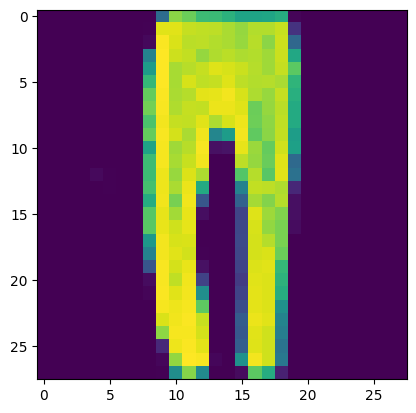

Dloss:  0.6305257
Gloss:  0.8089506
Dloss:  0.6305235
Gloss:  0.8089457
Dloss:  0.6305225
Gloss:  0.8089651
Dloss:  0.6305212
Gloss:  0.80896974
Dloss:  0.6305192
Gloss:  0.8089744
Dloss:  0.6305168
Gloss:  0.80898565
Dloss:  0.6305133
Gloss:  0.8089827
Dloss:  0.6305111
Gloss:  0.8090055
Dloss:  0.63050896
Gloss:  0.8089957
Dloss:  0.63050795
Gloss:  0.8090183
Dloss:  0.6305056
Gloss:  0.80901796
Dloss:  0.63050294
Gloss:  0.80903333
Dloss:  0.6305001
Gloss:  0.80903095
Dloss:  0.63049835
Gloss:  0.8090507
Dloss:  0.6304965
Gloss:  0.80904156
Dloss:  0.630494
Gloss:  0.8090633
Dloss:  0.63049215
Gloss:  0.8090522
Dloss:  0.63049054
Gloss:  0.80908066
Dloss:  0.6304893
Gloss:  0.8090695
Dloss:  0.63048637
Gloss:  0.8090971
Dloss:  0.6304841
Gloss:  0.80908436
Dloss:  0.63048285
Gloss:  0.8091143
Dloss:  0.63048255
Gloss:  0.8091054
Dloss:  0.63048244
Gloss:  0.8091298
Dloss:  0.6304808
Gloss:  0.80912465
Dloss:  0.63048
Gloss:  0.8091526
Dloss:  0.6304774
Gloss:  0.8091397
Dloss:  0.63

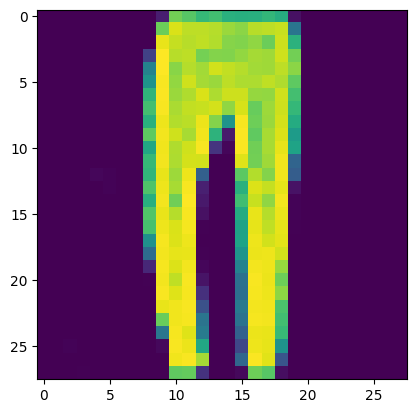

Dloss:  0.63047224
Gloss:  0.8091739
Dloss:  0.6304701
Gloss:  0.8091922
Dloss:  0.6304685
Gloss:  0.80919224
Dloss:  0.6304664
Gloss:  0.8092037
Dloss:  0.63046294
Gloss:  0.8092102
Dloss:  0.6304602
Gloss:  0.8092182
Dloss:  0.6304583
Gloss:  0.8092238
Dloss:  0.63045484
Gloss:  0.80923516
Dloss:  0.63045055
Gloss:  0.8092386
Dloss:  0.63044834
Gloss:  0.80925167
Dloss:  0.6304447
Gloss:  0.8092517
Dloss:  0.6304424
Gloss:  0.80927646
Dloss:  0.63044
Gloss:  0.8092658
Dloss:  0.6304376
Gloss:  0.809292
Dloss:  0.6304369
Gloss:  0.80928004
Dloss:  0.6304357
Gloss:  0.8093129
Dloss:  0.6304361
Gloss:  0.80929774
Dloss:  0.63043624
Gloss:  0.8093355
Dloss:  0.63043714
Gloss:  0.8093172
Dloss:  0.6304363
Gloss:  0.80935806
Dloss:  0.6304364
Gloss:  0.8093401
Dloss:  0.63043606
Gloss:  0.8093773
Dloss:  0.6304368
Gloss:  0.80936086
Dloss:  0.63043666
Gloss:  0.8093929
Dloss:  0.63043636
Gloss:  0.80938405
Dloss:  0.6304353
Gloss:  0.80941254
Dloss:  0.63043517
Gloss:  0.809409
Dloss:  0.6

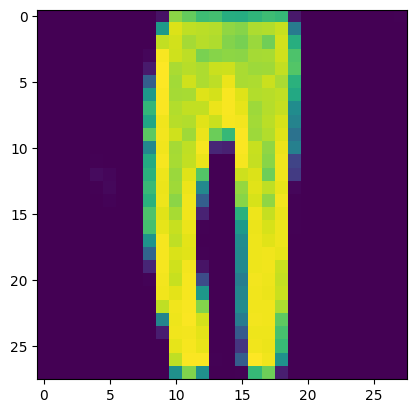

Dloss:  0.6304236
Gloss:  0.80944395
Dloss:  0.63042
Gloss:  0.8094549
Dloss:  0.63041645
Gloss:  0.80946404
Dloss:  0.63041204
Gloss:  0.8094677
Dloss:  0.63041025
Gloss:  0.80948395
Dloss:  0.63040876
Gloss:  0.8094772
Dloss:  0.63040704
Gloss:  0.80950004
Dloss:  0.63040364
Gloss:  0.8094976
Dloss:  0.6304026
Gloss:  0.8095229
Dloss:  0.6304003
Gloss:  0.8095163
Dloss:  0.6303987
Gloss:  0.80953765
Dloss:  0.63039666
Gloss:  0.80952835
Dloss:  0.63039523
Gloss:  0.80956656
Dloss:  0.6303957
Gloss:  0.80954945
Dloss:  0.6303975
Gloss:  0.8095946
Dloss:  0.63039714
Gloss:  0.809577
Dloss:  0.63039887
Gloss:  0.80961275
Dloss:  0.6303981
Gloss:  0.80960244
Dloss:  0.63039804
Gloss:  0.8096331
Dloss:  0.6303963
Gloss:  0.80962884
Dloss:  0.6303939
Gloss:  0.8096512
Dloss:  0.63039386
Gloss:  0.80964303
Dloss:  0.6303929
Gloss:  0.8096669
Dloss:  0.63039184
Gloss:  0.8096593
Dloss:  0.6303901
Gloss:  0.80967593
Dloss:  0.63038766
Gloss:  0.80967486
Dloss:  0.63038576
Gloss:  0.8096921
Dl

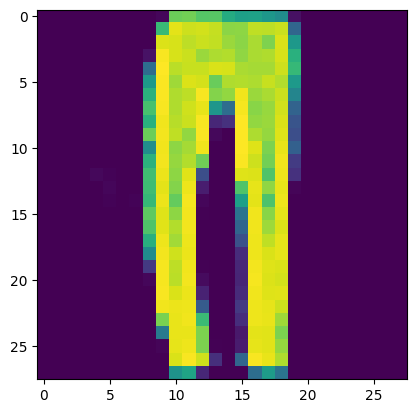

Dloss:  0.6303764
Gloss:  0.8097323
Dloss:  0.63037616
Gloss:  0.809729
Dloss:  0.6303736
Gloss:  0.8097485
Dloss:  0.6303703
Gloss:  0.8097445
Dloss:  0.63036895
Gloss:  0.80976605
Dloss:  0.6303676
Gloss:  0.8097556
Dloss:  0.63036627
Gloss:  0.8097834
Dloss:  0.6303635
Gloss:  0.8097735
Dloss:  0.63036114
Gloss:  0.80979884
Dloss:  0.63035965
Gloss:  0.80978894
Dloss:  0.63036
Gloss:  0.8098227
Dloss:  0.6303614
Gloss:  0.8098126
Dloss:  0.63036144
Gloss:  0.8098413
Dloss:  0.63036007
Gloss:  0.80982983
Dloss:  0.6303599
Gloss:  0.8098514
Dloss:  0.6303583
Gloss:  0.80984604
Dloss:  0.63035613
Gloss:  0.8098676
Dloss:  0.6303536
Gloss:  0.8098634
Dloss:  0.63035095
Gloss:  0.809884
Dloss:  0.63034886
Gloss:  0.80987924
Dloss:  0.6303478
Gloss:  0.80990094
Dloss:  0.6303454
Gloss:  0.80988944
Dloss:  0.63034505
Gloss:  0.8099163
Dloss:  0.6303426
Gloss:  0.8099031
Dloss:  0.63034093
Gloss:  0.8099343
Dloss:  0.6303387
Gloss:  0.8099222
Dloss:  0.6303372
Gloss:  0.8099426
Dloss:  0.63

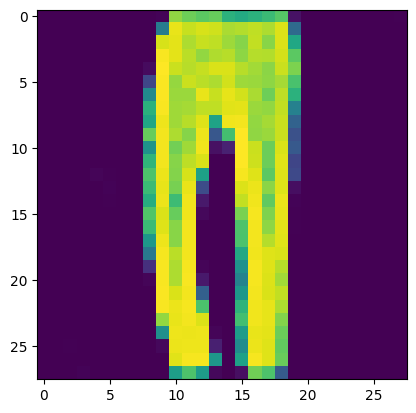

Dloss:  0.6303295
Gloss:  0.80997014
Dloss:  0.6303296
Gloss:  0.809969
Dloss:  0.6303263
Gloss:  0.8099791
Dloss:  0.630324
Gloss:  0.8099871
Dloss:  0.63031995
Gloss:  0.8099968
Dloss:  0.63031626
Gloss:  0.8100041
Dloss:  0.63031274
Gloss:  0.81001115
Dloss:  0.6303092
Gloss:  0.81001407
Dloss:  0.63030714
Gloss:  0.8100254
Dloss:  0.63030416
Gloss:  0.81003225
Dloss:  0.63030046
Gloss:  0.8100408
Dloss:  0.6302983
Gloss:  0.8100496
Dloss:  0.63029516
Gloss:  0.8100538
Dloss:  0.6302926
Gloss:  0.8100654
Dloss:  0.6302893
Gloss:  0.81007075
81 / 100
Dloss:  0.63028735
Gloss:  0.8100807
81 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


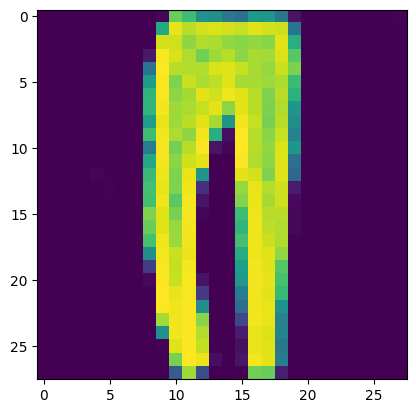

Dloss:  0.6302844
Gloss:  0.81008756
Dloss:  0.63028264
Gloss:  0.81009626
Dloss:  0.6302802
Gloss:  0.8101012
Dloss:  0.63027763
Gloss:  0.8101212
Dloss:  0.63027555
Gloss:  0.81011426
Dloss:  0.6302732
Gloss:  0.81014156
Dloss:  0.6302718
Gloss:  0.81012875
Dloss:  0.6302713
Gloss:  0.8101726
Dloss:  0.6302739
Gloss:  0.81015277
Dloss:  0.6302756
Gloss:  0.8101856
Dloss:  0.6302747
Gloss:  0.81017363
Dloss:  0.6302738
Gloss:  0.81020075
Dloss:  0.6302726
Gloss:  0.81019247
Dloss:  0.63027173
Gloss:  0.81021625
Dloss:  0.6302693
Gloss:  0.8102109
Dloss:  0.6302672
Gloss:  0.81023496
Dloss:  0.6302656
Gloss:  0.8102278
Dloss:  0.6302637
Gloss:  0.810254
Dloss:  0.63026184
Gloss:  0.81024456
Dloss:  0.63026035
Gloss:  0.81027275
Dloss:  0.63025796
Gloss:  0.8102619
Dloss:  0.63025683
Gloss:  0.81030095
Dloss:  0.6302581
Gloss:  0.81028724
Dloss:  0.6302592
Gloss:  0.810316
Dloss:  0.63025683
Gloss:  0.8103102
Dloss:  0.6302545
Gloss:  0.810338
Dloss:  0.63025373
Gloss:  0.8103351
Dloss:

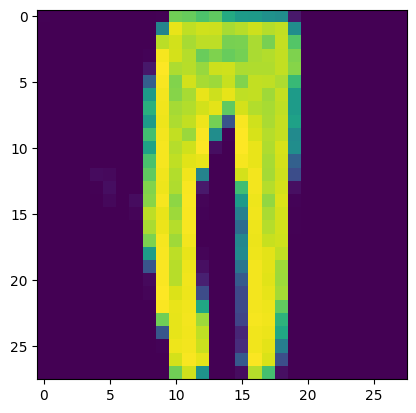

Dloss:  0.6302482
Gloss:  0.8103662
Dloss:  0.63024634
Gloss:  0.81039214
Dloss:  0.6302428
Gloss:  0.8103903
Dloss:  0.63023937
Gloss:  0.81041175
Dloss:  0.63023597
Gloss:  0.8104084
Dloss:  0.6302341
Gloss:  0.8104312
Dloss:  0.63023275
Gloss:  0.810419
Dloss:  0.6302309
Gloss:  0.8104518
Dloss:  0.63023126
Gloss:  0.8104339
Dloss:  0.63023084
Gloss:  0.8104685
Dloss:  0.6302301
Gloss:  0.8104536
Dloss:  0.63022906
Gloss:  0.81048906
Dloss:  0.6302294
Gloss:  0.81047714
Dloss:  0.6302289
Gloss:  0.81050164
Dloss:  0.63022727
Gloss:  0.8104928
Dloss:  0.6302268
Gloss:  0.8105136
Dloss:  0.6302244
Gloss:  0.81050754
Dloss:  0.6302224
Gloss:  0.8105305
Dloss:  0.6302204
Gloss:  0.81052655
Dloss:  0.63021797
Gloss:  0.8105496
Dloss:  0.6302176
Gloss:  0.81053835
Dloss:  0.6302165
Gloss:  0.8105683
Dloss:  0.6302161
Gloss:  0.8105525
Dloss:  0.6302161
Gloss:  0.81058383
Dloss:  0.6302151
Gloss:  0.8105714
Dloss:  0.6302131
Gloss:  0.81060094
Dloss:  0.63021207
Gloss:  0.81059057
Dloss:  

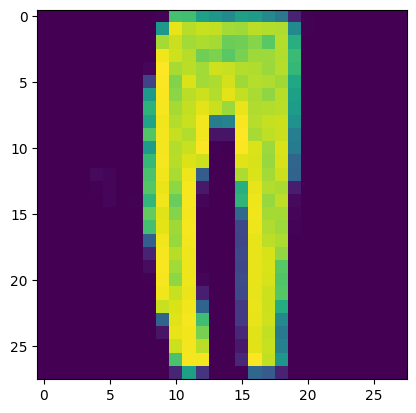

Dloss:  0.6302077
Gloss:  0.8106243
Dloss:  0.6302071
Gloss:  0.81064266
Dloss:  0.6302042
Gloss:  0.8106427
Dloss:  0.63020205
Gloss:  0.8106619
Dloss:  0.6301995
Gloss:  0.8106624
Dloss:  0.63019824
Gloss:  0.8106797
Dloss:  0.6301961
Gloss:  0.8106781
Dloss:  0.6301932
Gloss:  0.81069505
Dloss:  0.6301898
Gloss:  0.8106917
Dloss:  0.6301874
Gloss:  0.8107124
Dloss:  0.630186
Gloss:  0.81070375
Dloss:  0.63018465
Gloss:  0.8107349
Dloss:  0.63018286
Gloss:  0.8107217
Dloss:  0.6301813
Gloss:  0.8107516
Dloss:  0.6301811
Gloss:  0.81073725
Dloss:  0.63018227
Gloss:  0.81077397
Dloss:  0.63018376
Gloss:  0.81075877
Dloss:  0.630184
Gloss:  0.8107915
Dloss:  0.630182
Gloss:  0.8107831
Dloss:  0.6301808
Gloss:  0.81080365
Dloss:  0.6301798
Gloss:  0.8107995
Dloss:  0.630179
Gloss:  0.81081206
Dloss:  0.6301763
Gloss:  0.8108077
Dloss:  0.6301743
Gloss:  0.8108239
Dloss:  0.63017285
Gloss:  0.8108221
Dloss:  0.6301705
Gloss:  0.81083935
Dloss:  0.6301691
Gloss:  0.81083757
Dloss:  0.63016

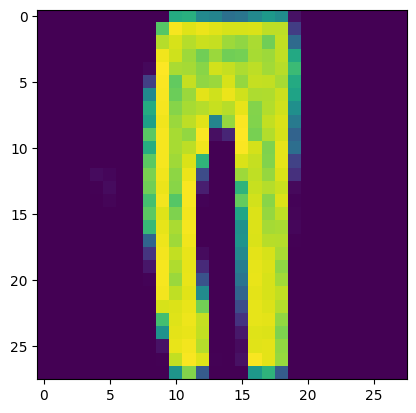

Dloss:  0.63015544
Gloss:  0.8108701
Dloss:  0.6301527
Gloss:  0.81088036
Dloss:  0.6301494
Gloss:  0.8108839
Dloss:  0.630146
Gloss:  0.81090045
Dloss:  0.63014305
Gloss:  0.8108953
Dloss:  0.63013965
Gloss:  0.8109169
Dloss:  0.6301369
Gloss:  0.8109095
Dloss:  0.63013476
Gloss:  0.8109438
Dloss:  0.6301339
Gloss:  0.8109258
Dloss:  0.6301348
Gloss:  0.8109624
Dloss:  0.630135
Gloss:  0.8109477
Dloss:  0.6301361
Gloss:  0.8109816
Dloss:  0.630136
Gloss:  0.81096417
Dloss:  0.63013625
Gloss:  0.81100696
Dloss:  0.63013756
Gloss:  0.81099164
Dloss:  0.6301388
Gloss:  0.81102836
Dloss:  0.63014
Gloss:  0.8110144
Dloss:  0.63013893
Gloss:  0.81104034
Dloss:  0.63013846
Gloss:  0.8110347
Dloss:  0.6301368
Gloss:  0.811057
Dloss:  0.6301353
Gloss:  0.8110527
Dloss:  0.63013244
Gloss:  0.81106985
Dloss:  0.63013095
Gloss:  0.81106687
Dloss:  0.6301276
Gloss:  0.8110819
Dloss:  0.630125
Gloss:  0.8110783
Dloss:  0.63012296
Gloss:  0.8110987
Dloss:  0.63012123
Gloss:  0.8110907
Dloss:  0.6301

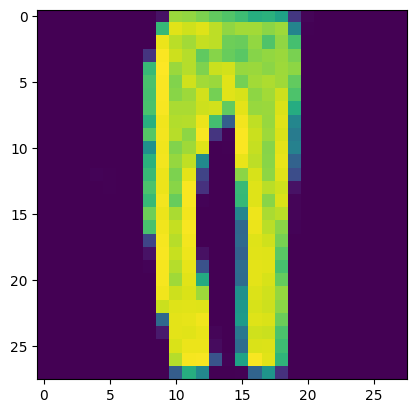

Dloss:  0.63011634
Gloss:  0.8111157
Dloss:  0.63011485
Gloss:  0.8111352
Dloss:  0.6301129
Gloss:  0.8111325
Dloss:  0.63010997
Gloss:  0.8111519
Dloss:  0.6301063
Gloss:  0.81114864
Dloss:  0.6301039
Gloss:  0.81117153
Dloss:  0.63010234
Gloss:  0.8111611
Dloss:  0.6301009
Gloss:  0.81119365
Dloss:  0.63010013
Gloss:  0.81118184
Dloss:  0.6300988
Gloss:  0.811216
Dloss:  0.63009757
Gloss:  0.81120455
Dloss:  0.6300967
Gloss:  0.8112339
Dloss:  0.6300961
Gloss:  0.8112208
Dloss:  0.63009536
Gloss:  0.8112466
Dloss:  0.630093
Gloss:  0.81123877
82 / 100
Dloss:  0.6300908
Gloss:  0.8112595
82 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


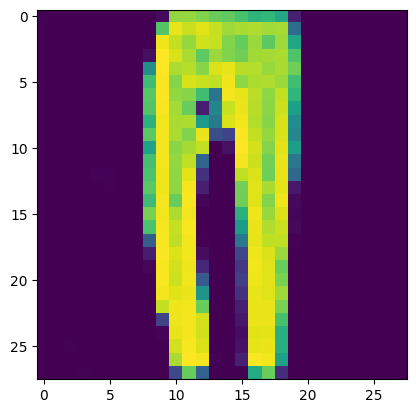

Dloss:  0.6300886
Gloss:  0.811253
Dloss:  0.63008857
Gloss:  0.8112736
Dloss:  0.6300885
Gloss:  0.8112799
Dloss:  0.6300852
Gloss:  0.8112896
Dloss:  0.6300833
Gloss:  0.81129307
Dloss:  0.63008046
Gloss:  0.81130517
Dloss:  0.6300779
Gloss:  0.8113057
Dloss:  0.63007486
Gloss:  0.8113232
Dloss:  0.6300732
Gloss:  0.8113215
Dloss:  0.6300718
Gloss:  0.81133515
Dloss:  0.63006777
Gloss:  0.81134087
Dloss:  0.63006514
Gloss:  0.8113459
Dloss:  0.63006216
Gloss:  0.81135476
Dloss:  0.6300589
Gloss:  0.811357
Dloss:  0.63005656
Gloss:  0.8113766
Dloss:  0.6300542
Gloss:  0.8113726
Dloss:  0.6300523
Gloss:  0.8113935
Dloss:  0.63005006
Gloss:  0.81138366
Dloss:  0.6300481
Gloss:  0.8114166
Dloss:  0.6300474
Gloss:  0.81139964
Dloss:  0.6300472
Gloss:  0.81144273
Dloss:  0.6300477
Gloss:  0.8114253
Dloss:  0.6300504
Gloss:  0.8114671
Dloss:  0.63005406
Gloss:  0.8114541
Dloss:  0.63005525
Gloss:  0.81148714
Dloss:  0.63005525
Gloss:  0.8114789
Dloss:  0.63005424
Gloss:  0.81150144
Dloss:  

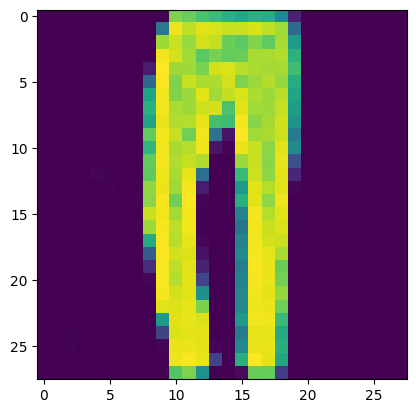

Dloss:  0.63004744
Gloss:  0.81153
Dloss:  0.6300457
Gloss:  0.8115209
Dloss:  0.63004273
Gloss:  0.8115479
Dloss:  0.63004065
Gloss:  0.8115444
Dloss:  0.63003844
Gloss:  0.8115674
Dloss:  0.6300367
Gloss:  0.811563
Dloss:  0.630035
Gloss:  0.81158227
Dloss:  0.6300329
Gloss:  0.81157964
Dloss:  0.63003004
Gloss:  0.8115966
Dloss:  0.63002855
Gloss:  0.8115905
Dloss:  0.63002557
Gloss:  0.81161547
Dloss:  0.6300242
Gloss:  0.8116082
Dloss:  0.630023
Gloss:  0.811631
Dloss:  0.630021
Gloss:  0.8116246
Dloss:  0.6300188
Gloss:  0.8116469
Dloss:  0.63001645
Gloss:  0.81163734
Dloss:  0.63001484
Gloss:  0.8116596
Dloss:  0.6300127
Gloss:  0.8116507
Dloss:  0.63001025
Gloss:  0.811678
Dloss:  0.630008
Gloss:  0.8116735
Dloss:  0.6300064
Gloss:  0.81168926
Dloss:  0.63000345
Gloss:  0.81169105
Dloss:  0.630002
Gloss:  0.8117037
Dloss:  0.62999886
Gloss:  0.8117044
Dloss:  0.6299967
Gloss:  0.8117185
Dloss:  0.6299952
Gloss:  0.8117263
Dloss:  0.6299917
Gloss:  0.8117328
Dloss:  0.6299884
Gl

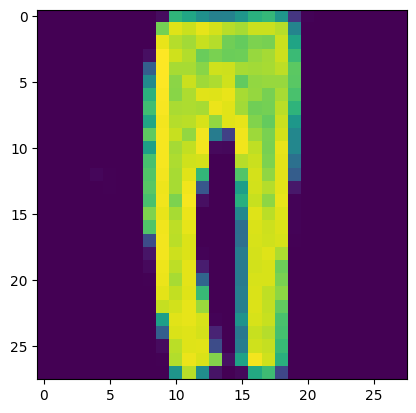

Dloss:  0.6299767
Gloss:  0.8117681
Dloss:  0.6299752
Gloss:  0.8117689
Dloss:  0.6299717
Gloss:  0.81178766
Dloss:  0.6299689
Gloss:  0.81178296
Dloss:  0.6299661
Gloss:  0.8118085
Dloss:  0.62996536
Gloss:  0.81179166
Dloss:  0.6299656
Gloss:  0.81182504
Dloss:  0.6299641
Gloss:  0.8118125
Dloss:  0.62996304
Gloss:  0.81184185
Dloss:  0.629961
Gloss:  0.8118319
Dloss:  0.6299606
Gloss:  0.8118625
Dloss:  0.62995946
Gloss:  0.8118494
Dloss:  0.62995714
Gloss:  0.81188583
Dloss:  0.62995654
Gloss:  0.8118714
Dloss:  0.6299581
Gloss:  0.81190765
Dloss:  0.62995815
Gloss:  0.8118953
Dloss:  0.62995815
Gloss:  0.81191874
Dloss:  0.62995577
Gloss:  0.81191134
Dloss:  0.6299527
Gloss:  0.811932
Dloss:  0.62995106
Gloss:  0.8119263
Dloss:  0.6299496
Gloss:  0.81195015
Dloss:  0.6299498
Gloss:  0.81193733
Dloss:  0.6299489
Gloss:  0.8119725
Dloss:  0.6299487
Gloss:  0.81195414
Dloss:  0.6299494
Gloss:  0.81198525
Dloss:  0.6299494
Gloss:  0.8119717
Dloss:  0.6299494
Gloss:  0.81199825
Dloss: 

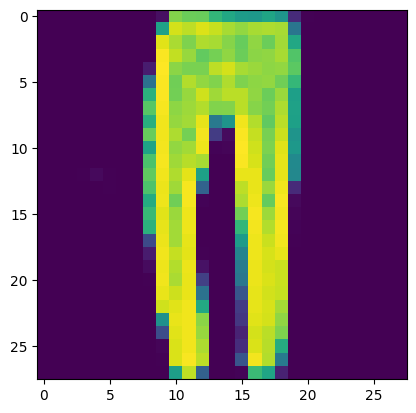

Dloss:  0.6299459
Gloss:  0.81203455
Dloss:  0.6299441
Gloss:  0.8120276
Dloss:  0.6299434
Gloss:  0.8120478
Dloss:  0.62994134
Gloss:  0.81205034
Dloss:  0.6299376
Gloss:  0.81205654
Dloss:  0.6299344
Gloss:  0.8120625
Dloss:  0.62993133
Gloss:  0.8120718
Dloss:  0.6299278
Gloss:  0.8120786
Dloss:  0.62992364
Gloss:  0.8120842
Dloss:  0.629922
Gloss:  0.81209254
Dloss:  0.6299193
Gloss:  0.8120952
Dloss:  0.62991625
Gloss:  0.81210524
Dloss:  0.6299138
Gloss:  0.8121114
Dloss:  0.62991166
Gloss:  0.8121252
Dloss:  0.6299102
Gloss:  0.81212455
Dloss:  0.62990826
Gloss:  0.81213903
Dloss:  0.6299044
Gloss:  0.81214243
Dloss:  0.6299023
Gloss:  0.8121586
Dloss:  0.6298994
Gloss:  0.81215954
Dloss:  0.6298969
Gloss:  0.81217915
Dloss:  0.62989426
Gloss:  0.81217235
Dloss:  0.6298912
Gloss:  0.8121964
Dloss:  0.6298902
Gloss:  0.8121871
Dloss:  0.6298889
Gloss:  0.8122172
Dloss:  0.6298884
Gloss:  0.8122028
Dloss:  0.62988657
Gloss:  0.8122348
Dloss:  0.6298863
Gloss:  0.81221974
Dloss:  0

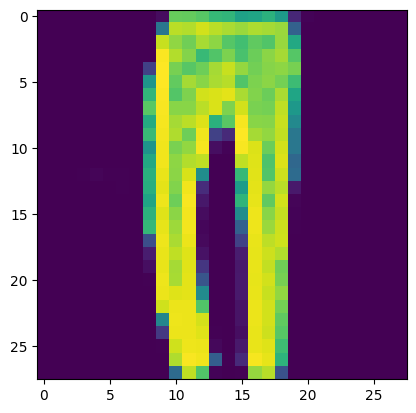

Dloss:  0.6298837
Gloss:  0.8122553
Dloss:  0.6298827
Gloss:  0.81227374
Dloss:  0.62988
Gloss:  0.8122743
Dloss:  0.62987757
Gloss:  0.8122955
Dloss:  0.6298743
Gloss:  0.8122884
Dloss:  0.6298713
Gloss:  0.8123122
Dloss:  0.6298688
Gloss:  0.81230545
Dloss:  0.6298663
Gloss:  0.8123317
Dloss:  0.6298663
Gloss:  0.81232154
Dloss:  0.62986374
Gloss:  0.8123549
Dloss:  0.62986195
Gloss:  0.81234634
Dloss:  0.6298635
Gloss:  0.812379
Dloss:  0.629863
Gloss:  0.81236786
Dloss:  0.6298622
Gloss:  0.8123941
Dloss:  0.62986
Gloss:  0.8123872
83 / 100
Dloss:  0.62985754
Gloss:  0.81240976
83 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


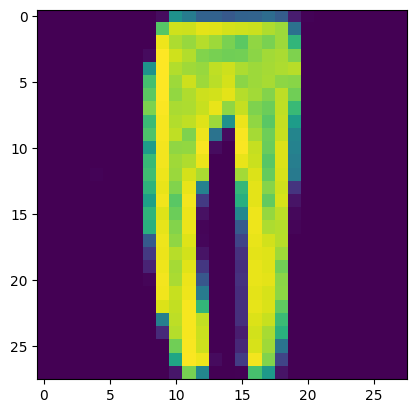

Dloss:  0.6298532
Gloss:  0.8124048
Dloss:  0.62985253
Gloss:  0.812434
Dloss:  0.6298522
Gloss:  0.81242263
Dloss:  0.6298513
Gloss:  0.8124518
Dloss:  0.6298508
Gloss:  0.8124397
Dloss:  0.6298494
Gloss:  0.81246614
Dloss:  0.62984824
Gloss:  0.81245285
Dloss:  0.6298472
Gloss:  0.81248564
Dloss:  0.62984693
Gloss:  0.8124727
Dloss:  0.6298466
Gloss:  0.81250036
Dloss:  0.62984514
Gloss:  0.8124944
Dloss:  0.62984234
Gloss:  0.8125121
Dloss:  0.62984025
Gloss:  0.81251323
Dloss:  0.62983847
Gloss:  0.8125276
Dloss:  0.629838
Gloss:  0.8125295
Dloss:  0.6298363
Gloss:  0.8125481
Dloss:  0.62983423
Gloss:  0.8125478
Dloss:  0.6298317
Gloss:  0.81256527
Dloss:  0.6298287
Gloss:  0.81256175
Dloss:  0.62982595
Gloss:  0.81258625
Dloss:  0.6298239
Gloss:  0.8125759
Dloss:  0.62982297
Gloss:  0.8126039
Dloss:  0.6298231
Gloss:  0.81260127
Dloss:  0.62982106
Gloss:  0.81261766
Dloss:  0.6298191
Gloss:  0.8126245
Dloss:  0.6298159
Gloss:  0.8126398
Dloss:  0.629814
Gloss:  0.8126453
Dloss:  0

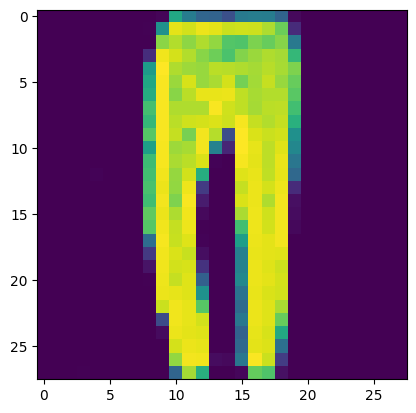

Dloss:  0.62980354
Gloss:  0.8126797
Dloss:  0.62980026
Gloss:  0.81268233
Dloss:  0.62979686
Gloss:  0.8126975
Dloss:  0.6297924
Gloss:  0.81269604
Dloss:  0.6297885
Gloss:  0.8127175
Dloss:  0.62978584
Gloss:  0.81270903
Dloss:  0.6297848
Gloss:  0.8127364
Dloss:  0.6297836
Gloss:  0.81272864
Dloss:  0.62978023
Gloss:  0.81275105
Dloss:  0.6297788
Gloss:  0.8127458
Dloss:  0.62977624
Gloss:  0.8127788
Dloss:  0.6297748
Gloss:  0.81276363
Dloss:  0.6297748
Gloss:  0.81280595
Dloss:  0.62977546
Gloss:  0.81279075
Dloss:  0.6297774
Gloss:  0.8128241
Dloss:  0.6297777
Gloss:  0.81281435
Dloss:  0.6297767
Gloss:  0.812839
Dloss:  0.62977487
Gloss:  0.81282985
Dloss:  0.6297731
Gloss:  0.8128592
Dloss:  0.62977004
Gloss:  0.81284964
Dloss:  0.6297694
Gloss:  0.81287503
Dloss:  0.6297689
Gloss:  0.8128679
Dloss:  0.62976855
Gloss:  0.81288606
Dloss:  0.62976557
Gloss:  0.81288296
Dloss:  0.62976277
Gloss:  0.8128988
Dloss:  0.62975997
Gloss:  0.81289595
Dloss:  0.62975717
Gloss:  0.8129168


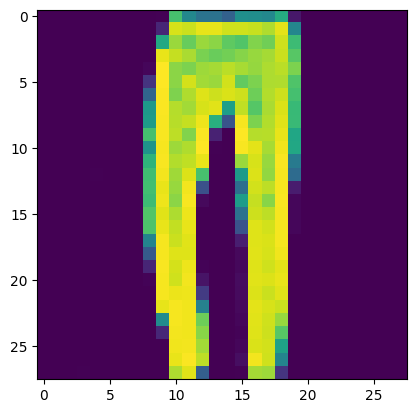

Dloss:  0.6297487
Gloss:  0.81295675
Dloss:  0.629746
Gloss:  0.8129476
Dloss:  0.62974507
Gloss:  0.8129835
Dloss:  0.6297441
Gloss:  0.81296664
Dloss:  0.62974447
Gloss:  0.81300837
Dloss:  0.62974566
Gloss:  0.8129895
Dloss:  0.6297467
Gloss:  0.81302494
Dloss:  0.62974584
Gloss:  0.81301606
Dloss:  0.62974465
Gloss:  0.81303895
Dloss:  0.6297415
Gloss:  0.81303394
Dloss:  0.62974066
Gloss:  0.81305236
Dloss:  0.6297379
Gloss:  0.81305057
Dloss:  0.62973535
Gloss:  0.8130689
Dloss:  0.6297334
Gloss:  0.81306875
Dloss:  0.629732
Gloss:  0.81308377
Dloss:  0.62972975
Gloss:  0.8130882
Dloss:  0.6297267
Gloss:  0.81309336
Dloss:  0.6297232
Gloss:  0.8131056
Dloss:  0.62971926
Gloss:  0.81310594
Dloss:  0.629717
Gloss:  0.81311953
Dloss:  0.62971395
Gloss:  0.81311655
Dloss:  0.6297118
Gloss:  0.8131328
Dloss:  0.62971014
Gloss:  0.81312925
Dloss:  0.6297089
Gloss:  0.8131467
Dloss:  0.62970877
Gloss:  0.8131443
Dloss:  0.629707
Gloss:  0.8131653
Dloss:  0.6297056
Gloss:  0.8131566
Dlos

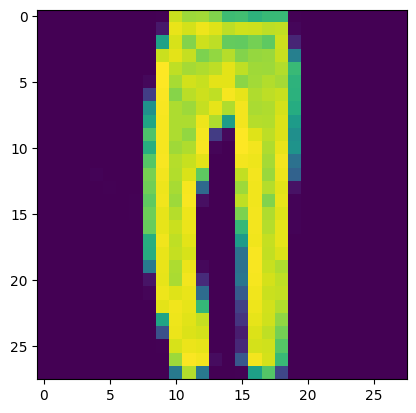

Dloss:  0.6296964
Gloss:  0.81319845
Dloss:  0.62969494
Gloss:  0.8132219
Dloss:  0.62969226
Gloss:  0.8132179
Dloss:  0.6296893
Gloss:  0.8132408
Dloss:  0.6296868
Gloss:  0.8132374
Dloss:  0.62968546
Gloss:  0.8132634
Dloss:  0.6296852
Gloss:  0.8132547
Dloss:  0.6296834
Gloss:  0.8132823
Dloss:  0.6296823
Gloss:  0.8132748
Dloss:  0.6296811
Gloss:  0.81330013
Dloss:  0.62967926
Gloss:  0.8132951
Dloss:  0.62967765
Gloss:  0.813317
Dloss:  0.62967545
Gloss:  0.8133061
Dloss:  0.629674
Gloss:  0.8133355
Dloss:  0.62967354
Gloss:  0.8133234
Dloss:  0.6296729
Gloss:  0.8133568
Dloss:  0.6296712
Gloss:  0.81334585
Dloss:  0.6296697
Gloss:  0.8133761
Dloss:  0.62967
Gloss:  0.8133646
Dloss:  0.629668
Gloss:  0.81339145
Dloss:  0.6296663
Gloss:  0.8133855
Dloss:  0.62966335
Gloss:  0.8134065
Dloss:  0.6296619
Gloss:  0.81340164
Dloss:  0.6296586
Gloss:  0.8134189
Dloss:  0.6296562
Gloss:  0.8134146
Dloss:  0.6296525
Gloss:  0.8134323
Dloss:  0.62965083
Gloss:  0.81342936
Dloss:  0.62964857

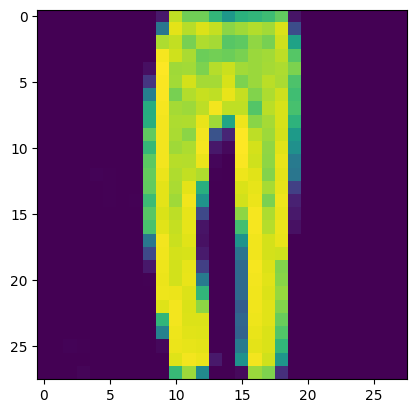

Dloss:  0.62964123
Gloss:  0.81345814
Dloss:  0.62963873
Gloss:  0.81346464
Dloss:  0.62963647
Gloss:  0.8134713
Dloss:  0.6296327
Gloss:  0.8134822
Dloss:  0.62962824
Gloss:  0.81348765
Dloss:  0.62962425
Gloss:  0.8134971
Dloss:  0.6296217
Gloss:  0.81349957
Dloss:  0.6296185
Gloss:  0.813512
Dloss:  0.62961566
Gloss:  0.8135126
Dloss:  0.6296133
Gloss:  0.81353486
Dloss:  0.62961096
Gloss:  0.8135314
Dloss:  0.62960815
Gloss:  0.81354475
Dloss:  0.6296064
Gloss:  0.81354856
Dloss:  0.6296031
Gloss:  0.81355476
Dloss:  0.6296003
Gloss:  0.8135692
84 / 100
Dloss:  0.62959766
Gloss:  0.8135664
84 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


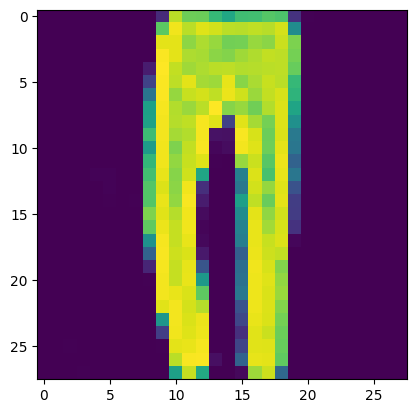

Dloss:  0.62959456
Gloss:  0.8135809
Dloss:  0.6295917
Gloss:  0.81357557
Dloss:  0.62959
Gloss:  0.81359816
Dloss:  0.6295877
Gloss:  0.8135864
Dloss:  0.6295862
Gloss:  0.8136151
Dloss:  0.6295852
Gloss:  0.8136031
Dloss:  0.6295841
Gloss:  0.81363666
Dloss:  0.629583
Gloss:  0.81362325
Dloss:  0.6295842
Gloss:  0.81366014
Dloss:  0.62958425
Gloss:  0.81364226
Dloss:  0.6295845
Gloss:  0.81368804
Dloss:  0.6295865
Gloss:  0.81366885
Dloss:  0.62958694
Gloss:  0.8137065
Dloss:  0.6295877
Gloss:  0.8136911
Dloss:  0.629588
Gloss:  0.8137246
Dloss:  0.6295878
Gloss:  0.813711
Dloss:  0.62958807
Gloss:  0.8137421
Dloss:  0.62958735
Gloss:  0.8137308
Dloss:  0.62958777
Gloss:  0.8137584
Dloss:  0.6295866
Gloss:  0.81375414
Dloss:  0.6295842
Gloss:  0.8137745
Dloss:  0.62958145
Gloss:  0.8137722
Dloss:  0.6295798
Gloss:  0.8137933
Dloss:  0.6295789
Gloss:  0.81378895
Dloss:  0.6295763
Gloss:  0.81381327
Dloss:  0.6295739
Gloss:  0.8138088
Dloss:  0.62957156
Gloss:  0.81383073
Dloss:  0.629

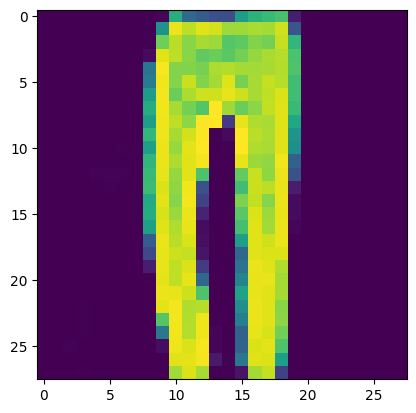

Dloss:  0.6295645
Gloss:  0.813864
Dloss:  0.6295632
Gloss:  0.8138551
Dloss:  0.6295624
Gloss:  0.8138864
Dloss:  0.6295618
Gloss:  0.8138759
Dloss:  0.629559
Gloss:  0.81390256
Dloss:  0.62955666
Gloss:  0.81389016
Dloss:  0.62955517
Gloss:  0.81391823
Dloss:  0.6295522
Gloss:  0.81391037
Dloss:  0.62955
Gloss:  0.8139369
Dloss:  0.62955004
Gloss:  0.8139271
Dloss:  0.62954736
Gloss:  0.8139515
Dloss:  0.62954545
Gloss:  0.8139432
Dloss:  0.62954414
Gloss:  0.81396896
Dloss:  0.6295427
Gloss:  0.81396115
Dloss:  0.6295424
Gloss:  0.8139852
Dloss:  0.62954277
Gloss:  0.8139787
Dloss:  0.62954026
Gloss:  0.8139987
Dloss:  0.6295381
Gloss:  0.8139921
Dloss:  0.62953806
Gloss:  0.81402063
Dloss:  0.6295363
Gloss:  0.8140108
Dloss:  0.62953454
Gloss:  0.81403184
Dloss:  0.62953204
Gloss:  0.8140266
Dloss:  0.6295308
Gloss:  0.8140394
Dloss:  0.6295284
Gloss:  0.8140411
Dloss:  0.6295266
Gloss:  0.8140563
Dloss:  0.6295232
Gloss:  0.81405485
Dloss:  0.6295198
Gloss:  0.814074
Dloss:  0.629

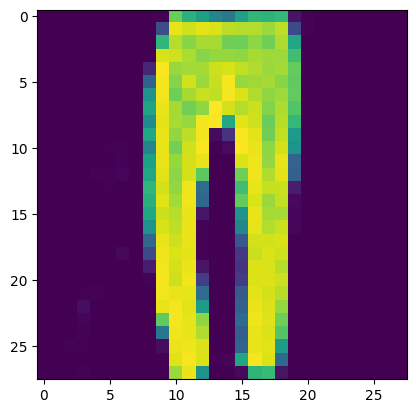

Dloss:  0.6295099
Gloss:  0.81410056
Dloss:  0.62950677
Gloss:  0.8141017
Dloss:  0.6295033
Gloss:  0.81411594
Dloss:  0.62950146
Gloss:  0.81412387
Dloss:  0.6294989
Gloss:  0.814133
Dloss:  0.62949616
Gloss:  0.814135
Dloss:  0.62949365
Gloss:  0.8141486
Dloss:  0.6294894
Gloss:  0.8141534
Dloss:  0.62948674
Gloss:  0.8141667
Dloss:  0.6294826
Gloss:  0.81417054
Dloss:  0.6294793
Gloss:  0.81417996
Dloss:  0.6294767
Gloss:  0.81418616
Dloss:  0.6294738
Gloss:  0.8142005
Dloss:  0.62947124
Gloss:  0.814204
Dloss:  0.62946796
Gloss:  0.8142117
Dloss:  0.62946373
Gloss:  0.8142181
Dloss:  0.62946063
Gloss:  0.8142333
Dloss:  0.629457
Gloss:  0.81423146
Dloss:  0.6294534
Gloss:  0.81425554
Dloss:  0.629451
Gloss:  0.81424433
Dloss:  0.62944907
Gloss:  0.8142792
Dloss:  0.62945193
Gloss:  0.8142587
Dloss:  0.6294537
Gloss:  0.8143087
Dloss:  0.62945616
Gloss:  0.81428283
Dloss:  0.62945974
Gloss:  0.81432986
Dloss:  0.6294628
Gloss:  0.8143149
Dloss:  0.6294635
Gloss:  0.81435215
Dloss:  

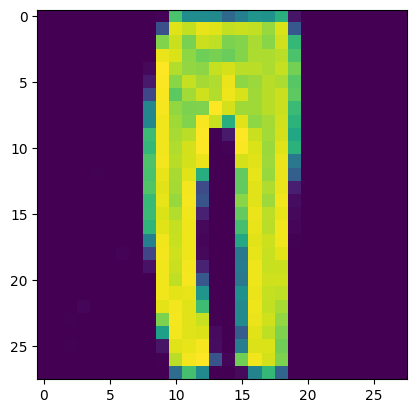

Dloss:  0.62946206
Gloss:  0.81437933
Dloss:  0.62945914
Gloss:  0.8143738
Dloss:  0.62945676
Gloss:  0.8143954
Dloss:  0.6294536
Gloss:  0.8143906
Dloss:  0.62945074
Gloss:  0.81441
Dloss:  0.6294479
Gloss:  0.8144064
Dloss:  0.62944573
Gloss:  0.8144283
Dloss:  0.6294426
Gloss:  0.814425
Dloss:  0.62944037
Gloss:  0.8144469
Dloss:  0.6294394
Gloss:  0.8144424
Dloss:  0.6294381
Gloss:  0.8144622
Dloss:  0.6294372
Gloss:  0.81446016
Dloss:  0.62943625
Gloss:  0.81448126
Dloss:  0.6294338
Gloss:  0.81447643
Dloss:  0.6294318
Gloss:  0.8144962
Dloss:  0.6294288
Gloss:  0.8144977
Dloss:  0.6294268
Gloss:  0.8145166
Dloss:  0.62942475
Gloss:  0.8145178
Dloss:  0.62942237
Gloss:  0.814536
Dloss:  0.62941897
Gloss:  0.81453305
Dloss:  0.6294169
Gloss:  0.81455797
Dloss:  0.6294144
Gloss:  0.81454957
Dloss:  0.62941366
Gloss:  0.8145754
Dloss:  0.6294119
Gloss:  0.81456226
Dloss:  0.62941206
Gloss:  0.8145928
Dloss:  0.6294111
Gloss:  0.8145819
Dloss:  0.6294104
Gloss:  0.8146083
Dloss:  0.62

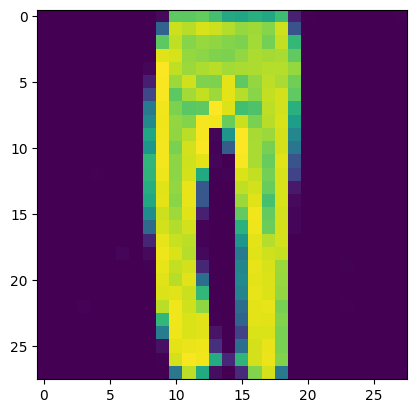

Dloss:  0.62940156
Gloss:  0.81464165
Dloss:  0.6294007
Gloss:  0.8146424
Dloss:  0.6293985
Gloss:  0.81465966
Dloss:  0.6293955
Gloss:  0.8146551
Dloss:  0.62939304
Gloss:  0.8146803
Dloss:  0.6293909
Gloss:  0.8146692
Dloss:  0.6293909
Gloss:  0.8147051
Dloss:  0.6293909
Gloss:  0.8146849
Dloss:  0.62939227
Gloss:  0.8147295
Dloss:  0.62939215
Gloss:  0.8147135
Dloss:  0.6293921
Gloss:  0.814747
Dloss:  0.6293925
Gloss:  0.81473786
Dloss:  0.6293907
Gloss:  0.81475383
Dloss:  0.62938905
Gloss:  0.8147531
Dloss:  0.6293877
Gloss:  0.81477416
85 / 100
Dloss:  0.62938654
Gloss:  0.8147739
85 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


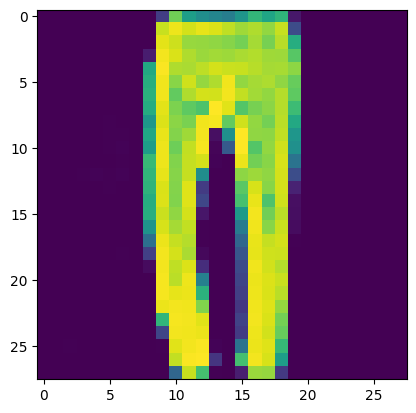

Dloss:  0.62938374
Gloss:  0.8147863
Dloss:  0.62938166
Gloss:  0.8147911
Dloss:  0.62938005
Gloss:  0.81480366
Dloss:  0.62937796
Gloss:  0.8148122
Dloss:  0.6293755
Gloss:  0.8148141
Dloss:  0.62937367
Gloss:  0.8148289
Dloss:  0.6293709
Gloss:  0.81482464
Dloss:  0.62937015
Gloss:  0.8148461
Dloss:  0.62936896
Gloss:  0.8148354
Dloss:  0.6293679
Gloss:  0.8148571
Dloss:  0.62936366
Gloss:  0.81485295
Dloss:  0.62936085
Gloss:  0.81487167
Dloss:  0.6293585
Gloss:  0.81486773
Dloss:  0.62935704
Gloss:  0.8148864
Dloss:  0.6293549
Gloss:  0.8148816
Dloss:  0.6293546
Gloss:  0.8149084
Dloss:  0.6293532
Gloss:  0.8149009
Dloss:  0.6293504
Gloss:  0.8149173
Dloss:  0.6293474
Gloss:  0.814914
Dloss:  0.62934434
Gloss:  0.8149354
Dloss:  0.62934244
Gloss:  0.81493247
Dloss:  0.6293408
Gloss:  0.8149466
Dloss:  0.6293377
Gloss:  0.8149509
Dloss:  0.629335
Gloss:  0.8149582
Dloss:  0.62933147
Gloss:  0.81497544
Dloss:  0.6293287
Gloss:  0.81497276
Dloss:  0.62932646
Gloss:  0.8149942
Dloss:  

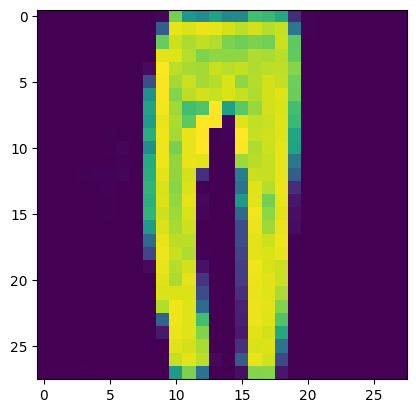

Dloss:  0.62932366
Gloss:  0.8150374
Dloss:  0.6293231
Gloss:  0.8150259
Dloss:  0.6293201
Gloss:  0.8150538
Dloss:  0.6293182
Gloss:  0.81504744
Dloss:  0.62931573
Gloss:  0.81507087
Dloss:  0.6293136
Gloss:  0.8150594
Dloss:  0.62931263
Gloss:  0.81508553
Dloss:  0.6293095
Gloss:  0.8150783
Dloss:  0.62930715
Gloss:  0.8150969
Dloss:  0.6293042
Gloss:  0.8150927
Dloss:  0.6293009
Gloss:  0.8151171
Dloss:  0.62929773
Gloss:  0.81510836
Dloss:  0.6292962
Gloss:  0.81513363
Dloss:  0.6292941
Gloss:  0.815128
Dloss:  0.62929267
Gloss:  0.8151564
Dloss:  0.62929237
Gloss:  0.8151446
Dloss:  0.62929213
Gloss:  0.8151718
Dloss:  0.6292906
Gloss:  0.8151596
Dloss:  0.62928903
Gloss:  0.81518835
Dloss:  0.6292868
Gloss:  0.81517905
Dloss:  0.62928545
Gloss:  0.8152023
Dloss:  0.62928295
Gloss:  0.8151938
Dloss:  0.62928104
Gloss:  0.8152134
Dloss:  0.6292796
Gloss:  0.81521046
Dloss:  0.62927735
Gloss:  0.8152307
Dloss:  0.6292744
Gloss:  0.81522226
Dloss:  0.629273
Gloss:  0.81524897
Dloss: 

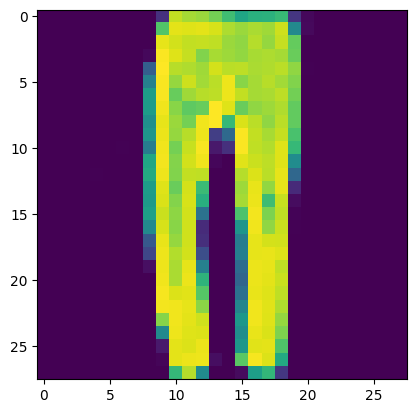

Dloss:  0.62927043
Gloss:  0.81528205
Dloss:  0.6292703
Gloss:  0.81526726
Dloss:  0.62926865
Gloss:  0.8152998
Dloss:  0.629267
Gloss:  0.8152886
Dloss:  0.6292648
Gloss:  0.8153153
Dloss:  0.6292647
Gloss:  0.8153069
Dloss:  0.62926286
Gloss:  0.8153259
Dloss:  0.6292608
Gloss:  0.81532437
Dloss:  0.6292586
Gloss:  0.8153368
Dloss:  0.6292557
Gloss:  0.81533736
Dloss:  0.6292528
Gloss:  0.8153459
Dloss:  0.6292499
Gloss:  0.8153491
Dloss:  0.6292461
Gloss:  0.81536055
Dloss:  0.62924254
Gloss:  0.8153651
Dloss:  0.6292404
Gloss:  0.8153717
Dloss:  0.6292359
Gloss:  0.8153794
Dloss:  0.6292332
Gloss:  0.8153903
Dloss:  0.62922996
Gloss:  0.815395
Dloss:  0.62922764
Gloss:  0.8154192
Dloss:  0.6292259
Gloss:  0.8154157
Dloss:  0.6292239
Gloss:  0.8154371
Dloss:  0.6292227
Gloss:  0.8154307
Dloss:  0.6292214
Gloss:  0.8154598
Dloss:  0.62922025
Gloss:  0.81544346
Dloss:  0.62922037
Gloss:  0.81548274
Dloss:  0.6292231
Gloss:  0.81546676
Dloss:  0.6292258
Gloss:  0.8155001
Dloss:  0.6292

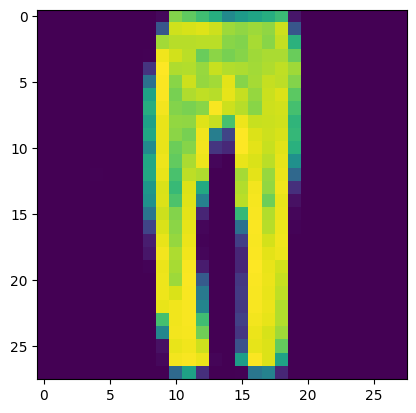

Dloss:  0.62922376
Gloss:  0.8155337
Dloss:  0.6292221
Gloss:  0.81552833
Dloss:  0.62922055
Gloss:  0.81554914
Dloss:  0.6292184
Gloss:  0.81554997
Dloss:  0.62921554
Gloss:  0.81556135
Dloss:  0.6292116
Gloss:  0.8155603
Dloss:  0.629209
Gloss:  0.81557745
Dloss:  0.6292049
Gloss:  0.8155803
Dloss:  0.6292017
Gloss:  0.81559515
Dloss:  0.6291992
Gloss:  0.8155979
Dloss:  0.6291989
Gloss:  0.8156172
Dloss:  0.6291969
Gloss:  0.81561124
Dloss:  0.6291952
Gloss:  0.8156305
Dloss:  0.62919176
Gloss:  0.8156301
Dloss:  0.6291897
Gloss:  0.8156462
Dloss:  0.62918687
Gloss:  0.81565297
Dloss:  0.62918293
Gloss:  0.8156686
Dloss:  0.62917995
Gloss:  0.8156701
Dloss:  0.6291767
Gloss:  0.8156853
Dloss:  0.6291729
Gloss:  0.815682
Dloss:  0.62917167
Gloss:  0.81570816
Dloss:  0.62916976
Gloss:  0.8157035
Dloss:  0.6291691
Gloss:  0.8157318
Dloss:  0.6291666
Gloss:  0.8157191
Dloss:  0.62916535
Gloss:  0.8157502
Dloss:  0.6291623
Gloss:  0.81574064
Dloss:  0.6291606
Gloss:  0.8157654
Dloss:  0.

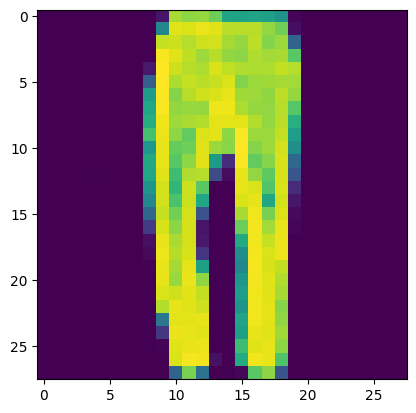

Dloss:  0.6291529
Gloss:  0.81580234
Dloss:  0.6291515
Gloss:  0.8157963
Dloss:  0.62914854
Gloss:  0.8158195
Dloss:  0.629145
Gloss:  0.815812
Dloss:  0.6291419
Gloss:  0.81584126
Dloss:  0.6291397
Gloss:  0.815827
Dloss:  0.62913936
Gloss:  0.8158646
Dloss:  0.6291403
Gloss:  0.81584543
Dloss:  0.6291423
Gloss:  0.8158872
Dloss:  0.629142
Gloss:  0.8158709
Dloss:  0.6291408
Gloss:  0.8159063
Dloss:  0.6291416
Gloss:  0.8159025
Dloss:  0.6291412
Gloss:  0.81592715
Dloss:  0.629139
Gloss:  0.8159267
Dloss:  0.62913704
Gloss:  0.8159493
86 / 100
Dloss:  0.6291354
Gloss:  0.8159451
86 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


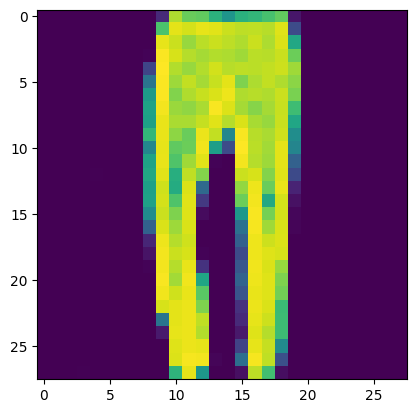

Dloss:  0.6291315
Gloss:  0.81596464
Dloss:  0.62912875
Gloss:  0.8159608
Dloss:  0.62912595
Gloss:  0.81597877
Dloss:  0.62912387
Gloss:  0.8159772
Dloss:  0.6291207
Gloss:  0.8159902
Dloss:  0.6291177
Gloss:  0.8159926
Dloss:  0.6291155
Gloss:  0.81600475
Dloss:  0.62911296
Gloss:  0.81600845
Dloss:  0.6291111
Gloss:  0.81601405
Dloss:  0.62910825
Gloss:  0.81602323
Dloss:  0.62910485
Gloss:  0.816028
Dloss:  0.6291017
Gloss:  0.81604147
Dloss:  0.6290973
Gloss:  0.8160413
Dloss:  0.629094
Gloss:  0.81605655
Dloss:  0.62909144
Gloss:  0.8160579
Dloss:  0.62908876
Gloss:  0.81607527
Dloss:  0.62908584
Gloss:  0.81607133
Dloss:  0.6290824
Gloss:  0.81609464
Dloss:  0.6290799
Gloss:  0.816085
Dloss:  0.6290787
Gloss:  0.8161166
Dloss:  0.629078
Gloss:  0.81610394
Dloss:  0.6290765
Gloss:  0.8161363
Dloss:  0.62907547
Gloss:  0.8161266
Dloss:  0.62907374
Gloss:  0.816156
Dloss:  0.6290704
Gloss:  0.8161497
Dloss:  0.62906873
Gloss:  0.8161777
Dloss:  0.62906665
Gloss:  0.81617254
Dloss: 

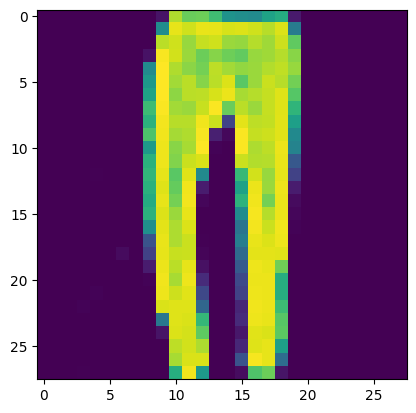

Dloss:  0.6290596
Gloss:  0.8162062
Dloss:  0.62905914
Gloss:  0.8162293
Dloss:  0.6290592
Gloss:  0.8162207
Dloss:  0.6290577
Gloss:  0.8162378
Dloss:  0.6290536
Gloss:  0.81624156
Dloss:  0.62904996
Gloss:  0.81625706
Dloss:  0.6290471
Gloss:  0.81625986
Dloss:  0.62904245
Gloss:  0.8162742
Dloss:  0.62903804
Gloss:  0.8162774
Dloss:  0.62903565
Gloss:  0.8162933
Dloss:  0.62903124
Gloss:  0.8162944
Dloss:  0.62902737
Gloss:  0.81631273
Dloss:  0.6290243
Gloss:  0.8163081
Dloss:  0.62902194
Gloss:  0.81633437
Dloss:  0.6290206
Gloss:  0.8163258
Dloss:  0.62902075
Gloss:  0.8163521
Dloss:  0.6290198
Gloss:  0.81634253
Dloss:  0.62901735
Gloss:  0.81637114
Dloss:  0.6290169
Gloss:  0.8163613
Dloss:  0.62901586
Gloss:  0.81639403
Dloss:  0.6290166
Gloss:  0.8163775
Dloss:  0.6290167
Gloss:  0.81641716
Dloss:  0.6290172
Gloss:  0.8163985
Dloss:  0.6290166
Gloss:  0.81643313
Dloss:  0.6290166
Gloss:  0.81642205
Dloss:  0.6290151
Gloss:  0.8164514
Dloss:  0.62901425
Gloss:  0.8164402
Dloss

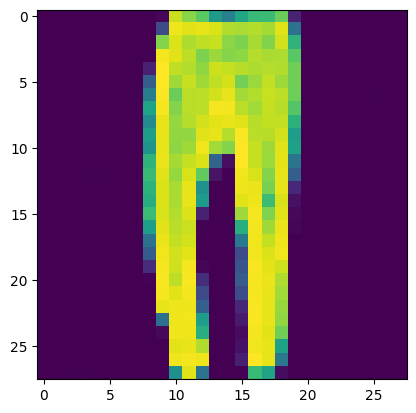

Dloss:  0.62900525
Gloss:  0.816472
Dloss:  0.62900215
Gloss:  0.8164869
Dloss:  0.62899905
Gloss:  0.8164926
Dloss:  0.6289948
Gloss:  0.81649977
Dloss:  0.62899053
Gloss:  0.81650656
Dloss:  0.6289881
Gloss:  0.8165101
Dloss:  0.6289856
Gloss:  0.81652117
Dloss:  0.6289829
Gloss:  0.8165291
Dloss:  0.62898004
Gloss:  0.8165349
Dloss:  0.62897676
Gloss:  0.8165425
Dloss:  0.6289731
Gloss:  0.81654847
Dloss:  0.62897056
Gloss:  0.8165555
Dloss:  0.62896717
Gloss:  0.81656384
Dloss:  0.62896353
Gloss:  0.816571
Dloss:  0.62896127
Gloss:  0.81657416
Dloss:  0.62895715
Gloss:  0.8165886
Dloss:  0.62895674
Gloss:  0.8165944
Dloss:  0.6289553
Gloss:  0.81660175
Dloss:  0.62895304
Gloss:  0.8166117
Dloss:  0.6289498
Gloss:  0.81661546
Dloss:  0.6289461
Gloss:  0.8166298
Dloss:  0.6289443
Gloss:  0.81662846
Dloss:  0.62894183
Gloss:  0.8166529
Dloss:  0.6289404
Gloss:  0.8166388
Dloss:  0.62894136
Gloss:  0.81668
Dloss:  0.62894195
Gloss:  0.8166596
Dloss:  0.62894446
Gloss:  0.8167037
Dloss:

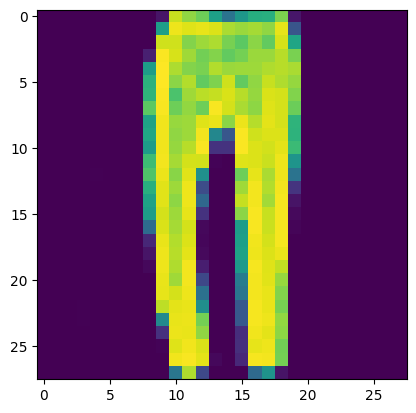

Dloss:  0.62894243
Gloss:  0.81674534
Dloss:  0.6289414
Gloss:  0.81673115
Dloss:  0.6289407
Gloss:  0.8167646
Dloss:  0.62894076
Gloss:  0.8167563
Dloss:  0.6289388
Gloss:  0.8167757
Dloss:  0.62893593
Gloss:  0.8167682
Dloss:  0.6289357
Gloss:  0.81678796
Dloss:  0.62893164
Gloss:  0.81678694
Dloss:  0.6289278
Gloss:  0.81680506
Dloss:  0.62892514
Gloss:  0.8168024
Dloss:  0.62892187
Gloss:  0.8168212
Dloss:  0.6289196
Gloss:  0.8168205
Dloss:  0.62891823
Gloss:  0.8168389
Dloss:  0.6289158
Gloss:  0.81683725
Dloss:  0.62891334
Gloss:  0.81685513
Dloss:  0.6289107
Gloss:  0.8168555
Dloss:  0.6289082
Gloss:  0.8168812
Dloss:  0.6289065
Gloss:  0.81687284
Dloss:  0.6289047
Gloss:  0.8169015
Dloss:  0.62890184
Gloss:  0.81689125
Dloss:  0.6289009
Gloss:  0.81692374
Dloss:  0.62889934
Gloss:  0.816917
Dloss:  0.6288996
Gloss:  0.81694645
Dloss:  0.628898
Gloss:  0.8169359
Dloss:  0.62889874
Gloss:  0.8169655
Dloss:  0.6288972
Gloss:  0.8169562
Dloss:  0.6288948
Gloss:  0.8169788
Dloss:  

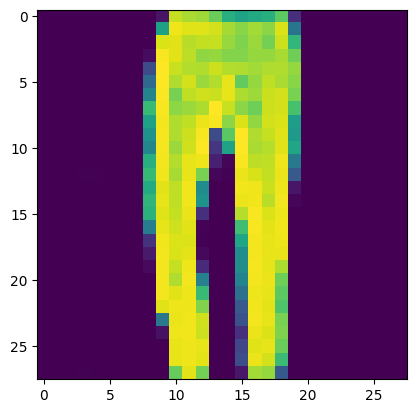

Dloss:  0.62888646
Gloss:  0.81700873
Dloss:  0.62888515
Gloss:  0.8170052
Dloss:  0.62888277
Gloss:  0.817024
Dloss:  0.628879
Gloss:  0.8170211
Dloss:  0.62887555
Gloss:  0.81704444
Dloss:  0.62887216
Gloss:  0.8170408
Dloss:  0.6288695
Gloss:  0.8170669
Dloss:  0.62886804
Gloss:  0.81706244
Dloss:  0.6288682
Gloss:  0.8170871
Dloss:  0.6288651
Gloss:  0.81708026
Dloss:  0.6288621
Gloss:  0.8171059
Dloss:  0.6288608
Gloss:  0.8170946
Dloss:  0.6288597
Gloss:  0.8171217
Dloss:  0.6288589
Gloss:  0.81710905
Dloss:  0.6288576
Gloss:  0.81714445
87 / 100
Dloss:  0.6288569
Gloss:  0.8171359
87 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


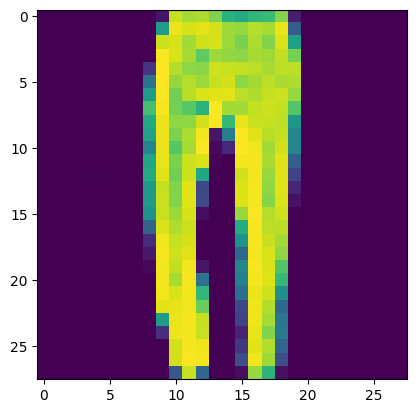

Dloss:  0.6288549
Gloss:  0.8171647
Dloss:  0.6288533
Gloss:  0.81715703
Dloss:  0.628852
Gloss:  0.81717724
Dloss:  0.62884897
Gloss:  0.8171753
Dloss:  0.62884563
Gloss:  0.81719023
Dloss:  0.628842
Gloss:  0.8171964
Dloss:  0.6288393
Gloss:  0.81720424
Dloss:  0.62883633
Gloss:  0.8172216
Dloss:  0.6288349
Gloss:  0.81722057
Dloss:  0.62883353
Gloss:  0.8172388
Dloss:  0.62883085
Gloss:  0.8172387
Dloss:  0.62882847
Gloss:  0.81725156
Dloss:  0.62882483
Gloss:  0.81725234
Dloss:  0.6288215
Gloss:  0.81725913
Dloss:  0.6288188
Gloss:  0.8172725
Dloss:  0.6288169
Gloss:  0.817274
Dloss:  0.6288146
Gloss:  0.8172912
Dloss:  0.628813
Gloss:  0.81728953
Dloss:  0.6288109
Gloss:  0.8173136
Dloss:  0.6288074
Gloss:  0.8173036
Dloss:  0.6288053
Gloss:  0.8173415
Dloss:  0.62880415
Gloss:  0.8173244
Dloss:  0.62880486
Gloss:  0.817374
Dloss:  0.6288071
Gloss:  0.81735295
Dloss:  0.62880766
Gloss:  0.8173913
Dloss:  0.6288079
Gloss:  0.81737816
Dloss:  0.6288065
Gloss:  0.81740236
Dloss:  0.6

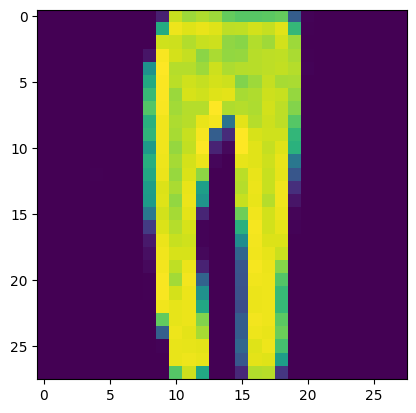

Dloss:  0.6287963
Gloss:  0.8174319
Dloss:  0.6287934
Gloss:  0.8174313
Dloss:  0.6287902
Gloss:  0.8174505
Dloss:  0.6287886
Gloss:  0.8174498
Dloss:  0.62878567
Gloss:  0.8174704
Dloss:  0.6287827
Gloss:  0.8174615
Dloss:  0.628781
Gloss:  0.81748813
Dloss:  0.6287782
Gloss:  0.8174808
Dloss:  0.62877554
Gloss:  0.817505
Dloss:  0.62877315
Gloss:  0.8174977
Dloss:  0.6287705
Gloss:  0.8175298
Dloss:  0.6287684
Gloss:  0.8175202
Dloss:  0.6287675
Gloss:  0.8175424
Dloss:  0.62876624
Gloss:  0.8175394
Dloss:  0.62876534
Gloss:  0.8175562
Dloss:  0.62876534
Gloss:  0.8175563
Dloss:  0.6287628
Gloss:  0.8175709
Dloss:  0.62875855
Gloss:  0.8175747
Dloss:  0.6287558
Gloss:  0.8175909
Dloss:  0.62875223
Gloss:  0.817598
Dloss:  0.6287487
Gloss:  0.8176052
Dloss:  0.62874436
Gloss:  0.81761175
Dloss:  0.6287428
Gloss:  0.8176185
Dloss:  0.62874
Gloss:  0.81762856
Dloss:  0.62873566
Gloss:  0.8176336
Dloss:  0.62873244
Gloss:  0.8176446
Dloss:  0.628729
Gloss:  0.81764954
Dloss:  0.62872624


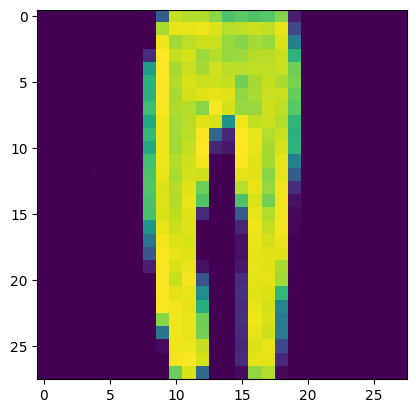

Dloss:  0.6287148
Gloss:  0.8176775
Dloss:  0.6287124
Gloss:  0.81769675
Dloss:  0.6287097
Gloss:  0.8176973
Dloss:  0.628706
Gloss:  0.8177153
Dloss:  0.62870455
Gloss:  0.8177115
Dloss:  0.6287041
Gloss:  0.8177269
Dloss:  0.6287024
Gloss:  0.817722
Dloss:  0.62869984
Gloss:  0.8177473
Dloss:  0.62869865
Gloss:  0.8177405
Dloss:  0.62869525
Gloss:  0.8177636
Dloss:  0.6286934
Gloss:  0.81775445
Dloss:  0.6286914
Gloss:  0.81778604
Dloss:  0.6286884
Gloss:  0.8177761
Dloss:  0.6286857
Gloss:  0.81780946
Dloss:  0.62868655
Gloss:  0.81779313
Dloss:  0.628686
Gloss:  0.817832
Dloss:  0.6286874
Gloss:  0.8178164
Dloss:  0.62868917
Gloss:  0.8178492
Dloss:  0.62868863
Gloss:  0.8178407
Dloss:  0.62868774
Gloss:  0.8178671
Dloss:  0.6286858
Gloss:  0.8178601
Dloss:  0.6286847
Gloss:  0.81787676
Dloss:  0.62868255
Gloss:  0.8178755
Dloss:  0.6286797
Gloss:  0.81788826
Dloss:  0.62867767
Gloss:  0.8178865
Dloss:  0.62867445
Gloss:  0.8179043
Dloss:  0.62867266
Gloss:  0.81789756
Dloss:  0.62

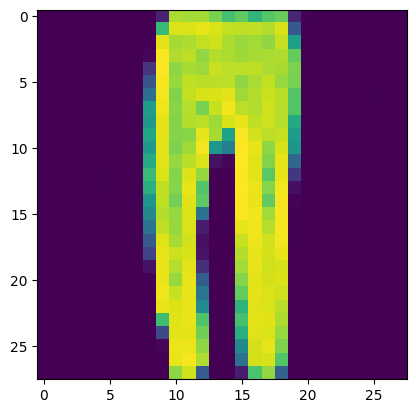

Dloss:  0.62866384
Gloss:  0.8179338
Dloss:  0.62866247
Gloss:  0.8179615
Dloss:  0.62866014
Gloss:  0.8179522
Dloss:  0.6286586
Gloss:  0.81798035
Dloss:  0.6286566
Gloss:  0.81797075
Dloss:  0.628655
Gloss:  0.81799966
Dloss:  0.6286551
Gloss:  0.8179906
Dloss:  0.62865317
Gloss:  0.8180175
Dloss:  0.62865144
Gloss:  0.8180089
Dloss:  0.6286504
Gloss:  0.8180372
Dloss:  0.6286494
Gloss:  0.8180316
Dloss:  0.6286484
Gloss:  0.8180504
Dloss:  0.62864727
Gloss:  0.81804645
Dloss:  0.62864506
Gloss:  0.8180683
Dloss:  0.6286448
Gloss:  0.8180606
Dloss:  0.62864316
Gloss:  0.8180845
Dloss:  0.62863976
Gloss:  0.81807965
Dloss:  0.62863696
Gloss:  0.8180985
Dloss:  0.6286346
Gloss:  0.8180978
Dloss:  0.62863123
Gloss:  0.8181187
Dloss:  0.62862957
Gloss:  0.8181132
Dloss:  0.62862635
Gloss:  0.8181351
Dloss:  0.6286234
Gloss:  0.8181272
Dloss:  0.6286204
Gloss:  0.8181587
Dloss:  0.6286206
Gloss:  0.81814927
Dloss:  0.6286193
Gloss:  0.81818247
Dloss:  0.6286181
Gloss:  0.8181691
Dloss:  0

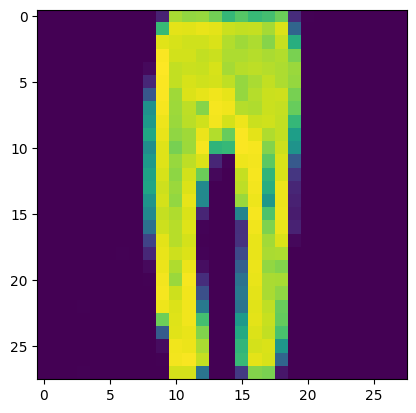

Dloss:  0.6286139
Gloss:  0.8182114
Dloss:  0.62861264
Gloss:  0.81823355
Dloss:  0.6286124
Gloss:  0.81822866
Dloss:  0.6286103
Gloss:  0.81825316
Dloss:  0.628608
Gloss:  0.81824833
Dloss:  0.62860435
Gloss:  0.8182721
Dloss:  0.6286011
Gloss:  0.818267
Dloss:  0.62859833
Gloss:  0.8182916
Dloss:  0.62859714
Gloss:  0.81828535
Dloss:  0.6285943
Gloss:  0.81830776
Dloss:  0.62859106
Gloss:  0.8183069
Dloss:  0.6285888
Gloss:  0.8183242
Dloss:  0.628587
Gloss:  0.81832737
Dloss:  0.6285832
Gloss:  0.81833154
Dloss:  0.62857974
Gloss:  0.8183437
88 / 100
Dloss:  0.6285776
Gloss:  0.8183526
88 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


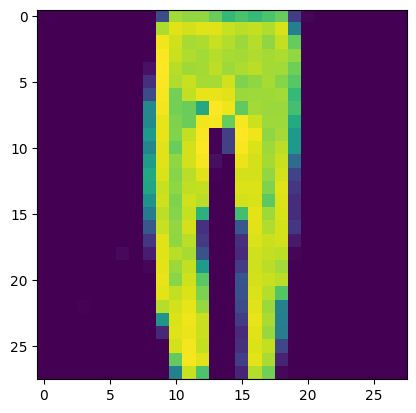

Dloss:  0.62857443
Gloss:  0.81836265
Dloss:  0.6285721
Gloss:  0.818367
Dloss:  0.6285694
Gloss:  0.8183775
Dloss:  0.6285669
Gloss:  0.81838405
Dloss:  0.62856543
Gloss:  0.8183943
Dloss:  0.62856275
Gloss:  0.8184017
Dloss:  0.6285601
Gloss:  0.81840634
Dloss:  0.62855667
Gloss:  0.81842226
Dloss:  0.6285537
Gloss:  0.8184178
Dloss:  0.6285516
Gloss:  0.8184358
Dloss:  0.6285478
Gloss:  0.81843257
Dloss:  0.6285447
Gloss:  0.81845075
Dloss:  0.6285427
Gloss:  0.8184455
Dloss:  0.6285404
Gloss:  0.8184678
Dloss:  0.6285374
Gloss:  0.81846195
Dloss:  0.6285345
Gloss:  0.8184834
Dloss:  0.6285325
Gloss:  0.8184753
Dloss:  0.6285293
Gloss:  0.81849825
Dloss:  0.628528
Gloss:  0.8184888
Dloss:  0.6285279
Gloss:  0.818522
Dloss:  0.62852746
Gloss:  0.8185119
Dloss:  0.62852544
Gloss:  0.81854373
Dloss:  0.6285242
Gloss:  0.8185338
Dloss:  0.62852263
Gloss:  0.81855994
Dloss:  0.62851954
Gloss:  0.8185524
Dloss:  0.6285175
Gloss:  0.8185773
Dloss:  0.6285145
Gloss:  0.8185711
Dloss:  0.628

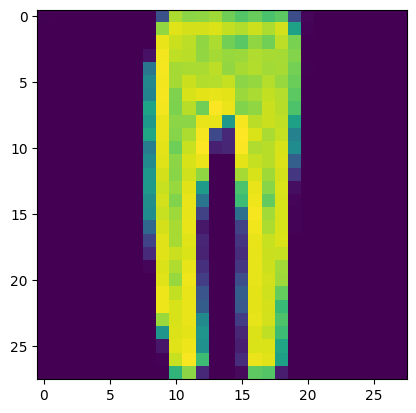

Dloss:  0.6285085
Gloss:  0.818605
Dloss:  0.6285077
Gloss:  0.81863254
Dloss:  0.6285076
Gloss:  0.8186283
Dloss:  0.62850785
Gloss:  0.81865126
Dloss:  0.6285056
Gloss:  0.8186465
Dloss:  0.6285042
Gloss:  0.8186692
Dloss:  0.6285034
Gloss:  0.8186602
Dloss:  0.628502
Gloss:  0.8186918
Dloss:  0.62850016
Gloss:  0.8186811
Dloss:  0.6284972
Gloss:  0.81870365
Dloss:  0.62849265
Gloss:  0.8187009
Dloss:  0.62848973
Gloss:  0.8187229
Dloss:  0.6284879
Gloss:  0.8187146
Dloss:  0.62848794
Gloss:  0.81874615
Dloss:  0.6284875
Gloss:  0.8187304
Dloss:  0.62848765
Gloss:  0.81876177
Dloss:  0.62848717
Gloss:  0.8187528
Dloss:  0.6284849
Gloss:  0.81878215
Dloss:  0.6284825
Gloss:  0.81877303
Dloss:  0.62848055
Gloss:  0.8188016
Dloss:  0.62847954
Gloss:  0.81878966
Dloss:  0.62847847
Gloss:  0.81882286
Dloss:  0.62847865
Gloss:  0.8188099
Dloss:  0.6284774
Gloss:  0.81883276
Dloss:  0.62847525
Gloss:  0.8188268
Dloss:  0.6284725
Gloss:  0.81884927
Dloss:  0.6284702
Gloss:  0.8188463
Dloss: 

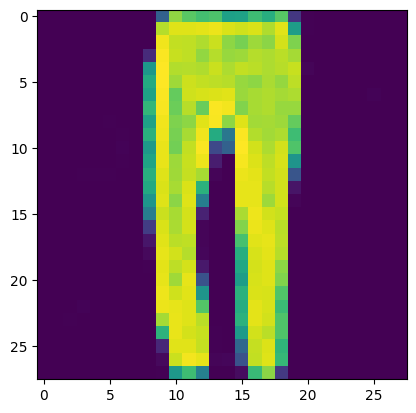

Dloss:  0.6284584
Gloss:  0.81888056
Dloss:  0.62845516
Gloss:  0.8188895
Dloss:  0.62845254
Gloss:  0.81890213
Dloss:  0.6284508
Gloss:  0.8189044
Dloss:  0.6284483
Gloss:  0.81892025
Dloss:  0.62844616
Gloss:  0.8189176
Dloss:  0.62844384
Gloss:  0.8189371
Dloss:  0.62844175
Gloss:  0.8189348
Dloss:  0.62843883
Gloss:  0.8189553
Dloss:  0.6284354
Gloss:  0.8189487
Dloss:  0.6284341
Gloss:  0.8189724
Dloss:  0.6284327
Gloss:  0.8189644
Dloss:  0.6284302
Gloss:  0.8189931
Dloss:  0.6284283
Gloss:  0.8189837
Dloss:  0.62842685
Gloss:  0.8190099
Dloss:  0.6284239
Gloss:  0.8190068
Dloss:  0.62842214
Gloss:  0.81902856
Dloss:  0.6284199
Gloss:  0.8190252
Dloss:  0.62841845
Gloss:  0.81904924
Dloss:  0.62841713
Gloss:  0.81904703
Dloss:  0.62841547
Gloss:  0.8190705
Dloss:  0.6284143
Gloss:  0.8190603
Dloss:  0.6284139
Gloss:  0.8190977
Dloss:  0.62841356
Gloss:  0.81907815
Dloss:  0.6284155
Gloss:  0.8191111
Dloss:  0.62841386
Gloss:  0.81910306
Dloss:  0.6284133
Gloss:  0.81912494
Dloss:

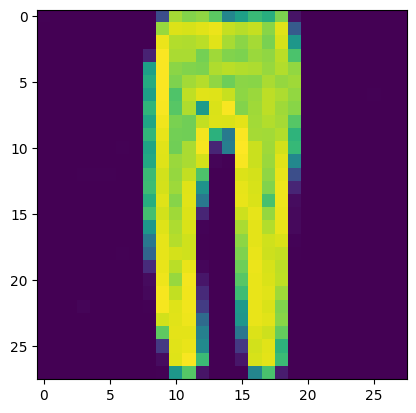

Dloss:  0.6284011
Gloss:  0.819159
Dloss:  0.6283966
Gloss:  0.81915706
Dloss:  0.6283927
Gloss:  0.8191738
Dloss:  0.6283888
Gloss:  0.819171
Dloss:  0.62838703
Gloss:  0.81919116
Dloss:  0.6283848
Gloss:  0.81918484
Dloss:  0.6283837
Gloss:  0.81920844
Dloss:  0.62838024
Gloss:  0.8192054
Dloss:  0.6283775
Gloss:  0.8192315
Dloss:  0.6283755
Gloss:  0.8192244
Dloss:  0.6283736
Gloss:  0.81925356
Dloss:  0.62837195
Gloss:  0.81924653
Dloss:  0.628371
Gloss:  0.8192719
Dloss:  0.6283691
Gloss:  0.8192657
Dloss:  0.62836885
Gloss:  0.8192889
Dloss:  0.62836933
Gloss:  0.8192867
Dloss:  0.6283659
Gloss:  0.8193038
Dloss:  0.6283629
Gloss:  0.81930214
Dloss:  0.6283608
Gloss:  0.8193211
Dloss:  0.6283577
Gloss:  0.81932056
Dloss:  0.62835574
Gloss:  0.81934
Dloss:  0.6283531
Gloss:  0.8193403
Dloss:  0.62835217
Gloss:  0.81935716
Dloss:  0.62834847
Gloss:  0.8193546
Dloss:  0.6283463
Gloss:  0.81937593
Dloss:  0.62834316
Gloss:  0.81937015
Dloss:  0.62834305
Gloss:  0.81940395
Dloss:  0.6

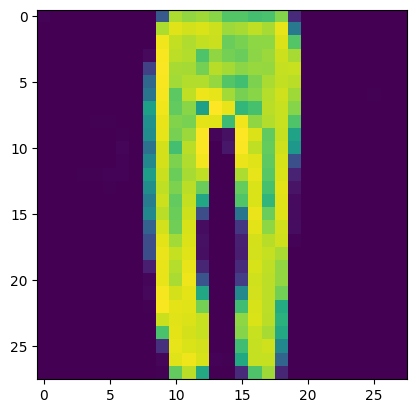

Dloss:  0.6283415
Gloss:  0.8194405
Dloss:  0.6283412
Gloss:  0.8194306
Dloss:  0.62834096
Gloss:  0.8194612
Dloss:  0.6283395
Gloss:  0.81945163
Dloss:  0.62833685
Gloss:  0.81947696
Dloss:  0.62833345
Gloss:  0.81947345
Dloss:  0.62833023
Gloss:  0.819492
Dloss:  0.6283274
Gloss:  0.8194929
Dloss:  0.6283248
Gloss:  0.81950486
Dloss:  0.628321
Gloss:  0.81951106
Dloss:  0.6283179
Gloss:  0.8195225
Dloss:  0.62831557
Gloss:  0.81952906
Dloss:  0.62831175
Gloss:  0.8195411
Dloss:  0.6283082
Gloss:  0.81954646
Dloss:  0.62830496
Gloss:  0.81956184
89 / 100
Dloss:  0.6283014
Gloss:  0.8195606
89 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


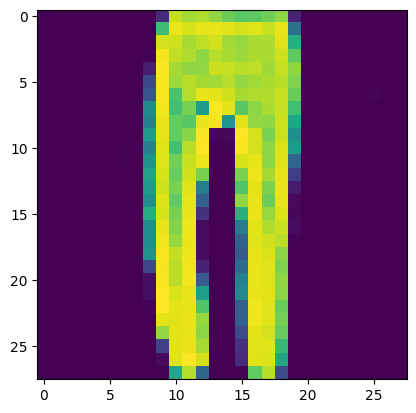

Dloss:  0.6282993
Gloss:  0.81958544
Dloss:  0.6282975
Gloss:  0.81957906
Dloss:  0.62829584
Gloss:  0.8196057
Dloss:  0.6282929
Gloss:  0.8195978
Dloss:  0.6282908
Gloss:  0.8196192
Dloss:  0.6282881
Gloss:  0.81961817
Dloss:  0.62828594
Gloss:  0.81963354
Dloss:  0.6282847
Gloss:  0.819635
Dloss:  0.6282824
Gloss:  0.81964785
Dloss:  0.62828
Gloss:  0.81965053
Dloss:  0.62827766
Gloss:  0.81967264
Dloss:  0.62827533
Gloss:  0.8196653
Dloss:  0.62827224
Gloss:  0.8196909
Dloss:  0.6282715
Gloss:  0.8196794
Dloss:  0.6282724
Gloss:  0.8197226
Dloss:  0.6282738
Gloss:  0.8197041
Dloss:  0.628274
Gloss:  0.81974137
Dloss:  0.6282735
Gloss:  0.81972814
Dloss:  0.62827295
Gloss:  0.81975687
Dloss:  0.6282707
Gloss:  0.81974876
Dloss:  0.62826794
Gloss:  0.8197754
Dloss:  0.6282647
Gloss:  0.8197715
Dloss:  0.62826294
Gloss:  0.819794
Dloss:  0.6282625
Gloss:  0.8197925
Dloss:  0.6282608
Gloss:  0.8198157
Dloss:  0.6282595
Gloss:  0.8198057
Dloss:  0.6282582
Gloss:  0.8198356
Dloss:  0.6282

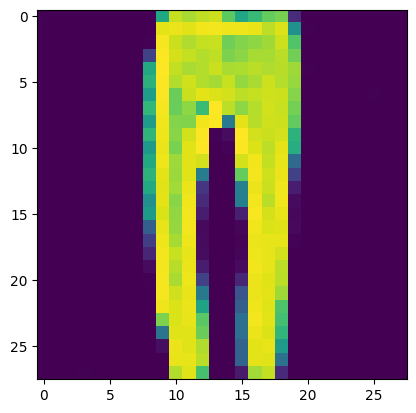

Dloss:  0.6282523
Gloss:  0.8198793
Dloss:  0.6282509
Gloss:  0.81987154
Dloss:  0.6282479
Gloss:  0.8198959
Dloss:  0.62824535
Gloss:  0.8198946
Dloss:  0.6282423
Gloss:  0.81992066
Dloss:  0.62824106
Gloss:  0.81991357
Dloss:  0.62823963
Gloss:  0.819936
Dloss:  0.6282364
Gloss:  0.81993324
Dloss:  0.62823355
Gloss:  0.8199528
Dloss:  0.6282312
Gloss:  0.819953
Dloss:  0.6282276
Gloss:  0.8199741
Dloss:  0.6282242
Gloss:  0.8199752
Dloss:  0.62822115
Gloss:  0.81999135
Dloss:  0.6282179
Gloss:  0.8199927
Dloss:  0.6282156
Gloss:  0.82000977
Dloss:  0.6282132
Gloss:  0.8200076
Dloss:  0.6282093
Gloss:  0.82002616
Dloss:  0.62820625
Gloss:  0.820023
Dloss:  0.6282027
Gloss:  0.820042
Dloss:  0.62819904
Gloss:  0.82004344
Dloss:  0.6281966
Gloss:  0.8200568
Dloss:  0.6281935
Gloss:  0.8200585
Dloss:  0.62819135
Gloss:  0.820073
Dloss:  0.628189
Gloss:  0.8200779
Dloss:  0.6281847
Gloss:  0.82009214
Dloss:  0.62818164
Gloss:  0.8200965
Dloss:  0.62817824
Gloss:  0.8201098
Dloss:  0.62817

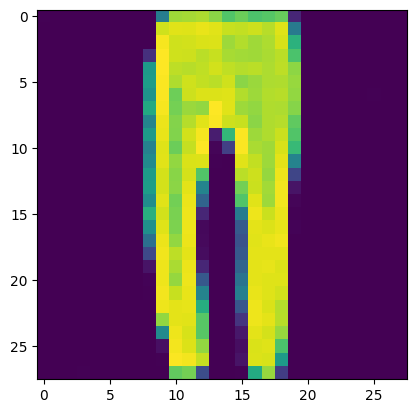

Dloss:  0.6281632
Gloss:  0.8201475
Dloss:  0.6281599
Gloss:  0.8201435
Dloss:  0.62815756
Gloss:  0.8201752
Dloss:  0.62815565
Gloss:  0.8201594
Dloss:  0.628155
Gloss:  0.8202062
Dloss:  0.62815726
Gloss:  0.820182
Dloss:  0.6281586
Gloss:  0.82022756
Dloss:  0.6281594
Gloss:  0.8202102
Dloss:  0.6281621
Gloss:  0.82024753
Dloss:  0.62816274
Gloss:  0.82023484
Dloss:  0.6281624
Gloss:  0.8202645
Dloss:  0.62816036
Gloss:  0.82025796
Dloss:  0.6281577
Gloss:  0.8202873
Dloss:  0.62815744
Gloss:  0.8202866
Dloss:  0.628159
Gloss:  0.8203017
Dloss:  0.6281561
Gloss:  0.82031107
Dloss:  0.6281537
Gloss:  0.8203208
Dloss:  0.6281507
Gloss:  0.82033
Dloss:  0.6281476
Gloss:  0.8203388
Dloss:  0.62814385
Gloss:  0.8203445
Dloss:  0.6281404
Gloss:  0.82035214
Dloss:  0.6281386
Gloss:  0.8203562
Dloss:  0.62813467
Gloss:  0.8203668
Dloss:  0.6281317
Gloss:  0.820366
Dloss:  0.62813044
Gloss:  0.82038003
Dloss:  0.6281276
Gloss:  0.8203843
Dloss:  0.62812614
Gloss:  0.8203973
Dloss:  0.6281235

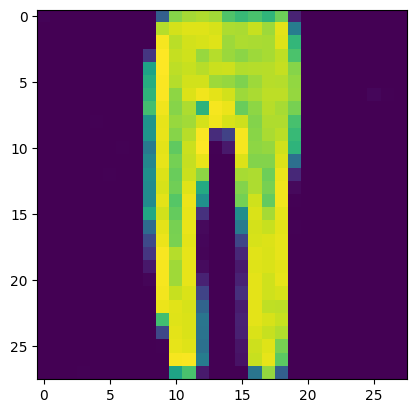

Dloss:  0.6281148
Gloss:  0.8204342
Dloss:  0.62811226
Gloss:  0.82042897
Dloss:  0.6281094
Gloss:  0.82045585
Dloss:  0.6281069
Gloss:  0.82044804
Dloss:  0.628105
Gloss:  0.82047594
Dloss:  0.62810284
Gloss:  0.8204688
Dloss:  0.6281019
Gloss:  0.82049835
Dloss:  0.62809914
Gloss:  0.8204874
Dloss:  0.6280972
Gloss:  0.8205159
Dloss:  0.6280947
Gloss:  0.8205039
Dloss:  0.62809384
Gloss:  0.8205316
Dloss:  0.62809294
Gloss:  0.82052475
Dloss:  0.6280933
Gloss:  0.8205532
Dloss:  0.62809145
Gloss:  0.8205437
Dloss:  0.6280902
Gloss:  0.8205721
Dloss:  0.6280869
Gloss:  0.8205637
Dloss:  0.62808526
Gloss:  0.82059443
Dloss:  0.62808436
Gloss:  0.82058525
Dloss:  0.62808335
Gloss:  0.82061225
Dloss:  0.62808055
Gloss:  0.82060266
Dloss:  0.62807876
Gloss:  0.82062256
Dloss:  0.62807506
Gloss:  0.8206219
Dloss:  0.62807345
Gloss:  0.8206384
Dloss:  0.62807107
Gloss:  0.82063997
Dloss:  0.6280687
Gloss:  0.8206519
Dloss:  0.62806493
Gloss:  0.8206536
Dloss:  0.6280611
Gloss:  0.820664
Dlo

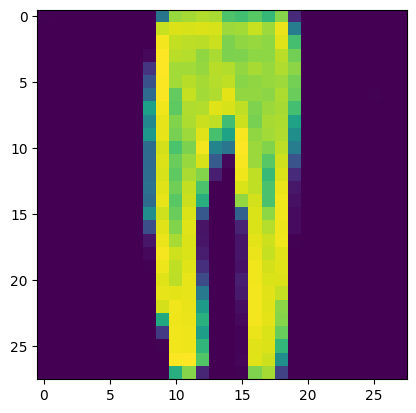

Dloss:  0.6280502
Gloss:  0.82069254
Dloss:  0.6280484
Gloss:  0.8206989
Dloss:  0.6280459
Gloss:  0.8207075
Dloss:  0.62804216
Gloss:  0.8207102
Dloss:  0.62803864
Gloss:  0.82072484
Dloss:  0.628035
Gloss:  0.82072365
Dloss:  0.62803215
Gloss:  0.8207455
Dloss:  0.6280289
Gloss:  0.82073945
Dloss:  0.6280271
Gloss:  0.8207646
Dloss:  0.62802446
Gloss:  0.8207621
Dloss:  0.6280218
Gloss:  0.82078695
Dloss:  0.6280203
Gloss:  0.82078165
Dloss:  0.628019
Gloss:  0.8208049
Dloss:  0.6280155
Gloss:  0.82079697
Dloss:  0.6280134
Gloss:  0.82082736
90 / 100
Dloss:  0.6280118
Gloss:  0.82081693
90 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


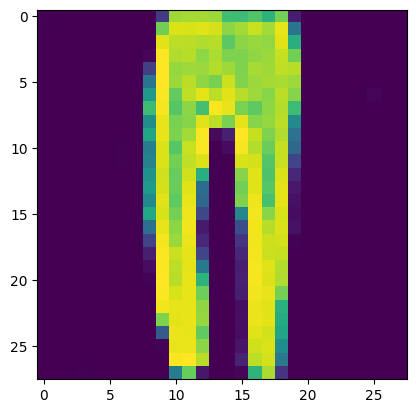

Dloss:  0.62801147
Gloss:  0.8208456
Dloss:  0.628012
Gloss:  0.8208377
Dloss:  0.62801087
Gloss:  0.8208576
Dloss:  0.62800795
Gloss:  0.82085645
Dloss:  0.6280059
Gloss:  0.82086605
Dloss:  0.62800276
Gloss:  0.8208764
Dloss:  0.62799954
Gloss:  0.8208782
Dloss:  0.6279977
Gloss:  0.8208966
Dloss:  0.627997
Gloss:  0.8208939
Dloss:  0.6279959
Gloss:  0.8209147
Dloss:  0.6279936
Gloss:  0.82091445
Dloss:  0.6279906
Gloss:  0.82092756
Dloss:  0.62798774
Gloss:  0.8209329
Dloss:  0.6279856
Gloss:  0.82094973
Dloss:  0.62798303
Gloss:  0.82095057
Dloss:  0.6279801
Gloss:  0.82097155
Dloss:  0.6279785
Gloss:  0.8209682
Dloss:  0.6279762
Gloss:  0.8209979
Dloss:  0.6279739
Gloss:  0.8209802
Dloss:  0.6279736
Gloss:  0.82102334
Dloss:  0.62797445
Gloss:  0.82100224
Dloss:  0.6279769
Gloss:  0.82104707
Dloss:  0.6279787
Gloss:  0.8210285
Dloss:  0.62798005
Gloss:  0.82106423
Dloss:  0.6279783
Gloss:  0.8210526
Dloss:  0.6279775
Gloss:  0.8210797
Dloss:  0.6279757
Gloss:  0.8210732
Dloss:  0.

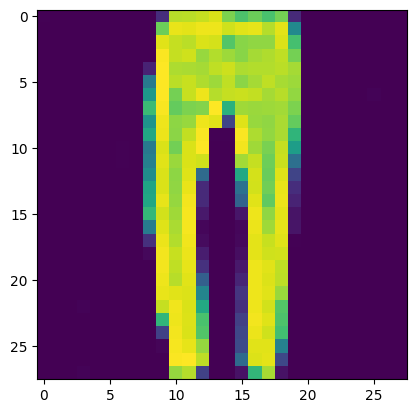

Dloss:  0.62796384
Gloss:  0.8211061
Dloss:  0.6279611
Gloss:  0.8211237
Dloss:  0.6279573
Gloss:  0.82112646
Dloss:  0.62795466
Gloss:  0.82114214
Dloss:  0.62795043
Gloss:  0.82113963
Dloss:  0.6279485
Gloss:  0.8211579
Dloss:  0.6279473
Gloss:  0.82115054
Dloss:  0.62794477
Gloss:  0.8211764
Dloss:  0.627942
Gloss:  0.8211651
Dloss:  0.62794113
Gloss:  0.82119787
Dloss:  0.6279387
Gloss:  0.8211889
Dloss:  0.62793565
Gloss:  0.8212135
Dloss:  0.6279336
Gloss:  0.8212107
Dloss:  0.62793034
Gloss:  0.8212306
Dloss:  0.6279282
Gloss:  0.8212266
Dloss:  0.62792766
Gloss:  0.8212498
Dloss:  0.6279259
Gloss:  0.8212448
Dloss:  0.6279229
Gloss:  0.82126576
Dloss:  0.62791884
Gloss:  0.8212601
Dloss:  0.6279155
Gloss:  0.82128376
Dloss:  0.6279127
Gloss:  0.8212735
Dloss:  0.6279109
Gloss:  0.8213056
Dloss:  0.6279108
Gloss:  0.8212921
Dloss:  0.62790936
Gloss:  0.8213248
Dloss:  0.6279077
Gloss:  0.8213153
Dloss:  0.6279062
Gloss:  0.8213458
Dloss:  0.6279049
Gloss:  0.82133275
Dloss:  0.6

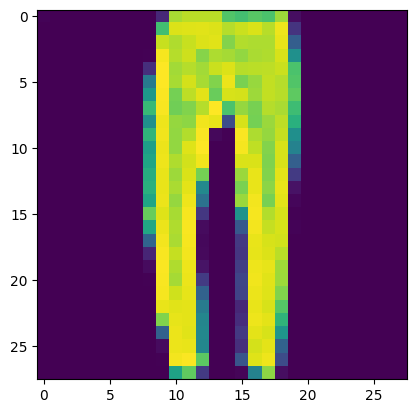

Dloss:  0.6278984
Gloss:  0.82137245
Dloss:  0.627898
Gloss:  0.8214
Dloss:  0.6278955
Gloss:  0.8213985
Dloss:  0.6278907
Gloss:  0.8214127
Dloss:  0.62788653
Gloss:  0.8214152
Dloss:  0.6278848
Gloss:  0.82142854
Dloss:  0.62788206
Gloss:  0.8214269
Dloss:  0.627879
Gloss:  0.8214417
Dloss:  0.6278762
Gloss:  0.8214402
Dloss:  0.62787324
Gloss:  0.821455
Dloss:  0.6278702
Gloss:  0.82145303
Dloss:  0.62786746
Gloss:  0.8214686
Dloss:  0.62786496
Gloss:  0.8214715
Dloss:  0.62786156
Gloss:  0.8214887
Dloss:  0.6278597
Gloss:  0.82148105
Dloss:  0.6278578
Gloss:  0.8215114
Dloss:  0.6278569
Gloss:  0.82149917
Dloss:  0.62785643
Gloss:  0.82152665
Dloss:  0.6278535
Gloss:  0.8215188
Dloss:  0.62785137
Gloss:  0.82154465
Dloss:  0.62784964
Gloss:  0.82153887
Dloss:  0.6278493
Gloss:  0.8215555
Dloss:  0.627847
Gloss:  0.8215575
Dloss:  0.6278454
Gloss:  0.8215719
Dloss:  0.62784225
Gloss:  0.8215688
Dloss:  0.62783945
Gloss:  0.82159233
Dloss:  0.6278375
Gloss:  0.82158965
Dloss:  0.6278

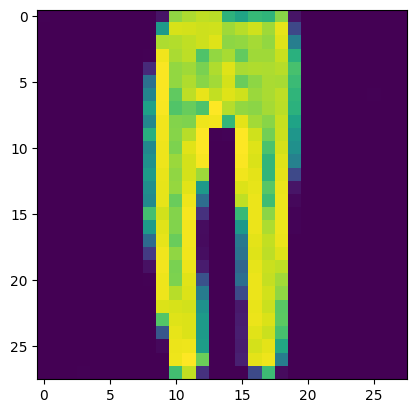

Dloss:  0.6278272
Gloss:  0.8216287
Dloss:  0.6278239
Gloss:  0.8216426
Dloss:  0.6278207
Gloss:  0.82164574
Dloss:  0.6278177
Gloss:  0.82166463
Dloss:  0.62781507
Gloss:  0.8216672
Dloss:  0.62781143
Gloss:  0.821681
Dloss:  0.62780917
Gloss:  0.82168406
Dloss:  0.6278052
Gloss:  0.8217036
Dloss:  0.6278023
Gloss:  0.82169807
Dloss:  0.6278005
Gloss:  0.82171625
Dloss:  0.62779903
Gloss:  0.82171345
Dloss:  0.62779593
Gloss:  0.8217283
Dloss:  0.6277937
Gloss:  0.8217287
Dloss:  0.62779015
Gloss:  0.82174414
Dloss:  0.627788
Gloss:  0.8217417
Dloss:  0.62778604
Gloss:  0.8217659
Dloss:  0.6277831
Gloss:  0.82176167
Dloss:  0.62778085
Gloss:  0.8217844
Dloss:  0.6277781
Gloss:  0.82177746
Dloss:  0.6277761
Gloss:  0.8218062
Dloss:  0.6277745
Gloss:  0.82178956
Dloss:  0.6277739
Gloss:  0.8218309
Dloss:  0.6277772
Gloss:  0.8218081
Dloss:  0.6277804
Gloss:  0.8218555
Dloss:  0.6277851
Gloss:  0.8218388
Dloss:  0.6277846
Gloss:  0.8218755
Dloss:  0.6277844
Gloss:  0.821863
Dloss:  0.627

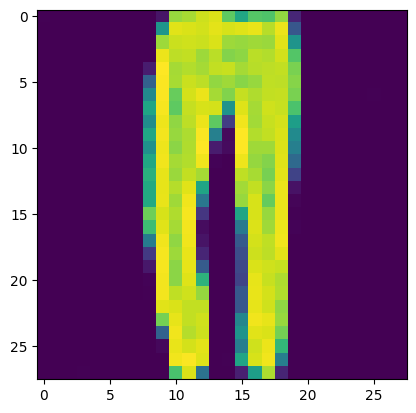

Dloss:  0.62778
Gloss:  0.82190424
Dloss:  0.6277777
Gloss:  0.8219205
Dloss:  0.62777454
Gloss:  0.8219204
Dloss:  0.62777126
Gloss:  0.82193494
Dloss:  0.62776726
Gloss:  0.8219357
Dloss:  0.6277635
Gloss:  0.8219524
Dloss:  0.62776023
Gloss:  0.8219563
Dloss:  0.6277573
Gloss:  0.8219746
Dloss:  0.62775546
Gloss:  0.8219778
Dloss:  0.62775415
Gloss:  0.8219997
Dloss:  0.6277502
Gloss:  0.82199466
Dloss:  0.6277474
Gloss:  0.8220151
Dloss:  0.62774503
Gloss:  0.82201415
Dloss:  0.62774193
Gloss:  0.8220327
Dloss:  0.62773895
Gloss:  0.82203513
91 / 100
Dloss:  0.6277368
Gloss:  0.82204854
91 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


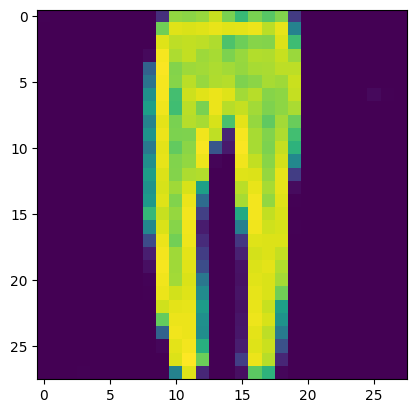

Dloss:  0.6277333
Gloss:  0.82205105
Dloss:  0.62773037
Gloss:  0.82206446
Dloss:  0.6277269
Gloss:  0.82207
Dloss:  0.6277236
Gloss:  0.822083
Dloss:  0.6277206
Gloss:  0.82208425
Dloss:  0.6277177
Gloss:  0.8221109
Dloss:  0.6277163
Gloss:  0.8220979
Dloss:  0.6277155
Gloss:  0.82213795
Dloss:  0.6277181
Gloss:  0.82211876
Dloss:  0.62771916
Gloss:  0.82215977
Dloss:  0.6277189
Gloss:  0.82214725
Dloss:  0.6277161
Gloss:  0.82217234
Dloss:  0.6277142
Gloss:  0.82216704
Dloss:  0.6277127
Gloss:  0.822183
Dloss:  0.62770975
Gloss:  0.8221878
Dloss:  0.62770617
Gloss:  0.8221989
Dloss:  0.627703
Gloss:  0.8222019
Dloss:  0.62769973
Gloss:  0.8222132
Dloss:  0.6276963
Gloss:  0.8222197
Dloss:  0.6276927
Gloss:  0.8222294
Dloss:  0.6276885
Gloss:  0.82223594
Dloss:  0.62768525
Gloss:  0.82224685
Dloss:  0.62768203
Gloss:  0.82225823
Dloss:  0.6276804
Gloss:  0.8222632
Dloss:  0.6276771
Gloss:  0.8222792
Dloss:  0.6276736
Gloss:  0.82228273
Dloss:  0.6276713
Gloss:  0.822299
Dloss:  0.6276

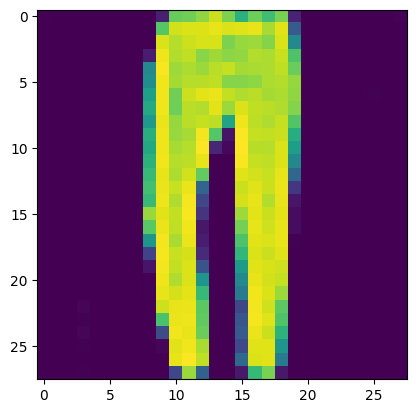

Dloss:  0.6276622
Gloss:  0.82233745
Dloss:  0.62765974
Gloss:  0.82232654
Dloss:  0.6276575
Gloss:  0.8223622
Dloss:  0.62765574
Gloss:  0.82235366
Dloss:  0.6276539
Gloss:  0.82238495
Dloss:  0.6276525
Gloss:  0.82237285
Dloss:  0.6276519
Gloss:  0.8224031
Dloss:  0.6276501
Gloss:  0.8223917
Dloss:  0.62764883
Gloss:  0.8224211
Dloss:  0.6276477
Gloss:  0.8224112
Dloss:  0.6276453
Gloss:  0.8224469
Dloss:  0.6276436
Gloss:  0.8224377
Dloss:  0.6276426
Gloss:  0.82246095
Dloss:  0.62764084
Gloss:  0.8224576
Dloss:  0.6276394
Gloss:  0.8224754
Dloss:  0.62763816
Gloss:  0.82246983
Dloss:  0.62763566
Gloss:  0.8224858
Dloss:  0.6276327
Gloss:  0.82248366
Dloss:  0.6276304
Gloss:  0.8225093
Dloss:  0.6276281
Gloss:  0.82250535
Dloss:  0.62762535
Gloss:  0.8225238
Dloss:  0.62762177
Gloss:  0.8225254
Dloss:  0.62761873
Gloss:  0.82254
Dloss:  0.62761545
Gloss:  0.8225403
Dloss:  0.6276119
Gloss:  0.8225591
Dloss:  0.62760913
Gloss:  0.8225554
Dloss:  0.6276066
Gloss:  0.822582
Dloss:  0.6

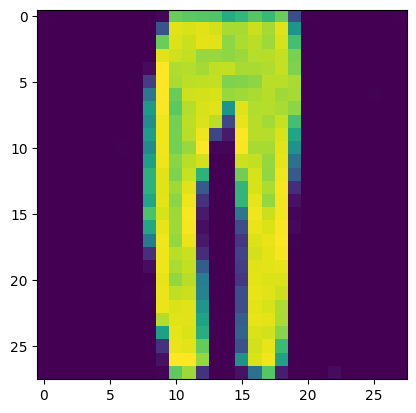

Dloss:  0.62759936
Gloss:  0.8226214
Dloss:  0.62759715
Gloss:  0.8226138
Dloss:  0.6275958
Gloss:  0.8226436
Dloss:  0.6275939
Gloss:  0.82263154
Dloss:  0.6275933
Gloss:  0.8226666
Dloss:  0.62759393
Gloss:  0.8226513
Dloss:  0.6275929
Gloss:  0.82268107
Dloss:  0.6275903
Gloss:  0.82267076
Dloss:  0.6275893
Gloss:  0.82270473
Dloss:  0.62758774
Gloss:  0.8226949
Dloss:  0.62758756
Gloss:  0.82272094
Dloss:  0.627587
Gloss:  0.8227171
Dloss:  0.62758386
Gloss:  0.8227376
Dloss:  0.6275821
Gloss:  0.82274336
Dloss:  0.62758183
Gloss:  0.8227531
Dloss:  0.6275794
Gloss:  0.82276356
Dloss:  0.6275773
Gloss:  0.8227697
Dloss:  0.6275757
Gloss:  0.82278347
Dloss:  0.6275726
Gloss:  0.8227924
Dloss:  0.6275692
Gloss:  0.82279766
Dloss:  0.62756485
Gloss:  0.8228086
Dloss:  0.6275637
Gloss:  0.8228103
Dloss:  0.6275611
Gloss:  0.82282466
Dloss:  0.6275588
Gloss:  0.8228283
Dloss:  0.6275563
Gloss:  0.8228424
Dloss:  0.6275524
Gloss:  0.82284886
Dloss:  0.6275505
Gloss:  0.8228568
Dloss:  0.

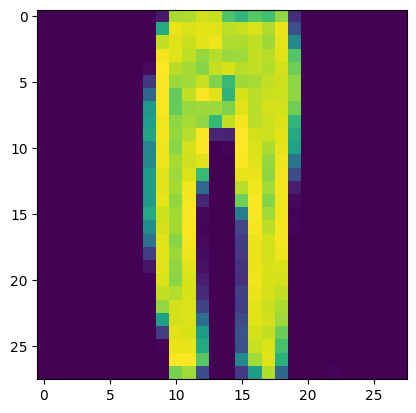

Dloss:  0.62753606
Gloss:  0.822896
Dloss:  0.62753296
Gloss:  0.82289153
Dloss:  0.6275298
Gloss:  0.8229178
Dloss:  0.62752646
Gloss:  0.82290673
Dloss:  0.6275257
Gloss:  0.8229394
Dloss:  0.62752694
Gloss:  0.82292646
Dloss:  0.6275279
Gloss:  0.8229588
Dloss:  0.62752545
Gloss:  0.8229476
Dloss:  0.62752324
Gloss:  0.8229769
Dloss:  0.6275209
Gloss:  0.82296485
Dloss:  0.6275197
Gloss:  0.8229955
Dloss:  0.6275186
Gloss:  0.82298976
Dloss:  0.6275171
Gloss:  0.8230127
Dloss:  0.6275154
Gloss:  0.8230093
Dloss:  0.6275135
Gloss:  0.8230266
Dloss:  0.6275107
Gloss:  0.8230267
Dloss:  0.6275062
Gloss:  0.823044
Dloss:  0.62750363
Gloss:  0.8230447
Dloss:  0.6275011
Gloss:  0.82306325
Dloss:  0.62749696
Gloss:  0.8230625
Dloss:  0.6274948
Gloss:  0.82308316
Dloss:  0.627492
Gloss:  0.8230843
Dloss:  0.62749
Gloss:  0.8230927
Dloss:  0.62748617
Gloss:  0.8231069
Dloss:  0.6274827
Gloss:  0.8231041
Dloss:  0.62747955
Gloss:  0.82312846
Dloss:  0.6274778
Gloss:  0.82311624
Dloss:  0.6274

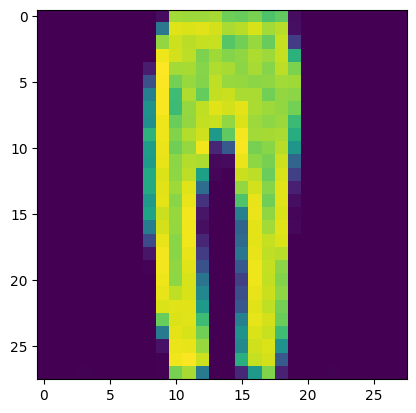

Dloss:  0.6274725
Gloss:  0.82315505
Dloss:  0.6274714
Gloss:  0.8231815
Dloss:  0.62746906
Gloss:  0.8231754
Dloss:  0.62746674
Gloss:  0.8232047
Dloss:  0.6274654
Gloss:  0.8231924
Dloss:  0.62746453
Gloss:  0.8232321
Dloss:  0.6274644
Gloss:  0.8232174
Dloss:  0.6274634
Gloss:  0.82325107
Dloss:  0.6274635
Gloss:  0.8232384
Dloss:  0.6274624
Gloss:  0.82327163
Dloss:  0.6274598
Gloss:  0.8232632
Dloss:  0.62745786
Gloss:  0.8232889
Dloss:  0.6274557
Gloss:  0.8232847
Dloss:  0.6274522
Gloss:  0.82330155
Dloss:  0.6274492
Gloss:  0.82330847
92 / 100
Dloss:  0.62744534
Gloss:  0.8233175
92 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


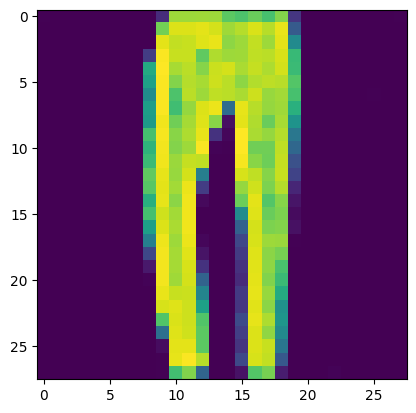

Dloss:  0.6274419
Gloss:  0.823329
Dloss:  0.62743896
Gloss:  0.82332927
Dloss:  0.6274369
Gloss:  0.82334006
Dloss:  0.62743336
Gloss:  0.823346
Dloss:  0.62743133
Gloss:  0.8233494
Dloss:  0.62742835
Gloss:  0.8233676
Dloss:  0.6274247
Gloss:  0.82336265
Dloss:  0.62742156
Gloss:  0.82338846
Dloss:  0.6274194
Gloss:  0.8233826
Dloss:  0.62741727
Gloss:  0.8234057
Dloss:  0.6274137
Gloss:  0.8234018
Dloss:  0.6274117
Gloss:  0.82342243
Dloss:  0.6274099
Gloss:  0.8234176
Dloss:  0.627407
Gloss:  0.82343495
Dloss:  0.62740505
Gloss:  0.8234307
Dloss:  0.627403
Gloss:  0.8234576
Dloss:  0.6274014
Gloss:  0.8234505
Dloss:  0.6273993
Gloss:  0.82347715
Dloss:  0.6273968
Gloss:  0.8234673
Dloss:  0.6273959
Gloss:  0.8235003
Dloss:  0.62739545
Gloss:  0.823489
Dloss:  0.6273951
Gloss:  0.82352066
Dloss:  0.6273936
Gloss:  0.8235134
Dloss:  0.62739277
Gloss:  0.8235376
Dloss:  0.62738943
Gloss:  0.8235372
Dloss:  0.62738633
Gloss:  0.82355726
Dloss:  0.627383
Gloss:  0.8235563
Dloss:  0.6273

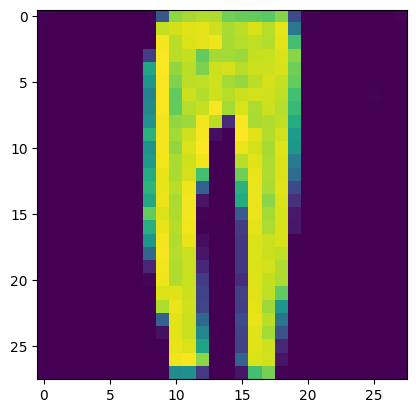

Dloss:  0.6273712
Gloss:  0.8235928
Dloss:  0.6273675
Gloss:  0.82360065
Dloss:  0.62736386
Gloss:  0.82360816
Dloss:  0.6273603
Gloss:  0.823619
Dloss:  0.6273559
Gloss:  0.8236237
Dloss:  0.6273531
Gloss:  0.8236381
Dloss:  0.6273505
Gloss:  0.82363474
Dloss:  0.6273476
Gloss:  0.82365906
Dloss:  0.62734455
Gloss:  0.8236511
Dloss:  0.6273427
Gloss:  0.8236773
Dloss:  0.62733966
Gloss:  0.8236717
Dloss:  0.62733775
Gloss:  0.8237014
Dloss:  0.627336
Gloss:  0.8236876
Dloss:  0.6273348
Gloss:  0.8237229
Dloss:  0.62733376
Gloss:  0.82370746
Dloss:  0.6273334
Gloss:  0.82374245
Dloss:  0.62733215
Gloss:  0.823734
Dloss:  0.62733084
Gloss:  0.8237576
Dloss:  0.6273288
Gloss:  0.82375515
Dloss:  0.627326
Gloss:  0.8237772
Dloss:  0.62732345
Gloss:  0.8237725
Dloss:  0.6273217
Gloss:  0.82380146
Dloss:  0.62732124
Gloss:  0.8237906
Dloss:  0.6273203
Gloss:  0.823823
Dloss:  0.62731814
Gloss:  0.82381475
Dloss:  0.62731624
Gloss:  0.8238425
Dloss:  0.6273136
Gloss:  0.8238347
Dloss:  0.627

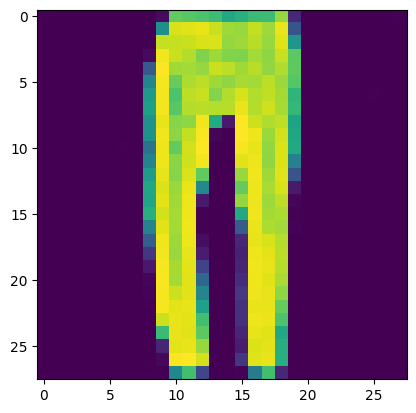

Dloss:  0.62730074
Gloss:  0.82386994
Dloss:  0.6272989
Gloss:  0.8238867
Dloss:  0.6272963
Gloss:  0.82389027
Dloss:  0.627292
Gloss:  0.8239011
Dloss:  0.62728846
Gloss:  0.823911
Dloss:  0.6272865
Gloss:  0.82391685
Dloss:  0.62728363
Gloss:  0.8239247
Dloss:  0.62727886
Gloss:  0.8239352
Dloss:  0.62727547
Gloss:  0.82394075
Dloss:  0.6272714
Gloss:  0.82395256
Dloss:  0.6272683
Gloss:  0.82395774
Dloss:  0.627265
Gloss:  0.82397115
Dloss:  0.6272611
Gloss:  0.823975
Dloss:  0.6272578
Gloss:  0.82398754
Dloss:  0.62725633
Gloss:  0.82398504
Dloss:  0.6272536
Gloss:  0.82400805
Dloss:  0.62725115
Gloss:  0.82400143
Dloss:  0.6272492
Gloss:  0.8240261
Dloss:  0.6272466
Gloss:  0.8240252
Dloss:  0.6272443
Gloss:  0.82404596
Dloss:  0.6272413
Gloss:  0.8240478
Dloss:  0.6272402
Gloss:  0.82406104
Dloss:  0.6272375
Gloss:  0.8240607
Dloss:  0.62723446
Gloss:  0.82407194
Dloss:  0.6272324
Gloss:  0.8240717
Dloss:  0.62722915
Gloss:  0.8241003
Dloss:  0.627228
Gloss:  0.82408947
Dloss:  0

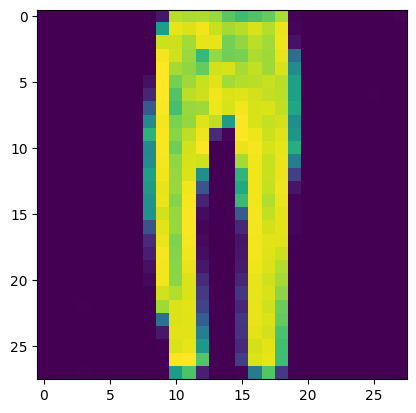

Dloss:  0.62722397
Gloss:  0.82414377
Dloss:  0.6272226
Gloss:  0.8241727
Dloss:  0.6272205
Gloss:  0.82416105
Dloss:  0.627219
Gloss:  0.824195
Dloss:  0.62721777
Gloss:  0.82418674
Dloss:  0.62721497
Gloss:  0.8242091
Dloss:  0.6272142
Gloss:  0.8242032
Dloss:  0.62721056
Gloss:  0.8242311
Dloss:  0.6272084
Gloss:  0.8242209
Dloss:  0.62720853
Gloss:  0.82425237
Dloss:  0.6272085
Gloss:  0.82424754
Dloss:  0.62720716
Gloss:  0.8242706
Dloss:  0.6272051
Gloss:  0.8242647
Dloss:  0.62720275
Gloss:  0.82429034
Dloss:  0.6272023
Gloss:  0.8242828
Dloss:  0.6272009
Gloss:  0.8243076
Dloss:  0.6271979
Gloss:  0.82430166
Dloss:  0.6271952
Gloss:  0.82432353
Dloss:  0.6271915
Gloss:  0.8243207
Dloss:  0.62718743
Gloss:  0.8243426
Dloss:  0.6271841
Gloss:  0.82433707
Dloss:  0.62718177
Gloss:  0.82436097
Dloss:  0.6271804
Gloss:  0.8243539
Dloss:  0.62717867
Gloss:  0.8243862
Dloss:  0.6271774
Gloss:  0.8243724
Dloss:  0.6271768
Gloss:  0.8244039
Dloss:  0.6271774
Gloss:  0.82439256
Dloss:  0

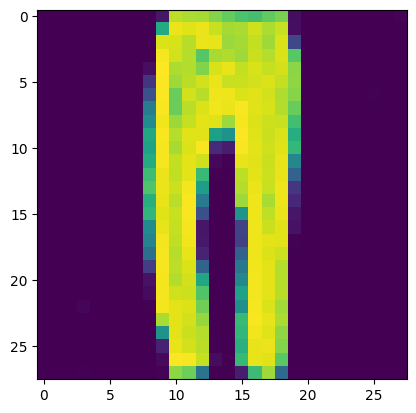

Dloss:  0.6271762
Gloss:  0.82443815
Dloss:  0.6271746
Gloss:  0.824461
Dloss:  0.62717205
Gloss:  0.8244574
Dloss:  0.6271689
Gloss:  0.8244802
Dloss:  0.6271658
Gloss:  0.82447314
Dloss:  0.6271636
Gloss:  0.8245054
Dloss:  0.6271631
Gloss:  0.82449216
Dloss:  0.62716055
Gloss:  0.8245175
Dloss:  0.62716055
Gloss:  0.8245097
Dloss:  0.6271582
Gloss:  0.82453376
Dloss:  0.62715566
Gloss:  0.8245289
Dloss:  0.62715393
Gloss:  0.8245457
Dloss:  0.62715113
Gloss:  0.82454723
Dloss:  0.627148
Gloss:  0.8245592
Dloss:  0.6271443
Gloss:  0.82456195
93 / 100
Dloss:  0.62714183
Gloss:  0.824569
93 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


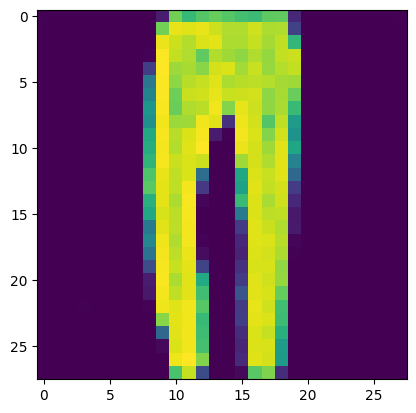

Dloss:  0.6271381
Gloss:  0.8245767
Dloss:  0.62713546
Gloss:  0.824587
Dloss:  0.6271321
Gloss:  0.8245897
Dloss:  0.627128
Gloss:  0.8246077
Dloss:  0.6271257
Gloss:  0.8246013
Dloss:  0.6271233
Gloss:  0.82462513
Dloss:  0.627122
Gloss:  0.8246171
Dloss:  0.62712395
Gloss:  0.82464945
Dloss:  0.62712604
Gloss:  0.824641
Dloss:  0.6271242
Gloss:  0.824656
Dloss:  0.62711996
Gloss:  0.82465756
Dloss:  0.62711704
Gloss:  0.82466686
Dloss:  0.62711316
Gloss:  0.82467276
Dloss:  0.6271111
Gloss:  0.82468355
Dloss:  0.6271085
Gloss:  0.8246894
Dloss:  0.62710416
Gloss:  0.82469445
Dloss:  0.6271009
Gloss:  0.8247065
Dloss:  0.6270973
Gloss:  0.82470703
Dloss:  0.62709373
Gloss:  0.8247214
Dloss:  0.62709105
Gloss:  0.8247188
Dloss:  0.6270877
Gloss:  0.8247415
Dloss:  0.6270855
Gloss:  0.8247363
Dloss:  0.6270828
Gloss:  0.82476276
Dloss:  0.62707955
Gloss:  0.824753
Dloss:  0.6270782
Gloss:  0.82479495
Dloss:  0.62707865
Gloss:  0.82477665
Dloss:  0.6270819
Gloss:  0.8248201
Dloss:  0.62

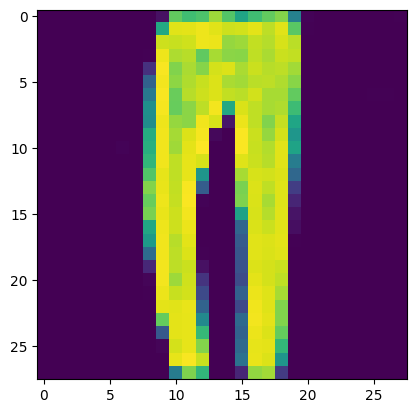

Dloss:  0.62708294
Gloss:  0.8248577
Dloss:  0.6270808
Gloss:  0.8248476
Dloss:  0.62707967
Gloss:  0.82487136
Dloss:  0.6270765
Gloss:  0.82487065
Dloss:  0.6270741
Gloss:  0.8248917
Dloss:  0.6270715
Gloss:  0.8248906
Dloss:  0.6270707
Gloss:  0.824907
Dloss:  0.62706774
Gloss:  0.82490593
Dloss:  0.62706447
Gloss:  0.824923
Dloss:  0.6270624
Gloss:  0.8249284
Dloss:  0.6270586
Gloss:  0.82494456
Dloss:  0.6270542
Gloss:  0.8249441
Dloss:  0.62705135
Gloss:  0.8249601
Dloss:  0.62704724
Gloss:  0.82496077
Dloss:  0.62704355
Gloss:  0.82497704
Dloss:  0.627041
Gloss:  0.8249764
Dloss:  0.6270374
Gloss:  0.82499737
Dloss:  0.62703526
Gloss:  0.82499576
Dloss:  0.627034
Gloss:  0.8250149
Dloss:  0.6270318
Gloss:  0.82501227
Dloss:  0.62702966
Gloss:  0.8250358
Dloss:  0.62702674
Gloss:  0.8250298
Dloss:  0.6270257
Gloss:  0.82505494
Dloss:  0.62702286
Gloss:  0.8250445
Dloss:  0.6270219
Gloss:  0.825079
Dloss:  0.62702084
Gloss:  0.8250689
Dloss:  0.6270186
Gloss:  0.8250971
Dloss:  0.6

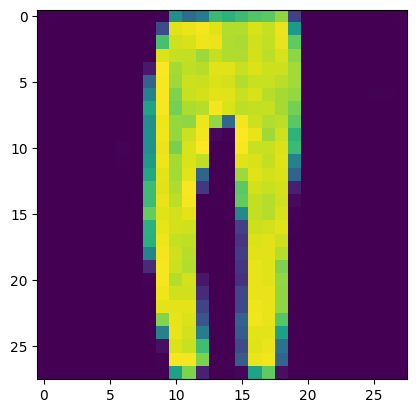

Dloss:  0.6270074
Gloss:  0.82513046
Dloss:  0.6270044
Gloss:  0.82512796
Dloss:  0.62700135
Gloss:  0.8251515
Dloss:  0.6269979
Gloss:  0.8251495
Dloss:  0.62699455
Gloss:  0.825171
Dloss:  0.62699443
Gloss:  0.8251674
Dloss:  0.6269938
Gloss:  0.8251905
Dloss:  0.6269908
Gloss:  0.82518655
Dloss:  0.6269878
Gloss:  0.8252114
Dloss:  0.6269841
Gloss:  0.8252025
Dloss:  0.62698126
Gloss:  0.8252258
Dloss:  0.62697905
Gloss:  0.82522124
Dloss:  0.6269757
Gloss:  0.82525
Dloss:  0.6269725
Gloss:  0.8252421
Dloss:  0.6269714
Gloss:  0.82526815
Dloss:  0.62697095
Gloss:  0.82526493
Dloss:  0.62696886
Gloss:  0.8252826
Dloss:  0.62696654
Gloss:  0.8252837
Dloss:  0.62696356
Gloss:  0.8253097
Dloss:  0.6269609
Gloss:  0.82530093
Dloss:  0.62695897
Gloss:  0.82533497
Dloss:  0.62695855
Gloss:  0.82532334
Dloss:  0.6269578
Gloss:  0.82535386
Dloss:  0.626957
Gloss:  0.82534415
Dloss:  0.62695676
Gloss:  0.8253723
Dloss:  0.6269551
Gloss:  0.8253684
Dloss:  0.62695456
Gloss:  0.8253898
Dloss:  

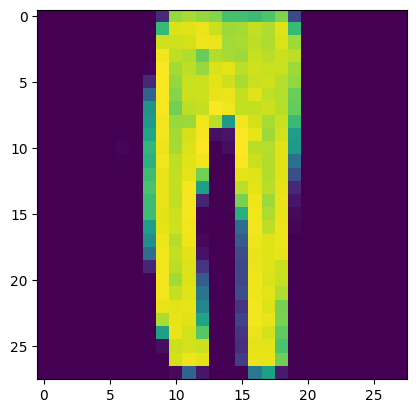

Dloss:  0.6269453
Gloss:  0.82543087
Dloss:  0.6269425
Gloss:  0.82542443
Dloss:  0.6269403
Gloss:  0.8254451
Dloss:  0.6269368
Gloss:  0.8254442
Dloss:  0.62693346
Gloss:  0.8254605
Dloss:  0.6269306
Gloss:  0.8254622
Dloss:  0.6269292
Gloss:  0.82548165
Dloss:  0.62692523
Gloss:  0.8254837
Dloss:  0.62692136
Gloss:  0.8255029
Dloss:  0.62691885
Gloss:  0.8255027
Dloss:  0.62691647
Gloss:  0.82552457
Dloss:  0.62691414
Gloss:  0.825525
Dloss:  0.62691176
Gloss:  0.82553995
Dloss:  0.62690854
Gloss:  0.8255436
Dloss:  0.62690663
Gloss:  0.8255569
Dloss:  0.626904
Gloss:  0.82555825
Dloss:  0.62690055
Gloss:  0.8255734
Dloss:  0.62689775
Gloss:  0.82557416
Dloss:  0.6268947
Gloss:  0.8255913
Dloss:  0.6268904
Gloss:  0.8255936
Dloss:  0.6268871
Gloss:  0.8256122
Dloss:  0.6268834
Gloss:  0.8256166
Dloss:  0.6268816
Gloss:  0.8256304
Dloss:  0.62687904
Gloss:  0.8256309
Dloss:  0.62687606
Gloss:  0.825647
Dloss:  0.62687254
Gloss:  0.8256485
Dloss:  0.6268694
Gloss:  0.82566315
Dloss:  0

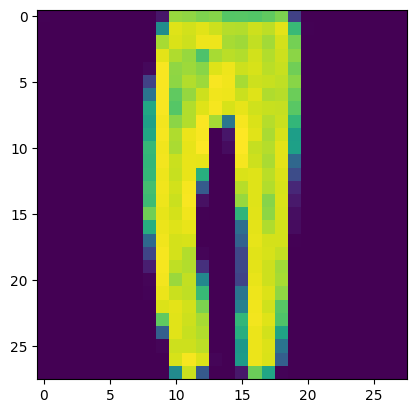

Dloss:  0.62686056
Gloss:  0.82569575
Dloss:  0.62685853
Gloss:  0.8256962
Dloss:  0.62685543
Gloss:  0.82571596
Dloss:  0.6268526
Gloss:  0.8257137
Dloss:  0.62684965
Gloss:  0.82573766
Dloss:  0.6268462
Gloss:  0.825726
Dloss:  0.6268441
Gloss:  0.82576346
Dloss:  0.62684274
Gloss:  0.82574755
Dloss:  0.62684435
Gloss:  0.8257958
Dloss:  0.6268451
Gloss:  0.82577574
Dloss:  0.6268468
Gloss:  0.82582253
Dloss:  0.62684786
Gloss:  0.82580715
Dloss:  0.6268481
Gloss:  0.8258408
Dloss:  0.6268479
Gloss:  0.82582974
Dloss:  0.626847
Gloss:  0.82586086
94 / 100
Dloss:  0.62684584
Gloss:  0.82585645
94 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


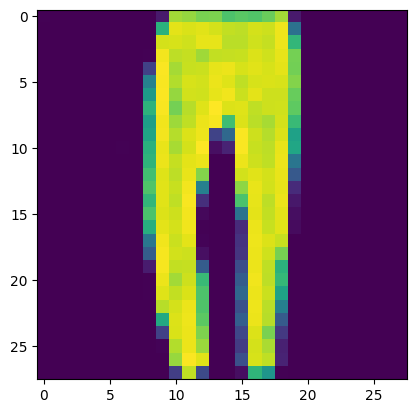

Dloss:  0.62684274
Gloss:  0.8258765
Dloss:  0.62684065
Gloss:  0.8258732
Dloss:  0.6268381
Gloss:  0.8258919
Dloss:  0.6268356
Gloss:  0.8258945
Dloss:  0.6268335
Gloss:  0.8259024
Dloss:  0.6268299
Gloss:  0.8259097
Dloss:  0.6268263
Gloss:  0.82591826
Dloss:  0.6268231
Gloss:  0.8259255
Dloss:  0.62682027
Gloss:  0.82593435
Dloss:  0.62681794
Gloss:  0.82594174
Dloss:  0.6268147
Gloss:  0.82595325
Dloss:  0.62681186
Gloss:  0.82595366
Dloss:  0.6268092
Gloss:  0.8259748
Dloss:  0.62680775
Gloss:  0.82596964
Dloss:  0.62680477
Gloss:  0.8259925
Dloss:  0.6268018
Gloss:  0.82598776
Dloss:  0.6267985
Gloss:  0.82601106
Dloss:  0.6267953
Gloss:  0.8260058
Dloss:  0.6267933
Gloss:  0.82603455
Dloss:  0.6267902
Gloss:  0.8260237
Dloss:  0.6267878
Gloss:  0.82605505
Dloss:  0.6267861
Gloss:  0.8260453
Dloss:  0.62678695
Gloss:  0.82608217
Dloss:  0.6267919
Gloss:  0.8260723
Dloss:  0.62679094
Gloss:  0.8261164
Dloss:  0.62679106
Gloss:  0.82610255
Dloss:  0.626791
Gloss:  0.8261346
Dloss: 

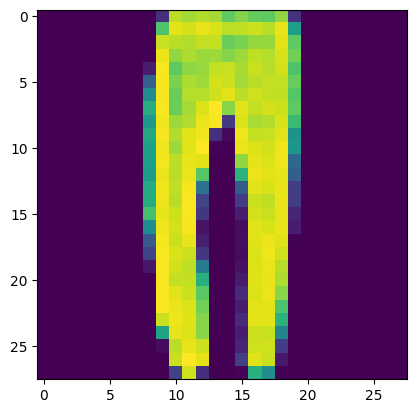

Dloss:  0.62678874
Gloss:  0.8261671
Dloss:  0.62678635
Gloss:  0.8261656
Dloss:  0.6267839
Gloss:  0.82618237
Dloss:  0.62678134
Gloss:  0.82618463
Dloss:  0.62677765
Gloss:  0.8261981
Dloss:  0.6267748
Gloss:  0.826199
Dloss:  0.6267726
Gloss:  0.8262099
Dloss:  0.62676877
Gloss:  0.82621795
Dloss:  0.6267651
Gloss:  0.8262281
Dloss:  0.6267621
Gloss:  0.82622975
Dloss:  0.62675744
Gloss:  0.82624924
Dloss:  0.6267533
Gloss:  0.8262501
Dloss:  0.6267498
Gloss:  0.82626635
Dloss:  0.6267466
Gloss:  0.82626736
Dloss:  0.6267444
Gloss:  0.82628727
Dloss:  0.62674296
Gloss:  0.8262834
Dloss:  0.6267409
Gloss:  0.8263091
Dloss:  0.6267385
Gloss:  0.8262982
Dloss:  0.62673634
Gloss:  0.8263278
Dloss:  0.62673444
Gloss:  0.8263208
Dloss:  0.6267327
Gloss:  0.82633704
Dloss:  0.6267295
Gloss:  0.82634115
Dloss:  0.62672704
Gloss:  0.82635176
Dloss:  0.6267243
Gloss:  0.82636976
Dloss:  0.62672085
Gloss:  0.8263768
Dloss:  0.62671703
Gloss:  0.82638854
Dloss:  0.62671304
Gloss:  0.8263921
Dlo

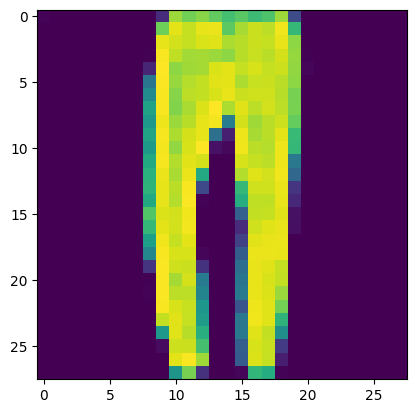

Dloss:  0.6266985
Gloss:  0.826429
Dloss:  0.62669504
Gloss:  0.82643664
Dloss:  0.62669075
Gloss:  0.8264497
Dloss:  0.6266876
Gloss:  0.8264578
Dloss:  0.62668705
Gloss:  0.82647
Dloss:  0.626687
Gloss:  0.82647896
Dloss:  0.6266856
Gloss:  0.8264906
Dloss:  0.62668234
Gloss:  0.82650006
Dloss:  0.6266795
Gloss:  0.8265151
Dloss:  0.6266754
Gloss:  0.8265182
Dloss:  0.6266722
Gloss:  0.8265405
Dloss:  0.62666905
Gloss:  0.826541
Dloss:  0.62666506
Gloss:  0.82656705
Dloss:  0.62666196
Gloss:  0.82656443
Dloss:  0.62666035
Gloss:  0.82658744
Dloss:  0.62665796
Gloss:  0.8265847
Dloss:  0.626655
Gloss:  0.82661104
Dloss:  0.6266526
Gloss:  0.8266019
Dloss:  0.6266501
Gloss:  0.82663625
Dloss:  0.626649
Gloss:  0.82662004
Dloss:  0.6266495
Gloss:  0.8266667
Dloss:  0.6266531
Gloss:  0.82664454
Dloss:  0.62665635
Gloss:  0.8266935
Dloss:  0.6266588
Gloss:  0.8266766
Dloss:  0.6266594
Gloss:  0.82670754
Dloss:  0.6266581
Gloss:  0.82670003
Dloss:  0.6266573
Gloss:  0.82672226
Dloss:  0.62

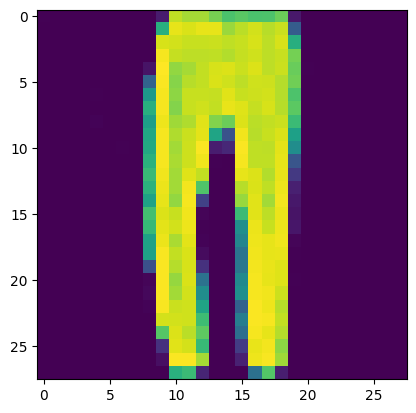

Dloss:  0.6266431
Gloss:  0.8267631
Dloss:  0.62663984
Gloss:  0.8267624
Dloss:  0.62663597
Gloss:  0.8267891
Dloss:  0.626633
Gloss:  0.82678956
Dloss:  0.626629
Gloss:  0.8268029
Dloss:  0.62662524
Gloss:  0.8268064
Dloss:  0.6266222
Gloss:  0.8268144
Dloss:  0.62661815
Gloss:  0.82682234
Dloss:  0.6266143
Gloss:  0.82682943
Dloss:  0.62661153
Gloss:  0.8268388
Dloss:  0.626609
Gloss:  0.8268509
Dloss:  0.62660635
Gloss:  0.8268603
Dloss:  0.6266046
Gloss:  0.82686937
Dloss:  0.62660134
Gloss:  0.8268774
Dloss:  0.62659794
Gloss:  0.8268855
Dloss:  0.62659514
Gloss:  0.8268952
Dloss:  0.62659067
Gloss:  0.82690257
Dloss:  0.62658715
Gloss:  0.826909
Dloss:  0.62658393
Gloss:  0.82691664
Dloss:  0.62658006
Gloss:  0.8269279
Dloss:  0.626578
Gloss:  0.8269337
Dloss:  0.62657446
Gloss:  0.8269483
Dloss:  0.626573
Gloss:  0.8269471
Dloss:  0.6265702
Gloss:  0.8269667
Dloss:  0.6265694
Gloss:  0.82696825
Dloss:  0.6265662
Gloss:  0.8269809
Dloss:  0.62656254
Gloss:  0.8269797
Dloss:  0.62

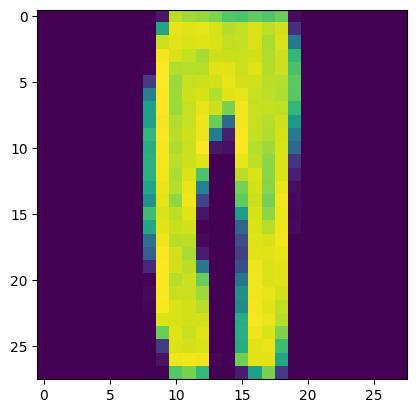

Dloss:  0.6265528
Gloss:  0.8270162
Dloss:  0.62655085
Gloss:  0.82702714
Dloss:  0.62654805
Gloss:  0.82703745
Dloss:  0.6265437
Gloss:  0.8270447
Dloss:  0.62653923
Gloss:  0.8270565
Dloss:  0.6265353
Gloss:  0.8270659
Dloss:  0.62653196
Gloss:  0.8270758
Dloss:  0.62652767
Gloss:  0.82708097
Dloss:  0.62652445
Gloss:  0.8270881
Dloss:  0.6265203
Gloss:  0.8270971
Dloss:  0.6265165
Gloss:  0.8271081
Dloss:  0.62651306
Gloss:  0.8271119
Dloss:  0.6265087
Gloss:  0.8271301
Dloss:  0.6265063
Gloss:  0.82713664
Dloss:  0.62650424
Gloss:  0.82715595
95 / 100
Dloss:  0.6265027
Gloss:  0.8271599
95 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


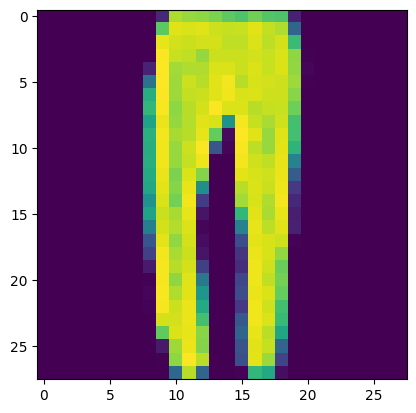

Dloss:  0.6265009
Gloss:  0.82718056
Dloss:  0.62649935
Gloss:  0.8271763
Dloss:  0.6264972
Gloss:  0.8272068
Dloss:  0.6264948
Gloss:  0.82719857
Dloss:  0.62649375
Gloss:  0.8272306
Dloss:  0.6264917
Gloss:  0.8272199
Dloss:  0.62649167
Gloss:  0.82725805
Dloss:  0.62649155
Gloss:  0.82724434
Dloss:  0.62649333
Gloss:  0.8272776
Dloss:  0.62649286
Gloss:  0.8272627
Dloss:  0.62649363
Gloss:  0.82730836
Dloss:  0.6264943
Gloss:  0.8272913
Dloss:  0.6264947
Gloss:  0.8273291
Dloss:  0.62649494
Gloss:  0.82731575
Dloss:  0.6264944
Gloss:  0.82734805
Dloss:  0.6264932
Gloss:  0.8273387
Dloss:  0.62649226
Gloss:  0.8273673
Dloss:  0.62648964
Gloss:  0.8273596
Dloss:  0.6264869
Gloss:  0.8273819
Dloss:  0.62648356
Gloss:  0.8273805
Dloss:  0.62648034
Gloss:  0.82740283
Dloss:  0.6264775
Gloss:  0.82740307
Dloss:  0.62647516
Gloss:  0.8274216
Dloss:  0.6264729
Gloss:  0.82741576
Dloss:  0.62647015
Gloss:  0.82744735
Dloss:  0.62646693
Gloss:  0.82743734
Dloss:  0.62646604
Gloss:  0.8274715


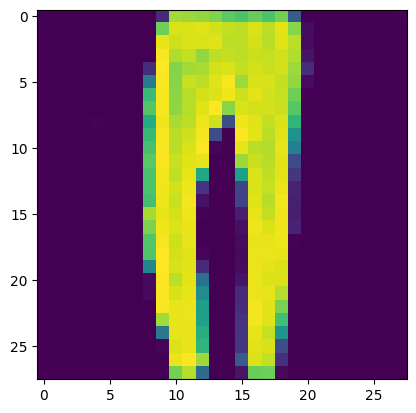

Dloss:  0.62646437
Gloss:  0.8275114
Dloss:  0.62646264
Gloss:  0.82750076
Dloss:  0.626461
Gloss:  0.827527
Dloss:  0.6264588
Gloss:  0.8275233
Dloss:  0.6264553
Gloss:  0.8275448
Dloss:  0.6264522
Gloss:  0.8275401
Dloss:  0.6264499
Gloss:  0.8275562
Dloss:  0.6264471
Gloss:  0.8275551
Dloss:  0.6264442
Gloss:  0.82757705
Dloss:  0.6264404
Gloss:  0.82757396
Dloss:  0.62643653
Gloss:  0.8275967
Dloss:  0.6264331
Gloss:  0.82758844
Dloss:  0.6264303
Gloss:  0.8276127
Dloss:  0.6264278
Gloss:  0.82760936
Dloss:  0.62642586
Gloss:  0.8276345
Dloss:  0.6264244
Gloss:  0.82763284
Dloss:  0.6264212
Gloss:  0.8276506
Dloss:  0.6264179
Gloss:  0.8276473
Dloss:  0.6264152
Gloss:  0.8276704
Dloss:  0.6264126
Gloss:  0.8276663
Dloss:  0.6264102
Gloss:  0.82768184
Dloss:  0.62640774
Gloss:  0.8276831
Dloss:  0.6264069
Gloss:  0.82769454
Dloss:  0.6264039
Gloss:  0.8277029
Dloss:  0.62640053
Gloss:  0.82771116
Dloss:  0.6263972
Gloss:  0.82772326
Dloss:  0.6263929
Gloss:  0.8277289
Dloss:  0.6263

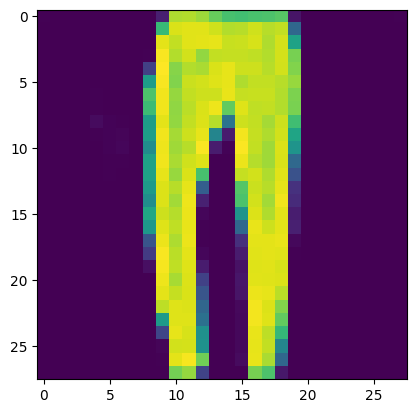

Dloss:  0.6263834
Gloss:  0.82776934
Dloss:  0.6263802
Gloss:  0.827787
Dloss:  0.6263763
Gloss:  0.8277882
Dloss:  0.6263733
Gloss:  0.8278073
Dloss:  0.62637186
Gloss:  0.827807
Dloss:  0.6263693
Gloss:  0.8278197
Dloss:  0.6263659
Gloss:  0.82782394
Dloss:  0.62636214
Gloss:  0.82784104
Dloss:  0.6263583
Gloss:  0.82783836
Dloss:  0.62635446
Gloss:  0.82786375
Dloss:  0.6263519
Gloss:  0.8278543
Dloss:  0.6263511
Gloss:  0.82788694
Dloss:  0.6263497
Gloss:  0.82787615
Dloss:  0.62634736
Gloss:  0.827905
Dloss:  0.6263456
Gloss:  0.82789177
Dloss:  0.626345
Gloss:  0.8279335
Dloss:  0.6263472
Gloss:  0.82791746
Dloss:  0.6263477
Gloss:  0.82795197
Dloss:  0.6263458
Gloss:  0.8279444
Dloss:  0.626345
Gloss:  0.82797074
Dloss:  0.62634224
Gloss:  0.8279625
Dloss:  0.62634087
Gloss:  0.8279785
Dloss:  0.62633777
Gloss:  0.827977
Dloss:  0.62633497
Gloss:  0.82799345
Dloss:  0.626332
Gloss:  0.82799596
Dloss:  0.62632847
Gloss:  0.8280127
Dloss:  0.62632656
Gloss:  0.82801175
Dloss:  0.6

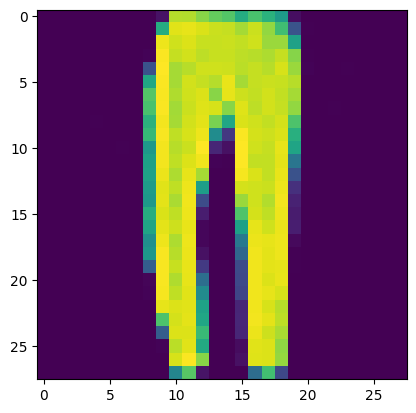

Dloss:  0.6263129
Gloss:  0.8280481
Dloss:  0.6263097
Gloss:  0.82806635
Dloss:  0.6263054
Gloss:  0.828065
Dloss:  0.6263009
Gloss:  0.8280831
Dloss:  0.6262978
Gloss:  0.82808137
Dloss:  0.62629473
Gloss:  0.82809764
Dloss:  0.6262918
Gloss:  0.82809997
Dloss:  0.62628794
Gloss:  0.8281206
Dloss:  0.62628424
Gloss:  0.82811457
Dloss:  0.6262821
Gloss:  0.82814187
Dloss:  0.6262802
Gloss:  0.82813597
Dloss:  0.6262777
Gloss:  0.8281602
Dloss:  0.6262745
Gloss:  0.82815325
Dloss:  0.62627256
Gloss:  0.82818365
Dloss:  0.6262719
Gloss:  0.82817024
Dloss:  0.62627155
Gloss:  0.8282009
Dloss:  0.6262698
Gloss:  0.8281914
Dloss:  0.6262686
Gloss:  0.82822466
Dloss:  0.62626684
Gloss:  0.82821506
Dloss:  0.62626386
Gloss:  0.82824355
Dloss:  0.6262616
Gloss:  0.828236
Dloss:  0.6262591
Gloss:  0.8282652
Dloss:  0.6262581
Gloss:  0.82825476
Dloss:  0.6262559
Gloss:  0.8282796
Dloss:  0.6262536
Gloss:  0.8282719
Dloss:  0.6262513
Gloss:  0.8283034
Dloss:  0.62624925
Gloss:  0.82829237
Dloss: 

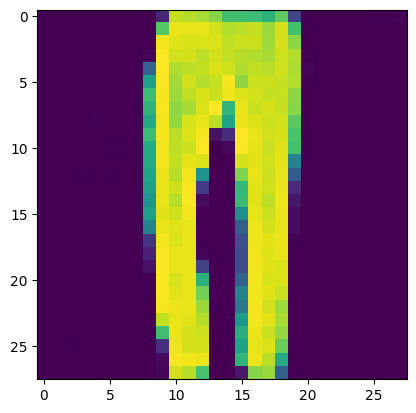

Dloss:  0.6262396
Gloss:  0.82832855
Dloss:  0.626238
Gloss:  0.82835007
Dloss:  0.6262355
Gloss:  0.82834756
Dloss:  0.6262325
Gloss:  0.8283684
Dloss:  0.62622833
Gloss:  0.82836497
Dloss:  0.62622494
Gloss:  0.82839507
Dloss:  0.626223
Gloss:  0.82838136
Dloss:  0.626223
Gloss:  0.8284155
Dloss:  0.6262228
Gloss:  0.8284055
Dloss:  0.62622076
Gloss:  0.82843703
Dloss:  0.62621933
Gloss:  0.82843196
Dloss:  0.6262186
Gloss:  0.82845503
Dloss:  0.62621593
Gloss:  0.82845384
Dloss:  0.6262116
Gloss:  0.8284675
Dloss:  0.6262075
Gloss:  0.82847166
96 / 100
Dloss:  0.62620366
Gloss:  0.8284798
96 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


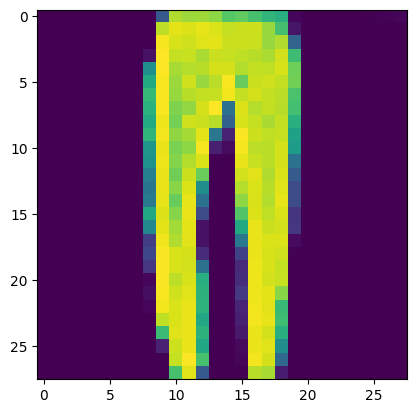

Dloss:  0.6262002
Gloss:  0.82849014
Dloss:  0.62619704
Gloss:  0.8284928
Dloss:  0.6261943
Gloss:  0.8285071
Dloss:  0.6261913
Gloss:  0.8285163
Dloss:  0.62618935
Gloss:  0.8285199
Dloss:  0.6261853
Gloss:  0.8285322
Dloss:  0.62618095
Gloss:  0.8285283
Dloss:  0.62617826
Gloss:  0.82855296
Dloss:  0.62617713
Gloss:  0.8285473
Dloss:  0.6261754
Gloss:  0.8285728
Dloss:  0.6261728
Gloss:  0.8285702
Dloss:  0.6261701
Gloss:  0.8285866
Dloss:  0.6261675
Gloss:  0.8285877
Dloss:  0.6261647
Gloss:  0.82860214
Dloss:  0.62616163
Gloss:  0.8286015
Dloss:  0.62615836
Gloss:  0.82862717
Dloss:  0.62615526
Gloss:  0.82861894
Dloss:  0.62615246
Gloss:  0.82864636
Dloss:  0.6261498
Gloss:  0.8286373
Dloss:  0.6261486
Gloss:  0.8286746
Dloss:  0.62614644
Gloss:  0.8286654
Dloss:  0.62614506
Gloss:  0.82869554
Dloss:  0.62614304
Gloss:  0.8286841
Dloss:  0.62614214
Gloss:  0.82871336
Dloss:  0.6261389
Gloss:  0.8287089
Dloss:  0.6261369
Gloss:  0.8287324
Dloss:  0.62613547
Gloss:  0.8287259
Dloss:

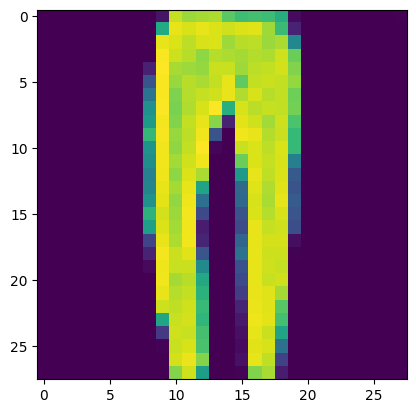

Dloss:  0.62612593
Gloss:  0.82876295
Dloss:  0.6261223
Gloss:  0.8287755
Dloss:  0.6261182
Gloss:  0.82878
Dloss:  0.6261139
Gloss:  0.82879126
Dloss:  0.6261093
Gloss:  0.8288009
Dloss:  0.6261059
Gloss:  0.8288068
Dloss:  0.626103
Gloss:  0.82880986
Dloss:  0.6260998
Gloss:  0.82882416
Dloss:  0.6260964
Gloss:  0.8288251
Dloss:  0.62609303
Gloss:  0.8288412
Dloss:  0.6260888
Gloss:  0.8288477
Dloss:  0.6260846
Gloss:  0.82886004
Dloss:  0.626081
Gloss:  0.82886475
Dloss:  0.62607735
Gloss:  0.82888407
Dloss:  0.6260745
Gloss:  0.8288819
Dloss:  0.62607205
Gloss:  0.82890534
Dloss:  0.62606925
Gloss:  0.82889867
Dloss:  0.62606555
Gloss:  0.82892346
Dloss:  0.6260633
Gloss:  0.8289168
Dloss:  0.62605965
Gloss:  0.8289417
Dloss:  0.6260572
Gloss:  0.8289333
Dloss:  0.62605554
Gloss:  0.8289666
Dloss:  0.6260558
Gloss:  0.8289529
Dloss:  0.6260558
Gloss:  0.82899064
Dloss:  0.62605536
Gloss:  0.82897764
Dloss:  0.6260529
Gloss:  0.82901037
Dloss:  0.6260512
Gloss:  0.82900065
Dloss:  0

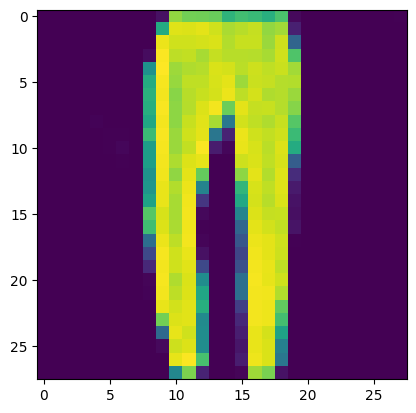

Dloss:  0.6260454
Gloss:  0.82904464
Dloss:  0.6260415
Gloss:  0.8290563
Dloss:  0.626037
Gloss:  0.82906276
Dloss:  0.62603414
Gloss:  0.8290743
Dloss:  0.62603194
Gloss:  0.82908267
Dloss:  0.6260305
Gloss:  0.82909286
Dloss:  0.6260274
Gloss:  0.82909966
Dloss:  0.6260235
Gloss:  0.82910955
Dloss:  0.62601966
Gloss:  0.82911885
Dloss:  0.62601495
Gloss:  0.8291221
Dloss:  0.6260112
Gloss:  0.829133
Dloss:  0.6260069
Gloss:  0.8291347
Dloss:  0.6260033
Gloss:  0.829154
Dloss:  0.62599957
Gloss:  0.8291535
Dloss:  0.6259965
Gloss:  0.8291704
Dloss:  0.62599385
Gloss:  0.82917184
Dloss:  0.62599134
Gloss:  0.82918596
Dloss:  0.62598866
Gloss:  0.82918763
Dloss:  0.62598544
Gloss:  0.82920706
Dloss:  0.62598276
Gloss:  0.8291993
Dloss:  0.6259804
Gloss:  0.82923126
Dloss:  0.625981
Gloss:  0.82921654
Dloss:  0.6259829
Gloss:  0.82925993
Dloss:  0.6259844
Gloss:  0.8292451
Dloss:  0.6259849
Gloss:  0.82927924
Dloss:  0.6259836
Gloss:  0.8292736
Dloss:  0.62598187
Gloss:  0.82930034
Dloss

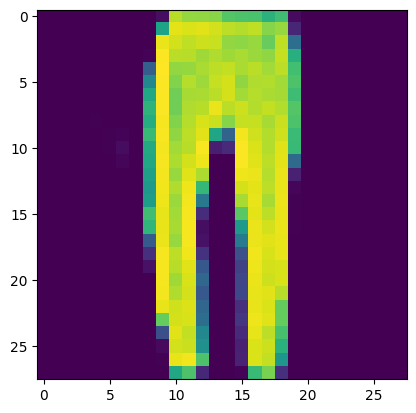

Dloss:  0.6259731
Gloss:  0.8293382
Dloss:  0.62596977
Gloss:  0.82933086
Dloss:  0.6259673
Gloss:  0.82935995
Dloss:  0.6259647
Gloss:  0.8293543
Dloss:  0.625962
Gloss:  0.82938033
Dloss:  0.62595963
Gloss:  0.8293776
Dloss:  0.62595826
Gloss:  0.82940125
Dloss:  0.625955
Gloss:  0.829399
Dloss:  0.6259512
Gloss:  0.8294152
Dloss:  0.6259485
Gloss:  0.829413
Dloss:  0.62594634
Gloss:  0.829432
Dloss:  0.62594444
Gloss:  0.8294286
Dloss:  0.6259425
Gloss:  0.829447
Dloss:  0.62593985
Gloss:  0.82944953
Dloss:  0.62593704
Gloss:  0.8294656
Dloss:  0.625934
Gloss:  0.829466
Dloss:  0.62593025
Gloss:  0.82948303
Dloss:  0.62592685
Gloss:  0.8294845
Dloss:  0.62592334
Gloss:  0.8295069
Dloss:  0.62591934
Gloss:  0.829502
Dloss:  0.6259162
Gloss:  0.8295254
Dloss:  0.6259131
Gloss:  0.82951975
Dloss:  0.62591106
Gloss:  0.8295435
Dloss:  0.62590694
Gloss:  0.82953686
Dloss:  0.6259045
Gloss:  0.8295622
Dloss:  0.6259021
Gloss:  0.82955444
Dloss:  0.62590075
Gloss:  0.82958096
Dloss:  0.625

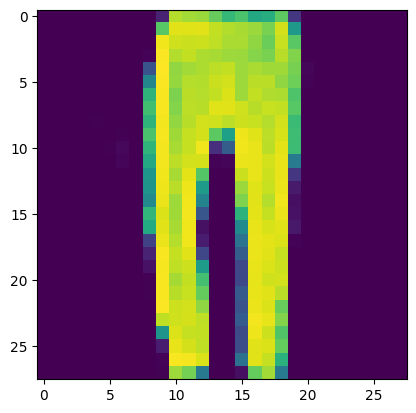

Dloss:  0.62588984
Gloss:  0.82961655
Dloss:  0.62588847
Gloss:  0.82960695
Dloss:  0.62588865
Gloss:  0.8296478
Dloss:  0.62588865
Gloss:  0.8296324
Dloss:  0.6258869
Gloss:  0.8296711
Dloss:  0.6258855
Gloss:  0.8296595
Dloss:  0.62588453
Gloss:  0.8296959
Dloss:  0.625883
Gloss:  0.82968426
Dloss:  0.62588155
Gloss:  0.82971156
Dloss:  0.6258785
Gloss:  0.82970965
Dloss:  0.62587637
Gloss:  0.82973
Dloss:  0.62587523
Gloss:  0.82972866
Dloss:  0.62587404
Gloss:  0.8297474
Dloss:  0.6258712
Gloss:  0.82974714
Dloss:  0.6258677
Gloss:  0.829767
97 / 100
Dloss:  0.62586486
Gloss:  0.829766
97 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


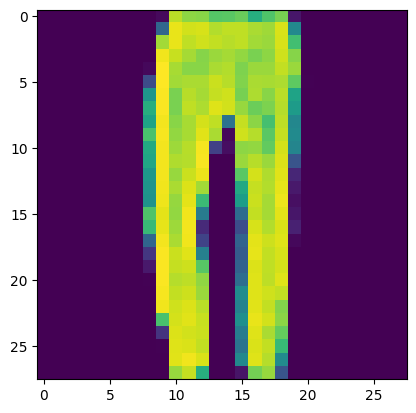

Dloss:  0.62586117
Gloss:  0.82978636
Dloss:  0.6258589
Gloss:  0.8297839
Dloss:  0.62585723
Gloss:  0.82980365
Dloss:  0.6258537
Gloss:  0.8298032
Dloss:  0.6258504
Gloss:  0.8298133
Dloss:  0.62584543
Gloss:  0.8298207
Dloss:  0.6258415
Gloss:  0.8298302
Dloss:  0.6258408
Gloss:  0.82984155
Dloss:  0.6258402
Gloss:  0.82985145
Dloss:  0.62583816
Gloss:  0.8298519
Dloss:  0.6258344
Gloss:  0.82986957
Dloss:  0.62583137
Gloss:  0.8298681
Dloss:  0.62582755
Gloss:  0.82988596
Dloss:  0.6258253
Gloss:  0.8298858
Dloss:  0.62582266
Gloss:  0.82990736
Dloss:  0.62581986
Gloss:  0.82990193
Dloss:  0.6258168
Gloss:  0.8299259
Dloss:  0.62581444
Gloss:  0.8299159
Dloss:  0.62581444
Gloss:  0.8299478
Dloss:  0.62581325
Gloss:  0.82993776
Dloss:  0.6258119
Gloss:  0.8299804
Dloss:  0.6258109
Gloss:  0.8299664
Dloss:  0.62581116
Gloss:  0.8299962
Dloss:  0.6258108
Gloss:  0.8299894
Dloss:  0.6258093
Gloss:  0.8300228
Dloss:  0.6258083
Gloss:  0.83000845
Dloss:  0.6258106
Gloss:  0.8300434
Dloss:

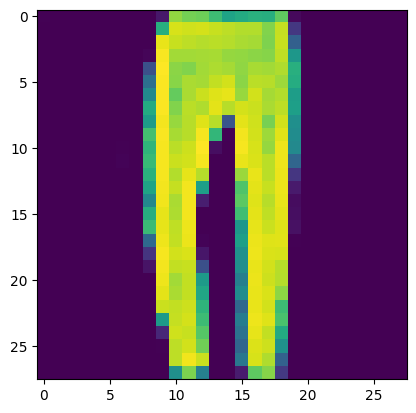

Dloss:  0.6258063
Gloss:  0.8300727
Dloss:  0.6258029
Gloss:  0.8300714
Dloss:  0.62580025
Gloss:  0.8300906
Dloss:  0.6257967
Gloss:  0.83008975
Dloss:  0.62579364
Gloss:  0.83011025
Dloss:  0.6257909
Gloss:  0.830107
Dloss:  0.6257887
Gloss:  0.8301256
Dloss:  0.6257856
Gloss:  0.8301242
Dloss:  0.6257811
Gloss:  0.8301449
Dloss:  0.62577885
Gloss:  0.83014566
Dloss:  0.62577456
Gloss:  0.83016413
Dloss:  0.62577087
Gloss:  0.8301652
Dloss:  0.62576675
Gloss:  0.83017814
Dloss:  0.6257628
Gloss:  0.8301839
Dloss:  0.62575984
Gloss:  0.8301921
Dloss:  0.625757
Gloss:  0.83020097
Dloss:  0.6257547
Gloss:  0.83021224
Dloss:  0.62575114
Gloss:  0.8302149
Dloss:  0.6257477
Gloss:  0.8302315
Dloss:  0.62574476
Gloss:  0.83023286
Dloss:  0.6257416
Gloss:  0.830243
Dloss:  0.6257371
Gloss:  0.83024395
Dloss:  0.6257337
Gloss:  0.83025694
Dloss:  0.62572956
Gloss:  0.83026075
Dloss:  0.62572527
Gloss:  0.83027273
Dloss:  0.62572074
Gloss:  0.83028305
Dloss:  0.62571704
Gloss:  0.8302908
Dloss

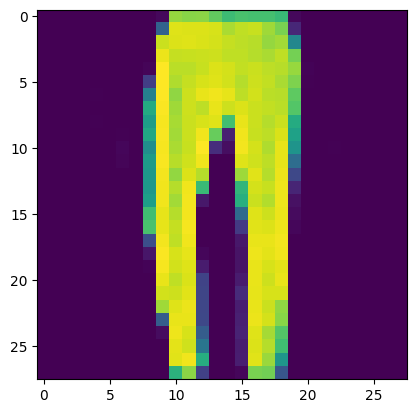

Dloss:  0.6257004
Gloss:  0.8303213
Dloss:  0.6256958
Gloss:  0.83032674
Dloss:  0.6256921
Gloss:  0.83034205
Dloss:  0.6256875
Gloss:  0.83034223
Dloss:  0.6256841
Gloss:  0.8303611
Dloss:  0.6256817
Gloss:  0.8303527
Dloss:  0.6256798
Gloss:  0.8303849
Dloss:  0.6256773
Gloss:  0.8303703
Dloss:  0.62567675
Gloss:  0.83041257
Dloss:  0.62567616
Gloss:  0.8303951
Dloss:  0.62567633
Gloss:  0.83043253
Dloss:  0.62567717
Gloss:  0.830418
Dloss:  0.62567633
Gloss:  0.8304544
Dloss:  0.6256753
Gloss:  0.8304485
Dloss:  0.6256768
Gloss:  0.83047307
Dloss:  0.62567514
Gloss:  0.8304684
Dloss:  0.6256725
Gloss:  0.8304852
Dloss:  0.62567
Gloss:  0.83048666
Dloss:  0.62566656
Gloss:  0.830506
Dloss:  0.6256642
Gloss:  0.8305028
Dloss:  0.62566096
Gloss:  0.8305224
Dloss:  0.6256599
Gloss:  0.8305171
Dloss:  0.6256582
Gloss:  0.8305412
Dloss:  0.62565625
Gloss:  0.8305325
Dloss:  0.6256543
Gloss:  0.8305578
Dloss:  0.625653
Gloss:  0.83055633
Dloss:  0.62565154
Gloss:  0.83057487
Dloss:  0.6256

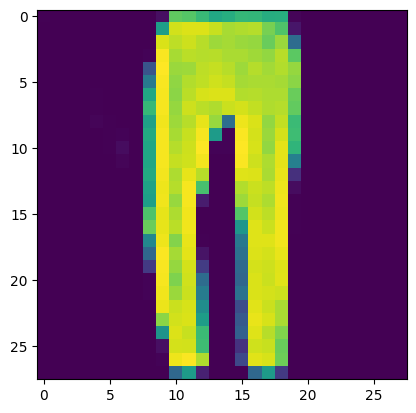

Dloss:  0.6256365
Gloss:  0.83061
Dloss:  0.625634
Gloss:  0.83061427
Dloss:  0.6256305
Gloss:  0.83062625
Dloss:  0.625626
Gloss:  0.8306314
Dloss:  0.62562215
Gloss:  0.8306431
Dloss:  0.6256188
Gloss:  0.83064914
Dloss:  0.6256162
Gloss:  0.8306592
Dloss:  0.6256118
Gloss:  0.83066857
Dloss:  0.62560743
Gloss:  0.83067805
Dloss:  0.6256033
Gloss:  0.83068174
Dloss:  0.62559956
Gloss:  0.83069617
Dloss:  0.6255957
Gloss:  0.83069974
Dloss:  0.6255931
Gloss:  0.83071953
Dloss:  0.62559074
Gloss:  0.8307141
Dloss:  0.62558913
Gloss:  0.83074033
Dloss:  0.62558675
Gloss:  0.8307312
Dloss:  0.6255841
Gloss:  0.83076334
Dloss:  0.62558275
Gloss:  0.8307472
Dloss:  0.62558264
Gloss:  0.83079016
Dloss:  0.62558407
Gloss:  0.8307735
Dloss:  0.62558407
Gloss:  0.83081204
Dloss:  0.62558264
Gloss:  0.83080083
Dloss:  0.6255832
Gloss:  0.83083475
Dloss:  0.6255814
Gloss:  0.8308258
Dloss:  0.62558
Gloss:  0.83085495
Dloss:  0.6255775
Gloss:  0.8308522
Dloss:  0.62557584
Gloss:  0.8308725
Dloss:

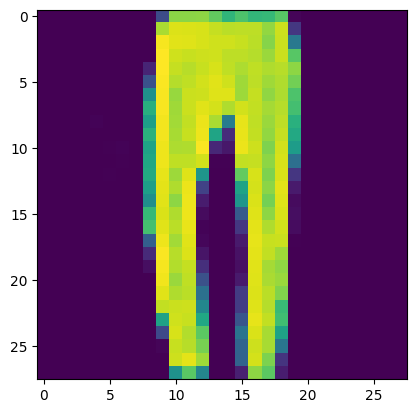

Dloss:  0.62556654
Gloss:  0.8309103
Dloss:  0.6255645
Gloss:  0.8309093
Dloss:  0.62556165
Gloss:  0.8309358
Dloss:  0.62555796
Gloss:  0.83092904
Dloss:  0.62555426
Gloss:  0.8309563
Dloss:  0.625551
Gloss:  0.8309515
Dloss:  0.6255487
Gloss:  0.83098114
Dloss:  0.6255477
Gloss:  0.8309753
Dloss:  0.62554675
Gloss:  0.83100075
Dloss:  0.6255442
Gloss:  0.8309968
Dloss:  0.62554026
Gloss:  0.8310216
Dloss:  0.6255379
Gloss:  0.8310188
Dloss:  0.6255353
Gloss:  0.83103883
Dloss:  0.6255327
Gloss:  0.831037
Dloss:  0.6255307
Gloss:  0.83106476
98 / 100
Dloss:  0.6255289
Gloss:  0.8310585
98 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


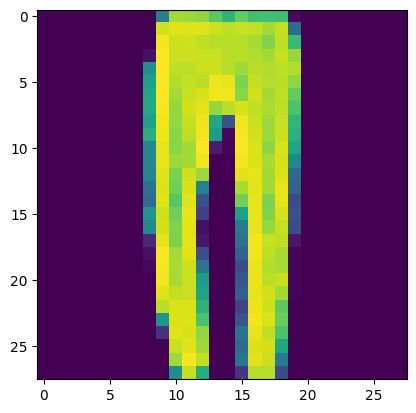

Dloss:  0.6255262
Gloss:  0.831083
Dloss:  0.625526
Gloss:  0.8310856
Dloss:  0.6255245
Gloss:  0.8311001
Dloss:  0.62552094
Gloss:  0.831106
Dloss:  0.625518
Gloss:  0.8311103
Dloss:  0.62551373
Gloss:  0.83112323
Dloss:  0.62550974
Gloss:  0.8311269
Dloss:  0.6255063
Gloss:  0.8311416
Dloss:  0.6255032
Gloss:  0.83114415
Dloss:  0.6254999
Gloss:  0.8311582
Dloss:  0.6254961
Gloss:  0.83116704
Dloss:  0.62549204
Gloss:  0.83117115
Dloss:  0.62548864
Gloss:  0.83118314
Dloss:  0.6254852
Gloss:  0.83118695
Dloss:  0.6254824
Gloss:  0.8312045
Dloss:  0.62547886
Gloss:  0.83120555
Dloss:  0.6254756
Gloss:  0.83122075
Dloss:  0.6254717
Gloss:  0.83121544
Dloss:  0.62546855
Gloss:  0.8312408
Dloss:  0.6254664
Gloss:  0.8312336
Dloss:  0.6254641
Gloss:  0.83126813
Dloss:  0.6254634
Gloss:  0.8312532
Dloss:  0.6254623
Gloss:  0.83129376
Dloss:  0.6254625
Gloss:  0.83127725
Dloss:  0.6254621
Gloss:  0.8313206
Dloss:  0.6254623
Gloss:  0.83130634
Dloss:  0.62546444
Gloss:  0.8313438
Dloss:  0.6

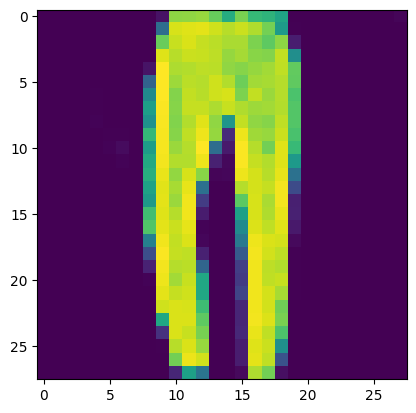

Dloss:  0.62546545
Gloss:  0.8313827
Dloss:  0.62546426
Gloss:  0.831375
Dloss:  0.6254614
Gloss:  0.8313991
Dloss:  0.62545747
Gloss:  0.8313996
Dloss:  0.6254535
Gloss:  0.83141774
Dloss:  0.62544984
Gloss:  0.8314196
Dloss:  0.625448
Gloss:  0.8314337
Dloss:  0.62544364
Gloss:  0.8314341
Dloss:  0.62544036
Gloss:  0.831452
Dloss:  0.62543756
Gloss:  0.83144945
Dloss:  0.6254335
Gloss:  0.831473
Dloss:  0.6254301
Gloss:  0.8314717
Dloss:  0.62542707
Gloss:  0.83149076
Dloss:  0.6254234
Gloss:  0.8314941
Dloss:  0.62542063
Gloss:  0.831509
Dloss:  0.6254172
Gloss:  0.83151126
Dloss:  0.62541366
Gloss:  0.8315218
Dloss:  0.6254098
Gloss:  0.8315253
Dloss:  0.62540674
Gloss:  0.8315352
Dloss:  0.6254026
Gloss:  0.83154225
Dloss:  0.6253994
Gloss:  0.83155185
Dloss:  0.6253952
Gloss:  0.8315595
Dloss:  0.62539136
Gloss:  0.83156455
Dloss:  0.625387
Gloss:  0.8315784
Dloss:  0.62538344
Gloss:  0.8315841
Dloss:  0.6253795
Gloss:  0.83159983
Dloss:  0.62537634
Gloss:  0.8315997
Dloss:  0.62

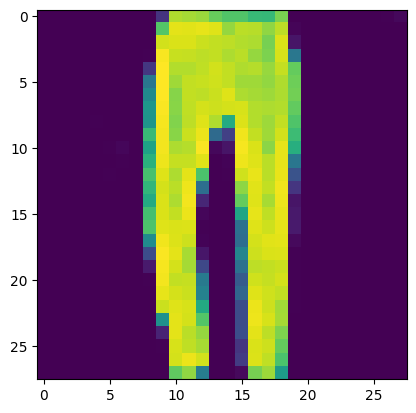

Dloss:  0.6253632
Gloss:  0.8316289
Dloss:  0.6253599
Gloss:  0.83165634
Dloss:  0.6253564
Gloss:  0.8316533
Dloss:  0.62535334
Gloss:  0.8316725
Dloss:  0.62535
Gloss:  0.83166975
Dloss:  0.6253471
Gloss:  0.8316852
Dloss:  0.6253451
Gloss:  0.8316905
Dloss:  0.62534213
Gloss:  0.83170605
Dloss:  0.62533844
Gloss:  0.83170885
Dloss:  0.62533456
Gloss:  0.8317247
Dloss:  0.6253311
Gloss:  0.831723
Dloss:  0.62532836
Gloss:  0.831741
Dloss:  0.6253241
Gloss:  0.8317449
Dloss:  0.6253208
Gloss:  0.83176404
Dloss:  0.62532073
Gloss:  0.8317623
Dloss:  0.6253174
Gloss:  0.83178806
Dloss:  0.62531483
Gloss:  0.83178246
Dloss:  0.62531304
Gloss:  0.831811
Dloss:  0.6253105
Gloss:  0.8318054
Dloss:  0.6253088
Gloss:  0.83182895
Dloss:  0.62530696
Gloss:  0.83182144
Dloss:  0.62530494
Gloss:  0.83184016
Dloss:  0.6253014
Gloss:  0.83183867
Dloss:  0.625299
Gloss:  0.83186066
Dloss:  0.6252961
Gloss:  0.8318574
Dloss:  0.62529355
Gloss:  0.8318904
Dloss:  0.62529343
Gloss:  0.8318732
Dloss:  0.

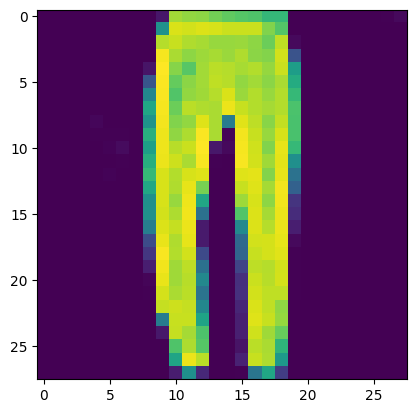

Dloss:  0.62529355
Gloss:  0.8319325
Dloss:  0.62529194
Gloss:  0.8319586
Dloss:  0.6252883
Gloss:  0.83195376
Dloss:  0.62528485
Gloss:  0.83197737
Dloss:  0.6252824
Gloss:  0.83197194
Dloss:  0.62527937
Gloss:  0.83199716
Dloss:  0.62527597
Gloss:  0.83199286
Dloss:  0.6252723
Gloss:  0.8320175
Dloss:  0.62527
Gloss:  0.83201784
Dloss:  0.62526864
Gloss:  0.8320326
Dloss:  0.62526774
Gloss:  0.8320456
Dloss:  0.6252669
Gloss:  0.8320535
Dloss:  0.625265
Gloss:  0.832066
Dloss:  0.62526166
Gloss:  0.83207375
Dloss:  0.6252583
Gloss:  0.8320836
Dloss:  0.6252544
Gloss:  0.8320917
Dloss:  0.6252496
Gloss:  0.8321055
Dloss:  0.6252462
Gloss:  0.8321111
Dloss:  0.6252422
Gloss:  0.83212376
Dloss:  0.6252383
Gloss:  0.83212864
Dloss:  0.6252361
Gloss:  0.83214414
Dloss:  0.6252321
Gloss:  0.8321485
Dloss:  0.6252302
Gloss:  0.8321606
Dloss:  0.62522584
Gloss:  0.8321671
Dloss:  0.6252222
Gloss:  0.8321735
Dloss:  0.6252178
Gloss:  0.8321807
Dloss:  0.6252145
Gloss:  0.83219403
Dloss:  0.62

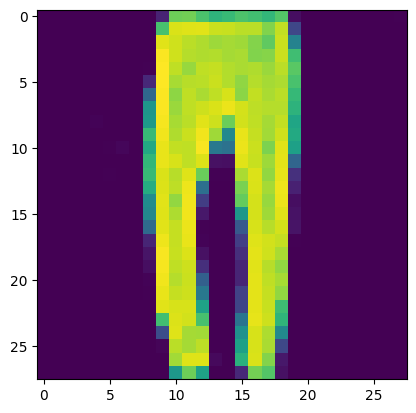

Dloss:  0.62520117
Gloss:  0.83222395
Dloss:  0.62519795
Gloss:  0.8322205
Dloss:  0.6251948
Gloss:  0.83225054
Dloss:  0.62519205
Gloss:  0.8322363
Dloss:  0.62519014
Gloss:  0.8322835
Dloss:  0.62519056
Gloss:  0.83226293
Dloss:  0.62519157
Gloss:  0.8323082
Dloss:  0.6251923
Gloss:  0.8322906
Dloss:  0.62519294
Gloss:  0.8323264
Dloss:  0.62519157
Gloss:  0.83231986
Dloss:  0.62518954
Gloss:  0.83234286
Dloss:  0.62518746
Gloss:  0.83234334
Dloss:  0.6251838
Gloss:  0.8323544
Dloss:  0.6251802
Gloss:  0.83235836
Dloss:  0.6251771
Gloss:  0.8323743
99 / 100
Dloss:  0.62517375
Gloss:  0.83237356
99 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


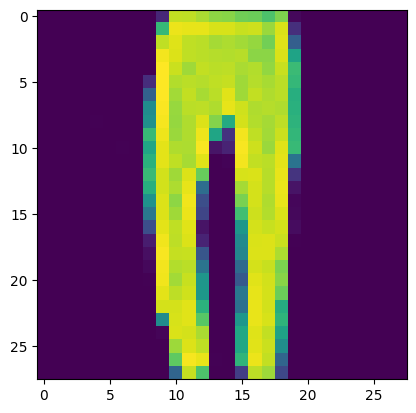

Dloss:  0.6251705
Gloss:  0.8323875
Dloss:  0.62516814
Gloss:  0.8323875
Dloss:  0.6251653
Gloss:  0.83239853
Dloss:  0.62516177
Gloss:  0.8324091
Dloss:  0.62515897
Gloss:  0.83240885
Dloss:  0.62515545
Gloss:  0.8324321
Dloss:  0.62515396
Gloss:  0.8324289
Dloss:  0.62515235
Gloss:  0.8324603
Dloss:  0.62515235
Gloss:  0.8324513
Dloss:  0.6251521
Gloss:  0.8324775
Dloss:  0.6251489
Gloss:  0.8324759
Dloss:  0.6251457
Gloss:  0.83249146
Dloss:  0.6251424
Gloss:  0.8324933
Dloss:  0.6251386
Gloss:  0.8325067
Dloss:  0.6251356
Gloss:  0.8325066
Dloss:  0.6251327
Gloss:  0.83252925
Dloss:  0.62512875
Gloss:  0.83251953
Dloss:  0.6251269
Gloss:  0.83255035
Dloss:  0.6251256
Gloss:  0.8325397
Dloss:  0.62512386
Gloss:  0.8325664
Dloss:  0.62512195
Gloss:  0.8325625
Dloss:  0.62512
Gloss:  0.8325864
Dloss:  0.6251177
Gloss:  0.8325804
Dloss:  0.6251153
Gloss:  0.83260554
Dloss:  0.6251124
Gloss:  0.83260655
Dloss:  0.6251094
Gloss:  0.83262885
Dloss:  0.6251071
Gloss:  0.8326255
Dloss:  0.6

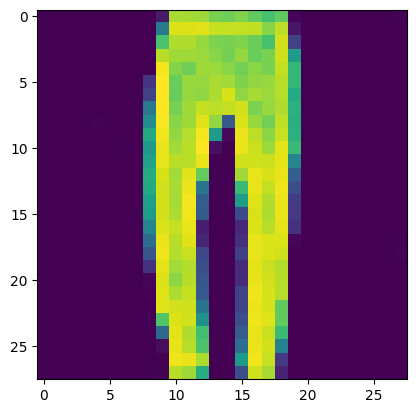

Dloss:  0.6250951
Gloss:  0.8326587
Dloss:  0.6250924
Gloss:  0.8326754
Dloss:  0.6250891
Gloss:  0.8326778
Dloss:  0.6250857
Gloss:  0.83269626
Dloss:  0.6250827
Gloss:  0.83270144
Dloss:  0.6250802
Gloss:  0.83271354
Dloss:  0.6250783
Gloss:  0.832721
Dloss:  0.6250739
Gloss:  0.8327298
Dloss:  0.6250686
Gloss:  0.83274066
Dloss:  0.6250643
Gloss:  0.83274645
Dloss:  0.6250594
Gloss:  0.83276
Dloss:  0.62505496
Gloss:  0.8327636
Dloss:  0.6250512
Gloss:  0.83277464
Dloss:  0.62504727
Gloss:  0.8327813
Dloss:  0.6250438
Gloss:  0.8327898
Dloss:  0.6250407
Gloss:  0.8328
Dloss:  0.62503695
Gloss:  0.83280563
Dloss:  0.62503254
Gloss:  0.83281624
Dloss:  0.6250299
Gloss:  0.83281773
Dloss:  0.6250272
Gloss:  0.8328386
Dloss:  0.62502456
Gloss:  0.83283657
Dloss:  0.6250218
Gloss:  0.83285946
Dloss:  0.6250202
Gloss:  0.8328509
Dloss:  0.6250181
Gloss:  0.832887
Dloss:  0.62501717
Gloss:  0.83287066
Dloss:  0.62501615
Gloss:  0.83291286
Dloss:  0.62501633
Gloss:  0.8328931
Dloss:  0.6250

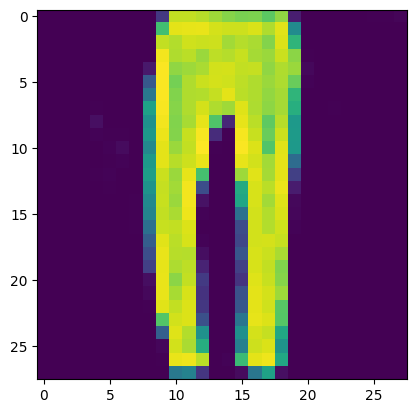

Dloss:  0.6250187
Gloss:  0.8329501
Dloss:  0.62501734
Gloss:  0.8329772
Dloss:  0.6250133
Gloss:  0.8329732
Dloss:  0.6250102
Gloss:  0.83299375
Dloss:  0.62500685
Gloss:  0.83298993
Dloss:  0.62500554
Gloss:  0.8330077
Dloss:  0.6250033
Gloss:  0.8330057
Dloss:  0.62500006
Gloss:  0.8330246
Dloss:  0.62499756
Gloss:  0.8330245
Dloss:  0.6249937
Gloss:  0.83304
Dloss:  0.6249913
Gloss:  0.8330416
Dloss:  0.62498814
Gloss:  0.8330503
Dloss:  0.6249833
Gloss:  0.83305705
Dloss:  0.6249798
Gloss:  0.83307046
Dloss:  0.62497795
Gloss:  0.8330765
Dloss:  0.6249747
Gloss:  0.8330877
Dloss:  0.6249717
Gloss:  0.8330921
Dloss:  0.6249694
Gloss:  0.8331046
Dloss:  0.6249666
Gloss:  0.83311206
Dloss:  0.62496424
Gloss:  0.83312076
Dloss:  0.6249599
Gloss:  0.8331291
Dloss:  0.6249583
Gloss:  0.833136
Dloss:  0.6249555
Gloss:  0.8331475
Dloss:  0.6249522
Gloss:  0.833151
Dloss:  0.62494916
Gloss:  0.8331631
Dloss:  0.62494576
Gloss:  0.83316827
Dloss:  0.6249417
Gloss:  0.8331753
Dloss:  0.62493

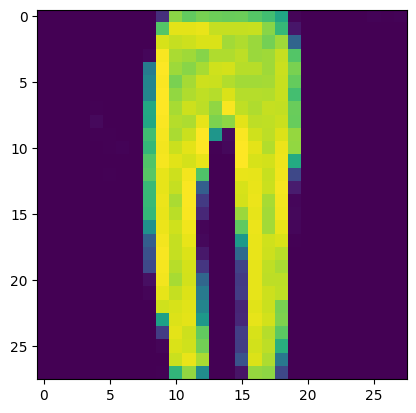

Dloss:  0.6249271
Gloss:  0.8332203
Dloss:  0.6249241
Gloss:  0.83322364
Dloss:  0.62492007
Gloss:  0.8332372
Dloss:  0.62491584
Gloss:  0.8332382
Dloss:  0.6249125
Gloss:  0.83325857
Dloss:  0.6249094
Gloss:  0.8332525
Dloss:  0.6249066
Gloss:  0.8332772
Dloss:  0.6249028
Gloss:  0.8332727
Dloss:  0.62490034
Gloss:  0.8333025
Dloss:  0.6249014
Gloss:  0.83329564
Dloss:  0.6249007
Gloss:  0.8333193
Dloss:  0.6248991
Gloss:  0.83331186
Dloss:  0.6248975
Gloss:  0.8333388
Dloss:  0.6248948
Gloss:  0.833332
Dloss:  0.62489426
Gloss:  0.833357
Dloss:  0.6248919
Gloss:  0.8333483
Dloss:  0.62488973
Gloss:  0.8333827
Dloss:  0.62488884
Gloss:  0.83336985
Dloss:  0.6248886
Gloss:  0.8334119
Dloss:  0.62488765
Gloss:  0.8333976
Dloss:  0.6248878
Gloss:  0.8334306
Dloss:  0.62488633
Gloss:  0.83342683
Dloss:  0.6248839
Gloss:  0.8334409
Dloss:  0.6248801
Gloss:  0.83344257
Dloss:  0.62487674
Gloss:  0.833455
Dloss:  0.6248729
Gloss:  0.83345693
Dloss:  0.6248708
Gloss:  0.8334789
Dloss:  0.6248

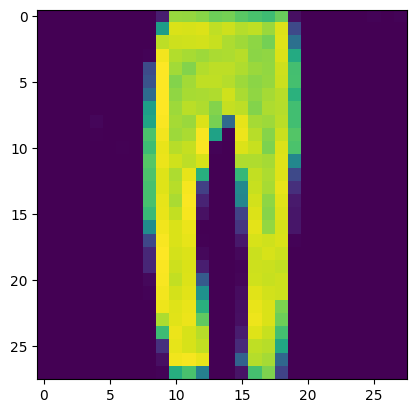

Dloss:  0.62486106
Gloss:  0.8335186
Dloss:  0.62486005
Gloss:  0.8335034
Dloss:  0.624859
Gloss:  0.8335362
Dloss:  0.6248573
Gloss:  0.8335254
Dloss:  0.624855
Gloss:  0.8335525
Dloss:  0.6248525
Gloss:  0.8335449
Dloss:  0.6248502
Gloss:  0.83356893
Dloss:  0.62484777
Gloss:  0.83356047
Dloss:  0.6248459
Gloss:  0.83358467
Dloss:  0.6248422
Gloss:  0.833581
Dloss:  0.6248388
Gloss:  0.8336063
Dloss:  0.62483597
Gloss:  0.8335985
Dloss:  0.6248333
Gloss:  0.8336214
Dloss:  0.62482965
Gloss:  0.8336139
Dloss:  0.6248275
Gloss:  0.83364743
100 / 100
Dloss:  0.62482667
Gloss:  0.8336373
100 : 1 / 136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


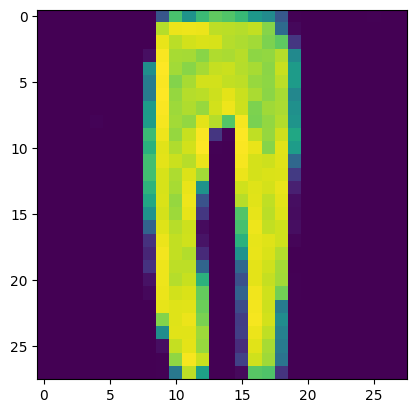

Dloss:  0.62482446
Gloss:  0.8336636
Dloss:  0.6248221
Gloss:  0.8336585
Dloss:  0.6248196
Gloss:  0.8336792
Dloss:  0.6248161
Gloss:  0.8336819
Dloss:  0.6248134
Gloss:  0.833688
Dloss:  0.6248097
Gloss:  0.83370167
Dloss:  0.62480843
Gloss:  0.8337045
Dloss:  0.6248055
Gloss:  0.83372086
Dloss:  0.62480265
Gloss:  0.8337216
Dloss:  0.62480104
Gloss:  0.83373594
Dloss:  0.6247972
Gloss:  0.8337391
Dloss:  0.62479365
Gloss:  0.8337473
Dloss:  0.62479025
Gloss:  0.8337545
Dloss:  0.6247877
Gloss:  0.83376145
Dloss:  0.6247844
Gloss:  0.8337737
Dloss:  0.62478006
Gloss:  0.8337813
Dloss:  0.6247764
Gloss:  0.83378655
Dloss:  0.6247723
Gloss:  0.8337941
Dloss:  0.62476873
Gloss:  0.8338042
Dloss:  0.624765
Gloss:  0.83381957
Dloss:  0.62476003
Gloss:  0.83382535
Dloss:  0.62475646
Gloss:  0.83383656
Dloss:  0.6247535
Gloss:  0.83384514
Dloss:  0.6247514
Gloss:  0.83385736
Dloss:  0.62474835
Gloss:  0.8338633
Dloss:  0.6247451
Gloss:  0.83388436
Dloss:  0.6247435
Gloss:  0.8338841
Dloss:  

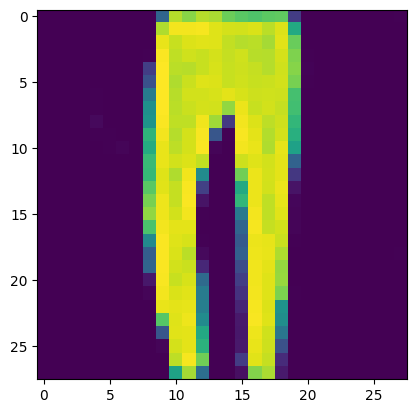

Dloss:  0.62473303
Gloss:  0.8339192
Dloss:  0.6247331
Gloss:  0.83395183
Dloss:  0.6247327
Gloss:  0.8339456
Dloss:  0.62473077
Gloss:  0.8339737
Dloss:  0.6247275
Gloss:  0.8339679
Dloss:  0.6247252
Gloss:  0.8339952
Dloss:  0.6247239
Gloss:  0.8339908
Dloss:  0.6247211
Gloss:  0.8340134
Dloss:  0.62471884
Gloss:  0.83401436
Dloss:  0.624716
Gloss:  0.8340319
Dloss:  0.6247126
Gloss:  0.8340292
Dloss:  0.6247081
Gloss:  0.83404756
Dloss:  0.62470526
Gloss:  0.83404714
Dloss:  0.62470144
Gloss:  0.8340696
Dloss:  0.6246985
Gloss:  0.8340634
Dloss:  0.62469745
Gloss:  0.8340932
Dloss:  0.62469554
Gloss:  0.8340868
Dloss:  0.62469244
Gloss:  0.83411545
Dloss:  0.62469023
Gloss:  0.83410877
Dloss:  0.6246881
Gloss:  0.83414125
Dloss:  0.62468755
Gloss:  0.8341279
Dloss:  0.624687
Gloss:  0.83416045
Dloss:  0.62468594
Gloss:  0.8341511
Dloss:  0.62468404
Gloss:  0.83417976
Dloss:  0.62468123
Gloss:  0.83417225
Dloss:  0.62467825
Gloss:  0.834198
Dloss:  0.62467563
Gloss:  0.8341934
Dloss:

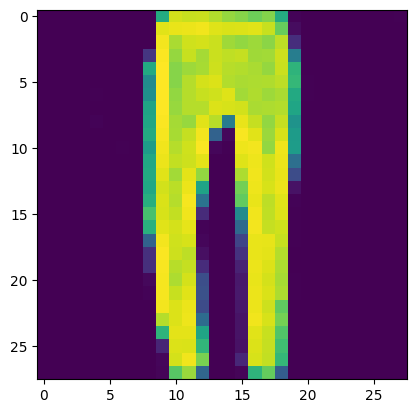

Dloss:  0.62466604
Gloss:  0.8342353
Dloss:  0.62466407
Gloss:  0.8342611
Dloss:  0.6246618
Gloss:  0.83426255
Dloss:  0.62465745
Gloss:  0.8342781
Dloss:  0.62465376
Gloss:  0.8342825
Dloss:  0.62465143
Gloss:  0.8342915
Dloss:  0.62464774
Gloss:  0.83430296
Dloss:  0.6246444
Gloss:  0.83430934
Dloss:  0.62464076
Gloss:  0.83432
Dloss:  0.6246363
Gloss:  0.8343275
Dloss:  0.62463254
Gloss:  0.8343379
Dloss:  0.6246298
Gloss:  0.83434516
Dloss:  0.62462574
Gloss:  0.83436126
Dloss:  0.62462133
Gloss:  0.8343582
Dloss:  0.62461823
Gloss:  0.8343759
Dloss:  0.62461406
Gloss:  0.8343741
Dloss:  0.6246119
Gloss:  0.8343938
Dloss:  0.6246092
Gloss:  0.8343898
Dloss:  0.62460595
Gloss:  0.83441615
Dloss:  0.6246033
Gloss:  0.8344035
Dloss:  0.62460124
Gloss:  0.83443874
Dloss:  0.62460184
Gloss:  0.83442074
Dloss:  0.62460184
Gloss:  0.83446306
Dloss:  0.6246022
Gloss:  0.8344473
Dloss:  0.6246021
Gloss:  0.8344833
Dloss:  0.6246005
Gloss:  0.83447695
Dloss:  0.62460035
Gloss:  0.83450735
Dl

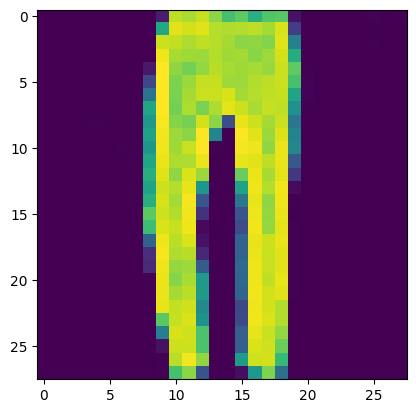

Dloss:  0.6245909
Gloss:  0.8345383
Dloss:  0.62458754
Gloss:  0.8345337
Dloss:  0.62458324
Gloss:  0.8345502
Dloss:  0.6245787
Gloss:  0.8345524
Dloss:  0.6245757
Gloss:  0.8345677
Dloss:  0.6245734
Gloss:  0.83457243
Dloss:  0.62457055
Gloss:  0.83458585
Dloss:  0.6245662
Gloss:  0.83458924
Dloss:  0.6245623
Gloss:  0.8346075
Dloss:  0.62456083
Gloss:  0.83461034
Dloss:  0.6245578
Gloss:  0.834628
Dloss:  0.62455547
Gloss:  0.8346297
Dloss:  0.6245531
Gloss:  0.83464575
Dloss:  0.6245502
Gloss:  0.8346484
Dloss:  0.6245479
Gloss:  0.8346623
Dloss:  0.624544
Gloss:  0.8346609
Dloss:  0.6245399
Gloss:  0.8346848
Dloss:  0.6245362
Gloss:  0.83467925
Dloss:  0.62453175
Gloss:  0.83470577
Dloss:  0.6245283
Gloss:  0.8347014
Dloss:  0.62452555
Gloss:  0.83472115
Dloss:  0.62452173
Gloss:  0.8347186
Dloss:  0.6245198
Gloss:  0.8347374
Dloss:  0.62451494
Gloss:  0.8347349
Dloss:  0.62451124
Gloss:  0.8347543
Dloss:  0.6245078
Gloss:  0.8347509
Dloss:  0.6245046
Gloss:  0.8347744
Dloss:  0.62

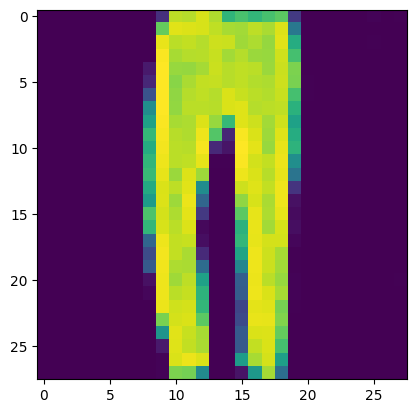

Dloss:  0.6244944
Gloss:  0.834819
Dloss:  0.6244927
Gloss:  0.8348048
Dloss:  0.6244923
Gloss:  0.8348436
Dloss:  0.62449163
Gloss:  0.8348329
Dloss:  0.62448996
Gloss:  0.83486736
Dloss:  0.62448716
Gloss:  0.83485794
Dloss:  0.6244866
Gloss:  0.8348994
Dloss:  0.6244862
Gloss:  0.83488524
Dloss:  0.6244867
Gloss:  0.83492285
Dloss:  0.6244851
Gloss:  0.8349135
Dloss:  0.6244824
Gloss:  0.83494276
Dloss:  0.6244807
Gloss:  0.83493483
Dloss:  0.62447864
Gloss:  0.83496046
Dloss:  0.6244764
Gloss:  0.8349593
Dloss:  0.6244724
Gloss:  0.8349785


In [13]:
start=int(time.time())
os.mkdir('GAN TEST/{}'.format(start))
for epoch in range(0,epochs):
    print(epoch+1,'/',epochs)
    batch_per_epoch=int(x.shape[0]/batch_size)
    for i in range(batch_per_epoch):
        batch=x[i*batch_size : i*batch_size+batch_size]
        noise=np.random.uniform(-1,1,size=(batch_size,100))
        
        generated=gen.predict(noise, verbose=0)
        
        X=np.concatenate([batch,generated])
        y=([1]*batch_size)+([0]*batch_size)
        y=np.reshape(y,(-1,1))
        
        (X,y)=shuffle(X,y)

        disc.trainable=True
        print("Dloss: ",disc.train_on_batch(X,y))
        
        noise=np.random.uniform(-1,1,size=(batch_size,100))
        fake_label=np.array([1,]*batch_size).reshape(-1,1)

        disc.trainable=False
        print("Gloss: ",gan.train_on_batch(noise,fake_label))
        
        if (i%30==0):
            print(epoch+1,':',i+1,'/',batch_per_epoch)
            save_img('GAN TEST/{}/e{}b{}.png'.format(start,epoch,i),x=(gen.predict(np.expand_dims(noise_benchmark[0],0))[0]+1)/2)
            plt.imshow((gen.predict(np.expand_dims(noise_benchmark[0],0))[0]+1)/2)
            plt.show()

In [14]:
gan.save_weights('gan.weights.h5')

In [15]:
disc.save_weights('disc.weights.h5')

In [16]:
gen.save_weights('gen.weights.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


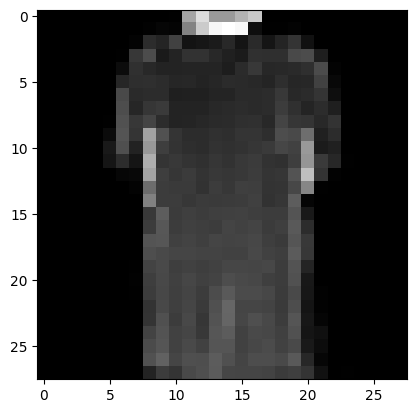

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


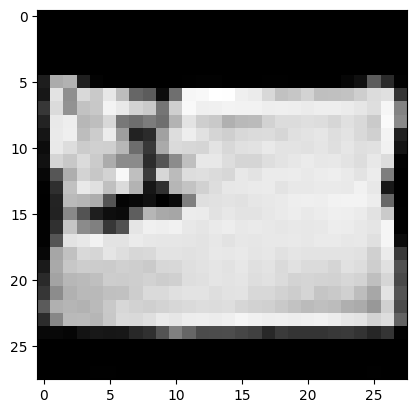

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


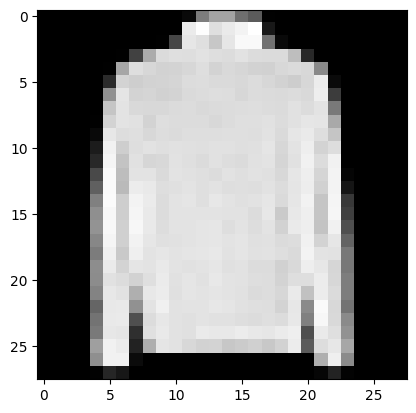

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


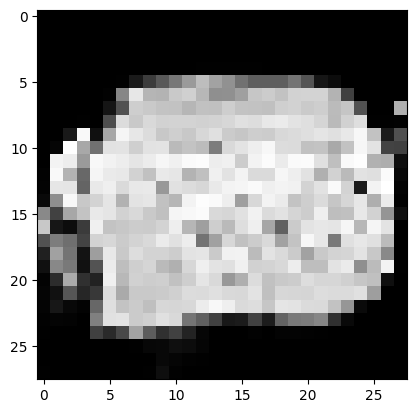

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


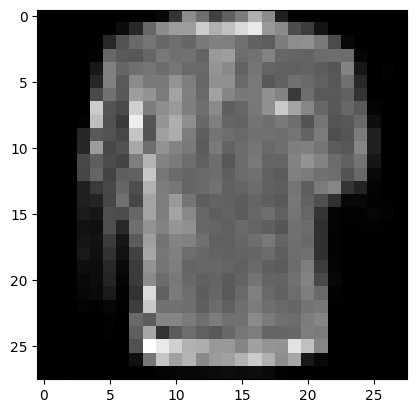

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


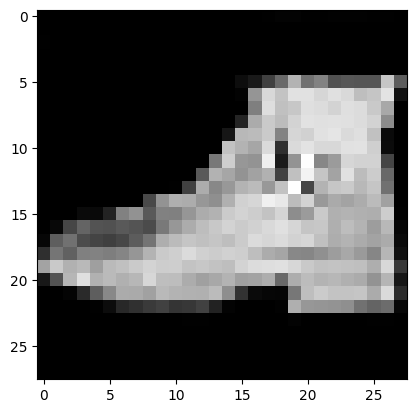

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


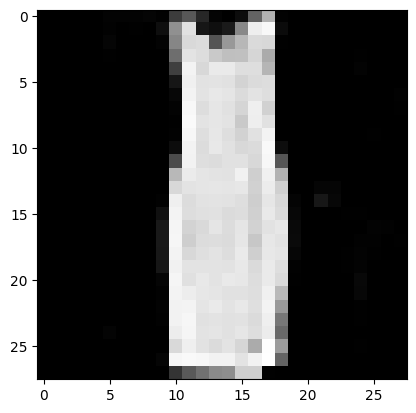

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


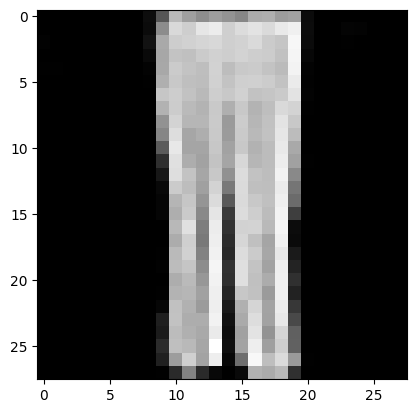

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


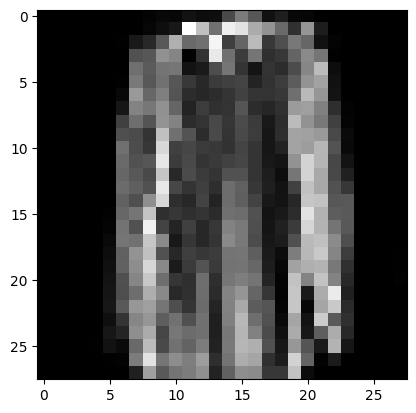

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


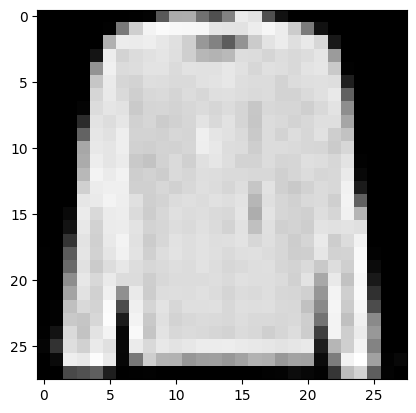

In [29]:
for i in range(10):
    plt.imshow(gen.predict(np.expand_dims(noise_benchmark[np.random.randint(noise_benchmark.shape[0])],0))[0],cmap='gray')
    plt.show()